In [3]:
# Load Dependencies

import datetime
import warnings
import re

# from sklearn.utils import shuffle
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# from sklearn.feature_selection import f_classif
# pd.set_option('max_rows', None)

# pd.set_option('display.float_format', lambda x: '%.3f' % x)

# plt.style.use('ggplot')
# %matplotlib inline
# color = sns.color_palette()



warnings.filterwarnings("ignore")

print('libraries imported successfully')


%run utils.ipynb

libraries imported successfully
Util Libraries successfully imported


In [4]:

combined_disp_pop =pd.read_csv('3.0 data after feature engineering.csv')


In [5]:
combined_disp_pop.isna().sum()

Unnamed: 0.1                     0
LoanId                           0
AccountState                     0
CreationDate                     0
DisbursementDate                 0
                                ..
DebitLM_DebitL3M_bin            23
age_DebitAmount                  3
HighestSingleDebitL3M_binned     0
AGE_HSD_L3M                      3
AddressLGA_HSD_L3M               0
Length: 491, dtype: int64

In [6]:
#drop varsending with 1, 5,6,7,8

col1= [col for col in combined_disp_pop.columns if '_1' in col]
col5= [col for col in combined_disp_pop.columns if '_5' in col]
col6= [col for col in combined_disp_pop.columns if '_6' in col]
col7= [col for col in combined_disp_pop.columns if '7' in col]
col8= [col for col in combined_disp_pop.columns if '8' in col]

combined_disp_pop.drop(col5+col6+col7+col8, axis=1, inplace=True)


In [7]:
combined_disp_pop.fillna(0, inplace=True)
combined_disp_pop.shape

(4019, 395)

### variable grouping/binning

## Characteristics Analysis (WoE and IV Estimation)


### Coarsing Null group
- include null group in class with the worst WoE assuming the worst for groups with unknown value

####  Regroup/Bin Relevant Continuous (Numerical) variables

In [8]:
# # ### Split data into training and testing
# # using this method because we don't want the dataframe in numpy arrays and with targets

Train= combined_disp_pop.sample(frac=0.7, random_state=42)

Test  =combined_disp_pop[~combined_disp_pop['LoanId'].isin(Train['LoanId'].values)]
# Test = Train.sample(frac=0.1, random_state=42)

In [9]:

### Variable Grouping/Binning
# SPlit dataset based on data types
combined_disp_pop_obj = combined_disp_pop.select_dtypes(include = 'object')
combined_disp_pop_num = combined_disp_pop.select_dtypes(include = 'number') 
combined_disp_pop_cat = combined_disp_pop.select_dtypes(include = 'category')
#### Regroup Relevant Discrete (object/categorical) variables
# combined_disp_pop_cat.columns
combined_disp_pop_obj.columns

Index(['AccountState', 'CreationDate', 'DisbursementDate', 'DisbMonth',
       'InitialDecision', 'DocumentType', 'EducationStatus', 'EmployerLGA',
       'EmployerState', 'Gender', 'Industry', 'MaritalStatus', 'RepaymentBank',
       'AddresLGA', 'ResidentialStatus', 'BusinessSector',
       'EmploymentPosition', '(DueDate) FPD', 'FPD', 'Closeddate',
       'MaturityDate', 'WeekDay', 'timeindayselect', 'MobileNetwork', 'Email',
       'ClientFullName', 'FirstRD', 'FirstDD', 'Channels', 'Acct_Duratn',
       'Inconsistent_Salary_Date', 'roundFigureSalary',
       'dy_wit_hghst_freq_of_dbt_distr_1', 'dy_wit_hghst_freq_of_dbt_distr_2',
       'dy_wit_hghst_freq_of_dbt_distr_3', 'dy_wit_hghst_freq_of_dbt_distr_4',
       'inconsistentSalaryDescription', 'noSalaryDescription', 'hugeSumPaid',
       'Salary_Date', 'GBFlag', 'AddresLGA_grped', 'EmployerLGA_grped',
       'EmployerState_grped', 'MaritalStatus_grped', 'BusinessSector_grped',
       'EducationStatus_grped', 'DocumentType_grped'

In [10]:
# combined_disp_pop.GBFlag.value_counts()

In [11]:
Test.GBFlag.value_counts()

Good    884
Bad     322
Name: GBFlag, dtype: int64

In [12]:
Train.GBFlag.value_counts()

Good    2050
Bad      763
Name: GBFlag, dtype: int64

## Numerical Variables

### Age

In [13]:
# ## Fine Classsing (Age)
Train['Age_fine'] = pd.qcut(Train['Age'], q=10)
woe_num(Train,'Age_fine', 'GBFlag')

GBFlag          Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
Age_fine                                                               
(-5.001, 25.0]  147   233   380        13.5    11.4   19.3      38.7   
(25.0, 27.0]     84   177   261         9.3     8.6   11.0      32.2   
(27.0, 29.0]     87   190   277         9.8     9.3   11.4      31.4   
(29.0, 31.0]     83   196   279         9.9     9.6   10.9      29.7   
(31.0, 33.0]     73   206   279         9.9    10.0    9.6      26.2   
(33.0, 35.0]     55   194   249         8.9     9.5    7.2      22.1   
(35.0, 37.0]     53   192   245         8.7     9.4    6.9      21.6   
(37.0, 40.0]     64   228   292        10.4    11.1    8.4      21.9   
(40.0, 44.0]     69   214   283        10.1    10.4    9.0      24.4   
(44.0, 65.0]     48   220   268         9.5    10.7    6.3      17.9   

GBFlag          GoodBaddOdds       WOE        IV  
Age_fine                                          
(-5.001, 25.0]          1.59 -0.526492  4.159285  
(25.0, 27.0]            2.11 -0.246133  0.590719  
(27.0, 29.0]            2.18 -0.203599  0.427558  
(29.0, 31.0]            2.36 -0.127000  0.165100  
(31.0, 33.0]            2.82  0.040822  0.016329  
(33.0, 35.0]            3.53  0.277211  0.637585  
(35.0, 37.0]            3.62  0.309188  0.772971  
(37.0, 40.0]            3.56  0.278713  0.752526  
(40.0, 44.0]            3.10  0.144581  0.202414  
(44.0, 65.0]            4.58  0.529694  2.330654

In [14]:
# ## Fine Classsing (Age)
# Train['Age_fine'] = pd.qcut(Train['Age'], q=10)
# woe_num(Train,'Age_fine', 'GBFlag')

In [15]:
#plot_by_woe(woe_num(Train,'Age_fine', 'GBFlag'))

In [16]:
# Bin Age
bins = [18, 26, 30, 32, 34, 41, 45 ,66]
Train['Age_grped'] = pd.cut(Train['Age'], bins, precision=0, include_lowest=True, right=False,)
Test['Age_grped'] = pd.cut(Test['Age'], bins, precision=0, include_lowest=True, right=False,)


### Income

In [17]:
# ## Fine Classsing (Income)

Train['Income_fine'] = pd.qcut(Train['Income'], q=10,duplicates='drop')
woe_num(Train,'Income_fine', 'GBFlag')

GBFlag                   Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
Income_fine                                                                     
(19999.999, 50000.0]     176   322   498        17.7    15.7   23.1      35.3   
(50000.0, 60000.0]        39   103   142         5.0     5.0    5.1      27.5   
(60000.0, 75000.0]        61   147   208         7.4     7.2    8.0      29.3   
(75000.0, 96000.0]        71   207   278         9.9    10.1    9.3      25.5   
(96000.0, 101000.0]       85   196   281        10.0     9.6   11.1      30.2   
(101000.0, 150000.0]     130   406   536        19.1    19.8   17.0      24.3   
(150000.0, 160000.0]       9    21    30         1.1     1.0    1.2      30.0   
(160000.0, 200000.0]      77   222   299        10.6    10.8   10.1      25.8   
(200000.0, 300000.0]      60   204   264         9.4    10.0    7.9      22.7   
(300000.0, 500000000.0]   55   222   277         9.8    10.8    7.2      19.9   

GBFlag                   GoodBaddOdds       WOE        IV  
Income_fine                                                
(19999.999, 50000.0]             1.83 -0.386172  2.857672  
(50000.0, 60000.0]               2.64 -0.019803  0.001980  
(60000.0, 75000.0]               2.41 -0.105361  0.084288  
(75000.0, 96000.0]               2.92  0.082521  0.066017  
(96000.0, 101000.0]              2.31 -0.145182  0.217773  
(101000.0, 150000.0]             3.12  0.152469  0.426912  
(150000.0, 160000.0]             2.33 -0.182322  0.036464  
(160000.0, 200000.0]             2.88  0.067011  0.046907  
(200000.0, 300000.0]             3.40  0.235722  0.495017  
(300000.0, 500000000.0]          4.04  0.405465  1.459674

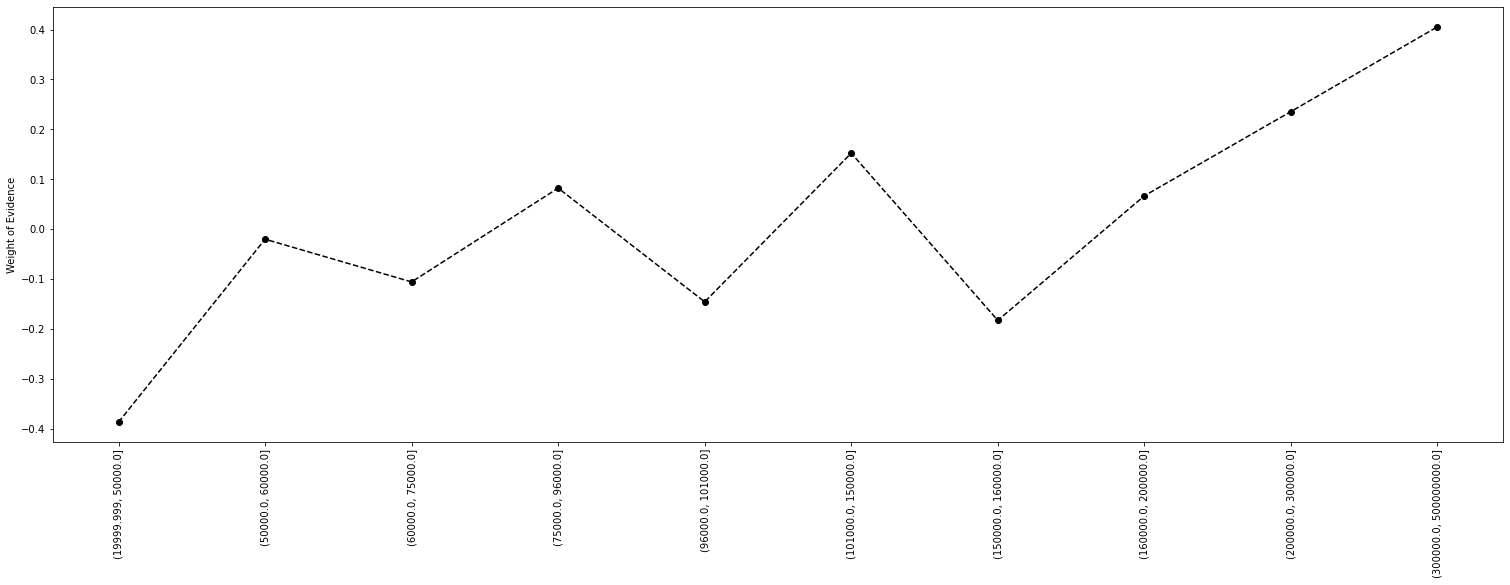

In [18]:
plot_by_woe(woe_num(Train,'Income_fine', 'GBFlag'), 90)

In [19]:
## Coarse classing income variable
bins = [20000, 50001, 75001, 96001, 101001, 150001, 200001,  np.inf]
Train['Income_grped'] = pd.cut(Train['Income'], bins, precision=0, include_lowest=True, right=False)
Test['Income_grped'] = pd.cut(Test['Income'], bins, precision=0, include_lowest=True, right=False)



### No of Children

In [20]:
# ## Fine Classsing (NoChildren)
Train['NoChildren_fine'] = pd.qcut(Train['NoChildren'], q=10, duplicates='drop')
woe_num(Train,'NoChildren_fine', 'GBFlag')

GBFlag           Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
NoChildren_fine                                                         
(-0.001, 1.0]    549  1261  1810        64.3    61.5   72.0      30.3   
(1.0, 2.0]       120   376   496        17.6    18.3   15.7      24.2   
(2.0, 3.0]        58   285   343        12.2    13.9    7.6      16.9   
(3.0, 8.0]        36   128   164         5.8     6.2    4.7      22.0   

GBFlag           GoodBaddOdds       WOE        IV  
NoChildren_fine                                    
(-0.001, 1.0]            2.30 -0.157629  1.655104  
(1.0, 2.0]               3.13  0.153240  0.398425  
(2.0, 3.0]               4.91  0.603741  3.803566  
(3.0, 8.0]               3.56  0.276987  0.415480

In [21]:
## Coarse classing No Children variable
bins = [0, 2,3,4, 9]
Train['NoChildren_grped'] = pd.cut(Train['NoChildren'], bins, precision=0, include_lowest=True, right=False,)
Test['NoChildren_grped'] = pd.cut(Test['NoChildren'], bins, precision=0, include_lowest=True, right=False,)
Train['NoChildren_grped'].value_counts()

[0, 2)    1810
[2, 3)     496
[3, 4)     343
[4, 9)     164
Name: NoChildren_grped, dtype: int64

### Time in Employment

In [22]:
## Fine Classsing (TimeEmploymentMM)
Train['TimeEmploymentMM_fine'] = pd.qcut(Train['TimeEmploymentMM'], q=10, duplicates='drop')
woe_num(Train,'TimeEmploymentMM_fine', 'GBFlag')

GBFlag                 Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
TimeEmploymentMM_fine                                                         
(-3.001, 14.0]          87   207   294        10.5    10.1   11.4      29.6   
(14.0, 25.0]            63   208   271         9.6    10.1    8.3      23.2   
(25.0, 33.0]            92   204   296        10.5    10.0   12.1      31.1   
(33.0, 41.0]            81   209   290        10.3    10.2   10.6      27.9   
(41.0, 51.0]            78   184   262         9.3     9.0   10.2      29.8   
(51.0, 65.0]            85   201   286        10.2     9.8   11.1      29.7   
(65.0, 81.0]            81   193   274         9.7     9.4   10.6      29.6   
(81.0, 105.6]           69   208   277         9.8    10.1    9.0      24.9   
(105.6, 145.0]          70   217   287        10.2    10.6    9.2      24.4   
(145.0, 418.0]          57   219   276         9.8    10.7    7.5      20.7   

GBFlag                 GoodBaddOdds       WOE        IV  
TimeEmploymentMM_fine                                    
(-3.001, 14.0]                 2.38 -0.121078  0.157401  
(14.0, 25.0]                   3.30  0.196280  0.353304  
(25.0, 33.0]                   2.22 -0.190620  0.400303  
(33.0, 41.0]                   2.58 -0.038466  0.015387  
(41.0, 51.0]                   2.36 -0.125163  0.150196  
(51.0, 65.0]                   2.36 -0.124563  0.161932  
(65.0, 81.0]                   2.38 -0.120144  0.144173  
(81.0, 105.6]                  3.01  0.115311  0.126842  
(105.6, 145.0]                 3.10  0.141651  0.198311  
(145.0, 418.0]                 3.84  0.355341  1.137090

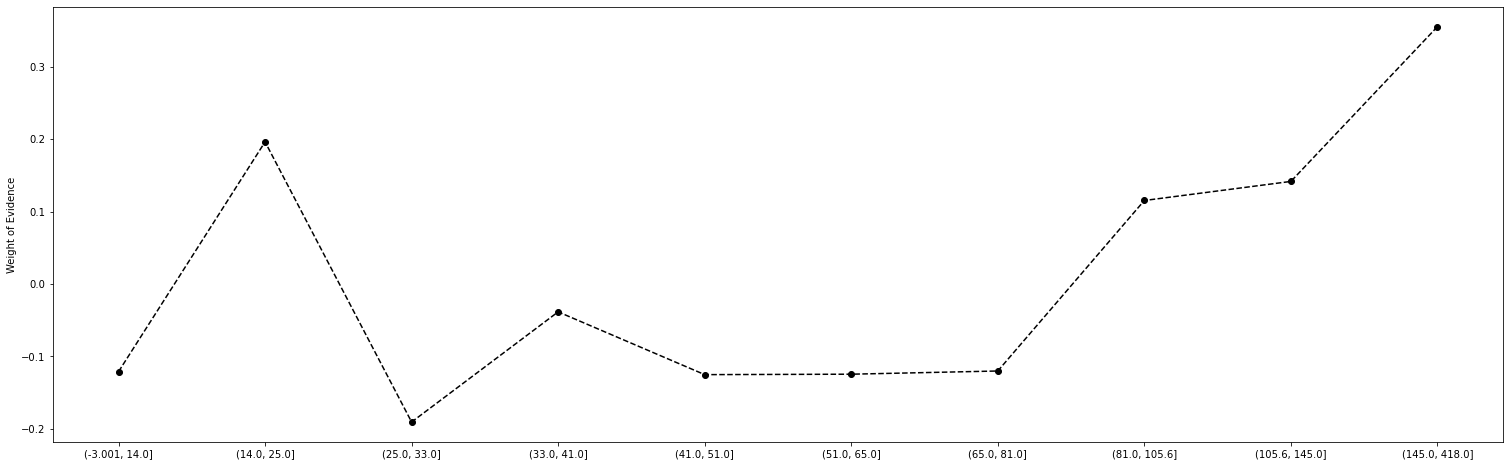

In [23]:
plot_by_woe(woe_num(Train,'TimeEmploymentMM_fine', 'GBFlag'))

In [24]:
## Coarse classing TimeEmploymentMM variable
bins = [0, 15, 26, 82, 145, np.inf]
Train['TimeEmployment_grped'] = pd.cut(Train['TimeEmploymentMM'], bins, precision=0, include_lowest=True, right=False,)
Test['TimeEmployment_grped'] = pd.cut(Test['TimeEmploymentMM'], bins, precision=0, include_lowest=True, right=False,)
Train['TimeEmployment_grped'].value_counts()

[26.0, 82.0)     1408
[82.0, 145.0)     556
[0.0, 15.0)       292
[145.0, inf)      284
[15.0, 26.0)      271
Name: TimeEmployment_grped, dtype: int64

### Time at Address

In [25]:
# Fine Classsing (TotalTimeAtAddress)
Train['TotalTimeAtAddress_fine'] = pd.qcut(Train['TotalTimeAtAddress'], q=10, duplicates='drop')
woe_num(Train,'TotalTimeAtAddress_fine', 'GBFlag')

GBFlag                   Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
TotalTimeAtAddress_fine                                                         
(-0.001, 26.0]            96   194   290        10.3     9.5   12.6      33.1   
(26.0, 50.0]              70   217   287        10.2    10.6    9.2      24.4   
(50.0, 58.0]              81   191   272         9.7     9.3   10.6      29.8   
(58.0, 79.0]              71   218   289        10.3    10.6    9.3      24.6   
(79.0, 102.0]             74   204   278         9.9    10.0    9.7      26.6   
(102.0, 130.0]            62   212   274         9.7    10.3    8.1      22.6   
(130.0, 173.4]            74   205   279         9.9    10.0    9.7      26.5   
(173.4, 264.0]            90   203   293        10.4     9.9   11.8      30.7   
(264.0, 394.6]            72   197   269         9.6     9.6    9.4      26.8   
(394.6, 2904.0]           73   209   282        10.0    10.2    9.6      25.9   

GBFlag                   GoodBaddOdds       WOE        IV  
TotalTimeAtAddress_fine                                    
(-0.001, 26.0]                   2.02 -0.282405  0.875456  
(26.0, 50.0]                     3.10  0.141651  0.198311  
(50.0, 58.0]                     2.36 -0.130840  0.170091  
(58.0, 79.0]                     3.07  0.130840  0.170091  
(79.0, 102.0]                    2.76  0.030459  0.009138  
(102.0, 130.0]                   3.42  0.240280  0.528616  
(130.0, 173.4]                   2.77  0.030459  0.009138  
(173.4, 264.0]                   2.26 -0.175565  0.333573  
(264.0, 394.6]                   2.74  0.021053  0.004211  
(394.6, 2904.0]                  2.86  0.060625  0.036375

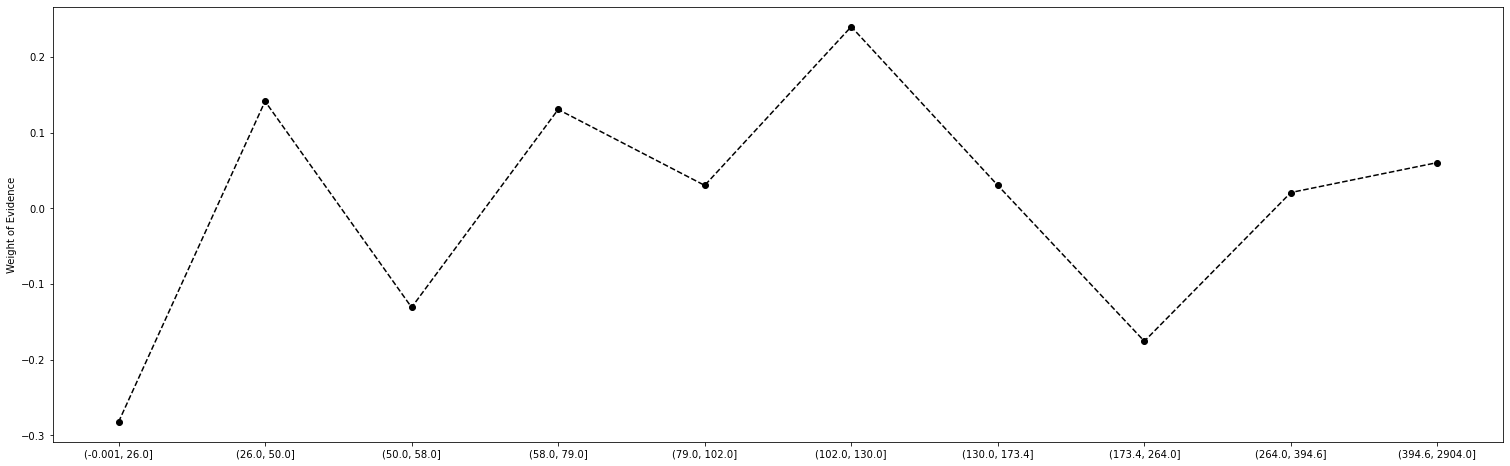

In [26]:
plot_by_woe(woe_num(Train,'TotalTimeAtAddress_fine', 'GBFlag'))

In [27]:
## Coarse classing TotalTimeAtAddress variable
bins = [0,27, 51, 59,  265,  np.inf]
Train['TotalTimeAtAddress_grped'] = pd.cut(Train['TotalTimeAtAddress'], bins, precision=0, include_lowest=True, right=False,)
Test['TotalTimeAtAddress_grped'] = pd.cut(Test['TotalTimeAtAddress'], bins, precision=0, include_lowest=True, right=False,)
Train['TotalTimeAtAddress_grped'].value_counts()

[59.0, 265.0)    1413
[265.0, inf)      551
[0.0, 27.0)       290
[27.0, 51.0)      287
[51.0, 59.0)      272
Name: TotalTimeAtAddress_grped, dtype: int64

### Average Credit

In [28]:
# Fine Classsing (averageCredit)
Train['averageCredit_fine'] = pd.qcut(Train['averageCredit'], q=10, duplicates='drop')
woe_num(Train,'averageCredit_fine', 'GBFlag')

GBFlag               Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
averageCredit_fine                                                          
(1.999, 2500.0]      116   177   293        10.4     8.6   15.2      39.6   
(2500.0, 4000.0]     127   206   333        11.8    10.0   16.6      38.1   
(4000.0, 5000.0]     154   311   465        16.5    15.2   20.2      33.1   
(5000.0, 5147.0]       6    28    34         1.2     1.4    0.8      17.6   
(5147.0, 7000.0]     102   220   322        11.4    10.7   13.4      31.7   
(7000.0, 9000.0]      73   216   289        10.3    10.5    9.6      25.3   
(9000.0, 10000.0]     76   296   372        13.2    14.4   10.0      20.4   
(10000.0, 12000.0]    35   122   157         5.6     6.0    4.6      22.3   
(12000.0, 19480.0]    38   228   266         9.5    11.1    5.0      14.3   
(19480.0, 200000.0]   36   246   282        10.0    12.0    4.7      12.8   

GBFlag               GoodBaddOdds       WOE        IV  
averageCredit_fine                                     
(1.999, 2500.0]              1.53 -0.569533  3.758919  
(2500.0, 4000.0]             1.62 -0.506818  3.344996  
(4000.0, 5000.0]             2.02 -0.284387  1.421936  
(5000.0, 5147.0]             4.67  0.559616  0.335769  
(5147.0, 7000.0]             2.16 -0.225011  0.607530  
(7000.0, 9000.0]             2.96  0.089612  0.080651  
(9000.0, 10000.0]            3.89  0.364643  1.604430  
(10000.0, 12000.0]           3.49  0.265703  0.371984  
(12000.0, 19480.0]           6.00  0.797507  4.864794  
(19480.0, 200000.0]          6.83  0.937344  6.842612

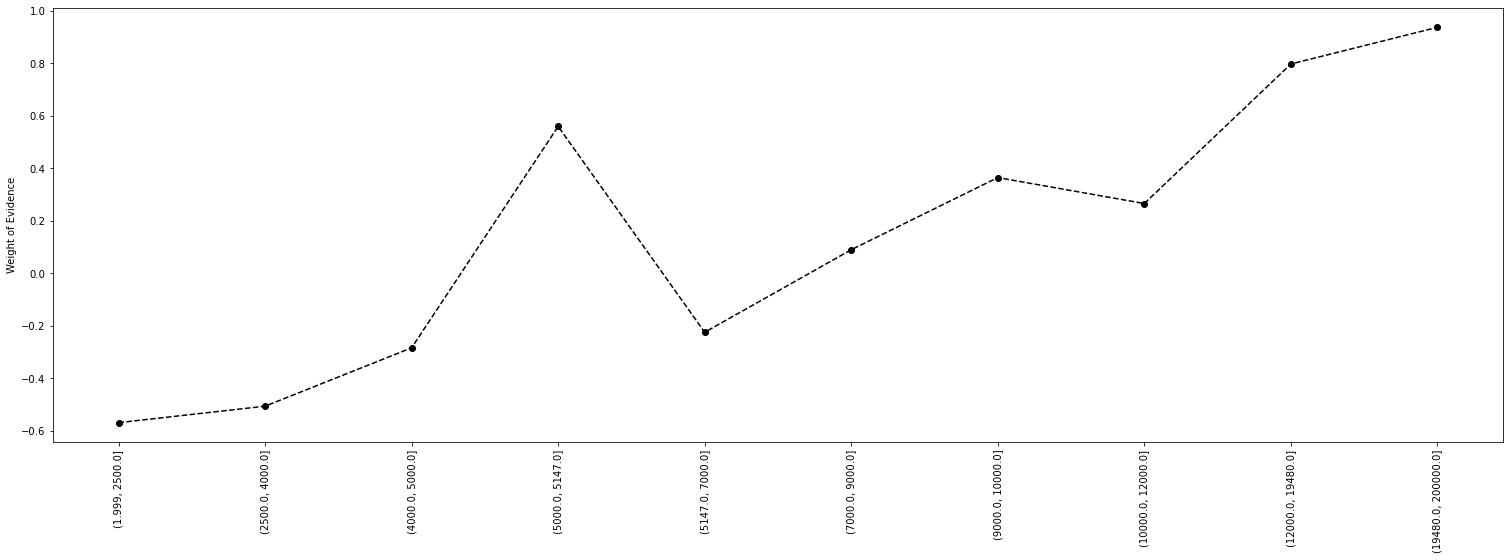

In [29]:
plot_by_woe(woe_num(Train,'averageCredit_fine', 'GBFlag'), 90)

In [30]:
## Coarse classing averageCredit variable
bins = [0, 4001, 5001, 7001, 9001, 12001, np.inf]
Train['averageCredit_grped'] = pd.cut(Train['averageCredit'], bins, precision=0, include_lowest=True, right=False,)
Test['averageCredit_grped'] = pd.cut(Test['averageCredit'], bins, precision=0, include_lowest=True, right=False,)
Train['averageCredit_grped'].value_counts()


[0.0, 4001.0)        626
[12001.0, inf)       548
[9001.0, 12001.0)    529
[4001.0, 5001.0)     465
[5001.0, 7001.0)     356
[7001.0, 9001.0)     289
Name: averageCredit_grped, dtype: int64

### Average Debit

In [31]:
# Fine Classsing (averageDebit)
Train['averageDebit_fine'] = pd.qcut(Train['averageDebit'], q=10, duplicates='drop')
woe_num(Train,'averageDebit_fine', 'GBFlag')

GBFlag              Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
averageDebit_fine                                                          
(3.999, 50.0]       136   274   410        14.6    13.4   17.8      33.2   
(50.0, 100.0]       121   292   413        14.7    14.2   15.9      29.3   
(100.0, 122.063]      4    17    21         0.7     0.8    0.5      19.0   
(122.063, 200.0]    129   317   446        15.9    15.5   16.9      28.9   
(200.0, 300.0]       38   125   163         5.8     6.1    5.0      23.3   
(300.0, 500.0]      105   290   395        14.0    14.1   13.8      26.6   
(500.0, 827.0]       32    89   121         4.3     4.3    4.2      26.4   
(827.0, 1010.45]     70   211   281        10.0    10.3    9.2      24.9   
(1010.45, 2010.75]   67   220   287        10.2    10.7    8.8      23.3   
(2010.75, 27000.0]   61   215   276         9.8    10.5    8.0      22.1   

GBFlag              GoodBaddOdds       WOE        IV  
averageDebit_fine                                     
(3.999, 50.0]               2.01 -0.283944  1.249353  
(50.0, 100.0]               2.41 -0.113077  0.192231  
(100.0, 122.063]            4.25  0.470004  0.141001  
(122.063, 200.0]            2.46 -0.086474  0.121063  
(200.0, 300.0]              3.29  0.198851  0.218736  
(300.0, 500.0]              2.76  0.021506  0.006452  
(500.0, 827.0]              2.78  0.023530  0.002353  
(827.0, 1010.45]            3.01  0.112940  0.124234  
(1010.45, 2010.75]          3.28  0.195492  0.371435  
(2010.75, 27000.0]          3.52  0.271934  0.679834

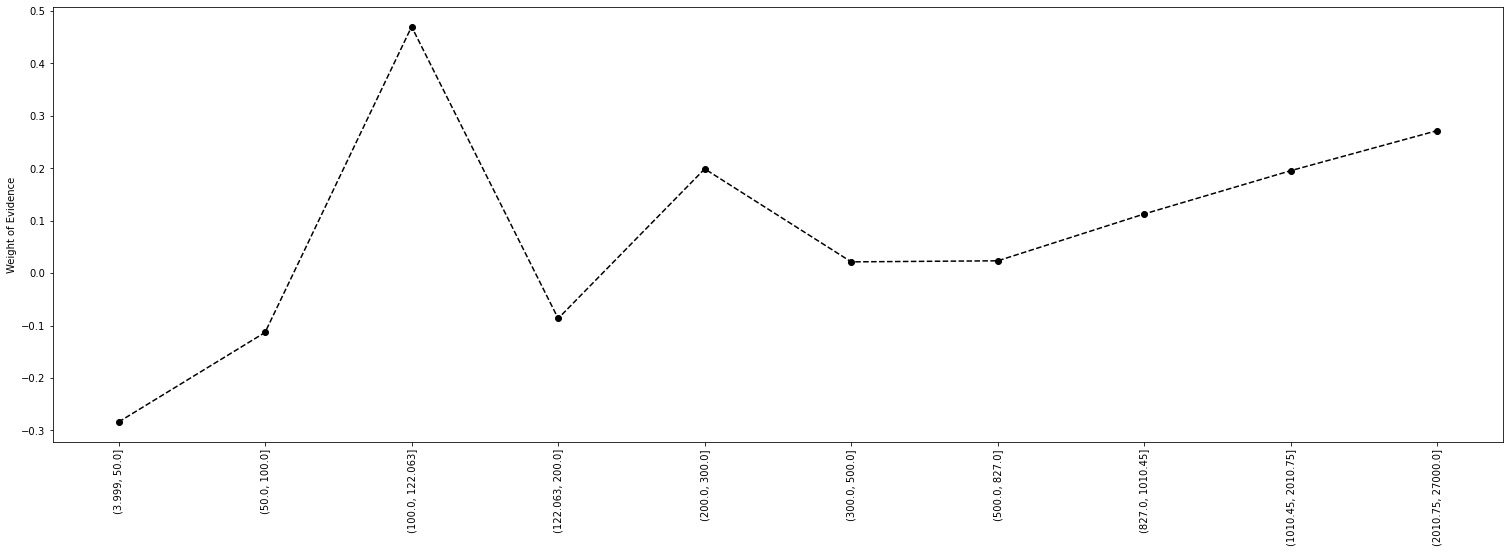

In [32]:
plot_by_woe(woe_num(Train,'averageDebit_fine', 'GBFlag'), 90)

In [33]:
## Coarse classing averageDebit variable
bins = [0,  201, 301, 828,  np.inf]
Train['averageDebit_grped'] = pd.cut(Train['averageDebit'], bins, precision=0, include_lowest=True, right=False,)
Test['averageDebit_grped'] = pd.cut(Test['averageDebit'], bins, precision=0, include_lowest=True, right=False,)
Train['averageDebit_grped'].value_counts()

[0.0, 201.0)      1290
[828.0, inf)       844
[301.0, 828.0)     516
[201.0, 301.0)     163
Name: averageDebit_grped, dtype: int64

### averageBalance

In [34]:
# Fine Classsing (averageBalance)
Train['averageBalance_fine'] = pd.qcut(Train['averageBalance'], q=10, duplicates='drop')
woe_num(Train,'averageBalance_fine', 'GBFlag')

GBFlag                   Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
averageBalance_fine                                                             
(-270608.926, 0.0]       101   280   381        13.5    13.7   13.2      26.5   
(0.0, 1536.18]            76   106   182         6.5     5.2   10.0      41.8   
(1536.18, 3877.527]      104   177   281        10.0     8.6   13.6      37.0   
(3877.527, 5401.5]        84   197   281        10.0     9.6   11.0      29.9   
(5401.5, 7880.955]        78   204   282        10.0    10.0   10.2      27.7   
(7880.955, 10409.77]      82   199   281        10.0     9.7   10.7      29.2   
(10409.77, 14287.303]     66   215   281        10.0    10.5    8.7      23.5   
(14287.303, 20156.808]    63   218   281        10.0    10.6    8.3      22.4   
(20156.808, 34064.738]    51   230   281        10.0    11.2    6.7      18.1   
(34064.738, 2346169.63]   58   224   282        10.0    10.9    7.6      20.6   

GBFlag                   GoodBaddOdds       WOE        IV  
averageBalance_fine                                        
(-270608.926, 0.0]               2.77  0.037179  0.018590  
(0.0, 1536.18]                   1.39 -0.653926  3.138847  
(1536.18, 3877.527]              1.70 -0.458308  2.291538  
(3877.527, 5401.5]               2.35 -0.136132  0.190585  
(5401.5, 7880.955]               2.62 -0.019803  0.003961  
(7880.955, 10409.77]             2.43 -0.098118  0.098118  
(10409.77, 14287.303]            3.26  0.188052  0.338494  
(14287.303, 20156.808]           3.46  0.244598  0.562577  
(20156.808, 34064.738]           4.51  0.513806  2.312128  
(34064.738, 2346169.63]          3.86  0.360615  1.190028

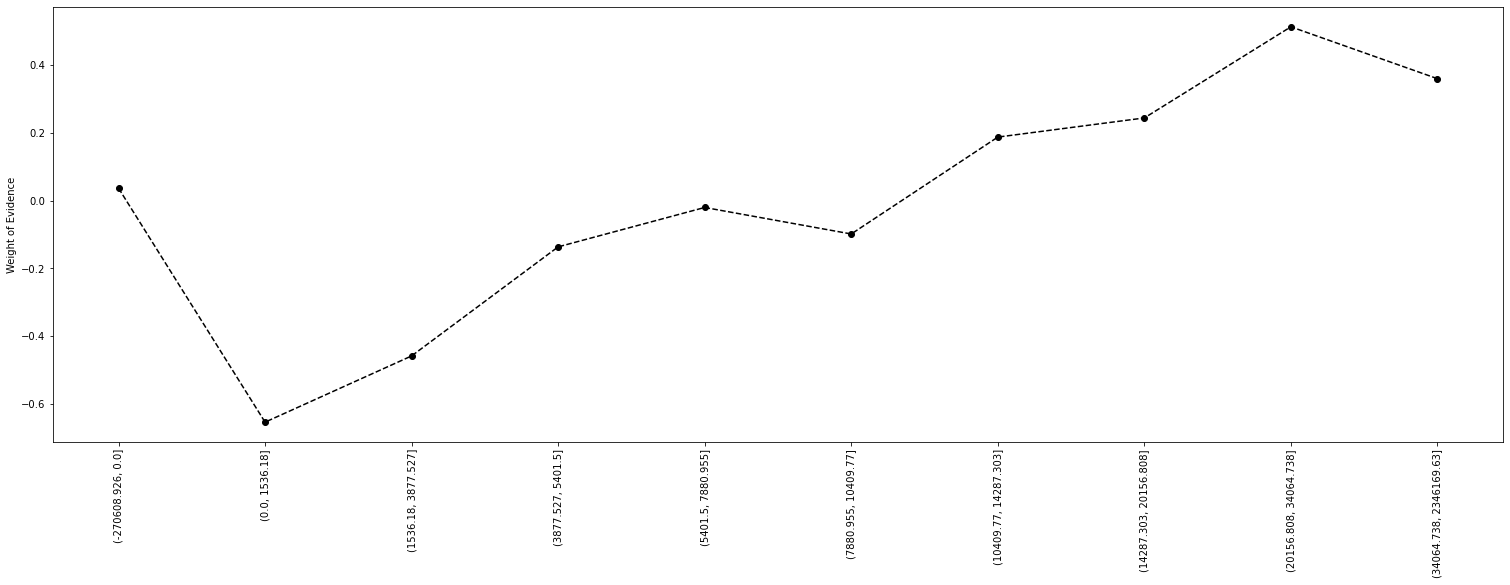

In [35]:
plot_by_woe(woe_num(Train,'averageBalance_fine', 'GBFlag'), 90)


In [36]:
## Coarse classing averageBalance variable
bins = [-np.inf, 3124, 6523, 11427, 15363, np.inf]
Train['averageBalance_grped'] = pd.cut(Train['averageBalance'], bins, precision=0, include_lowest=True, right=False,)
Test['averageBalance_grped'] = pd.cut(Test['averageBalance'], bins, precision=0, include_lowest=True, right=False,)
Train['averageBalance_grped'].value_counts()


[15363.0, inf)        772
[-inf, 3124.0)        755
[3124.0, 6523.0)      515
[6523.0, 11427.0)     514
[11427.0, 15363.0)    257
Name: averageBalance_grped, dtype: int64

### averageLoanRepayment

In [37]:
# Fine Classsing (averageLoanRepayment)
Train['averageLoanRepayment_fine'] = pd.qcut(Train['averageLoanRepayment'], q=10, duplicates='drop')
woe_num(Train,'averageLoanRepayment_fine', 'GBFlag')


GBFlag                     Bad  Good  Freq  Percentage  % Good  % Bad  \
averageLoanRepayment_fine                                               
(-0.001, 501.3]            164   399   563        20.0    19.5   21.5   
(501.3, 2555.399]          100   181   281        10.0     8.8   13.1   
(2555.399, 6205.376]        79   202   281        10.0     9.9   10.4   
(6205.376, 11852.75]        74   208   282        10.0    10.1    9.7   
(11852.75, 19276.852]       89   192   281        10.0     9.4   11.7   
(19276.852, 32163.491]      75   206   281        10.0    10.0    9.8   
(32163.491, 52398.25]       66   215   281        10.0    10.5    8.7   
(52398.25, 92283.635]       58   223   281        10.0    10.9    7.6   
(92283.635, 7970541.14]     58   224   282        10.0    10.9    7.6   

GBFlag                     Bad Rate  GoodBaddOdds       WOE        IV  
averageLoanRepayment_fine                                              
(-0.001, 501.3]                29.1          2.43 -0.097638  0.195277  
(501.3, 2555.399]              35.6          1.81 -0.397861  1.710800  
(2555.399, 6205.376]           28.1          2.56 -0.049271  0.024636  
(6205.376, 11852.75]           26.2          2.81  0.040410  0.016164  
(11852.75, 19276.852]          31.7          2.16 -0.218879  0.503422  
(19276.852, 32163.491]         26.7          2.75  0.020203  0.004041  
(32163.491, 52398.25]          23.5          3.26  0.188052  0.338494  
(52398.25, 92283.635]          20.6          3.84  0.360615  1.190028  
(92283.635, 7970541.14]        20.6          3.86  0.360615  1.190028

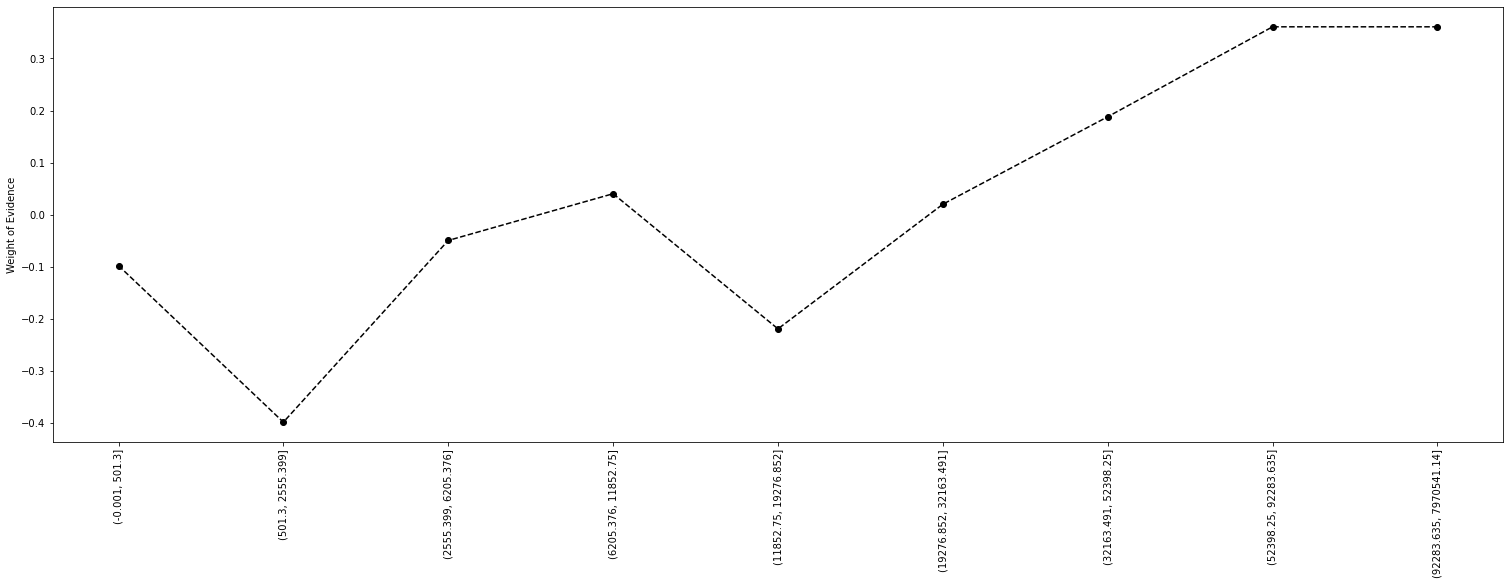

In [38]:
plot_by_woe(woe_num(Train,'averageLoanRepayment_fine', 'GBFlag'), 90)


In [39]:

## Coarse classing averageLoanRepayment variable
bins = [0, 1276, 3434, 11495, 17652, 38423, np.inf]
Train['averageLoanRepayment_grped'] = pd.cut(Train['averageLoanRepayment'], bins, precision=0, include_lowest=True, right=False,)
Test['averageLoanRepayment_grped'] = pd.cut(Test['averageLoanRepayment'], bins, precision=0, include_lowest=True, right=False,)
Train['averageLoanRepayment_grped'].value_counts()


[38423.0, inf)        711
[0.0, 1276.0)         685
[17652.0, 38423.0)    473
[3434.0, 11495.0)     469
[1276.0, 3434.0)      238
[11495.0, 17652.0)    237
Name: averageLoanRepayment_grped, dtype: int64

### Average Number of Credit Weekly

In [40]:
# Fine Classsing (AvgNumCreditWk)
Train['AvgNumCreditWk_fine'] = pd.qcut(Train['AvgNumCreditWk'], q=10, duplicates='drop')
woe_num(Train,'AvgNumCreditWk_fine', 'GBFlag')

GBFlag               Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
AvgNumCreditWk_fine                                                         
(0.299, 2.388]        53   229   282        10.0    11.2    6.9      18.8   
(2.388, 3.615]        75   220   295        10.5    10.7    9.8      25.4   
(3.615, 4.615]        70   206   276         9.8    10.0    9.2      25.4   
(4.615, 5.615]        81   203   284        10.1     9.9   10.6      28.5   
(5.615, 6.857]        67   203   270         9.6     9.9    8.8      24.8   
(6.857, 8.154]        72   213   285        10.1    10.4    9.4      25.3   
(8.154, 10.074]       83   194   277         9.8     9.5   10.9      30.0   
(10.074, 12.5]        87   195   282        10.0     9.5   11.4      30.9   
(12.5, 17.846]        92   194   286        10.2     9.5   12.1      32.2   
(17.846, 172.462]     83   193   276         9.8     9.4   10.9      30.1   

GBFlag               GoodBaddOdds       WOE        IV  
AvgNumCreditWk_fine                                    
(0.299, 2.388]               4.32  0.484392  2.082887  
(2.388, 3.615]               2.93  0.087861  0.079075  
(3.615, 4.615]               2.94  0.083382  0.066705  
(4.615, 5.615]               2.51 -0.068319  0.047823  
(5.615, 6.857]               3.03  0.117783  0.129561  
(6.857, 8.154]               2.96  0.101096  0.101096  
(8.154, 10.074]              2.34 -0.137471  0.192459  
(10.074, 12.5]               2.24 -0.182322  0.346411  
(12.5, 17.846]               2.11 -0.241914  0.628976  
(17.846, 172.462]            2.33 -0.148053  0.222080

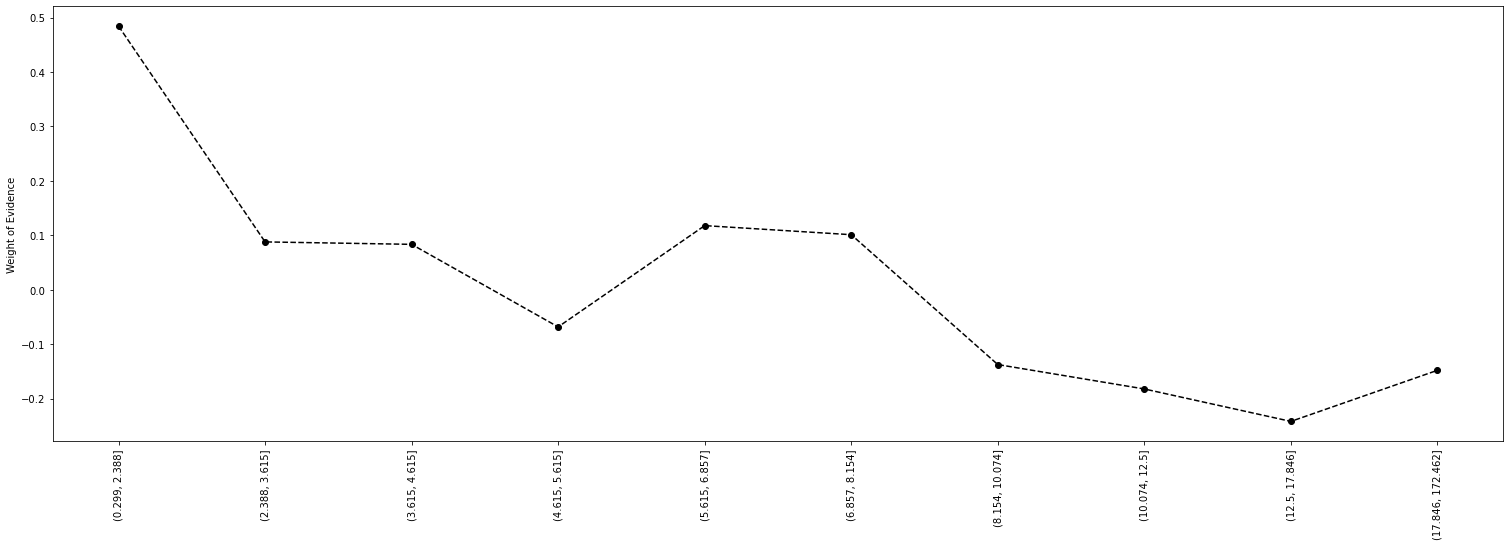

In [41]:
plot_by_woe(woe_num(Train,'AvgNumCreditWk_fine', 'GBFlag'), 90)

###

In [42]:
## Coarse classing AvgNumCreditWk variable
bins = [0, 2.4, 4.62, 5.62, 8.2, np.inf]
Train['AvgNumCreditWk_grped'] = pd.cut(Train['AvgNumCreditWk'], bins, precision=0, include_lowest=True, right=False,)
Test['AvgNumCreditWk_grped'] = pd.cut(Test['AvgNumCreditWk'], bins, precision=0, include_lowest=True, right=False,)
Train['AvgNumCreditWk_grped'].value_counts()

[8.0, inf)    1120
[2.0, 5.0)     571
[6.0, 8.0)     556
[5.0, 6.0)     284
[0.0, 2.0)     282
Name: AvgNumCreditWk_grped, dtype: int64

### Average Number of Debit Weekly


In [43]:
# Fine Classsing (AvgNumDebitWk)
Train['AvgNumDebitWk_fine'] = pd.qcut(Train['AvgNumDebitWk'], q=10, duplicates='drop')
woe_num(Train,'AvgNumDebitWk_fine', 'GBFlag')


GBFlag              Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
AvgNumDebitWk_fine                                                         
(0.874, 10.111]      67   215   282        10.0    10.5    8.8      23.8   
(10.111, 13.901]     71   210   281        10.0    10.2    9.3      25.3   
(13.901, 17.444]     75   206   281        10.0    10.0    9.8      26.7   
(17.444, 21.093]     71   210   281        10.0    10.2    9.3      25.3   
(21.093, 24.571]     62   220   282        10.0    10.7    8.1      22.0   
(24.571, 29.176]     81   200   281        10.0     9.8   10.6      28.8   
(29.176, 34.327]     79   202   281        10.0     9.9   10.4      28.1   
(34.327, 42.149]    100   181   281        10.0     8.8   13.1      35.6   
(42.149, 55.187]     86   195   281        10.0     9.5   11.3      30.6   
(55.187, 322.929]    71   211   282        10.0    10.3    9.3      25.2   

GBFlag              GoodBaddOdds       WOE        IV  
AvgNumDebitWk_fine                                    
(0.874, 10.111]             3.21  0.176624  0.300260  
(10.111, 13.901]            2.96  0.092373  0.083136  
(13.901, 17.444]            2.75  0.020203  0.004041  
(17.444, 21.093]            2.96  0.092373  0.083136  
(21.093, 24.571]            3.55  0.278380  0.723787  
(24.571, 29.176]            2.47 -0.078472  0.062777  
(29.176, 34.327]            2.56 -0.049271  0.024636  
(34.327, 42.149]            1.81 -0.397861  1.710800  
(42.149, 55.187]            2.27 -0.173511  0.312320  
(55.187, 322.929]           2.97  0.102129  0.102129

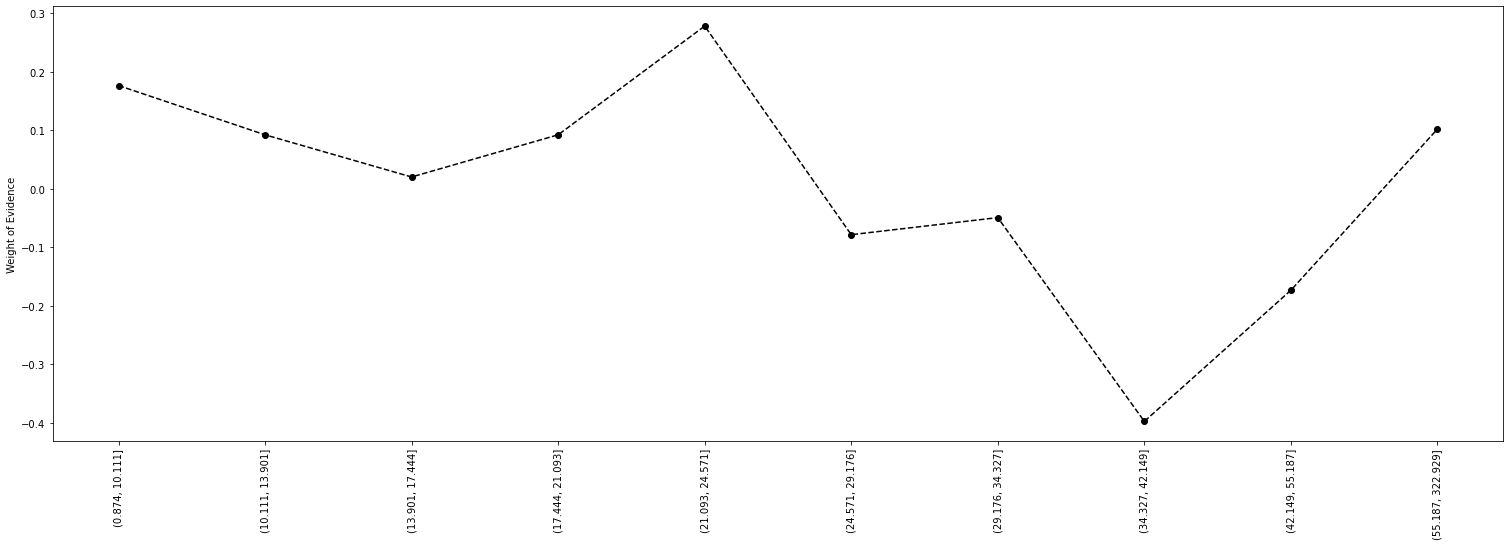

In [44]:
plot_by_woe(woe_num(Train,'AvgNumDebitWk_fine', 'GBFlag'), 90)

In [45]:
## Coarse classing AvgNumDebitWk variable
bins = [0, 21.1, 24.6, 34.4, 55.2, np.inf]

Train['AvgNumDebitWk_grped'] = pd.cut(Train['AvgNumDebitWk'], bins, precision=0, include_lowest=True, right=False,)

Test['AvgNumDebitWk_grped'] = pd.cut(Test['AvgNumDebitWk'], bins, precision=0, include_lowest=True, right=False,)

Train['AvgNumDebitWk_grped'].value_counts()

[0.0, 21.0)     1125
[25.0, 34.0)     565
[34.0, 55.0)     558
[21.0, 25.0)     283
[55.0, inf)      282
Name: AvgNumDebitWk_grped, dtype: int64

### AvgNumCredit monthly

In [46]:
# Fine Classsing (AvgNumCreditMn)
Train['AvgNumCreditMn_fine'] = pd.qcut(Train['AvgNumCreditMn'], q=10, duplicates='drop')
woe_num(Train,'AvgNumCreditMn_fine', 'GBFlag')


GBFlag               Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
AvgNumCreditMn_fine                                                         
(0.999, 10.333]       55   234   289        10.3    11.4    7.2      19.0   
(10.333, 15.667]      73   212   285        10.1    10.3    9.6      25.6   
(15.667, 20.257]      67   203   270         9.6     9.9    8.8      24.8   
(20.257, 24.333]      84   201   285        10.1     9.8   11.0      29.5   
(24.333, 30.333]      71   221   292        10.4    10.8    9.3      24.3   
(30.333, 35.667]      69   201   270         9.6     9.8    9.0      25.6   
(35.667, 44.333]      84   199   283        10.1     9.7   11.0      29.7   
(44.333, 55.333]      87   193   280        10.0     9.4   11.4      31.1   
(55.333, 77.667]      89   191   280        10.0     9.3   11.7      31.8   
(77.667, 747.333]     84   195   279         9.9     9.5   11.0      30.1   

GBFlag               GoodBaddOdds       WOE        IV  
AvgNumCreditMn_fine                                    
(0.999, 10.333]              4.25  0.459532  1.930036  
(10.333, 15.667]             2.90  0.070381  0.049267  
(15.667, 20.257]             3.03  0.117783  0.129561  
(20.257, 24.333]             2.39 -0.115513  0.138615  
(24.333, 30.333]             3.11  0.149532  0.224298  
(30.333, 35.667]             2.91  0.085158  0.068126  
(35.667, 44.333]             2.37 -0.125769  0.163500  
(44.333, 55.333]             2.22 -0.192904  0.385807  
(55.333, 77.667]             2.15 -0.229574  0.550979  
(77.667, 747.333]            2.32 -0.146603  0.219905

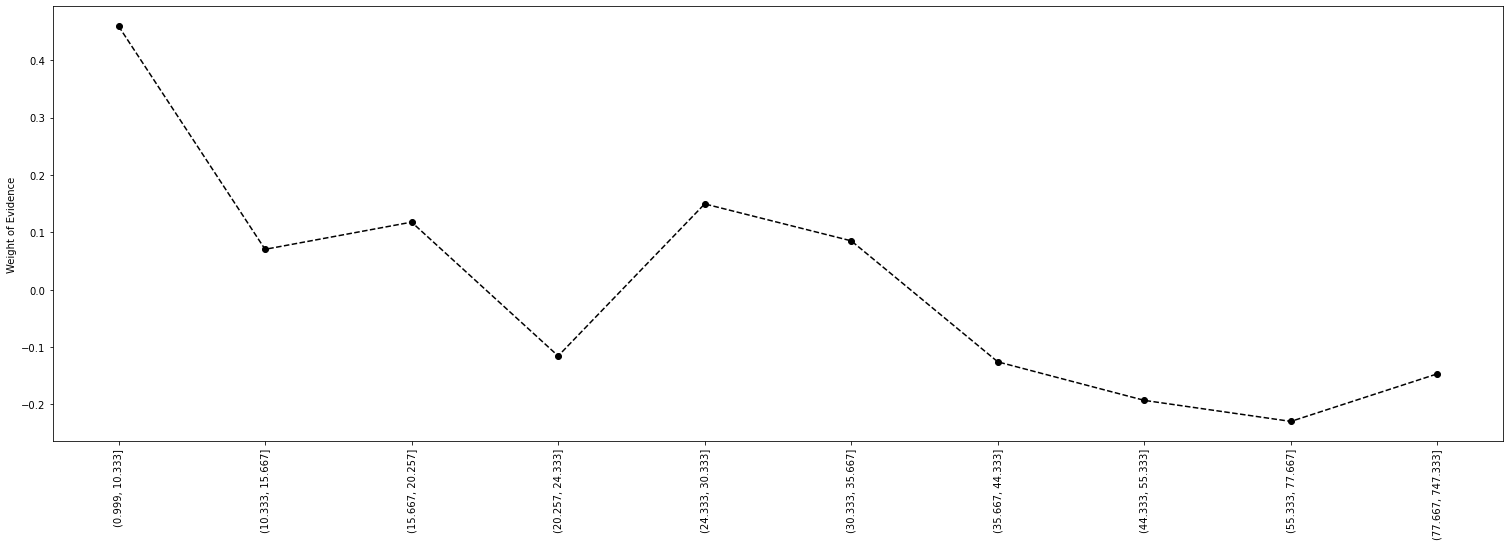

In [47]:

plot_by_woe(woe_num(Train,'AvgNumCreditMn_fine', 'GBFlag'), 90)


In [48]:
## Coarse classing AvgNumCreditMn variable
bins = [0, 10.34, 20.3, 24.4, 35.7,  np.inf]

Train['AvgNumCreditMn_grped'] = pd.cut(Train['AvgNumCreditMn'], bins, precision=0, include_lowest=True, right=False,)

Test['AvgNumCreditMn_grped'] = pd.cut(Test['AvgNumCreditMn'], bins, precision=0, include_lowest=True, right=False,)

Train['AvgNumCreditMn_grped'].value_counts()

[36.0, inf)     1122
[24.0, 36.0)     562
[10.0, 20.0)     555
[0.0, 10.0)      289
[20.0, 24.0)     285
Name: AvgNumCreditMn_grped, dtype: int64

### AvgNumDebit monthly



In [49]:
# Fine Classsing (AvgNumDebitMn)
Train['AvgNumDebitMn_fine'] = pd.qcut(Train['AvgNumDebitMn'], q=10, duplicates='drop')
woe_num(Train,'AvgNumDebitMn_fine', 'GBFlag')


GBFlag              Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
AvgNumDebitMn_fine                                                         
(1.749, 31.75]       63   224   287        10.2    10.9    8.3      22.0   
(31.75, 46.35]       71   205   276         9.8    10.0    9.3      25.7   
(46.35, 58.75]       76   206   282        10.0    10.0   10.0      27.0   
(58.75, 71.5]        78   205   283        10.1    10.0   10.2      27.6   
(71.5, 84.5]         64   218   282        10.0    10.6    8.4      22.7   
(84.5, 100.5]        79   200   279         9.9     9.8   10.4      28.3   
(100.5, 119.0]       82   199   281        10.0     9.7   10.7      29.2   
(119.0, 145.9]       95   185   280        10.0     9.0   12.5      33.9   
(145.9, 192.65]      80   201   281        10.0     9.8   10.5      28.5   
(192.65, 1130.25]    75   207   282        10.0    10.1    9.8      26.6   

GBFlag              GoodBaddOdds       WOE        IV  
AvgNumDebitMn_fine                                    
(1.749, 31.75]              3.56  0.272507  0.708519  
(31.75, 46.35]              2.89  0.072571  0.050799  
(46.35, 58.75]              2.71  0.000000  0.000000  
(58.75, 71.5]               2.63 -0.019803  0.003961  
(71.5, 84.5]                3.41  0.232622  0.511769  
(84.5, 100.5]               2.53 -0.059423  0.035654  
(100.5, 119.0]              2.43 -0.098118  0.098118  
(119.0, 145.9]              1.95 -0.328504  1.149764  
(145.9, 192.65]             2.51 -0.068993  0.048295  
(192.65, 1130.25]           2.76  0.030153  0.009046

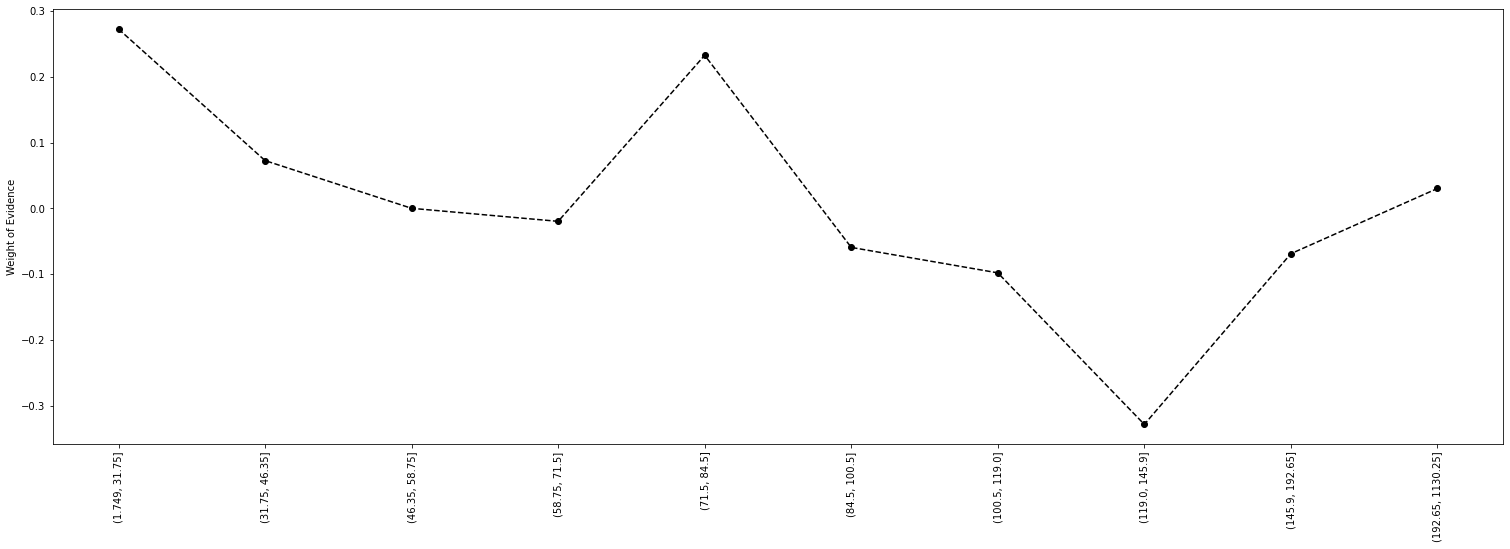

In [50]:


plot_by_woe(woe_num(Train,'AvgNumDebitMn_fine', 'GBFlag'), 90)


In [51]:

## Coarse classing AvgNumDebitMn variable
bins = [0, 31.8, 72, 84.6, 119.1, 146,  np.inf]

Train['AvgNumDebitMn_grped'] = pd.cut(Train['AvgNumDebitMn'], bins, precision=0, include_lowest=True, right=False,)

Test['AvgNumDebitMn_grped'] = pd.cut(Test['AvgNumDebitMn'], bins, precision=0, include_lowest=True, right=False,)

Train['AvgNumDebitMn_grped'].value_counts()

[32.0, 72.0)      851
[146.0, inf)      563
[85.0, 119.0)     560
[0.0, 32.0)       287
[119.0, 146.0)    280
[72.0, 85.0)      272
Name: AvgNumDebitMn_grped, dtype: int64

### Airtime_Payments_Amnt_1

In [52]:
# Fine Classsing (AAirtime_Payments_Amnt_1)
Train['Airtime_Payments_Amnt_1_fine'] = pd.qcut(Train['Airtime_Payments_Amnt_1'], q=10, duplicates='drop')
woe_num(Train,'Airtime_Payments_Amnt_1_fine', 'GBFlag')


GBFlag                        Bad  Good  Freq  Percentage  % Good  % Bad  \
Airtime_Payments_Amnt_1_fine                                               
(-0.001, 6.98]                272   854  1126        40.0    41.7   35.6   
(6.98, 434.9]                  90   191   281        10.0     9.3   11.8   
(434.9, 1100.0]                94   199   293        10.4     9.7   12.3   
(1100.0, 2200.0]               80   195   275         9.8     9.5   10.5   
(2200.0, 3964.336]             79   196   275         9.8     9.6   10.4   
(3964.336, 7140.0]             70   211   281        10.0    10.3    9.2   
(7140.0, 220655.7]             78   204   282        10.0    10.0   10.2   

GBFlag                        Bad Rate  GoodBaddOdds       WOE        IV  
Airtime_Payments_Amnt_1_fine                                              
(-0.001, 6.98]                    24.2          3.14  0.158155  0.964748  
(6.98, 434.9]                     32.0          2.12 -0.238085  0.595213  
(434.9, 1100.0]                   32.1          2.12 -0.237473  0.617431  
(1100.0, 2200.0]                  29.1          2.44 -0.100083  0.100083  
(2200.0, 3964.336]                28.7          2.48 -0.080043  0.064034  
(3964.336, 7140.0]                24.9          3.01  0.112940  0.124234  
(7140.0, 220655.7]                27.7          2.62 -0.019803  0.003961

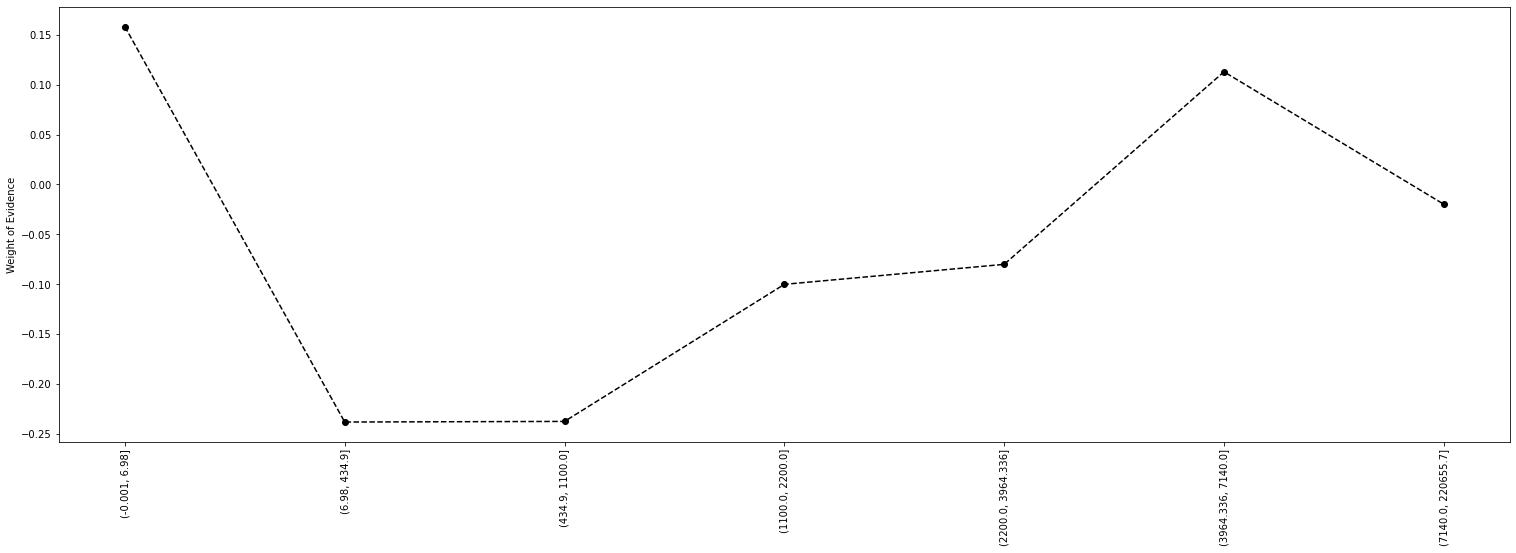

In [53]:
plot_by_woe(woe_num(Train,'Airtime_Payments_Amnt_1_fine', 'GBFlag'), 90)

In [54]:

## Coarse classing Airtime_Payments_Amnt_1 variable
bins = [0,301, 3401,  6601, np.inf]

Train['Airtime_Payments_Amnt_1_grped'] = pd.cut(Train['Airtime_Payments_Amnt_1'], bins, precision=0, include_lowest=True, right=False,)

Test['Airtime_Payments_Amnt_1_grped'] = pd.cut(Test['Airtime_Payments_Amnt_1'], bins, precision=0, include_lowest=True, right=False,)

Train['Airtime_Payments_Amnt_1_grped'].value_counts()

[0.0, 301.0)        1359
[301.0, 3401.0)      815
[3401.0, 6601.0)     332
[6601.0, inf)        307
Name: Airtime_Payments_Amnt_1_grped, dtype: int64

In [55]:
woe_cat(Train, 'Airtime_Payments_Amnt_1_grped', 'GBFlag')

GBFlag                         Bad  Good  Freq    Proptn    % Good     % Bad  \
Airtime_Payments_Amnt_1_grped                                                  
[0.0, 301.0)                   344  1015  1359  0.483114  0.495122  0.450852   
[3401.0, 6601.0)                86   246   332  0.118023  0.120000  0.112713   
[6601.0, inf)                   81   226   307  0.109136  0.110244  0.106160   
[301.0, 3401.0)                252   563   815  0.289726  0.274634  0.330275   

GBFlag                         Bad Rate  GoodBaddOdds       WOE  class IV  \
Airtime_Payments_Amnt_1_grped                                               
[0.0, 301.0)                   0.253127          2.95 -0.093665  0.004147   
[3401.0, 6601.0)               0.259036          2.86 -0.062647  0.000457   
[6601.0, inf)                  0.263844          2.79 -0.037749  0.000154   
[301.0, 3401.0)                0.309202          2.23  0.184487  0.010265   

GBFlag                         Variable IV  
Airtime_Payments_Amnt_1_grped               
[0.0, 301.0)                      0.015022  
[3401.0, 6601.0)                  0.015022  
[6601.0, inf)                     0.015022  
[301.0, 3401.0)                   0.015022

### Airtime_Payments_Amnt_2


In [56]:
# Fine Classsing (AAirtime_Payments_Amnt_2)
Train['Airtime_Payments_Amnt_2_fine'] = pd.qcut(Train['Airtime_Payments_Amnt_2'], q=10, duplicates='drop')
woe_num(Train,'Airtime_Payments_Amnt_2_fine', 'GBFlag')


GBFlag                        Bad  Good  Freq  Percentage  % Good  % Bad  \
Airtime_Payments_Amnt_2_fine                                               
(-0.001, 400.0]               284   847  1131        40.2    41.3   37.2   
(400.0, 1541.88]               82   194   276         9.8     9.5   10.7   
(1541.88, 3200.0]              88   197   285        10.1     9.6   11.5   
(3200.0, 5332.0]               89   188   277         9.8     9.2   11.7   
(5332.0, 8356.0]               75   206   281        10.0    10.0    9.8   
(8356.0, 13940.0]              70   211   281        10.0    10.3    9.2   
(13940.0, 552225.75]           75   207   282        10.0    10.1    9.8   

GBFlag                        Bad Rate  GoodBaddOdds       WOE        IV  
Airtime_Payments_Amnt_2_fine                                              
(-0.001, 400.0]                   25.1          2.98  0.104554  0.428670  
(400.0, 1541.88]                  29.7          2.37 -0.118952  0.142742  
(1541.88, 3200.0]                 30.9          2.24 -0.180584  0.343109  
(3200.0, 5332.0]                  32.1          2.11 -0.240385  0.600963  
(5332.0, 8356.0]                  26.7          2.75  0.020203  0.004041  
(8356.0, 13940.0]                 24.9          3.01  0.112940  0.124234  
(13940.0, 552225.75]              26.6          2.76  0.030153  0.009046

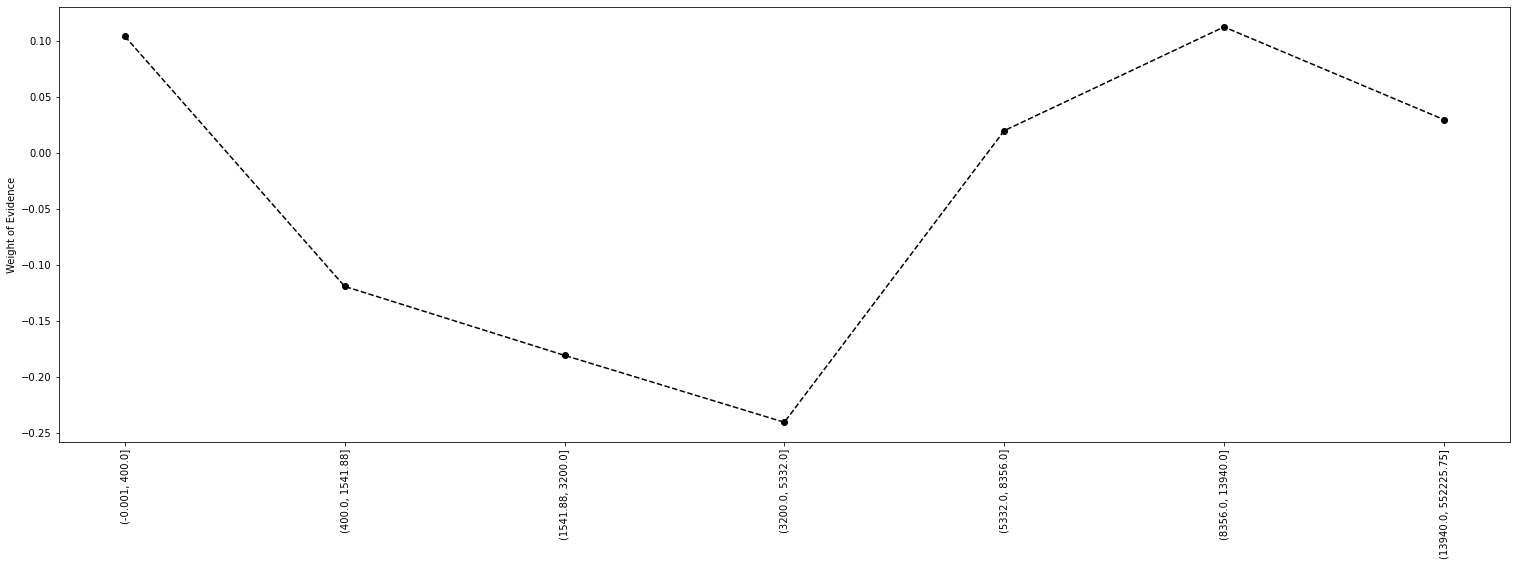

In [57]:
plot_by_woe(woe_num(Train,'Airtime_Payments_Amnt_2_fine', 'GBFlag'), 90)


In [58]:

## Coarse classing Airtime_Payments_Amnt_2 variable
bins = [0, 401, 5333, np.inf]

Train['Airtime_Payments_Amnt_2_grped'] = pd.cut(Train['Airtime_Payments_Amnt_2'], bins, precision=0, include_lowest=True, right=False,)

Test['Airtime_Payments_Amnt_2_grped'] = pd.cut(Test['Airtime_Payments_Amnt_2'], bins, precision=0, include_lowest=True, right=False,)

Train['Airtime_Payments_Amnt_2_grped'].value_counts()

[0.0, 401.0)       1131
[5333.0, inf)       844
[401.0, 5333.0)     838
Name: Airtime_Payments_Amnt_2_grped, dtype: int64

In [59]:
woe_cat(Train, 'Airtime_Payments_Amnt_2_grped', 'GBFlag')

GBFlag                         Bad  Good  Freq    Proptn    % Good     % Bad  \
Airtime_Payments_Amnt_2_grped                                                  
[0.0, 401.0)                   284   847  1131  0.402062  0.413171  0.372215   
[5333.0, inf)                  220   624   844  0.300036  0.304390  0.288336   
[401.0, 5333.0)                259   579   838  0.297903  0.282439  0.339450   

GBFlag                         Bad Rate  GoodBaddOdds       WOE  class IV  \
Airtime_Payments_Amnt_2_grped                                               
[0.0, 401.0)                   0.251105          2.98 -0.104389  0.004275   
[5333.0, inf)                  0.260664          2.84 -0.054186  0.000870   
[401.0, 5333.0)                0.309069          2.24  0.183863  0.010482   

GBFlag                         Variable IV  
Airtime_Payments_Amnt_2_grped               
[0.0, 401.0)                      0.015627  
[5333.0, inf)                     0.015627  
[401.0, 5333.0)                   0.015627

### Airtime_Payments_Amnt_3


In [60]:

# Fine Classsing (AAirtime_Payments_Amnt_3)
Train['Airtime_Payments_Amnt_3_fine'] = pd.qcut(Train['Airtime_Payments_Amnt_3'], q=10, duplicates='drop')
woe_num(Train,'Airtime_Payments_Amnt_3_fine', 'GBFlag')


GBFlag                        Bad  Good  Freq  Percentage  % Good  % Bad  \
Airtime_Payments_Amnt_3_fine                                               
(-0.001, 250.0]               277   850  1127        40.1    41.5   36.3   
(250.0, 1430.0]                83   197   280        10.0     9.6   10.9   
(1430.0, 3001.0]               93   188   281        10.0     9.2   12.2   
(3001.0, 5119.2]               87   194   281        10.0     9.5   11.4   
(5119.2, 8380.0]               82   199   281        10.0     9.7   10.7   
(8380.0, 13700.0]              71   212   283        10.1    10.3    9.3   
(13700.0, 165367.29]           70   210   280        10.0    10.2    9.2   

GBFlag                        Bad Rate  GoodBaddOdds       WOE        IV  
Airtime_Payments_Amnt_3_fine                                              
(-0.001, 250.0]                   24.6          3.07  0.133876  0.696154  
(250.0, 1430.0]                   29.6          2.37 -0.127000  0.165100  
(1430.0, 3001.0]                  33.1          2.02 -0.282232  0.846697  
(3001.0, 5119.2]                  31.0          2.23 -0.182322  0.346411  
(5119.2, 8380.0]                  29.2          2.43 -0.098118  0.098118  
(8380.0, 13700.0]                 25.1          2.99  0.102129  0.102129  
(13700.0, 165367.29]              25.0          3.00  0.103184  0.103184

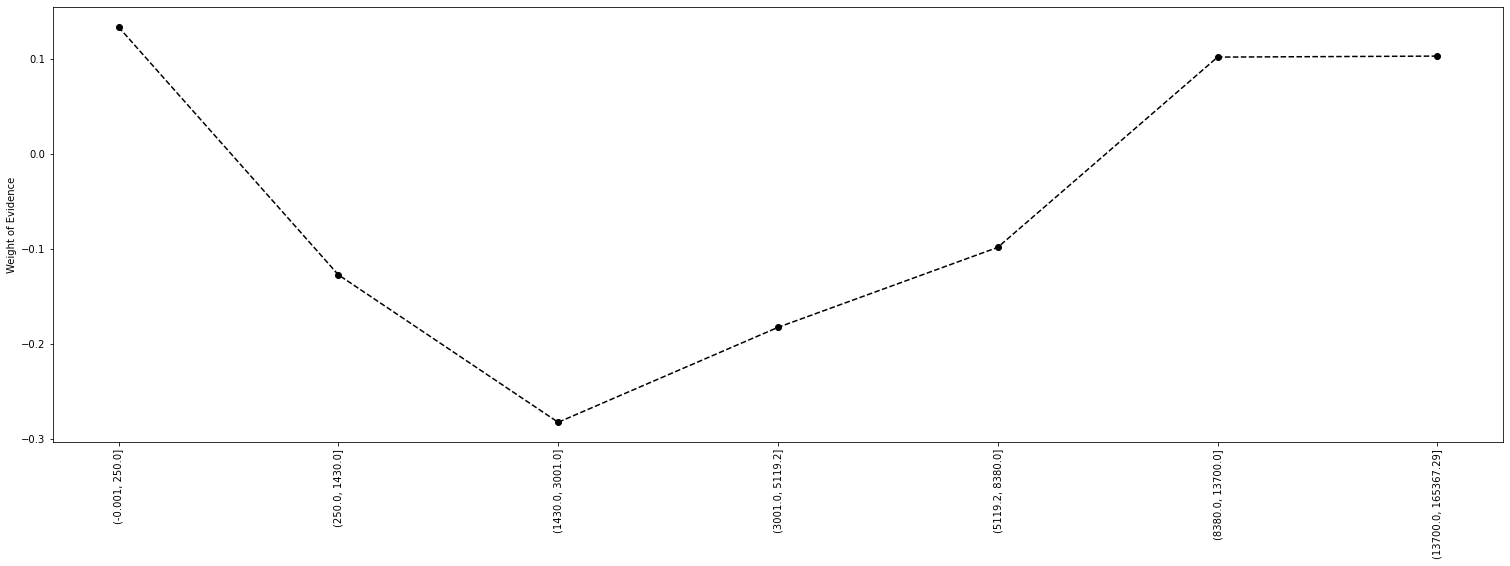

In [61]:

plot_by_woe(woe_num(Train,'Airtime_Payments_Amnt_3_fine', 'GBFlag'), 90)


In [62]:


## Coarse classing Airtime_Payments_Amnt_3 variable
bins = [0, 251, 8381, np.inf]

Train['Airtime_Payments_Amnt_3_grped'] = pd.cut(Train['Airtime_Payments_Amnt_3'], bins, precision=0, include_lowest=True, right=False,)

Test['Airtime_Payments_Amnt_3_grped'] = pd.cut(Test['Airtime_Payments_Amnt_3'], bins, precision=0, include_lowest=True, right=False,)

Train['Airtime_Payments_Amnt_3_grped'].value_counts()

[0.0, 251.0)       1127
[251.0, 8381.0)    1123
[8381.0, inf)       563
Name: Airtime_Payments_Amnt_3_grped, dtype: int64

### Airtime_Payments_Amnt_4

In [63]:


# Fine Classsing (AAirtime_Payments_Amnt_4)
Train['Airtime_Payments_Amnt_4_fine'] = pd.qcut(Train['Airtime_Payments_Amnt_4'], q=10, duplicates='drop')
woe_num(Train,'Airtime_Payments_Amnt_4_fine', 'GBFlag')


GBFlag                        Bad  Good  Freq  Percentage  % Good  % Bad  \
Airtime_Payments_Amnt_4_fine                                               
(-0.001, 181.48]              354  1054  1408        50.1    51.4   46.4   
(181.48, 800.0]                97   192   289        10.3     9.4   12.7   
(800.0, 2000.0]                83   210   293        10.4    10.2   10.9   
(2000.0, 3900.0]               74   191   265         9.4     9.3    9.7   
(3900.0, 7100.0]               77   201   278         9.9     9.8   10.1   
(7100.0, 115500.0]             78   202   280        10.0     9.9   10.2   

GBFlag                        Bad Rate  GoodBaddOdds       WOE        IV  
Airtime_Payments_Amnt_4_fine                                              
(-0.001, 181.48]                  25.1          2.98  0.102339  0.511694  
(181.48, 800.0]                   33.6          1.98 -0.300892  0.992945  
(800.0, 2000.0]                   28.3          2.53 -0.066375  0.046463  
(2000.0, 3900.0]                  27.9          2.58 -0.042111  0.016845  
(3900.0, 7100.0]                  27.7          2.61 -0.030153  0.009046  
(7100.0, 115500.0]                27.9          2.59 -0.029853  0.008956

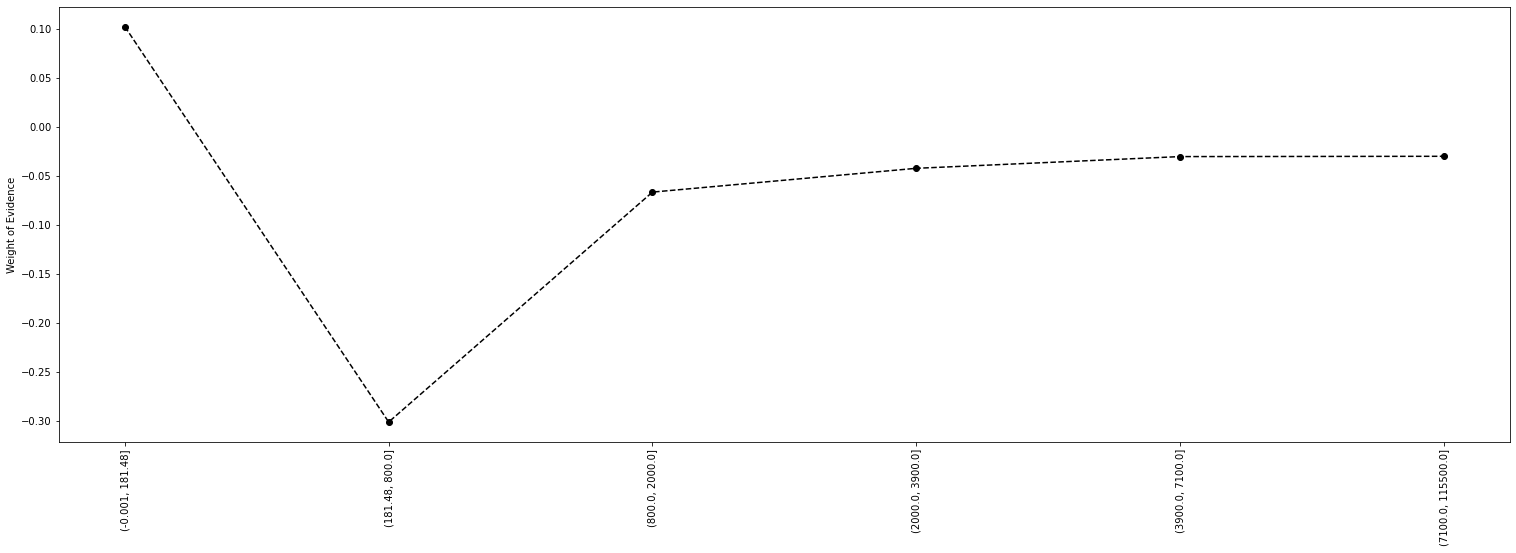

In [64]:


plot_by_woe(woe_num(Train,'Airtime_Payments_Amnt_4_fine', 'GBFlag'), 90)


In [65]:

## Coarse classing Airtime_Payments_Amnt_4 variable
bins = [0, 182, 801, np.inf]

Train['Airtime_Payments_Amnt_4_grped'] = pd.cut(Train['Airtime_Payments_Amnt_4'], bins, precision=0, include_lowest=True, right=False,)

Test['Airtime_Payments_Amnt_4_grped'] = pd.cut(Test['Airtime_Payments_Amnt_4'], bins, precision=0, include_lowest=True, right=False,)

Train['Airtime_Payments_Amnt_4_grped'].value_counts()

[0.0, 182.0)      1408
[801.0, inf)      1116
[182.0, 801.0)     289
Name: Airtime_Payments_Amnt_4_grped, dtype: int64

In [66]:
woe_cat(Train, 'Airtime_Payments_Amnt_4_grped', 'GBFlag')

GBFlag                         Bad  Good  Freq    Proptn    % Good     % Bad  \
Airtime_Payments_Amnt_4_grped                                                  
[0.0, 182.0)                   354  1054  1408  0.500533  0.514146  0.463958   
[801.0, inf)                   312   804  1116  0.396729  0.392195  0.408912   
[182.0, 801.0)                  97   192   289  0.102737  0.093659  0.127130   

GBFlag                         Bad Rate  GoodBaddOdds       WOE  class IV  \
Airtime_Payments_Amnt_4_grped                                               
[0.0, 182.0)                    0.25142          2.98 -0.102714  0.005155   
[801.0, inf)                    0.27957          2.58  0.041741  0.000698   
[182.0, 801.0)                  0.33564          1.98  0.305553  0.010227   

GBFlag                         Variable IV  
Airtime_Payments_Amnt_4_grped               
[0.0, 182.0)                       0.01608  
[801.0, inf)                       0.01608  
[182.0, 801.0)                     0.01608

### Loan Credit count

In [67]:
# Fine Classsing (loanCreditcount)
Train['loanCreditcount_fine'] = pd.qcut(Train['loanCreditcount'], q=10, duplicates='drop')
woe_num(Train,'loanCreditcount_fine', 'GBFlag')

GBFlag                Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
loanCreditcount_fine                                                         
(-0.001, 1.0]         271   795  1066        37.9    38.8   35.5      25.4   
(1.0, 2.0]             80   181   261         9.3     8.8   10.5      30.7   
(2.0, 3.0]             59   146   205         7.3     7.1    7.7      28.8   
(3.0, 4.0]             51   131   182         6.5     6.4    6.7      28.0   
(4.0, 6.0]             68   189   257         9.1     9.2    8.9      26.5   
(6.0, 10.0]            82   210   292        10.4    10.2   10.7      28.1   
(10.0, 17.0]           77   211   288        10.2    10.3   10.1      26.7   
(17.0, 73.0]           75   187   262         9.3     9.1    9.8      28.6   

GBFlag                GoodBaddOdds       WOE        IV  
loanCreditcount_fine                                    
(-0.001, 1.0]                 2.93  0.088888  0.293329  
(1.0, 2.0]                    2.26 -0.176624  0.300260  
(2.0, 3.0]                    2.47 -0.081126  0.048675  
(3.0, 4.0]                    2.57 -0.045810  0.013743  
(4.0, 6.0]                    2.78  0.033152  0.009946  
(6.0, 10.0]                   2.56 -0.047856  0.023928  
(10.0, 17.0]                  2.74  0.019608  0.003922  
(17.0, 73.0]                  2.49 -0.074108  0.051876

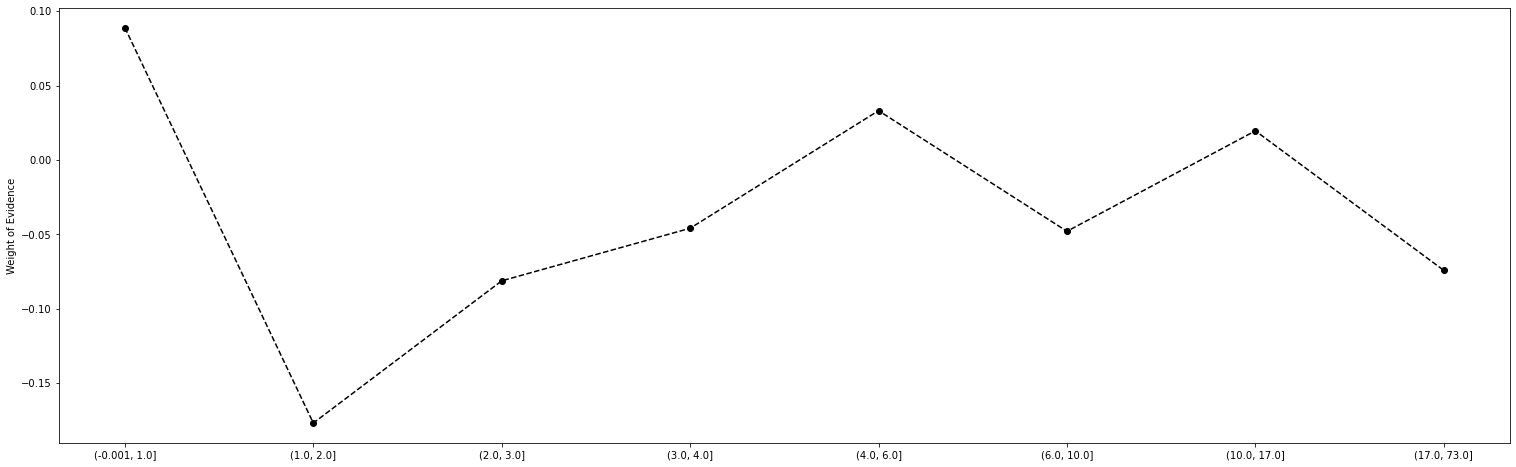

In [68]:
plot_by_woe(woe_num(Train,'loanCreditcount_fine', 'GBFlag'))

In [69]:
## Coarse classing loanCreditcount variable
bins = [0 , 1.1,   np.inf]
Train['loanCreditcount_grped'] = pd.cut(Train['loanCreditcount'], bins, precision=0, include_lowest=True, right=False,)
Test['loanCreditcount_grped'] = pd.cut(Test['loanCreditcount'], bins, precision=0, include_lowest=True, right=False,)
Train['loanCreditcount_grped'].value_counts()

[1.0, inf)    1747
[0.0, 1.0)    1066
Name: loanCreditcount_grped, dtype: int64

In [70]:
woe_cat(Train, 'loanCreditcount_grped', 'GBFlag')

GBFlag                 Bad  Good  Freq    Proptn    % Good     % Bad  \
loanCreditcount_grped                                                  
[0.0, 1.0)             271   795  1066  0.378955  0.387805  0.355177   
[1.0, inf)             492  1255  1747  0.621045  0.612195  0.644823   

GBFlag                 Bad Rate  GoodBaddOdds       WOE  class IV  Variable IV  
loanCreditcount_grped                                                           
[0.0, 1.0)             0.254221          2.93 -0.087886  0.002868     0.004562  
[1.0, inf)             0.281626          2.55  0.051925  0.001694     0.004562

### Loan Credit sum

In [71]:
# Fine Classsing (loanCreditSum)
Train['loanCreditSum_fine'] = pd.qcut(Train['loanCreditSum'], q=10, duplicates='drop')
woe_num(Train,'loanCreditSum_fine', 'GBFlag')

GBFlag                 Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
loanCreditSum_fine                                                            
(-0.001, 5000.0]       228   646   874        31.1    31.5   29.9      26.1   
(5000.0, 18000.0]       86   171   257         9.1     8.3   11.3      33.5   
(18000.0, 39100.0]      97   180   277         9.8     8.8   12.7      35.0   
(39100.0, 70050.0]      85   196   281        10.0     9.6   11.1      30.2   
(70050.0, 119460.0]     83   197   280        10.0     9.6   10.9      29.6   
(119460.0, 205090.0]    64   217   281        10.0    10.6    8.4      22.8   
(205090.0, 365702.4]    73   208   281        10.0    10.1    9.6      26.0   
(365702.4, 3178550.0]   47   235   282        10.0    11.5    6.2      16.7   

GBFlag                 GoodBaddOdds       WOE        IV  
loanCreditSum_fine                                       
(-0.001, 5000.0]               2.83  0.052129  0.083407  
(5000.0, 18000.0]              1.99 -0.308547  0.925642  
(18000.0, 39100.0]             1.86 -0.366850  1.430716  
(39100.0, 70050.0]             2.31 -0.145182  0.217773  
(70050.0, 119460.0]            2.37 -0.127000  0.165100  
(119460.0, 205090.0]           3.39  0.232622  0.511769  
(205090.0, 365702.4]           2.85  0.050772  0.025386  
(365702.4, 3178550.0]          5.00  0.617798  3.274328

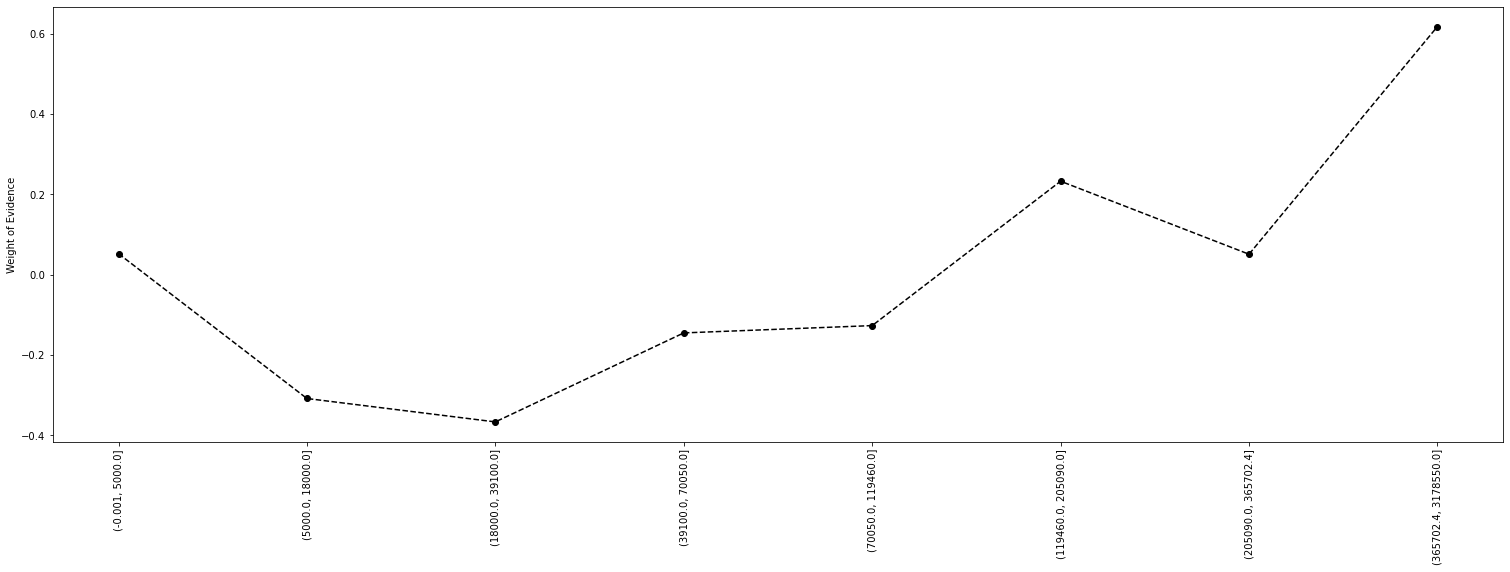

In [72]:

plot_by_woe(woe_num(Train,'loanCreditSum_fine', 'GBFlag'), 90)

In [73]:
## Coarse classing loanCreditSum variable
bins = [0, 5001, 119461, 205091, 365703, np.inf]
Train['loanCreditSum_grped'] = pd.cut(Train['loanCreditSum'], bins, precision=0, include_lowest=True, right=False,)
Test['loanCreditSum_grped'] = pd.cut(Test['loanCreditSum'], bins, precision=0, include_lowest=True, right=False,)
Train['loanCreditSum_grped'].value_counts()

[5001.0, 119461.0)      1095
[0.0, 5001.0)            874
[365703.0, inf)          282
[119461.0, 205091.0)     281
[205091.0, 365703.0)     281
Name: loanCreditSum_grped, dtype: int64

In [74]:
woe_cat(Train, 'loanCreditSum_grped', 'GBFlag')

GBFlag                Bad  Good  Freq    Proptn    % Good     % Bad  Bad Rate  \
loanCreditSum_grped                                                             
[365703.0, inf)        47   235   282  0.100249  0.114634  0.061599  0.166667   
[119461.0, 205091.0)   64   217   281  0.099893  0.105854  0.083879  0.227758   
[205091.0, 365703.0)   73   208   281  0.099893  0.101463  0.095675  0.259786   
[0.0, 5001.0)         228   646   874  0.310700  0.315122  0.298820  0.260870   
[5001.0, 119461.0)    351   744  1095  0.389264  0.362927  0.460026  0.320548   

GBFlag                GoodBaddOdds       WOE  class IV  Variable IV  
loanCreditSum_grped                                                  
[365703.0, inf)               5.00 -0.621101  0.032940      0.06228  
[119461.0, 205091.0)          3.39 -0.232677  0.005113      0.06228  
[205091.0, 365703.0)          2.85 -0.058742  0.000340      0.06228  
[0.0, 5001.0)                 2.83 -0.053117  0.000866      0.06228  
[5001.0, 119461.0)            2.12  0.237082  0.023021      0.06228

### Loan Repayment count

In [75]:
# Fine Classsing (loanRepaymentsCount)
Train['loanRepaymentsCount_fine'] = pd.qcut(Train['loanRepaymentsCount'], q=10, duplicates='drop')
woe_num(Train,'loanRepaymentsCount_fine', 'GBFlag')


GBFlag                    Bad  Good  Freq  Percentage  % Good  % Bad  \
loanRepaymentsCount_fine                                               
(-0.001, 1.0]             206   509   715        25.4    24.8   27.0   
(1.0, 2.0]                 62   144   206         7.3     7.0    8.1   
(2.0, 4.0]                 83   221   304        10.8    10.8   10.9   
(4.0, 6.0]                 57   178   235         8.4     8.7    7.5   
(6.0, 9.0]                 63   204   267         9.5    10.0    8.3   
(9.0, 13.0]                74   218   292        10.4    10.6    9.7   
(13.0, 18.0]               68   179   247         8.8     8.7    8.9   
(18.0, 30.0]               83   193   276         9.8     9.4   10.9   
(30.0, 723.0]              67   204   271         9.6    10.0    8.8   

GBFlag                    Bad Rate  GoodBaddOdds       WOE        IV  
loanRepaymentsCount_fine                                              
(-0.001, 1.0]                 28.8          2.47 -0.084993  0.186985  
(1.0, 2.0]                    30.1          2.32 -0.145954  0.160549  
(2.0, 4.0]                    27.3          2.66 -0.009217  0.000922  
(4.0, 6.0]                    24.3          3.12  0.148420  0.178104  
(6.0, 9.0]                    23.6          3.24  0.186330  0.316760  
(9.0, 13.0]                   25.3          2.95  0.088728  0.079855  
(13.0, 18.0]                  27.5          2.63 -0.022728  0.004546  
(18.0, 30.0]                  30.1          2.33 -0.148053  0.222080  
(30.0, 723.0]                 24.7          3.04  0.127833  0.153400

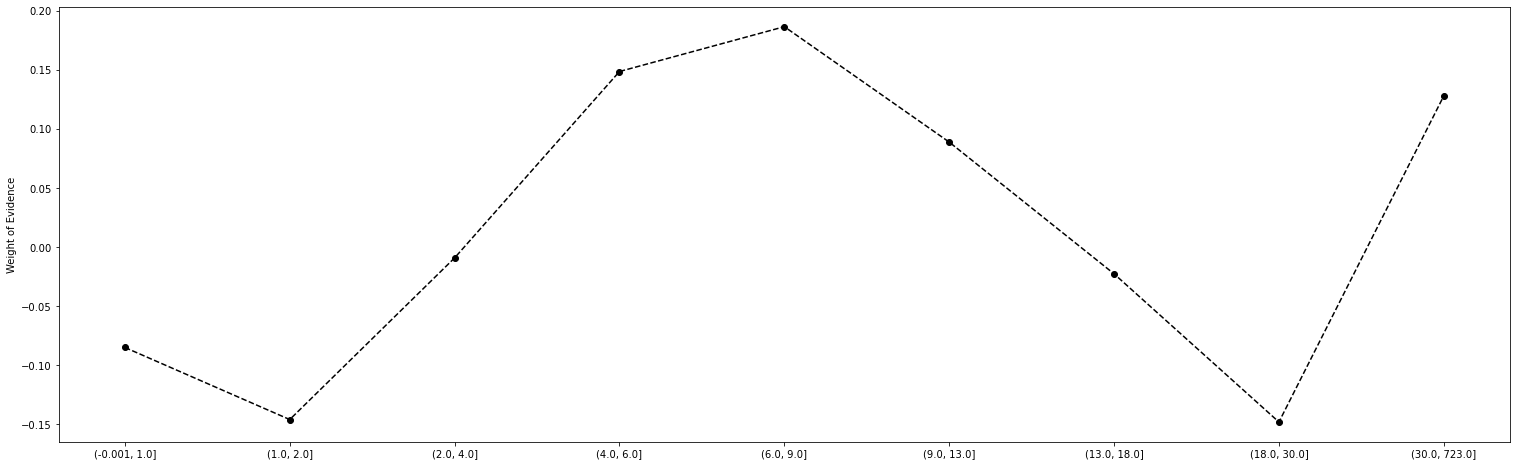

In [76]:
plot_by_woe(woe_num(Train,'loanRepaymentsCount_fine', 'GBFlag'))

In [77]:
## Coarse classing loanRepaymentsCount variable
bins = [0, 4.1, 13.1, 30.1,  np.inf]
Train['loanRepaymentsCount_grped'] = pd.cut(Train['loanRepaymentsCount'], bins, precision=0, include_lowest=True, right=False,)
Test['loanRepaymentsCount_grped'] = pd.cut(Test['loanRepaymentsCount'], bins, precision=0, include_lowest=True, right=False,)
Train['loanRepaymentsCount_grped'].value_counts()

[0.0, 4.0)      1225
[4.0, 13.0)      794
[13.0, 30.0)     523
[30.0, inf)      271
Name: loanRepaymentsCount_grped, dtype: int64

In [78]:
woe_cat(Train, 'loanRepaymentsCount_grped', 'GBFlag')

GBFlag                     Bad  Good  Freq    Proptn    % Good     % Bad  \
loanRepaymentsCount_grped                                                  
[4.0, 13.0)                194   600   794  0.282261  0.292683  0.254260   
[30.0, inf)                 67   204   271  0.096338  0.099512  0.087811   
[0.0, 4.0)                 351   874  1225  0.435478  0.426341  0.460026   
[13.0, 30.0)               151   372   523  0.185923  0.181463  0.197903   

GBFlag                     Bad Rate  GoodBaddOdds       WOE  class IV  \
loanRepaymentsCount_grped                                               
[4.0, 13.0)                0.244332          3.09 -0.140734  0.005407   
[30.0, inf)                0.247232          3.04 -0.125090  0.001464   
[0.0, 4.0)                 0.286531          2.49  0.076043  0.002561   
[13.0, 30.0)               0.288719          2.46  0.086723  0.001426   

GBFlag                     Variable IV  
loanRepaymentsCount_grped               
[4.0, 13.0)                   0.010858  
[30.0, inf)                   0.010858  
[0.0, 4.0)                    0.010858  
[13.0, 30.0)                  0.010858

### Loan Repayment Sum

In [79]:

# Fine Classsing (loanRepaymentSum)
Train['loanRepaymentSum_fine'] = pd.qcut(Train['loanRepaymentSum'], q=10, duplicates='drop')
woe_num(Train,'loanRepaymentSum_fine', 'GBFlag')


GBFlag                     Bad  Good  Freq  Percentage  % Good  % Bad  \
loanRepaymentSum_fine                                                   
(-0.001, 2040.14]          163   400   563        20.0    19.5   21.4   
(2040.14, 11000.0]         100   183   283        10.1     8.9   13.1   
(11000.0, 26098.248]        82   197   279         9.9     9.6   10.7   
(26098.248, 49286.0]        75   207   282        10.0    10.1    9.8   
(49286.0, 80203.422]        87   194   281        10.0     9.5   11.4   
(80203.422, 132547.868]     72   209   281        10.0    10.2    9.4   
(132547.868, 218618.594]    67   214   281        10.0    10.4    8.8   
(218618.594, 382195.028]    61   220   281        10.0    10.7    8.0   
(382195.028, 31882164.56]   56   226   282        10.0    11.0    7.3   

GBFlag                     Bad Rate  GoodBaddOdds       WOE        IV  
loanRepaymentSum_fine                                                  
(-0.001, 2040.14]              29.0          2.45 -0.092976  0.176655  
(2040.14, 11000.0]             35.3          1.83 -0.386561  1.623556  
(11000.0, 26098.248]           29.4          2.40 -0.108481  0.119329  
(26098.248, 49286.0]           26.6          2.76  0.030153  0.009046  
(49286.0, 80203.422]           31.0          2.23 -0.182322  0.346411  
(80203.422, 132547.868]        25.6          2.90  0.081678  0.065342  
(132547.868, 218618.594]       23.8          3.19  0.167054  0.267287  
(218618.594, 382195.028]       21.7          3.61  0.290802  0.785166  
(382195.028, 31882164.56]      19.9          4.04  0.410021  1.517077

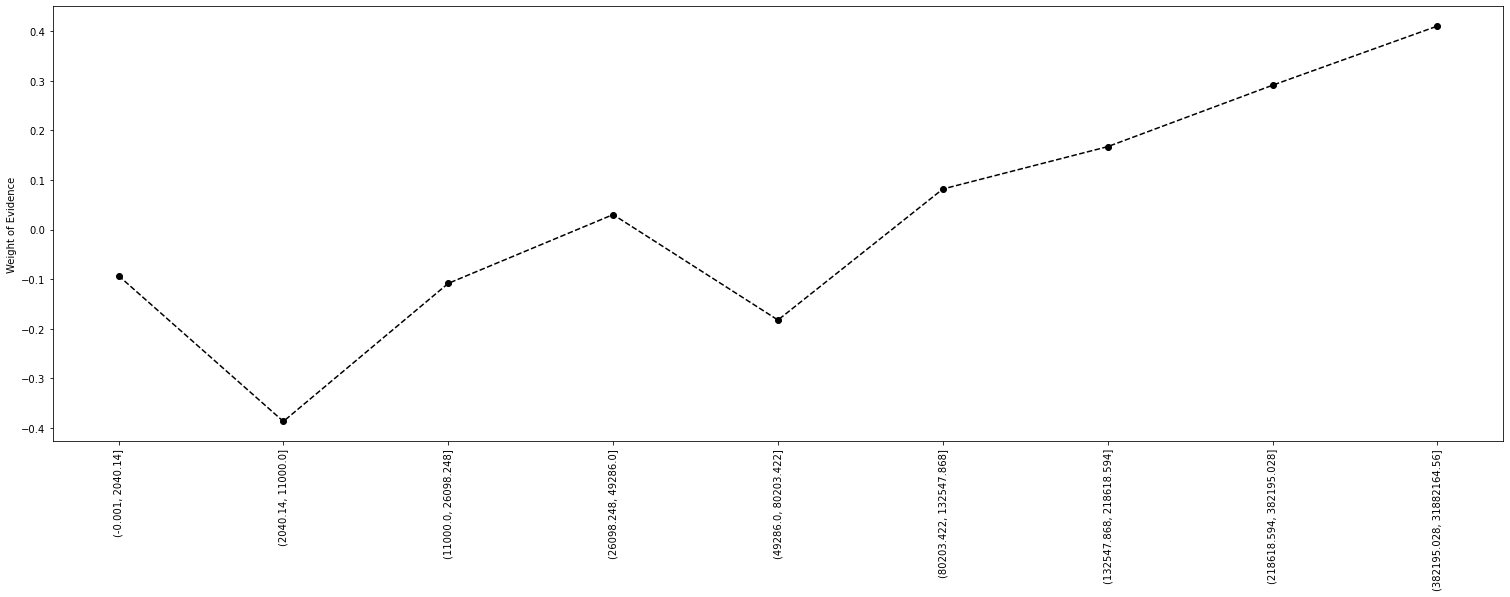

In [80]:
plot_by_woe(woe_num(Train,'loanRepaymentSum_fine', 'GBFlag'), 90)

In [81]:
# Coarse classing loanRepaymentSum variable

bins = [0, 2041, 26098.3, 80204, 218618.6,  np.inf]
Train['loanRepaymentSum_grped'] = pd.cut(Train['loanRepaymentSum'], bins, precision=0, include_lowest=True, right=False,)
Test['loanRepaymentSum_grped'] = pd.cut(Test['loanRepaymentSum'], bins, precision=0, include_lowest=True, right=False,)
Train['loanRepaymentSum_grped'].value_counts()

[0.0, 2041.0)          563
[26098.0, 80204.0)     563
[218619.0, inf)        563
[2041.0, 26098.0)      562
[80204.0, 218619.0)    562
Name: loanRepaymentSum_grped, dtype: int64

In [82]:
woe_cat(Train, 'loanRepaymentSum_grped' , 'GBFlag')

GBFlag                  Bad  Good  Freq    Proptn    % Good     % Bad  \
loanRepaymentSum_grped                                                  
[218619.0, inf)         117   446   563  0.200142  0.217561  0.153342   
[80204.0, 218619.0)     139   423   562  0.199787  0.206341  0.182176   
[26098.0, 80204.0)      162   401   563  0.200142  0.195610  0.212320   
[0.0, 2041.0)           163   400   563  0.200142  0.195122  0.213630   
[2041.0, 26098.0)       182   380   562  0.199787  0.185366  0.238532   

GBFlag                  Bad Rate  GoodBaddOdds       WOE  class IV  \
loanRepaymentSum_grped                                               
[218619.0, inf)         0.207815          3.81 -0.349808  0.022464   
[80204.0, 218619.0)     0.247331          3.04 -0.124561  0.003010   
[26098.0, 80204.0)      0.287744          2.48  0.081972  0.001370   
[0.0, 2041.0)           0.289520          2.45  0.090623  0.001677   
[2041.0, 26098.0)       0.323843          2.09  0.252172  0.013407   

GBFlag                  Variable IV  
loanRepaymentSum_grped               
[218619.0, inf)            0.041929  
[80204.0, 218619.0)        0.041929  
[26098.0, 80204.0)         0.041929  
[0.0, 2041.0)              0.041929  
[2041.0, 26098.0)          0.041929

### 2MinNumCreditWk

In [83]:
#Fine Classsing (2MinNumCreditWk)
Train['2MinNumCreditWk_fine'] = pd.qcut(Train['2MinNumCreditWk'], q=10, duplicates='drop')
woe_num(Train,'2MinNumCreditWk_fine', 'GBFlag')

GBFlag                Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
2MinNumCreditWk_fine                                                         
(-0.001, 1.0]         295   872  1167        41.5    42.5   38.7      25.3   
(1.0, 2.0]            165   355   520        18.5    17.3   21.6      31.7   
(2.0, 3.0]             82   229   311        11.1    11.2   10.7      26.4   
(3.0, 5.0]            110   280   390        13.9    13.7   14.4      28.2   
(5.0, 7.0]             47   107   154         5.5     5.2    6.2      30.5   
(7.0, 97.0]            64   207   271         9.6    10.1    8.4      23.6   

GBFlag                GoodBaddOdds       WOE        IV  
2MinNumCreditWk_fine                                    
(-0.001, 1.0]                 2.96  0.093664  0.355925  
(1.0, 2.0]                    2.15 -0.221987  0.954543  
(2.0, 3.0]                    2.79  0.045670  0.022835  
(3.0, 5.0]                    2.55 -0.049832  0.034883  
(5.0, 7.0]                    2.28 -0.175891  0.175891  
(7.0, 97.0]                   3.23  0.184304  0.313316

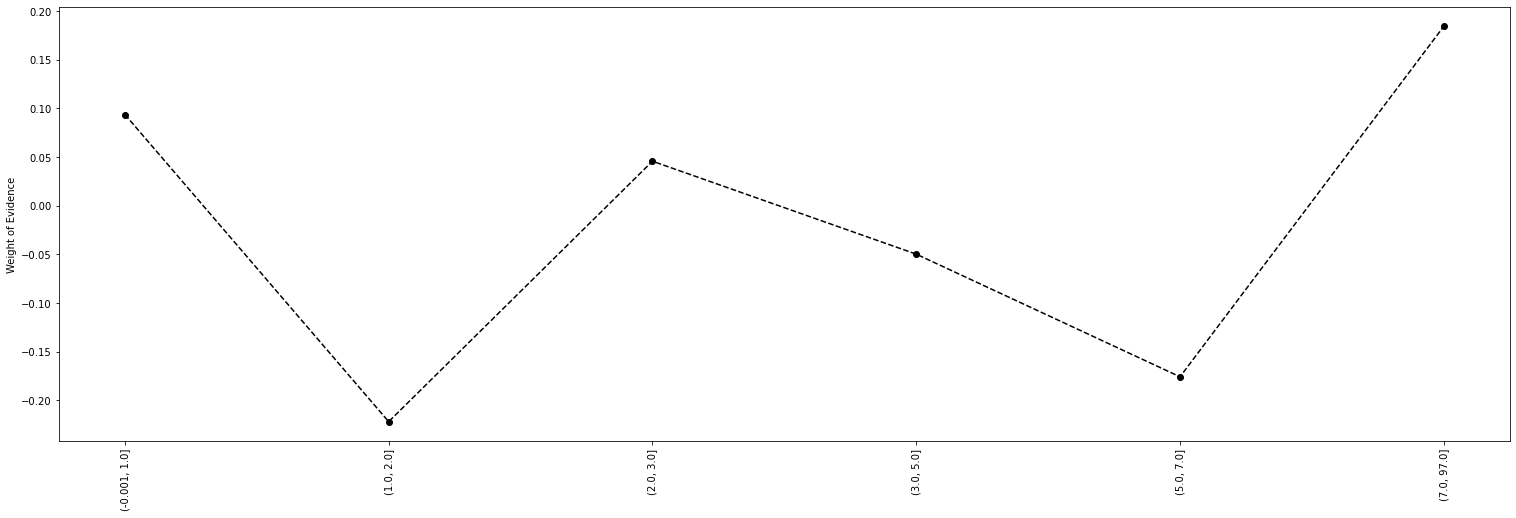

In [84]:
plot_by_woe(woe_num(Train,'2MinNumCreditWk_fine', 'GBFlag'), 90)

In [85]:

## Coarse classing 2MinNumCreditWk variable
bins = [0, 1.1, 2.1, 3.1, 7.1, np.inf]

Train['2MinNumCreditWk_grped'] = pd.cut(Train['2MinNumCreditWk'], bins, precision=0, include_lowest=True, right=False,)

Test['2MinNumCreditWk_grped'] = pd.cut(Test['2MinNumCreditWk'], bins, precision=0, include_lowest=True, right=False,)

Train['2MinNumCreditWk_grped'].value_counts()

[0.0, 1.0)    1167
[3.0, 7.0)     544
[1.0, 2.0)     520
[2.0, 3.0)     311
[7.0, inf)     271
Name: 2MinNumCreditWk_grped, dtype: int64

In [86]:
woe_cat(Train, '2MinNumCreditWk_fine', 'GBFlag')

GBFlag                Bad  Good  Freq    Proptn    % Good     % Bad  Bad Rate  \
2MinNumCreditWk_fine                                                            
(7.0, 97.0]            64   207   271  0.096338  0.100976  0.083879  0.236162   
(-0.001, 1.0]         295   872  1167  0.414860  0.425366  0.386632  0.252785   
(2.0, 3.0]             82   229   311  0.110558  0.111707  0.107471  0.263666   
(3.0, 5.0]            110   280   390  0.138642  0.136585  0.144168  0.282051   
(5.0, 7.0]             47   107   154  0.054746  0.052195  0.061599  0.305195   
(1.0, 2.0]            165   355   520  0.184856  0.173171  0.216252  0.317308   

GBFlag                GoodBaddOdds       WOE  class IV  Variable IV  
2MinNumCreditWk_fine                                                 
(7.0, 97.0]                   3.23 -0.185499  0.003171     0.018572  
(-0.001, 1.0]                 2.96 -0.095477  0.003698     0.018572  
(2.0, 3.0]                    2.79 -0.038666  0.000164     0.018572  
(3.0, 5.0]                    2.55  0.054028  0.000410     0.018572  
(5.0, 7.0]                    2.28  0.165656  0.001558     0.018572  
(1.0, 2.0]                    2.15  0.222165  0.009571     0.018572

### 2MinCreditWk

In [87]:
#Fine Classsing (2MinCreditWk)
Train['2MinCreditWk_fine'] = pd.qcut(Train['2MinCreditWk'], q=10, duplicates='drop')
woe_num(Train,'2MinCreditWk_fine', 'GBFlag')


GBFlag                Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
2MinCreditWk_fine                                                            
(-0.001, 1000.0]      142   435   577        20.5    21.2   18.6      24.6   
(1000.0, 4000.0]      106   188   294        10.5     9.2   13.9      36.1   
(4000.0, 7000.0]       81   180   261         9.3     8.8   10.6      31.0   
(7000.0, 11550.0]      80   195   275         9.8     9.5   10.5      29.1   
(11550.0, 18110.0]     84   197   281        10.0     9.6   11.0      29.9   
(18110.0, 29340.0]     88   193   281        10.0     9.4   11.5      31.3   
(29340.0, 46753.722]   74   207   281        10.0    10.1    9.7      26.3   
(46753.722, 93121.6]   64   217   281        10.0    10.6    8.4      22.8   
(93121.6, 2279170.0]   44   238   282        10.0    11.6    5.8      15.6   

GBFlag                GoodBaddOdds       WOE        IV  
2MinCreditWk_fine                                       
(-0.001, 1000.0]              3.06  0.130840  0.340183  
(1000.0, 4000.0]              1.77 -0.412685  1.939621  
(4000.0, 7000.0]              2.22 -0.186102  0.334984  
(7000.0, 11550.0]             2.44 -0.100083  0.100083  
(11550.0, 18110.0]            2.35 -0.136132  0.190585  
(18110.0, 29340.0]            2.19 -0.201637  0.423438  
(29340.0, 46753.722]          2.80  0.040410  0.016164  
(46753.722, 93121.6]          3.39  0.232622  0.511769  
(93121.6, 2279170.0]          5.41  0.693147  4.020254

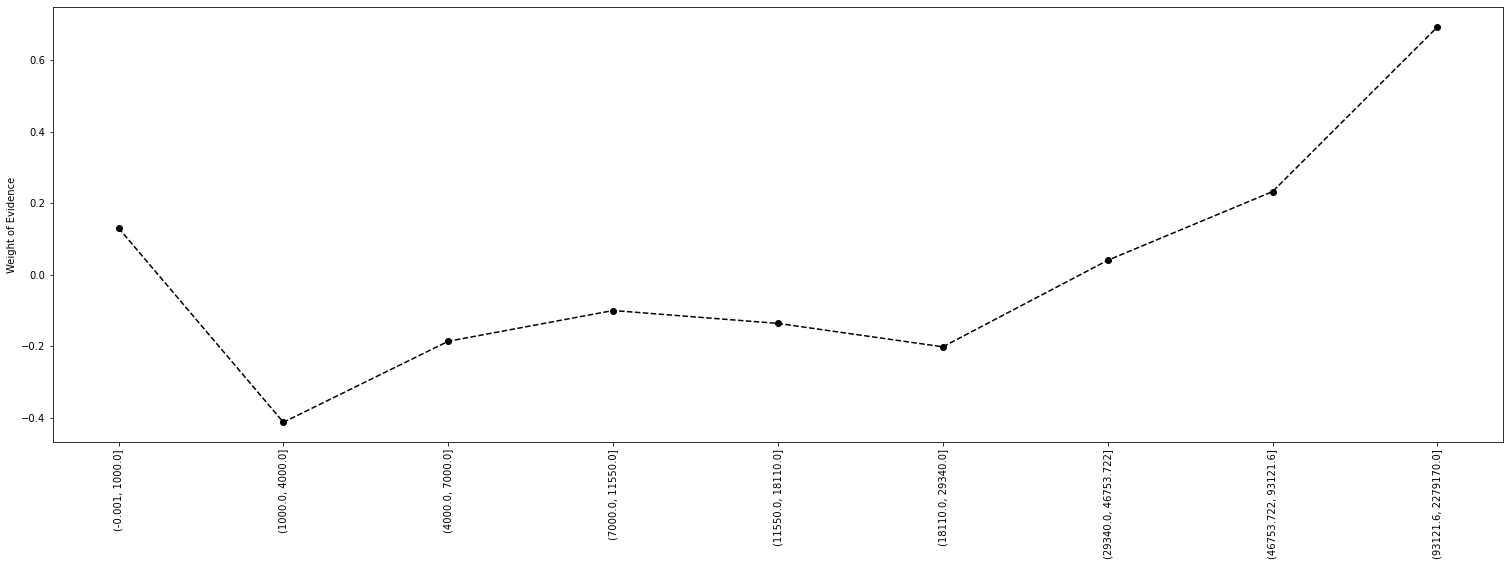

In [88]:
plot_by_woe(woe_num(Train,'2MinCreditWk_fine', 'GBFlag'), 90)

In [89]:
## Coarse classing 2MinCreditWk variable
bins = [0, 1001, 4001, 29341, 93122,  np.inf]

Train['2MinCreditWk_grped'] = pd.cut(Train['2MinCreditWk'], bins, precision=0, include_lowest=True, right=False,)

Test['2MinCreditWk_grped'] = pd.cut(Test['2MinCreditWk'], bins, precision=0, include_lowest=True, right=False,)

Train['2MinCreditWk_grped'].value_counts()

[4001.0, 29341.0)     1098
[0.0, 1001.0)          577
[29341.0, 93122.0)     562
[1001.0, 4001.0)       294
[93122.0, inf)         282
Name: 2MinCreditWk_grped, dtype: int64

In [90]:
woe_cat(Train,'2MinCreditWk_grped', 'GBFlag' )

GBFlag              Bad  Good  Freq    Proptn    % Good     % Bad  Bad Rate  \
2MinCreditWk_grped                                                            
[93122.0, inf)       44   238   282  0.100249  0.116098  0.057667  0.156028   
[29341.0, 93122.0)  138   424   562  0.199787  0.206829  0.180865  0.245552   
[0.0, 1001.0)       142   435   577  0.205119  0.212195  0.186107  0.246101   
[4001.0, 29341.0)   333   765  1098  0.390331  0.373171  0.436435  0.303279   
[1001.0, 4001.0)    106   188   294  0.104515  0.091707  0.138925  0.360544   

GBFlag              GoodBaddOdds       WOE  class IV  Variable IV  
2MinCreditWk_grped                                                 
[93122.0, inf)              5.41 -0.699744  0.040886      0.07731  
[29341.0, 93122.0)          3.07 -0.134143  0.003483      0.07731  
[0.0, 1001.0)               3.06 -0.131182  0.003422      0.07731  
[4001.0, 29341.0)           2.30  0.156604  0.009907      0.07731  
[1001.0, 4001.0)            1.77  0.415334  0.019611      0.07731

### Agency_Banking_Count_1

In [91]:
#Fine Classsing (Agency_Banking_Count_1)
Train['Agency_Banking_Count_1_fine'] = pd.qcut(Train['Agency_Banking_Count_1'], q=10, duplicates='drop')
woe_num(Train,'Agency_Banking_Count_1_fine', 'GBFlag')


GBFlag                       Bad  Good  Freq  Percentage  % Good  % Bad  \
Agency_Banking_Count_1_fine                                               
(-0.001, 1.0]                289   842  1131        40.2    41.1   37.9   
(1.0, 3.0]                   144   396   540        19.2    19.3   18.9   
(3.0, 4.0]                    48   124   172         6.1     6.0    6.3   
(4.0, 5.0]                    44   100   144         5.1     4.9    5.8   
(5.0, 8.0]                    81   210   291        10.3    10.2   10.6   
(8.0, 14.0]                   81   182   263         9.3     8.9   10.6   
(14.0, 143.0]                 76   196   272         9.7     9.6   10.0   

GBFlag                       Bad Rate  GoodBaddOdds       WOE        IV  
Agency_Banking_Count_1_fine                                              
(-0.001, 1.0]                    25.6          2.91  0.081057  0.259382  
(1.0, 3.0]                       26.7          2.75  0.020943  0.008377  
(3.0, 4.0]                       27.9          2.58 -0.048790  0.014637  
(4.0, 5.0]                       30.6          2.27 -0.168623  0.151760  
(5.0, 8.0]                       27.8          2.59 -0.038466  0.015387  
(8.0, 14.0]                      30.8          2.25 -0.174803  0.297165  
(14.0, 143.0]                    27.9          2.58 -0.040822  0.016329

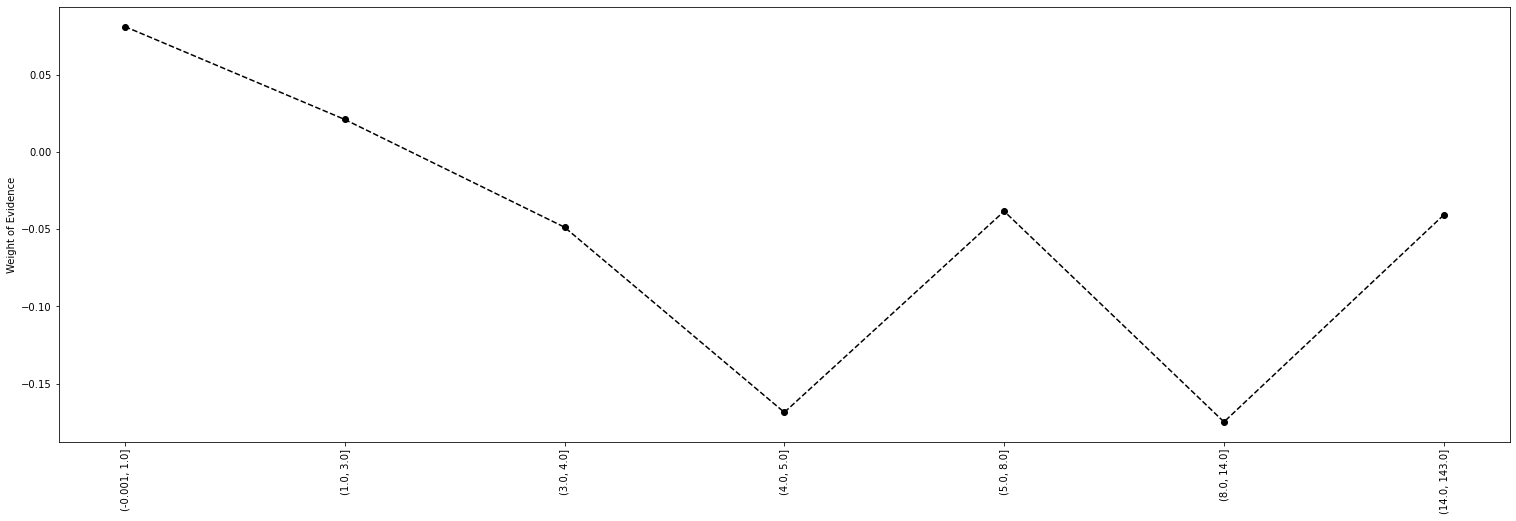

In [92]:

plot_by_woe(woe_num(Train,'Agency_Banking_Count_1_fine', 'GBFlag'), 90)

In [93]:
## Coarse classing Agency_Banking_Count_1 variable
bins = [0,1.1,3.1, 8.1, np.inf]

Train['Agency_Banking_Count_1_grped'] = pd.cut(Train['Agency_Banking_Count_1'], bins, precision=0, include_lowest=True, right=False,)

Test['Agency_Banking_Count_1_grped'] = pd.cut(Test['Agency_Banking_Count_1'], bins, precision=0, include_lowest=True, right=False,)

Train['Agency_Banking_Count_1_grped'].value_counts()

[0.0, 1.0)    1131
[3.0, 8.0)     607
[1.0, 3.0)     540
[8.0, inf)     535
Name: Agency_Banking_Count_1_grped, dtype: int64

In [94]:
woe_cat(Train, 'Agency_Banking_Count_1_grped', 'GBFlag')

GBFlag                        Bad  Good  Freq    Proptn    % Good     % Bad  \
Agency_Banking_Count_1_grped                                                  
[0.0, 1.0)                    289   842  1131  0.402062  0.410732  0.378768   
[1.0, 3.0)                    144   396   540  0.191966  0.193171  0.188729   
[3.0, 8.0)                    173   434   607  0.215784  0.211707  0.226737   
[8.0, inf)                    157   378   535  0.190188  0.184390  0.205767   

GBFlag                        Bad Rate  GoodBaddOdds       WOE  class IV  \
Agency_Banking_Count_1_grped                                               
[0.0, 1.0)                    0.255526          2.91 -0.081016  0.002590   
[1.0, 3.0)                    0.266667          2.75 -0.023264  0.000103   
[3.0, 8.0)                    0.285008          2.51  0.068584  0.001031   
[8.0, inf)                    0.293458          2.41  0.109689  0.002345   

GBFlag                        Variable IV  
Agency_Banking_Count_1_grped               
[0.0, 1.0)                       0.006068  
[1.0, 3.0)                       0.006068  
[3.0, 8.0)                       0.006068  
[8.0, inf)                       0.006068

### Agency_Banking_Count_2

In [95]:
#Fine Classsing (Agency_Banking_Count_2)
Train['Agency_Banking_Count_2_fine'] = pd.qcut(Train['Agency_Banking_Count_2'], q=10, duplicates='drop')
woe_num(Train,'Agency_Banking_Count_2_fine', 'GBFlag')


GBFlag                       Bad  Good  Freq  Percentage  % Good  % Bad  \
Agency_Banking_Count_2_fine                                               
(-0.001, 1.0]                214   580   794        28.2    28.3   28.0   
(1.0, 2.0]                    49   158   207         7.4     7.7    6.4   
(2.0, 3.0]                    54   122   176         6.3     6.0    7.1   
(3.0, 5.0]                    80   264   344        12.2    12.9   10.5   
(5.0, 7.0]                    63   173   236         8.4     8.4    8.3   
(7.0, 10.0]                   81   211   292        10.4    10.3   10.6   
(10.0, 13.0]                  50   156   206         7.3     7.6    6.6   
(13.0, 22.0]                  85   213   298        10.6    10.4   11.1   
(22.0, 220.0]                 87   173   260         9.2     8.4   11.4   

GBFlag                       Bad Rate  GoodBaddOdds       WOE        IV  
Agency_Banking_Count_2_fine                                              
(-0.001, 1.0]                    27.0          2.71  0.010657  0.003197  
(1.0, 2.0]                       23.7          3.22  0.184922  0.240399  
(2.0, 3.0]                       30.7          2.26 -0.168335  0.185169  
(3.0, 5.0]                       23.3          3.30  0.205852  0.494045  
(5.0, 7.0]                       26.7          2.75  0.011976  0.001198  
(7.0, 10.0]                      27.7          2.60 -0.028710  0.008613  
(10.0, 13.0]                     24.3          3.12  0.141079  0.141079  
(13.0, 22.0]                     28.5          2.51 -0.065139  0.045598  
(22.0, 220.0]                    33.5          1.99 -0.305382  0.916145

In [96]:
## Coarse classing Agency_Banking_Count_2 variable
bins = [0, 1.1, 2.1, 3.1, 5.1, 10.1, 13.1,    np.inf]

Train['Agency_Banking_Count_2_grped'] = pd.cut(Train['Agency_Banking_Count_2'], bins, precision=0, include_lowest=True, right=False,)

Test['Agency_Banking_Count_2_grped'] = pd.cut(Test['Agency_Banking_Count_2'], bins, precision=0, include_lowest=True, right=False,)

Train['Agency_Banking_Count_2_grped'].value_counts()

[0.0, 1.0)      794
[13.0, inf)     558
[5.0, 10.0)     528
[3.0, 5.0)      344
[1.0, 2.0)      207
[10.0, 13.0)    206
[2.0, 3.0)      176
Name: Agency_Banking_Count_2_grped, dtype: int64

In [97]:
woe_cat(Train, 'Agency_Banking_Count_2_grped', 'GBFlag')

GBFlag                        Bad  Good  Freq    Proptn    % Good     % Bad  \
Agency_Banking_Count_2_grped                                                  
[3.0, 5.0)                     80   264   344  0.122289  0.128780  0.104849   
[1.0, 2.0)                     49   158   207  0.073587  0.077073  0.064220   
[10.0, 13.0)                   50   156   206  0.073231  0.076098  0.065531   
[0.0, 1.0)                    214   580   794  0.282261  0.282927  0.280472   
[5.0, 10.0)                   144   384   528  0.187700  0.187317  0.188729   
[2.0, 3.0)                     54   122   176  0.062567  0.059512  0.070773   
[13.0, inf)                   172   386   558  0.198365  0.188293  0.225426   

GBFlag                        Bad Rate  GoodBaddOdds       WOE  class IV  \
Agency_Banking_Count_2_grped                                               
[3.0, 5.0)                    0.232558          3.30 -0.205585  0.004920   
[1.0, 2.0)                    0.236715          3.22 -0.182438  0.002345   
[10.0, 13.0)                  0.242718          3.12 -0.149496  0.001580   
[0.0, 1.0)                    0.269521          2.71 -0.008715  0.000021   
[5.0, 10.0)                   0.272727          2.67  0.007508  0.000011   
[2.0, 3.0)                    0.306818          2.26  0.173300  0.001952   
[13.0, inf)                   0.308244          2.24  0.179994  0.006684   

GBFlag                        Variable IV  
Agency_Banking_Count_2_grped               
[3.0, 5.0)                       0.017512  
[1.0, 2.0)                       0.017512  
[10.0, 13.0)                     0.017512  
[0.0, 1.0)                       0.017512  
[5.0, 10.0)                      0.017512  
[2.0, 3.0)                       0.017512  
[13.0, inf)                      0.017512

### Agency_Banking_Count_3


In [98]:
#Fine Classsing (Agency_Banking_Count_3)
Train['Agency_Banking_Count_3_fine'] = pd.qcut(Train['Agency_Banking_Count_3'], q=10, duplicates='drop')
woe_num(Train,'Agency_Banking_Count_3_fine', 'GBFlag')


GBFlag                       Bad  Good  Freq  Percentage  % Good  % Bad  \
Agency_Banking_Count_3_fine                                               
(-0.001, 1.0]                249   713   962        34.2    34.8   32.6   
(1.0, 2.0]                    69   168   237         8.4     8.2    9.0   
(2.0, 4.0]                    96   288   384        13.7    14.0   12.6   
(4.0, 5.0]                    51   125   176         6.3     6.1    6.7   
(5.0, 7.0]                    64   169   233         8.3     8.2    8.4   
(7.0, 10.0]                   73   209   282        10.0    10.2    9.6   
(10.0, 16.0]                  85   178   263         9.3     8.7   11.1   
(16.0, 280.0]                 76   200   276         9.8     9.8   10.0   

GBFlag                       Bad Rate  GoodBaddOdds       WOE        IV  
Agency_Banking_Count_3_fine                                              
(-0.001, 1.0]                    25.9          2.86  0.065305  0.143671  
(1.0, 2.0]                       29.1          2.43 -0.093090  0.074472  
(2.0, 4.0]                       25.0          3.00  0.105361  0.147505  
(4.0, 5.0]                       29.0          2.45 -0.093819  0.056291  
(5.0, 7.0]                       27.5          2.64 -0.024098  0.004820  
(7.0, 10.0]                      25.9          2.86  0.060625  0.036375  
(10.0, 16.0]                     32.3          2.09 -0.243622  0.584693  
(16.0, 280.0]                    27.5          2.63 -0.020203  0.004041

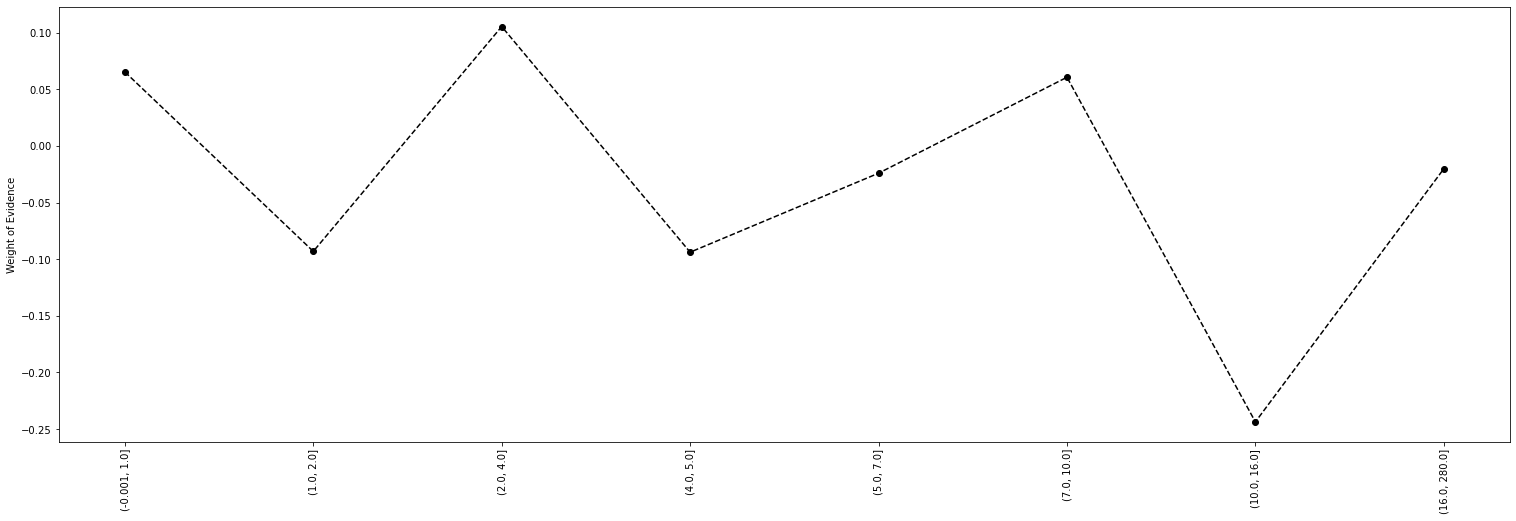

In [99]:
plot_by_woe(woe_num(Train,'Agency_Banking_Count_3_fine', 'GBFlag'), 90)


In [100]:

## Coarse classing Agency_Banking_Count_3 variable
bins = [0, 2.1, 4.1, 10.1,   np.inf]
Train['Agency_Banking_Count_3_grped'] = pd.cut(Train['Agency_Banking_Count_3'], bins, precision=0, include_lowest=True, right=False,)

Test['Agency_Banking_Count_3_grped'] = pd.cut(Test['Agency_Banking_Count_3'], bins, precision=0, include_lowest=True, right=False,)

Train['Agency_Banking_Count_3_grped'].value_counts()

[0.0, 2.0)     1199
[4.0, 10.0)     691
[10.0, inf)     539
[2.0, 4.0)      384
Name: Agency_Banking_Count_3_grped, dtype: int64

In [101]:
woe_cat(Train, 'Agency_Banking_Count_3_grped', 'GBFlag')

GBFlag                        Bad  Good  Freq    Proptn    % Good     % Bad  \
Agency_Banking_Count_3_grped                                                  
[2.0, 4.0)                     96   288   384  0.136509  0.140488  0.125819   
[0.0, 2.0)                    318   881  1199  0.426235  0.429756  0.416776   
[4.0, 10.0)                   188   503   691  0.245645  0.245366  0.246396   
[10.0, inf)                   161   378   539  0.191610  0.184390  0.211009   

GBFlag                        Bad Rate  GoodBaddOdds       WOE  class IV  \
Agency_Banking_Count_3_grped                                               
[2.0, 4.0)                    0.250000          3.00 -0.110275  0.001618   
[0.0, 2.0)                    0.265221          2.77 -0.030669  0.000398   
[4.0, 10.0)                   0.272069          2.68  0.004189  0.000004   
[10.0, inf)                   0.298701          2.35  0.134847  0.003589   

GBFlag                        Variable IV  
Agency_Banking_Count_3_grped               
[2.0, 4.0)                       0.005609  
[0.0, 2.0)                       0.005609  
[4.0, 10.0)                      0.005609  
[10.0, inf)                      0.005609

### Agency_Banking_Count_4

In [102]:
#Fine Classsing (Agency_Banking_Count_4)
Train['Agency_Banking_Count_4_fine'] = pd.qcut(Train['Agency_Banking_Count_4'], q=10, duplicates='drop')
woe_num(Train,'Agency_Banking_Count_4_fine', 'GBFlag')

GBFlag                       Bad  Good  Freq  Percentage  % Good  % Bad  \
Agency_Banking_Count_4_fine                                               
(-0.001, 1.0]                453  1184  1637        58.2    57.8   59.4   
(1.0, 2.0]                    73   212   285        10.1    10.3    9.6   
(2.0, 3.0]                    47   136   183         6.5     6.6    6.2   
(3.0, 5.0]                    68   163   231         8.2     8.0    8.9   
(5.0, 8.0]                    53   150   203         7.2     7.3    6.9   
(8.0, 127.0]                  69   205   274         9.7    10.0    9.0   

GBFlag                       Bad Rate  GoodBaddOdds       WOE        IV  
Agency_Banking_Count_4_fine                                              
(-0.001, 1.0]                    27.7          2.61 -0.027305  0.043689  
(1.0, 2.0]                       25.6          2.90  0.070381  0.049267  
(2.0, 3.0]                       25.7          2.89  0.062520  0.025008  
(3.0, 5.0]                       29.4          2.40 -0.106610  0.095949  
(5.0, 8.0]                       26.1          2.83  0.056353  0.022541  
(8.0, 127.0]                     25.2          2.97  0.105361  0.105361

In [103]:

## Coarse classing Agency_Banking_Count_4 variable
bins = [0, 1.1, 3.1, 5.1, np.inf]

Train['Agency_Banking_Count_4_grped'] = pd.cut(Train['Agency_Banking_Count_4'], bins, precision=0, include_lowest=True, right=False,)


Test['Agency_Banking_Count_4_grped'] = pd.cut(Test['Agency_Banking_Count_4'], bins, precision=0, include_lowest=True, right=False,)

Train['Agency_Banking_Count_4_grped'].value_counts()

[0.0, 1.0)    1637
[5.0, inf)     477
[1.0, 3.0)     468
[3.0, 5.0)     231
Name: Agency_Banking_Count_4_grped, dtype: int64

In [104]:
woe_cat(Train, 'Agency_Banking_Count_4_grped', 'GBFlag')

GBFlag                        Bad  Good  Freq    Proptn    % Good     % Bad  \
Agency_Banking_Count_4_grped                                                  
[5.0, inf)                    122   355   477  0.169570  0.173171  0.159895   
[1.0, 3.0)                    120   348   468  0.166370  0.169756  0.157274   
[0.0, 1.0)                    453  1184  1637  0.581941  0.577561  0.593709   
[3.0, 5.0)                     68   163   231  0.082119  0.079512  0.089122   

GBFlag                        Bad Rate  GoodBaddOdds       WOE  class IV  \
Agency_Banking_Count_4_grped                                               
[5.0, inf)                    0.255765          2.91 -0.079760  0.001059   
[1.0, 3.0)                    0.256410          2.90 -0.076374  0.000953   
[0.0, 1.0)                    0.276726          2.61  0.027575  0.000445   
[3.0, 5.0)                    0.294372          2.40  0.114095  0.001096   

GBFlag                        Variable IV  
Agency_Banking_Count_4_grped               
[5.0, inf)                       0.003554  
[1.0, 3.0)                       0.003554  
[0.0, 1.0)                       0.003554  
[3.0, 5.0)                       0.003554

### averageLoanRepayment

In [105]:
### averageLoanRepayment
#Fine Classsing)
Train['averageLoanRepayment_fine'] = pd.qcut(Train['averageLoanRepayment'], q=10, duplicates='drop')
woe_num(Train,'averageLoanRepayment_fine', 'GBFlag')

GBFlag                     Bad  Good  Freq  Percentage  % Good  % Bad  \
averageLoanRepayment_fine                                               
(-0.001, 501.3]            164   399   563        20.0    19.5   21.5   
(501.3, 2555.399]          100   181   281        10.0     8.8   13.1   
(2555.399, 6205.376]        79   202   281        10.0     9.9   10.4   
(6205.376, 11852.75]        74   208   282        10.0    10.1    9.7   
(11852.75, 19276.852]       89   192   281        10.0     9.4   11.7   
(19276.852, 32163.491]      75   206   281        10.0    10.0    9.8   
(32163.491, 52398.25]       66   215   281        10.0    10.5    8.7   
(52398.25, 92283.635]       58   223   281        10.0    10.9    7.6   
(92283.635, 7970541.14]     58   224   282        10.0    10.9    7.6   

GBFlag                     Bad Rate  GoodBaddOdds       WOE        IV  
averageLoanRepayment_fine                                              
(-0.001, 501.3]                29.1          2.43 -0.097638  0.195277  
(501.3, 2555.399]              35.6          1.81 -0.397861  1.710800  
(2555.399, 6205.376]           28.1          2.56 -0.049271  0.024636  
(6205.376, 11852.75]           26.2          2.81  0.040410  0.016164  
(11852.75, 19276.852]          31.7          2.16 -0.218879  0.503422  
(19276.852, 32163.491]         26.7          2.75  0.020203  0.004041  
(32163.491, 52398.25]          23.5          3.26  0.188052  0.338494  
(52398.25, 92283.635]          20.6          3.84  0.360615  1.190028  
(92283.635, 7970541.14]        20.6          3.86  0.360615  1.190028

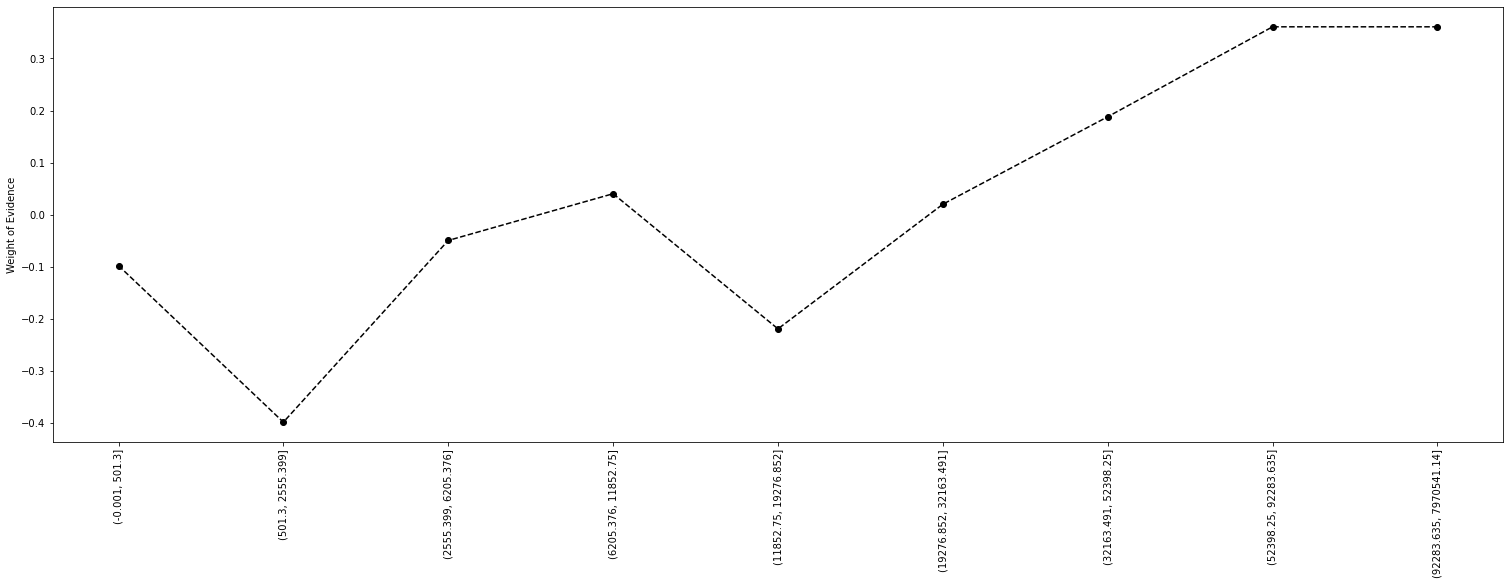

In [106]:

plot_by_woe(woe_num(Train,'averageLoanRepayment_fine', 'GBFlag'), 90)


In [107]:

## Coarse classing averageLoanRepayment variable
bins = [0, 502, 2556, 11853, 19277, 52399, np.inf]

Train['averageLoanRepayment_grped'] = pd.cut(Train['averageLoanRepayment'], bins, precision=0, include_lowest=True, right=False,)

Test['averageLoanRepayment_grped'] = pd.cut(Test['averageLoanRepayment'], bins, precision=0, include_lowest=True, right=False,)

Train['averageLoanRepayment_grped'].value_counts()

[0.0, 502.0)          563
[2556.0, 11853.0)     563
[52399.0, inf)        563
[19277.0, 52399.0)    562
[502.0, 2556.0)       281
[11853.0, 19277.0)    281
Name: averageLoanRepayment_grped, dtype: int64

In [108]:
woe_cat(Train, 'averageLoanRepayment_grped', 'GBFlag')

GBFlag                      Bad  Good  Freq    Proptn    % Good     % Bad  \
averageLoanRepayment_grped                                                  
[52399.0, inf)              116   447   563  0.200142  0.218049  0.152031   
[19277.0, 52399.0)          141   421   562  0.199787  0.205366  0.184797   
[2556.0, 11853.0)           153   410   563  0.200142  0.200000  0.200524   
[0.0, 502.0)                164   399   563  0.200142  0.194634  0.214941   
[11853.0, 19277.0)           89   192   281  0.099893  0.093659  0.116645   
[502.0, 2556.0)             100   181   281  0.099893  0.088293  0.131062   

GBFlag                      Bad Rate  GoodBaddOdds       WOE  class IV  \
averageLoanRepayment_grped                                               
[52399.0, inf)              0.206039          3.85 -0.360631  0.023808   
[19277.0, 52399.0)          0.250890          2.99 -0.105536  0.002171   
[2556.0, 11853.0)           0.271758          2.68  0.002618  0.000001   
[0.0, 502.0)                0.291297          2.43  0.099242  0.002015   
[11853.0, 19277.0)          0.316726          2.16  0.219478  0.005045   
[502.0, 2556.0)             0.355872          1.81  0.395010  0.016894   

GBFlag                      Variable IV  
averageLoanRepayment_grped               
[52399.0, inf)                 0.049934  
[19277.0, 52399.0)             0.049934  
[2556.0, 11853.0)              0.049934  
[0.0, 502.0)                   0.049934  
[11853.0, 19277.0)             0.049934  
[502.0, 2556.0)                0.049934

### balanceMonth

In [109]:
### balanceMonth
#Fine Classsing)
Train['balanceMonth_fine'] = pd.qcut(Train['balanceMonth'], q=10, duplicates='drop')
woe_num(Train,'balanceMonth_fine', 'GBFlag')


GBFlag                      Bad  Good  Freq  Percentage  % Good  % Bad  \
balanceMonth_fine                                                        
(-279737.07899999997, 0.0]  105   277   382        13.6    13.5   13.8   
(0.0, 4742.821]              79   102   181         6.4     5.0   10.4   
(4742.821, 8509.596]        109   172   281        10.0     8.4   14.3   
(8509.596, 11332.285]        81   200   281        10.0     9.8   10.6   
(11332.285, 14894.646]       81   201   282        10.0     9.8   10.6   
(14894.646, 18840.774]       67   214   281        10.0    10.4    8.8   
(18840.774, 24589.144]       67   214   281        10.0    10.4    8.8   
(24589.144, 34504.712]       58   223   281        10.0    10.9    7.6   
(34504.712, 57936.545]       61   220   281        10.0    10.7    8.0   
(57936.545, 1995493.103]     55   227   282        10.0    11.1    7.2   

GBFlag                      Bad Rate  GoodBaddOdds       WOE        IV  
balanceMonth_fine                                                       
(-279737.07899999997, 0.0]      27.5          2.64 -0.021979  0.006594  
(0.0, 4742.821]                 43.6          1.29 -0.732368  3.954787  
(4742.821, 8509.596]            38.8          1.58 -0.532028  3.138964  
(8509.596, 11332.285]           28.8          2.47 -0.078472  0.062777  
(11332.285, 14894.646]          28.7          2.48 -0.078472  0.062777  
(14894.646, 18840.774]          23.8          3.19  0.167054  0.267287  
(18840.774, 24589.144]          23.8          3.19  0.167054  0.267287  
(24589.144, 34504.712]          20.6          3.84  0.360615  1.190028  
(34504.712, 57936.545]          21.7          3.61  0.290802  0.785166  
(57936.545, 1995493.103]        19.5          4.13  0.432864  1.688170

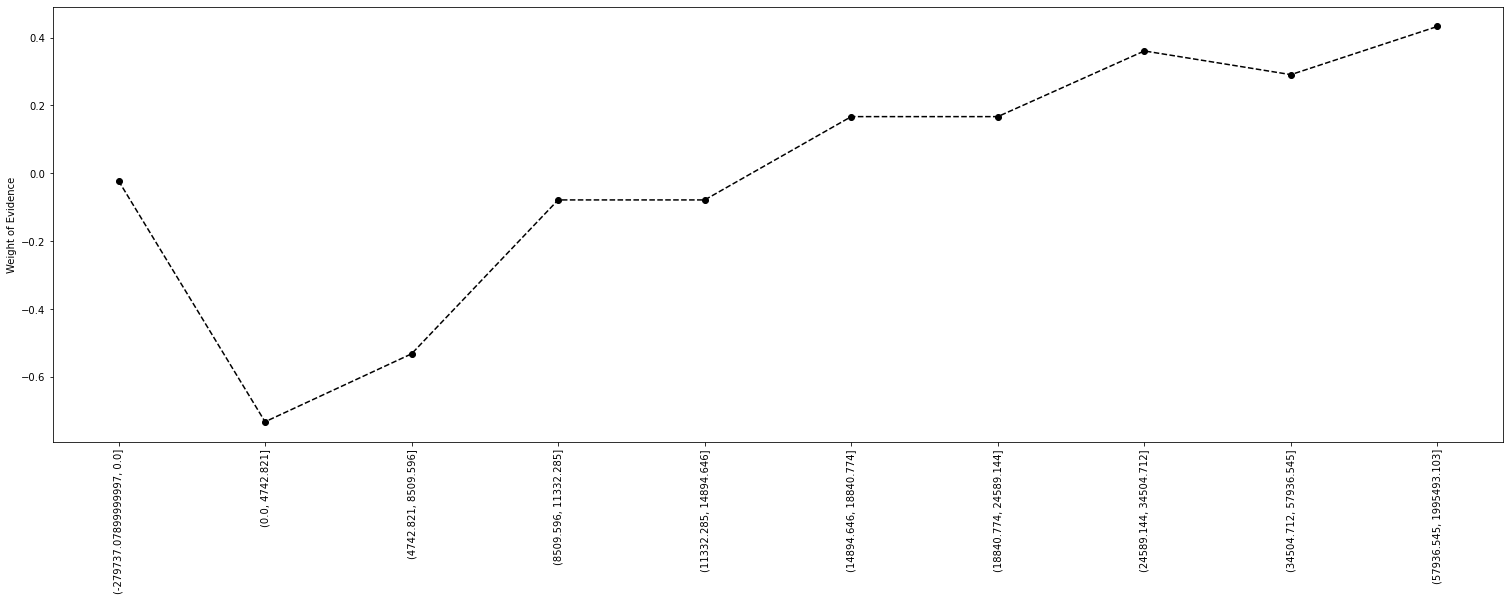

In [110]:

plot_by_woe(woe_num(Train,'balanceMonth_fine', 'GBFlag'), 90)


In [111]:


## Coarse classing balanceMonth variable
bins = [-np.inf, 0.1, 8510, 14895, 24590, np.inf]

Train['balanceMonth_grped'] = pd.cut(Train['balanceMonth'], bins, precision=0, include_lowest=True, right=False,)

Test['balanceMonth_grped'] = pd.cut(Test['balanceMonth'], bins, precision=0, include_lowest=True, right=False,)

Train['balanceMonth_grped'].value_counts()

[24590.0, inf)        844
[8510.0, 14895.0)     563
[14895.0, 24590.0)    562
[0.0, 8510.0)         462
[-inf, 0.0)           382
Name: balanceMonth_grped, dtype: int64

In [112]:
woe_cat(Train, 'balanceMonth_grped', 'GBFlag')

GBFlag              Bad  Good  Freq    Proptn    % Good     % Bad  Bad Rate  \
balanceMonth_grped                                                            
[24590.0, inf)      174   670   844  0.300036  0.326829  0.228047  0.206161   
[14895.0, 24590.0)  134   428   562  0.199787  0.208780  0.175623  0.238434   
[-inf, 0.0)         105   277   382  0.135798  0.135122  0.137615  0.274869   
[8510.0, 14895.0)   162   401   563  0.200142  0.195610  0.212320  0.287744   
[0.0, 8510.0)       188   274   462  0.164237  0.133659  0.246396  0.406926   

GBFlag              GoodBaddOdds       WOE  class IV  Variable IV  
balanceMonth_grped                                                 
[24590.0, inf)              3.85 -0.359885  0.035550     0.111656  
[14895.0, 24590.0)          3.19 -0.172946  0.005735     0.111656  
[-inf, 0.0)                 2.64  0.018280  0.000046     0.111656  
[8510.0, 14895.0)           2.48  0.081972  0.001370     0.111656  
[0.0, 8510.0)               1.46  0.611651  0.068956     0.111656

### bankChargesSum

In [113]:
### bankChargesSum
#Fine Classsing)
Train['bankChargesSum_fine'] = pd.qcut(Train['bankChargesSum'], q=10, duplicates='drop')
woe_num(Train,'bankChargesSum_fine', 'GBFlag')


GBFlag               Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
bankChargesSum_fine                                                         
(-0.001, 1.0]        206   509   715        25.4    24.8   27.0      28.8   
(1.0, 2.0]            62   144   206         7.3     7.0    8.1      30.1   
(2.0, 4.0]            83   221   304        10.8    10.8   10.9      27.3   
(4.0, 6.0]            57   178   235         8.4     8.7    7.5      24.3   
(6.0, 9.0]            63   204   267         9.5    10.0    8.3      23.6   
(9.0, 13.0]           74   218   292        10.4    10.6    9.7      25.3   
(13.0, 18.0]          68   179   247         8.8     8.7    8.9      27.5   
(18.0, 30.0]          83   193   276         9.8     9.4   10.9      30.1   
(30.0, 723.0]         67   204   271         9.6    10.0    8.8      24.7   

GBFlag               GoodBaddOdds       WOE        IV  
bankChargesSum_fine                                    
(-0.001, 1.0]                2.47 -0.084993  0.186985  
(1.0, 2.0]                   2.32 -0.145954  0.160549  
(2.0, 4.0]                   2.66 -0.009217  0.000922  
(4.0, 6.0]                   3.12  0.148420  0.178104  
(6.0, 9.0]                   3.24  0.186330  0.316760  
(9.0, 13.0]                  2.95  0.088728  0.079855  
(13.0, 18.0]                 2.63 -0.022728  0.004546  
(18.0, 30.0]                 2.33 -0.148053  0.222080  
(30.0, 723.0]                3.04  0.127833  0.153400

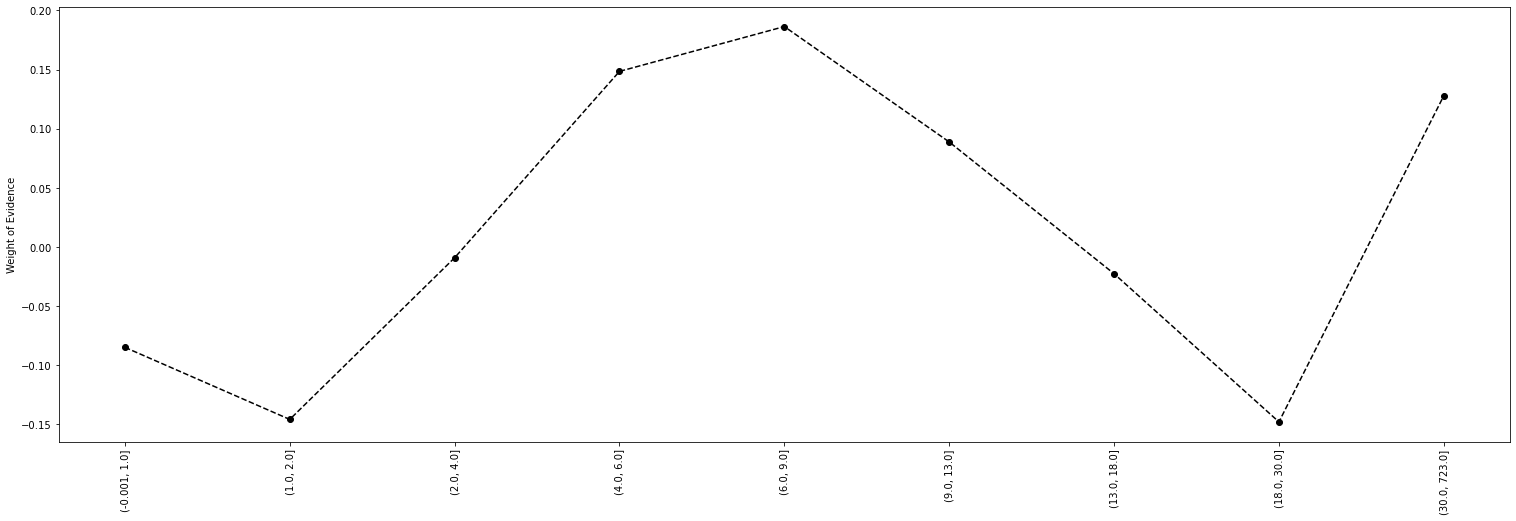

In [114]:


plot_by_woe(woe_num(Train,'bankChargesSum_fine', 'GBFlag'), 90)


In [115]:
## Coarse classing bankChargesSum variable
bins = [0, 4.1, 13.1, 30.1, np.inf]

Train['bankChargesSum_grped'] = pd.cut(Train['bankChargesSum'], bins, precision=0, include_lowest=True, right=False,)

Test['bankChargesSum_grped'] = pd.cut(Test['bankChargesSum'], bins, precision=0, include_lowest=True, right=False,)

Train['bankChargesSum_grped'].value_counts()

[0.0, 4.0)      1225
[4.0, 13.0)      794
[13.0, 30.0)     523
[30.0, inf)      271
Name: bankChargesSum_grped, dtype: int64

In [116]:
woe_cat(Train,'bankChargesSum_grped', 'GBFlag')

GBFlag                Bad  Good  Freq    Proptn    % Good     % Bad  Bad Rate  \
bankChargesSum_grped                                                            
[4.0, 13.0)           194   600   794  0.282261  0.292683  0.254260  0.244332   
[30.0, inf)            67   204   271  0.096338  0.099512  0.087811  0.247232   
[0.0, 4.0)            351   874  1225  0.435478  0.426341  0.460026  0.286531   
[13.0, 30.0)          151   372   523  0.185923  0.181463  0.197903  0.288719   

GBFlag                GoodBaddOdds       WOE  class IV  Variable IV  
bankChargesSum_grped                                                 
[4.0, 13.0)                   3.09 -0.140734  0.005407     0.010858  
[30.0, inf)                   3.04 -0.125090  0.001464     0.010858  
[0.0, 4.0)                    2.49  0.076043  0.002561     0.010858  
[13.0, 30.0)                  2.46  0.086723  0.001426     0.010858

### Closing_balance

In [117]:
### Closing_balance
#Fine Classsing)
Train['Closing_balance_fine'] = pd.qcut(Train['Closing_balance'], q=10, duplicates='drop')
woe_num(Train,'Closing_balance_fine', 'GBFlag')


GBFlag                      Bad  Good  Freq  Percentage  % Good  % Bad  \
Closing_balance_fine                                                     
(-257255.99099999998, 0.0]  208   636   844        30.0    31.0   27.3   
(0.024, 162.586]             93   188   281        10.0     9.2   12.2   
(162.586, 956.72]            91   191   282        10.0     9.3   11.9   
(956.72, 3044.544]           93   188   281        10.0     9.2   12.2   
(3044.544, 6018.274]         79   202   281        10.0     9.9   10.4   
(6018.274, 12717.138]        82   199   281        10.0     9.7   10.7   
(12717.138, 30262.648]       70   211   281        10.0    10.3    9.2   
(30262.648, 2326417.02]      47   235   282        10.0    11.5    6.2   

GBFlag                      Bad Rate  GoodBaddOdds       WOE        IV  
Closing_balance_fine                                                    
(-257255.99099999998, 0.0]      24.6          3.06  0.127101  0.470272  
(0.024, 162.586]                33.1          2.02 -0.282232  0.846697  
(162.586, 956.72]               32.3          2.10 -0.246524  0.640962  
(956.72, 3044.544]              33.1          2.02 -0.282232  0.846697  
(3044.544, 6018.274]            28.1          2.56 -0.049271  0.024636  
(6018.274, 12717.138]           29.2          2.43 -0.098118  0.098118  
(12717.138, 30262.648]          24.9          3.01  0.112940  0.124234  
(30262.648, 2326417.02]         16.7          5.00  0.617798  3.274328

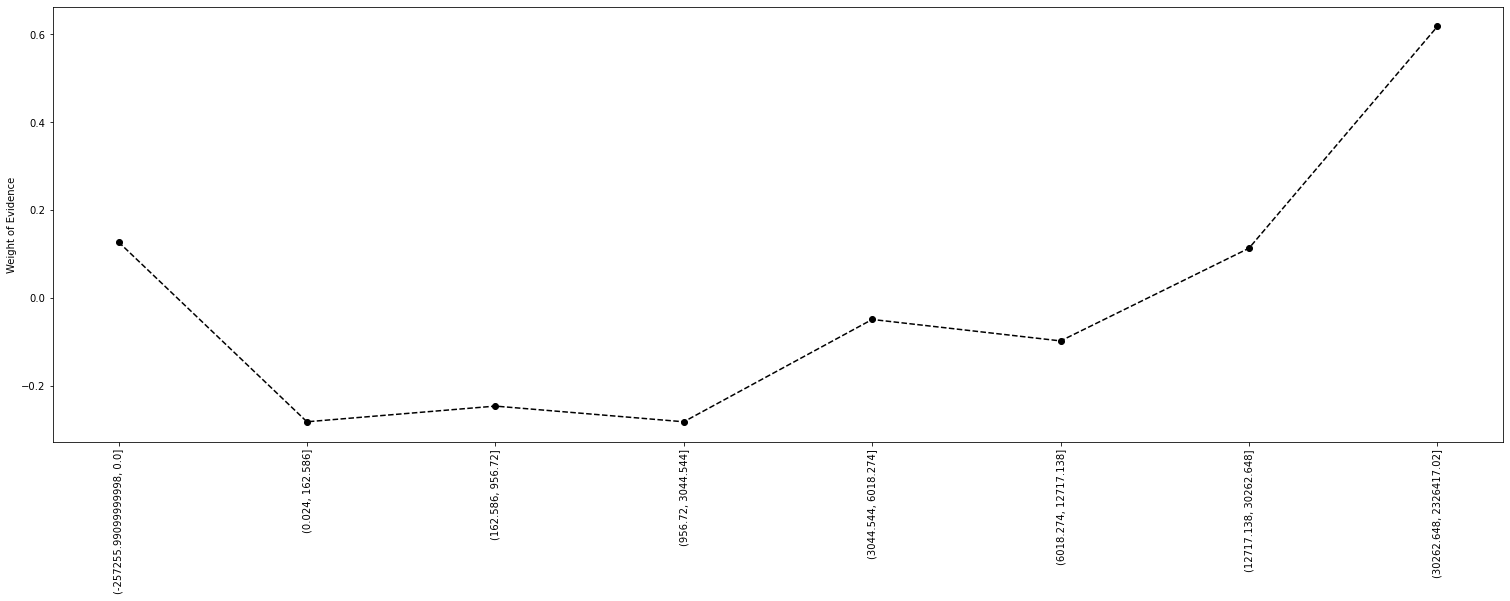

In [118]:
plot_by_woe(woe_num(Train,'Closing_balance_fine', 'GBFlag'), 90)

In [119]:

## Coarse classing Closing_balance variable
bins = [-np.inf, 0.1, 3045, 12718, 30263, np.inf]

Train['Closing_balance_grped'] = pd.cut(Train['Closing_balance'], bins, precision=0, include_lowest=True, right=False,)

Test['Closing_balance_grped'] = pd.cut(Test['Closing_balance'], bins, precision=0, include_lowest=True, right=False,)

Train['Closing_balance_grped'].value_counts()

[-inf, 0.0)           845
[0.0, 3045.0)         843
[3045.0, 12718.0)     562
[30263.0, inf)        282
[12718.0, 30263.0)    281
Name: Closing_balance_grped, dtype: int64

In [120]:
woe_cat(Train,'Closing_balance_fine', 'GBFlag')

GBFlag                      Bad  Good  Freq    Proptn    % Good     % Bad  \
Closing_balance_fine                                                        
(30262.648, 2326417.02]      47   235   282  0.100249  0.114634  0.061599   
(-257255.99099999998, 0.0]  208   636   844  0.300036  0.310244  0.272608   
(12717.138, 30262.648]       70   211   281  0.099893  0.102927  0.091743   
(3044.544, 6018.274]         79   202   281  0.099893  0.098537  0.103539   
(6018.274, 12717.138]        82   199   281  0.099893  0.097073  0.107471   
(162.586, 956.72]            91   191   282  0.100249  0.093171  0.119266   
(0.024, 162.586]             93   188   281  0.099893  0.091707  0.121887   
(956.72, 3044.544]           93   188   281  0.099893  0.091707  0.121887   

GBFlag                      Bad Rate  GoodBaddOdds       WOE  class IV  \
Closing_balance_fine                                                     
(30262.648, 2326417.02]     0.166667          5.00 -0.621101  0.032940   
(-257255.99099999998, 0.0]  0.246445          3.06 -0.129323  0.004867   
(12717.138, 30262.648]      0.249110          3.01 -0.115026  0.001286   
(3044.544, 6018.274]        0.281139          2.56  0.049517  0.000248   
(6018.274, 12717.138]       0.291815          2.43  0.101751  0.001058   
(162.586, 956.72]           0.322695          2.10  0.246923  0.006444   
(0.024, 162.586]            0.330961          2.02  0.284495  0.008586   
(956.72, 3044.544]          0.330961          2.02  0.284495  0.008586   

GBFlag                      Variable IV  
Closing_balance_fine                     
(30262.648, 2326417.02]        0.064015  
(-257255.99099999998, 0.0]     0.064015  
(12717.138, 30262.648]         0.064015  
(3044.544, 6018.274]           0.064015  
(6018.274, 12717.138]          0.064015  
(162.586, 956.72]              0.064015  
(0.024, 162.586]               0.064015  
(956.72, 3044.544]             0.064015

### Day_Diff_Debit

In [121]:
### Day_Diff_Debit
#Fine Classsing)
Train['Day_Diff_Debit_fine'] = pd.qcut(Train['Day_Diff_Debit'], q=10, duplicates='drop')
woe_num(Train,'Day_Diff_Debit_fine', 'GBFlag')


GBFlag               Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
Day_Diff_Debit_fine                                                         
(0.999, 2.0]          91   303   394        14.0    14.8   11.9      23.1   
(2.0, 3.0]            88   366   454        16.1    17.9   11.5      19.4   
(3.0, 4.0]           120   313   433        15.4    15.3   15.7      27.7   
(4.0, 5.0]           109   238   347        12.3    11.6   14.3      31.4   
(5.0, 6.0]            84   167   251         8.9     8.1   11.0      33.5   
(6.0, 7.0]            71   140   211         7.5     6.8    9.3      33.6   
(7.0, 9.0]            73   161   234         8.3     7.9    9.6      31.2   
(9.0, 13.0]           64   151   215         7.6     7.4    8.4      29.8   
(13.0, 83.0]          63   211   274         9.7    10.3    8.3      23.0   

GBFlag               GoodBaddOdds       WOE        IV  
Day_Diff_Debit_fine                                    
(0.999, 2.0]                 3.33  0.218089  0.632457  
(2.0, 3.0]                   4.16  0.442454  2.831704  
(3.0, 4.0]                   2.61 -0.025808  0.010323  
(4.0, 5.0]                   2.18 -0.209254  0.564987  
(5.0, 6.0]                   1.99 -0.306031  0.887491  
(6.0, 7.0]                   1.97 -0.313092  0.782729  
(7.0, 9.0]                   2.21 -0.194900  0.331331  
(9.0, 13.0]                  2.36 -0.126752  0.126752  
(13.0, 83.0]                 3.35  0.215888  0.431777

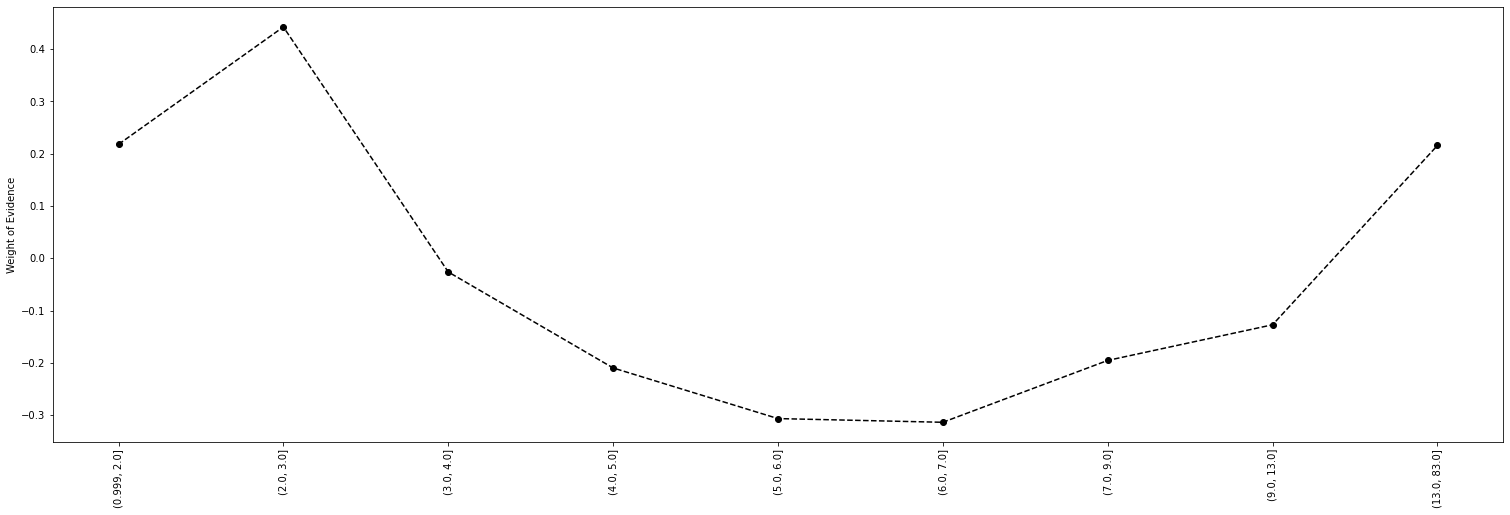

In [122]:
plot_by_woe(woe_num(Train,'Day_Diff_Debit_fine', 'GBFlag'), 90)

In [123]:

## Coarse classing Day_Diff_Debit variable
bins = [0, 3.1, 4.1, 13.1, np.inf]

Train['Day_Diff_Debit_grped'] = pd.cut(Train['Day_Diff_Debit'], bins, precision=0, include_lowest=True, right=False,)

Test['Day_Diff_Debit_grped'] = pd.cut(Test['Day_Diff_Debit'], bins, precision=0, include_lowest=True, right=False,)

Train['Day_Diff_Debit_grped'].value_counts()

[4.0, 13.0)    1258
[0.0, 3.0)      848
[3.0, 4.0)      433
[13.0, inf)     274
Name: Day_Diff_Debit_grped, dtype: int64

In [124]:
woe_cat(Train, 'Day_Diff_Debit_grped', 'GBFlag')

GBFlag                Bad  Good  Freq    Proptn    % Good     % Bad  Bad Rate  \
Day_Diff_Debit_grped                                                            
[0.0, 3.0)            179   669   848  0.301458  0.326341  0.234600  0.211085   
[13.0, inf)            63   211   274  0.097405  0.102927  0.082569  0.229927   
[3.0, 4.0)            120   313   433  0.153928  0.152683  0.157274  0.277136   
[4.0, 13.0)           401   857  1258  0.447209  0.418049  0.525557  0.318760   

GBFlag                GoodBaddOdds       WOE  class IV  Variable IV  
Day_Diff_Debit_grped                                                 
[0.0, 3.0)                    3.74 -0.330061  0.030280     0.059507  
[13.0, inf)                   3.35 -0.220386  0.004487     0.059507  
[3.0, 4.0)                    2.61  0.029626  0.000136     0.059507  
[4.0, 13.0)                   2.14  0.228861  0.024604     0.059507

### Day_Diff_Credit

In [125]:
### Day_Diff_Credit
#Fine Classsing)
Train['Day_Diff_Credit_fine'] = pd.qcut(Train['Day_Diff_Credit'], q=10, duplicates='drop')
woe_num(Train,'Day_Diff_Credit_fine', 'GBFlag')


GBFlag                Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
Day_Diff_Credit_fine                                                         
(0.999, 4.0]          137   442   579        20.6    21.6   18.0      23.7   
(4.0, 5.0]            102   233   335        11.9    11.4   13.4      30.4   
(5.0, 6.0]             85   240   325        11.6    11.7   11.1      26.2   
(6.0, 7.0]            104   257   361        12.8    12.5   13.6      28.8   
(7.0, 8.0]             54   125   179         6.4     6.1    7.1      30.2   
(8.0, 10.0]            93   223   316        11.2    10.9   12.2      29.4   
(10.0, 12.0]           65   140   205         7.3     6.8    8.5      31.7   
(12.0, 17.0]           57   179   236         8.4     8.7    7.5      24.2   
(17.0, 59.0]           66   211   277         9.8    10.3    8.7      23.8   

GBFlag                GoodBaddOdds       WOE        IV  
Day_Diff_Credit_fine                                    
(0.999, 4.0]                  3.23  0.182322  0.656358  
(4.0, 5.0]                    2.28 -0.161641  0.323283  
(5.0, 6.0]                    2.82  0.052644  0.031586  
(6.0, 7.0]                    2.47 -0.084341  0.092775  
(7.0, 8.0]                    2.31 -0.151806  0.151806  
(8.0, 10.0]                   2.40 -0.112673  0.146475  
(10.0, 12.0]                  2.15 -0.223144  0.379344  
(12.0, 17.0]                  3.14  0.148420  0.178104  
(17.0, 59.0]                  3.20  0.168821  0.270113

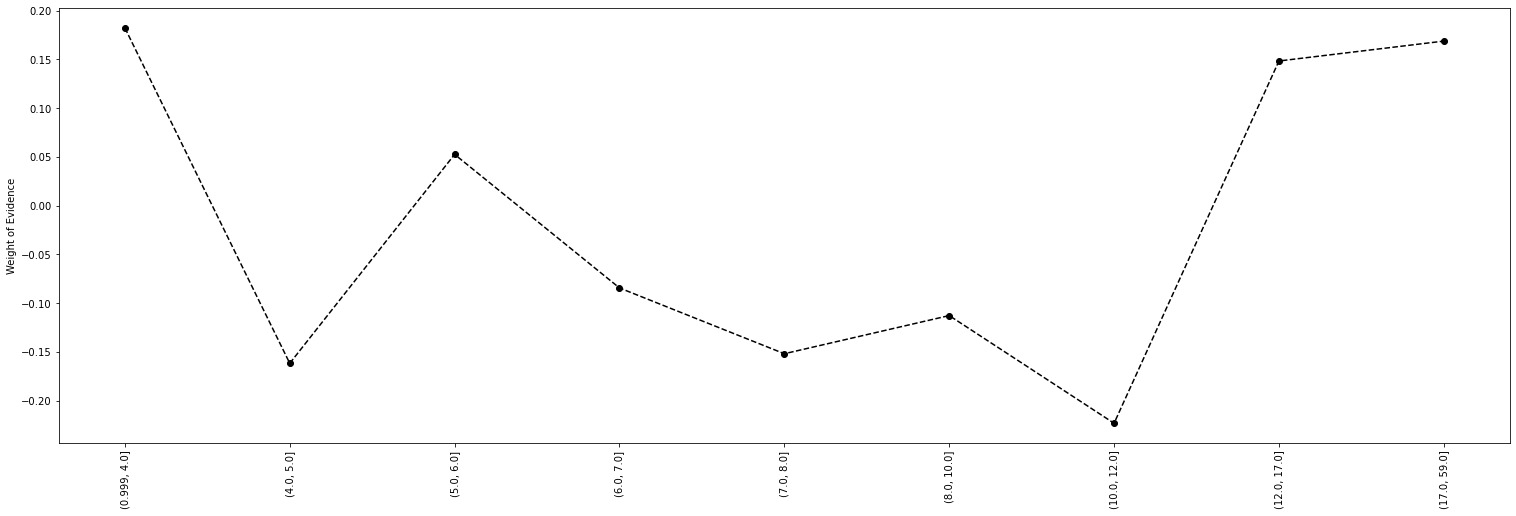

In [126]:

plot_by_woe(woe_num(Train,'Day_Diff_Credit_fine', 'GBFlag'), 90)


In [127]:

## Coarse classing Day_Diff_Credit variable
bins = [0,  4.1, 5.1, 12.1, np.inf]

Train['Day_Diff_Credit_grped'] = pd.cut(Train['Day_Diff_Credit'], bins, precision=0, include_lowest=True, right=False,)

Test['Day_Diff_Credit_grped'] = pd.cut(Test['Day_Diff_Credit'], bins, precision=0, include_lowest=True, right=False,)

Train['Day_Diff_Credit_grped'].value_counts()

[5.0, 12.0)    1386
[0.0, 4.0)      579
[12.0, inf)     513
[4.0, 5.0)      335
Name: Day_Diff_Credit_grped, dtype: int64

In [128]:
woe_cat(Train, 'Day_Diff_Credit_grped', 'GBFlag')

GBFlag                 Bad  Good  Freq    Proptn    % Good     % Bad  \
Day_Diff_Credit_grped                                                  
[0.0, 4.0)             137   442   579  0.205830  0.215610  0.179554   
[12.0, inf)            123   390   513  0.182368  0.190244  0.161206   
[5.0, 12.0)            401   985  1386  0.492712  0.480488  0.525557   
[4.0, 5.0)             102   233   335  0.119090  0.113659  0.133683   

GBFlag                 Bad Rate  GoodBaddOdds       WOE  class IV  Variable IV  
Day_Diff_Credit_grped                                                           
[0.0, 4.0)             0.236615          3.23 -0.182992  0.006598     0.018697  
[12.0, inf)            0.239766          3.17 -0.165625  0.004809     0.018697  
[5.0, 12.0)            0.289322          2.46  0.089657  0.004041     0.018697  
[4.0, 5.0)             0.304478          2.28  0.162271  0.003249     0.018697

### IntlRemittancesAmnt1

In [129]:

#Fine Classsing)
Train['IntlRemittancesAmnt1_fine'] = pd.qcut(Train['IntlRemittancesAmnt1'], q=10, duplicates='drop')
woe_num(Train,'IntlRemittancesAmnt1_fine', 'GBFlag')


GBFlag                     Bad  Good  Freq  Percentage  % Good  % Bad  \
IntlRemittancesAmnt1_fine                                               
(-0.001, 300.0]            367  1040  1407        50.0    50.7   48.1   
(300.0, 4200.0]             82   200   282        10.0     9.8   10.7   
(4200.0, 9170.0]            80   200   280        10.0     9.8   10.5   
(9170.0, 18630.0]           73   208   281        10.0    10.1    9.6   
(18630.0, 40600.032]        87   194   281        10.0     9.5   11.4   
(40600.032, 1740600.0]      74   208   282        10.0    10.1    9.7   

GBFlag                     Bad Rate  GoodBaddOdds       WOE        IV  
IntlRemittancesAmnt1_fine                                              
(-0.001, 300.0]                26.1          2.83  0.052644  0.136874  
(300.0, 4200.0]                29.1          2.44 -0.087861  0.079075  
(4200.0, 9170.0]               28.6          2.50 -0.068993  0.048295  
(9170.0, 18630.0]              26.0          2.85  0.050772  0.025386  
(18630.0, 40600.032]           31.0          2.23 -0.182322  0.346411  
(40600.032, 1740600.0]         26.2          2.81  0.040410  0.016164

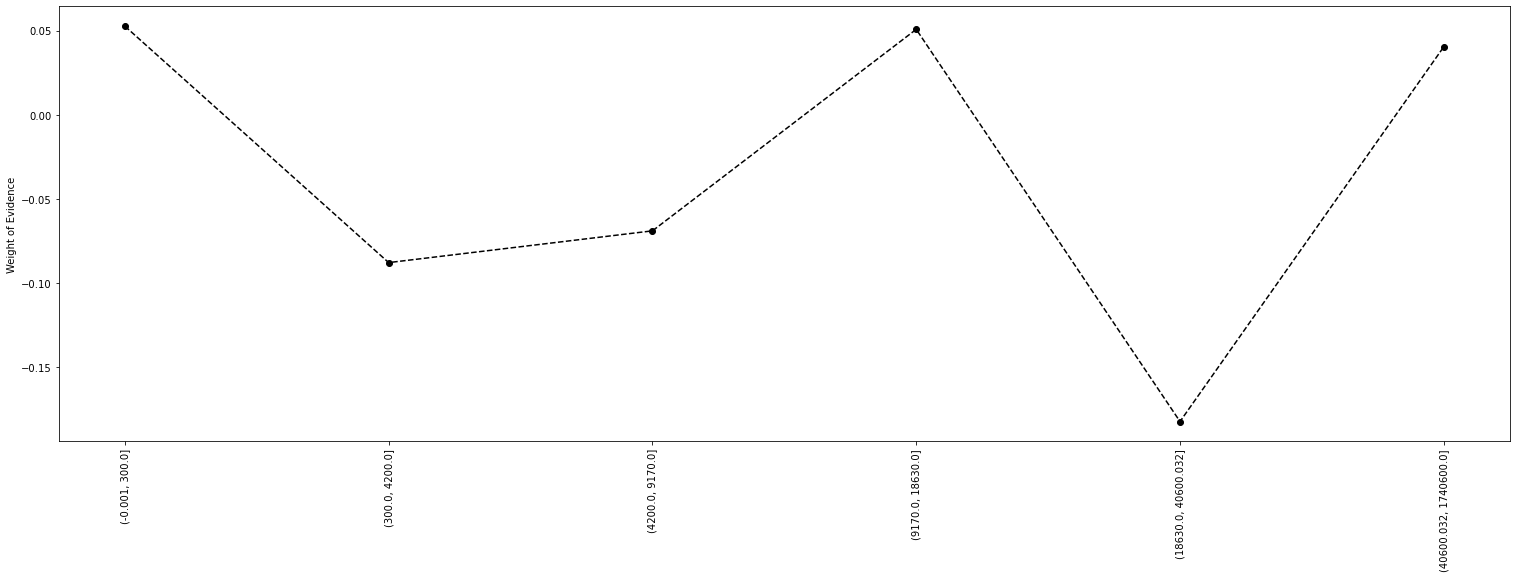

In [130]:

plot_by_woe(woe_num(Train,'IntlRemittancesAmnt1_fine', 'GBFlag'), 90)


In [131]:

## Coarse classing IntlRemittancesAmnt1 variable
bins = [0, 3201, 40544, np.inf]

Train['IntlRemittancesAmnt1_grped'] = pd.cut(Train['IntlRemittancesAmnt1'], bins, precision=0, include_lowest=True, right=False,)

Test['IntlRemittancesAmnt1_grped'] = pd.cut(Test['IntlRemittancesAmnt1'], bins, precision=0, include_lowest=True, right=False,)

Train['IntlRemittancesAmnt1_grped'].value_counts()

[0.0, 3201.0)        1622
[3201.0, 40544.0)     907
[40544.0, inf)        284
Name: IntlRemittancesAmnt1_grped, dtype: int64

### IntlRemittancesAmnt2


In [132]:

#Fine Classsing)
Train['IntlRemittancesAmnt2_fine'] = pd.qcut(Train['IntlRemittancesAmnt2'], q=10, duplicates='drop')
woe_num(Train,'IntlRemittancesAmnt2_fine', 'GBFlag')


GBFlag                     Bad  Good  Freq  Percentage  % Good  % Bad  \
IntlRemittancesAmnt2_fine                                               
(-0.001, 2096.636]         287   838  1125        40.0    40.9   37.6   
(2096.636, 5700.0]          88   194   282        10.0     9.5   11.5   
(5700.0, 12138.8]           85   196   281        10.0     9.6   11.1   
(12138.8, 20300.032]        84   197   281        10.0     9.6   11.0   
(20300.032, 34609.0]        73   208   281        10.0    10.1    9.6   
(34609.0, 72976.0]          75   206   281        10.0    10.0    9.8   
(72976.0, 1806500.0]        71   211   282        10.0    10.3    9.3   

GBFlag                     Bad Rate  GoodBaddOdds       WOE        IV  
IntlRemittancesAmnt2_fine                                              
(-0.001, 2096.636]             25.5          2.92  0.084126  0.277616  
(2096.636, 5700.0]             31.2          2.20 -0.191055  0.382110  
(5700.0, 12138.8]              30.2          2.31 -0.145182  0.217773  
(12138.8, 20300.032]           29.9          2.35 -0.136132  0.190585  
(20300.032, 34609.0]           26.0          2.85  0.050772  0.025386  
(34609.0, 72976.0]             26.7          2.75  0.020203  0.004041  
(72976.0, 1806500.0]           25.2          2.97  0.102129  0.102129

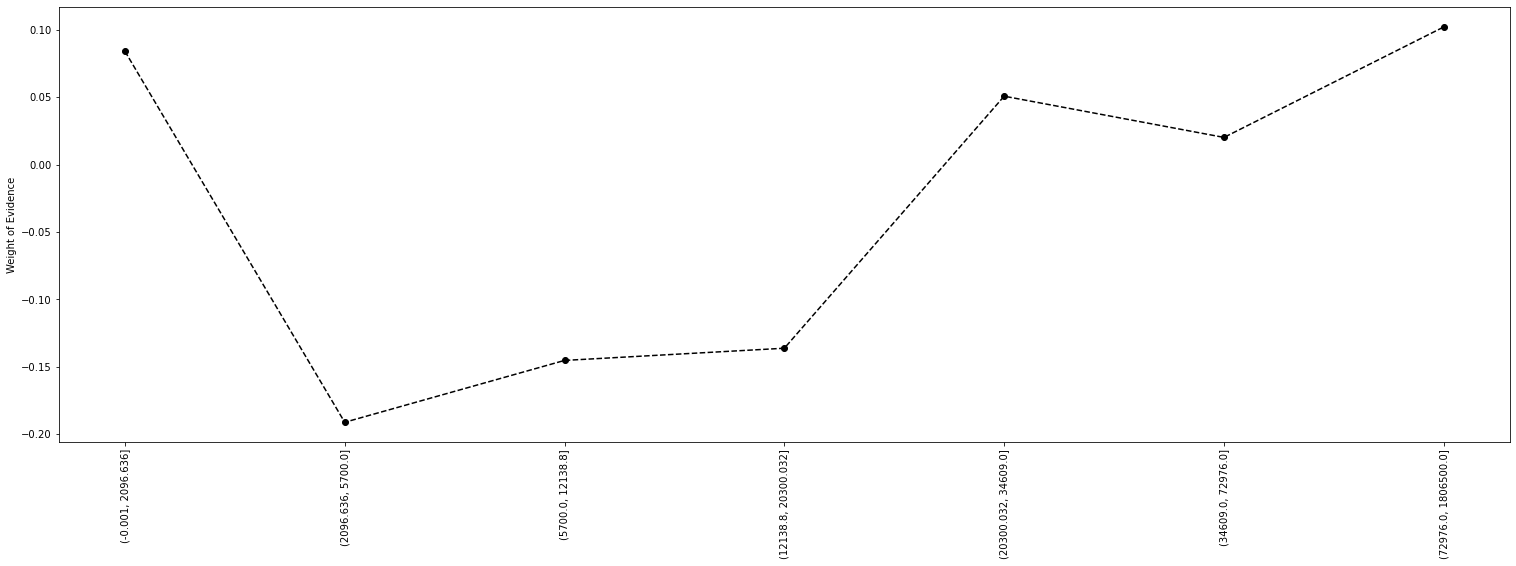

In [133]:


plot_by_woe(woe_num(Train,'IntlRemittancesAmnt2_fine', 'GBFlag'), 90)

In [134]:


## Coarse classing IntlRemittancesAmnt2 variable
bins = [0, 2097, 20301,  np.inf]

Train['IntlRemittancesAmnt2_grped'] = pd.cut(Train['IntlRemittancesAmnt2'], bins, precision=0, include_lowest=True, right=False,)

Test['IntlRemittancesAmnt2_grped'] = pd.cut(Test['IntlRemittancesAmnt2'], bins, precision=0, include_lowest=True, right=False,)

Train['IntlRemittancesAmnt2_grped'].value_counts()

[0.0, 2097.0)        1125
[2097.0, 20301.0)     845
[20301.0, inf)        843
Name: IntlRemittancesAmnt2_grped, dtype: int64

### IntlRemittancesAmnt3

In [135]:
#Fine Classsing)
Train['IntlRemittancesAmnt3_fine'] = pd.qcut(Train['IntlRemittancesAmnt3'], q=10, duplicates='drop')
woe_num(Train,'IntlRemittancesAmnt3_fine', 'GBFlag')

GBFlag                     Bad  Good  Freq  Percentage  % Good  % Bad  \
IntlRemittancesAmnt3_fine                                               
(-0.001, 219.008]          297   828  1125        40.0    40.4   38.9   
(219.008, 4100.0]           87   205   292        10.4    10.0   11.4   
(4100.0, 9604.3]            77   194   271         9.6     9.5   10.1   
(9604.3, 17000.0]           75   209   284        10.1    10.2    9.8   
(17000.0, 30325.8]          89   189   278         9.9     9.2   11.7   
(30325.8, 60650.6]          60   221   281        10.0    10.8    7.9   
(60650.6, 1531145.0]        78   204   282        10.0    10.0   10.2   

GBFlag                     Bad Rate  GoodBaddOdds       WOE        IV  
IntlRemittancesAmnt3_fine                                              
(-0.001, 219.008]              26.4          2.79  0.037836  0.056753  
(219.008, 4100.0]              29.8          2.36 -0.131028  0.183440  
(4100.0, 9604.3]               28.4          2.52 -0.061244  0.036746  
(9604.3, 17000.0]              26.4          2.79  0.040005  0.016002  
(17000.0, 30325.8]             32.0          2.12 -0.240385  0.600963  
(30325.8, 60650.6]             21.4          3.68  0.312683  0.906782  
(60650.6, 1531145.0]           27.7          2.62 -0.019803  0.003961

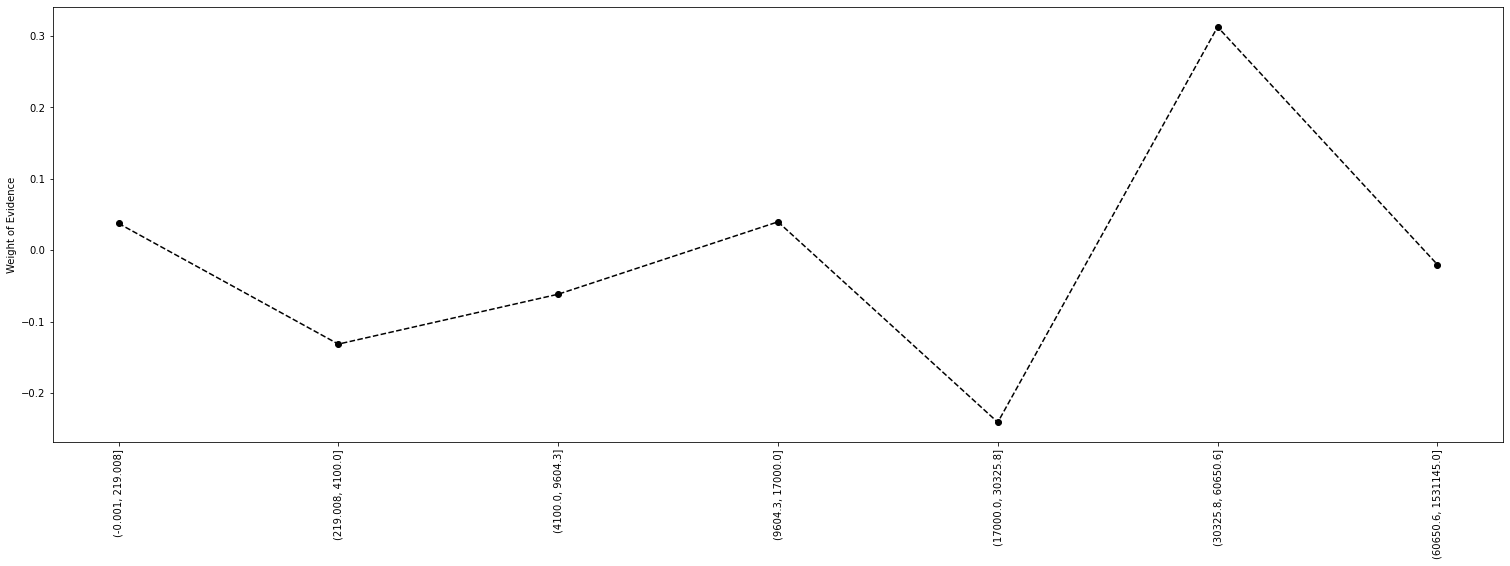

In [136]:

plot_by_woe(woe_num(Train,'IntlRemittancesAmnt3_fine', 'GBFlag'), 90)

In [137]:

## Coarse classing IntlRemittancesAmnt3 variable
bins = [0, 220, 9605, 17001, 30326, 60651, np.inf]

Train['IntlRemittancesAmnt3_grped'] = pd.cut(Train['IntlRemittancesAmnt3'], bins, precision=0, include_lowest=True, right=False,)

Test['IntlRemittancesAmnt3_grped'] = pd.cut(Test['IntlRemittancesAmnt3'], bins, precision=0, include_lowest=True, right=False,)

Train['IntlRemittancesAmnt3_grped'].value_counts()

[0.0, 220.0)          1125
[220.0, 9605.0)        563
[9605.0, 17001.0)      284
[60651.0, inf)         282
[30326.0, 60651.0)     281
[17001.0, 30326.0)     278
Name: IntlRemittancesAmnt3_grped, dtype: int64

### IntlRemittancesAmnt4


In [138]:
#Fine Classsing)
Train['IntlRemittancesAmnt4_fine'] = pd.qcut(Train['IntlRemittancesAmnt4'], q=10, duplicates='drop')
woe_num(Train,'IntlRemittancesAmnt4_fine', 'GBFlag')

GBFlag                     Bad  Good  Freq  Percentage  % Good  % Bad  \
IntlRemittancesAmnt4_fine                                               
(-0.001, 215.16]           445  1243  1688        60.0    60.6   58.3   
(215.16, 5000.0]            87   211   298        10.6    10.3   11.4   
(5000.0, 12000.0]           63   202   265         9.4     9.9    8.3   
(12000.0, 28160.0]          83   197   280        10.0     9.6   10.9   
(28160.0, 1568500.0]        85   197   282        10.0     9.6   11.1   

GBFlag                     Bad Rate  GoodBaddOdds       WOE        IV  
IntlRemittancesAmnt4_fine                                              
(-0.001, 215.16]               26.4          2.79  0.038693  0.088993  
(215.16, 5000.0]               29.2          2.43 -0.101469  0.111616  
(5000.0, 12000.0]              23.8          3.21  0.176279  0.282047  
(12000.0, 28160.0]             29.6          2.37 -0.127000  0.165100  
(28160.0, 1568500.0]           30.1          2.32 -0.145182  0.217773

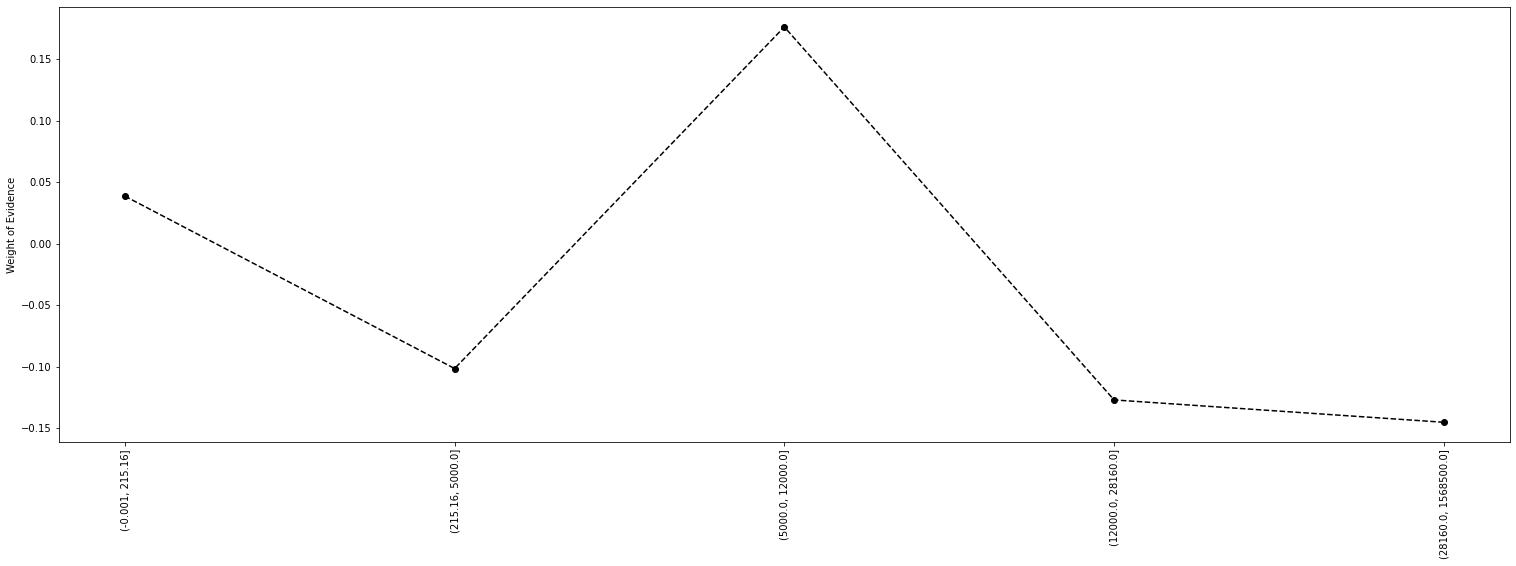

In [139]:

plot_by_woe(woe_num(Train,'IntlRemittancesAmnt4_fine', 'GBFlag'), 90)


In [140]:


## Coarse classing IntlRemittancesAmnt4 variable
bins = [0, 216, 5001, 12001, np.inf]

Train['IntlRemittancesAmnt4_grped'] = pd.cut(Train['IntlRemittancesAmnt4'], bins, precision=0, include_lowest=True, right=False,)

Test['IntlRemittancesAmnt4_grped'] = pd.cut(Test['IntlRemittancesAmnt4'], bins, precision=0, include_lowest=True, right=False,)

Train['IntlRemittancesAmnt4_grped'].value_counts()

[0.0, 216.0)         1688
[12001.0, inf)        562
[216.0, 5001.0)       298
[5001.0, 12001.0)     265
Name: IntlRemittancesAmnt4_grped, dtype: int64

In [141]:
woe_cat(Train, 'IntlRemittancesAmnt4_grped', 'GBFlag')

GBFlag                      Bad  Good  Freq    Proptn    % Good     % Bad  \
IntlRemittancesAmnt4_grped                                                  
[5001.0, 12001.0)            63   202   265  0.094205  0.098537  0.082569   
[0.0, 216.0)                445  1243  1688  0.600071  0.606341  0.583224   
[216.0, 5001.0)              87   211   298  0.105937  0.102927  0.114024   
[12001.0, inf)              168   394   562  0.199787  0.192195  0.220183   

GBFlag                      Bad Rate  GoodBaddOdds       WOE  class IV  \
IntlRemittancesAmnt4_grped                                               
[5001.0, 12001.0)           0.237736          3.21 -0.176796  0.002823   
[0.0, 216.0)                0.263626          2.79 -0.038872  0.000899   
[216.0, 5001.0)             0.291946          2.43  0.102387  0.001136   
[12001.0, inf)              0.298932          2.35  0.135950  0.003805   

GBFlag                      Variable IV  
IntlRemittancesAmnt4_grped               
[5001.0, 12001.0)              0.008663  
[0.0, 216.0)                   0.008663  
[216.0, 5001.0)                0.008663  
[12001.0, inf)                 0.008663

### IntlRemittancesFreq1

In [142]:
#Fine Classsing)
Train['IntlRemittancesFreq1_fine'] = pd.qcut(Train['IntlRemittancesFreq1'], q=10, duplicates='drop')
woe_num(Train,'IntlRemittancesFreq1_fine', 'GBFlag')

GBFlag                     Bad  Good  Freq  Percentage  % Good  % Bad  \
IntlRemittancesFreq1_fine                                               
(-0.001, 1.0]              438  1320  1758        62.5    64.4   57.4   
(1.0, 2.0]                  81   217   298        10.6    10.6   10.6   
(2.0, 3.0]                  78   138   216         7.7     6.7   10.2   
(3.0, 6.0]                  99   170   269         9.6     8.3   13.0   
(6.0, 155.0]                67   205   272         9.7    10.0    8.8   

GBFlag                     Bad Rate  GoodBaddOdds       WOE        IV  
IntlRemittancesFreq1_fine                                              
(-0.001, 1.0]                  24.9          3.01  0.115069  0.805485  
(1.0, 2.0]                     27.2          2.68  0.000000  0.000000  
(2.0, 3.0]                     36.1          1.77 -0.420280  1.470981  
(3.0, 6.0]                     36.8          1.72 -0.448694  2.108861  
(6.0, 155.0]                   24.6          3.06  0.127833  0.153400

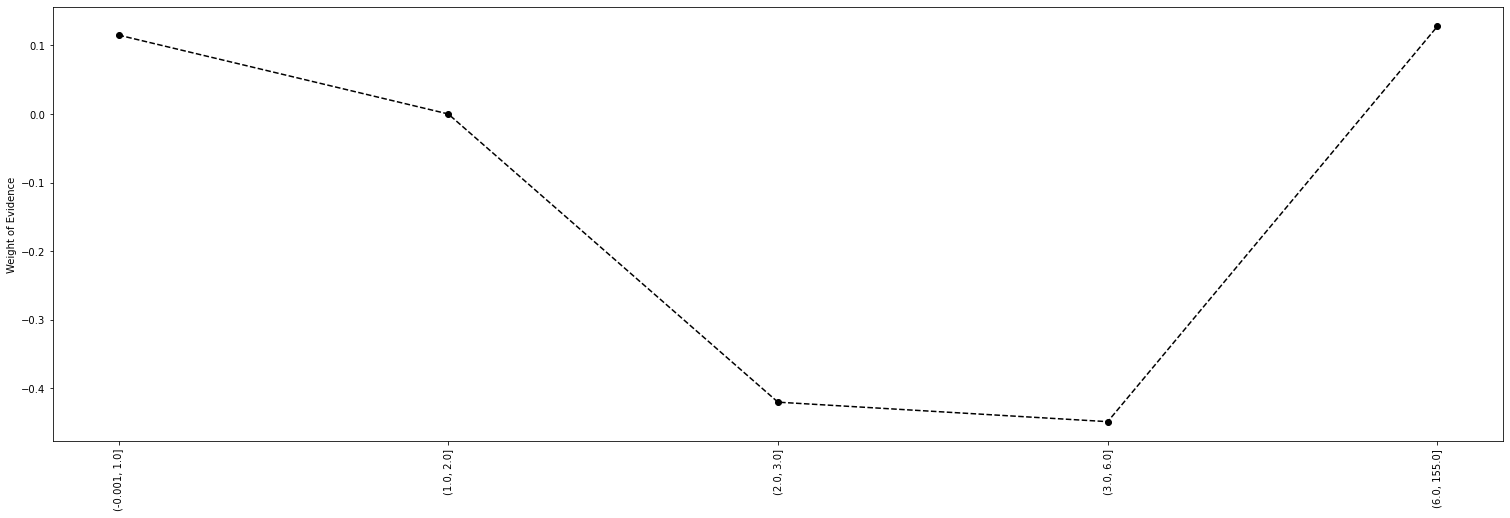

In [143]:

plot_by_woe(woe_num(Train,'IntlRemittancesFreq1_fine', 'GBFlag'), 90)

In [144]:
## Coarse classing IntlRemittancesFreq1 variable
bins = [0, 0.1, 1.1, 2.1, 7.1, np.inf]

Train['IntlRemittancesFreq1_grped'] = pd.cut(Train['IntlRemittancesFreq1'], bins, precision=0, include_lowest=True, right=False,)

Test['IntlRemittancesFreq1_grped'] = pd.cut(Test['IntlRemittancesFreq1'], bins, precision=0, include_lowest=True, right=False,)

Train['IntlRemittancesFreq1_grped'].value_counts()

[0.0, 0.1)    1313
[2.1, 7.1)     538
[0.1, 1.1)     445
[1.1, 2.1)     298
[7.1, inf)     219
Name: IntlRemittancesFreq1_grped, dtype: int64

In [145]:
woe_cat(Test, 'IntlRemittancesFreq1_grped', 'GBFlag')

GBFlag                      Bad  Good  Freq    Proptn    % Good     % Bad  \
IntlRemittancesFreq1_grped                                                  
[0.0, 0.1)                  140   425   565  0.468491  0.480769  0.434783   
[7.1, inf)                   23    68    91  0.075456  0.076923  0.071429   
[2.1, 7.1)                   60   167   227  0.188226  0.188914  0.186335   
[1.1, 2.1)                   31    78   109  0.090381  0.088235  0.096273   
[0.1, 1.1)                   68   146   214  0.177446  0.165158  0.211180   

GBFlag                      Bad Rate  GoodBaddOdds       WOE  class IV  \
IntlRemittancesFreq1_grped                                               
[0.0, 0.1)                  0.247788          3.04 -0.100541  0.004624   
[7.1, inf)                  0.252747          2.96 -0.074108  0.000407   
[2.1, 7.1)                  0.264317          2.78 -0.013744  0.000035   
[1.1, 2.1)                  0.284404          2.52  0.087184  0.000701   
[0.1, 1.1)                  0.317757          2.15  0.245807  0.011312   

GBFlag                      Variable IV  
IntlRemittancesFreq1_grped               
[0.0, 0.1)                     0.017079  
[7.1, inf)                     0.017079  
[2.1, 7.1)                     0.017079  
[1.1, 2.1)                     0.017079  
[0.1, 1.1)                     0.017079

### IntlRemittancesFreq2

In [146]:
#Fine Classsing)
Train['IntlRemittancesFreq2_fine'] = pd.qcut(Train['IntlRemittancesFreq2'], q=10, duplicates='drop')
woe_num(Train,'IntlRemittancesFreq2_fine', 'GBFlag')

GBFlag                     Bad  Good  Freq  Percentage  % Good  % Bad  \
IntlRemittancesFreq2_fine                                               
(-0.001, 1.0]              336   996  1332        47.4    48.6   44.0   
(1.0, 2.0]                  67   201   268         9.5     9.8    8.8   
(2.0, 3.0]                  82   180   262         9.3     8.8   10.7   
(3.0, 4.0]                  46   112   158         5.6     5.5    6.0   
(4.0, 6.0]                  68   201   269         9.6     9.8    8.9   
(6.0, 10.0]                 84   173   257         9.1     8.4   11.0   
(10.0, 234.0]               80   187   267         9.5     9.1   10.5   

GBFlag                     Bad Rate  GoodBaddOdds       WOE        IV  
IntlRemittancesFreq2_fine                                              
(-0.001, 1.0]                  25.2          2.96  0.099434  0.457396  
(1.0, 2.0]                     25.0          3.00  0.107631  0.107631  
(2.0, 3.0]                     31.3          2.20 -0.195492  0.371435  
(3.0, 4.0]                     29.1          2.43 -0.087011  0.043506  
(4.0, 6.0]                     25.3          2.96  0.096331  0.086698  
(6.0, 10.0]                    32.7          2.06 -0.269664  0.701125  
(10.0, 234.0]                  30.0          2.34 -0.143101  0.200341

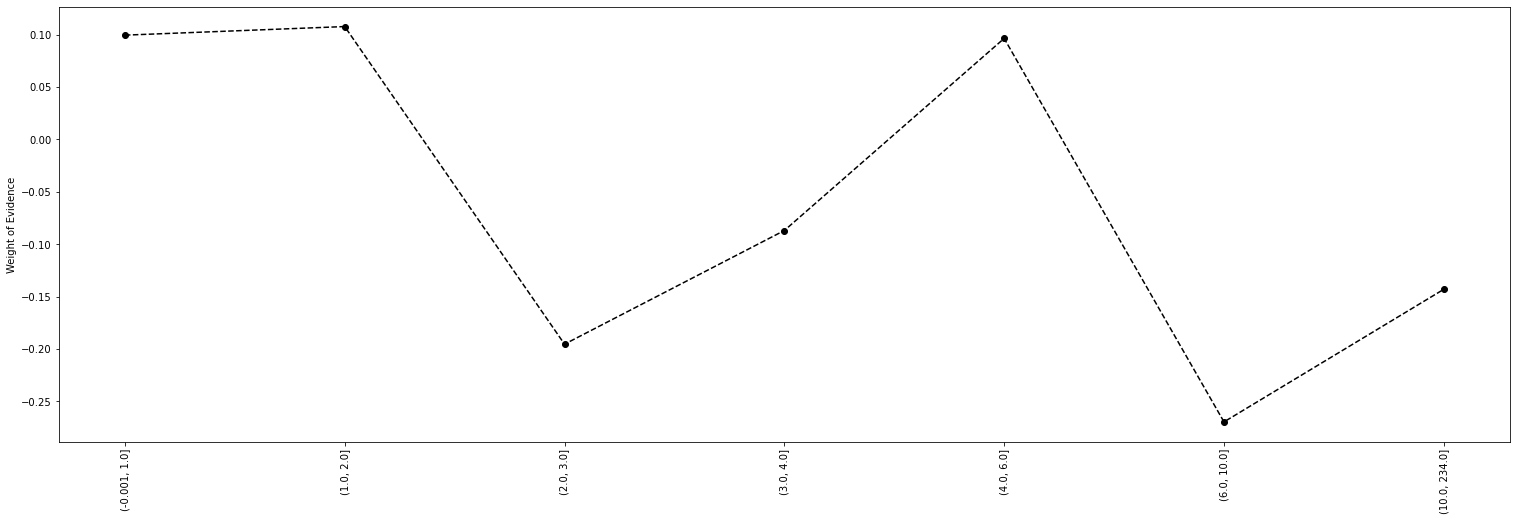

In [147]:

plot_by_woe(woe_num(Train,'IntlRemittancesFreq2_fine', 'GBFlag'), 90)


In [148]:
## Coarse classing IntlRemittancesFreq2 variable
bins = [0, 2.1, 4.1, 6.1,  np.inf]

Train['IntlRemittancesFreq2_grped'] = pd.cut(Train['IntlRemittancesFreq2'], bins, precision=0, include_lowest=True, right=False,)

Test['IntlRemittancesFreq2_grped'] = pd.cut(Test['IntlRemittancesFreq2'], bins, precision=0, include_lowest=True, right=False,)

Train['IntlRemittancesFreq2_grped'].value_counts()

[0.0, 2.0)    1600
[6.0, inf)     524
[2.0, 4.0)     420
[4.0, 6.0)     269
Name: IntlRemittancesFreq2_grped, dtype: int64

In [149]:
woe_cat(Train, 'IntlRemittancesFreq2_grped', 'GBFlag')

GBFlag                      Bad  Good  Freq    Proptn    % Good     % Bad  \
IntlRemittancesFreq2_grped                                                  
[0.0, 2.0)                  403  1197  1600  0.568788  0.583902  0.528178   
[4.0, 6.0)                   68   201   269  0.095627  0.098049  0.089122   
[2.0, 4.0)                  128   292   420  0.149307  0.142439  0.167759   
[6.0, inf)                  164   360   524  0.186278  0.175610  0.214941   

GBFlag                      Bad Rate  GoodBaddOdds       WOE  class IV  \
IntlRemittancesFreq2_grped                                               
[0.0, 2.0)                  0.251875          2.97 -0.100300  0.005589   
[4.0, 6.0)                  0.252788          2.96 -0.095460  0.000852   
[2.0, 4.0)                  0.304762          2.28  0.163614  0.004143   
[6.0, inf)                  0.312977          2.20  0.202099  0.007949   

GBFlag                      Variable IV  
IntlRemittancesFreq2_grped               
[0.0, 2.0)                     0.018533  
[4.0, 6.0)                     0.018533  
[2.0, 4.0)                     0.018533  
[6.0, inf)                     0.018533

### IntlRemittancesFreq3

In [150]:
#Fine Classsing)
Train['IntlRemittancesFreq3_fine'] = pd.qcut(Train['IntlRemittancesFreq3'], q=10, duplicates='drop')
woe_num(Train,'IntlRemittancesFreq3_fine', 'GBFlag')

GBFlag                     Bad  Good  Freq  Percentage  % Good  % Bad  \
IntlRemittancesFreq3_fine                                               
(-0.001, 1.0]              396  1092  1488        52.9    53.3   51.9   
(1.0, 2.0]                  67   222   289        10.3    10.8    8.8   
(2.0, 3.0]                  58   168   226         8.0     8.2    7.6   
(3.0, 5.0]                  76   190   266         9.5     9.3   10.0   
(5.0, 9.0]                  82   204   286        10.2    10.0   10.7   
(9.0, 292.0]                84   174   258         9.2     8.5   11.0   

GBFlag                     Bad Rate  GoodBaddOdds       WOE        IV  
IntlRemittancesFreq3_fine                                              
(-0.001, 1.0]                  26.6          2.76  0.026618  0.037265  
(1.0, 2.0]                     23.2          3.31  0.204794  0.409589  
(2.0, 3.0]                     25.7          2.90  0.075986  0.045592  
(3.0, 5.0]                     28.6          2.50 -0.072571  0.050799  
(5.0, 9.0]                     28.7          2.49 -0.067659  0.047361  
(9.0, 292.0]                   32.6          2.07 -0.257829  0.644573

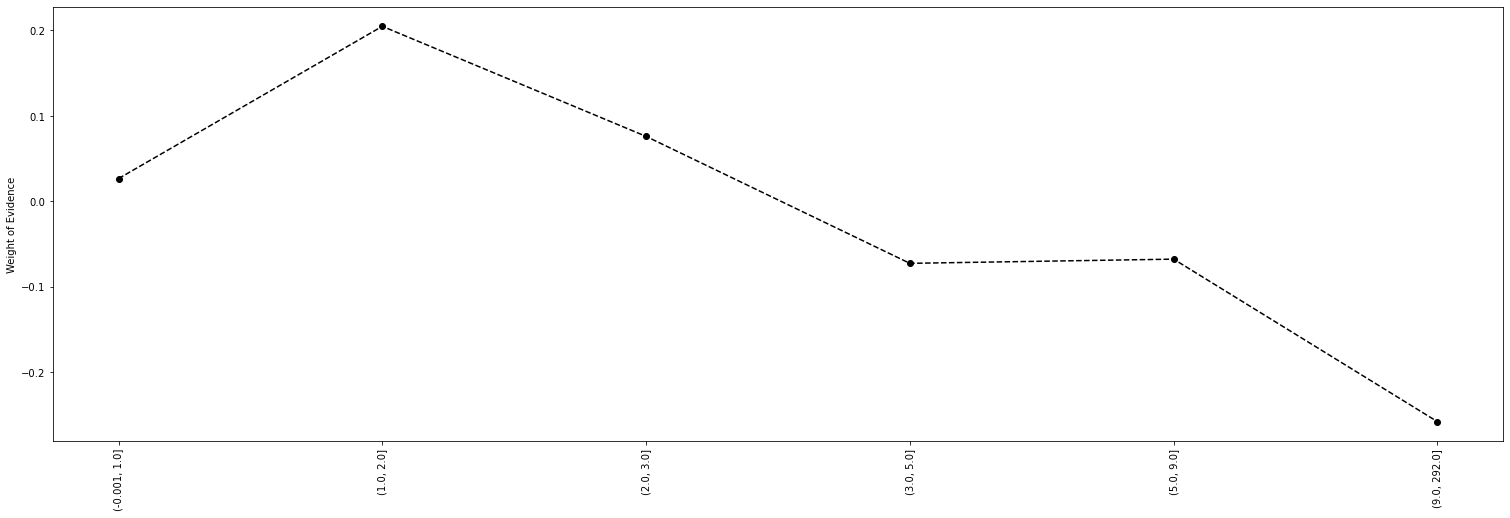

In [151]:

plot_by_woe(woe_num(Train,'IntlRemittancesFreq3_fine', 'GBFlag'), 90)

In [152]:

## Coarse classing IntlRemittancesFreq3 variable
bins = [0, 3.1,  np.inf]

Train['IntlRemittancesFreq3_grped'] = pd.cut(Train['IntlRemittancesFreq3'], bins, precision=0, include_lowest=True, right=False,)

Test['IntlRemittancesFreq3_grped'] = pd.cut(Test['IntlRemittancesFreq3'], bins, precision=0, include_lowest=True, right=False,)

Train['IntlRemittancesFreq3_grped'].value_counts()

[0.0, 3.0)    2003
[3.0, inf)     810
Name: IntlRemittancesFreq3_grped, dtype: int64

### IntlRemittancesFreq4

In [153]:
#Fine Classsing)
Train['IntlRemittancesFreq4_fine'] = pd.qcut(Train['IntlRemittancesFreq4'], q=10, duplicates='drop')
woe_num(Train,'IntlRemittancesFreq4_fine', 'GBFlag')

GBFlag                     Bad  Good  Freq  Percentage  % Good  % Bad  \
IntlRemittancesFreq4_fine                                               
(-0.001, 1.0]              545  1517  2062        73.3    74.0   71.4   
(1.0, 2.0]                  66   161   227         8.1     7.9    8.7   
(2.0, 5.0]                  74   219   293        10.4    10.7    9.7   
(5.0, 138.0]                78   153   231         8.2     7.5   10.2   

GBFlag                     Bad Rate  GoodBaddOdds       WOE        IV  
IntlRemittancesFreq4_fine                                              
(-0.001, 1.0]                  26.4          2.78  0.035767  0.092995  
(1.0, 2.0]                     29.1          2.44 -0.096460  0.077168  
(2.0, 5.0]                     25.3          2.96  0.098118  0.098118  
(5.0, 138.0]                   33.8          1.96 -0.307485  0.830209

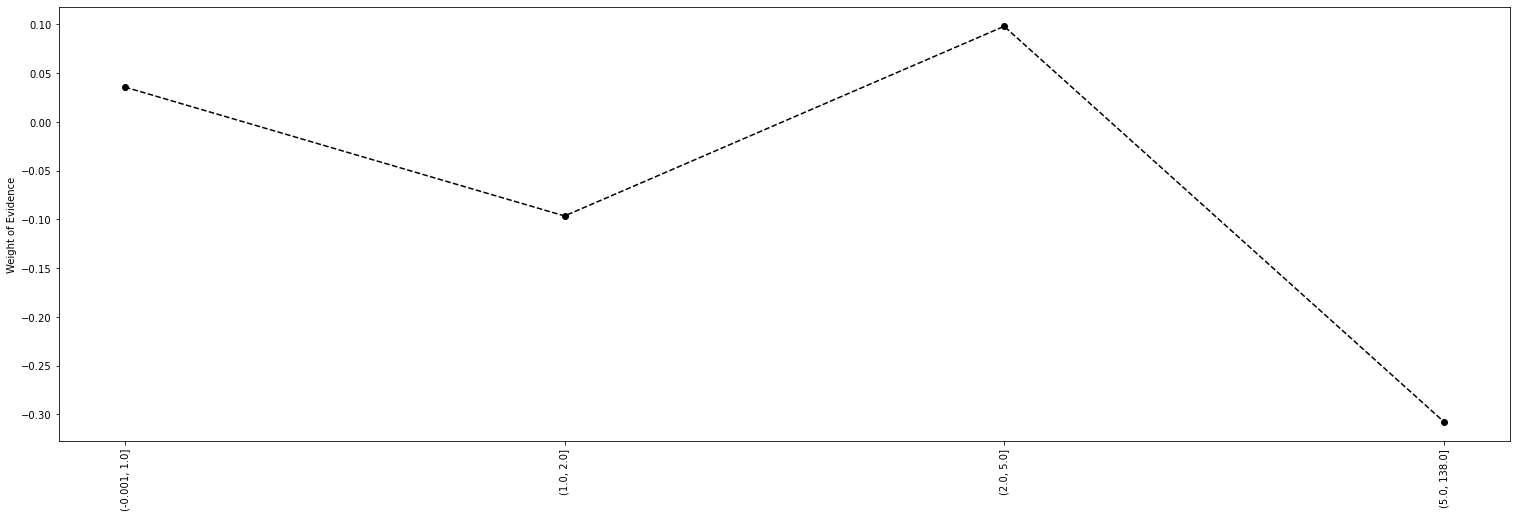

In [154]:

plot_by_woe(woe_num(Train,'IntlRemittancesFreq4_fine', 'GBFlag'), 90)

In [155]:

## Coarse classing IntlRemittancesFreq4 variable
bins = [0, 1.1,2.1, 5.1,  np.inf]

Train['IntlRemittancesFreq4_grped'] = pd.cut(Train['IntlRemittancesFreq4'], bins, precision=0, include_lowest=True, right=False,)

Test['IntlRemittancesFreq4_grped'] = pd.cut(Test['IntlRemittancesFreq4'], bins, precision=0, include_lowest=True, right=False,)

Train['IntlRemittancesFreq4_grped'].value_counts()

[0.0, 1.0)    2062
[2.0, 5.0)     293
[5.0, inf)     231
[1.0, 2.0)     227
Name: IntlRemittancesFreq4_grped, dtype: int64

### maximumBalance

In [156]:
### maximumBalance
#Fine Classsing)
Train['maximumBalance_fine'] = pd.qcut(Train['maximumBalance'], q=10, duplicates='drop')
woe_num(Train,'maximumBalance_fine', 'GBFlag')

GBFlag                          Bad  Good  Freq  Percentage  % Good  % Bad  \
maximumBalance_fine                                                          
(-49966.670999999995, 688.558]   71   211   282        10.0    10.3    9.3   
(688.558, 52819.344]            114   167   281        10.0     8.1   14.9   
(52819.344, 81068.502]           87   194   281        10.0     9.5   11.4   
(81068.502, 109201.818]          88   193   281        10.0     9.4   11.5   
(109201.818, 150044.94]          83   199   282        10.0     9.7   10.9   
(150044.94, 200946.546]          71   210   281        10.0    10.2    9.3   
(200946.546, 278410.714]         64   217   281        10.0    10.6    8.4   
(278410.714, 425930.306]         70   211   281        10.0    10.3    9.2   
(425930.306, 845910.196]         63   218   281        10.0    10.6    8.3   
(845910.196, 62856597.34]        52   230   282        10.0    11.2    6.8   

GBFlag                          Bad Rate  GoodBaddOdds       WOE        IV  
maximumBalance_fine                                                         
(-49966.670999999995, 688.558]      25.2          2.97  0.102129  0.102129  
(688.558, 52819.344]                40.6          1.46 -0.609497  4.144581  
(52819.344, 81068.502]              31.0          2.23 -0.182322  0.346411  
(81068.502, 109201.818]             31.3          2.19 -0.201637  0.423438  
(109201.818, 150044.94]             29.4          2.40 -0.116637  0.139964  
(150044.94, 200946.546]             25.3          2.96  0.092373  0.083136  
(200946.546, 278410.714]            22.8          3.39  0.232622  0.511769  
(278410.714, 425930.306]            24.9          3.01  0.112940  0.124234  
(425930.306, 845910.196]            22.4          3.46  0.244598  0.562577  
(845910.196, 62856597.34]           18.4          4.42  0.498991  2.195561

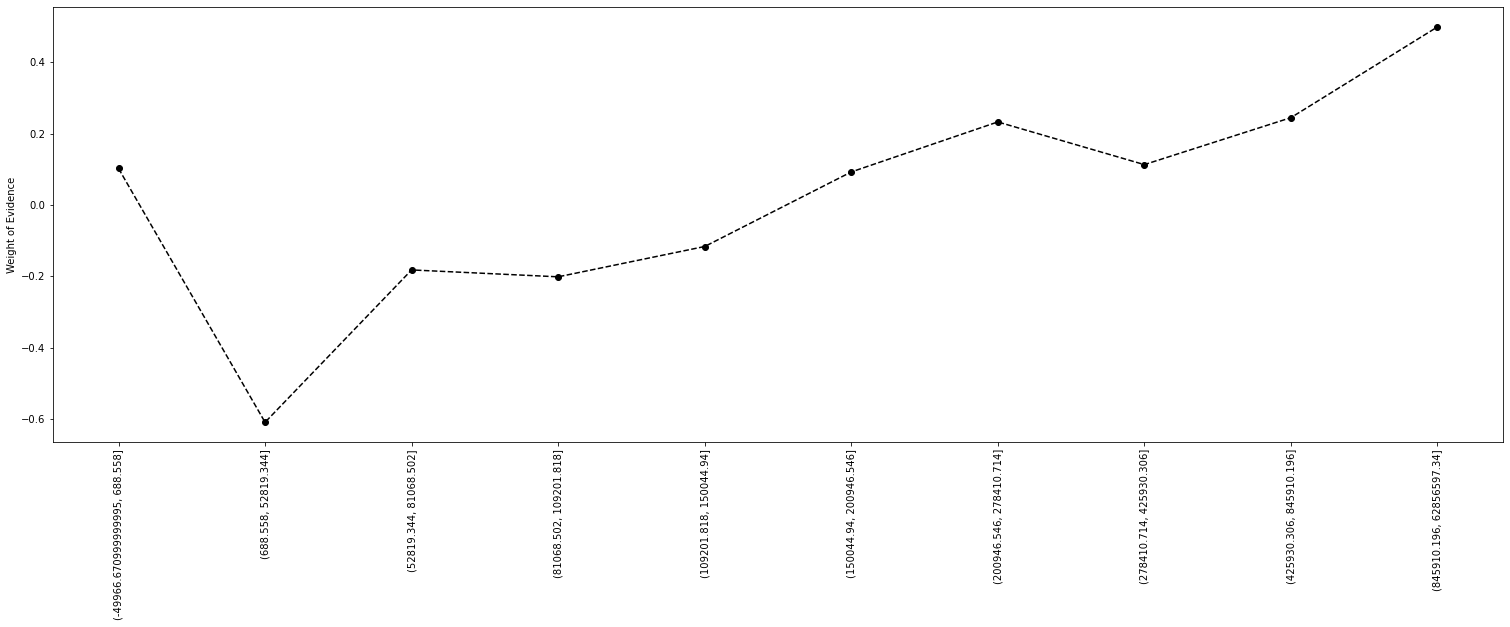

In [157]:

plot_by_woe(woe_num(Train,'maximumBalance_fine', 'GBFlag'), 90)


In [158]:


## Coarse classing maximumBalance variable
bins = [-np.inf, 689, 52820,150045,   np.inf]

Train['maximumBalance_grped'] = pd.cut(Train['maximumBalance'], bins, precision=0, include_lowest=True, right=False,)

Test['maximumBalance_grped'] = pd.cut(Test['maximumBalance'], bins, precision=0, include_lowest=True, right=False,)

Train['maximumBalance_grped'].value_counts()

[150045.0, inf)        1406
[52820.0, 150045.0)     844
[-inf, 689.0)           282
[689.0, 52820.0)        281
Name: maximumBalance_grped, dtype: int64

### maximumBalanceMonthly

In [159]:
### maximumBalanceMonthly
#Fine Classsing)
Train['maximumBalanceMonthly_fine'] = pd.qcut(Train['maximumBalanceMonthly'], q=10, duplicates='drop')
woe_num(Train,'maximumBalanceMonthly_fine', 'GBFlag')


GBFlag                         Bad  Good  Freq  Percentage  % Good  % Bad  \
maximumBalanceMonthly_fine                                                  
(-9280056.931, 0.0]             84   238   322        11.4    11.6   11.0   
(0.0, 787473.022]               87   154   241         8.6     7.5   11.4   
(787473.022, 1611460.156]       70   211   281        10.0    10.3    9.2   
(1611460.156, 2521047.864]      77   204   281        10.0    10.0   10.1   
(2521047.864, 3639682.93]       78   204   282        10.0    10.0   10.2   
(3639682.93, 5312957.054]       94   187   281        10.0     9.1   12.3   
(5312957.054, 8063854.374]      65   216   281        10.0    10.5    8.5   
(8063854.374, 13385309.644]     85   196   281        10.0     9.6   11.1   
(13385309.644, 28996562.652]    68   213   281        10.0    10.4    8.9   
(28996562.652, 7911362265.47]   55   227   282        10.0    11.1    7.2   

GBFlag                         Bad Rate  GoodBaddOdds       WOE        IV  
maximumBalanceMonthly_fine                                                 
(-9280056.931, 0.0]                26.1          2.83  0.053110  0.031866  
(0.0, 787473.022]                  36.1          1.77 -0.418710  1.632970  
(787473.022, 1611460.156]          24.9          3.01  0.112940  0.124234  
(1611460.156, 2521047.864]         27.4          2.65 -0.009950  0.000995  
(2521047.864, 3639682.93]          27.7          2.62 -0.019803  0.003961  
(3639682.93, 5312957.054]          33.5          1.99 -0.301325  0.964240  
(5312957.054, 8063854.374]         23.1          3.32  0.211309  0.422618  
(8063854.374, 13385309.644]        30.2          2.31 -0.145182  0.217773  
(13385309.644, 28996562.652]       24.2          3.13  0.155755  0.233632  
(28996562.652, 7911362265.47]      19.5          4.13  0.432864  1.688170

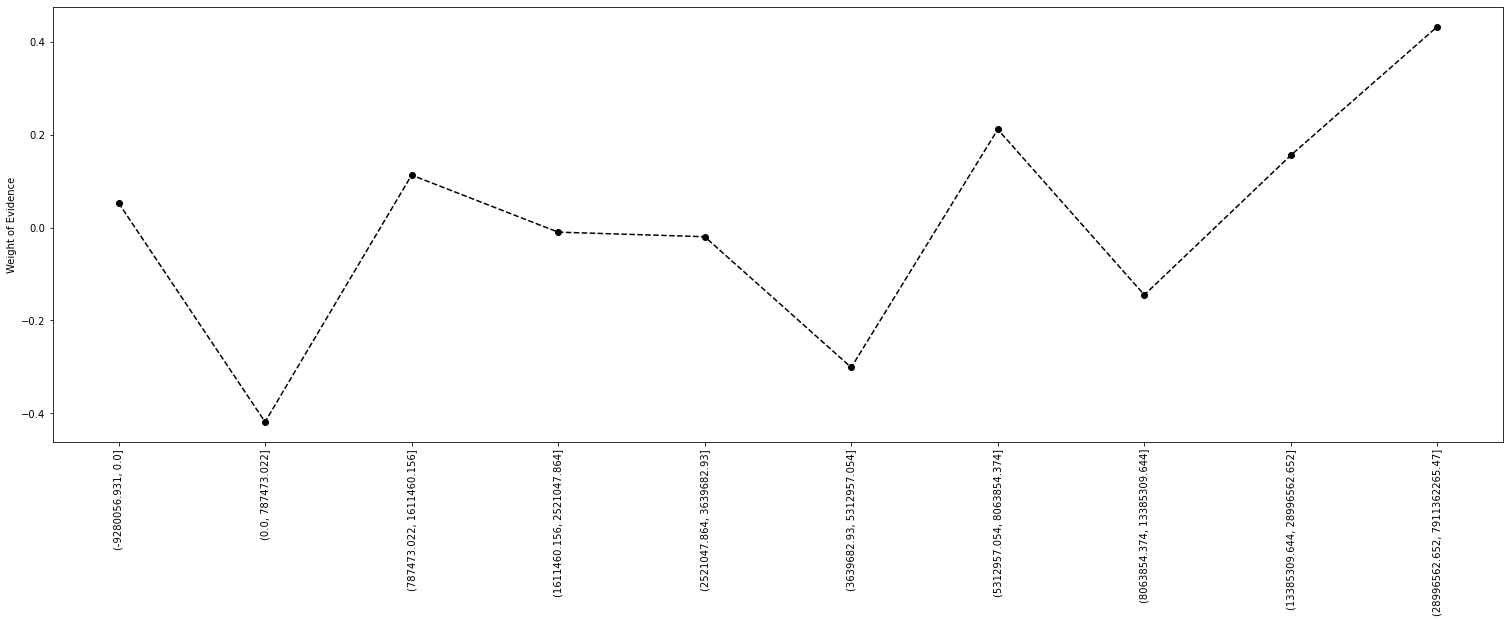

In [160]:

plot_by_woe(woe_num(Train,'maximumBalanceMonthly_fine', 'GBFlag'), 90)

In [161]:



## Coarse classing maximumBalanceMonthly variable
bins = [-np.inf,0.1, 787474, 1611461, 3639683, 5312958, 8063855, 13385310,  np.inf]

Train['maximumBalanceMonthly_grped'] = pd.cut(Train['maximumBalanceMonthly'], bins, precision=0, include_lowest=True, right=False,)

Test['maximumBalanceMonthly_grped'] = pd.cut(Test['maximumBalanceMonthly'], bins, precision=0, include_lowest=True, right=False,)

Train['maximumBalanceMonthly_grped'].value_counts()

[1611461.0, 3639683.0)     563
[13385310.0, inf)          563
[-inf, 0.0)                322
[787474.0, 1611461.0)      281
[3639683.0, 5312958.0)     281
[5312958.0, 8063855.0)     281
[8063855.0, 13385310.0)    281
[0.0, 787474.0)            241
Name: maximumBalanceMonthly_grped, dtype: int64

In [162]:
woe_cat(Train, 'maximumBalanceMonthly_grped', 'GBFlag')

GBFlag                       Bad  Good  Freq    Proptn    % Good     % Bad  \
maximumBalanceMonthly_grped                                                  
[13385310.0, inf)            123   440   563  0.200142  0.214634  0.161206   
[5312958.0, 8063855.0)        65   216   281  0.099893  0.105366  0.085190   
[787474.0, 1611461.0)         70   211   281  0.099893  0.102927  0.091743   
[-inf, 0.0)                   84   238   322  0.114469  0.116098  0.110092   
[1611461.0, 3639683.0)       155   408   563  0.200142  0.199024  0.203145   
[8063855.0, 13385310.0)       85   196   281  0.099893  0.095610  0.111402   
[3639683.0, 5312958.0)        94   187   281  0.099893  0.091220  0.123198   
[0.0, 787474.0)               87   154   241  0.085674  0.075122  0.114024   

GBFlag                       Bad Rate  GoodBaddOdds       WOE  class IV  \
maximumBalanceMonthly_grped                                               
[13385310.0, inf)            0.218472          3.58 -0.286253  0.015294   
[5312958.0, 8063855.0)       0.231317          3.32 -0.212554  0.004288   
[787474.0, 1611461.0)        0.249110          3.01 -0.115026  0.001286   
[-inf, 0.0)                  0.260870          2.83 -0.053117  0.000319   
[1611461.0, 3639683.0)       0.275311          2.63  0.020495  0.000084   
[8063855.0, 13385310.0)      0.302491          2.31  0.152874  0.002414   
[3639683.0, 5312958.0)       0.334520          1.99  0.300523  0.009610   
[0.0, 787474.0)              0.360996          1.77  0.417293  0.016233   

GBFlag                       Variable IV  
maximumBalanceMonthly_grped               
[13385310.0, inf)                0.04953  
[5312958.0, 8063855.0)           0.04953  
[787474.0, 1611461.0)            0.04953  
[-inf, 0.0)                      0.04953  
[1611461.0, 3639683.0)           0.04953  
[8063855.0, 13385310.0)          0.04953  
[3639683.0, 5312958.0)           0.04953  
[0.0, 787474.0)                  0.04953

### maximumBalanceWeekly

In [163]:
### maximumBalanceWeekly
#Fine Classsing)
Train['maximumBalanceWeekly_fine'] = pd.qcut(Train['maximumBalanceWeekly'], q=10, duplicates='drop')
woe_num(Train,'maximumBalanceWeekly_fine', 'GBFlag')

GBFlag                         Bad  Good  Freq  Percentage  % Good  % Bad  \
maximumBalanceWeekly_fine                                                   
(-436262.311, 0.0]              73   214   287        10.2    10.4    9.6   
(0.0, 464828.942]               96   180   276         9.8     8.8   12.6   
(464828.942, 918676.37]         76   205   281        10.0    10.0   10.0   
(918676.37, 1440999.778]        81   200   281        10.0     9.8   10.6   
(1440999.778, 2015074.77]       73   209   282        10.0    10.2    9.6   
(2015074.77, 2875000.56]        91   190   281        10.0     9.3   11.9   
(2875000.56, 4444278.528]       80   201   281        10.0     9.8   10.5   
(4444278.528, 7424384.444]      66   215   281        10.0    10.5    8.7   
(7424384.444, 17003656.634]     73   208   281        10.0    10.1    9.6   
(17003656.634, 4332733281.03]   54   228   282        10.0    11.1    7.1   

GBFlag                         Bad Rate  GoodBaddOdds       WOE        IV  
maximumBalanceWeekly_fine                                                  
(-436262.311, 0.0]                 25.4          2.93  0.080043  0.064034  
(0.0, 464828.942]                  34.8          1.88 -0.358945  1.363991  
(464828.942, 918676.37]            27.0          2.70  0.000000  0.000000  
(918676.37, 1440999.778]           28.8          2.47 -0.078472  0.062777  
(1440999.778, 2015074.77]          25.9          2.86  0.060625  0.036375  
(2015074.77, 2875000.56]           32.4          2.09 -0.246524  0.640962  
(2875000.56, 4444278.528]          28.5          2.51 -0.068993  0.048295  
(4444278.528, 7424384.444]         23.5          3.26  0.188052  0.338494  
(7424384.444, 17003656.634]        26.0          2.85  0.050772  0.025386  
(17003656.634, 4332733281.03]      19.1          4.22  0.446850  1.787401

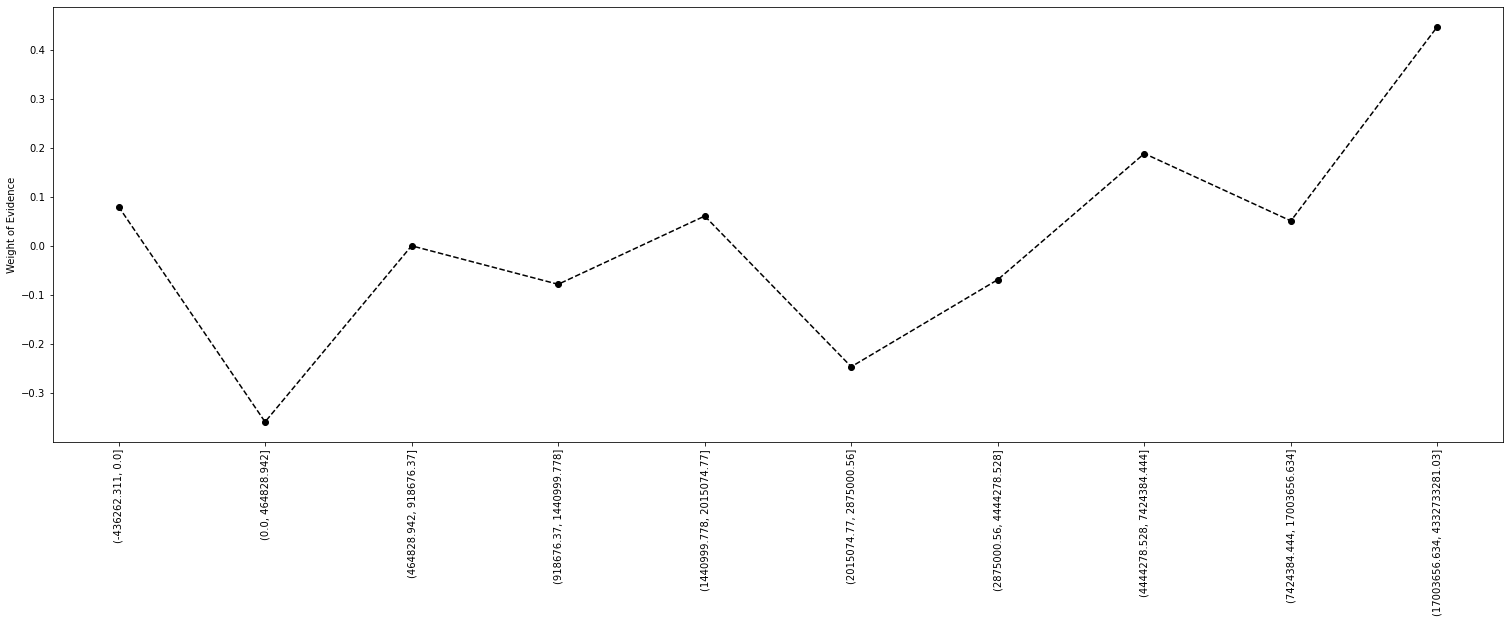

In [164]:


plot_by_woe(woe_num(Train,'maximumBalanceWeekly_fine', 'GBFlag'), 90)


In [165]:

## Coarse classing maximumBalanceWeekly variable
bins = [-np.inf, 1, 464829, 2015075, 4444279, np.inf]

Train['maximumBalanceWeekly_grped'] = pd.cut(Train['maximumBalanceWeekly'], bins, precision=0, include_lowest=True, right=False,)

Test['maximumBalanceWeekly_grped'] = pd.cut(Test['maximumBalanceWeekly'], bins, precision=0, include_lowest=True, right=False,)

Train['maximumBalanceWeekly_grped'].value_counts()

[464829.0, 2015075.0)     844
[4444279.0, inf)          844
[2015075.0, 4444279.0)    562
[-inf, 1.0)               287
[1.0, 464829.0)           276
Name: maximumBalanceWeekly_grped, dtype: int64

In [166]:
woe_cat(Train,'maximumBalanceWeekly_grped', 'GBFlag')

GBFlag                      Bad  Good  Freq    Proptn    % Good     % Bad  \
maximumBalanceWeekly_grped                                                  
[4444279.0, inf)            193   651   844  0.300036  0.317561  0.252949   
[-inf, 1.0)                  73   214   287  0.102026  0.104390  0.095675   
[464829.0, 2015075.0)       230   614   844  0.300036  0.299512  0.301442   
[2015075.0, 4444279.0)      171   391   562  0.199787  0.190732  0.224115   
[1.0, 464829.0)              96   180   276  0.098116  0.087805  0.125819   

GBFlag                      Bad Rate  GoodBaddOdds       WOE  class IV  \
maximumBalanceWeekly_grped                                               
[4444279.0, inf)            0.228673          3.37 -0.227482  0.014698   
[-inf, 1.0)                 0.254355          2.93 -0.087180  0.000760   
[464829.0, 2015075.0)       0.272512          2.67  0.006421  0.000012   
[2015075.0, 4444279.0)      0.304270          2.29  0.161293  0.005385   
[1.0, 464829.0)             0.347826          1.88  0.359728  0.013675   

GBFlag                      Variable IV  
maximumBalanceWeekly_grped               
[4444279.0, inf)                0.03453  
[-inf, 1.0)                     0.03453  
[464829.0, 2015075.0)           0.03453  
[2015075.0, 4444279.0)          0.03453  
[1.0, 464829.0)                 0.03453

### medianBalanceMonthly

In [167]:
### medianBalanceMonthly
#Fine Classsing)
Train['medianBalanceMonthly_fine'] = pd.qcut(Train['medianBalanceMonthly'], q=10, duplicates='drop')
woe_num(Train,'medianBalanceMonthly_fine', 'GBFlag')

GBFlag                        Bad  Good  Freq  Percentage  % Good  % Bad  \
medianBalanceMonthly_fine                                                  
(-39040000.771000005, 0.0]    102   278   380        13.5    13.6   13.4   
(0.0, 283212.752]              63   120   183         6.5     5.9    8.3   
(283212.752, 642164.607]       89   192   281        10.0     9.4   11.7   
(642164.607, 1009487.228]      89   192   281        10.0     9.4   11.7   
(1009487.228, 1469544.39]      71   211   282        10.0    10.3    9.3   
(1469544.39, 2140426.397]      77   204   281        10.0    10.0   10.1   
(2140426.397, 3214166.06]      75   206   281        10.0    10.0    9.8   
(3214166.06, 5025035.841]      79   202   281        10.0     9.9   10.4   
(5025035.841, 10087203.145]    64   217   281        10.0    10.6    8.4   
(10087203.145, 401635451.66]   54   228   282        10.0    11.1    7.1   

GBFlag                        Bad Rate  GoodBaddOdds       WOE        IV  
medianBalanceMonthly_fine                                                 
(-39040000.771000005, 0.0]        26.8          2.73  0.014815  0.002963  
(0.0, 283212.752]                 34.4          1.90 -0.341303  0.819128  
(283212.752, 642164.607]          31.7          2.16 -0.218879  0.503422  
(642164.607, 1009487.228]         31.7          2.16 -0.218879  0.503422  
(1009487.228, 1469544.39]         25.2          2.97  0.102129  0.102129  
(1469544.39, 2140426.397]         27.4          2.65 -0.009950  0.000995  
(2140426.397, 3214166.06]         26.7          2.75  0.020203  0.004041  
(3214166.06, 5025035.841]         28.1          2.56 -0.049271  0.024636  
(5025035.841, 10087203.145]       22.8          3.39  0.232622  0.511769  
(10087203.145, 401635451.66]      19.1          4.22  0.446850  1.787401

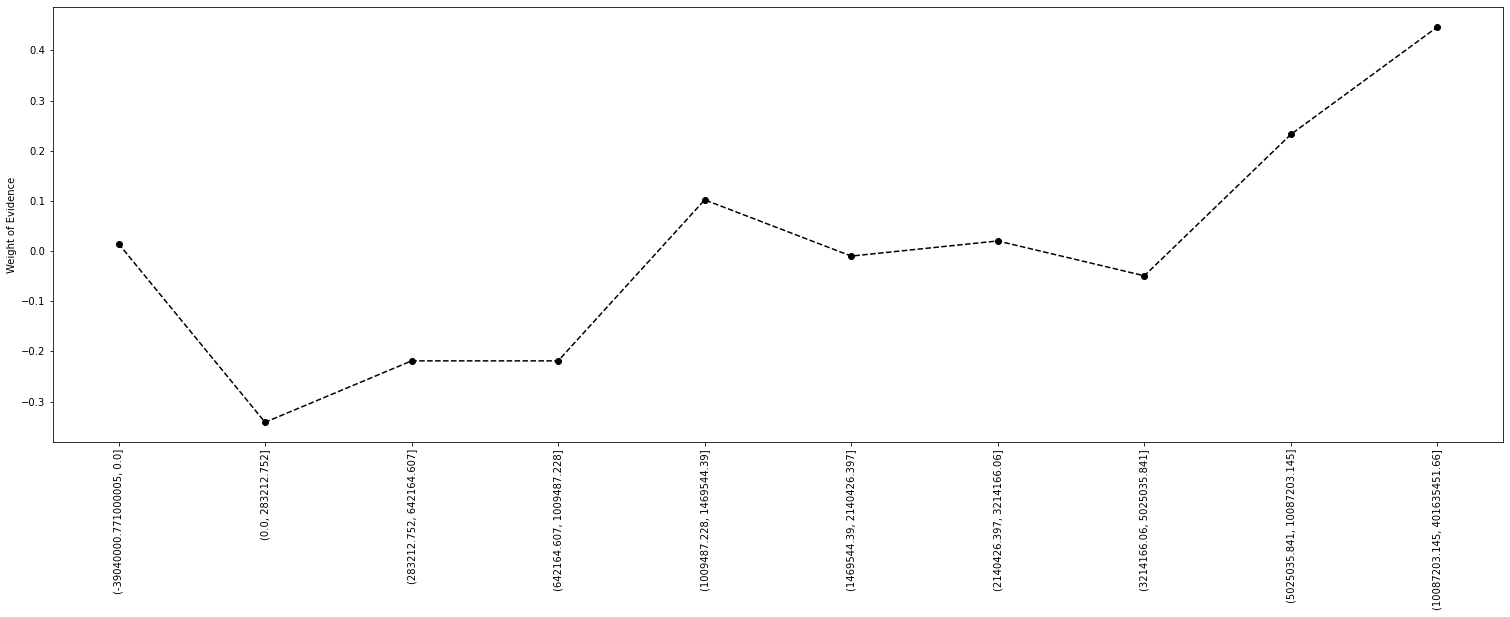

In [168]:

plot_by_woe(woe_num(Train,'medianBalanceMonthly_fine', 'GBFlag'), 90)

In [169]:

## Coarse classing medianBalanceMonthly variable
bins = [-np.inf, 0.1, 1009488, 1469545,5025036 ,   np.inf]

Train['medianBalanceMonthly_grped'] = pd.cut(Train['medianBalanceMonthly'], bins, precision=0, include_lowest=True, right=False,)

Test['medianBalanceMonthly_grped'] = pd.cut(Test['medianBalanceMonthly'], bins, precision=0, include_lowest=True, right=False,)

Train['medianBalanceMonthly_grped'].value_counts()

[1469545.0, 5025036.0)    843
[0.0, 1009488.0)          745
[5025036.0, inf)          563
[-inf, 0.0)               380
[1009488.0, 1469545.0)    282
Name: medianBalanceMonthly_grped, dtype: int64

### medianBalanceWeekly

In [170]:
### medianBalanceWeekly
#Fine Classsing)
Train['medianBalanceWeekly_fine'] = pd.qcut(Train['medianBalanceWeekly'], q=10, duplicates='drop')
woe_num(Train,'medianBalanceWeekly_fine', 'GBFlag')

GBFlag                      Bad  Good  Freq  Percentage  % Good  % Bad  \
medianBalanceWeekly_fine                                                 
(-10805627.196, 0.0]        108   278   386        13.7    13.6   14.2   
(0.0, 48025.576]             51   126   177         6.3     6.1    6.7   
(48025.576, 111845.386]      92   189   281        10.0     9.2   12.1   
(111845.386, 186905.258]     86   195   281        10.0     9.5   11.3   
(186905.258, 278594.915]     82   200   282        10.0     9.8   10.7   
(278594.915, 420434.808]     70   211   281        10.0    10.3    9.2   
(420434.808, 638690.174]     71   210   281        10.0    10.2    9.3   
(638690.174, 985085.784]     85   196   281        10.0     9.6   11.1   
(985085.784, 1996620.21]     65   216   281        10.0    10.5    8.5   
(1996620.21, 86448276.125]   53   229   282        10.0    11.2    6.9   

GBFlag                      Bad Rate  GoodBaddOdds       WOE        IV  
medianBalanceWeekly_fine                                                
(-10805627.196, 0.0]            28.0          2.57 -0.043172  0.025903  
(0.0, 48025.576]                28.8          2.47 -0.093819  0.056291  
(48025.576, 111845.386]         32.7          2.05 -0.274002  0.794606  
(111845.386, 186905.258]        30.6          2.27 -0.173511  0.312320  
(186905.258, 278594.915]        29.1          2.44 -0.087861  0.079075  
(278594.915, 420434.808]        24.9          3.01  0.112940  0.124234  
(420434.808, 638690.174]        25.3          2.96  0.092373  0.083136  
(638690.174, 985085.784]        30.2          2.31 -0.145182  0.217773  
(985085.784, 1996620.21]        23.1          3.32  0.211309  0.422618  
(1996620.21, 86448276.125]      18.8          4.32  0.484392  2.082887

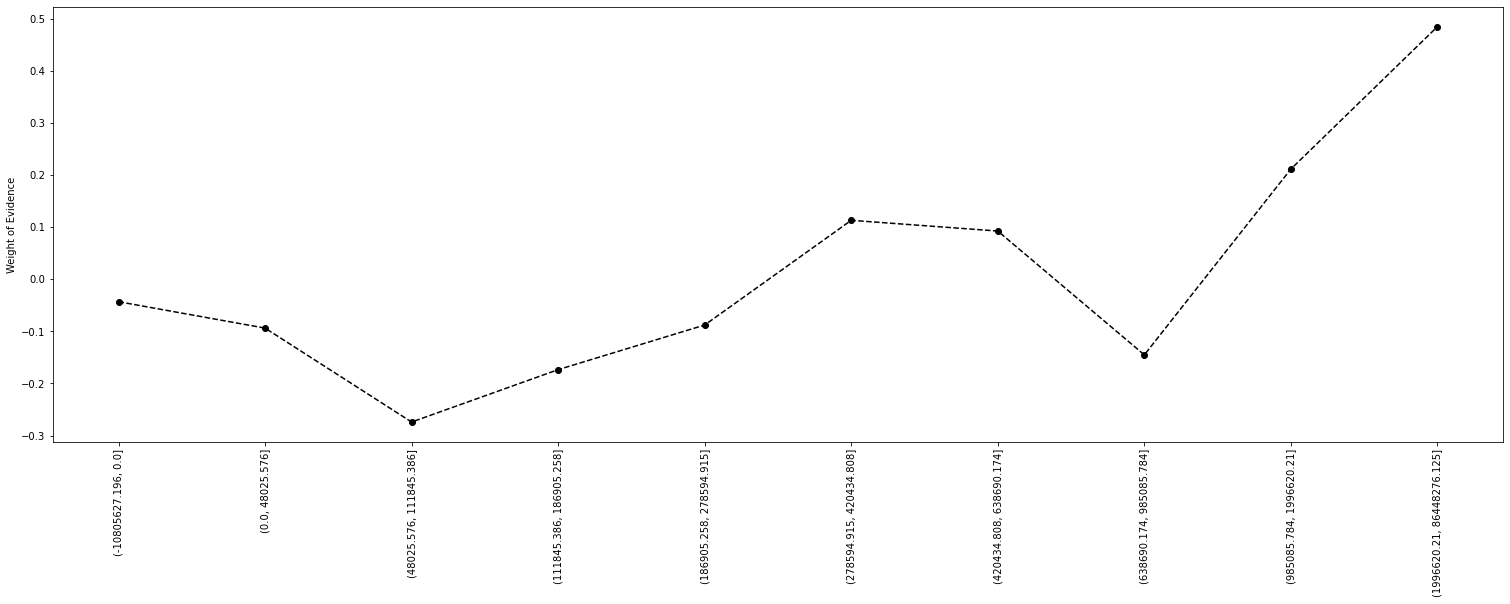

In [171]:

plot_by_woe(woe_num(Train,'medianBalanceWeekly_fine', 'GBFlag'), 90)

In [172]:
## Coarse classing medianBalanceWeekly variable
bins = [-np.inf, 48026, 278595, 638691, 985086,   np.inf]

Train['medianBalanceWeekly_grped'] = pd.cut(Train['medianBalanceWeekly'], bins, precision=0, include_lowest=True, right=False,)

Test['medianBalanceWeekly_grped'] = pd.cut(Test['medianBalanceWeekly'], bins, precision=0, include_lowest=True, right=False,)

Train['medianBalanceWeekly_grped'].value_counts()

[48026.0, 278595.0)     844
[-inf, 48026.0)         563
[985086.0, inf)         563
[278595.0, 638691.0)    562
[638691.0, 985086.0)    281
Name: medianBalanceWeekly_grped, dtype: int64

In [173]:
woe_cat(Train,'medianBalanceWeekly_grped', 'GBFlag')

GBFlag                     Bad  Good  Freq    Proptn    % Good     % Bad  \
medianBalanceWeekly_grped                                                  
[985086.0, inf)            118   445   563  0.200142  0.217073  0.154653   
[278595.0, 638691.0)       141   421   562  0.199787  0.205366  0.184797   
[-inf, 48026.0)            159   404   563  0.200142  0.197073  0.208388   
[638691.0, 985086.0)        85   196   281  0.099893  0.095610  0.111402   
[48026.0, 278595.0)        260   584   844  0.300036  0.284878  0.340760   

GBFlag                     Bad Rate  GoodBaddOdds       WOE  class IV  \
medianBalanceWeekly_grped                                               
[985086.0, inf)            0.209591          3.77 -0.339053  0.021164   
[278595.0, 638691.0)       0.250890          2.99 -0.105536  0.002171   
[-inf, 48026.0)            0.282416          2.54  0.055826  0.000632   
[638691.0, 985086.0)       0.302491          2.31  0.152874  0.002414   
[48026.0, 278595.0)        0.308057          2.25  0.179118  0.010009   

GBFlag                     Variable IV  
medianBalanceWeekly_grped               
[985086.0, inf)                0.03639  
[278595.0, 638691.0)           0.03639  
[-inf, 48026.0)                0.03639  
[638691.0, 985086.0)           0.03639  
[48026.0, 278595.0)            0.03639

### minimumBalanceMonthly

In [174]:
### minimumBalanceMonthly
#Fine Classsing)
Train['minimumBalanceMonthly_fine'] = pd.qcut(Train['minimumBalanceMonthly'], q=10, duplicates='drop')
woe_num(Train,'minimumBalanceMonthly_fine', 'GBFlag')


GBFlag                      Bad  Good  Freq  Percentage  % Good  % Bad  \
minimumBalanceMonthly_fine                                               
(-87372410.611, 0.0]        145   365   510        18.1    17.8   19.0   
(0.0, 514.096]               24    29    53         1.9     1.4    3.1   
(514.096, 63395.066]         78   203   281        10.0     9.9   10.2   
(63395.066, 126588.436]      77   204   281        10.0    10.0   10.1   
(126588.436, 225261.56]      84   198   282        10.0     9.7   11.0   
(225261.56, 374849.374]      74   207   281        10.0    10.1    9.7   
(374849.374, 595782.046]     69   212   281        10.0    10.3    9.0   
(595782.046, 1017725.818]    84   197   281        10.0     9.6   11.0   
(1017725.818, 2119522.608]   81   200   281        10.0     9.8   10.6   
(2119522.608, 81769820.35]   47   235   282        10.0    11.5    6.2   

GBFlag                      Bad Rate  GoodBaddOdds       WOE        IV  
minimumBalanceMonthly_fine                                              
(-87372410.611, 0.0]            28.4          2.52 -0.065241  0.078289  
(0.0, 514.096]                  45.3          1.21 -0.794930  1.351381  
(514.096, 63395.066]            27.8          2.60 -0.029853  0.008956  
(63395.066, 126588.436]         27.4          2.65 -0.009950  0.000995  
(126588.436, 225261.56]         29.8          2.36 -0.125769  0.163500  
(225261.56, 374849.374]         26.3          2.80  0.040410  0.016164  
(374849.374, 595782.046]        24.6          3.07  0.134919  0.175395  
(595782.046, 1017725.818]       29.9          2.35 -0.136132  0.190585  
(1017725.818, 2119522.608]      28.8          2.47 -0.078472  0.062777  
(2119522.608, 81769820.35]      16.7          5.00  0.617798  3.274328

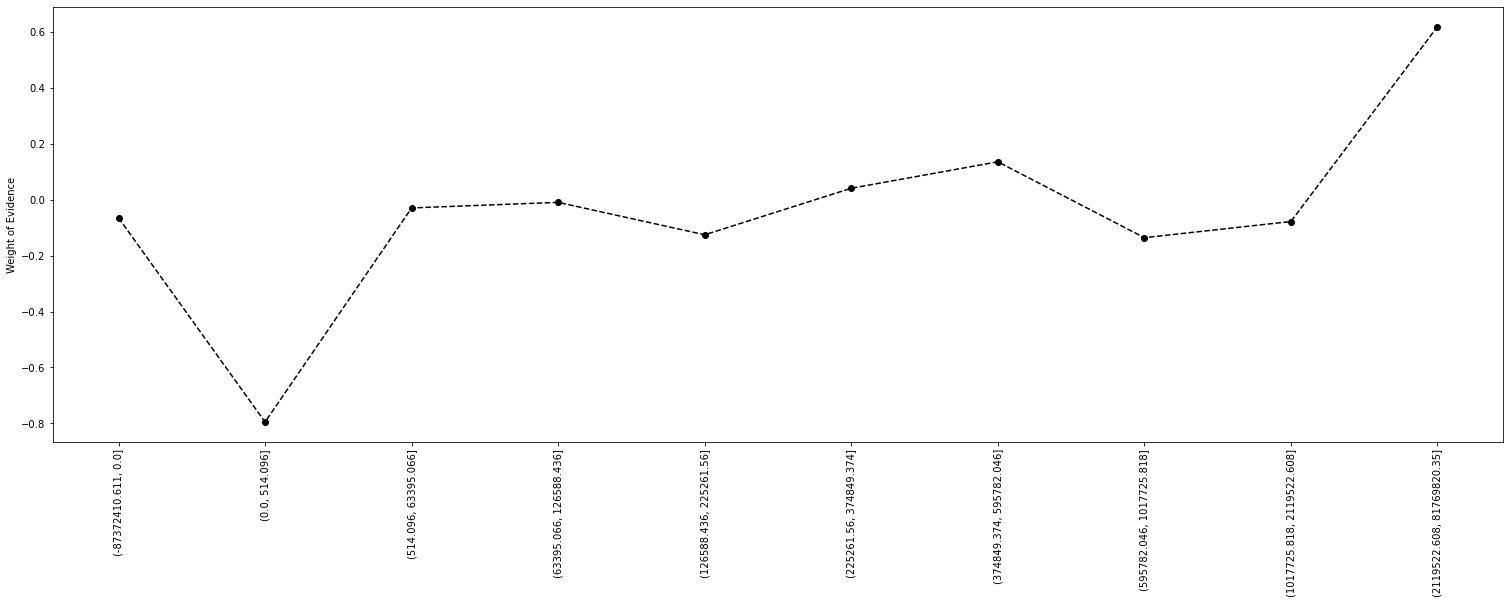

In [175]:

plot_by_woe(woe_num(Train,'minimumBalanceMonthly_fine', 'GBFlag'), 90)

In [176]:
## Coarse classing minimumBalanceMonthly variable
bins = [-np.inf,  225262, 595783, 2119523,  np.inf]

Train['minimumBalanceMonthly_grped'] = pd.cut(Train['minimumBalanceMonthly'], bins, precision=0, include_lowest=True, right=False,)

Test['minimumBalanceMonthly_grped'] = pd.cut(Test['minimumBalanceMonthly'], bins, precision=0, include_lowest=True, right=False,)

Train['minimumBalanceMonthly_grped'].value_counts()

[-inf, 225262.0)         1407
[225262.0, 595783.0)      562
[595783.0, 2119523.0)     562
[2119523.0, inf)          282
Name: minimumBalanceMonthly_grped, dtype: int64

### minimumBalanceWeekly

In [177]:
### minimumBalanceWeekly
#Fine Classsing)
Train['minimumBalanceWeekly_fine'] = pd.qcut(Train['minimumBalanceWeekly'], q=10, duplicates='drop')
woe_num(Train,'minimumBalanceWeekly_fine', 'GBFlag')


GBFlag                            Bad  Good  Freq  Percentage  % Good  % Bad  \
minimumBalanceWeekly_fine                                                      
(-74639051.93100001, -30541.978]   79   203   282        10.0     9.9   10.4   
(-30541.978, 0.0]                 121   329   450        16.0    16.0   15.9   
(0.0, 65.244]                      36    76   112         4.0     3.7    4.7   
(65.244, 2094.008]                 99   182   281        10.0     8.9   13.0   
(2094.008, 7247.84]                85   197   282        10.0     9.6   11.1   
(7247.84, 18428.74]                88   193   281        10.0     9.4   11.5   
(18428.74, 39635.872]              71   210   281        10.0    10.2    9.3   
(39635.872, 82610.342]             72   209   281        10.0    10.2    9.4   
(82610.342, 215342.444]            67   214   281        10.0    10.4    8.8   
(215342.444, 14551841.08]          45   237   282        10.0    11.6    5.9   

GBFlag                            Bad Rate  GoodBaddOdds       WOE        IV  
minimumBalanceWeekly_fine                                                     
(-74639051.93100001, -30541.978]      28.0          2.57 -0.049271  0.024636  
(-30541.978, 0.0]                     26.9          2.72  0.006270  0.000627  
(0.0, 65.244]                         32.1          2.11 -0.239230  0.239230  
(65.244, 2094.008]                    35.2          1.84 -0.378898  1.553482  
(2094.008, 7247.84]                   30.1          2.32 -0.145182  0.217773  
(7247.84, 18428.74]                   31.3          2.19 -0.201637  0.423438  
(18428.74, 39635.872]                 25.3          2.96  0.092373  0.083136  
(39635.872, 82610.342]                25.6          2.90  0.081678  0.065342  
(82610.342, 215342.444]               23.8          3.19  0.167054  0.267287  
(215342.444, 14551841.08]             16.0          5.27  0.676053  3.853501

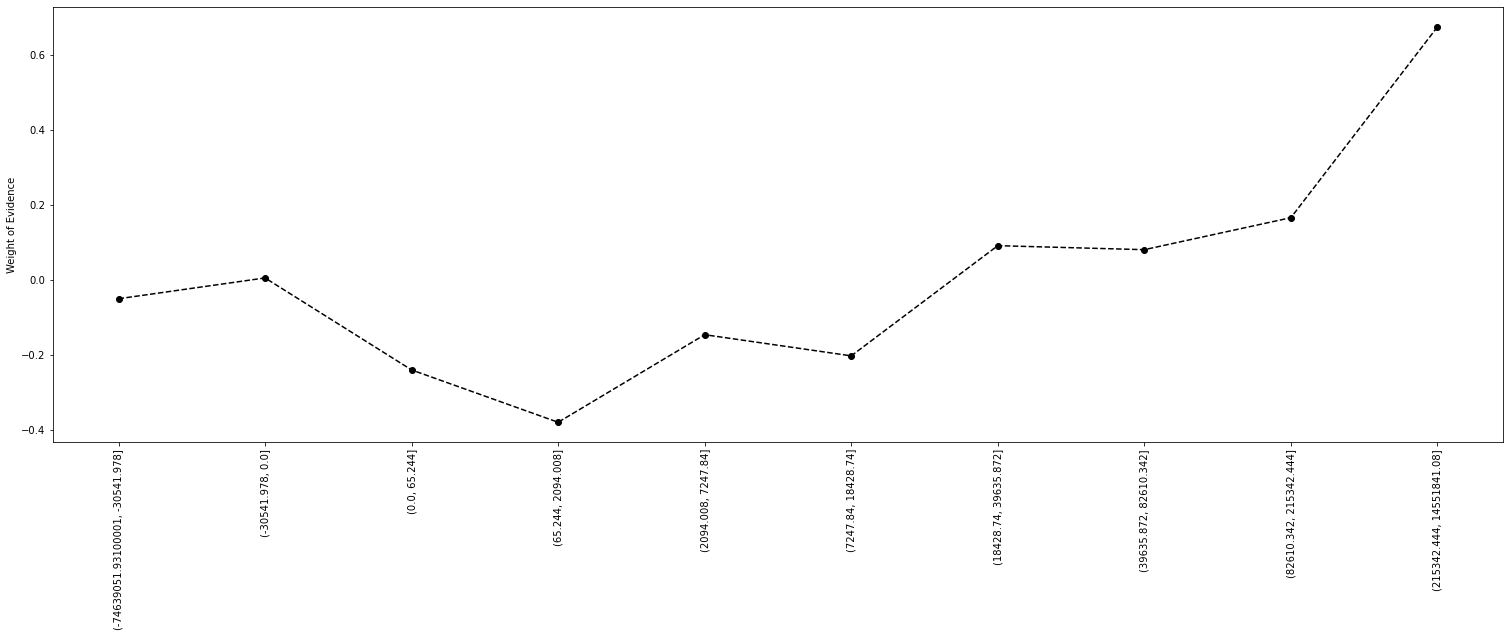

In [178]:

plot_by_woe(woe_num(Train,'minimumBalanceWeekly_fine', 'GBFlag'), 90)


In [179]:
## Coarse classing minimumBalanceWeekly variable
bins = [-np.inf, 0.1, 18429, 215343, np.inf]

Train['minimumBalanceWeekly_grped'] = pd.cut(Train['minimumBalanceWeekly'], bins, precision=0, include_lowest=True, right=False,)

Test['minimumBalanceWeekly_grped'] = pd.cut(Test['minimumBalanceWeekly'], bins, precision=0, include_lowest=True, right=False,)

Train['minimumBalanceWeekly_grped'].value_counts()

[0.0, 18429.0)         955
[18429.0, 215343.0)    843
[-inf, 0.0)            733
[215343.0, inf)        282
Name: minimumBalanceWeekly_grped, dtype: int64

### minimumCreditWeekly

In [180]:
### minimumCreditWeekly
#Fine Classsing)
Train['minimumCreditWeekly_fine'] = pd.qcut(Train['minimumCreditWeekly'], q=10, duplicates='drop')
woe_num(Train,'minimumCreditWeekly_fine', 'GBFlag')


GBFlag                    Bad  Good  Freq  Percentage  % Good  % Bad  \
minimumCreditWeekly_fine                                               
(-0.001, 201.6]           303   822  1125        40.0    40.1   39.7   
(201.6, 2600.0]            91   191   282        10.0     9.3   11.9   
(2600.0, 5602.0]           93   188   281        10.0     9.2   12.2   
(5602.0, 10804.4]          79   202   281        10.0     9.9   10.4   
(10804.4, 20000.0]         85   202   287        10.2     9.9   11.1   
(20000.0, 43946.4]         63   212   275         9.8    10.3    8.3   
(43946.4, 1468910.55]      49   233   282        10.0    11.4    6.4   

GBFlag                    Bad Rate  GoodBaddOdds       WOE        IV  
minimumCreditWeekly_fine                                              
(-0.001, 201.6]               26.9          2.71  0.010025  0.004010  
(201.6, 2600.0]               32.3          2.10 -0.246524  0.640962  
(2600.0, 5602.0]              33.1          2.02 -0.282232  0.846697  
(5602.0, 10804.4]             28.1          2.56 -0.049271  0.024636  
(10804.4, 20000.0]            29.6          2.38 -0.114410  0.137292  
(20000.0, 43946.4]            22.9          3.37  0.215888  0.431777  
(43946.4, 1468910.55]         17.4          4.76  0.577315  2.886577

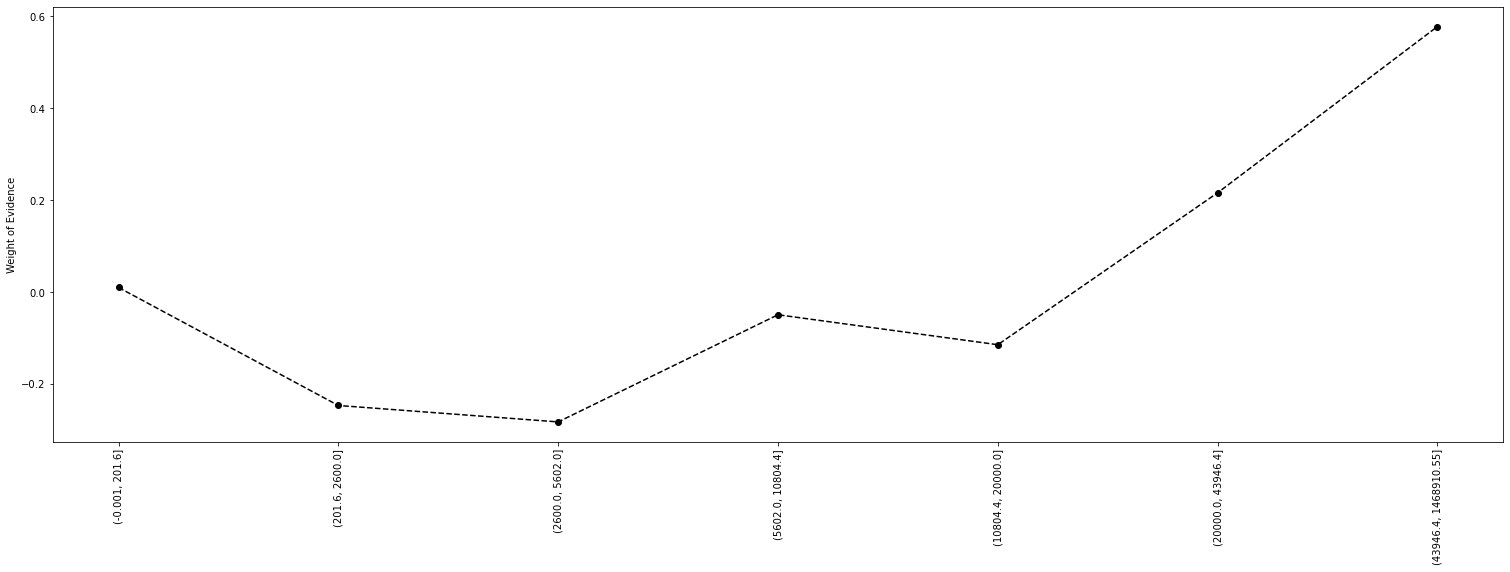

In [181]:

plot_by_woe(woe_num(Train,'minimumCreditWeekly_fine', 'GBFlag'), 90)

In [182]:
## Coarse classing minimumCreditWeekly variable
bins = [0, 201, 20001, np.inf]

Train['minimumCreditWeekly_grped'] = pd.cut(Train['minimumCreditWeekly'], bins, precision=0, include_lowest=True, right=False,)

Test['minimumCreditWeekly_grped'] = pd.cut(Test['minimumCreditWeekly'], bins, precision=0, include_lowest=True, right=False,)

Train['minimumCreditWeekly_grped'].value_counts()

[201.0, 20001.0)    1131
[0.0, 201.0)        1125
[20001.0, inf)       557
Name: minimumCreditWeekly_grped, dtype: int64

### minimumDebitWeekly

In [183]:
### minimumDebitWeekly
#Fine Classsing)
Train['minimumDebitWeekly_fine'] = pd.qcut(Train['minimumDebitWeekly'], q=10, duplicates='drop')
woe_num(Train,'minimumDebitWeekly_fine', 'GBFlag')

GBFlag                   Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
minimumDebitWeekly_fine                                                         
(-0.001, 30.486]          81   201   282        10.0     9.8   10.6      28.7   
(30.486, 200.0]           81   205   286        10.2    10.0   10.6      28.3   
(200.0, 1145.352]        101   175   276         9.8     8.5   13.2      36.6   
(1145.352, 3001.35]       84   197   281        10.0     9.6   11.0      29.9   
(3001.35, 5270.75]        80   202   282        10.0     9.9   10.5      28.4   
(5270.75, 9322.912]       80   201   281        10.0     9.8   10.5      28.5   
(9322.912, 15350.248]     76   205   281        10.0    10.0   10.0      27.0   
(15350.248, 25638.662]    78   203   281        10.0     9.9   10.2      27.8   
(25638.662, 50718.366]    57   224   281        10.0    10.9    7.5      20.3   
(50718.366, 1497860.33]   45   237   282        10.0    11.6    5.9      16.0   

GBFlag                   GoodBaddOdds       WOE        IV  
minimumDebitWeekly_fine                                    
(-0.001, 30.486]                 2.48 -0.078472  0.062777  
(30.486, 200.0]                  2.53 -0.058269  0.034961  
(200.0, 1145.352]                1.73 -0.440151  2.068708  
(1145.352, 3001.35]              2.35 -0.136132  0.190585  
(3001.35, 5270.75]               2.52 -0.058841  0.035304  
(5270.75, 9322.912]              2.51 -0.068993  0.048295  
(9322.912, 15350.248]            2.70  0.000000  0.000000  
(15350.248, 25638.662]           2.60 -0.029853  0.008956  
(25638.662, 50718.366]           3.93  0.373860  1.271123  
(50718.366, 1497860.33]          5.27  0.676053  3.853501

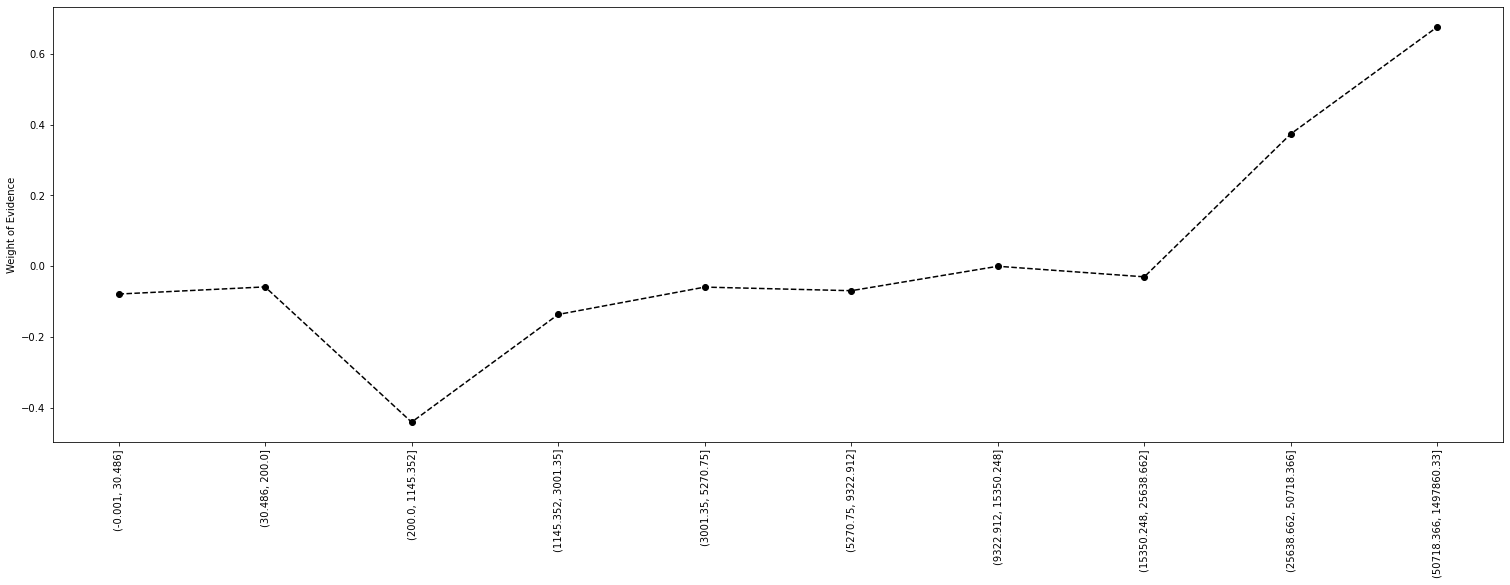

In [184]:

plot_by_woe(woe_num(Train,'minimumDebitWeekly_fine', 'GBFlag'), 90)


In [185]:
## Coarse classing minimumDebitWeekly variable
bins = [0, 201, 3002, 25639,  np.inf]

Train['minimumDebitWeekly_grped'] = pd.cut(Train['minimumDebitWeekly'], bins, precision=0, include_lowest=True, right=False,)

Test['minimumDebitWeekly_grped'] = pd.cut(Test['minimumDebitWeekly'], bins, precision=0, include_lowest=True, right=False,)

Train['minimumDebitWeekly_grped'].value_counts()

[3002.0, 25639.0)    1124
[0.0, 201.0)          568
[25639.0, inf)        563
[201.0, 3002.0)       558
Name: minimumDebitWeekly_grped, dtype: int64

In [186]:
woe_cat(Train,'minimumDebitWeekly_grped', 'GBFlag')

GBFlag                    Bad  Good  Freq    Proptn    % Good     % Bad  \
minimumDebitWeekly_grped                                                  
[25639.0, inf)            102   461   563  0.200142  0.224878  0.133683   
[3002.0, 25639.0)         314   810  1124  0.399573  0.395122  0.411533   
[0.0, 201.0)              162   406   568  0.201920  0.198049  0.212320   
[201.0, 3002.0)           185   373   558  0.198365  0.181951  0.242464   

GBFlag                    Bad Rate  GoodBaddOdds       WOE  class IV  \
minimumDebitWeekly_grped                                               
[25639.0, inf)            0.181172          4.52 -0.520088  0.047430   
[3002.0, 25639.0)         0.279359          2.58  0.040696  0.000668   
[0.0, 201.0)              0.285211          2.51  0.069580  0.000993   
[201.0, 3002.0)           0.331541          2.02  0.287114  0.017374   

GBFlag                    Variable IV  
minimumDebitWeekly_grped               
[25639.0, inf)               0.066464  
[3002.0, 25639.0)            0.066464  
[0.0, 201.0)                 0.066464  
[201.0, 3002.0)              0.066464

### minimumNumOfCreditWeekly

In [187]:
### minimumNumOfCreditWeekly
#Fine Classsing)
Train['minimumNumOfCreditWeekly_fine'] = pd.qcut(Train['minimumNumOfCreditWeekly'], q=10, duplicates='drop')
woe_num(Train,'minimumNumOfCreditWeekly_fine', 'GBFlag')

GBFlag                         Bad  Good  Freq  Percentage  % Good  % Bad  \
minimumNumOfCreditWeekly_fine                                               
(-0.001, 1.0]                  500  1327  1827        64.9    64.7   65.5   
(1.0, 2.0]                     103   289   392        13.9    14.1   13.5   
(2.0, 3.0]                      51   154   205         7.3     7.5    6.7   
(3.0, 4.0]                      29    80   109         3.9     3.9    3.8   
(4.0, 89.0]                     80   200   280        10.0     9.8   10.5   

GBFlag                         Bad Rate  GoodBaddOdds       WOE        IV  
minimumNumOfCreditWeekly_fine                                              
(-0.001, 1.0]                      27.4          2.65 -0.012289  0.009831  
(1.0, 2.0]                         26.3          2.81  0.043485  0.026091  
(2.0, 3.0]                         24.9          3.02  0.112795  0.090236  
(3.0, 4.0]                         26.6          2.76  0.025975  0.002598  
(4.0, 89.0]                        28.6          2.50 -0.068993  0.048295

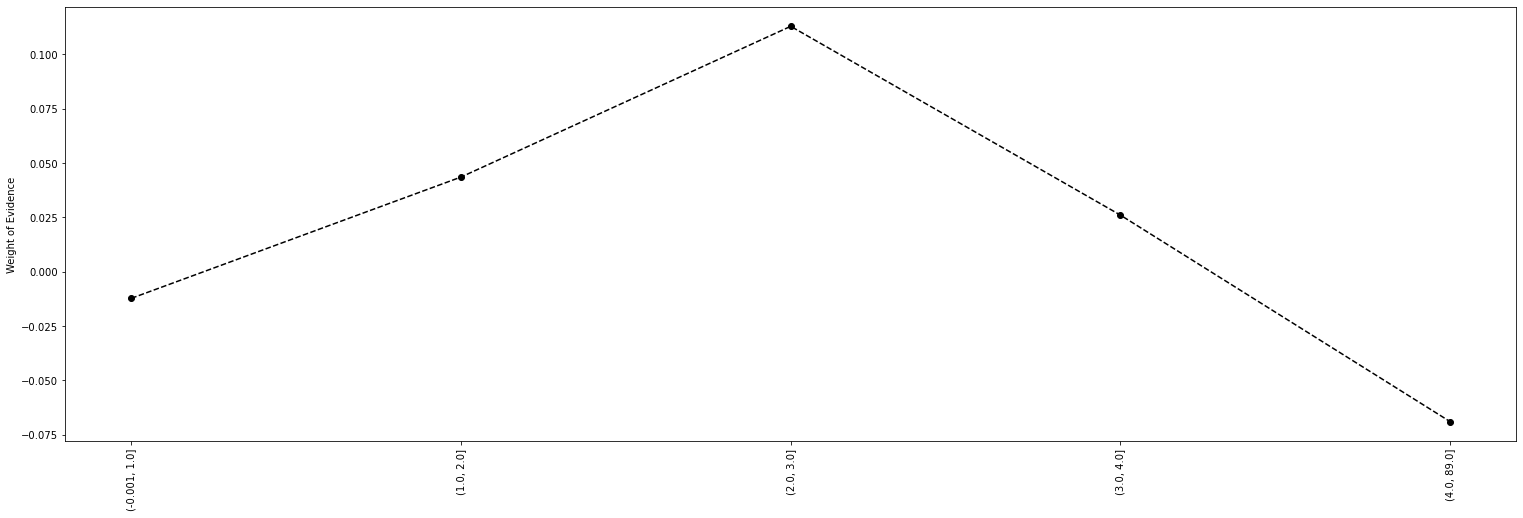

In [188]:

plot_by_woe(woe_num(Train,'minimumNumOfCreditWeekly_fine', 'GBFlag'), 90)

In [189]:
## Coarse classing minimumNumOfCreditWeekly variable
bins = [0, 1.1, np.inf]

Train['minimumNumOfCreditWeekly_grped'] = pd.cut(Train['minimumNumOfCreditWeekly'], bins, precision=0, include_lowest=True, right=False,)

Test['minimumNumOfCreditWeekly_grped'] = pd.cut(Test['minimumNumOfCreditWeekly'], bins, precision=0, include_lowest=True, right=False,)

Train['minimumNumOfCreditWeekly_grped'].value_counts()

[0.0, 1.0)    1827
[1.0, inf)     986
Name: minimumNumOfCreditWeekly_grped, dtype: int64

### monthly_betting_credit_1

In [190]:
### monthly_betting_credit_1
#Fine Classsing)
Train['monthly_betting_credit_1_fine'] = pd.qcut(Train['monthly_betting_credit_1'], q=10, duplicates='drop')
woe_num(Train,'monthly_betting_credit_1_fine', 'GBFlag')

GBFlag                         Bad  Good  Freq  Percentage  % Good  % Bad  \
monthly_betting_credit_1_fine                                               
(-0.001, 10613895.0]           763  2050  2813       100.0   100.0  100.0   

GBFlag                         Bad Rate  GoodBaddOdds  WOE   IV  
monthly_betting_credit_1_fine                                    
(-0.001, 10613895.0]               27.1          2.69  0.0  0.0

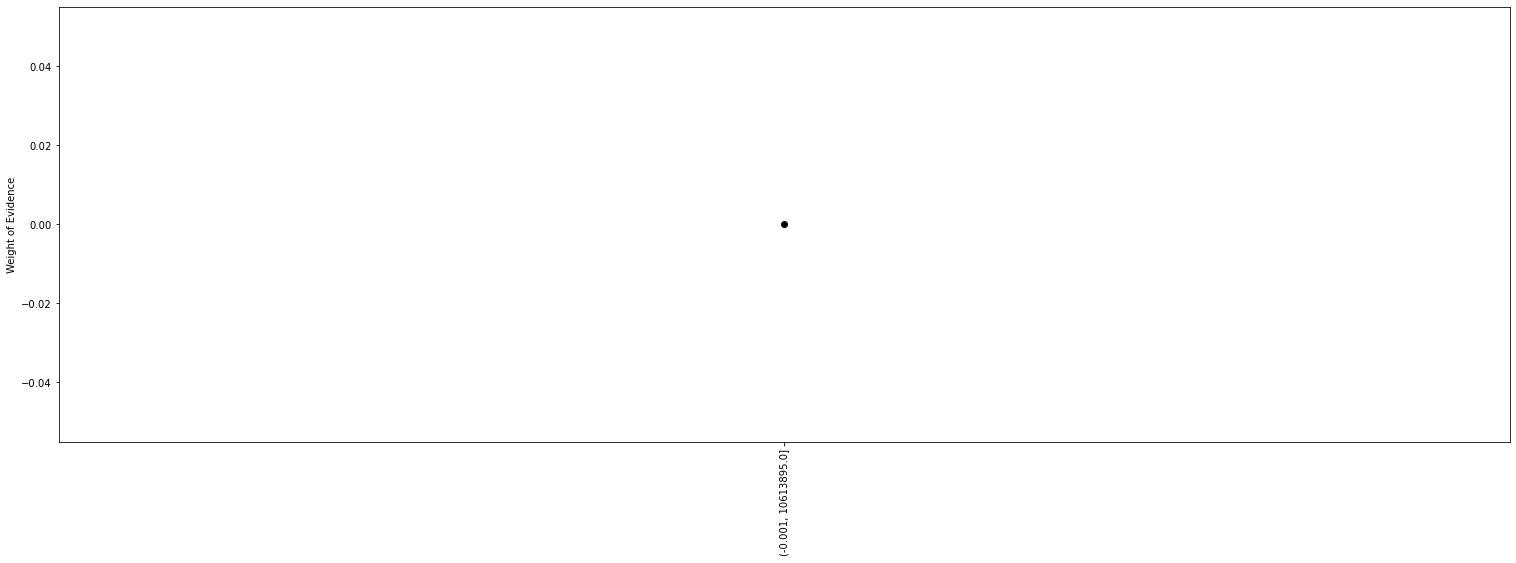

In [191]:

plot_by_woe(woe_num(Train,'monthly_betting_credit_1_fine', 'GBFlag'), 90)


In [192]:
## Coarse classing monthly_betting_credit_1 variable
bins = [0, 7521, np.inf]

Train['monthly_betting_credit_1_grped'] = pd.cut(Train['monthly_betting_credit_1'], bins, precision=0, include_lowest=True, right=False,)

Test['monthly_betting_credit_1_grped'] = pd.cut(Test['monthly_betting_credit_1'], bins, precision=0, include_lowest=True, right=False,)

Train['monthly_betting_credit_1_grped'].value_counts()

[0.0, 7521.0)    2645
[7521.0, inf)     168
Name: monthly_betting_credit_1_grped, dtype: int64

In [193]:
woe_cat(Train, 'monthly_betting_credit_1_grped', 'GBFlag')

GBFlag                          Bad  Good  Freq    Proptn    % Good     % Bad  \
monthly_betting_credit_1_grped                                                  
[0.0, 7521.0)                   705  1940  2645  0.940277  0.946341  0.923984   
[7521.0, inf)                    58   110   168  0.059723  0.053659  0.076016   

GBFlag                          Bad Rate  GoodBaddOdds       WOE  class IV  \
monthly_betting_credit_1_grped                                               
[0.0, 7521.0)                   0.266541          2.75 -0.023908  0.000535   
[7521.0, inf)                   0.345238          1.90  0.348300  0.007787   

GBFlag                          Variable IV  
monthly_betting_credit_1_grped               
[0.0, 7521.0)                      0.008322  
[7521.0, inf)                      0.008322

### monthly_betting_credit_2


In [194]:
### monthly_betting_credit_2
#Fine Classsing)
Train['monthly_betting_credit_2_fine'] = pd.qcut(Train['monthly_betting_credit_2'], q=5, duplicates='drop')
woe_num(Train,'monthly_betting_credit_2_fine', 'GBFlag')


GBFlag                         Bad  Good  Freq  Percentage  % Good  % Bad  \
monthly_betting_credit_2_fine                                               
(-0.001, 8462599.0]            763  2050  2813       100.0   100.0  100.0   

GBFlag                         Bad Rate  GoodBaddOdds  WOE   IV  
monthly_betting_credit_2_fine                                    
(-0.001, 8462599.0]                27.1          2.69  0.0  0.0

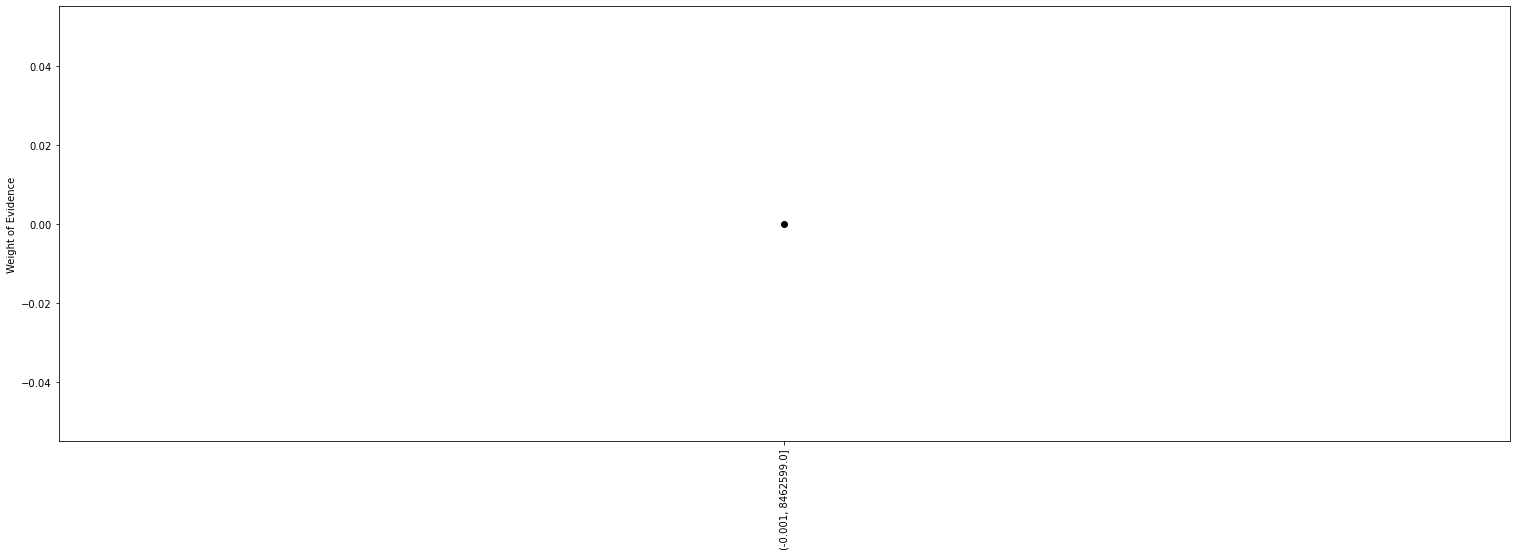

In [195]:

plot_by_woe(woe_num(Train,'monthly_betting_credit_2_fine', 'GBFlag'), 90)

In [197]:

## Coarse classing monthly_betting_credit_2 variable
bins =  [0,  np.inf]

Train['monthly_betting_credit_2_grped'] = pd.cut(Train['monthly_betting_credit_2'], bins, precision=0, include_lowest=True, right=False,)

Test['monthly_betting_credit_2_grped'] = pd.cut(Test['monthly_betting_credit_2'], bins, precision=0, include_lowest=True, right=False,)

Train['monthly_betting_credit_2_grped'].value_counts()

[0.0, inf)    2813
Name: monthly_betting_credit_2_grped, dtype: int64


### monthly_betting_credit_3


In [198]:
### monthly_betting_credit_3
#Fine Classsing)
Train['monthly_betting_credit_3_fine'] = pd.qcut(Train['monthly_betting_credit_3'], q=5, duplicates='drop')
woe_num(Train,'monthly_betting_credit_3_fine', 'GBFlag')

GBFlag                         Bad  Good  Freq  Percentage  % Good  % Bad  \
monthly_betting_credit_3_fine                                               
(-0.001, 9609000.0]            763  2050  2813       100.0   100.0  100.0   

GBFlag                         Bad Rate  GoodBaddOdds  WOE   IV  
monthly_betting_credit_3_fine                                    
(-0.001, 9609000.0]                27.1          2.69  0.0  0.0

In [199]:


## Coarse classing monthly_betting_credit_3 variable
bins = [0,   np.inf]

Train['monthly_betting_credit_3_grped'] = pd.cut(Train['monthly_betting_credit_3'], bins, precision=0, include_lowest=True, right=False,)

Test['monthly_betting_credit_3_grped'] = pd.cut(Test['monthly_betting_credit_3'], bins, precision=0, include_lowest=True, right=False,)

Train['monthly_betting_credit_3_grped'].value_counts()

[0.0, inf)    2813
Name: monthly_betting_credit_3_grped, dtype: int64


### monthly_betting_credit_4

In [200]:

#Fine Classsing)
Train['monthly_betting_credit_4_fine'] = pd.qcut(Train['monthly_betting_credit_4'], q=5, duplicates='drop')
woe_num(Train,'monthly_betting_credit_4_fine', 'GBFlag')

GBFlag                         Bad  Good  Freq  Percentage  % Good  % Bad  \
monthly_betting_credit_4_fine                                               
(-0.001, 4267000.0]            763  2050  2813       100.0   100.0  100.0   

GBFlag                         Bad Rate  GoodBaddOdds  WOE   IV  
monthly_betting_credit_4_fine                                    
(-0.001, 4267000.0]                27.1          2.69  0.0  0.0

In [201]:


## Coarse classing monthly_betting_credit_4 variable
bins = [0,  np.inf]

Train['monthly_betting_credit_4_grped'] = pd.cut(Train['monthly_betting_credit_4'], bins, precision=0, include_lowest=True, right=False,)

Test['monthly_betting_credit_4_grped'] = pd.cut(Test['monthly_betting_credit_4'], bins, precision=0, include_lowest=True, right=False,)

Train['monthly_betting_credit_4_grped'].value_counts()

[0.0, inf)    2813
Name: monthly_betting_credit_4_grped, dtype: int64

### monthly_cash_flow_1

In [202]:

#Fine Classsing
Train['monthly_cash_flow_1_fine'] = pd.qcut(Train['monthly_cash_flow_1'], q=10, duplicates='drop')
woe_num(Train,'monthly_cash_flow_1_fine', 'GBFlag')

GBFlag                      Bad  Good  Freq  Percentage  % Good  % Bad  \
monthly_cash_flow_1_fine                                                 
(-4304949.841, -36943.232]   65   217   282        10.0    10.6    8.5   
(-36943.232, -14274.692]     69   212   281        10.0    10.3    9.0   
(-14274.692, -5018.616]      72   209   281        10.0    10.2    9.4   
(-5018.616, -1189.758]       80   201   281        10.0     9.8   10.5   
(-1189.758, -70.27]          72   210   282        10.0    10.2    9.4   
(-70.27, 72.178]            110   171   281        10.0     8.3   14.4   
(72.178, 785.12]             94   187   281        10.0     9.1   12.3   
(785.12, 5291.216]           81   200   281        10.0     9.8   10.6   
(5291.216, 18189.67]         68   213   281        10.0    10.4    8.9   
(18189.67, 5606880.26]       52   230   282        10.0    11.2    6.8   

GBFlag                      Bad Rate  GoodBaddOdds       WOE        IV  
monthly_cash_flow_1_fine                                                
(-4304949.841, -36943.232]      23.0          3.34  0.220788  0.463654  
(-36943.232, -14274.692]        24.6          3.07  0.134919  0.175395  
(-14274.692, -5018.616]         25.6          2.90  0.081678  0.065342  
(-5018.616, -1189.758]          28.5          2.51 -0.068993  0.048295  
(-1189.758, -70.27]             25.5          2.92  0.081678  0.065342  
(-70.27, 72.178]                39.1          1.55 -0.550973  3.360933  
(72.178, 785.12]                33.5          1.99 -0.301325  0.964240  
(785.12, 5291.216]              28.8          2.47 -0.078472  0.062777  
(5291.216, 18189.67]            24.2          3.13  0.155755  0.233632  
(18189.67, 5606880.26]          18.4          4.42  0.498991  2.195561

In [203]:


## Coarse classing monthly_cash_flow_1 variable
bins = [-np.inf, -70, 786, 5292, np.inf]

Train['monthly_cash_flow_1_grped'] = pd.cut(Train['monthly_cash_flow_1'], bins, precision=0, include_lowest=True, right=False,)

Test['monthly_cash_flow_1_grped'] = pd.cut(Test['monthly_cash_flow_1'], bins, precision=0, include_lowest=True, right=False,)

Train['monthly_cash_flow_1_grped'].value_counts()

[-inf, -70.0)      1407
[5292.0, inf)       563
[-70.0, 786.0)      562
[786.0, 5292.0)     281
Name: monthly_cash_flow_1_grped, dtype: int64

In [204]:
woe_cat(Train, 'monthly_cash_flow_1_grped', 'GBFlag')

GBFlag                     Bad  Good  Freq    Proptn    % Good     % Bad  \
monthly_cash_flow_1_grped                                                  
[5292.0, inf)              120   443   563  0.200142  0.216098  0.157274   
[-inf, -70.0)              358  1049  1407  0.500178  0.511707  0.469201   
[786.0, 5292.0)             81   200   281  0.099893  0.097561  0.106160   
[-70.0, 786.0)             204   358   562  0.199787  0.174634  0.267366   

GBFlag                     Bad Rate  GoodBaddOdds       WOE  class IV  \
monthly_cash_flow_1_grped                                               
[5292.0, inf)              0.213144          3.69 -0.317741  0.018691   
[-inf, -70.0)              0.254442          2.93 -0.086723  0.003686   
[786.0, 5292.0)            0.288256          2.47  0.084469  0.000726   
[-70.0, 786.0)             0.362989          1.75  0.425924  0.039497   

GBFlag                     Variable IV  
monthly_cash_flow_1_grped               
[5292.0, inf)                   0.0626  
[-inf, -70.0)                   0.0626  
[786.0, 5292.0)                 0.0626  
[-70.0, 786.0)                  0.0626

### monthly_cash_flow_2

In [205]:

#Fine Classsing
Train['monthly_cash_flow_2_fine'] = pd.qcut(Train['monthly_cash_flow_2'], q=10, duplicates='drop')
woe_num(Train,'monthly_cash_flow_2_fine', 'GBFlag')

GBFlag                      Bad  Good  Freq  Percentage  % Good  % Bad  \
monthly_cash_flow_2_fine                                                 
(-4285222.121, -44806.066]   67   215   282        10.0    10.5    8.8   
(-44806.066, -15286.278]     69   212   281        10.0    10.3    9.0   
(-15286.278, -4994.052]      57   224   281        10.0    10.9    7.5   
(-4994.052, -898.724]        78   203   281        10.0     9.9   10.2   
(-898.724, -23.23]           92   190   282        10.0     9.3   12.1   
(-23.23, 280.776]           107   174   281        10.0     8.5   14.0   
(280.776, 3165.428]          82   199   281        10.0     9.7   10.7   
(3165.428, 10376.616]        80   201   281        10.0     9.8   10.5   
(10376.616, 31837.46]        73   208   281        10.0    10.1    9.6   
(31837.46, 12265093.18]      58   224   282        10.0    10.9    7.6   

GBFlag                      Bad Rate  GoodBaddOdds       WOE        IV  
monthly_cash_flow_2_fine                                                
(-4285222.121, -44806.066]      23.8          3.21  0.176624  0.300260  
(-44806.066, -15286.278]        24.6          3.07  0.134919  0.175395  
(-15286.278, -4994.052]         20.3          3.93  0.373860  1.271123  
(-4994.052, -898.724]           27.8          2.60 -0.029853  0.008956  
(-898.724, -23.23]              32.6          2.07 -0.263191  0.736935  
(-23.23, 280.776]               38.1          1.63 -0.498991  2.744451  
(280.776, 3165.428]             29.2          2.43 -0.098118  0.098118  
(3165.428, 10376.616]           28.5          2.51 -0.068993  0.048295  
(10376.616, 31837.46]           26.0          2.85  0.050772  0.025386  
(31837.46, 12265093.18]         20.6          3.86  0.360615  1.190028

In [206]:


## Coarse classing monthly_cash_flow_2 variable
bins = [-np.inf,-15286, -4999, -898, 281, 31838 , np.inf]

Train['monthly_cash_flow_2_grped'] = pd.cut(Train['monthly_cash_flow_2'], bins, precision=0, include_lowest=True, right=False,)

Test['monthly_cash_flow_2_grped'] = pd.cut(Test['monthly_cash_flow_2'], bins, precision=0, include_lowest=True, right=False,)

Train['monthly_cash_flow_2_grped'].value_counts()

[281.0, 31838.0)       843
[-inf, -15286.0)       563
[-898.0, 281.0)        562
[-4999.0, -898.0)      283
[31838.0, inf)         282
[-15286.0, -4999.0)    280
Name: monthly_cash_flow_2_grped, dtype: int64

In [207]:
woe_cat(Train, 'monthly_cash_flow_2_grped', 'GBFlag')

GBFlag                     Bad  Good  Freq    Proptn    % Good     % Bad  \
monthly_cash_flow_2_grped                                                  
[-15286.0, -4999.0)         57   223   280  0.099538  0.108780  0.074705   
[31838.0, inf)              58   224   282  0.100249  0.109268  0.076016   
[-inf, -15286.0)           136   427   563  0.200142  0.208293  0.178244   
[-4999.0, -898.0)           78   205   283  0.100604  0.100000  0.102228   
[281.0, 31838.0)           235   608   843  0.299680  0.296585  0.307995   
[-898.0, 281.0)            199   363   562  0.199787  0.177073  0.260813   

GBFlag                     Bad Rate  GoodBaddOdds       WOE  class IV  \
monthly_cash_flow_2_grped                                               
[-15286.0, -4999.0)        0.203571          3.91 -0.375783  0.012805   
[31838.0, inf)             0.205674          3.86 -0.362866  0.012066   
[-inf, -15286.0)           0.241563          3.14 -0.155792  0.004681   
[-4999.0, -898.0)          0.275618          2.63  0.022036  0.000049   
[281.0, 31838.0)           0.278766          2.59  0.037748  0.000431   
[-898.0, 281.0)            0.354093          1.82  0.387239  0.032427   

GBFlag                     Variable IV  
monthly_cash_flow_2_grped               
[-15286.0, -4999.0)            0.06246  
[31838.0, inf)                 0.06246  
[-inf, -15286.0)               0.06246  
[-4999.0, -898.0)              0.06246  
[281.0, 31838.0)               0.06246  
[-898.0, 281.0)                0.06246

### monthly_cash_flow_3

In [208]:

#Fine Classsing
Train['monthly_cash_flow_3_fine'] = pd.qcut(Train['monthly_cash_flow_3'], q=10, duplicates='drop')
woe_num(Train,'monthly_cash_flow_3_fine', 'GBFlag')

GBFlag                     Bad  Good  Freq  Percentage  % Good  % Bad  \
monthly_cash_flow_3_fine                                                
(-9993968.871, -45791.71]   58   224   282        10.0    10.9    7.6   
(-45791.71, -15440.77]      63   218   281        10.0    10.6    8.3   
(-15440.77, -5390.122]      86   195   281        10.0     9.5   11.3   
(-5390.122, -854.806]       86   195   281        10.0     9.5   11.3   
(-854.806, -12.75]          84   198   282        10.0     9.7   11.0   
(-12.75, 361.85]            97   184   281        10.0     9.0   12.7   
(361.85, 3610.494]          86   195   281        10.0     9.5   11.3   
(3610.494, 12286.938]       68   213   281        10.0    10.4    8.9   
(12286.938, 38756.618]      75   206   281        10.0    10.0    9.8   
(38756.618, 4293771.39]     60   222   282        10.0    10.8    7.9   

GBFlag                     Bad Rate  GoodBaddOdds       WOE        IV  
monthly_cash_flow_3_fine                                               
(-9993968.871, -45791.71]      20.6          3.86  0.360615  1.190028  
(-45791.71, -15440.77]         22.4          3.46  0.244598  0.562577  
(-15440.77, -5390.122]         30.6          2.27 -0.173511  0.312320  
(-5390.122, -854.806]          30.6          2.27 -0.173511  0.312320  
(-854.806, -12.75]             29.8          2.36 -0.125769  0.163500  
(-12.75, 361.85]               34.5          1.90 -0.344377  1.274196  
(361.85, 3610.494]             30.6          2.27 -0.173511  0.312320  
(3610.494, 12286.938]          24.2          3.13  0.155755  0.233632  
(12286.938, 38756.618]         26.7          2.75  0.020203  0.004041  
(38756.618, 4293771.39]        21.3          3.70  0.312683  0.906782

In [209]:


## Coarse classing monthly_cash_flow_3 variable
bins = [-np.inf, -15440, 3611,   np.inf]

Train['monthly_cash_flow_3_grped'] = pd.cut(Train['monthly_cash_flow_3'], bins, precision=0, include_lowest=True, right=False,)

Test['monthly_cash_flow_3_grped'] = pd.cut(Test['monthly_cash_flow_3'], bins, precision=0, include_lowest=True, right=False,)

Train['monthly_cash_flow_3_grped'].value_counts()

[-15440.0, 3611.0)    1406
[3611.0, inf)          844
[-inf, -15440.0)       563
Name: monthly_cash_flow_3_grped, dtype: int64

In [210]:
woe_cat(Train,'monthly_cash_flow_3_grped', 'GBFlag' )

GBFlag                     Bad  Good  Freq    Proptn    % Good     % Bad  \
monthly_cash_flow_3_grped                                                  
[-inf, -15440.0)           121   442   563  0.200142  0.215610  0.158585   
[3611.0, inf)              203   641   844  0.300036  0.312683  0.266055   
[-15440.0, 3611.0)         439   967  1406  0.499822  0.471707  0.575360   

GBFlag                     Bad Rate  GoodBaddOdds       WOE  class IV  \
monthly_cash_flow_3_grped                                               
[-inf, -15440.0)           0.214920          3.65 -0.307182  0.017517   
[3611.0, inf)              0.240521          3.16 -0.161486  0.007530   
[-15440.0, 3611.0)         0.312233          2.20  0.198638  0.020589   

GBFlag                     Variable IV  
monthly_cash_flow_3_grped               
[-inf, -15440.0)              0.045636  
[3611.0, inf)                 0.045636  
[-15440.0, 3611.0)            0.045636

### monthly_cash_flow_4

In [211]:
#Fine Classsing
Train['monthly_cash_flow_4_fine'] = pd.qcut(Train['monthly_cash_flow_4'], q=10, duplicates='drop')
woe_num(Train,'monthly_cash_flow_4_fine', 'GBFlag')

GBFlag                            Bad  Good  Freq  Percentage  % Good  % Bad  \
monthly_cash_flow_4_fine                                                       
(-4835866.231000001, -29810.622]   57   225   282        10.0    11.0    7.5   
(-29810.622, -9881.808]            68   213   281        10.0    10.4    8.9   
(-9881.808, -3024.17]              75   206   281        10.0    10.0    9.8   
(-3024.17, -288.782]               96   185   281        10.0     9.0   12.6   
(-288.782, 0.0]                    91   192   283        10.1     9.4   11.9   
(0.0, 518.872]                     88   192   280        10.0     9.4   11.5   
(518.872, 4299.71]                 87   194   281        10.0     9.5   11.4   
(4299.71, 14323.054]               80   201   281        10.0     9.8   10.5   
(14323.054, 42498.24]              63   218   281        10.0    10.6    8.3   
(42498.24, 9989856.23]             58   224   282        10.0    10.9    7.6   

GBFlag                            Bad Rate  GoodBaddOdds       WOE        IV  
monthly_cash_flow_4_fine                                                      
(-4835866.231000001, -29810.622]      20.2          3.95  0.382992  1.340473  
(-29810.622, -9881.808]               24.2          3.13  0.155755  0.233632  
(-9881.808, -3024.17]                 26.7          2.75  0.020203  0.004041  
(-3024.17, -288.782]                  34.2          1.93 -0.336472  1.211300  
(-288.782, 0.0]                       32.2          2.11 -0.235829  0.589572  
(0.0, 518.872]                        31.4          2.18 -0.201637  0.423438  
(518.872, 4299.71]                    31.0          2.23 -0.182322  0.346411  
(4299.71, 14323.054]                  28.5          2.51 -0.068993  0.048295  
(14323.054, 42498.24]                 22.4          3.46  0.244598  0.562577  
(42498.24, 9989856.23]                20.6          3.86  0.360615  1.190028

In [212]:
## Coarse classing monthly_cash_flow_4 variable
bins = [-np.inf, -9881, -3024, 4300, 14324, np.inf]

Train['monthly_cash_flow_4_grped'] = pd.cut(Train['monthly_cash_flow_4'], bins, precision=0, include_lowest=True, right=False,)

Test['monthly_cash_flow_4_grped'] = pd.cut(Test['monthly_cash_flow_4'], bins, precision=0, include_lowest=True, right=False,)

Train['monthly_cash_flow_4_grped'].value_counts()

[-3024.0, 4300.0)     1125
[-inf, -9881.0)        563
[14324.0, inf)         563
[-9881.0, -3024.0)     281
[4300.0, 14324.0)      281
Name: monthly_cash_flow_4_grped, dtype: int64

In [213]:
woe_cat(Train, 'monthly_cash_flow_4_grped', 'GBFlag')

GBFlag                     Bad  Good  Freq    Proptn    % Good     % Bad  \
monthly_cash_flow_4_grped                                                  
[14324.0, inf)             121   442   563  0.200142  0.215610  0.158585   
[-inf, -9881.0)            125   438   563  0.200142  0.213659  0.163827   
[-9881.0, -3024.0)          75   206   281  0.099893  0.100488  0.098296   
[4300.0, 14324.0)           80   201   281  0.099893  0.098049  0.104849   
[-3024.0, 4300.0)          362   763  1125  0.399929  0.372195  0.474443   

GBFlag                     Bad Rate  GoodBaddOdds       WOE  class IV  \
monthly_cash_flow_4_grped                                               
[14324.0, inf)             0.214920          3.65 -0.307182  0.017517   
[-inf, -9881.0)            0.222025          3.50 -0.265568  0.013234   
[-9881.0, -3024.0)         0.266904          2.75 -0.022051  0.000048   
[4300.0, 14324.0)          0.284698          2.51  0.067059  0.000456   
[-3024.0, 4300.0)          0.321778          2.11  0.242723  0.024818   

GBFlag                     Variable IV  
monthly_cash_flow_4_grped               
[14324.0, inf)                0.056073  
[-inf, -9881.0)               0.056073  
[-9881.0, -3024.0)            0.056073  
[4300.0, 14324.0)             0.056073  
[-3024.0, 4300.0)             0.056073

### monthly_electricity_spending_1

In [214]:
# #Fine Classsing
# Train['monthly_electricity_spending_1_fine'] = pd.qcut(Train['monthly_electricity_spending_1'], q=10, duplicates='drop')
# woe_num(Train,'monthly_electricity_spending_1_fine', 'GBFlag')

In [215]:
## Coarse classing monthly_electricity_spending_1 variable
bins = [0, 501, 10001,  np.inf]

Train['monthly_electricity_spending_1_grped'] = pd.cut(Train['monthly_electricity_spending_1'], bins, precision=0, include_lowest=True, right=False,)

Test['monthly_electricity_spending_1_grped'] = pd.cut(Test['monthly_electricity_spending_1'], bins, precision=0, include_lowest=True, right=False,)

Train['monthly_electricity_spending_1_grped'].value_counts()

[0.0, 501.0)        1936
[10001.0, inf)       578
[501.0, 10001.0)     299
Name: monthly_electricity_spending_1_grped, dtype: int64

In [216]:
woe_cat(Train, 'monthly_electricity_spending_1_grped', 'GBFlag')

GBFlag                                Bad  Good  Freq    Proptn   % Good  \
monthly_electricity_spending_1_grped                                       
[10001.0, inf)                        145   433   578  0.205475  0.21122   
[0.0, 501.0)                          524  1412  1936  0.688233  0.68878   
[501.0, 10001.0)                       94   205   299  0.106292  0.10000   

GBFlag                                   % Bad  Bad Rate  GoodBaddOdds  \
monthly_electricity_spending_1_grped                                     
[10001.0, inf)                        0.190039  0.250865          2.99   
[0.0, 501.0)                          0.686763  0.270661          2.69   
[501.0, 10001.0)                      0.123198  0.314381          2.18   

GBFlag                                     WOE  class IV  Variable IV  
monthly_electricity_spending_1_grped                                   
[10001.0, inf)                       -0.105667  0.002238     0.007084  
[0.0, 501.0)                         -0.002934  0.000006     0.007084  
[501.0, 10001.0)                      0.208622  0.004840     0.007084

### monthly_electricity_spending_2


In [217]:
#Fine Classsing
Train['monthly_electricity_spending_2_fine'] = pd.qcut(Train['monthly_electricity_spending_2'], q=10, duplicates='drop')
woe_num(Train,'monthly_electricity_spending_2_fine', 'GBFlag')

GBFlag                               Bad  Good  Freq  Percentage  % Good  \
monthly_electricity_spending_2_fine                                        
(-0.001, 1758.0]                     475  1213  1688        60.0    59.2   
(1758.0, 10261.0]                     72   209   281        10.0    10.2   
(10261.0, 33969.0]                    87   194   281        10.0     9.5   
(33969.0, 126811.6]                   68   213   281        10.0    10.4   
(126811.6, 9943000.0]                 61   221   282        10.0    10.8   

GBFlag                               % Bad  Bad Rate  GoodBaddOdds       WOE  \
monthly_electricity_spending_2_fine                                            
(-0.001, 1758.0]                      62.3      28.1          2.55 -0.051040   
(1758.0, 10261.0]                      9.4      25.6          2.90  0.081678   
(10261.0, 33969.0]                    11.4      31.0          2.23 -0.182322   
(33969.0, 126811.6]                    8.9      24.2          3.13  0.155755   
(126811.6, 9943000.0]                  8.0      21.6          3.62  0.300105   

GBFlag                                     IV  
monthly_electricity_spending_2_fine            
(-0.001, 1758.0]                     0.158224  
(1758.0, 10261.0]                    0.065342  
(10261.0, 33969.0]                   0.346411  
(33969.0, 126811.6]                  0.233632  
(126811.6, 9943000.0]                0.840293

In [218]:
## Coarse classing monthly_electricity_spending_2 variable
bins = [0, 10262, 33970, np.inf]

Train['monthly_electricity_spending_2_grped'] = pd.cut(Train['monthly_electricity_spending_2'], bins, precision=0, include_lowest=True, right=False,)

Test['monthly_electricity_spending_2_grped'] = pd.cut(Test['monthly_electricity_spending_2'], bins, precision=0, include_lowest=True, right=False,)

Train['monthly_electricity_spending_2_grped'].value_counts()

[0.0, 10262.0)        1969
[33970.0, inf)         563
[10262.0, 33970.0)     281
Name: monthly_electricity_spending_2_grped, dtype: int64

### monthly_electricity_spending_3

In [219]:

#Fine Classsing
Train['monthly_electricity_spending_3_fine'] = pd.qcut(Train['monthly_electricity_spending_3'], q=10, duplicates='drop')
woe_num(Train,'monthly_electricity_spending_3_fine', 'GBFlag')

GBFlag                               Bad  Good  Freq  Percentage  % Good  \
monthly_electricity_spending_3_fine                                        
(-0.001, 800.94]                     491  1197  1688        60.0    58.4   
(800.94, 8073.6]                      74   207   281        10.0    10.1   
(8073.6, 31355.2]                     72   209   281        10.0    10.2   
(31355.2, 103285.2]                   77   204   281        10.0    10.0   
(103285.2, 9983700.0]                 49   233   282        10.0    11.4   

GBFlag                               % Bad  Bad Rate  GoodBaddOdds       WOE  \
monthly_electricity_spending_3_fine                                            
(-0.001, 800.94]                      64.4      29.1          2.44 -0.097798   
(800.94, 8073.6]                       9.7      26.3          2.80  0.040410   
(8073.6, 31355.2]                      9.4      25.6          2.90  0.081678   
(31355.2, 103285.2]                   10.1      27.4          2.65 -0.009950   
(103285.2, 9983700.0]                  6.4      17.4          4.76  0.577315   

GBFlag                                     IV  
monthly_electricity_spending_3_fine            
(-0.001, 800.94]                     0.586786  
(800.94, 8073.6]                     0.016164  
(8073.6, 31355.2]                    0.065342  
(31355.2, 103285.2]                  0.000995  
(103285.2, 9983700.0]                2.886577

In [220]:
## Coarse classing monthly_electricity_spending_3 variable
bins = [0, 103286, np.inf]

Train['monthly_electricity_spending_3_grped'] = pd.cut(Train['monthly_electricity_spending_3'], bins, precision=0, include_lowest=True, right=False,)

Test['monthly_electricity_spending_3_grped'] = pd.cut(Test['monthly_electricity_spending_3'], bins, precision=0, include_lowest=True, right=False,)

Train['monthly_electricity_spending_3_grped'].value_counts()

[0.0, 103286.0)    2531
[103286.0, inf)     282
Name: monthly_electricity_spending_3_grped, dtype: int64

In [221]:
woe_cat(Train, 'monthly_electricity_spending_3_fine', 'GBFlag')

GBFlag                               Bad  Good  Freq    Proptn    % Good  \
monthly_electricity_spending_3_fine                                        
(103285.2, 9983700.0]                 49   233   282  0.100249  0.113659   
(8073.6, 31355.2]                     72   209   281  0.099893  0.101951   
(800.94, 8073.6]                      74   207   281  0.099893  0.100976   
(31355.2, 103285.2]                   77   204   281  0.099893  0.099512   
(-0.001, 800.94]                     491  1197  1688  0.600071  0.583902   

GBFlag                                  % Bad  Bad Rate  GoodBaddOdds  \
monthly_electricity_spending_3_fine                                     
(103285.2, 9983700.0]                0.064220  0.173759          4.76   
(8073.6, 31355.2]                    0.094364  0.256228          2.90   
(800.94, 8073.6]                     0.096986  0.263345          2.80   
(31355.2, 103285.2]                  0.100917  0.274021          2.65   
(-0.001, 800.94]                     0.643512  0.290877          2.44   

GBFlag                                    WOE  class IV  Variable IV  
monthly_electricity_spending_3_fine                                   
(103285.2, 9983700.0]               -0.570881  0.028223     0.034785  
(8073.6, 31355.2]                   -0.077331  0.000587     0.034785  
(800.94, 8073.6]                    -0.040317  0.000161     0.034785  
(31355.2, 103285.2]                  0.014022  0.000020     0.034785  
(-0.001, 800.94]                     0.097207  0.005795     0.034785

### monthly_electricity_spending_4

In [222]:

#Fine Classsing
Train['monthly_electricity_spending_4_fine'] = pd.qcut(Train['monthly_electricity_spending_4'], q=5, duplicates='drop')
woe_num(Train,'monthly_electricity_spending_4_fine', 'GBFlag')

GBFlag                               Bad  Good  Freq  Percentage  % Good  \
monthly_electricity_spending_4_fine                                        
(-0.001, 7942.6]                     633  1617  2250        80.0    78.9   
(7942.6, 6219776.0]                  130   433   563        20.0    21.1   

GBFlag                               % Bad  Bad Rate  GoodBaddOdds       WOE  \
monthly_electricity_spending_4_fine                                            
(-0.001, 7942.6]                      83.0      28.1          2.55 -0.050659   
(7942.6, 6219776.0]                   17.0      23.1          3.33  0.216060   

GBFlag                                     IV  
monthly_electricity_spending_4_fine            
(-0.001, 7942.6]                     0.207703  
(7942.6, 6219776.0]                  0.885845

In [223]:
## Coarse classing monthly_electricity_spending_4 variable
bins = [0, 7943, np.inf]

Train['monthly_electricity_spending_4_grped'] = pd.cut(Train['monthly_electricity_spending_4'], bins, precision=0, include_lowest=True, right=False,)

Test['monthly_electricity_spending_4_grped'] = pd.cut(Test['monthly_electricity_spending_4'], bins, precision=0, include_lowest=True, right=False,)

Train['monthly_electricity_spending_4_grped'].value_counts()

[0.0, 7943.0)    2250
[7943.0, inf)     563
Name: monthly_electricity_spending_4_grped, dtype: int64

In [224]:
woe_cat(Train, 'monthly_electricity_spending_4_grped', 'GBFlag')

GBFlag                                Bad  Good  Freq    Proptn   % Good  \
monthly_electricity_spending_4_grped                                       
[7943.0, inf)                         130   433   563  0.200142  0.21122   
[0.0, 7943.0)                         633  1617  2250  0.799858  0.78878   

GBFlag                                  % Bad  Bad Rate  GoodBaddOdds  \
monthly_electricity_spending_4_grped                                    
[7943.0, inf)                         0.17038  0.230906          3.33   
[0.0, 7943.0)                         0.82962  0.281333          2.55   

GBFlag                                     WOE  class IV  Variable IV  
monthly_electricity_spending_4_grped                                   
[7943.0, inf)                        -0.214866  0.008775     0.010837  
[0.0, 7943.0)                         0.050480  0.002062     0.010837

### Opening_balance

In [225]:
### Opening_balance
#Fine Classsing)
Train['Opening_balance_fine'] = pd.qcut(Train['Opening_balance'], q=10, duplicates='drop')
woe_num(Train,'Opening_balance_fine', 'GBFlag')


GBFlag                      Bad  Good  Freq  Percentage  % Good  % Bad  \
Opening_balance_fine                                                     
(-416259.16099999996, 0.0]  116   324   440        15.6    15.8   15.2   
(0.0, 16.008]                51    72   123         4.4     3.5    6.7   
(16.008, 134.574]            97   184   281        10.0     9.0   12.7   
(134.574, 778.264]           80   201   281        10.0     9.8   10.5   
(778.264, 2680.99]           67   215   282        10.0    10.5    8.8   
(2680.99, 6353.942]          91   190   281        10.0     9.3   11.9   
(6353.942, 11637.39]         62   219   281        10.0    10.7    8.1   
(11637.39, 24960.432]        71   210   281        10.0    10.2    9.3   
(24960.432, 60139.746]       69   212   281        10.0    10.3    9.0   
(60139.746, 12949790.77]     59   223   282        10.0    10.9    7.7   

GBFlag                      Bad Rate  GoodBaddOdds       WOE        IV  
Opening_balance_fine                                                    
(-416259.16099999996, 0.0]      26.4          2.79  0.038715  0.023229  
(0.0, 16.008]                   41.5          1.41 -0.649345  2.077903  
(16.008, 134.574]               34.5          1.90 -0.344377  1.274196  
(134.574, 778.264]              28.5          2.51 -0.068993  0.048295  
(778.264, 2680.99]              23.8          3.21  0.176624  0.300260  
(2680.99, 6353.942]             32.4          2.09 -0.246524  0.640962  
(6353.942, 11637.39]            22.1          3.53  0.278380  0.723787  
(11637.39, 24960.432]           25.3          2.96  0.092373  0.083136  
(24960.432, 60139.746]          24.6          3.07  0.134919  0.175395  
(60139.746, 12949790.77]        20.9          3.78  0.347542  1.112136

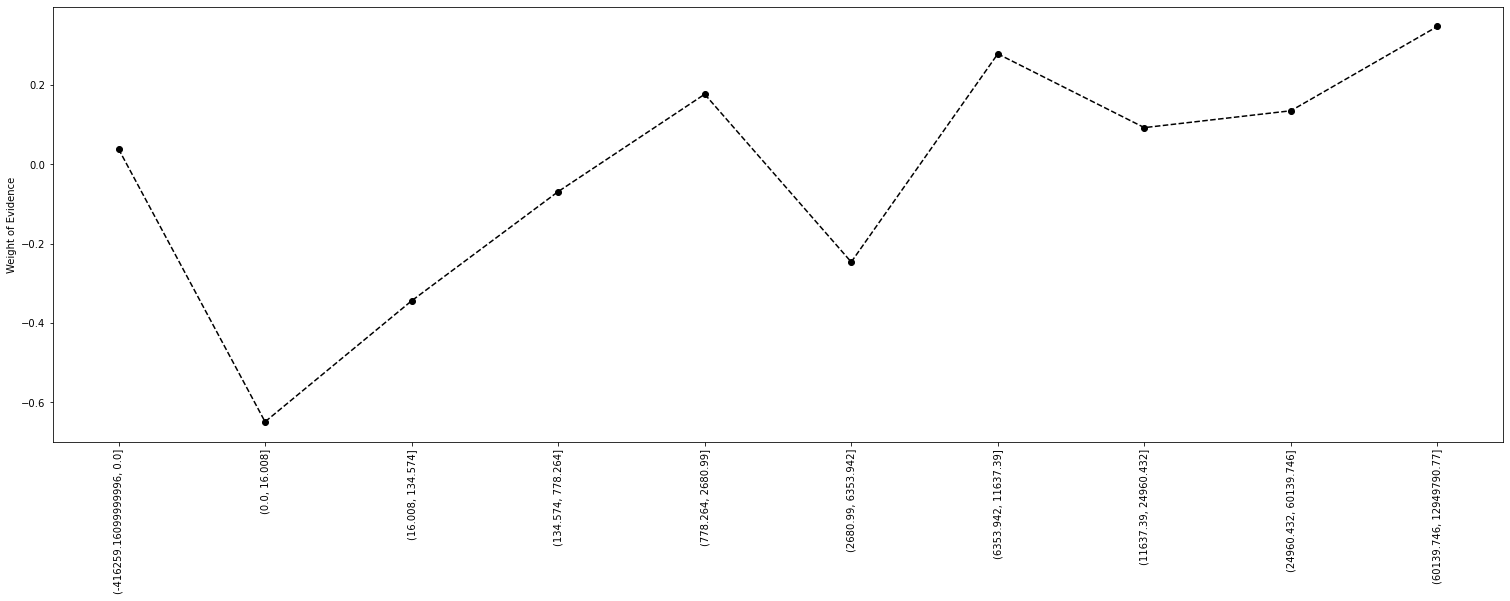

In [226]:

plot_by_woe(woe_num(Train,'Opening_balance_fine', 'GBFlag'), 90)


In [227]:
## Coarse classing Opening_balance variable
bins = [-np.inf, 0.1, 135, 2681, np.inf]

Train['Opening_balance_grped'] = pd.cut(Train['Opening_balance'], bins, precision=0, include_lowest=True, right=False,)

Test['Opening_balance_grped'] = pd.cut(Test['Opening_balance'], bins, precision=0, include_lowest=True, right=False,)

Train['Opening_balance_grped'].value_counts()

[2681.0, inf)      1406
[135.0, 2681.0)     562
[-inf, 0.0)         445
[0.0, 135.0)        400
Name: Opening_balance_grped, dtype: int64

### POSVolume1


In [228]:
# Fine Classsing
Train['POSVolume1_fine'] = pd.qcut(Train['POSVolume1'], q=10, duplicates='drop')
woe_num(Train, 'POSVolume1_fine', 'GBFlag')

GBFlag           Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
POSVolume1_fine                                                         
(-0.001, 2.0]     75   255   330        11.7    12.4    9.8      22.7   
(2.0, 6.0]        62   204   266         9.5    10.0    8.1      23.3   
(6.0, 10.0]       69   185   254         9.0     9.0    9.0      27.2   
(10.0, 16.0]      85   233   318        11.3    11.4   11.1      26.7   
(16.0, 22.0]      68   201   269         9.6     9.8    8.9      25.3   
(22.0, 30.0]      75   200   275         9.8     9.8    9.8      27.3   
(30.0, 42.0]      98   179   277         9.8     8.7   12.8      35.4   
(42.0, 58.0]      73   195   268         9.5     9.5    9.6      27.2   
(58.0, 91.0]      74   205   279         9.9    10.0    9.7      26.5   
(91.0, 468.0]     84   193   277         9.8     9.4   11.0      30.3   

GBFlag           GoodBaddOdds       WOE        IV  
POSVolume1_fine                                    
(-0.001, 2.0]            3.40  0.235314  0.611817  
(2.0, 6.0]               3.29  0.210721  0.400370  
(6.0, 10.0]              2.68  0.000000  0.000000  
(10.0, 16.0]             2.74  0.026668  0.008000  
(16.0, 22.0]             2.96  0.096331  0.086698  
(22.0, 30.0]             2.67  0.000000  0.000000  
(30.0, 42.0]             1.83 -0.386122  1.583101  
(42.0, 58.0]             2.67 -0.010471  0.001047  
(58.0, 91.0]             2.77  0.030459  0.009138  
(91.0, 468.0]            2.30 -0.157186  0.251497

In [229]:
## Coarse classing POSVolume1 variable
bins = [ 0, 3.1, 17.1, 32.1, 77.1,   np.inf]

Train['POSVolume1_grped'] = pd.cut(Train['POSVolume1'], bins, precision=0, include_lowest=True, right=False,)

Test['POSVolume1_grped'] = pd.cut(Test['POSVolume1'], bins, precision=0, include_lowest=True, right=False,)

Train['POSVolume1_grped'].value_counts()

[3.0, 17.0)     824
[32.0, 77.0)    686
[17.0, 32.0)    539
[0.0, 3.0)      398
[77.0, inf)     366
Name: POSVolume1_grped, dtype: int64

### POSVolume2

In [230]:
# Fine Classsing
Train['POSVolume2_fine'] = pd.qcut(Train['POSVolume2'], q=10, duplicates='drop')
woe_num(Train, 'POSVolume2_fine', 'GBFlag')

GBFlag           Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
POSVolume2_fine                                                         
(-0.001, 7.0]     76   228   304        10.8    11.1   10.0      25.0   
(7.0, 17.0]       75   214   289        10.3    10.4    9.8      26.0   
(17.0, 26.0]      69   210   279         9.9    10.2    9.0      24.7   
(26.0, 35.0]      70   206   276         9.8    10.0    9.2      25.4   
(35.0, 46.0]      68   194   262         9.3     9.5    8.9      26.0   
(46.0, 60.0]      85   194   279         9.9     9.5   11.1      30.5   
(60.0, 79.0]      81   216   297        10.6    10.5   10.6      27.3   
(79.0, 104.0]     70   197   267         9.5     9.6    9.2      26.2   
(104.0, 151.0]    82   199   281        10.0     9.7   10.7      29.2   
(151.0, 872.0]    87   192   279         9.9     9.4   11.4      31.2   

GBFlag           GoodBaddOdds       WOE        IV  
POSVolume2_fine                                    
(-0.001, 7.0]            3.00  0.104360  0.114796  
(7.0, 17.0]              2.85  0.059423  0.035654  
(17.0, 26.0]             3.04  0.125163  0.150196  
(26.0, 35.0]             2.94  0.083382  0.066705  
(35.0, 46.0]             2.85  0.065241  0.039144  
(46.0, 60.0]             2.28 -0.155653  0.249045  
(60.0, 79.0]             2.67 -0.009479  0.000948  
(79.0, 104.0]            2.81  0.042560  0.017024  
(104.0, 151.0]           2.43 -0.098118  0.098118  
(151.0, 872.0]           2.21 -0.192904  0.385807

In [231]:
## Coarse classing POSVolume2 variable
bins = [0, 47, 61, np.inf]

Train['POSVolume2_grped'] = pd.cut(Train['POSVolume2'], bins, precision=0, include_lowest=True, right=False,)

Test['POSVolume2_grped'] = pd.cut(Test['POSVolume2'], bins, precision=0, include_lowest=True, right=False,)

Train['POSVolume2_grped'].value_counts()

[0.0, 47.0)     1410
[61.0, inf)     1124
[47.0, 61.0)     279
Name: POSVolume2_grped, dtype: int64

In [232]:
woe_cat(Train, 'POSVolume2_grped', 'GBFlag')

GBFlag            Bad  Good  Freq    Proptn    % Good     % Bad  Bad Rate  \
POSVolume2_grped                                                            
[0.0, 47.0)       358  1052  1410  0.501244  0.513171  0.469201  0.253901   
[61.0, inf)       320   804  1124  0.399573  0.392195  0.419397  0.284698   
[47.0, 61.0)       85   194   279  0.099182  0.094634  0.111402  0.304659   

GBFlag            GoodBaddOdds       WOE  class IV  Variable IV  
POSVolume2_grped                                                 
[0.0, 47.0)               2.94 -0.089578  0.003939     0.008498  
[61.0, inf)               2.51  0.067059  0.001824     0.008498  
[47.0, 61.0)              2.28  0.163130  0.002735     0.008498

### POSVolume3

In [233]:
# Fine Classsing
Train['POSVolume3_fine'] = pd.qcut(Train['POSVolume3'], q=10, duplicates='drop')
woe_num(Train, 'POSVolume3_fine', 'GBFlag')

GBFlag           Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
POSVolume3_fine                                                         
(-0.001, 6.0]     69   234   303        10.8    11.4    9.0      22.8   
(6.0, 14.0]       81   201   282        10.0     9.8   10.6      28.7   
(14.0, 22.0]      79   196   275         9.8     9.6   10.4      28.7   
(22.0, 31.0]      83   203   286        10.2     9.9   10.9      29.0   
(31.0, 41.0]      77   210   287        10.2    10.2   10.1      26.8   
(41.0, 53.0]      70   196   266         9.5     9.6    9.2      26.3   
(53.0, 71.0]      73   203   276         9.8     9.9    9.6      26.4   
(71.0, 94.0]      71   211   282        10.0    10.3    9.3      25.2   
(94.0, 135.0]     85   190   275         9.8     9.3   11.1      30.9   
(135.0, 941.0]    75   206   281        10.0    10.0    9.8      26.7   

GBFlag           GoodBaddOdds       WOE        IV  
POSVolume3_fine                                    
(-0.001, 6.0]            3.39  0.236389  0.567333  
(6.0, 14.0]              2.48 -0.078472  0.062777  
(14.0, 22.0]             2.48 -0.080043  0.064034  
(22.0, 31.0]             2.45 -0.096228  0.096228  
(31.0, 41.0]             2.73  0.009852  0.000985  
(41.0, 53.0]             2.80  0.042560  0.017024  
(53.0, 71.0]             2.78  0.030772  0.009231  
(71.0, 94.0]             2.97  0.102129  0.102129  
(94.0, 135.0]            2.24 -0.176931  0.318475  
(135.0, 941.0]           2.75  0.020203  0.004041

In [234]:
## Coarse classing POSVolume3 variable
bins = [0, 32, 95, 136,  np.inf]

Train['POSVolume3_grped'] = pd.cut(Train['POSVolume3'], bins, precision=0, include_lowest=True, right=False,)

Test['POSVolume3_grped'] = pd.cut(Test['POSVolume3'], bins, precision=0, include_lowest=True, right=False,)

Train['POSVolume3_grped'].value_counts()

[0.0, 32.0)      1146
[32.0, 95.0)     1111
[136.0, inf)      281
[95.0, 136.0)     275
Name: POSVolume3_grped, dtype: int64

### POSVolume4

In [235]:
# Fine Classsing
Train['POSVolume4_fine'] = pd.qcut(Train['POSVolume4'], q=10, duplicates='drop')
woe_num(Train, 'POSVolume4_fine', 'GBFlag')

GBFlag           Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
POSVolume4_fine                                                         
(-0.001, 3.0]    154   459   613        21.8    22.4   20.2      25.1   
(3.0, 6.0]        69   190   259         9.2     9.3    9.0      26.6   
(6.0, 10.0]       70   205   275         9.8    10.0    9.2      25.5   
(10.0, 15.0]      88   194   282        10.0     9.5   11.5      31.2   
(15.0, 22.0]      81   199   280        10.0     9.7   10.6      28.9   
(22.0, 32.0]      87   194   281        10.0     9.5   11.4      31.0   
(32.0, 46.6]      69   191   260         9.2     9.3    9.0      26.5   
(46.6, 72.0]      74   208   282        10.0    10.1    9.7      26.2   
(72.0, 702.0]     71   210   281        10.0    10.2    9.3      25.3   

GBFlag           GoodBaddOdds       WOE        IV  
POSVolume4_fine                                    
(-0.001, 3.0]            2.98  0.103378  0.227432  
(3.0, 6.0]               2.75  0.032790  0.009837  
(6.0, 10.0]              2.93  0.083382  0.066705  
(10.0, 15.0]             2.20 -0.191055  0.382110  
(15.0, 22.0]             2.46 -0.088728  0.079855  
(22.0, 32.0]             2.23 -0.182322  0.346411  
(32.0, 46.6]             2.77  0.032790  0.009837  
(46.6, 72.0]             2.81  0.040410  0.016164  
(72.0, 702.0]            2.96  0.092373  0.083136

In [236]:
## Coarse classing POSVolume4 variable
bins = [0, 11, 33,  np.inf]

Train['POSVolume4_grped'] = pd.cut(Train['POSVolume4'], bins, precision=0, include_lowest=True, right=False,)

Test['POSVolume4_grped'] = pd.cut(Test['POSVolume4'], bins, precision=0, include_lowest=True, right=False,)

Train['POSVolume4_grped'].value_counts()

[0.0, 11.0)     1147
[11.0, 33.0)     843
[33.0, inf)      823
Name: POSVolume4_grped, dtype: int64

In [237]:
woe_cat(Test,'POSVolume4_grped', 'GBFlag' )

GBFlag            Bad  Good  Freq    Proptn    % Good     % Bad  Bad Rate  \
POSVolume4_grped                                                            
[0.0, 11.0)       129   363   492  0.407960  0.410633  0.400621  0.262195   
[33.0, inf)        95   264   359  0.297678  0.298643  0.295031  0.264624   
[11.0, 33.0)       98   257   355  0.294362  0.290724  0.304348  0.276056   

GBFlag            GoodBaddOdds       WOE  class IV  Variable IV  
POSVolume4_grped                                                 
[0.0, 11.0)               2.81 -0.024685  0.000247     0.000915  
[33.0, inf)               2.78 -0.012167  0.000044     0.000915  
[11.0, 33.0)              2.62  0.045797  0.000624     0.000915

### Salary_Amount

In [238]:
# Fine Classsing
Train['Salary_Amount_fine'] = pd.qcut(Train['Salary_Amount'], q=5, duplicates='drop')
woe_num(Train, 'Salary_Amount_fine', 'GBFlag')

GBFlag                  Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
Salary_Amount_fine                                                             
(-0.001, 31941.214]     653  1597  2250        80.0    77.9   85.6      29.0   
(31941.214, 2000000.0]  110   453   563        20.0    22.1   14.4      19.5   

GBFlag                  GoodBaddOdds       WOE        IV  
Salary_Amount_fine                                        
(-0.001, 31941.214]             2.45 -0.094259  0.725797  
(31941.214, 2000000.0]          4.12  0.428349  3.298290

In [239]:

## Coarse classing Salary_Amount variable
bins = [ 0, 31942, np.inf]

Train['Salary_Amount_grped'] = pd.cut(Train['Salary_Amount'], bins, precision=0, include_lowest=True, right=False,)

Test['Salary_Amount_grped'] = pd.cut(Test['Salary_Amount'], bins, precision=0, include_lowest=True, right=False,)

Train['Salary_Amount_grped'].value_counts()

[0.0, 31942.0)    2250
[31942.0, inf)     563
Name: Salary_Amount_grped, dtype: int64

### total_cash_flow

In [240]:
### total_cash_flow
#Fine Classsing)
Train['total_cash_flow_fine'] = pd.qcut(Train['total_cash_flow'], q=10, duplicates='drop')
woe_num(Train,'total_cash_flow_fine', 'GBFlag')


GBFlag                      Bad  Good  Freq  Percentage  % Good  % Bad  \
total_cash_flow_fine                                                     
(-4829436.331, -47818.984]   63   219   282        10.0    10.7    8.3   
(-47818.984, -16538.096]     67   214   281        10.0    10.4    8.8   
(-16538.096, -6730.122]      73   208   281        10.0    10.1    9.6   
(-6730.122, -1798.174]       80   201   281        10.0     9.8   10.5   
(-1798.174, -65.06]          81   201   282        10.0     9.8   10.6   
(-65.06, 123.196]           103   178   281        10.0     8.7   13.5   
(123.196, 1119.998]         105   176   281        10.0     8.6   13.8   
(1119.998, 6027.958]         73   208   281        10.0    10.1    9.6   
(6027.958, 21062.304]        69   212   281        10.0    10.3    9.0   
(21062.304, 26721547.59]     49   233   282        10.0    11.4    6.4   

GBFlag                      Bad Rate  GoodBaddOdds       WOE        IV  
total_cash_flow_fine                                                    
(-4829436.331, -47818.984]      22.3          3.48  0.253988  0.609572  
(-47818.984, -16538.096]        23.8          3.19  0.167054  0.267287  
(-16538.096, -6730.122]         26.0          2.85  0.050772  0.025386  
(-6730.122, -1798.174]          28.5          2.51 -0.068993  0.048295  
(-1798.174, -65.06]             28.7          2.48 -0.078472  0.062777  
(-65.06, 123.196]               36.7          1.73 -0.439367  2.108960  
(123.196, 1119.998]             37.4          1.68 -0.472906  2.459113  
(1119.998, 6027.958]            26.0          2.85  0.050772  0.025386  
(6027.958, 21062.304]           24.6          3.07  0.134919  0.175395  
(21062.304, 26721547.59]        17.4          4.76  0.577315  2.886577

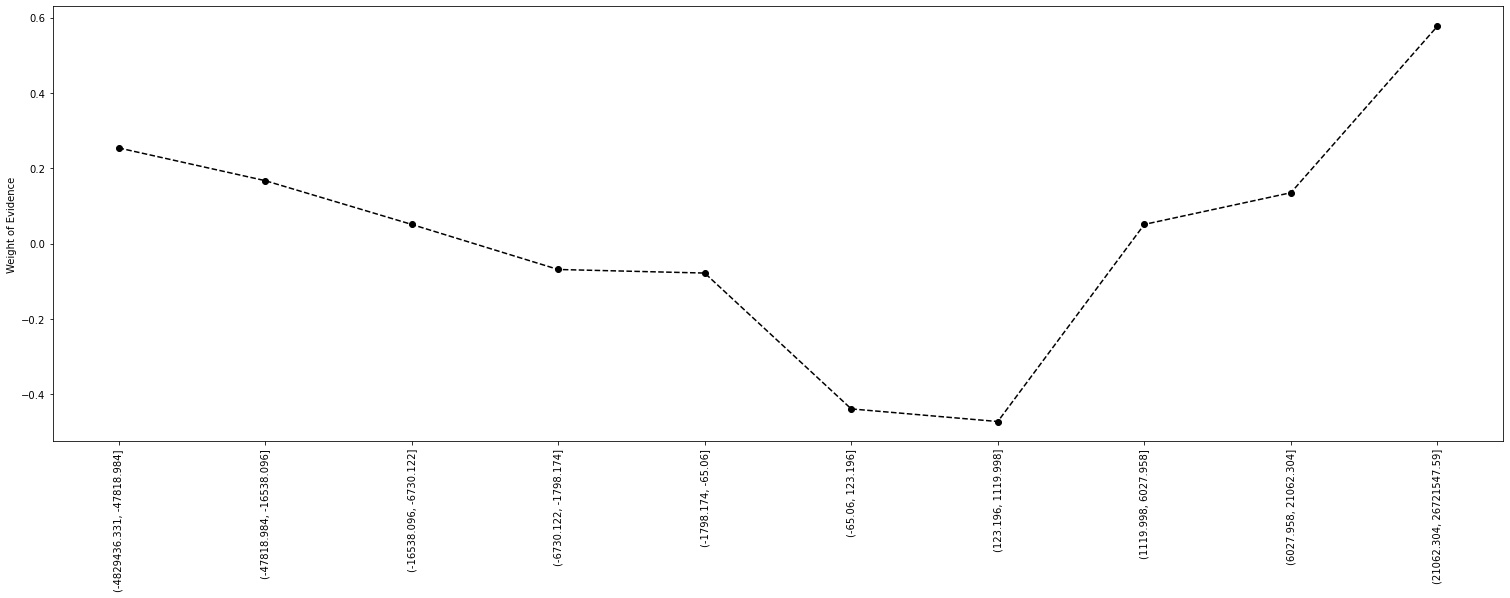

In [241]:

plot_by_woe(woe_num(Train,'total_cash_flow_fine', 'GBFlag'), 90)


In [242]:
## Coarse classing total_cash_flow variable
bins = [-np.inf, -6730, -65, 1120,  np.inf]

Train['total_cash_flow_grped'] = pd.cut(Train['total_cash_flow'], bins, precision=0, include_lowest=True, right=False,)

Test['total_cash_flow_grped'] = pd.cut(Test['total_cash_flow'], bins, precision=0, include_lowest=True, right=False,)

Train['total_cash_flow_grped'].value_counts()

[-inf, -6730.0)     844
[1120.0, inf)       844
[-6730.0, -65.0)    563
[-65.0, 1120.0)     562
Name: total_cash_flow_grped, dtype: int64

### total_loan_repayment_1

In [243]:
### total_loan_repayment_1
#Fine Classsing)
Train['total_loan_repayment_1_fine'] = pd.qcut(Train['total_loan_repayment_1'], q=10, duplicates='drop')
woe_num(Train,'total_loan_repayment_1_fine', 'GBFlag')



GBFlag                       Bad  Good  Freq  Percentage  % Good  % Bad  \
total_loan_repayment_1_fine                                               
(-0.001, 1000.0]             386  1022  1408        50.1    49.9   50.6   
(1000.0, 9000.0]              87   194   281        10.0     9.5   11.4   
(9000.0, 20423.952]           77   203   280        10.0     9.9   10.1   
(20423.952, 42060.056]        76   205   281        10.0    10.0   10.0   
(42060.056, 82837.6]          71   210   281        10.0    10.2    9.3   
(82837.6, 1899419.88]         66   216   282        10.0    10.5    8.7   

GBFlag                       Bad Rate  GoodBaddOdds       WOE        IV  
total_loan_repayment_1_fine                                              
(-0.001, 1000.0]                 27.4          2.65 -0.013931  0.009751  
(1000.0, 9000.0]                 31.0          2.23 -0.182322  0.346411  
(9000.0, 20423.952]              27.5          2.64 -0.020001  0.004000  
(20423.952, 42060.056]           27.0          2.70  0.000000  0.000000  
(42060.056, 82837.6]             25.3          2.96  0.092373  0.083136  
(82837.6, 1899419.88]            23.4          3.27  0.188052  0.338494

In [244]:

## Coarse classing total_loan_repayment_1 variable
bins = [0, 3811, 12941, 58305, np.inf]

Train['total_loan_repayment_1_grped'] = pd.cut(Train['total_loan_repayment_1'], bins, precision=0, include_lowest=True, right=False,)

Test['total_loan_repayment_1_grped'] = pd.cut(Test['total_loan_repayment_1'], bins, precision=0, include_lowest=True, right=False,)

Train['total_loan_repayment_1_grped'].value_counts()

[0.0, 3811.0)         1504
[12941.0, 58305.0)     616
[58305.0, inf)         402
[3811.0, 12941.0)      291
Name: total_loan_repayment_1_grped, dtype: int64

### total_loan_repayment_2


In [245]:
### total_loan_repayment_2
#Fine Classsing)
Train['total_loan_repayment_2_fine'] = pd.qcut(Train['total_loan_repayment_2'], q=10, duplicates='drop')
woe_num(Train,'total_loan_repayment_2_fine', 'GBFlag')

GBFlag                       Bad  Good  Freq  Percentage  % Good  % Bad  \
total_loan_repayment_2_fine                                               
(-0.001, 2100.0]             327   801  1128        40.1    39.1   42.9   
(2100.0, 10372.4]             82   197   279         9.9     9.6   10.7   
(10372.4, 21976.2]            81   200   281        10.0     9.8   10.6   
(21976.2, 43410.704]          75   206   281        10.0    10.0    9.8   
(43410.704, 75644.38]         76   205   281        10.0    10.0   10.0   
(75644.38, 148397.968]        64   217   281        10.0    10.6    8.4   
(148397.968, 11262858.66]     58   224   282        10.0    10.9    7.6   

GBFlag                       Bad Rate  GoodBaddOdds       WOE        IV  
total_loan_repayment_2_fine                                              
(-0.001, 2100.0]                 29.0          2.45 -0.092749  0.352448  
(2100.0, 10372.4]                29.4          2.40 -0.108481  0.119329  
(10372.4, 21976.2]               28.8          2.47 -0.078472  0.062777  
(21976.2, 43410.704]             26.7          2.75  0.020203  0.004041  
(43410.704, 75644.38]            27.0          2.70  0.000000  0.000000  
(75644.38, 148397.968]           22.8          3.39  0.232622  0.511769  
(148397.968, 11262858.66]        20.6          3.86  0.360615  1.190028

In [246]:

## Coarse classing total_loan_repayment_2 variable
bins = [0, 21977, 75645, np.inf]

Train['total_loan_repayment_2_grped'] = pd.cut(Train['total_loan_repayment_2'], bins, precision=0, include_lowest=True, right=False,)

Test['total_loan_repayment_2_grped'] = pd.cut(Test['total_loan_repayment_2'], bins, precision=0, include_lowest=True, right=False,)

Train['total_loan_repayment_2_grped'].value_counts()

[0.0, 21977.0)        1688
[75645.0, inf)         563
[21977.0, 75645.0)     562
Name: total_loan_repayment_2_grped, dtype: int64

### total_loan_repayment_3

In [247]:
### total_loan_repayment_3
#Fine Classsing)
Train['total_loan_repayment_3_fine'] = pd.qcut(Train['total_loan_repayment_3'], q=10, duplicates='drop')
woe_num(Train,'total_loan_repayment_3_fine', 'GBFlag')

GBFlag                       Bad  Good  Freq  Percentage  % Good  % Bad  \
total_loan_repayment_3_fine                                               
(-0.001, 4100.0]             417   991  1408        50.1    48.3   54.7   
(4100.0, 13830.0]             82   198   280        10.0     9.7   10.7   
(13830.0, 28809.826]          84   197   281        10.0     9.6   11.0   
(28809.826, 56660.6]          62   219   281        10.0    10.7    8.1   
(56660.6, 106815.404]         65   216   281        10.0    10.5    8.5   
(106815.404, 11095886.02]     53   229   282        10.0    11.2    6.9   

GBFlag                       Bad Rate  GoodBaddOdds       WOE        IV  
total_loan_repayment_3_fine                                              
(-0.001, 4100.0]                 29.6          2.38 -0.124432  0.796366  
(4100.0, 13830.0]                29.3          2.41 -0.098118  0.098118  
(13830.0, 28809.826]             29.9          2.35 -0.136132  0.190585  
(28809.826, 56660.6]             22.1          3.53  0.278380  0.723787  
(56660.6, 106815.404]            23.1          3.32  0.211309  0.422618  
(106815.404, 11095886.02]        18.8          4.32  0.484392  2.082887

In [248]:

## Coarse classing total_loan_repayment_3 variable
bins = [0, 28810,  np.inf]

Train['total_loan_repayment_3_grped'] = pd.cut(Train['total_loan_repayment_3'], bins, precision=0, include_lowest=True, right=False,)

Test['total_loan_repayment_3_grped'] = pd.cut(Test['total_loan_repayment_3'], bins, precision=0, include_lowest=True, right=False,)

Train['total_loan_repayment_3_grped'].value_counts()

[0.0, 28810.0)    1969
[28810.0, inf)     844
Name: total_loan_repayment_3_grped, dtype: int64

### total_loan_repayment_4

In [249]:
### total_loan_repayment_4
#Fine Classsing)
Train['total_loan_repayment_4_fine'] = pd.qcut(Train['total_loan_repayment_4'], q=5, duplicates='drop')
woe_num(Train,'total_loan_repayment_4_fine', 'GBFlag')

GBFlag                       Bad  Good  Freq  Percentage  % Good  % Bad  \
total_loan_repayment_4_fine                                               
(-0.001, 21832.348]          642  1608  2250        80.0    78.4   84.1   
(21832.348, 7624000.0]       121   442   563        20.0    21.6   15.9   

GBFlag                       Bad Rate  GoodBaddOdds       WOE        IV  
total_loan_repayment_4_fine                                              
(-0.001, 21832.348]              28.5          2.50 -0.070183  0.400041  
(21832.348, 7624000.0]           21.5          3.65  0.306374  1.746333

In [250]:

## Coarse classing total_loan_repayment_4 variable
bins = [0, 21833, np.inf]

Train['total_loan_repayment_4_grped'] = pd.cut(Train['total_loan_repayment_4'], bins, precision=0, include_lowest=True, right=False,)

Test['total_loan_repayment_4_grped'] = pd.cut(Test['total_loan_repayment_4'], bins, precision=0, include_lowest=True, right=False,)

Train['total_loan_repayment_4_grped'].value_counts()

[0.0, 21833.0)    2250
[21833.0, inf)     563
Name: total_loan_repayment_4_grped, dtype: int64

### averageBalance

In [251]:
### averageBalance
#Fine Classsing)
Train['averageBalance_fine'] = pd.qcut(Train['averageBalance'], q=10, duplicates='drop')
woe_num(Train,'averageBalance_fine', 'GBFlag')

GBFlag                   Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
averageBalance_fine                                                             
(-270608.926, 0.0]       101   280   381        13.5    13.7   13.2      26.5   
(0.0, 1536.18]            76   106   182         6.5     5.2   10.0      41.8   
(1536.18, 3877.527]      104   177   281        10.0     8.6   13.6      37.0   
(3877.527, 5401.5]        84   197   281        10.0     9.6   11.0      29.9   
(5401.5, 7880.955]        78   204   282        10.0    10.0   10.2      27.7   
(7880.955, 10409.77]      82   199   281        10.0     9.7   10.7      29.2   
(10409.77, 14287.303]     66   215   281        10.0    10.5    8.7      23.5   
(14287.303, 20156.808]    63   218   281        10.0    10.6    8.3      22.4   
(20156.808, 34064.738]    51   230   281        10.0    11.2    6.7      18.1   
(34064.738, 2346169.63]   58   224   282        10.0    10.9    7.6      20.6   

GBFlag                   GoodBaddOdds       WOE        IV  
averageBalance_fine                                        
(-270608.926, 0.0]               2.77  0.037179  0.018590  
(0.0, 1536.18]                   1.39 -0.653926  3.138847  
(1536.18, 3877.527]              1.70 -0.458308  2.291538  
(3877.527, 5401.5]               2.35 -0.136132  0.190585  
(5401.5, 7880.955]               2.62 -0.019803  0.003961  
(7880.955, 10409.77]             2.43 -0.098118  0.098118  
(10409.77, 14287.303]            3.26  0.188052  0.338494  
(14287.303, 20156.808]           3.46  0.244598  0.562577  
(20156.808, 34064.738]           4.51  0.513806  2.312128  
(34064.738, 2346169.63]          3.86  0.360615  1.190028

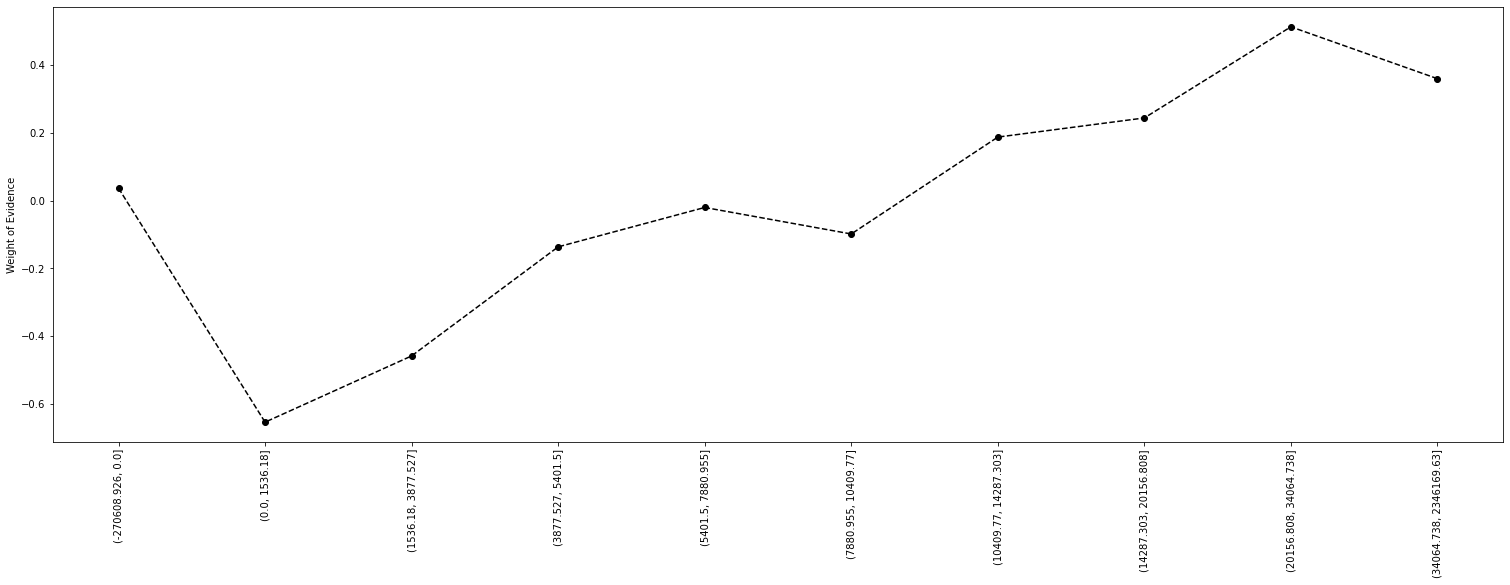

In [252]:

plot_by_woe(woe_num(Train,'averageBalance_fine', 'GBFlag'), 90)

In [253]:
## Coarse classing averageBalance variable
bins = [-np.inf,0.1, 3978, 10410, 20157, np.inf]

Train['averageBalance_grped'] = pd.cut(Train['averageBalance'], bins, precision=0, include_lowest=True, right=False,)

Test['averageBalance_grped'] = pd.cut(Test['averageBalance'], bins, precision=0, include_lowest=True, right=False,)

Train['averageBalance_grped'].value_counts()

[3978.0, 10410.0)     830
[20157.0, inf)        563
[10410.0, 20157.0)    562
[0.0, 3978.0)         477
[-inf, 0.0)           381
Name: averageBalance_grped, dtype: int64

### MaxCreditMn

In [254]:
### MaxCreditMn
#Fine Classsing)
Train['MaxCreditMn_fine'] = pd.qcut(Train['MaxCreditMn'], q=10, duplicates='drop')
woe_num(Train,'MaxCreditMn_fine', 'GBFlag')

GBFlag                            Bad  Good  Freq  Percentage  % Good  % Bad  \
MaxCreditMn_fine                                                               
(38100.149000000005, 191463.536]   88   194   282        10.0     9.5   11.5   
(191463.536, 281617.136]           89   192   281        10.0     9.4   11.7   
(281617.136, 389214.412]           86   195   281        10.0     9.5   11.3   
(389214.412, 503250.926]           79   202   281        10.0     9.9   10.4   
(503250.926, 666862.0]             70   212   282        10.0    10.3    9.2   
(666862.0, 845256.574]             82   199   281        10.0     9.7   10.7   
(845256.574, 1132087.744]          85   196   281        10.0     9.6   11.1   
(1132087.744, 1571932.75]          69   212   281        10.0    10.3    9.0   
(1571932.75, 2582208.0]            61   220   281        10.0    10.7    8.0   
(2582208.0, 150824743.0]           54   228   282        10.0    11.1    7.1   

GBFlag                            Bad Rate  GoodBaddOdds       WOE        IV  
MaxCreditMn_fine                                                              
(38100.149000000005, 191463.536]      31.2          2.20 -0.191055  0.382110  
(191463.536, 281617.136]              31.7          2.16 -0.218879  0.503422  
(281617.136, 389214.412]              30.6          2.27 -0.173511  0.312320  
(389214.412, 503250.926]              28.1          2.56 -0.049271  0.024636  
(503250.926, 666862.0]                24.8          3.03  0.112940  0.124234  
(666862.0, 845256.574]                29.2          2.43 -0.098118  0.098118  
(845256.574, 1132087.744]             30.2          2.31 -0.145182  0.217773  
(1132087.744, 1571932.75]             24.6          3.07  0.134919  0.175395  
(1571932.75, 2582208.0]               21.7          3.61  0.290802  0.785166  
(2582208.0, 150824743.0]              19.1          4.22  0.446850  1.787401

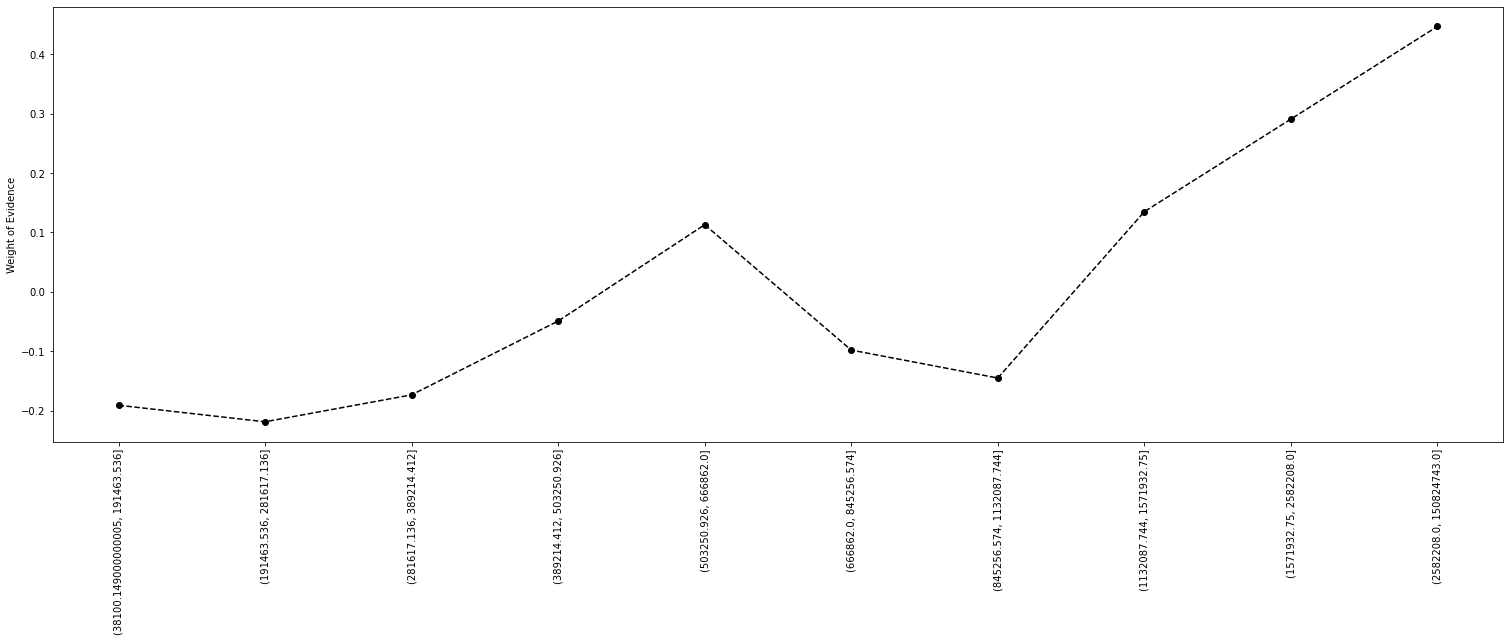

In [255]:

plot_by_woe(woe_num(Train,'MaxCreditMn_fine', 'GBFlag'), 90)

In [258]:
## Coarse classing MaxCreditMn variable
bins = [0, 503251, 666863, 1132088, 1571933,  np.inf]

Train['MaxCreditMn_grped'] = pd.cut(Train['MaxCreditMn'], bins, precision=0, include_lowest=True, right=False,)

Test['MaxCreditMn_grped'] = pd.cut(Test['MaxCreditMn'], bins, precision=0, include_lowest=True, right=False,)

Train['MaxCreditMn_grped'].value_counts()

[0.0, 503251.0)           1125
[1571933.0, inf)           563
[666863.0, 1132088.0)      562
[503251.0, 666863.0)       282
[1132088.0, 1571933.0)     281
Name: MaxCreditMn_grped, dtype: int64

### MaxDebitMn

In [259]:
### MaxDebitMn
#Fine Classsing)
Train['MaxDebitMn_fine'] = pd.qcut(Train['MaxDebitMn'], q=10, duplicates='drop')
woe_num(Train,'MaxDebitMn_fine', 'GBFlag')

GBFlag                       Bad  Good  Freq  Percentage  % Good  % Bad  \
MaxDebitMn_fine                                                           
(40855.849, 188122.39]        89   193   282        10.0     9.4   11.7   
(188122.39, 282651.88]        86   195   281        10.0     9.5   11.3   
(282651.88, 388367.206]       90   191   281        10.0     9.3   11.8   
(388367.206, 507557.866]      82   199   281        10.0     9.7   10.7   
(507557.866, 664166.87]       70   212   282        10.0    10.3    9.2   
(664166.87, 859867.33]        76   205   281        10.0    10.0   10.0   
(859867.33, 1148597.396]      88   193   281        10.0     9.4   11.5   
(1148597.396, 1574393.048]    68   213   281        10.0    10.4    8.9   
(1574393.048, 2561674.304]    59   222   281        10.0    10.8    7.7   
(2561674.304, 150925958.56]   55   227   282        10.0    11.1    7.2   

GBFlag                       Bad Rate  GoodBaddOdds       WOE        IV  
MaxDebitMn_fine                                                          
(40855.849, 188122.39]           31.6          2.17 -0.218879  0.503422  
(188122.39, 282651.88]           30.6          2.27 -0.173511  0.312320  
(282651.88, 388367.206]          32.0          2.12 -0.238085  0.595213  
(388367.206, 507557.866]         29.2          2.43 -0.098118  0.098118  
(507557.866, 664166.87]          24.8          3.03  0.112940  0.124234  
(664166.87, 859867.33]           27.0          2.70  0.000000  0.000000  
(859867.33, 1148597.396]         31.3          2.19 -0.201637  0.423438  
(1148597.396, 1574393.048]       24.2          3.13  0.155755  0.233632  
(1574393.048, 2561674.304]       21.0          3.76  0.338326  1.048810  
(2561674.304, 150925958.56]      19.5          4.13  0.432864  1.688170

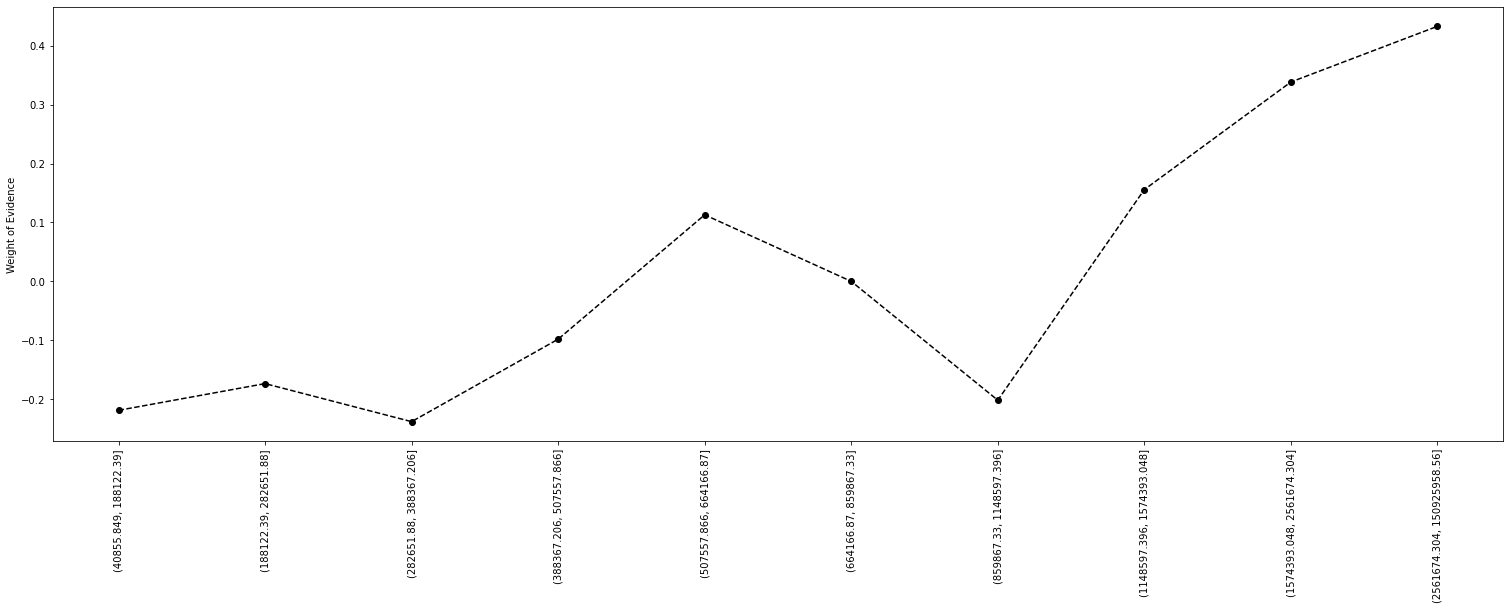

In [260]:

plot_by_woe(woe_num(Train,'MaxDebitMn_fine', 'GBFlag'), 90)

In [261]:
## Coarse classing MaxDebitMn variable
bins = [0, 507558, 859868, 1148598, np.inf]

Train['MaxDebitMn_grped'] = pd.cut(Train['MaxDebitMn'], bins, precision=0, include_lowest=True, right=False,)

Test['MaxDebitMn_grped'] = pd.cut(Test['MaxDebitMn'], bins, precision=0, include_lowest=True, right=False,)

Train['MaxDebitMn_grped'].value_counts()

[0.0, 507558.0)          1125
[1148598.0, inf)          844
[507558.0, 859868.0)      563
[859868.0, 1148598.0)     281
Name: MaxDebitMn_grped, dtype: int64

In [262]:
woe_cat(Train, 'MaxDebitMn_grped', 'GBFlag')

GBFlag                 Bad  Good  Freq    Proptn    % Good     % Bad  \
MaxDebitMn_grped                                                       
[1148598.0, inf)       182   662   844  0.300036  0.322927  0.238532   
[507558.0, 859868.0)   146   417   563  0.200142  0.203415  0.191350   
[0.0, 507558.0)        347   778  1125  0.399929  0.379512  0.454784   
[859868.0, 1148598.0)   88   193   281  0.099893  0.094146  0.115334   

GBFlag                 Bad Rate  GoodBaddOdds       WOE  class IV  Variable IV  
MaxDebitMn_grped                                                                
[1148598.0, inf)       0.215640          3.64 -0.302922  0.025565     0.044223  
[507558.0, 859868.0)   0.259325          2.86 -0.061143  0.000738     0.044223  
[0.0, 507558.0)        0.308444          2.24  0.180935  0.013619     0.044223  
[859868.0, 1148598.0)  0.313167          2.19  0.202984  0.004301     0.044223

### MaxCreditWk

In [263]:
### MaxCreditWk
#Fine Classsing)
Train['MaxCreditWk_fine'] = pd.qcut(Train['MaxCreditWk'], q=10, duplicates='drop')
woe_num(Train,'MaxCreditWk_fine', 'GBFlag')

GBFlag                   Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
MaxCreditWk_fine                                                                
(26341.999, 105428.8]     92   190   282        10.0     9.3   12.1      32.6   
(105428.8, 152930.0]      96   185   281        10.0     9.0   12.6      34.2   
(152930.0, 204090.0]      77   204   281        10.0    10.0   10.1      27.4   
(204090.0, 257501.6]      83   198   281        10.0     9.7   10.9      29.5   
(257501.6, 327918.0]      83   199   282        10.0     9.7   10.9      29.4   
(327918.0, 417392.828]    72   209   281        10.0    10.2    9.4      25.6   
(417392.828, 560819.6]    77   204   281        10.0    10.0   10.1      27.4   
(560819.6, 789120.8]      66   215   281        10.0    10.5    8.7      23.5   
(789120.8, 1371770.4]     59   222   281        10.0    10.8    7.7      21.0   
(1371770.4, 77380000.0]   58   224   282        10.0    10.9    7.6      20.6   

GBFlag                   GoodBaddOdds       WOE        IV  
MaxCreditWk_fine                                           
(26341.999, 105428.8]            2.07 -0.263191  0.736935  
(105428.8, 152930.0]             1.93 -0.336472  1.211300  
(152930.0, 204090.0]             2.65 -0.009950  0.000995  
(204090.0, 257501.6]             2.39 -0.116637  0.139964  
(257501.6, 327918.0]             2.40 -0.116637  0.139964  
(327918.0, 417392.828]           2.90  0.081678  0.065342  
(417392.828, 560819.6]           2.65 -0.009950  0.000995  
(560819.6, 789120.8]             3.26  0.188052  0.338494  
(789120.8, 1371770.4]            3.76  0.338326  1.048810  
(1371770.4, 77380000.0]          3.86  0.360615  1.190028

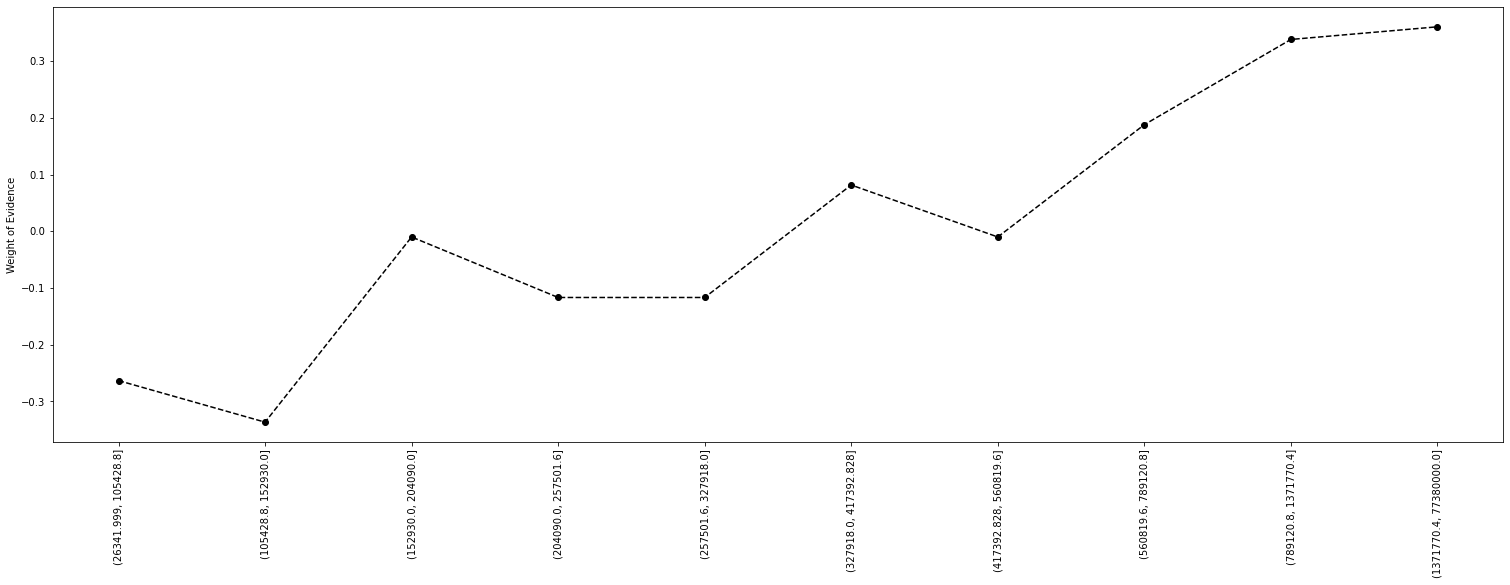

In [264]:

plot_by_woe(woe_num(Train,'MaxCreditWk_fine', 'GBFlag'), 90)

In [265]:
## Coarse classing MaxCredit_Wk variable
bins = [0, 152931,327919,  560820,   np.inf]

Train['MaxCreditWk_grped'] = pd.cut(Train['MaxCreditWk'], bins, precision=0, include_lowest=True, right=False,)

Test['MaxCreditWk_grped'] = pd.cut(Test['MaxCreditWk'], bins, precision=0, include_lowest=True, right=False,)

Train['MaxCreditWk_grped'].value_counts()

[152931.0, 327919.0)    844
[560820.0, inf)         844
[0.0, 152931.0)         563
[327919.0, 560820.0)    562
Name: MaxCreditWk_grped, dtype: int64

### numberofDebits

In [266]:
### numberofDebits
#Fine Classsing
Train['numberofDebits_fine'] = pd.qcut(Train['numberofDebits'], q=10, duplicates='drop')
woe_num(Train,'numberofDebits_fine', 'GBFlag')


GBFlag               Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
numberofDebits_fine                                                         
(6.999, 128.2]        60   222   282        10.0    10.8    7.9      21.3   
(128.2, 188.0]        75   214   289        10.3    10.4    9.8      26.0   
(188.0, 239.0]        76   198   274         9.7     9.7   10.0      27.7   
(239.0, 293.0]        75   206   281        10.0    10.0    9.8      26.7   
(293.0, 346.0]        69   215   284        10.1    10.5    9.0      24.3   
(346.0, 418.2]        85   193   278         9.9     9.4   11.1      30.6   
(418.2, 501.4]        82   199   281        10.0     9.7   10.7      29.2   
(501.4, 619.2]        90   191   281        10.0     9.3   11.8      32.0   
(619.2, 818.0]        80   202   282        10.0     9.9   10.5      28.4   
(818.0, 4521.0]       71   210   281        10.0    10.2    9.3      25.3   

GBFlag               GoodBaddOdds       WOE        IV  
numberofDebits_fine                                    
(6.999, 128.2]               3.70  0.312683  0.906782  
(128.2, 188.0]               2.85  0.059423  0.035654  
(188.0, 239.0]               2.61 -0.030459  0.009138  
(239.0, 293.0]               2.75  0.020203  0.004041  
(293.0, 346.0]               3.12  0.154151  0.231226  
(346.0, 418.2]               2.27 -0.166235  0.282600  
(418.2, 501.4]               2.43 -0.098118  0.098118  
(501.4, 619.2]               2.12 -0.238085  0.595213  
(619.2, 818.0]               2.52 -0.058841  0.035304  
(818.0, 4521.0]              2.96  0.092373  0.083136

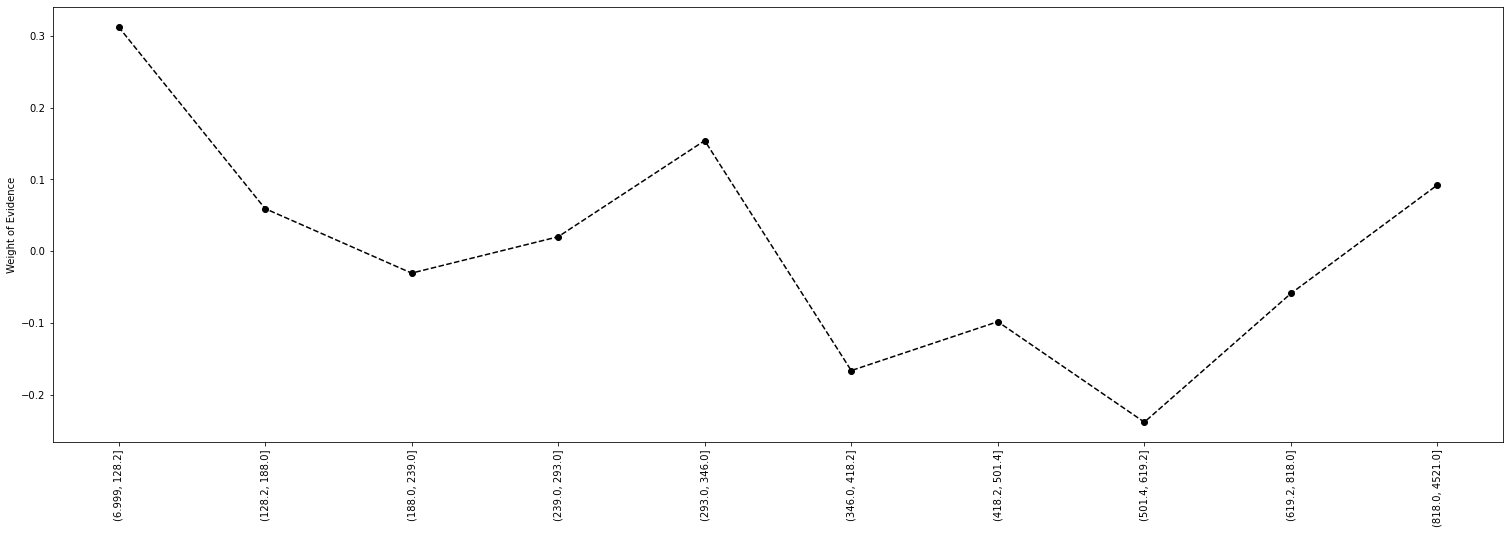

In [267]:
plot_by_woe(woe_num(Train,'numberofDebits_fine', 'GBFlag'), 90)

In [268]:
## Coarse classing numberofDebits variable
bins = [0,129, 294, 347, 620, 819, np.inf]

Train['numberofDebits_grped'] = pd.cut(Train['numberofDebits'], bins, precision=0, include_lowest=True, right=False,)

Test['numberofDebits_grped'] = pd.cut(Test['numberofDebits'], bins, precision=0, include_lowest=True, right=False,)

Train['numberofDebits_grped'].value_counts()

[129.0, 294.0)    844
[347.0, 620.0)    840
[294.0, 347.0)    284
[0.0, 129.0)      282
[620.0, 819.0)    282
[819.0, inf)      281
Name: numberofDebits_grped, dtype: int64

### NumberOfCredits

In [269]:
### NumberOfCredits
#Fine Classsing
Train['NumberOfCredits_fine'] = pd.qcut(Train['NumberOfCredits'], q=10, duplicates='drop')
woe_num(Train,'NumberOfCredits_fine', 'GBFlag')

GBFlag                Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
NumberOfCredits_fine                                                         
(2.999, 33.0]          55   241   296        10.5    11.8    7.2      18.6   
(33.0, 49.0]           67   207   274         9.7    10.1    8.8      24.5   
(49.0, 63.0]           82   210   292        10.4    10.2   10.7      28.1   
(63.0, 77.0]           73   198   271         9.6     9.7    9.6      26.9   
(77.0, 94.0]           72   202   274         9.7     9.9    9.4      26.3   
(94.0, 112.0]          66   216   282        10.0    10.5    8.7      23.4   
(112.0, 141.0]        102   188   290        10.3     9.2   13.4      35.2   
(141.0, 177.6]         77   194   271         9.6     9.5   10.1      28.4   
(177.6, 245.0]         93   189   282        10.0     9.2   12.2      33.0   
(245.0, 2242.0]        76   205   281        10.0    10.0   10.0      27.0   

GBFlag                GoodBaddOdds       WOE        IV  
NumberOfCredits_fine                                    
(2.999, 33.0]                 4.38  0.494019  2.272485  
(33.0, 49.0]                  3.09  0.137784  0.179119  
(49.0, 63.0]                  2.56 -0.047856  0.023928  
(63.0, 77.0]                  2.71  0.010363  0.001036  
(77.0, 94.0]                  2.81  0.051825  0.025913  
(94.0, 112.0]                 3.27  0.188052  0.338494  
(112.0, 141.0]                1.84 -0.376051  1.579415  
(141.0, 177.6]                2.52 -0.061244  0.036746  
(177.6, 245.0]                2.03 -0.282232  0.846697  
(245.0, 2242.0]               2.70  0.000000  0.000000

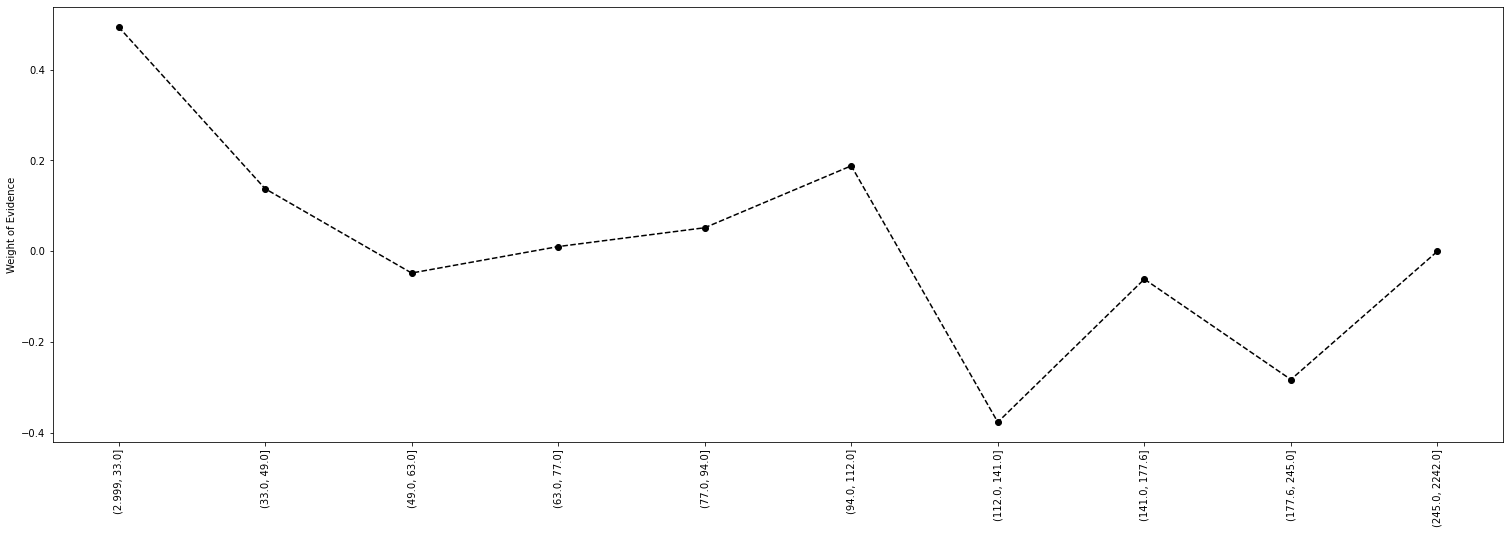

In [270]:

plot_by_woe(woe_num(Train,'NumberOfCredits_fine', 'GBFlag'), 90)


In [271]:
## Coarse classing NumberOfCredits variable
bins = [0, 34, 50, 95, 113, 142,  np.inf]

Train['NumberOfCredits_grped'] = pd.cut(Train['NumberOfCredits'], bins, precision=0, include_lowest=True, right=False,)

Test['NumberOfCredits_grped'] = pd.cut(Test['NumberOfCredits'], bins, precision=0, include_lowest=True, right=False,)

Train['NumberOfCredits_grped'].value_counts()

[50.0, 95.0)      837
[142.0, inf)      834
[0.0, 34.0)       296
[113.0, 142.0)    290
[95.0, 113.0)     282
[34.0, 50.0)      274
Name: NumberOfCredits_grped, dtype: int64

In [272]:
woe_cat(Train, 'NumberOfCredits_grped', 'GBFlag')

GBFlag                 Bad  Good  Freq    Proptn    % Good     % Bad  \
NumberOfCredits_grped                                                  
[0.0, 34.0)             55   241   296  0.105226  0.117561  0.072084   
[95.0, 113.0)           66   216   282  0.100249  0.105366  0.086501   
[34.0, 50.0)            67   207   274  0.097405  0.100976  0.087811   
[50.0, 95.0)           227   610   837  0.297547  0.297561  0.297510   
[142.0, inf)           246   588   834  0.296481  0.286829  0.322412   
[113.0, 142.0)         102   188   290  0.103093  0.091707  0.133683   

GBFlag                 Bad Rate  GoodBaddOdds       WOE      class IV  \
NumberOfCredits_grped                                                   
[0.0, 34.0)            0.185811          4.38 -0.489127  2.224406e-02   
[95.0, 113.0)          0.234043          3.27 -0.197287  3.721851e-03   
[34.0, 50.0)           0.244526          3.09 -0.139689  1.838915e-03   
[50.0, 95.0)           0.271207          2.69 -0.000172  8.791936e-09   
[142.0, inf)           0.294964          2.39  0.116942  4.161048e-03   
[113.0, 142.0)         0.351724          1.84  0.376868  1.581922e-02   

GBFlag                 Variable IV  
NumberOfCredits_grped               
[0.0, 34.0)               0.047785  
[95.0, 113.0)             0.047785  
[34.0, 50.0)              0.047785  
[50.0, 95.0)              0.047785  
[142.0, inf)              0.047785  
[113.0, 142.0)            0.047785

### Vol_ATM_Transactions_Count1

In [273]:
### Vol_ATM_Transactions_Count1
#Fine Classsing
Train['Vol_ATM_Transactions_Count1_fine'] = pd.qcut(Train['Vol_ATM_Transactions_Count1'], q=5, duplicates='drop')
woe_num(Train,'Vol_ATM_Transactions_Count1_fine', 'GBFlag')

GBFlag                            Bad  Good  Freq  Percentage  % Good  % Bad  \
Vol_ATM_Transactions_Count1_fine                                               
(-0.001, 2.0]                     637  1690  2327        82.7    82.4   83.5   
(2.0, 115.0]                      126   360   486        17.3    17.6   16.5   

GBFlag                            Bad Rate  GoodBaddOdds       WOE        IV  
Vol_ATM_Transactions_Count1_fine                                              
(-0.001, 2.0]                         27.4          2.65 -0.013261  0.014587  
(2.0, 115.0]                          25.9          2.86  0.064539  0.070992

In [274]:
## Coarse classing Vol_ATM_Transactions_Count1 variable
bins = [0, 3, np.inf]

Train['Vol_ATM_Transactions_Count1_grped'] = pd.cut(Train['Vol_ATM_Transactions_Count1'], bins, precision=0, include_lowest=True, right=False,)

Test['Vol_ATM_Transactions_Count1_grped'] = pd.cut(Test['Vol_ATM_Transactions_Count1'], bins, precision=0, include_lowest=True, right=False,)

Train['Vol_ATM_Transactions_Count1_grped'].value_counts()

[0.0, 3.0)    2327
[3.0, inf)     486
Name: Vol_ATM_Transactions_Count1_grped, dtype: int64

### Vol_ATM_Transactions_Count2

In [275]:
### Vol_ATM_Transactions_Count2
#Fine Classsing
Train['Vol_ATM_Transactions_Count2_fine'] = pd.qcut(Train['Vol_ATM_Transactions_Count2'], q=10, duplicates='drop')
woe_num(Train,'Vol_ATM_Transactions_Count2_fine', 'GBFlag')

GBFlag                            Bad  Good  Freq  Percentage  % Good  % Bad  \
Vol_ATM_Transactions_Count2_fine                                               
(-0.001, 1.0]                     486  1334  1820        64.7    65.1   63.7   
(1.0, 2.0]                         48   109   157         5.6     5.3    6.3   
(2.0, 5.0]                         73   221   294        10.5    10.8    9.6   
(5.0, 12.0]                        82   192   274         9.7     9.4   10.7   
(12.0, 233.0]                      74   194   268         9.5     9.5    9.7   

GBFlag                            Bad Rate  GoodBaddOdds       WOE        IV  
Vol_ATM_Transactions_Count2_fine                                              
(-0.001, 1.0]                         26.7          2.74  0.021740  0.030436  
(1.0, 2.0]                            30.6          2.27 -0.172843  0.172843  
(2.0, 5.0]                            24.8          3.03  0.117783  0.141340  
(5.0, 12.0]                           29.9          2.34 -0.129534  0.168394  
(12.0, 233.0]                         27.6          2.62 -0.020834  0.004167

In [276]:
## Coarse classing Vol_ATM_Transactions_Count2 variable
bins = [0, 1.1, 2.1, 5.1, np.inf]

Train['Vol_ATM_Transactions_Count2_grped'] = pd.cut(Train['Vol_ATM_Transactions_Count2'], bins, precision=0, include_lowest=True, right=False,)

Test['Vol_ATM_Transactions_Count2_grped'] = pd.cut(Test['Vol_ATM_Transactions_Count2'], bins, precision=0, include_lowest=True, right=False,)

Train['Vol_ATM_Transactions_Count2_grped'].value_counts()

[0.0, 1.0)    1820
[5.0, inf)     542
[2.0, 5.0)     294
[1.0, 2.0)     157
Name: Vol_ATM_Transactions_Count2_grped, dtype: int64

### Vol_ATM_Transactions_Count3

In [277]:
### Vol_ATM_Transactions_Count3
#Fine Classsing
Train['Vol_ATM_Transactions_Count3_fine'] = pd.qcut(Train['Vol_ATM_Transactions_Count3'], q=10, duplicates='drop')
woe_num(Train,'Vol_ATM_Transactions_Count3_fine', 'GBFlag')

GBFlag                            Bad  Good  Freq  Percentage  % Good  % Bad  \
Vol_ATM_Transactions_Count3_fine                                               
(-0.001, 1.0]                     492  1294  1786        63.5    63.1   64.5   
(1.0, 3.0]                         79   225   304        10.8    11.0   10.4   
(3.0, 5.0]                         46   122   168         6.0     6.0    6.0   
(5.0, 12.0]                        70   211   281        10.0    10.3    9.2   
(12.0, 326.0]                      76   198   274         9.7     9.7   10.0   

GBFlag                            Bad Rate  GoodBaddOdds       WOE        IV  
Vol_ATM_Transactions_Count3_fine                                              
(-0.001, 1.0]                         27.5          2.63 -0.021944  0.030722  
(1.0, 3.0]                            26.0          2.85  0.056089  0.033654  
(3.0, 5.0]                            27.4          2.65  0.000000  0.000000  
(5.0, 12.0]                           24.9          3.01  0.112940  0.124234  
(12.0, 326.0]                         27.7          2.61 -0.030459  0.009138

In [278]:
## Coarse classing Vol_ATM_Transactions_Count3 variable
bins = [0, 1.1, 5.1, 12.1, np.inf]

Train['Vol_ATM_Transactions_Count3_grped'] = pd.cut(Train['Vol_ATM_Transactions_Count3'], bins, precision=0, include_lowest=True, right=False,)

Test['Vol_ATM_Transactions_Count3_grped'] = pd.cut(Test['Vol_ATM_Transactions_Count3'], bins, precision=0, include_lowest=True, right=False,)

Train['Vol_ATM_Transactions_Count3_grped'].value_counts()

[0.0, 1.0)     1786
[1.0, 5.0)      472
[5.0, 12.0)     281
[12.0, inf)     274
Name: Vol_ATM_Transactions_Count3_grped, dtype: int64

### Vol_ATM_Transactions_Count4

In [279]:
### Vol_ATM_Transactions_Count4
#Fine Classsing
Train['Vol_ATM_Transactions_Count4_fine'] = pd.qcut(Train['Vol_ATM_Transactions_Count4'], q=10, duplicates='drop')
woe_num(Train,'Vol_ATM_Transactions_Count4_fine', 'GBFlag')

GBFlag                            Bad  Good  Freq  Percentage  % Good  % Bad  \
Vol_ATM_Transactions_Count4_fine                                               
(-0.001, 1.0]                     573  1558  2131        75.8    76.0   75.1   
(1.0, 2.0]                         43   105   148         5.3     5.1    5.6   
(2.0, 6.0]                         72   205   277         9.8    10.0    9.4   
(6.0, 256.0]                       75   182   257         9.1     8.9    9.8   

GBFlag                            Bad Rate  GoodBaddOdds       WOE        IV  
Vol_ATM_Transactions_Count4_fine                                              
(-0.001, 1.0]                         26.9          2.72  0.011913  0.010722  
(1.0, 2.0]                            29.1          2.44 -0.093526  0.046763  
(2.0, 6.0]                            26.0          2.85  0.061875  0.037125  
(6.0, 256.0]                          29.2          2.43 -0.096331  0.086698

In [280]:
## Coarse classing Vol_ATM_Transactions_Count4 variable
bins = [0, 1.1, 2.1, 6.1, np.inf]

Train['Vol_ATM_Transactions_Count4_grped'] = pd.cut(Train['Vol_ATM_Transactions_Count4'], bins, precision=0, include_lowest=True, right=False,)

Test['Vol_ATM_Transactions_Count4_grped'] = pd.cut(Test['Vol_ATM_Transactions_Count4'], bins, precision=0, include_lowest=True, right=False,)

Train['Vol_ATM_Transactions_Count4_grped'].value_counts()

[0.0, 1.0)    2131
[2.0, 6.0)     277
[6.0, inf)     257
[1.0, 2.0)     148
Name: Vol_ATM_Transactions_Count4_grped, dtype: int64

### School_Fees_Amnt_3

In [281]:
#Fine Classsing
Train['School_Fees_Amnt_3_fine'] = pd.qcut(Train['School_Fees_Amnt_3'], q=5, duplicates='drop')
woe_num(Train,'School_Fees_Amnt_3_fine', 'GBFlag')

GBFlag                   Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
School_Fees_Amnt_3_fine                                                         
(-0.001, 1205020.0]      763  2050  2813       100.0   100.0  100.0      27.1   

GBFlag                   GoodBaddOdds  WOE   IV  
School_Fees_Amnt_3_fine                          
(-0.001, 1205020.0]              2.69  0.0  0.0

In [282]:

## Coarse classing School_Fees_Amnt_3 variable
bins = [-999, -0.1, 0.1,   np.inf]

Train['School_Fees_Amnt_3_grped'] = pd.cut(Train['School_Fees_Amnt_3'], bins, precision=0, include_lowest=True, right=False,)

Test['School_Fees_Amnt_3_grped'] = pd.cut(Test['School_Fees_Amnt_3'], bins, precision=0, include_lowest=True, right=False,)

Train['School_Fees_Amnt_3_grped'].value_counts()

[-0.1, 0.1)       2715
[0.1, inf)          98
[-999.0, -0.1)       0
Name: School_Fees_Amnt_3_grped, dtype: int64

### Banking_Fees_Freq_1

In [283]:
#Fine Classsing
Train['Banking_Fees_Freq_1_fine'] = pd.qcut(Train['Banking_Fees_Freq_1'], q=10, duplicates='drop')
woe_num(Train,'Banking_Fees_Freq_1_fine', 'GBFlag')

GBFlag                    Bad  Good  Freq  Percentage  % Good  % Bad  \
Banking_Fees_Freq_1_fine                                               
(-0.001, 11.982]           58   224   282        10.0    10.9    7.6   
(11.982, 78.75]            81   201   282        10.0     9.8   10.6   
(78.75, 150.678]           80   200   280        10.0     9.8   10.5   
(150.678, 242.998]         82   199   281        10.0     9.7   10.7   
(242.998, 364.22]          80   203   283        10.1     9.9   10.5   
(364.22, 526.49]           85   195   280        10.0     9.5   11.1   
(526.49, 786.638]          70   211   281        10.0    10.3    9.2   
(786.638, 1246.06]         71   210   281        10.0    10.2    9.3   
(1246.06, 2405.2]          74   207   281        10.0    10.1    9.7   
(2405.2, 906254.02]        82   200   282        10.0     9.8   10.7   

GBFlag                    Bad Rate  GoodBaddOdds       WOE        IV  
Banking_Fees_Freq_1_fine                                              
(-0.001, 11.982]              20.6          3.86  0.360615  1.190028  
(11.982, 78.75]               28.7          2.48 -0.078472  0.062777  
(78.75, 150.678]              28.6          2.50 -0.068993  0.048295  
(150.678, 242.998]            29.2          2.43 -0.098118  0.098118  
(242.998, 364.22]             28.3          2.54 -0.058841  0.035304  
(364.22, 526.49]              30.4          2.29 -0.155653  0.249045  
(526.49, 786.638]             24.9          3.01  0.112940  0.124234  
(786.638, 1246.06]            25.3          2.96  0.092373  0.083136  
(1246.06, 2405.2]             26.3          2.80  0.040410  0.016164  
(2405.2, 906254.02]           29.1          2.44 -0.087861  0.079075

In [284]:

## Coarse classing Banking_Fees_Freq_1 variable
bins = [0,3.4, 56.8, 120, 475, 701, 1947,  np.inf]

Train['Banking_Fees_Freq_1_grped'] = pd.cut(Train['Banking_Fees_Freq_1'], bins, precision=0, include_lowest=True, right=False,)

Test['Banking_Fees_Freq_1_grped'] = pd.cut(Test['Banking_Fees_Freq_1'], bins, precision=0, include_lowest=True, right=False,)

Train['Banking_Fees_Freq_1_grped'].value_counts()

[120.0, 475.0)     865
[701.0, 1947.0)    559
[1947.0, inf)      353
[475.0, 701.0)     285
[3.0, 57.0)        268
[57.0, 120.0)      267
[0.0, 3.0)         216
Name: Banking_Fees_Freq_1_grped, dtype: int64

### Banking_Fees_Freq_2

In [285]:
#Fine Classsing
Train['Banking_Fees_Freq_2_fine'] = pd.qcut(Train['Banking_Fees_Freq_2'], q=10, duplicates='drop')
woe_num(Train,'Banking_Fees_Freq_2_fine', 'GBFlag')

GBFlag                    Bad  Good  Freq  Percentage  % Good  % Bad  \
Banking_Fees_Freq_2_fine                                               
(-0.001, 212.29]           73   209   282        10.0    10.2    9.6   
(212.29, 447.478]          69   212   281        10.0    10.3    9.0   
(447.478, 659.746]         87   194   281        10.0     9.5   11.4   
(659.746, 899.978]         85   196   281        10.0     9.6   11.1   
(899.978, 1155.22]         78   204   282        10.0    10.0   10.2   
(1155.22, 1467.392]        79   202   281        10.0     9.9   10.4   
(1467.392, 1898.91]        70   211   281        10.0    10.3    9.2   
(1898.91, 2626.886]        67   214   281        10.0    10.4    8.8   
(2626.886, 4367.446]       74   207   281        10.0    10.1    9.7   
(4367.446, 1051795.43]     81   201   282        10.0     9.8   10.6   

GBFlag                    Bad Rate  GoodBaddOdds       WOE        IV  
Banking_Fees_Freq_2_fine                                              
(-0.001, 212.29]              25.9          2.86  0.060625  0.036375  
(212.29, 447.478]             24.6          3.07  0.134919  0.175395  
(447.478, 659.746]            31.0          2.23 -0.182322  0.346411  
(659.746, 899.978]            30.2          2.31 -0.145182  0.217773  
(899.978, 1155.22]            27.7          2.62 -0.019803  0.003961  
(1155.22, 1467.392]           28.1          2.56 -0.049271  0.024636  
(1467.392, 1898.91]           24.9          3.01  0.112940  0.124234  
(1898.91, 2626.886]           23.8          3.19  0.167054  0.267287  
(2626.886, 4367.446]          26.3          2.80  0.040410  0.016164  
(4367.446, 1051795.43]        28.7          2.48 -0.078472  0.062777

In [286]:

## Coarse classing Banking_Fees_Freq_2 variable
bins = [0, 448, 900, 1468, 2627,  np.inf]

Train['Banking_Fees_Freq_2_grped'] = pd.cut(Train['Banking_Fees_Freq_2'], bins, precision=0, include_lowest=True, right=False,)

Test['Banking_Fees_Freq_2_grped'] = pd.cut(Test['Banking_Fees_Freq_2'], bins, precision=0, include_lowest=True, right=False,)

Train['Banking_Fees_Freq_2_grped'].value_counts()

[900.0, 1468.0)     565
[0.0, 448.0)        563
[2627.0, inf)       563
[448.0, 900.0)      562
[1468.0, 2627.0)    560
Name: Banking_Fees_Freq_2_grped, dtype: int64

### Banking_Fees_Freq_3

In [287]:
#Fine Classsing
Train['Banking_Fees_Freq_3_fine'] = pd.qcut(Train['Banking_Fees_Freq_3'], q=10, duplicates='drop')
woe_num(Train,'Banking_Fees_Freq_3_fine', 'GBFlag')

GBFlag                    Bad  Good  Freq  Percentage  % Good  % Bad  \
Banking_Fees_Freq_3_fine                                               
(-0.001, 201.92]           74   208   282        10.0    10.1    9.7   
(201.92, 400.0]            88   198   286        10.2     9.7   11.5   
(400.0, 569.324]           82   194   276         9.8     9.5   10.7   
(569.324, 774.01]          66   215   281        10.0    10.5    8.7   
(774.01, 1014.77]          77   205   282        10.0    10.0   10.1   
(1014.77, 1278.816]        74   207   281        10.0    10.1    9.7   
(1278.816, 1668.894]       81   200   281        10.0     9.8   10.6   
(1668.894, 2297.246]       83   198   281        10.0     9.7   10.9   
(2297.246, 3868.02]        54   227   281        10.0    11.1    7.1   
(3868.02, 999719.54]       84   198   282        10.0     9.7   11.0   

GBFlag                    Bad Rate  GoodBaddOdds       WOE        IV  
Banking_Fees_Freq_3_fine                                              
(-0.001, 201.92]              26.2          2.81  0.040410  0.016164  
(201.92, 400.0]               30.8          2.25 -0.170221  0.306398  
(400.0, 569.324]              29.7          2.37 -0.118952  0.142742  
(569.324, 774.01]             23.5          3.26  0.188052  0.338494  
(774.01, 1014.77]             27.3          2.66 -0.009950  0.000995  
(1014.77, 1278.816]           26.3          2.80  0.040410  0.016164  
(1278.816, 1668.894]          28.8          2.47 -0.078472  0.062777  
(1668.894, 2297.246]          29.5          2.39 -0.116637  0.139964  
(2297.246, 3868.02]           19.2          4.20  0.446850  1.787401  
(3868.02, 999719.54]          29.8          2.36 -0.125769  0.163500

In [288]:

## Coarse classing Banking_Fees_Freq_3 variable
bins = [0, 202, 570, 775, 2298, 3859,  np.inf]

Train['Banking_Fees_Freq_3_grped'] = pd.cut(Train['Banking_Fees_Freq_3'], bins, precision=0, include_lowest=True, right=False,)

Test['Banking_Fees_Freq_3_grped'] = pd.cut(Test['Banking_Fees_Freq_3'], bins, precision=0, include_lowest=True, right=False,)

Train['Banking_Fees_Freq_3_grped'].value_counts()

[775.0, 2298.0)     1122
[202.0, 570.0)       563
[570.0, 775.0)       283
[3859.0, inf)        283
[0.0, 202.0)         282
[2298.0, 3859.0)     280
Name: Banking_Fees_Freq_3_grped, dtype: int64

### Banking_Fees_Freq_4

In [289]:
#Fine Classsing
Train['Banking_Fees_Freq_4_fine'] = pd.qcut(Train['Banking_Fees_Freq_4'], q=10, duplicates='drop')
woe_num(Train,'Banking_Fees_Freq_4_fine', 'GBFlag')

GBFlag                    Bad  Good  Freq  Percentage  % Good  % Bad  \
Banking_Fees_Freq_4_fine                                               
(-0.001, 16.132]           69   213   282        10.0    10.4    9.0   
(16.132, 103.466]          75   206   281        10.0    10.0    9.8   
(103.466, 208.468]         84   197   281        10.0     9.6   11.0   
(208.468, 341.658]         80   201   281        10.0     9.8   10.5   
(341.658, 481.61]          85   197   282        10.0     9.6   11.1   
(481.61, 668.032]          87   194   281        10.0     9.5   11.4   
(668.032, 913.712]         75   206   281        10.0    10.0    9.8   
(913.712, 1302.94]         63   218   281        10.0    10.6    8.3   
(1302.94, 2252.704]        69   212   281        10.0    10.3    9.0   
(2252.704, 1353032.07]     76   206   282        10.0    10.0   10.0   

GBFlag                    Bad Rate  GoodBaddOdds       WOE        IV  
Banking_Fees_Freq_4_fine                                              
(-0.001, 16.132]              24.5          3.09  0.144581  0.202414  
(16.132, 103.466]             26.7          2.75  0.020203  0.004041  
(103.466, 208.468]            29.9          2.35 -0.136132  0.190585  
(208.468, 341.658]            28.5          2.51 -0.068993  0.048295  
(341.658, 481.61]             30.1          2.32 -0.145182  0.217773  
(481.61, 668.032]             31.0          2.23 -0.182322  0.346411  
(668.032, 913.712]            26.7          2.75  0.020203  0.004041  
(913.712, 1302.94]            22.4          3.46  0.244598  0.562577  
(1302.94, 2252.704]           24.6          3.07  0.134919  0.175395  
(2252.704, 1353032.07]        27.0          2.71  0.000000  0.000000

In [290]:
## Coarse classing Banking_Fees_Freq_4 variable
bins = [0, 104, 669, 914, 2253,  np.inf]

Train['Banking_Fees_Freq_4_grped'] = pd.cut(Train['Banking_Fees_Freq_4'], bins, precision=0, include_lowest=True, right=False,)

Test['Banking_Fees_Freq_4_grped'] = pd.cut(Test['Banking_Fees_Freq_4'], bins, precision=0, include_lowest=True, right=False,)

Train['Banking_Fees_Freq_4_grped'].value_counts()

[104.0, 669.0)     1121
[0.0, 104.0)        569
[914.0, 2253.0)     562
[2253.0, inf)       282
[669.0, 914.0)      279
Name: Banking_Fees_Freq_4_grped, dtype: int64

### Fuel_payment_1

In [291]:
#Fine Classsing
Train['Fuel_payment_1_fine'] = pd.qcut(Train['Fuel_payment_1'], q=5, duplicates='drop')
woe_num(Train,'Fuel_payment_1_fine', 'GBFlag')

GBFlag               Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
Fuel_payment_1_fine                                                         
(-0.001, 1640000.0]  763  2050  2813       100.0   100.0  100.0      27.1   

GBFlag               GoodBaddOdds  WOE   IV  
Fuel_payment_1_fine                          
(-0.001, 1640000.0]          2.69  0.0  0.0

In [292]:
## Coarse classing Fuel_payment_1 variable
bins = [0,  np.inf]

Train['Fuel_payment_1_grped'] = pd.cut(Train['Fuel_payment_1'], bins, precision=0, include_lowest=True, right=False,)

Test['Fuel_payment_1_grped'] = pd.cut(Test['Fuel_payment_1'], bins, precision=0, include_lowest=True, right=False,)

Train['Fuel_payment_1_grped'].value_counts()

[0.0, inf)    2813
Name: Fuel_payment_1_grped, dtype: int64

### Fuel_payment_2

In [293]:
#Fine Classsing
Train['Fuel_payment_2_fine'] = pd.qcut(Train['Fuel_payment_2'], q=5, duplicates='drop')
woe_num(Train,'Fuel_payment_2_fine', 'GBFlag')

GBFlag               Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
Fuel_payment_2_fine                                                         
(-0.001, 367000.0]   763  2050  2813       100.0   100.0  100.0      27.1   

GBFlag               GoodBaddOdds  WOE   IV  
Fuel_payment_2_fine                          
(-0.001, 367000.0]           2.69  0.0  0.0

In [294]:
## Coarse classing Fuel_payment_2 variable
bins = [-999, -0.1, 0.1,  np.inf]

Train['Fuel_payment_2_grped'] = pd.cut(Train['Fuel_payment_2'], bins, precision=0, include_lowest=True, right=False,)

Test['Fuel_payment_2_grped'] = pd.cut(Test['Fuel_payment_2'], bins, precision=0, include_lowest=True, right=False,)

Train['Fuel_payment_2_grped'].value_counts()

[-0.1, 0.1)       2412
[0.1, inf)         401
[-999.0, -0.1)       0
Name: Fuel_payment_2_grped, dtype: int64

### Fuel_payment_3

In [295]:
#Fine Classsing
Train['Fuel_payment_3_fine'] = pd.qcut(Train['Fuel_payment_3'], q=5, duplicates='drop')
woe_num(Train,'Fuel_payment_3_fine', 'GBFlag')

GBFlag               Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
Fuel_payment_3_fine                                                         
(-0.001, 571365.0]   763  2050  2813       100.0   100.0  100.0      27.1   

GBFlag               GoodBaddOdds  WOE   IV  
Fuel_payment_3_fine                          
(-0.001, 571365.0]           2.69  0.0  0.0

In [296]:
## Coarse classing Fuel_payment_3 variable
bins = [-999, -0.1, 0.1,  np.inf]

Train['Fuel_payment_3_grped'] = pd.cut(Train['Fuel_payment_3'], bins, precision=0, include_lowest=True, right=False,)

Test['Fuel_payment_3_grped'] = pd.cut(Test['Fuel_payment_3'], bins, precision=0, include_lowest=True, right=False,)

Train['Fuel_payment_3_grped'].value_counts()

[-0.1, 0.1)       2366
[0.1, inf)         447
[-999.0, -0.1)       0
Name: Fuel_payment_3_grped, dtype: int64

### Fuel_payment_4

In [297]:
#Fine Classsing
Train['Fuel_payment_4_fine'] = pd.qcut(Train['Fuel_payment_4'], q=5, duplicates='drop')
woe_num(Train,'Fuel_payment_4_fine', 'GBFlag')

GBFlag               Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
Fuel_payment_4_fine                                                         
(-0.001, 222080.62]  763  2050  2813       100.0   100.0  100.0      27.1   

GBFlag               GoodBaddOdds  WOE   IV  
Fuel_payment_4_fine                          
(-0.001, 222080.62]          2.69  0.0  0.0

In [298]:
## Coarse classing Fuel_payment_4 variable
bins = [0,   np.inf]

Train['Fuel_payment_4_grped'] = pd.cut(Train['Fuel_payment_4'], bins, precision=0, include_lowest=True, right=False,)

Test['Fuel_payment_4_grped'] = pd.cut(Test['Fuel_payment_4'], bins, precision=0, include_lowest=True, right=False,)

Train['Fuel_payment_4_grped'].value_counts()

[0.0, inf)    2813
Name: Fuel_payment_4_grped, dtype: int64


### Fuel_freq_1

In [299]:
#Fine Classsing
Train['Fuel_freq_1_fine'] = pd.qcut(Train['Fuel_freq_1'], q=5, duplicates='drop')
woe_num(Train,'Fuel_freq_1_fine', 'GBFlag')

GBFlag            Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
Fuel_freq_1_fine                                                         
(-0.001, 85.0]    763  2050  2813       100.0   100.0  100.0      27.1   

GBFlag            GoodBaddOdds  WOE   IV  
Fuel_freq_1_fine                          
(-0.001, 85.0]            2.69  0.0  0.0

In [300]:
## Coarse classing Fuel_freq_1 variable
bins = [0,  np.inf]

Train['Fuel_freq_1_grped'] = pd.cut(Train['Fuel_freq_1'], bins, precision=0, include_lowest=True, right=False,)

Test['Fuel_freq_1_grped'] = pd.cut(Test['Fuel_freq_1'], bins, precision=0, include_lowest=True, right=False,)

Train['Fuel_freq_1_grped'].value_counts()

[0.0, inf)    2813
Name: Fuel_freq_1_grped, dtype: int64


### Fuel_freq_2

In [301]:
#Fine Classsing
Train['Fuel_freq_2_fine'] = pd.qcut(Train['Fuel_freq_2'], q=5, duplicates='drop')
woe_num(Train,'Fuel_freq_2_fine', 'GBFlag')

GBFlag            Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
Fuel_freq_2_fine                                                         
(-0.001, 50.0]    763  2050  2813       100.0   100.0  100.0      27.1   

GBFlag            GoodBaddOdds  WOE   IV  
Fuel_freq_2_fine                          
(-0.001, 50.0]            2.69  0.0  0.0

In [302]:
## Coarse classing Fuel_freq_2 variable
bins = [-999, -0.1, 0.1,  np.inf]

Train['Fuel_freq_2_grped'] = pd.cut(Train['Fuel_freq_2'], bins, precision=0, include_lowest=True, right=False,)

Test['Fuel_freq_2_grped'] = pd.cut(Test['Fuel_freq_2'], bins, precision=0, include_lowest=True, right=False,)

Train['Fuel_freq_2_grped'].value_counts()

[-0.1, 0.1)       2338
[0.1, inf)         475
[-999.0, -0.1)       0
Name: Fuel_freq_2_grped, dtype: int64


### Fuel_freq_3

In [303]:
#Fine Classsing
Train['Fuel_freq_3_fine'] = pd.qcut(Train['Fuel_freq_3'], q=5, duplicates='drop')
woe_num(Train,'Fuel_freq_3_fine', 'GBFlag')

GBFlag            Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
Fuel_freq_3_fine                                                         
(-0.001, 38.0]    763  2050  2813       100.0   100.0  100.0      27.1   

GBFlag            GoodBaddOdds  WOE   IV  
Fuel_freq_3_fine                          
(-0.001, 38.0]            2.69  0.0  0.0

In [304]:
## Coarse classing Fuel_freq_3 variable
bins = [-999, -0.1, 0.1,  np.inf]

Train['Fuel_freq_3_grped'] = pd.cut(Train['Fuel_freq_3'], bins, precision=0, include_lowest=True, right=False,)

Test['Fuel_freq_3_grped'] = pd.cut(Test['Fuel_freq_3'], bins, precision=0, include_lowest=True, right=False,)

Train['Fuel_freq_3_grped'].value_counts()

[-0.1, 0.1)       2294
[0.1, inf)         519
[-999.0, -0.1)       0
Name: Fuel_freq_3_grped, dtype: int64


### Fuel_freq_4

In [305]:
#Fine Classsing
Train['Fuel_freq_4_fine'] = pd.qcut(Train['Fuel_freq_4'], q=5, duplicates='drop')
woe_num(Train,'Fuel_freq_4_fine', 'GBFlag')

GBFlag            Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
Fuel_freq_4_fine                                                         
(-0.001, 29.0]    763  2050  2813       100.0   100.0  100.0      27.1   

GBFlag            GoodBaddOdds  WOE   IV  
Fuel_freq_4_fine                          
(-0.001, 29.0]            2.69  0.0  0.0

In [306]:
## Coarse classing Fuel_freq_4 variable
bins = [-999, -0.1, 0.1,  np.inf]

Train['Fuel_freq_4_grped'] = pd.cut(Train['Fuel_freq_4'], bins, precision=0, include_lowest=True, right=False,)

Test['Fuel_freq_4_grped'] = pd.cut(Test['Fuel_freq_4'], bins, precision=0, include_lowest=True, right=False,)

Train['Fuel_freq_4_grped'].value_counts()

[-0.1, 0.1)       2514
[0.1, inf)         299
[-999.0, -0.1)       0
Name: Fuel_freq_4_grped, dtype: int64

### Tv_freq_1

In [307]:
#Fine Classsing
Train['Tv_freq_1_fine'] = pd.qcut(Train['Tv_freq_1'], q=10, duplicates='drop')
woe_num(Train,'Tv_freq_1_fine', 'GBFlag')

GBFlag                    Bad  Good  Freq  Percentage  % Good  % Bad  \
Tv_freq_1_fine                                                         
(-0.001, 14.0]             52   249   301        10.7    12.1    6.8   
(14.0, 26.0]               62   205   267         9.5    10.0    8.1   
(26.0, 39.0]               80   214   294        10.5    10.4   10.5   
(39.0, 55.8]               63   200   263         9.3     9.8    8.3   
(55.8, 78.0]               74   216   290        10.3    10.5    9.7   
(78.0, 114.0]              71   206   277         9.8    10.0    9.3   
(114.0, 190.4]             77   200   277         9.8     9.8   10.1   
(190.4, 58611.834]         91   190   281        10.0     9.3   11.9   
(58611.834, 328872.492]   109   172   281        10.0     8.4   14.3   
(328872.492, 6095709.38]   84   198   282        10.0     9.7   11.0   

GBFlag                    Bad Rate  GoodBaddOdds       WOE        IV  
Tv_freq_1_fine                                                        
(-0.001, 14.0]                17.3          4.79  0.576283  3.054299  
(14.0, 26.0]                  23.2          3.31  0.210721  0.400370  
(26.0, 39.0]                  27.2          2.68 -0.009569  0.000957  
(39.0, 55.8]                  24.0          3.17  0.166127  0.249190  
(55.8, 78.0]                  25.5          2.92  0.079249  0.063399  
(78.0, 114.0]                 25.6          2.90  0.072571  0.050799  
(114.0, 190.4]                27.8          2.60 -0.030153  0.009046  
(190.4, 58611.834]            32.4          2.09 -0.246524  0.640962  
(58611.834, 328872.492]       38.8          1.58 -0.532028  3.138964  
(328872.492, 6095709.38]      29.8          2.36 -0.125769  0.163500

In [308]:
## Coarse classing Tv_freq_1 variable
bins = [0, 18, 28, 48, 83, 110, np.inf]

Train['Tv_freq_1_grped'] = pd.cut(Train['Tv_freq_1'], bins, precision=0, include_lowest=True, right=False,)

Test['Tv_freq_1_grped'] = pd.cut(Test['Tv_freq_1'], bins, precision=0, include_lowest=True, right=False,)

Train['Tv_freq_1_grped'].value_counts()

[110.0, inf)     1144
[48.0, 83.0)      438
[28.0, 48.0)      415
[0.0, 18.0)       364
[18.0, 28.0)      231
[83.0, 110.0)     221
Name: Tv_freq_1_grped, dtype: int64

### Tv_freq_2

In [309]:
#Fine Classsing
Train['Tv_freq_2_fine'] = pd.qcut(Train['Tv_freq_2'], q=5, duplicates='drop')
woe_num(Train,'Tv_freq_2_fine', 'GBFlag')

GBFlag                     Bad  Good  Freq  Percentage  % Good  % Bad  \
Tv_freq_2_fine                                                          
(-0.001, 63.0]             122   450   572        20.3    22.0   16.0   
(63.0, 116.0]              132   422   554        19.7    20.6   17.3   
(116.0, 195.0]             141   422   563        20.0    20.6   18.5   
(195.0, 196464.004]        175   386   561        19.9    18.8   22.9   
(196464.004, 21918344.25]  193   370   563        20.0    18.0   25.3   

GBFlag                     Bad Rate  GoodBaddOdds       WOE        IV  
Tv_freq_2_fine                                                         
(-0.001, 63.0]                 21.3          3.69  0.318454  1.910722  
(63.0, 116.0]                  23.8          3.20  0.174585  0.576129  
(116.0, 195.0]                 25.0          2.99  0.107520  0.225793  
(195.0, 196464.004]            31.2          2.21 -0.197280  0.808848  
(196464.004, 21918344.25]      34.3          1.92 -0.340433  2.485158

In [310]:
## Coarse classing Tv_freq_2 variable
bins = [0, 196,   np.inf]

Train['Tv_freq_2_grped'] = pd.cut(Train['Tv_freq_2'], bins, precision=0, include_lowest=True, right=False,)

Test['Tv_freq_2_grped'] = pd.cut(Test['Tv_freq_2'], bins, precision=0, include_lowest=True, right=False,)

Train['Tv_freq_2_grped'].value_counts()

[0.0, 196.0)    1689
[196.0, inf)    1124
Name: Tv_freq_2_grped, dtype: int64

### Tv_freq_3

In [311]:
#Fine Classsing
Train['Tv_freq_3_fine'] = pd.qcut(Train['Tv_freq_3'], q=10, duplicates='drop')
woe_num(Train,'Tv_freq_3_fine', 'GBFlag')

GBFlag                     Bad  Good  Freq  Percentage  % Good  % Bad  \
Tv_freq_3_fine                                                          
(-0.001, 34.0]              67   224   291        10.3    10.9    8.8   
(34.0, 57.0]                71   204   275         9.8    10.0    9.3   
(57.0, 80.0]                66   217   283        10.1    10.6    8.7   
(80.0, 107.0]               68   215   283        10.1    10.5    8.9   
(107.0, 135.0]              63   212   275         9.8    10.3    8.3   
(135.0, 179.0]              65   217   282        10.0    10.6    8.5   
(179.0, 270.0]              78   203   281        10.0     9.9   10.2   
(270.0, 182899.52]         101   179   280        10.0     8.7   13.2   
(182899.52, 606395.908]    106   175   281        10.0     8.5   13.9   
(606395.908, 22982080.33]   78   204   282        10.0    10.0   10.2   

GBFlag                     Bad Rate  GoodBaddOdds       WOE        IV  
Tv_freq_3_fine                                                         
(-0.001, 34.0]                 23.0          3.34  0.214011  0.449423  
(34.0, 57.0]                   25.8          2.87  0.072571  0.050799  
(57.0, 80.0]                   23.3          3.29  0.197531  0.375309  
(80.0, 107.0]                  24.0          3.16  0.165324  0.264518  
(107.0, 135.0]                 22.9          3.37  0.215888  0.431777  
(135.0, 179.0]                 23.0          3.34  0.220788  0.463654  
(179.0, 270.0]                 27.8          2.60 -0.029853  0.008956  
(270.0, 182899.52]             36.1          1.77 -0.416894  1.876022  
(182899.52, 606395.908]        37.7          1.65 -0.491823  2.655842  
(606395.908, 22982080.33]      27.7          2.62 -0.019803  0.003961

In [312]:
## Coarse classing Tv_freq_3 variable
bins = [0, 180, 271, 606396,  np.inf]

Train['Tv_freq_3_grped'] = pd.cut(Train['Tv_freq_3'], bins, precision=0, include_lowest=True, right=False,)

Test['Tv_freq_3_grped'] = pd.cut(Test['Tv_freq_3'], bins, precision=0, include_lowest=True, right=False,)

Train['Tv_freq_3_grped'].value_counts()

[0.0, 180.0)         1689
[271.0, 606396.0)     561
[606396.0, inf)       282
[180.0, 271.0)        281
Name: Tv_freq_3_grped, dtype: int64

In [313]:
woe_cat(Train, 'Tv_freq_3_grped', 'GBFlag')

GBFlag             Bad  Good  Freq    Proptn    % Good     % Bad  Bad Rate  \
Tv_freq_3_grped                                                              
[0.0, 180.0)       400  1289  1689  0.600427  0.628780  0.524246  0.236827   
[606396.0, inf)     78   204   282  0.100249  0.099512  0.102228  0.276596   
[180.0, 271.0)      78   203   281  0.099893  0.099024  0.102228  0.277580   
[271.0, 606396.0)  207   354   561  0.199431  0.172683  0.271298  0.368984   

GBFlag             GoodBaddOdds       WOE  class IV  Variable IV  
Tv_freq_3_grped                                                   
[0.0, 180.0)               3.22 -0.181820  0.019006     0.063732  
[606396.0, inf)            2.62  0.026926  0.000073     0.063732  
[180.0, 271.0)             2.60  0.031840  0.000102     0.063732  
[271.0, 606396.0)          1.71  0.451759  0.044550     0.063732

### Tv_freq_4

In [314]:
#Fine Classsing
Train['Tv_freq_4_fine'] = pd.qcut(Train['Tv_freq_4'], q=10, duplicates='drop')
woe_num(Train,'Tv_freq_4_fine', 'GBFlag')

GBFlag                   Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
Tv_freq_4_fine                                                                  
(-0.001, 8.0]             66   239   305        10.8    11.7    8.7      21.6   
(8.0, 17.0]               68   215   283        10.1    10.5    8.9      24.0   
(17.0, 28.0]              60   202   262         9.3     9.9    7.9      22.9   
(28.0, 42.0]              74   205   279         9.9    10.0    9.7      26.5   
(42.0, 64.0]              70   214   284        10.1    10.4    9.2      24.6   
(64.0, 93.0]              77   202   279         9.9     9.9   10.1      27.6   
(93.0, 153.0]             67   213   280        10.0    10.4    8.8      23.9   
(153.0, 40035.78]         92   186   278         9.9     9.1   12.1      33.1   
(40035.78, 225203.59]    117   164   281        10.0     8.0   15.3      41.6   
(225203.59, 14433087.5]   72   210   282        10.0    10.2    9.4      25.5   

GBFlag                   GoodBaddOdds       WOE        IV  
Tv_freq_4_fine                                             
(-0.001, 8.0]                    3.62  0.296266  0.888797  
(8.0, 17.0]                      3.16  0.165324  0.264518  
(17.0, 28.0]                     3.37  0.225672  0.451344  
(28.0, 42.0]                     2.77  0.030459  0.009138  
(42.0, 64.0]                     3.06  0.122602  0.147123  
(64.0, 93.0]                     2.62 -0.020001  0.004000  
(93.0, 153.0]                    3.18  0.167054  0.267287  
(153.0, 40035.78]                2.02 -0.284931  0.854793  
(40035.78, 225203.59]            1.40 -0.648411  4.733402  
(225203.59, 14433087.5]          2.92  0.081678  0.065342

In [315]:
## Coarse classing Tv_freq_4 variable
bins = [0, 65, 94, 154, 40034, 225204,  np.inf]

Train['Tv_freq_4_grped'] = pd.cut(Train['Tv_freq_4'], bins, precision=0, include_lowest=True, right=False,)

Test['Tv_freq_4_grped'] = pd.cut(Test['Tv_freq_4'], bins, precision=0, include_lowest=True, right=False,)

Train['Tv_freq_4_grped'].value_counts()

[0.0, 65.0)            1413
[225204.0, inf)         282
[40034.0, 225204.0)     281
[94.0, 154.0)           280
[65.0, 94.0)            279
[154.0, 40034.0)        278
Name: Tv_freq_4_grped, dtype: int64

### Monthly_sav_freq_1

In [316]:
#Fine Classsing
Train['Monthly_sav_freq_1_fine'] = pd.qcut(Train['Monthly_sav_freq_1'], q=10, duplicates='drop')
woe_num(Train,'Monthly_sav_freq_1_fine', 'GBFlag')

GBFlag                   Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
Monthly_sav_freq_1_fine                                                         
(-0.001, 1.0]            510  1464  1974        70.2    71.4   66.8      25.8   
(1.0, 4.0]                77   206   283        10.1    10.0   10.1      27.2   
(4.0, 50.8]               79   195   274         9.7     9.5   10.4      28.8   
(50.8, 1829105.87]        97   185   282        10.0     9.0   12.7      34.4   

GBFlag                   GoodBaddOdds       WOE        IV  
Monthly_sav_freq_1_fine                                    
(-0.001, 1.0]                    2.87  0.066595  0.306336  
(1.0, 4.0]                       2.68 -0.009950  0.000995  
(4.0, 50.8]                      2.47 -0.090514  0.081463  
(50.8, 1829105.87]               1.91 -0.344377  1.274196

In [317]:
## Coarse classing Monthly_sav_freq_1 variable
bins = [0, 2,   np.inf]

Train['Monthly_sav_freq_1_grped'] = pd.cut(Train['Monthly_sav_freq_1'], bins, precision=0, include_lowest=True, right=False,)

Test['Monthly_sav_freq_1_grped'] = pd.cut(Test['Monthly_sav_freq_1'], bins, precision=0, include_lowest=True, right=False,)

Train['Monthly_sav_freq_1_grped'].value_counts()

[0.0, 2.0)    1974
[2.0, inf)     839
Name: Monthly_sav_freq_1_grped, dtype: int64

### Monthly_sav_freq_2

In [318]:
#Fine Classsing
Train['Monthly_sav_freq_2_fine'] = pd.qcut(Train['Monthly_sav_freq_2'], q=10, duplicates='drop')
woe_num(Train,'Monthly_sav_freq_2_fine', 'GBFlag')

GBFlag                   Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
Monthly_sav_freq_2_fine                                                         
(-0.001, 1.0]            470  1310  1780        63.3    63.9   61.6      26.4   
(1.0, 3.0]                60   189   249         8.9     9.2    7.9      24.1   
(3.0, 8.0]                55   171   226         8.0     8.3    7.2      24.3   
(8.0, 5264.0]             86   190   276         9.8     9.3   11.3      31.2   
(5264.0, 11169246.9]      92   190   282        10.0     9.3   12.1      32.6   

GBFlag                   GoodBaddOdds       WOE        IV  
Monthly_sav_freq_2_fine                                    
(-0.001, 1.0]                    2.79  0.036657  0.084312  
(1.0, 3.0]                       3.15  0.152341  0.198043  
(3.0, 8.0]                       3.11  0.142174  0.156392  
(8.0, 5264.0]                    2.21 -0.194788  0.389577  
(5264.0, 11169246.9]             2.07 -0.263191  0.736935

In [319]:
## Coarse classing Monthly_sav_freq_2 variable
bins = [0, 8.1,  np.inf]

Train['Monthly_sav_freq_2_grped'] = pd.cut(Train['Monthly_sav_freq_2'], bins, precision=0, include_lowest=True, right=False,)

Test['Monthly_sav_freq_2_grped'] = pd.cut(Test['Monthly_sav_freq_2'], bins, precision=0, include_lowest=True, right=False,)

Train['Monthly_sav_freq_2_grped'].value_counts()

[0.0, 8.0)    2255
[8.0, inf)     558
Name: Monthly_sav_freq_2_grped, dtype: int64

### Monthly_sav_freq_3

In [320]:
#Fine Classsing
Train['Monthly_sav_freq_3_fine'] = pd.qcut(Train['Monthly_sav_freq_3'], q=10, duplicates='drop')
woe_num(Train,'Monthly_sav_freq_3_fine', 'GBFlag')

GBFlag                   Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
Monthly_sav_freq_3_fine                                                         
(-0.001, 1.0]            535  1470  2005        71.3    71.7   70.1      26.7   
(1.0, 4.0]                68   203   271         9.6     9.9    8.9      25.1   
(4.0, 53.2]               69   186   255         9.1     9.1    9.0      27.1   
(53.2, 10040628.76]       91   191   282        10.0     9.3   11.9      32.3   

GBFlag                   GoodBaddOdds       WOE        IV  
Monthly_sav_freq_3_fine                                    
(-0.001, 1.0]                    2.75  0.022568  0.036109  
(1.0, 4.0]                       2.99  0.106483  0.106483  
(4.0, 53.2]                      2.70  0.011050  0.001105  
(53.2, 10040628.76]              2.10 -0.246524  0.640962

In [321]:
## Coarse classing Monthly_sav_freq_3 variable
bins = [0, 54,  np.inf]

Train['Monthly_sav_freq_3_grped'] = pd.cut(Train['Monthly_sav_freq_3'], bins, precision=0, include_lowest=True, right=False,)

Test['Monthly_sav_freq_3_grped'] = pd.cut(Test['Monthly_sav_freq_3'], bins, precision=0, include_lowest=True, right=False,)

Train['Monthly_sav_freq_3_grped'].value_counts()

[0.0, 54.0)    2531
[54.0, inf)     282
Name: Monthly_sav_freq_3_grped, dtype: int64

### Monthly_sav_freq_4

In [322]:
#Fine Classsing
Train['Monthly_sav_freq_4_fine'] = pd.qcut(Train['Monthly_sav_freq_4'], q=10, duplicates='drop')
woe_num(Train,'Monthly_sav_freq_4_fine', 'GBFlag')

GBFlag                   Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
Monthly_sav_freq_4_fine                                                         
(-0.001, 1.0]            638  1742  2380        84.6    85.0   83.6      26.8   
(1.0, 4.0]                45   126   171         6.1     6.1    5.9      26.3   
(4.0, 7624322.5]          80   182   262         9.3     8.9   10.5      30.5   

GBFlag                   GoodBaddOdds       WOE        IV  
Monthly_sav_freq_4_fine                                    
(-0.001, 1.0]                    2.73  0.016608  0.023251  
(1.0, 4.0]                       2.80  0.033336  0.006667  
(4.0, 7624322.5]                 2.28 -0.165324  0.264518

In [323]:
## Coarse classing Monthly_sav_freq_4 variable
bins = [0, 4.1,  np.inf]

Train['Monthly_sav_freq_4_grped'] = pd.cut(Train['Monthly_sav_freq_4'], bins, precision=0, include_lowest=True, right=False,)

Test['Monthly_sav_freq_4_grped'] = pd.cut(Test['Monthly_sav_freq_4'], bins, precision=0, include_lowest=True, right=False,)

Train['Monthly_sav_freq_4_grped'].value_counts()

[0.0, 4.0)    2551
[4.0, inf)     262
Name: Monthly_sav_freq_4_grped, dtype: int64

### Tax_Payments_Amnt_1

In [324]:
#Fine Classsing
Train['Tax_Payments_Amnt_1_fine'] = pd.qcut(Train['Tax_Payments_Amnt_1'], q=10, duplicates='drop')
woe_num(Train,'Tax_Payments_Amnt_1_fine', 'GBFlag')

GBFlag                    Bad  Good  Freq  Percentage  % Good  % Bad  \
Tax_Payments_Amnt_1_fine                                               
(-0.001, 50.0]            164   483   647        23.0    23.6   21.5   
(50.0, 100.0]              64   168   232         8.2     8.2    8.4   
(100.0, 157.508]           79   167   246         8.7     8.1   10.4   
(157.508, 254.87]          76   206   282        10.0    10.0   10.0   
(254.87, 400.0]            89   203   292        10.4     9.9   11.7   
(400.0, 586.552]           71   199   270         9.6     9.7    9.3   
(586.552, 953.588]         71   210   281        10.0    10.2    9.3   
(953.588, 1877.894]        68   213   281        10.0    10.4    8.9   
(1877.894, 905909.4]       81   201   282        10.0     9.8   10.6   

GBFlag                    Bad Rate  GoodBaddOdds       WOE        IV  
Tax_Payments_Amnt_1_fine                                              
(-0.001, 50.0]                25.3          2.95  0.093194  0.195707  
(50.0, 100.0]                 27.6          2.62 -0.024098  0.004820  
(100.0, 157.508]              32.1          2.11 -0.249942  0.574866  
(157.508, 254.87]             27.0          2.71  0.000000  0.000000  
(254.87, 400.0]               30.5          2.28 -0.167054  0.300697  
(400.0, 586.552]              26.3          2.80  0.042111  0.016845  
(586.552, 953.588]            25.3          2.96  0.092373  0.083136  
(953.588, 1877.894]           24.2          3.13  0.155755  0.233632  
(1877.894, 905909.4]          28.7          2.48 -0.078472  0.062777

In [325]:
## Coarse classing Tax_Payments_Amnt_1 variable
bins = [0, 113,  201,301, 463, 1399, np.inf]

Train['Tax_Payments_Amnt_1_grped'] = pd.cut(Train['Tax_Payments_Amnt_1'], bins, precision=0, include_lowest=True, right=False,)

Test['Tax_Payments_Amnt_1_grped'] = pd.cut(Test['Tax_Payments_Amnt_1'], bins, precision=0, include_lowest=True, right=False,)

Train['Tax_Payments_Amnt_1_grped'].value_counts()

[0.0, 113.0)       970
[463.0, 1399.0)    637
[1399.0, inf)      373
[113.0, 201.0)     300
[301.0, 463.0)     269
[201.0, 301.0)     264
Name: Tax_Payments_Amnt_1_grped, dtype: int64

### Tax_Payments_Amnt_2

In [326]:
#Fine Classsing
Train['Tax_Payments_Amnt_2_fine'] = pd.qcut(Train['Tax_Payments_Amnt_2'], q=10, duplicates='drop')
woe_num(Train,'Tax_Payments_Amnt_2_fine', 'GBFlag')

GBFlag                    Bad  Good  Freq  Percentage  % Good  % Bad  \
Tax_Payments_Amnt_2_fine                                               
(-0.001, 50.0]             76   230   306        10.9    11.2   10.0   
(50.0, 165.764]            76   181   257         9.1     8.8   10.0   
(165.764, 319.676]         75   206   281        10.0    10.0    9.8   
(319.676, 500.0]           97   192   289        10.3     9.4   12.7   
(500.0, 687.14]            82   192   274         9.7     9.4   10.7   
(687.14, 958.768]          69   212   281        10.0    10.3    9.0   
(958.768, 1327.94]         70   211   281        10.0    10.3    9.2   
(1327.94, 1876.172]        67   214   281        10.0    10.4    8.8   
(1876.172, 3369.776]       70   211   281        10.0    10.3    9.2   
(3369.776, 1050252.77]     81   201   282        10.0     9.8   10.6   

GBFlag                    Bad Rate  GoodBaddOdds       WOE        IV  
Tax_Payments_Amnt_2_fine                                              
(-0.001, 50.0]                24.8          3.03  0.113329  0.135994  
(50.0, 165.764]               29.6          2.38 -0.127833  0.153400  
(165.764, 319.676]            26.7          2.75  0.020203  0.004041  
(319.676, 500.0]              33.6          1.98 -0.300892  0.992945  
(500.0, 687.14]               29.9          2.34 -0.129534  0.168394  
(687.14, 958.768]             24.6          3.07  0.134919  0.175395  
(958.768, 1327.94]            24.9          3.01  0.112940  0.124234  
(1327.94, 1876.172]           23.8          3.19  0.167054  0.267287  
(1876.172, 3369.776]          24.9          3.01  0.112940  0.124234  
(3369.776, 1050252.77]        28.7          2.48 -0.078472  0.062777

In [327]:
## Coarse classing Tax_Payments_Amnt_2 variable
bins = [0, 51, 166, 320, 688, 2270,  np.inf]

Train['Tax_Payments_Amnt_2_grped'] = pd.cut(Train['Tax_Payments_Amnt_2'], bins, precision=0, include_lowest=True, right=False,)

Test['Tax_Payments_Amnt_2_grped'] = pd.cut(Test['Tax_Payments_Amnt_2'], bins, precision=0, include_lowest=True, right=False,)

Train['Tax_Payments_Amnt_2_grped'].value_counts()

[688.0, 2270.0)    952
[320.0, 688.0)     562
[2270.0, inf)      453
[0.0, 51.0)        306
[166.0, 320.0)     281
[51.0, 166.0)      259
Name: Tax_Payments_Amnt_2_grped, dtype: int64

### Tax_Payments_Amnt_3

In [328]:
#Fine Classsing
Train['Tax_Payments_Amnt_3_fine'] = pd.qcut(Train['Tax_Payments_Amnt_3'], q=10, duplicates='drop')
woe_num(Train,'Tax_Payments_Amnt_3_fine', 'GBFlag')

GBFlag                    Bad  Good  Freq  Percentage  % Good  % Bad  \
Tax_Payments_Amnt_3_fine                                               
(-0.001, 50.0]             82   226   308        10.9    11.0   10.7   
(50.0, 150.0]              74   196   270         9.6     9.6    9.7   
(150.0, 258.286]           78   188   266         9.5     9.2   10.2   
(258.286, 400.0]           83   204   287        10.2    10.0   10.9   
(400.0, 565.99]            81   195   276         9.8     9.5   10.6   
(565.99, 793.272]          76   205   281        10.0    10.0   10.0   
(793.272, 1105.28]         69   212   281        10.0    10.3    9.0   
(1105.28, 1583.296]        80   201   281        10.0     9.8   10.5   
(1583.296, 2684.266]       60   221   281        10.0    10.8    7.9   
(2684.266, 923291.97]      80   202   282        10.0     9.9   10.5   

GBFlag                    Bad Rate  GoodBaddOdds       WOE        IV  
Tax_Payments_Amnt_3_fine                                              
(-0.001, 50.0]                26.6          2.76  0.027652  0.008295  
(50.0, 150.0]                 27.4          2.65 -0.010363  0.001036  
(150.0, 258.286]              29.3          2.41 -0.103184  0.103184  
(258.286, 400.0]              28.9          2.46 -0.086178  0.077560  
(400.0, 565.99]               29.3          2.41 -0.109562  0.120518  
(565.99, 793.272]             27.0          2.70  0.000000  0.000000  
(793.272, 1105.28]            24.6          3.07  0.134919  0.175395  
(1105.28, 1583.296]           28.5          2.51 -0.068993  0.048295  
(1583.296, 2684.266]          21.4          3.68  0.312683  0.906782  
(2684.266, 923291.97]         28.4          2.52 -0.058841  0.035304

In [329]:
## Coarse classing Tax_Payments_Amnt_3 variable
bins = [0, 151, 566, 1106, 1584, 2685, np.inf]

Train['Tax_Payments_Amnt_3_grped'] = pd.cut(Train['Tax_Payments_Amnt_3'], bins, precision=0, include_lowest=True, right=False,)

Test['Tax_Payments_Amnt_3_grped'] = pd.cut(Test['Tax_Payments_Amnt_3'], bins, precision=0, include_lowest=True, right=False,)

Train['Tax_Payments_Amnt_3_grped'].value_counts()

[151.0, 566.0)      827
[0.0, 151.0)        580
[566.0, 1106.0)     562
[1106.0, 1584.0)    282
[2685.0, inf)       282
[1584.0, 2685.0)    280
Name: Tax_Payments_Amnt_3_grped, dtype: int64

In [330]:
woe_cat(Train, 'Tax_Payments_Amnt_3_grped', 'GBFlag')

GBFlag                     Bad  Good  Freq    Proptn    % Good     % Bad  \
Tax_Payments_Amnt_3_grped                                                  
[1584.0, 2685.0)            59   221   280  0.099538  0.107805  0.077326   
[566.0, 1106.0)            145   417   562  0.199787  0.203415  0.190039   
[0.0, 151.0)               156   424   580  0.206186  0.206829  0.204456   
[2685.0, inf)               80   202   282  0.100249  0.098537  0.104849   
[1106.0, 1584.0)            81   201   282  0.100249  0.098049  0.106160   
[151.0, 566.0)             242   585   827  0.293992  0.285366  0.317169   

GBFlag                     Bad Rate  GoodBaddOdds       WOE  class IV  \
Tax_Payments_Amnt_3_grped                                               
[1584.0, 2685.0)           0.210714          3.75 -0.332288  0.010128   
[566.0, 1106.0)            0.258007          2.88 -0.068015  0.000910   
[0.0, 151.0)               0.268966          2.72 -0.011540  0.000027   
[2685.0, inf)              0.283688          2.52  0.062096  0.000392   
[1106.0, 1584.0)           0.287234          2.48  0.079481  0.000645   
[151.0, 566.0)             0.292624          2.42  0.105663  0.003360   

GBFlag                     Variable IV  
Tax_Payments_Amnt_3_grped               
[1584.0, 2685.0)              0.015462  
[566.0, 1106.0)               0.015462  
[0.0, 151.0)                  0.015462  
[2685.0, inf)                 0.015462  
[1106.0, 1584.0)              0.015462  
[151.0, 566.0)                0.015462

### Tax_Payments_Amnt_4

In [331]:
#Fine Classsing
Train['Tax_Payments_Amnt_4_fine'] = pd.qcut(Train['Tax_Payments_Amnt_4'], q=10, duplicates='drop')
woe_num(Train,'Tax_Payments_Amnt_4_fine', 'GBFlag')

GBFlag                    Bad  Good  Freq  Percentage  % Good  % Bad  \
Tax_Payments_Amnt_4_fine                                               
(-0.001, 44.616]          137   426   563        20.0    20.8   18.0   
(44.616, 76.988]           80   201   281        10.0     9.8   10.5   
(76.988, 138.602]          86   195   281        10.0     9.5   11.3   
(138.602, 216.0]           92   190   282        10.0     9.3   12.1   
(216.0, 332.504]           72   209   281        10.0    10.2    9.4   
(332.504, 517.648]         78   203   281        10.0     9.9   10.2   
(517.648, 822.79]          76   205   281        10.0    10.0   10.0   
(822.79, 1568.278]         69   212   281        10.0    10.3    9.0   
(1568.278, 313953.05]      73   209   282        10.0    10.2    9.6   

GBFlag                    Bad Rate  GoodBaddOdds       WOE        IV  
Tax_Payments_Amnt_4_fine                                              
(-0.001, 44.616]              24.3          3.11  0.144581  0.404827  
(44.616, 76.988]              28.5          2.51 -0.068993  0.048295  
(76.988, 138.602]             30.6          2.27 -0.173511  0.312320  
(138.602, 216.0]              32.6          2.07 -0.263191  0.736935  
(216.0, 332.504]              25.6          2.90  0.081678  0.065342  
(332.504, 517.648]            27.8          2.60 -0.029853  0.008956  
(517.648, 822.79]             27.0          2.70  0.000000  0.000000  
(822.79, 1568.278]            24.6          3.07  0.134919  0.175395  
(1568.278, 313953.05]         25.9          2.86  0.060625  0.036375

In [332]:
## Coarse classing Tax_Payments_Amnt_4 variable
bins = [0, 45, 77, 217, 333, 823,  np.inf]

Train['Tax_Payments_Amnt_4_grped'] = pd.cut(Train['Tax_Payments_Amnt_4'], bins, precision=0, include_lowest=True, right=False,)

Test['Tax_Payments_Amnt_4_grped'] = pd.cut(Test['Tax_Payments_Amnt_4'], bins, precision=0, include_lowest=True, right=False,)

Train['Tax_Payments_Amnt_4_grped'].value_counts()

[77.0, 217.0)     564
[0.0, 45.0)       563
[823.0, inf)      563
[333.0, 823.0)    562
[45.0, 77.0)      281
[217.0, 333.0)    280
Name: Tax_Payments_Amnt_4_grped, dtype: int64

### Tax_Payments_Freq_1

In [333]:
#Fine Classsing
Train['Tax_Payments_Freq_1_fine'] = pd.qcut(Train['Tax_Payments_Freq_1'], q=10, duplicates='drop')
woe_num(Train,'Tax_Payments_Freq_1_fine', 'GBFlag')

GBFlag                    Bad  Good  Freq  Percentage  % Good  % Bad  \
Tax_Payments_Freq_1_fine                                               
(-0.001, 2.0]             179   524   703        25.0    25.6   23.5   
(2.0, 3.0]                 44   126   170         6.0     6.1    5.8   
(3.0, 6.0]                104   259   363        12.9    12.6   13.6   
(6.0, 8.0]                 39   141   180         6.4     6.9    5.1   
(8.0, 12.0]                68   218   286        10.2    10.6    8.9   
(12.0, 18.0]              110   196   306        10.9     9.6   14.4   
(18.0, 25.0]               65   186   251         8.9     9.1    8.5   
(25.0, 39.0]               82   197   279         9.9     9.6   10.7   
(39.0, 166.0]              72   203   275         9.8     9.9    9.4   

GBFlag                    Bad Rate  GoodBaddOdds       WOE        IV  
Tax_Payments_Freq_1_fine                                              
(-0.001, 2.0]                 25.5          2.93  0.085592  0.179743  
(2.0, 3.0]                    25.9          2.86  0.050431  0.015129  
(3.0, 6.0]                    28.7          2.49 -0.076373  0.076373  
(6.0, 8.0]                    21.7          3.62  0.302281  0.544106  
(8.0, 12.0]                   23.8          3.21  0.174803  0.297165  
(12.0, 18.0]                  35.9          1.78 -0.405465  1.946233  
(18.0, 25.0]                  25.9          2.86  0.068208  0.040925  
(25.0, 39.0]                  29.4          2.40 -0.108481  0.119329  
(39.0, 166.0]                 26.2          2.82  0.051825  0.025913

In [334]:
## Coarse classing Tax_Payments_Freq_1 variable
bins = [0, 2, 3, 7, 14,  np.inf]

Train['Tax_Payments_Freq_1_grped'] = pd.cut(Train['Tax_Payments_Freq_1'], bins, precision=0, include_lowest=True, right=False,)

Test['Tax_Payments_Freq_1_grped'] = pd.cut(Test['Tax_Payments_Freq_1'], bins, precision=0, include_lowest=True, right=False,)

Train['Tax_Payments_Freq_1_grped'].value_counts()

[14.0, inf)    1047
[3.0, 7.0)      533
[7.0, 14.0)     530
[0.0, 2.0)      519
[2.0, 3.0)      184
Name: Tax_Payments_Freq_1_grped, dtype: int64

### Tax_Payments_Freq_2

In [335]:
#Fine Classsing
Train['Tax_Payments_Freq_2_fine'] = pd.qcut(Train['Tax_Payments_Freq_2'], q=10, duplicates='drop')
woe_num(Train,'Tax_Payments_Freq_2_fine', 'GBFlag')

GBFlag                    Bad  Good  Freq  Percentage  % Good  % Bad  \
Tax_Payments_Freq_2_fine                                               
(-0.001, 2.0]              81   211   292        10.4    10.3   10.6   
(2.0, 5.0]                 89   224   313        11.1    10.9   11.7   
(5.0, 8.0]                 60   185   245         8.7     9.0    7.9   
(8.0, 13.0]                67   225   292        10.4    11.0    8.8   
(13.0, 19.0]               70   214   284        10.1    10.4    9.2   
(19.0, 27.0]               86   211   297        10.6    10.3   11.3   
(27.0, 34.0]               74   174   248         8.8     8.5    9.7   
(34.0, 45.0]               81   204   285        10.1    10.0   10.6   
(45.0, 64.8]               77   198   275         9.8     9.7   10.1   
(64.8, 282.0]              78   204   282        10.0    10.0   10.2   

GBFlag                    Bad Rate  GoodBaddOdds       WOE        IV  
Tax_Payments_Freq_2_fine                                              
(-0.001, 2.0]                 27.7          2.60 -0.028710  0.008613  
(2.0, 5.0]                    28.4          2.52 -0.070826  0.056661  
(5.0, 8.0]                    24.5          3.08  0.130362  0.143398  
(8.0, 13.0]                   22.9          3.36  0.223144  0.490916  
(13.0, 19.0]                  24.6          3.06  0.122602  0.147123  
(19.0, 27.0]                  29.0          2.45 -0.092659  0.092659  
(27.0, 34.0]                  29.8          2.35 -0.132060  0.158472  
(34.0, 45.0]                  28.4          2.52 -0.058269  0.034961  
(45.0, 64.8]                  28.0          2.57 -0.040410  0.016164  
(64.8, 282.0]                 27.7          2.62 -0.019803  0.003961

In [336]:
## Coarse classing Tax_Payments_Freq_2 variable
bins = [0, 5.1, 20, np.inf]

Train['Tax_Payments_Freq_2_grped'] = pd.cut(Train['Tax_Payments_Freq_2'], bins, precision=0, include_lowest=True, right=False,)

Test['Tax_Payments_Freq_2_grped'] = pd.cut(Test['Tax_Payments_Freq_2'], bins, precision=0, include_lowest=True, right=False,)

Train['Tax_Payments_Freq_2_grped'].value_counts()

[20.0, inf)    1387
[5.0, 20.0)     821
[0.0, 5.0)      605
Name: Tax_Payments_Freq_2_grped, dtype: int64

In [337]:
woe_cat(Train, 'Tax_Payments_Freq_2_grped', 'GBFlag')

GBFlag                     Bad  Good  Freq    Proptn    % Good     % Bad  \
Tax_Payments_Freq_2_grped                                                  
[5.0, 20.0)                197   624   821  0.291859  0.304390  0.258191   
[0.0, 5.0)                 170   435   605  0.215073  0.212195  0.222805   
[20.0, inf)                396   991  1387  0.493068  0.483415  0.519004   

GBFlag                     Bad Rate  GoodBaddOdds       WOE  class IV  \
Tax_Payments_Freq_2_grped                                               
[5.0, 20.0)                0.239951          3.17 -0.164610  0.007605   
[0.0, 5.0)                 0.280992          2.56  0.048789  0.000518   
[20.0, inf)                0.285508          2.50  0.071037  0.002528   

GBFlag                     Variable IV  
Tax_Payments_Freq_2_grped               
[5.0, 20.0)                   0.010651  
[0.0, 5.0)                    0.010651  
[20.0, inf)                   0.010651

### Tax_Payments_Freq_3

In [338]:
#Fine Classsing
Train['Tax_Payments_Freq_3_fine'] = pd.qcut(Train['Tax_Payments_Freq_3'], q=10, duplicates='drop')
woe_num(Train,'Tax_Payments_Freq_3_fine', 'GBFlag')

GBFlag                    Bad  Good  Freq  Percentage  % Good  % Bad  \
Tax_Payments_Freq_3_fine                                               
(-0.001, 2.0]              78   225   303        10.8    11.0   10.2   
(2.0, 5.0]                 90   254   344        12.2    12.4   11.8   
(5.0, 7.0]                 63   140   203         7.2     6.8    8.3   
(7.0, 11.0]                79   232   311        11.1    11.3   10.4   
(11.0, 16.0]               81   185   266         9.5     9.0   10.6   
(16.0, 22.0]               75   199   274         9.7     9.7    9.8   
(22.0, 29.0]               71   200   271         9.6     9.8    9.3   
(29.0, 40.0]               83   211   294        10.5    10.3   10.9   
(40.0, 59.0]               66   204   270         9.6    10.0    8.7   
(59.0, 313.0]              77   200   277         9.8     9.8   10.1   

GBFlag                    Bad Rate  GoodBaddOdds       WOE        IV  
Tax_Payments_Freq_3_fine                                              
(-0.001, 2.0]                 25.7          2.88  0.075508  0.060406  
(2.0, 5.0]                    26.2          2.82  0.049597  0.029758  
(5.0, 7.0]                    31.0          2.22 -0.199333  0.298999  
(7.0, 11.0]                   25.4          2.94  0.082997  0.074697  
(11.0, 16.0]                  30.5          2.28 -0.163629  0.261807  
(16.0, 22.0]                  27.4          2.65 -0.010257  0.001026  
(22.0, 29.0]                  26.2          2.82  0.052368  0.026184  
(29.0, 40.0]                  28.2          2.54 -0.056619  0.033971  
(40.0, 59.0]                  24.4          3.09  0.139262  0.181041  
(59.0, 313.0]                 27.8          2.60 -0.030153  0.009046

In [339]:
## Coarse classing Tax_Payments_Freq_3 variable
bins = [0, 5.1, 7.1, 11.1, 16.1, 41, 60, np.inf]

Train['Tax_Payments_Freq_3_grped'] = pd.cut(Train['Tax_Payments_Freq_3'], bins, precision=0, include_lowest=True, right=False,)

Test['Tax_Payments_Freq_3_grped'] = pd.cut(Test['Tax_Payments_Freq_3'], bins, precision=0, include_lowest=True, right=False,)

Train['Tax_Payments_Freq_3_grped'].value_counts()

[16.0, 41.0)    839
[0.0, 5.0)      647
[7.0, 11.0)     311
[60.0, inf)     277
[41.0, 60.0)    270
[11.0, 16.0)    266
[5.0, 7.0)      203
Name: Tax_Payments_Freq_3_grped, dtype: int64

### Tax_Payments_Freq_4

In [340]:
#Fine Classsing
Train['Tax_Payments_Freq_4_fine'] = pd.qcut(Train['Tax_Payments_Freq_4'], q=10, duplicates='drop')
woe_num(Train,'Tax_Payments_Freq_4_fine', 'GBFlag')

GBFlag                    Bad  Good  Freq  Percentage  % Good  % Bad  \
Tax_Payments_Freq_4_fine                                               
(-0.001, 1.0]             158   427   585        20.8    20.8   20.7   
(1.0, 3.0]                128   347   475        16.9    16.9   16.8   
(3.0, 4.0]                 44   123   167         5.9     6.0    5.8   
(4.0, 6.0]                 73   207   280        10.0    10.1    9.6   
(6.0, 8.0]                 54   139   193         6.9     6.8    7.1   
(8.0, 12.0]                82   203   285        10.1     9.9   10.7   
(12.0, 19.0]               76   201   277         9.8     9.8   10.0   
(19.0, 30.0]               81   198   279         9.9     9.7   10.6   
(30.0, 152.0]              67   205   272         9.7    10.0    8.8   

GBFlag                    Bad Rate  GoodBaddOdds       WOE        IV  
Tax_Payments_Freq_4_fine                                              
(-0.001, 1.0]                 27.0          2.70  0.004819  0.000482  
(1.0, 3.0]                    26.9          2.71  0.005935  0.000593  
(3.0, 4.0]                    26.3          2.80  0.033902  0.006780  
(4.0, 6.0]                    26.1          2.84  0.050772  0.025386  
(6.0, 8.0]                    28.0          2.57 -0.043172  0.012952  
(8.0, 12.0]                   28.8          2.48 -0.077709  0.062167  
(12.0, 19.0]                  27.4          2.64 -0.020203  0.004041  
(19.0, 30.0]                  29.0          2.44 -0.088728  0.079855  
(30.0, 152.0]                 24.6          3.06  0.127833  0.153400

In [341]:
## Coarse classing Tax_Payments_Freq_4 variable
bins = [0, 6.1, 30.1,  np.inf]

Train['Tax_Payments_Freq_4_grped'] = pd.cut(Train['Tax_Payments_Freq_4'], bins, precision=0, include_lowest=True, right=False,)

Test['Tax_Payments_Freq_4_grped'] = pd.cut(Test['Tax_Payments_Freq_4'], bins, precision=0, include_lowest=True, right=False,)

Train['Tax_Payments_Freq_4_grped'].value_counts()

[0.0, 6.0)     1507
[6.0, 30.0)    1034
[30.0, inf)     272
Name: Tax_Payments_Freq_4_grped, dtype: int64

### Own_Account_Transfers_CountOwn_Account_Transfers_Count_1

In [342]:
### Own_Account_Transfers_CountOwn_Account_Transfers_Count_1
#Fine Classsing
Train['Own_Account_Transfers_CountOwn_Account_Transfers_Count_1_fine'] = pd.qcut(Train['Own_Account_Transfers_CountOwn_Account_Transfers_Count_1'], q=10, duplicates='drop')
woe_num(Train,'Own_Account_Transfers_CountOwn_Account_Transfers_Count_1_fine', 'GBFlag')

GBFlag                                              Bad  Good  Freq  \
Own_Account_Transfers_CountOwn_Account_Transfer...                    
(-0.001, 1.0]                                       531  1424  1955   
(1.0, 2.0]                                           57   127   184   
(2.0, 3.0]                                           37   103   140   
(3.0, 8.0]                                           73   204   277   
(8.0, 141.0]                                         65   192   257   

GBFlag                                              Percentage  % Good  % Bad  \
Own_Account_Transfers_CountOwn_Account_Transfer...                              
(-0.001, 1.0]                                             69.5    69.5   69.6   
(1.0, 2.0]                                                 6.5     6.2    7.5   
(2.0, 3.0]                                                 5.0     5.0    4.8   
(3.0, 8.0]                                                 9.8    10.0    9.6   
(8.0, 141.0]                                               9.1     9.4    8.5   

GBFlag                                              Bad Rate  GoodBaddOdds  \
Own_Account_Transfers_CountOwn_Account_Transfer...                           
(-0.001, 1.0]                                           27.2          2.68   
(1.0, 2.0]                                              31.0          2.23   
(2.0, 3.0]                                              26.4          2.78   
(3.0, 8.0]                                              26.4          2.79   
(8.0, 141.0]                                            25.3          2.95   

GBFlag                                                   WOE        IV  
Own_Account_Transfers_CountOwn_Account_Transfer...                      
(-0.001, 1.0]                                      -0.001438  0.000144  
(1.0, 2.0]                                         -0.190354  0.247460  
(2.0, 3.0]                                          0.040822  0.008164  
(3.0, 8.0]                                          0.040822  0.016329  
(8.0, 141.0]                                        0.100644  0.090579

In [343]:
## Coarse classing Own_Account_Transfers_CountOwn_Account_Transfers_Count_1 variable
bins = [0,2, 3, 10, np.inf]

Train['Own_Account_Transfers_CountOwn_Account_Transfers_Count_1_grped'] = pd.cut(Train['Own_Account_Transfers_CountOwn_Account_Transfers_Count_1'], bins, precision=0, include_lowest=True, right=False,)

Test['Own_Account_Transfers_CountOwn_Account_Transfers_Count_1_grped'] = pd.cut(Test['Own_Account_Transfers_CountOwn_Account_Transfers_Count_1'], bins, precision=0, include_lowest=True, right=False,)

Train['Own_Account_Transfers_CountOwn_Account_Transfers_Count_1_grped'].value_counts()


[0.0, 2.0)     1955
[3.0, 10.0)     443
[10.0, inf)     231
[2.0, 3.0)      184
Name: Own_Account_Transfers_CountOwn_Account_Transfers_Count_1_grped, dtype: int64

### Own_Account_Transfers_CountOwn_Account_Transfers_Count_2


In [344]:
### Own_Account_Transfers_CountOwn_Account_Transfers_Count_2
#Fine Classsing
Train['Own_Account_Transfers_CountOwn_Account_Transfers_Count_2_fine'] = pd.qcut(Train['Own_Account_Transfers_CountOwn_Account_Transfers_Count_2'], q=10, duplicates='drop')
woe_num(Train,'Own_Account_Transfers_CountOwn_Account_Transfers_Count_2_fine', 'GBFlag')

GBFlag                                              Bad  Good  Freq  \
Own_Account_Transfers_CountOwn_Account_Transfer...                    
(-0.001, 1.0]                                       456  1154  1610   
(1.0, 2.0]                                           55   153   208   
(2.0, 4.0]                                           60   195   255   
(4.0, 7.0]                                           40   168   208   
(7.0, 14.0]                                          70   184   254   
(14.0, 383.0]                                        82   196   278   

GBFlag                                              Percentage  % Good  % Bad  \
Own_Account_Transfers_CountOwn_Account_Transfer...                              
(-0.001, 1.0]                                             57.2    56.3   59.8   
(1.0, 2.0]                                                 7.4     7.5    7.2   
(2.0, 4.0]                                                 9.1     9.5    7.9   
(4.0, 7.0]                                                 7.4     8.2    5.2   
(7.0, 14.0]                                                9.0     9.0    9.2   
(14.0, 383.0]                                              9.9     9.6   10.7   

GBFlag                                              Bad Rate  GoodBaddOdds  \
Own_Account_Transfers_CountOwn_Account_Transfer...                           
(-0.001, 1.0]                                           28.3          2.53   
(1.0, 2.0]                                              26.4          2.78   
(2.0, 4.0]                                              23.5          3.25   
(4.0, 7.0]                                              19.2          4.20   
(7.0, 14.0]                                             27.6          2.63   
(14.0, 383.0]                                           29.5          2.39   

GBFlag                                                   WOE        IV  
Own_Account_Transfers_CountOwn_Account_Transfer...                      
(-0.001, 1.0]                                      -0.060311  0.211089  
(1.0, 2.0]                                          0.040822  0.012247  
(2.0, 4.0]                                          0.184429  0.295086  
(4.0, 7.0]                                          0.455476  1.366427  
(7.0, 14.0]                                        -0.021979  0.004396  
(14.0, 383.0]                                      -0.108481  0.119329

In [345]:
## Coarse classing Own_Account_Transfers_CountOwn_Account_Transfers_Count_2 variable
bins = [0, 1.1, 2.1, 7.1,  np.inf]

Train['Own_Account_Transfers_CountOwn_Account_Transfers_Count_2_grped'] = pd.cut(Train['Own_Account_Transfers_CountOwn_Account_Transfers_Count_2'], bins, precision=0, include_lowest=True, right=False,)

Test['Own_Account_Transfers_CountOwn_Account_Transfers_Count_2_grped'] = pd.cut(Test['Own_Account_Transfers_CountOwn_Account_Transfers_Count_2'], bins, precision=0, include_lowest=True, right=False,)

Train['Own_Account_Transfers_CountOwn_Account_Transfers_Count_2_grped'].value_counts()

[0.0, 1.0)    1610
[7.0, inf)     532
[2.0, 7.0)     463
[1.0, 2.0)     208
Name: Own_Account_Transfers_CountOwn_Account_Transfers_Count_2_grped, dtype: int64

### Own_Account_Transfers_CountOwn_Account_Transfers_Count_3

In [346]:
### Own_Account_Transfers_CountOwn_Account_Transfers_Count_3
#Fine Classsing
Train['Own_Account_Transfers_CountOwn_Account_Transfers_Count_3_fine'] = pd.qcut(Train['Own_Account_Transfers_CountOwn_Account_Transfers_Count_3'], q=10, duplicates='drop')
woe_num(Train,'Own_Account_Transfers_CountOwn_Account_Transfers_Count_3_fine', 'GBFlag')

GBFlag                                              Bad  Good  Freq  \
Own_Account_Transfers_CountOwn_Account_Transfer...                    
(-0.001, 1.0]                                       450  1141  1591   
(1.0, 2.0]                                           60   139   199   
(2.0, 4.0]                                           72   205   277   
(4.0, 7.0]                                           41   187   228   
(7.0, 14.0]                                          65   198   263   
(14.0, 400.0]                                        75   180   255   

GBFlag                                              Percentage  % Good  % Bad  \
Own_Account_Transfers_CountOwn_Account_Transfer...                              
(-0.001, 1.0]                                             56.6    55.7   59.0   
(1.0, 2.0]                                                 7.1     6.8    7.9   
(2.0, 4.0]                                                 9.8    10.0    9.4   
(4.0, 7.0]                                                 8.1     9.1    5.4   
(7.0, 14.0]                                                9.3     9.7    8.5   
(14.0, 400.0]                                              9.1     8.8    9.8   

GBFlag                                              Bad Rate  GoodBaddOdds  \
Own_Account_Transfers_CountOwn_Account_Transfer...                           
(-0.001, 1.0]                                           28.3          2.54   
(1.0, 2.0]                                              30.2          2.32   
(2.0, 4.0]                                              26.0          2.85   
(4.0, 7.0]                                              18.0          4.56   
(7.0, 14.0]                                             24.7          3.05   
(14.0, 400.0]                                           29.4          2.40   

GBFlag                                                   WOE        IV  
Own_Account_Transfers_CountOwn_Account_Transfer...                      
(-0.001, 1.0]                                      -0.057557  0.189939  
(1.0, 2.0]                                         -0.149940  0.164934  
(2.0, 4.0]                                          0.061875  0.037125  
(4.0, 7.0]                                          0.521875  1.930939  
(7.0, 14.0]                                         0.132060  0.158472  
(14.0, 400.0]                                      -0.107631  0.107631

In [347]:
## Coarse classing Own_Account_Transfers_CountOwn_Account_Transfers_Count_3 variable
bins = [0, 2.1, 4.1, 7.1, 14.1, np.inf]

Train['Own_Account_Transfers_CountOwn_Account_Transfers_Count_3_grped'] = pd.cut(Train['Own_Account_Transfers_CountOwn_Account_Transfers_Count_3'], bins, precision=0, include_lowest=True, right=False,)

Test['Own_Account_Transfers_CountOwn_Account_Transfers_Count_3_grped'] = pd.cut(Test['Own_Account_Transfers_CountOwn_Account_Transfers_Count_3'], bins, precision=0, include_lowest=True, right=False,)

Train['Own_Account_Transfers_CountOwn_Account_Transfers_Count_3_grped'].value_counts()

[0.0, 2.0)     1790
[2.0, 4.0)      277
[7.0, 14.0)     263
[14.0, inf)     255
[4.0, 7.0)      228
Name: Own_Account_Transfers_CountOwn_Account_Transfers_Count_3_grped, dtype: int64

### Own_Account_Transfers_CountOwn_Account_Transfers_Count_4

In [348]:
### Own_Account_Transfers_CountOwn_Account_Transfers_Count_4
#Fine Classsing
Train['Own_Account_Transfers_CountOwn_Account_Transfers_Count_4_fine'] = pd.qcut(Train['Own_Account_Transfers_CountOwn_Account_Transfers_Count_4'], q=10, duplicates='drop')
woe_num(Train,'Own_Account_Transfers_CountOwn_Account_Transfers_Count_4_fine', 'GBFlag')

GBFlag                                              Bad  Good  Freq  \
Own_Account_Transfers_CountOwn_Account_Transfer...                    
(-0.001, 2.0]                                       619  1557  2176   
(2.0, 3.0]                                           21   114   135   
(3.0, 7.0]                                           50   183   233   
(7.0, 92.0]                                          73   196   269   

GBFlag                                              Percentage  % Good  % Bad  \
Own_Account_Transfers_CountOwn_Account_Transfer...                              
(-0.001, 2.0]                                             77.4    76.0   81.1   
(2.0, 3.0]                                                 4.8     5.6    2.8   
(3.0, 7.0]                                                 8.3     8.9    6.6   
(7.0, 92.0]                                                9.6     9.6    9.6   

GBFlag                                              Bad Rate  GoodBaddOdds  \
Own_Account_Transfers_CountOwn_Account_Transfer...                           
(-0.001, 2.0]                                           28.4          2.52   
(2.0, 3.0]                                              15.6          5.43   
(3.0, 7.0]                                              21.5          3.66   
(7.0, 92.0]                                             27.1          2.68   

GBFlag                                                   WOE        IV  
Own_Account_Transfers_CountOwn_Account_Transfer...                      
(-0.001, 2.0]                                      -0.064950  0.331243  
(2.0, 3.0]                                          0.693147  1.940812  
(3.0, 7.0]                                          0.298982  0.687658  
(7.0, 92.0]                                         0.000000  0.000000

In [349]:
## Coarse classing Own_Account_Transfers_CountOwn_Account_Transfers_Count_4 variable
bins = [0, 2.1, 7.1,  np.inf]

Train['Own_Account_Transfers_CountOwn_Account_Transfers_Count_4_grped'] = pd.cut(Train['Own_Account_Transfers_CountOwn_Account_Transfers_Count_4'], bins, precision=0, include_lowest=True, right=False,)

Test['Own_Account_Transfers_CountOwn_Account_Transfers_Count_4_grped'] = pd.cut(Test['Own_Account_Transfers_CountOwn_Account_Transfers_Count_4'], bins, precision=0, include_lowest=True, right=False,)

Train['Own_Account_Transfers_CountOwn_Account_Transfers_Count_4_grped'].value_counts()

[0.0, 2.0)    2176
[2.0, 7.0)     368
[7.0, inf)     269
Name: Own_Account_Transfers_CountOwn_Account_Transfers_Count_4_grped, dtype: int64

### Investments_freq_1

In [350]:
### Investments_freq_1
#Fine Classsing
Train['Investments_freq_1_fine'] = pd.qcut(Train['Investments_freq_1'], q=10, duplicates='drop')
woe_num(Train,'Investments_freq_1_fine', 'GBFlag')

GBFlag                   Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
Investments_freq_1_fine                                                         
(-0.001, 1.0]            510  1464  1974        70.2    71.4   66.8      25.8   
(1.0, 4.0]                77   206   283        10.1    10.0   10.1      27.2   
(4.0, 50.8]               79   195   274         9.7     9.5   10.4      28.8   
(50.8, 1829105.87]        97   185   282        10.0     9.0   12.7      34.4   

GBFlag                   GoodBaddOdds       WOE        IV  
Investments_freq_1_fine                                    
(-0.001, 1.0]                    2.87  0.066595  0.306336  
(1.0, 4.0]                       2.68 -0.009950  0.000995  
(4.0, 50.8]                      2.47 -0.090514  0.081463  
(50.8, 1829105.87]               1.91 -0.344377  1.274196

In [351]:
## Coarse classing Investments_freq_1 variable
bins = [0, 2, 3, np.inf]

Train['Investments_freq_1_grped'] = pd.cut(Train['Investments_freq_1'], bins, precision=0, include_lowest=True, right=False,)

Test['Investments_freq_1_grped'] = pd.cut(Test['Investments_freq_1'], bins, precision=0, include_lowest=True, right=False,)

Train['Investments_freq_1_grped'].value_counts()

[0.0, 2.0)    1974
[3.0, inf)     734
[2.0, 3.0)     105
Name: Investments_freq_1_grped, dtype: int64

### Investments_freq_2


In [352]:
### Investments_freq_2
#Fine Classsing
Train['Investments_freq_2_fine'] = pd.qcut(Train['Investments_freq_2'], q=10, duplicates='drop')
woe_num(Train,'Investments_freq_2_fine', 'GBFlag')

GBFlag                   Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
Investments_freq_2_fine                                                         
(-0.001, 1.0]            470  1313  1783        63.4    64.0   61.6      26.4   
(1.0, 3.0]                60   189   249         8.9     9.2    7.9      24.1   
(3.0, 8.0]                55   169   224         8.0     8.2    7.2      24.6   
(8.0, 5244.0]             86   189   275         9.8     9.2   11.3      31.3   
(5244.0, 11169246.9]      92   190   282        10.0     9.3   12.1      32.6   

GBFlag                   GoodBaddOdds       WOE        IV  
Investments_freq_2_fine                                    
(-0.001, 1.0]                    2.79  0.038221  0.091731  
(1.0, 3.0]                       3.15  0.152341  0.198043  
(3.0, 8.0]                       3.07  0.130053  0.130053  
(8.0, 5244.0]                    2.20 -0.205599  0.431758  
(5244.0, 11169246.9]             2.07 -0.263191  0.736935

In [353]:
## Coarse classing Investments_freq_2 variable
bins = [0, 8.1, np.inf]

Train['Investments_freq_2_grped'] = pd.cut(Train['Investments_freq_2'], bins, precision=0, include_lowest=True, right=False,)

Test['Investments_freq_2_grped'] = pd.cut(Test['Investments_freq_2'], bins, precision=0, include_lowest=True, right=False,)

Train['Investments_freq_2_grped'].value_counts()

[0.0, 8.0)    2256
[8.0, inf)     557
Name: Investments_freq_2_grped, dtype: int64

### Investments_freq_3

In [354]:

### Investments_freq_3
#Fine Classsing
Train['Investments_freq_3_fine'] = pd.qcut(Train['Investments_freq_3'], q=10, duplicates='drop')
woe_num(Train,'Investments_freq_3_fine', 'GBFlag')

GBFlag                   Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
Investments_freq_3_fine                                                         
(-0.001, 1.0]            535  1475  2010        71.5    72.0   70.1      26.6   
(1.0, 4.0]                68   198   266         9.5     9.7    8.9      25.6   
(4.0, 53.2]               69   186   255         9.1     9.1    9.0      27.1   
(53.2, 10040628.76]       91   191   282        10.0     9.3   11.9      32.3   

GBFlag                   GoodBaddOdds       WOE        IV  
Investments_freq_3_fine                                    
(-0.001, 1.0]                    2.76  0.026743  0.050812  
(1.0, 4.0]                       2.91  0.086075  0.068860  
(4.0, 53.2]                      2.70  0.011050  0.001105  
(53.2, 10040628.76]              2.10 -0.246524  0.640962

In [355]:
## Coarse classing Investments_freq_3 variable
bins = [0, 54, np.inf]

Train['Investments_freq_3_grped'] = pd.cut(Train['Investments_freq_3'], bins, precision=0, include_lowest=True, right=False,)

Test['Investments_freq_3_grped'] = pd.cut(Test['Investments_freq_3'], bins, precision=0, include_lowest=True, right=False,)

Train['Investments_freq_3_grped'].value_counts()

[0.0, 54.0)    2531
[54.0, inf)     282
Name: Investments_freq_3_grped, dtype: int64

### Investments_freq_4

In [356]:

### Investments_freq_4
#Fine Classsing
Train['Investments_freq_4_fine'] = pd.qcut(Train['Investments_freq_4'], q=10, duplicates='drop')
woe_num(Train,'Investments_freq_4_fine', 'GBFlag')

GBFlag                   Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
Investments_freq_4_fine                                                         
(-0.001, 4.0]            683  1869  2552        90.7    91.2   89.5      26.8   
(4.0, 7624322.5]          80   181   261         9.3     8.8   10.5      30.7   

GBFlag                   GoodBaddOdds       WOE        IV  
Investments_freq_4_fine                                    
(-0.001, 4.0]                    2.74  0.018816  0.031988  
(4.0, 7624322.5]                 2.26 -0.176624  0.300260

In [357]:
## Coarse classing Investments_freq_4 variable
bins = [0, 5,  np.inf]

Train['Investments_freq_4_grped'] = pd.cut(Train['Investments_freq_4'], bins, precision=0, include_lowest=True, right=False,)

Test['Investments_freq_4_grped'] = pd.cut(Test['Investments_freq_4'], bins, precision=0, include_lowest=True, right=False,)

Train['Investments_freq_4_grped'].value_counts()

[0.0, 5.0)    2552
[5.0, inf)     261
Name: Investments_freq_4_grped, dtype: int64

### Medical_freq_1

In [358]:

### Medical_freq_1
#Fine Classsing
Train['Medical_freq_1_fine'] = pd.qcut(Train['Medical_freq_1'], q=10, duplicates='drop')
woe_num(Train,'Medical_freq_1_fine', 'GBFlag')

GBFlag               Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
Medical_freq_1_fine                                                         
(-0.001, 760774.3]   763  2050  2813       100.0   100.0  100.0      27.1   

GBFlag               GoodBaddOdds  WOE   IV  
Medical_freq_1_fine                          
(-0.001, 760774.3]           2.69  0.0  0.0

In [359]:
## Coarse classing Medical_freq_1 variable
bins = [0, 3, np.inf]

Train['Medical_freq_1_grped'] = pd.cut(Train['Medical_freq_1'], bins, precision=0, include_lowest=True, right=False,)

Test['Medical_freq_1_grped'] = pd.cut(Test['Medical_freq_1'], bins, precision=0, include_lowest=True, right=False,)

Train['Medical_freq_1_grped'].value_counts()

[0.0, 3.0)    2730
[3.0, inf)      83
Name: Medical_freq_1_grped, dtype: int64

### Medical_freq_2

In [360]:

### Medical_freq_2
#Fine Classsing
Train['Medical_freq_2_fine'] = pd.qcut(Train['Medical_freq_2'], q=10, duplicates='drop')
woe_num(Train,'Medical_freq_2_fine', 'GBFlag')

GBFlag               Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
Medical_freq_2_fine                                                         
(-0.001, 1.0]        720  1857  2577        91.6    90.6   94.4      27.9   
(1.0, 1594583.36]     43   193   236         8.4     9.4    5.6      18.2   

GBFlag               GoodBaddOdds       WOE        IV  
Medical_freq_2_fine                                    
(-0.001, 1.0]                2.58 -0.041087  0.156130  
(1.0, 1594583.36]            4.49  0.517943  1.968184

In [361]:
## Coarse classing Medical_freq_2 variable
bins = [0, 1.1, np.inf]

Train['Medical_freq_2_grped'] = pd.cut(Train['Medical_freq_2'], bins, precision=0, include_lowest=True, right=False,)

Test['Medical_freq_2_grped'] = pd.cut(Test['Medical_freq_2'], bins, precision=0, include_lowest=True, right=False,)

Train['Medical_freq_2_grped'].value_counts()

[0.0, 1.0)    2577
[1.0, inf)     236
Name: Medical_freq_2_grped, dtype: int64

### Medical_freq_3

In [362]:
### Medical_freq_3
#Fine Classsing
Train['Medical_freq_3_fine'] = pd.qcut(Train['Medical_freq_3'], q=10, duplicates='drop')
woe_num(Train,'Medical_freq_3_fine', 'GBFlag')

GBFlag               Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
Medical_freq_3_fine                                                         
(-0.001, 1.0]        716  1898  2614        92.9    92.6   93.8      27.4   
(1.0, 1497947.78]     47   152   199         7.1     7.4    6.2      23.6   

GBFlag               GoodBaddOdds       WOE        IV  
Medical_freq_3_fine                                    
(-0.001, 1.0]                2.65 -0.012876  0.015451  
(1.0, 1497947.78]            3.23  0.176931  0.212317

In [363]:
## Coarse classing Medical_freq_3 variable
bins = [0, 1.1,  np.inf]

Train['Medical_freq_3_grped'] = pd.cut(Train['Medical_freq_3'], bins, precision=0, include_lowest=True, right=False,)

Test['Medical_freq_3_grped'] = pd.cut(Test['Medical_freq_3'], bins, precision=0, include_lowest=True, right=False,)

Train['Medical_freq_3_grped'].value_counts()

[0.0, 1.0)    2614
[1.0, inf)     199
Name: Medical_freq_3_grped, dtype: int64

### Medical_freq_4

In [364]:
### Medical_freq_4
#Fine Classsing
Train['Medical_freq_4_fine'] = pd.qcut(Train['Medical_freq_4'], q=10, duplicates='drop')
woe_num(Train,'Medical_freq_4_fine', 'GBFlag')

GBFlag               Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
Medical_freq_4_fine                                                         
(-0.001, 693099.3]   763  2050  2813       100.0   100.0  100.0      27.1   

GBFlag               GoodBaddOdds  WOE   IV  
Medical_freq_4_fine                          
(-0.001, 693099.3]           2.69  0.0  0.0

In [365]:
## Coarse classing Medical_freq_4 variable
bins = [0, np.inf]

Train['Medical_freq_4_grped'] = pd.cut(Train['Medical_freq_4'], bins, precision=0, include_lowest=True, right=False,)

Test['Medical_freq_4_grped'] = pd.cut(Test['Medical_freq_4'], bins, precision=0, include_lowest=True, right=False,)

Train['Medical_freq_4_grped'].value_counts()

[0.0, inf)    2813
Name: Medical_freq_4_grped, dtype: int64

### Geo_freq_1

In [366]:
### Geo_freq_1
#Fine Classsing
Train['Geo_freq_1_fine'] = pd.qcut(Train['Geo_freq_1'], q=10, duplicates='drop')
woe_num(Train,'Geo_freq_1_fine', 'GBFlag')

GBFlag                    Bad  Good  Freq  Percentage  % Good  % Bad  \
Geo_freq_1_fine                                                        
(-0.001, 14.0]             52   249   301        10.7    12.1    6.8   
(14.0, 26.0]               62   205   267         9.5    10.0    8.1   
(26.0, 39.0]               80   214   294        10.5    10.4   10.5   
(39.0, 55.8]               63   200   263         9.3     9.8    8.3   
(55.8, 78.0]               74   216   290        10.3    10.5    9.7   
(78.0, 114.0]              71   206   277         9.8    10.0    9.3   
(114.0, 190.4]             77   200   277         9.8     9.8   10.1   
(190.4, 58611.834]         91   190   281        10.0     9.3   11.9   
(58611.834, 328872.492]   109   172   281        10.0     8.4   14.3   
(328872.492, 6095709.38]   84   198   282        10.0     9.7   11.0   

GBFlag                    Bad Rate  GoodBaddOdds       WOE        IV  
Geo_freq_1_fine                                                       
(-0.001, 14.0]                17.3          4.79  0.576283  3.054299  
(14.0, 26.0]                  23.2          3.31  0.210721  0.400370  
(26.0, 39.0]                  27.2          2.68 -0.009569  0.000957  
(39.0, 55.8]                  24.0          3.17  0.166127  0.249190  
(55.8, 78.0]                  25.5          2.92  0.079249  0.063399  
(78.0, 114.0]                 25.6          2.90  0.072571  0.050799  
(114.0, 190.4]                27.8          2.60 -0.030153  0.009046  
(190.4, 58611.834]            32.4          2.09 -0.246524  0.640962  
(58611.834, 328872.492]       38.8          1.58 -0.532028  3.138964  
(328872.492, 6095709.38]      29.8          2.36 -0.125769  0.163500

In [367]:
## Coarse classing Geo_freq_1 variable
bins = [0,18, 83, 110, np.inf]

Train['Geo_freq_1_grped'] = pd.cut(Train['Geo_freq_1'], bins, precision=0, include_lowest=True, right=False,)

Test['Geo_freq_1_grped'] = pd.cut(Test['Geo_freq_1'], bins, precision=0, include_lowest=True, right=False,)

Train['Geo_freq_1_grped'].value_counts()

[110.0, inf)     1144
[18.0, 83.0)     1084
[0.0, 18.0)       364
[83.0, 110.0)     221
Name: Geo_freq_1_grped, dtype: int64

### Geo_freq_2

In [368]:
### Geo_freq_2
#Fine Classsing
Train['Geo_freq_2_fine'] = pd.qcut(Train['Geo_freq_2'], q=10, duplicates='drop')
woe_num(Train,'Geo_freq_2_fine', 'GBFlag')

GBFlag                     Bad  Good  Freq  Percentage  % Good  % Bad  \
Geo_freq_2_fine                                                         
(-0.001, 39.0]              57   227   284        10.1    11.1    7.5   
(39.0, 63.0]                65   223   288        10.2    10.9    8.5   
(63.0, 88.0]                65   216   281        10.0    10.5    8.5   
(88.0, 116.0]               67   206   273         9.7    10.0    8.8   
(116.0, 151.0]              68   219   287        10.2    10.7    8.9   
(151.0, 195.0]              73   203   276         9.8     9.9    9.6   
(195.0, 287.4]              80   200   280        10.0     9.8   10.5   
(287.4, 196464.004]         95   186   281        10.0     9.1   12.5   
(196464.004, 695852.724]   113   168   281        10.0     8.2   14.8   
(695852.724, 21918344.25]   80   202   282        10.0     9.9   10.5   

GBFlag                     Bad Rate  GoodBaddOdds       WOE        IV  
Geo_freq_2_fine                                                        
(-0.001, 39.0]                 20.1          3.98  0.392042  1.411352  
(39.0, 63.0]                   22.6          3.43  0.248697  0.596872  
(63.0, 88.0]                   23.1          3.32  0.211309  0.422618  
(88.0, 116.0]                  24.5          3.07  0.127833  0.153400  
(116.0, 151.0]                 23.7          3.22  0.184192  0.331546  
(151.0, 195.0]                 26.4          2.78  0.030772  0.009231  
(195.0, 287.4]                 28.6          2.50 -0.068993  0.048295  
(287.4, 196464.004]            33.8          1.96 -0.317454  1.079344  
(196464.004, 695852.724]       40.2          1.49 -0.590493  3.897254  
(695852.724, 21918344.25]      28.4          2.52 -0.058841  0.035304

In [369]:
## Coarse classing Geo_freq_2 variable
bins = [-999, -0.1, 6, 50, 143, 178, 244, np.inf]

Train['Geo_freq_2_grped'] = pd.cut(Train['Geo_freq_2'], bins, precision=0, include_lowest=True, right=False,)

Test['Geo_freq_2_grped'] = pd.cut(Test['Geo_freq_2'], bins, precision=0, include_lowest=True, right=False,)

Train['Geo_freq_2_grped'].value_counts()

[244.0, inf)      955
[50.0, 143.0)     948
[6.0, 50.0)       357
[178.0, 244.0)    271
[143.0, 178.0)    242
[-0.0, 6.0)        40
[-999.0, -0.0)      0
Name: Geo_freq_2_grped, dtype: int64

### Geo_freq_3

In [370]:
### Geo_freq_3
#Fine Classsing
Train['Geo_freq_3_fine'] = pd.qcut(Train['Geo_freq_3'], q=10, duplicates='drop')
woe_num(Train,'Geo_freq_3_fine', 'GBFlag')

GBFlag                     Bad  Good  Freq  Percentage  % Good  % Bad  \
Geo_freq_3_fine                                                         
(-0.001, 34.0]              67   224   291        10.3    10.9    8.8   
(34.0, 57.0]                71   204   275         9.8    10.0    9.3   
(57.0, 80.0]                66   217   283        10.1    10.6    8.7   
(80.0, 107.0]               68   215   283        10.1    10.5    8.9   
(107.0, 135.0]              63   212   275         9.8    10.3    8.3   
(135.0, 179.0]              65   217   282        10.0    10.6    8.5   
(179.0, 270.0]              78   203   281        10.0     9.9   10.2   
(270.0, 182899.52]         101   179   280        10.0     8.7   13.2   
(182899.52, 606395.908]    106   175   281        10.0     8.5   13.9   
(606395.908, 22982080.33]   78   204   282        10.0    10.0   10.2   

GBFlag                     Bad Rate  GoodBaddOdds       WOE        IV  
Geo_freq_3_fine                                                        
(-0.001, 34.0]                 23.0          3.34  0.214011  0.449423  
(34.0, 57.0]                   25.8          2.87  0.072571  0.050799  
(57.0, 80.0]                   23.3          3.29  0.197531  0.375309  
(80.0, 107.0]                  24.0          3.16  0.165324  0.264518  
(107.0, 135.0]                 22.9          3.37  0.215888  0.431777  
(135.0, 179.0]                 23.0          3.34  0.220788  0.463654  
(179.0, 270.0]                 27.8          2.60 -0.029853  0.008956  
(270.0, 182899.52]             36.1          1.77 -0.416894  1.876022  
(182899.52, 606395.908]        37.7          1.65 -0.491823  2.655842  
(606395.908, 22982080.33]      27.7          2.62 -0.019803  0.003961

In [371]:
## Coarse classing Geo_freq_3 variable
bins = [-999, -0.1, 15, 35, 75, 98,  np.inf]

Train['Geo_freq_3_grped'] = pd.cut(Train['Geo_freq_3'], bins, precision=0, include_lowest=True, right=False,)

Test['Geo_freq_3_grped'] = pd.cut(Test['Geo_freq_3'], bins, precision=0, include_lowest=True, right=False,)

Train['Geo_freq_3_grped'].value_counts()

[98.0, inf)       1766
[35.0, 75.0)       494
[75.0, 98.0)       262
[15.0, 35.0)       204
[-0.0, 15.0)        87
[-999.0, -0.0)       0
Name: Geo_freq_3_grped, dtype: int64

In [372]:
woe_cat(Train, 'Geo_freq_3_grped', 'GBFlag')

GBFlag            Bad  Good  Freq    Proptn    % Good     % Bad  Bad Rate  \
Geo_freq_3_grped                                                            
[-0.0, 15.0)       15    72    87  0.030928  0.035122  0.019659  0.172414   
[75.0, 98.0)       60   202   262  0.093139  0.098537  0.078637  0.229008   
[35.0, 75.0)      120   374   494  0.175613  0.182439  0.157274  0.242915   
[15.0, 35.0)       52   152   204  0.072520  0.074146  0.068152  0.254902   
[98.0, inf)       516  1250  1766  0.627800  0.609756  0.676278  0.292186   

GBFlag            GoodBaddOdds       WOE  class IV  Variable IV  
Geo_freq_3_grped                                                 
[-0.0, 15.0)              4.80 -0.580279  0.008973      0.02459  
[75.0, 98.0)              3.37 -0.225586  0.004489      0.02459  
[35.0, 75.0)              3.12 -0.148427  0.003735      0.02459  
[15.0, 35.0)              2.92 -0.084300  0.000505      0.02459  
[98.0, inf)               2.42  0.103545  0.006888      0.02459


### Geo_freq_4

In [373]:
### Geo_freq_4
#Fine Classsing
Train['Geo_freq_4_fine'] = pd.qcut(Train['Geo_freq_4'], q=10, duplicates='drop')
woe_num(Train,'Geo_freq_4_fine', 'GBFlag')

GBFlag                   Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
Geo_freq_4_fine                                                                 
(-0.001, 8.0]             66   239   305        10.8    11.7    8.7      21.6   
(8.0, 17.0]               68   215   283        10.1    10.5    8.9      24.0   
(17.0, 28.0]              60   202   262         9.3     9.9    7.9      22.9   
(28.0, 42.0]              74   205   279         9.9    10.0    9.7      26.5   
(42.0, 64.0]              70   214   284        10.1    10.4    9.2      24.6   
(64.0, 93.0]              77   202   279         9.9     9.9   10.1      27.6   
(93.0, 153.0]             67   213   280        10.0    10.4    8.8      23.9   
(153.0, 40035.78]         92   186   278         9.9     9.1   12.1      33.1   
(40035.78, 225203.59]    117   164   281        10.0     8.0   15.3      41.6   
(225203.59, 14433087.5]   72   210   282        10.0    10.2    9.4      25.5   

GBFlag                   GoodBaddOdds       WOE        IV  
Geo_freq_4_fine                                            
(-0.001, 8.0]                    3.62  0.296266  0.888797  
(8.0, 17.0]                      3.16  0.165324  0.264518  
(17.0, 28.0]                     3.37  0.225672  0.451344  
(28.0, 42.0]                     2.77  0.030459  0.009138  
(42.0, 64.0]                     3.06  0.122602  0.147123  
(64.0, 93.0]                     2.62 -0.020001  0.004000  
(93.0, 153.0]                    3.18  0.167054  0.267287  
(153.0, 40035.78]                2.02 -0.284931  0.854793  
(40035.78, 225203.59]            1.40 -0.648411  4.733402  
(225203.59, 14433087.5]          2.92  0.081678  0.065342

In [374]:
## Coarse classing Geo_freq_4 variable
bins = [-999, -0.1, 1.1,10, 32, np.inf]

Train['Geo_freq_4_grped'] = pd.cut(Train['Geo_freq_4'], bins, precision=0, include_lowest=True, right=False,)

Test['Geo_freq_4_grped'] = pd.cut(Test['Geo_freq_4'], bins, precision=0, include_lowest=True, right=False,)

Train['Geo_freq_4_grped'].value_counts()

[32.0, inf)       1894
[10.0, 32.0)       580
[1.0, 10.0)        243
[-0.0, 1.0)         96
[-999.0, -0.0)       0
Name: Geo_freq_4_grped, dtype: int64


### Transport_freq_1

In [375]:
### Transport_freq_1
#Fine Classsing
Train['Transport_freq_1_fine'] = pd.qcut(Train['Transport_freq_1'], q=10, duplicates='drop')
woe_num(Train,'Transport_freq_1_fine', 'GBFlag')

GBFlag                 Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
Transport_freq_1_fine                                                         
(-0.001, 1130053.75]   763  2050  2813       100.0   100.0  100.0      27.1   

GBFlag                 GoodBaddOdds  WOE   IV  
Transport_freq_1_fine                          
(-0.001, 1130053.75]           2.69  0.0  0.0

In [376]:
## Coarse classing Transport_freq_1 variable
bins = [0, np.inf]

Train['Transport_freq_1_grped'] = pd.cut(Train['Transport_freq_1'], bins, precision=0, include_lowest=True, right=False,)

Test['Transport_freq_1_grped'] = pd.cut(Test['Transport_freq_1'], bins, precision=0, include_lowest=True, right=False,)

Train['Transport_freq_1_grped'].value_counts()

[0.0, inf)    2813
Name: Transport_freq_1_grped, dtype: int64



### Transport_freq_2

In [377]:
### Transport_freq_2
#Fine Classsing
Train['Transport_freq_2_fine'] = pd.qcut(Train['Transport_freq_2'], q=10, duplicates='drop')
woe_num(Train,'Transport_freq_2_fine', 'GBFlag')

GBFlag                 Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
Transport_freq_2_fine                                                         
(-0.001, 3506100.0]    763  2050  2813       100.0   100.0  100.0      27.1   

GBFlag                 GoodBaddOdds  WOE   IV  
Transport_freq_2_fine                          
(-0.001, 3506100.0]            2.69  0.0  0.0

In [378]:
## Coarse classing Transport_freq_2 variable
bins = [-999, -0.1,0.1, np.inf]

Train['Transport_freq_2_grped'] = pd.cut(Train['Transport_freq_2'], bins, precision=0, include_lowest=True, right=False,)

Test['Transport_freq_2_grped'] = pd.cut(Test['Transport_freq_2'], bins, precision=0, include_lowest=True, right=False,)

Train['Transport_freq_2_grped'].value_counts()

[-0.1, 0.1)       2575
[0.1, inf)         238
[-999.0, -0.1)       0
Name: Transport_freq_2_grped, dtype: int64



### Transport_freq_3

In [379]:
### Transport_freq_3
#Fine Classsing
Train['Transport_freq_3_fine'] = pd.qcut(Train['Transport_freq_3'], q=10, duplicates='drop')
woe_num(Train,'Transport_freq_3_fine', 'GBFlag')

GBFlag                 Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
Transport_freq_3_fine                                                         
(-0.001, 806200.0]     763  2050  2813       100.0   100.0  100.0      27.1   

GBFlag                 GoodBaddOdds  WOE   IV  
Transport_freq_3_fine                          
(-0.001, 806200.0]             2.69  0.0  0.0

In [380]:
## Coarse classing Transport_freq_3 variable
bins = [-999, -0.1, 0.1, np.inf]

Train['Transport_freq_3_grped'] = pd.cut(Train['Transport_freq_3'], bins, precision=0, include_lowest=True, right=False,)

Test['Transport_freq_3_grped'] = pd.cut(Test['Transport_freq_3'], bins, precision=0, include_lowest=True, right=False,)

Train['Transport_freq_3_grped'].value_counts()

[-0.1, 0.1)       2572
[0.1, inf)         241
[-999.0, -0.1)       0
Name: Transport_freq_3_grped, dtype: int64

### Transport_freq_4

In [381]:
### Transport_freq_4
#Fine Classsing
Train['Transport_freq_4_fine'] = pd.qcut(Train['Transport_freq_4'], q=10, duplicates='drop')
woe_num(Train,'Transport_freq_4_fine', 'GBFlag')

GBFlag                 Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
Transport_freq_4_fine                                                         
(-0.001, 56000.0]      763  2050  2813       100.0   100.0  100.0      27.1   

GBFlag                 GoodBaddOdds  WOE   IV  
Transport_freq_4_fine                          
(-0.001, 56000.0]              2.69  0.0  0.0

In [382]:
## Coarse classing Transport_freq_4 variable
bins = [-999, -0.1, 0.1, np.inf]

Train['Transport_freq_4_grped'] = pd.cut(Train['Transport_freq_4'], bins, precision=0, include_lowest=True, right=False,)

Test['Transport_freq_4_grped'] = pd.cut(Test['Transport_freq_4'], bins, precision=0, include_lowest=True, right=False,)

Train['Transport_freq_4_grped'].value_counts()

[-0.1, 0.1)       2667
[0.1, inf)         146
[-999.0, -0.1)       0
Name: Transport_freq_4_grped, dtype: int64

### Lifestyle_freq_1

In [383]:
### Lifestyle_freq_1
#Fine Classsing
Train['Lifestyle_freq_1_fine'] = pd.qcut(Train['Lifestyle_freq_1'], q=10, duplicates='drop')
woe_num(Train,'Lifestyle_freq_1_fine', 'GBFlag')

GBFlag                 Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
Lifestyle_freq_1_fine                                                         
(-0.001, 2.0]          712  1861  2573        91.5    90.8   93.3      27.7   
(2.0, 760774.3]         51   189   240         8.5     9.2    6.7      21.2   

GBFlag                 GoodBaddOdds       WOE        IV  
Lifestyle_freq_1_fine                                    
(-0.001, 2.0]                  2.61 -0.027161  0.067902  
(2.0, 760774.3]                3.71  0.317096  0.792740

In [384]:
## Coarse classing Lifestyle_freq_1 variable
bins = [0, 2,  np.inf]

Train['Lifestyle_freq_1_grped'] = pd.cut(Train['Lifestyle_freq_1'], bins, precision=0, include_lowest=True, right=False,)

Test['Lifestyle_freq_1_grped'] = pd.cut(Test['Lifestyle_freq_1'], bins, precision=0, include_lowest=True, right=False,)

Train['Lifestyle_freq_1_grped'].value_counts()

[0.0, 2.0)    2504
[2.0, inf)     309
Name: Lifestyle_freq_1_grped, dtype: int64

### Lifestyle_freq_2

In [385]:
### Lifestyle_freq_2
#Fine Classsing
Train['Lifestyle_freq_2_fine'] = pd.qcut(Train['Lifestyle_freq_2'], q=10, duplicates='drop')
woe_num(Train,'Lifestyle_freq_2_fine', 'GBFlag')

GBFlag                 Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
Lifestyle_freq_2_fine                                                         
(-0.001, 1.0]          630  1665  2295        81.6    81.2   82.6      27.5   
(1.0, 5.0]              57   181   238         8.5     8.8    7.5      23.9   
(5.0, 1594583.36]       76   204   280        10.0    10.0   10.0      27.1   

GBFlag                 GoodBaddOdds       WOE        IV  
Lifestyle_freq_2_fine                                    
(-0.001, 1.0]                  2.64 -0.017094  0.023932  
(1.0, 5.0]                     3.18  0.159849  0.207803  
(5.0, 1594583.36]              2.68  0.000000  0.000000

In [386]:
## Coarse classing Lifestyle_freq_2 variable
bins = [0, 1.1,  np.inf]

Train['Lifestyle_freq_2_grped'] = pd.cut(Train['Lifestyle_freq_2'], bins, precision=0, include_lowest=True, right=False,)

Test['Lifestyle_freq_2_grped'] = pd.cut(Test['Lifestyle_freq_2'], bins, precision=0, include_lowest=True, right=False,)

Train['Lifestyle_freq_2_grped'].value_counts()

[0.0, 1.0)    2295
[1.0, inf)     518
Name: Lifestyle_freq_2_grped, dtype: int64

### Lifestyle_freq_3

In [387]:
### Lifestyle_freq_3
#Fine Classsing
Train['Lifestyle_freq_3_fine'] = pd.qcut(Train['Lifestyle_freq_3'], q=10, duplicates='drop')
woe_num(Train,'Lifestyle_freq_3_fine', 'GBFlag')

GBFlag                 Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
Lifestyle_freq_3_fine                                                         
(-0.001, 1.0]          656  1641  2297        81.7    80.0   86.0      28.6   
(1.0, 5.0]              37   206   243         8.6    10.0    4.8      15.2   
(5.0, 1497947.78]       70   203   273         9.7     9.9    9.2      25.6   

GBFlag                 GoodBaddOdds       WOE        IV  
Lifestyle_freq_3_fine                                    
(-0.001, 1.0]                  2.50 -0.072321  0.433924  
(1.0, 5.0]                     5.57  0.733969  3.816640  
(5.0, 1497947.78]              2.90  0.073331  0.051332

In [388]:
## Coarse classing Lifestyle_freq_3 variable
bins = [0, 1.1,  np.inf]

Train['Lifestyle_freq_3_grped'] = pd.cut(Train['Lifestyle_freq_3'], bins, precision=0, include_lowest=True, right=False,)

Test['Lifestyle_freq_3_grped'] = pd.cut(Test['Lifestyle_freq_3'], bins, precision=0, include_lowest=True, right=False,)

Train['Lifestyle_freq_3_grped'].value_counts()

[0.0, 1.0)    2297
[1.0, inf)     516
Name: Lifestyle_freq_3_grped, dtype: int64

### Lifestyle_freq_4

In [389]:
#Fine Classsing
Train['Lifestyle_freq_4_fine'] = pd.qcut(Train['Lifestyle_freq_4'], q=10, duplicates='drop')
woe_num(Train,'Lifestyle_freq_4_fine', 'GBFlag')

GBFlag                 Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
Lifestyle_freq_4_fine                                                         
(-0.001, 2.0]          714  1860  2574        91.5    90.7   93.6      27.7   
(2.0, 693099.3]         49   190   239         8.5     9.3    6.4      20.5   

GBFlag                 GoodBaddOdds       WOE        IV  
Lifestyle_freq_4_fine                                    
(-0.001, 2.0]                  2.61 -0.031473  0.091272  
(2.0, 693099.3]                3.88  0.373716  1.083778

In [390]:
## Coarse classing Lifestyle_freq_4 variable
bins = [0, 2.1,  np.inf]

Train['Lifestyle_freq_4_grped'] = pd.cut(Train['Lifestyle_freq_4'], bins, precision=0, include_lowest=True, right=False,)

Test['Lifestyle_freq_4_grped'] = pd.cut(Test['Lifestyle_freq_4'], bins, precision=0, include_lowest=True, right=False,)

Train['Lifestyle_freq_4_grped'].value_counts()

[0.0, 2.0)    2574
[2.0, inf)     239
Name: Lifestyle_freq_4_grped, dtype: int64

### Vol_gr_eq_1

In [391]:
#Fine Classsing
Train['Vol_gr_eq_1_fine'] = pd.qcut(Train['Vol_gr_eq_1'], q=10, duplicates='drop')
woe_num(Train,'Vol_gr_eq_1_fine', 'GBFlag')

GBFlag            Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
Vol_gr_eq_1_fine                                                         
(-0.001, 1.0]     124   328   452        16.1    16.0   16.3      27.4   
(1.0, 2.0]        102   222   324        11.5    10.8   13.4      31.5   
(2.0, 3.0]         81   185   266         9.5     9.0   10.6      30.5   
(3.0, 4.0]         64   141   205         7.3     6.9    8.4      31.2   
(4.0, 5.0]         47   140   187         6.6     6.8    6.2      25.1   
(5.0, 7.0]         82   223   305        10.8    10.9   10.7      26.9   
(7.0, 10.0]        87   208   295        10.5    10.1   11.4      29.5   
(10.0, 14.0]       56   188   244         8.7     9.2    7.3      23.0   
(14.0, 23.0]       59   203   262         9.3     9.9    7.7      22.5   
(23.0, 601700.0]   61   212   273         9.7    10.3    8.0      22.3   

GBFlag            GoodBaddOdds       WOE        IV  
Vol_gr_eq_1_fine                                    
(-0.001, 1.0]             2.65 -0.018576  0.005573  
(1.0, 2.0]                2.18 -0.215709  0.560842  
(2.0, 3.0]                2.28 -0.163629  0.261807  
(3.0, 4.0]                2.20 -0.196710  0.295065  
(4.0, 5.0]                2.98  0.092373  0.055424  
(5.0, 7.0]                2.72  0.018519  0.003704  
(7.0, 10.0]               2.39 -0.121078  0.157401  
(10.0, 14.0]              3.36  0.231329  0.439525  
(14.0, 23.0]              3.44  0.251314  0.552892  
(23.0, 601700.0]          3.48  0.252702  0.581215

In [392]:
## Coarse classing Vol_gr_eq_1 variable
bins = [0, 3,  6, 7, 9,  np.inf]

Train['Vol_gr_eq_1_grped'] = pd.cut(Train['Vol_gr_eq_1'], bins, precision=0, include_lowest=True, right=False,)

Test['Vol_gr_eq_1_grped'] = pd.cut(Test['Vol_gr_eq_1'], bins, precision=0, include_lowest=True, right=False,)

Train['Vol_gr_eq_1_grped'].value_counts()

[9.0, inf)    966
[0.0, 3.0)    776
[3.0, 6.0)    658
[7.0, 9.0)    246
[6.0, 7.0)    167
Name: Vol_gr_eq_1_grped, dtype: int64

### Vol_gr_eq_2

In [393]:
#Fine Classsing
Train['Vol_gr_eq_2_fine'] = pd.qcut(Train['Vol_gr_eq_2'], q=10, duplicates='drop')
woe_num(Train,'Vol_gr_eq_2_fine', 'GBFlag')

GBFlag             Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
Vol_gr_eq_2_fine                                                          
(-0.001, 2.0]       98   250   348        12.4    12.2   12.8      28.2   
(2.0, 4.0]         105   237   342        12.2    11.6   13.8      30.7   
(4.0, 6.0]          98   203   301        10.7     9.9   12.8      32.6   
(6.0, 8.0]          62   164   226         8.0     8.0    8.1      27.4   
(8.0, 10.0]         75   154   229         8.1     7.5    9.8      32.8   
(10.0, 13.0]        74   184   258         9.2     9.0    9.7      28.7   
(13.0, 18.0]        69   244   313        11.1    11.9    9.0      22.0   
(18.0, 25.0]        56   218   274         9.7    10.6    7.3      20.4   
(25.0, 35.0]        64   182   246         8.7     8.9    8.4      26.0   
(35.0, 1717500.0]   62   214   276         9.8    10.4    8.1      22.5   

GBFlag             GoodBaddOdds       WOE        IV  
Vol_gr_eq_2_fine                                     
(-0.001, 2.0]              2.55 -0.048009  0.028806  
(2.0, 4.0]                 2.26 -0.173663  0.382060  
(4.0, 6.0]                 2.07 -0.256910  0.745040  
(6.0, 8.0]                 2.65 -0.012423  0.001242  
(8.0, 10.0]                2.05 -0.267479  0.615203  
(10.0, 13.0]               2.49 -0.074901  0.052431  
(13.0, 18.0]               3.54  0.279314  0.810010  
(18.0, 25.0]               3.89  0.372980  1.230833  
(25.0, 35.0]               2.84  0.057820  0.028910  
(35.0, 1717500.0]          3.45  0.249942  0.574866

In [394]:
## Coarse classing Vol_gr_eq_2 variable
bins = [0, 2.1, 6.1,13.1, 25.1, 35.1, np.inf]

Train['Vol_gr_eq_2_grped'] = pd.cut(Train['Vol_gr_eq_2'], bins, precision=0, include_lowest=True, right=False,)

Test['Vol_gr_eq_2_grped'] = pd.cut(Test['Vol_gr_eq_2'], bins, precision=0, include_lowest=True, right=False,)

Train['Vol_gr_eq_2_grped'].value_counts()

[6.0, 13.0)     713
[2.0, 6.0)      643
[13.0, 25.0)    587
[0.0, 2.0)      348
[35.0, inf)     276
[25.0, 35.0)    246
Name: Vol_gr_eq_2_grped, dtype: int64

### Vol_gr_eq_3

In [395]:
#Fine Classsing
Train['Vol_gr_eq_3_fine'] = pd.qcut(Train['Vol_gr_eq_3'], q=10, duplicates='drop')
woe_num(Train,'Vol_gr_eq_3_fine', 'GBFlag')


GBFlag             Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
Vol_gr_eq_3_fine                                                          
(-0.001, 2.0]      149   314   463        16.5    15.3   19.5      32.2   
(2.0, 3.0]          46   137   183         6.5     6.7    6.0      25.1   
(3.0, 5.0]         117   258   375        13.3    12.6   15.3      31.2   
(5.0, 6.0]          42   106   148         5.3     5.2    5.5      28.4   
(6.0, 8.0]          63   187   250         8.9     9.1    8.3      25.2   
(8.0, 11.0]         86   214   300        10.7    10.4   11.3      28.7   
(11.0, 14.0]        68   193   261         9.3     9.4    8.9      26.1   
(14.0, 20.0]        64   207   271         9.6    10.1    8.4      23.6   
(20.0, 30.0]        69   213   282        10.0    10.4    9.0      24.5   
(30.0, 1469000.0]   59   221   280        10.0    10.8    7.7      21.1   

GBFlag             GoodBaddOdds       WOE        IV  
Vol_gr_eq_3_fine                                     
(-0.001, 2.0]              2.11 -0.242562  1.018759  
(2.0, 3.0]                 2.98  0.110348  0.077244  
(3.0, 5.0]                 2.21 -0.194156  0.524221  
(5.0, 6.0]                 2.52 -0.056089  0.016827  
(6.0, 8.0]                 2.97  0.092019  0.073615  
(8.0, 11.0]                2.49 -0.082997  0.074697  
(11.0, 14.0]               2.84  0.054658  0.027329  
(14.0, 20.0]               3.23  0.184304  0.313316  
(20.0, 30.0]               3.09  0.144581  0.202414  
(30.0, 1469000.0]          3.75  0.338326  1.048810

In [396]:
## Coarse classing Vol_gr_eq_3 variable
bins = [0, 2.1, 3.1, 6.1, 8.1, 11.1,  np.inf]

Train['Vol_gr_eq_3_grped'] = pd.cut(Train['Vol_gr_eq_3'], bins, precision=0, include_lowest=True, right=False,)

Test['Vol_gr_eq_3_grped'] = pd.cut(Test['Vol_gr_eq_3'], bins, precision=0, include_lowest=True, right=False,)

Train['Vol_gr_eq_3_grped'].value_counts()

[11.0, inf)    1094
[3.0, 6.0)      523
[0.0, 2.0)      463
[8.0, 11.0)     300
[6.0, 8.0)      250
[2.0, 3.0)      183
Name: Vol_gr_eq_3_grped, dtype: int64

In [397]:
woe_cat(Train, 'Vol_gr_eq_3_grped', 'GBFlag')

GBFlag             Bad  Good  Freq    Proptn    % Good     % Bad  Bad Rate  \
Vol_gr_eq_3_grped                                                            
[11.0, inf)        260   834  1094  0.388909  0.406829  0.340760  0.237660   
[2.0, 3.0)          46   137   183  0.065055  0.066829  0.060288  0.251366   
[6.0, 8.0)          63   187   250  0.088873  0.091220  0.082569  0.252000   
[8.0, 11.0)         86   214   300  0.106648  0.104390  0.112713  0.286667   
[3.0, 6.0)         159   364   523  0.185923  0.177561  0.208388  0.304015   
[0.0, 2.0)         149   314   463  0.164593  0.153171  0.195282  0.321814   

GBFlag             GoodBaddOdds       WOE  class IV  Variable IV  
Vol_gr_eq_3_grped                                                 
[11.0, inf)                3.21 -0.177215  0.011708     0.029046  
[2.0, 3.0)                 2.98 -0.103002  0.000674     0.029046  
[6.0, 8.0)                 2.97 -0.099637  0.000862     0.029046  
[8.0, 11.0)                2.49  0.076708  0.000638     0.029046  
[3.0, 6.0)                 2.29  0.160087  0.004935     0.029046  
[0.0, 2.0)                 2.11  0.242890  0.010228     0.029046

### Vol_gr_eq_4

In [398]:
#Fine Classsing
Train['Vol_gr_eq_4_fine'] = pd.qcut(Train['Vol_gr_eq_4'], q=10, duplicates='drop')
woe_num(Train,'Vol_gr_eq_4_fine', 'GBFlag')

GBFlag            Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
Vol_gr_eq_4_fine                                                         
(-0.001, 1.0]     284   691   975        34.7    33.7   37.2      29.1   
(1.0, 2.0]        108   235   343        12.2    11.5   14.2      31.5   
(2.0, 3.0]         64   181   245         8.7     8.8    8.4      26.1   
(3.0, 4.0]         46   144   190         6.8     7.0    6.0      24.2   
(4.0, 6.0]         71   202   273         9.7     9.9    9.3      26.0   
(6.0, 9.0]         66   186   252         9.0     9.1    8.7      26.2   
(9.0, 15.0]        58   196   254         9.0     9.6    7.6      22.8   
(15.0, 763500.0]   66   215   281        10.0    10.5    8.7      23.5   

GBFlag            GoodBaddOdds       WOE        IV  
Vol_gr_eq_4_fine                                    
(-0.001, 1.0]             2.43 -0.098811  0.345838  
(1.0, 2.0]                2.18 -0.210895  0.569416  
(2.0, 3.0]                2.83  0.046520  0.018608  
(3.0, 4.0]                3.13  0.154151  0.154151  
(4.0, 6.0]                2.85  0.062520  0.037512  
(6.0, 9.0]                2.82  0.044951  0.017981  
(9.0, 15.0]               3.38  0.233615  0.467230  
(15.0, 763500.0]          3.26  0.188052  0.338494

In [399]:
## Coarse classing Vol_gr_eq_4 variable
bins = [0, 2.1 ,np.inf]

Train['Vol_gr_eq_4_grped'] = pd.cut(Train['Vol_gr_eq_4'], bins, precision=0, include_lowest=True, right=False,)

Test['Vol_gr_eq_4_grped'] = pd.cut(Test['Vol_gr_eq_4'], bins, precision=0, include_lowest=True, right=False,)

Train['Vol_gr_eq_4_grped'].value_counts()

[2.0, inf)    1495
[0.0, 2.0)    1318
Name: Vol_gr_eq_4_grped, dtype: int64

In [400]:
woe_cat(Train, 'Vol_gr_eq_4_grped', 'GBFlag')

GBFlag             Bad  Good  Freq    Proptn    % Good     % Bad  Bad Rate  \
Vol_gr_eq_4_grped                                                            
[2.0, inf)         371  1124  1495  0.531461  0.548293  0.486239  0.248161   
[0.0, 2.0)         392   926  1318  0.468539  0.451707  0.513761  0.297420   

GBFlag             GoodBaddOdds       WOE  class IV  Variable IV  
Vol_gr_eq_4_grped                                                 
[2.0, inf)                 3.03 -0.120110  0.007453     0.015441  
[0.0, 2.0)                 2.36  0.128725  0.007988     0.015441

### DayOfTheMonth

In [401]:
Train['DayOfTheMonth_fine'] = pd.qcut(Train['DayOfTheMonth'], q=10, duplicates='drop')
woe_num(Train,'DayOfTheMonth_fine', 'GBFlag')

GBFlag              Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
DayOfTheMonth_fine                                                         
(0.999, 5.0]         90   275   365        13.0    13.4   11.8      24.7   
(5.0, 7.0]           54   147   201         7.1     7.2    7.1      26.9   
(7.0, 10.0]          89   226   315        11.2    11.0   11.7      28.3   
(10.0, 13.0]         87   209   296        10.5    10.2   11.4      29.4   
(13.0, 16.0]         66   211   277         9.8    10.3    8.7      23.8   
(16.0, 19.0]         96   219   315        11.2    10.7   12.6      30.5   
(19.0, 22.0]         84   190   274         9.7     9.3   11.0      30.7   
(22.0, 25.0]         73   203   276         9.8     9.9    9.6      26.4   
(25.0, 28.0]         73   212   285        10.1    10.3    9.6      25.6   
(28.0, 31.0]         51   158   209         7.4     7.7    6.7      24.4   

GBFlag              GoodBaddOdds       WOE        IV  
DayOfTheMonth_fine                                    
(0.999, 5.0]                3.06  0.127155  0.203448  
(5.0, 7.0]                  2.72  0.013986  0.001399  
(7.0, 10.0]                 2.54 -0.061694  0.043185  
(10.0, 13.0]                2.40 -0.111226  0.133471  
(13.0, 16.0]                3.20  0.168821  0.270113  
(16.0, 19.0]                2.28 -0.163453  0.310561  
(19.0, 22.0]                2.26 -0.167881  0.285397  
(22.0, 25.0]                2.78  0.030772  0.009231  
(25.0, 28.0]                2.90  0.070381  0.049267  
(28.0, 31.0]                3.10  0.139113  0.139113

In [402]:
## Coarse classing DayOfTheMonth variable
bins = [0, 9, 12, 15, 18, 26, 29, np.inf]

Train['DayOfTheMonth_grped'] = pd.cut(Train['DayOfTheMonth'],  bins, precision=0, include_lowest=True, right=False,)

Test['DayOfTheMonth_grped'] = pd.cut(Test['DayOfTheMonth'], bins, precision=0, include_lowest=True, right=False,)

Train.DayOfTheMonth_grped.value_counts()

[18.0, 26.0)    769
[0.0, 9.0)      663
[9.0, 12.0)     319
[15.0, 18.0)    289
[26.0, 29.0)    285
[12.0, 15.0)    279
[29.0, inf)     209
Name: DayOfTheMonth_grped, dtype: int64

### Vol_of_cre_amt_1

In [403]:
Train['Vol_of_cre_amt_1_fine'] = pd.qcut(Train['Vol_of_cre_amt_1'], q=10, duplicates='drop')
woe_num(Train,'Vol_of_cre_amt_1_fine', 'GBFlag')

GBFlag                 Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
Vol_of_cre_amt_1_fine                                                         
(-0.001, 4.0]           62   301   363        12.9    14.7    8.1      17.1   
(4.0, 6.0]              46   163   209         7.4     8.0    6.0      22.0   
(6.0, 9.0]              75   211   286        10.2    10.3    9.8      26.2   
(9.0, 13.0]             96   236   332        11.8    11.5   12.6      28.9   
(13.0, 17.0]            78   196   274         9.7     9.6   10.2      28.5   
(17.0, 22.0]            83   184   267         9.5     9.0   10.9      31.1   
(22.0, 28.0]            77   173   250         8.9     8.4   10.1      30.8   
(28.0, 39.0]            79   207   286        10.2    10.1   10.4      27.6   
(39.0, 58.0]            72   193   265         9.4     9.4    9.4      27.2   
(58.0, 611600.0]        95   186   281        10.0     9.1   12.5      33.8   

GBFlag                 GoodBaddOdds       WOE        IV  
Vol_of_cre_amt_1_fine                                    
(-0.001, 4.0]                  4.85  0.595983  3.933491  
(4.0, 6.0]                     3.54  0.287682  0.575364  
(6.0, 9.0]                     2.81  0.049762  0.024881  
(9.0, 13.0]                    2.46 -0.091350  0.100485  
(13.0, 17.0]                   2.51 -0.060625  0.036375  
(17.0, 22.0]                   2.22 -0.191538  0.363923  
(22.0, 28.0]                   2.25 -0.184304  0.313316  
(28.0, 39.0]                   2.62 -0.029270  0.008781  
(39.0, 58.0]                   2.68  0.000000  0.000000  
(58.0, 611600.0]               1.96 -0.317454  1.079344

In [404]:
## Coarse classing Vol_of_cre_amt_1 variable
bins = [0, 6, 9, 16, 26,  np.inf]

Train['Vol_of_cre_amt_1_grped'] = pd.cut(Train['Vol_of_cre_amt_1'],  bins, precision=0, include_lowest=True, right=False,)

Test['Vol_of_cre_amt_1_grped'] = pd.cut(Test['Vol_of_cre_amt_1'], bins, precision=0, include_lowest=True, right=False,)

Train['Vol_of_cre_amt_1_grped'].value_counts()

[26.0, inf)     952
[9.0, 16.0)     565
[16.0, 26.0)    536
[0.0, 6.0)      469
[6.0, 9.0)      291
Name: Vol_of_cre_amt_1_grped, dtype: int64

In [405]:
woe_cat(Train, 'Vol_of_cre_amt_1_grped', 'GBFlag')

GBFlag                  Bad  Good  Freq    Proptn    % Good     % Bad  \
Vol_of_cre_amt_1_grped                                                  
[0.0, 6.0)               89   380   469  0.166726  0.185366  0.116645   
[6.0, 9.0)               63   228   291  0.103448  0.111220  0.082569   
[9.0, 16.0)             166   399   565  0.200853  0.194634  0.217562   
[16.0, 26.0)            159   377   536  0.190544  0.183902  0.208388   
[26.0, inf)             286   666   952  0.338429  0.324878  0.374836   

GBFlag                  Bad Rate  GoodBaddOdds       WOE  class IV  \
Vol_of_cre_amt_1_grped                                               
[0.0, 6.0)              0.189765          4.27 -0.463198  0.031831   
[6.0, 9.0)              0.216495          3.62 -0.297874  0.008534   
[9.0, 16.0)             0.293805          2.40  0.111363  0.002553   
[16.0, 26.0)            0.296642          2.37  0.124996  0.003061   
[26.0, inf)             0.300420          2.33  0.143039  0.007146   

GBFlag                  Variable IV  
Vol_of_cre_amt_1_grped               
[0.0, 6.0)                 0.053126  
[6.0, 9.0)                 0.053126  
[9.0, 16.0)                0.053126  
[16.0, 26.0)               0.053126  
[26.0, inf)                0.053126

### Vol_of_cre_amt_2

In [406]:
Train['Vol_of_cre_amt_2_fine'] = pd.qcut(Train['Vol_of_cre_amt_2'], q=10, duplicates='drop')
woe_num(Train,'Vol_of_cre_amt_2_fine', 'GBFlag')

GBFlag                 Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
Vol_of_cre_amt_2_fine                                                         
(-0.001, 8.2]           61   221   282        10.0    10.8    8.0      21.6   
(8.2, 14.0]             71   227   298        10.6    11.1    9.3      23.8   
(14.0, 20.0]            82   234   316        11.2    11.4   10.7      25.9   
(20.0, 24.0]            66   164   230         8.2     8.0    8.7      28.7   
(24.0, 31.0]            96   212   308        10.9    10.3   12.6      31.2   
(31.0, 38.0]            75   203   278         9.9     9.9    9.8      27.0   
(38.0, 48.0]            60   220   280        10.0    10.7    7.9      21.4   
(48.0, 61.0]            75   187   262         9.3     9.1    9.8      28.6   
(61.0, 87.0]            84   197   281        10.0     9.6   11.0      29.9   
(87.0, 1743800.0]       93   185   278         9.9     9.0   12.2      33.5   

GBFlag                 GoodBaddOdds       WOE        IV  
Vol_of_cre_amt_2_fine                                    
(-0.001, 8.2]                  3.62  0.300105  0.840293  
(8.2, 14.0]                    3.20  0.176931  0.318475  
(14.0, 20.0]                   2.85  0.063370  0.044359  
(20.0, 24.0]                   2.48 -0.083881  0.058717  
(24.0, 31.0]                   2.21 -0.201553  0.463572  
(31.0, 38.0]                   2.71  0.010152  0.001015  
(38.0, 48.0]                   3.67  0.303381  0.849467  
(48.0, 61.0]                   2.49 -0.074108  0.051876  
(61.0, 87.0]                   2.35 -0.136132  0.190585  
(87.0, 1743800.0]              1.99 -0.304211  0.973476

In [407]:
## Coarse classing Vol_of_cre_amt_2 variable
bins = [0, 14.1, 20.1, 31.1, 38.1, 48.1,  np.inf]

Train['Vol_of_cre_amt_2_grped'] = pd.cut(Train['Vol_of_cre_amt_2'],  bins, precision=0, include_lowest=True, right=False,)

Test['Vol_of_cre_amt_2_grped'] = pd.cut(Test['Vol_of_cre_amt_2'], bins, precision=0, include_lowest=True, right=False,)

Train['Vol_of_cre_amt_2_grped'].value_counts()

[48.0, inf)     821
[0.0, 14.0)     580
[20.0, 31.0)    538
[14.0, 20.0)    316
[38.0, 48.0)    280
[31.0, 38.0)    278
Name: Vol_of_cre_amt_2_grped, dtype: int64

### Vol_of_cre_amt_3

In [408]:
Train['Vol_of_cre_amt_3_fine'] = pd.qcut(Train['Vol_of_cre_amt_3'], q=10, duplicates='drop')
woe_num(Train,'Vol_of_cre_amt_3_fine', 'GBFlag')

GBFlag                 Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
Vol_of_cre_amt_3_fine                                                         
(-0.001, 7.0]           63   229   292        10.4    11.2    8.3      21.6   
(7.0, 12.0]             84   225   309        11.0    11.0   11.0      27.2   
(12.0, 16.0]            71   185   256         9.1     9.0    9.3      27.7   
(16.0, 20.0]            85   197   282        10.0     9.6   11.1      30.1   
(20.0, 25.0]            70   217   287        10.2    10.6    9.2      24.4   
(25.0, 31.0]            78   212   290        10.3    10.3   10.2      26.9   
(31.0, 38.0]            80   186   266         9.5     9.1   10.5      30.1   
(38.0, 49.0]            65   205   270         9.6    10.0    8.5      24.1   
(49.0, 72.0]            93   187   280        10.0     9.1   12.2      33.2   
(72.0, 1499700.0]       74   207   281        10.0    10.1    9.7      26.3   

GBFlag                 GoodBaddOdds       WOE        IV  
Vol_of_cre_amt_3_fine                                    
(-0.001, 7.0]                  3.63  0.299658  0.869009  
(7.0, 12.0]                    2.68  0.000000  0.000000  
(12.0, 16.0]                   2.61 -0.032790  0.009837  
(16.0, 20.0]                   2.32 -0.145182  0.217773  
(20.0, 25.0]                   3.10  0.141651  0.198311  
(25.0, 31.0]                   2.72  0.009756  0.000976  
(31.0, 38.0]                   2.33 -0.143101  0.200341  
(38.0, 49.0]                   3.15  0.162519  0.243778  
(49.0, 72.0]                   2.01 -0.293162  0.908801  
(72.0, 1499700.0]              2.80  0.040410  0.016164

In [409]:
## Coarse classing Vol_of_cre_amt_3 variable
bins = [0, 8, 17, 20.1, 25.1, 31.1, 39, 50, 73, np.inf]

Train['Vol_of_cre_amt_3_grped'] = pd.cut(Train['Vol_of_cre_amt_3'],  bins, precision=0, include_lowest=True, right=False,)

Test['Vol_of_cre_amt_3_grped'] = pd.cut(Test['Vol_of_cre_amt_3'], bins, precision=0, include_lowest=True, right=False,)

Train['Vol_of_cre_amt_3_grped'].value_counts()

[8.0, 17.0)     565
[0.0, 8.0)      292
[25.0, 31.0)    290
[20.0, 25.0)    287
[17.0, 20.0)    282
[73.0, inf)     281
[50.0, 73.0)    280
[39.0, 50.0)    270
[31.0, 39.0)    266
Name: Vol_of_cre_amt_3_grped, dtype: int64

In [410]:
woe_cat(Train, 'Vol_of_cre_amt_3_grped', 'GBFlag')

GBFlag                  Bad  Good  Freq    Proptn    % Good     % Bad  \
Vol_of_cre_amt_3_grped                                                  
[0.0, 8.0)               63   229   292  0.103804  0.111707  0.082569   
[39.0, 50.0)             65   205   270  0.095983  0.100000  0.085190   
[20.0, 25.0)             70   217   287  0.102026  0.105854  0.091743   
[73.0, inf)              74   207   281  0.099893  0.100976  0.096986   
[25.0, 31.0)             78   212   290  0.103093  0.103415  0.102228   
[8.0, 17.0)             155   410   565  0.200853  0.200000  0.203145   
[31.0, 39.0)             80   186   266  0.094561  0.090732  0.104849   
[17.0, 20.0)             85   197   282  0.100249  0.096098  0.111402   
[50.0, 73.0)             93   187   280  0.099538  0.091220  0.121887   

GBFlag                  Bad Rate  GoodBaddOdds       WOE  class IV  \
Vol_of_cre_amt_3_grped                                               
[0.0, 8.0)              0.215753          3.63 -0.302250  0.008807   
[39.0, 50.0)            0.240741          3.15 -0.160286  0.002374   
[20.0, 25.0)            0.243902          3.10 -0.143065  0.002019   
[73.0, inf)             0.263345          2.80 -0.040317  0.000161   
[25.0, 31.0)            0.268966          2.72 -0.011540  0.000014   
[8.0, 17.0)             0.274336          2.65  0.015605  0.000049   
[31.0, 39.0)            0.300752          2.33  0.144617  0.002042   
[17.0, 20.0)            0.301418          2.32  0.147785  0.002262   
[50.0, 73.0)            0.332143          2.01  0.289828  0.008888   

GBFlag                  Variable IV  
Vol_of_cre_amt_3_grped               
[0.0, 8.0)                 0.026615  
[39.0, 50.0)               0.026615  
[20.0, 25.0)               0.026615  
[73.0, inf)                0.026615  
[25.0, 31.0)               0.026615  
[8.0, 17.0)                0.026615  
[31.0, 39.0)               0.026615  
[17.0, 20.0)               0.026615  
[50.0, 73.0)               0.026615

### Vol_of_cre_amt_4

In [411]:
Train['Vol_of_cre_amt_4_fine'] = pd.qcut(Train['Vol_of_cre_amt_4'], q=10, duplicates='drop')
woe_num(Train,'Vol_of_cre_amt_4_fine', 'GBFlag')

GBFlag                 Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
Vol_of_cre_amt_4_fine                                                         
(-0.001, 3.0]          183   503   686        24.4    24.5   24.0      26.7   
(3.0, 5.0]              64   194   258         9.2     9.5    8.4      24.8   
(5.0, 7.0]              59   188   247         8.8     9.2    7.7      23.9   
(7.0, 9.0]              56   163   219         7.8     8.0    7.3      25.6   
(9.0, 13.0]             97   234   331        11.8    11.4   12.7      29.3   
(13.0, 17.0]            73   156   229         8.1     7.6    9.6      31.9   
(17.0, 24.0]            68   223   291        10.3    10.9    8.9      23.4   
(24.0, 37.0]            91   188   279         9.9     9.2   11.9      32.6   
(37.0, 768000.0]        72   201   273         9.7     9.8    9.4      26.4   

GBFlag                 GoodBaddOdds       WOE        IV  
Vol_of_cre_amt_4_fine                                    
(-0.001, 3.0]                  2.75  0.020619  0.010310  
(3.0, 5.0]                     3.03  0.123060  0.135366  
(5.0, 7.0]                     3.19  0.177983  0.266975  
(7.0, 9.0]                     2.91  0.091567  0.064097  
(9.0, 13.0]                    2.41 -0.107989  0.140385  
(13.0, 17.0]                   2.14 -0.233615  0.467230  
(17.0, 24.0]                   3.28  0.202712  0.405423  
(24.0, 37.0]                   2.07 -0.257335  0.694804  
(37.0, 768000.0]               2.79  0.041673  0.016669

In [412]:
## Coarse classing Vol_of_cre_amt_4 variable
bins = [0, 10, 18, 25, 38,   np.inf]

Train['Vol_of_cre_amt_4_grped'] = pd.cut(Train['Vol_of_cre_amt_4'],  bins, precision=0, include_lowest=True, right=False,)

Test['Vol_of_cre_amt_4_grped'] = pd.cut(Test['Vol_of_cre_amt_4'], bins, precision=0, include_lowest=True, right=False,)

Train['Vol_of_cre_amt_4_grped'].value_counts()

[0.0, 10.0)     1410
[10.0, 18.0)     560
[18.0, 25.0)     291
[25.0, 38.0)     279
[38.0, inf)      273
Name: Vol_of_cre_amt_4_grped, dtype: int64

### Salaries_Payment_Debit_Amnt_1

In [413]:
woe_cat(Train, 'Vol_of_cre_amt_4_grped', 'GBFlag')


GBFlag                  Bad  Good  Freq    Proptn    % Good     % Bad  \
Vol_of_cre_amt_4_grped                                                  
[18.0, 25.0)             68   223   291  0.103448  0.108780  0.089122   
[0.0, 10.0)             362  1048  1410  0.501244  0.511220  0.474443   
[38.0, inf)              72   201   273  0.097049  0.098049  0.094364   
[10.0, 18.0)            170   390   560  0.199076  0.190244  0.222805   
[25.0, 38.0)             91   188   279  0.099182  0.091707  0.119266   

GBFlag                  Bad Rate  GoodBaddOdds       WOE  class IV  \
Vol_of_cre_amt_4_grped                                               
[18.0, 25.0)            0.233677          3.28 -0.199327  0.003918   
[0.0, 10.0)             0.256738          2.90 -0.074658  0.002746   
[38.0, inf)             0.263736          2.79 -0.038302  0.000141   
[10.0, 18.0)            0.303571          2.29  0.157989  0.005144   
[25.0, 38.0)            0.326165          2.07  0.262755  0.007241   

GBFlag                  Variable IV  
Vol_of_cre_amt_4_grped               
[18.0, 25.0)               0.019191  
[0.0, 10.0)                0.019191  
[38.0, inf)                0.019191  
[10.0, 18.0)               0.019191  
[25.0, 38.0)               0.019191

In [414]:
Train['Salaries_Payment_Debit_Amnt_1_fine'] = pd.qcut(Train['Salaries_Payment_Debit_Amnt_1'], q=10, duplicates='drop')
woe_num(Train,'Salaries_Payment_Debit_Amnt_1_fine', 'GBFlag')

GBFlag                              Bad  Good  Freq  Percentage  % Good  \
Salaries_Payment_Debit_Amnt_1_fine                                        
(-0.001, 1.6]                       529  1440  1969        70.0    70.2   
(1.6, 100.0]                         77   214   291        10.3    10.4   
(100.0, 450.0]                       85   190   275         9.8     9.3   
(450.0, 411964.15]                   72   206   278         9.9    10.0   

GBFlag                              % Bad  Bad Rate  GoodBaddOdds       WOE  \
Salaries_Payment_Debit_Amnt_1_fine                                            
(-0.001, 1.6]                        69.3      26.9          2.72  0.012903   
(1.6, 100.0]                         10.1      26.5          2.78  0.029270   
(100.0, 450.0]                       11.1      30.9          2.24 -0.176931   
(450.0, 411964.15]                    9.4      25.9          2.86  0.061875   

GBFlag                                    IV  
Salaries_Payment_Debit_Amnt_1_fine            
(-0.001, 1.6]                       0.011613  
(1.6, 100.0]                        0.008781  
(100.0, 450.0]                      0.318475  
(450.0, 411964.15]                  0.037125

In [415]:
## Coarse classing Salaries_Payment_Debit_Amnt_1 variable
bins = [0, 51, 513, np.inf]

Train['Salaries_Payment_Debit_Amnt_1_grped'] = pd.cut(Train['Salaries_Payment_Debit_Amnt_1'],  bins, precision=0, include_lowest=True, right=False,)

Test['Salaries_Payment_Debit_Amnt_1_grped'] = pd.cut(Test['Salaries_Payment_Debit_Amnt_1'], bins, precision=0, include_lowest=True, right=False,)

Train['Salaries_Payment_Debit_Amnt_1_grped'].value_counts()

[0.0, 51.0)      2161
[51.0, 513.0)     407
[513.0, inf)      245
Name: Salaries_Payment_Debit_Amnt_1_grped, dtype: int64

### Salaries_Payment_Debit_Amnt_2

In [416]:
Train['Salaries_Payment_Debit_Amnt_2_fine'] = pd.qcut(Train['Salaries_Payment_Debit_Amnt_2'], q=10, duplicates='drop')
woe_num(Train,'Salaries_Payment_Debit_Amnt_2_fine', 'GBFlag')

GBFlag                              Bad  Good  Freq  Percentage  % Good  \
Salaries_Payment_Debit_Amnt_2_fine                                        
(-0.001, 84.0]                      377  1030  1407        50.0    50.2   
(84.0, 256.0]                        83   200   283        10.1     9.8   
(256.0, 444.0]                       76   205   281        10.0    10.0   
(444.0, 683.88]                      73   206   279         9.9    10.0   
(683.88, 1291.2]                     89   192   281        10.0     9.4   
(1291.2, 785791.27]                  65   217   282        10.0    10.6   

GBFlag                              % Bad  Bad Rate  GoodBaddOdds       WOE  \
Salaries_Payment_Debit_Amnt_2_fine                                            
(-0.001, 84.0]                       49.4      26.8          2.73  0.016065   
(84.0, 256.0]                        10.9      29.3          2.41 -0.106380   
(256.0, 444.0]                       10.0      27.0          2.70  0.000000   
(444.0, 683.88]                       9.6      26.2          2.82  0.040822   
(683.88, 1291.2]                     11.7      31.7          2.16 -0.218879   
(1291.2, 785791.27]                   8.5      23.0          3.34  0.220788   

GBFlag                                    IV  
Salaries_Payment_Debit_Amnt_2_fine            
(-0.001, 84.0]                      0.012852  
(84.0, 256.0]                       0.117018  
(256.0, 444.0]                      0.000000  
(444.0, 683.88]                     0.016329  
(683.88, 1291.2]                    0.503422  
(1291.2, 785791.27]                 0.463654

In [417]:
## Coarse classing Salaries_Payment_Debit_Amnt_2 variable
bins = [0, 85, 257, 684, 1292, np.inf]

Train['Salaries_Payment_Debit_Amnt_2_grped'] = pd.cut(Train['Salaries_Payment_Debit_Amnt_2'],  bins, precision=0, include_lowest=True, right=False,)

Test['Salaries_Payment_Debit_Amnt_2_grped'] = pd.cut(Test['Salaries_Payment_Debit_Amnt_2'], bins, precision=0, include_lowest=True, right=False,)

Train['Salaries_Payment_Debit_Amnt_2_grped'].value_counts()

[0.0, 85.0)        1407
[257.0, 684.0)      560
[85.0, 257.0)       283
[1292.0, inf)       282
[684.0, 1292.0)     281
Name: Salaries_Payment_Debit_Amnt_2_grped, dtype: int64

### Salaries_Payment_Debit_Amnt_3

In [418]:
Train['Salaries_Payment_Debit_Amnt_3_fine'] = pd.qcut(Train['Salaries_Payment_Debit_Amnt_3'], q=10, duplicates='drop')
woe_num(Train,'Salaries_Payment_Debit_Amnt_3_fine', 'GBFlag')

GBFlag                              Bad  Good  Freq  Percentage  % Good  \
Salaries_Payment_Debit_Amnt_3_fine                                        
(-0.001, 40.0]                      384  1026  1410        50.1    50.0   
(40.0, 150.0]                        89   193   282        10.0     9.4   
(150.0, 320.0]                       74   208   282        10.0    10.1   
(320.0, 544.0]                       60   218   278         9.9    10.6   
(544.0, 1050.0]                      83   197   280        10.0     9.6   
(1050.0, 900080.0]                   73   208   281        10.0    10.1   

GBFlag                              % Bad  Bad Rate  GoodBaddOdds       WOE  \
Salaries_Payment_Debit_Amnt_3_fine                                            
(-0.001, 40.0]                       50.3      27.2          2.67 -0.005982   
(40.0, 150.0]                        11.7      31.6          2.17 -0.218879   
(150.0, 320.0]                        9.7      26.2          2.81  0.040410   
(320.0, 544.0]                        7.9      21.6          3.63  0.293991   
(544.0, 1050.0]                      10.9      29.6          2.37 -0.127000   
(1050.0, 900080.0]                    9.6      26.0          2.85  0.050772   

GBFlag                                    IV  
Salaries_Payment_Debit_Amnt_3_fine            
(-0.001, 40.0]                      0.001795  
(40.0, 150.0]                       0.503422  
(150.0, 320.0]                      0.016164  
(320.0, 544.0]                      0.793776  
(544.0, 1050.0]                     0.165100  
(1050.0, 900080.0]                  0.025386

In [419]:
## Coarse classing Salaries_Payment_Debit_Amnt_3 variable
bins = [0, 41, 151, 321, 545, 1051, np.inf]

Train['Salaries_Payment_Debit_Amnt_3_grped'] = pd.cut(Train['Salaries_Payment_Debit_Amnt_3'],  bins, precision=0, include_lowest=True, right=False,)

Test['Salaries_Payment_Debit_Amnt_3_grped'] = pd.cut(Test['Salaries_Payment_Debit_Amnt_3'], bins, precision=0, include_lowest=True, right=False,)

Train['Salaries_Payment_Debit_Amnt_3_grped'].value_counts()

[0.0, 41.0)        1410
[41.0, 151.0)       282
[151.0, 321.0)      282
[1051.0, inf)       281
[545.0, 1051.0)     280
[321.0, 545.0)      278
Name: Salaries_Payment_Debit_Amnt_3_grped, dtype: int64

### Salaries_Payment_Debit_Amnt_4

In [420]:
Train['Salaries_Payment_Debit_Amnt_4_fine'] = pd.qcut(Train['Salaries_Payment_Debit_Amnt_4'], q=10, duplicates='drop')
woe_num(Train,'Salaries_Payment_Debit_Amnt_4_fine', 'GBFlag')

GBFlag                              Bad  Good  Freq  Percentage  % Good  \
Salaries_Payment_Debit_Amnt_4_fine                                        
(-0.001, 48.954]                    441  1247  1688        60.0    60.8   
(48.954, 150.0]                      92   192   284        10.1     9.4   
(150.0, 350.0]                       85   202   287        10.2     9.9   
(350.0, 688.0]                       84   190   274         9.7     9.3   
(688.0, 1076584.74]                  61   219   280        10.0    10.7   

GBFlag                              % Bad  Bad Rate  GoodBaddOdds       WOE  \
Salaries_Payment_Debit_Amnt_4_fine                                            
(-0.001, 48.954]                     57.8      26.1          2.83  0.050601   
(48.954, 150.0]                      12.1      32.4          2.09 -0.252496   
(150.0, 350.0]                       11.1      29.6          2.38 -0.114410   
(350.0, 688.0]                       11.0      30.7          2.26 -0.167881   
(688.0, 1076584.74]                   8.0      21.8          3.59  0.290802   

GBFlag                                    IV  
Salaries_Payment_Debit_Amnt_4_fine            
(-0.001, 48.954]                    0.151803  
(48.954, 150.0]                     0.681739  
(150.0, 350.0]                      0.137292  
(350.0, 688.0]                      0.285397  
(688.0, 1076584.74]                 0.785166

In [421]:
## Coarse classing Salaries_Payment_Debit_Amnt_4 variable
bins = [0, 49, 689, np.inf]

Train['Salaries_Payment_Debit_Amnt_4_grped'] = pd.cut(Train['Salaries_Payment_Debit_Amnt_4'],  bins, precision=0, include_lowest=True, right=False,)

Test['Salaries_Payment_Debit_Amnt_4_grped'] = pd.cut(Test['Salaries_Payment_Debit_Amnt_4'], bins, precision=0, include_lowest=True, right=False,)

Train['Salaries_Payment_Debit_Amnt_4_grped'].value_counts()

[0.0, 49.0)      1688
[49.0, 689.0)     845
[689.0, inf)      280
Name: Salaries_Payment_Debit_Amnt_4_grped, dtype: int64

### minimumDebit

In [422]:
Train['minimumDebit_fine'] = pd.qcut(Train['minimumDebit'], q=10, duplicates='drop')
woe_num(Train,'minimumDebit_fine', 'GBFlag')

GBFlag                        Bad  Good  Freq  Percentage  % Good  % Bad  \
minimumDebit_fine                                                          
(0.009000000000000001, 0.68]   82   200   282        10.0     9.8   10.7   
(0.68, 0.75]                  326   915  1241        44.1    44.6   42.7   
(0.75, 1.0]                   115   218   333        11.8    10.6   15.1   
(1.0, 2.0]                    106   236   342        12.2    11.5   13.9   
(2.0, 4.0]                     17    50    67         2.4     2.4    2.2   
(4.0, 10.0]                    73   215   288        10.2    10.5    9.6   
(10.0, 100.0]                  44   216   260         9.2    10.5    5.8   

GBFlag                        Bad Rate  GoodBaddOdds       WOE        IV  
minimumDebit_fine                                                         
(0.009000000000000001, 0.68]      29.1          2.44 -0.087861  0.079075  
(0.68, 0.75]                      26.3          2.81  0.043535  0.082716  
(0.75, 1.0]                       34.5          1.90 -0.353841  1.592283  
(1.0, 2.0]                        31.0          2.23 -0.189542  0.454900  
(2.0, 4.0]                        25.4          2.94  0.087011  0.017402  
(4.0, 10.0]                       25.3          2.95  0.089612  0.080651  
(10.0, 100.0]                     16.9          4.91  0.593517  2.789531

In [423]:
## Coarse classing minimumDebit variable
bins = [0, 0.69, 0.76, 2.1, 10.1,  np.inf]

Train['minimumDebit_grped'] = pd.cut(Train['minimumDebit'],  bins, precision=0, include_lowest=True, right=False,)

Test['minimumDebit_grped'] = pd.cut(Test['minimumDebit'], bins, precision=0, include_lowest=True, right=False,)

Train['minimumDebit_grped'].value_counts()

[0.7, 0.8)     1241
[0.8, 2.1)      675
[2.1, 10.1)     355
[0.0, 0.7)      282
[10.1, inf)     260
Name: minimumDebit_grped, dtype: int64

### minimumCredit

In [424]:
Train['minimumCredit_fine'] = pd.qcut(Train['minimumCredit'], q=10, duplicates='drop')
woe_num(Train,'minimumCredit_fine', 'GBFlag')

GBFlag                        Bad  Good  Freq  Percentage  % Good  % Bad  \
minimumCredit_fine                                                         
(0.009000000000000001, 0.75]  125   320   445        15.8    15.6   16.4   
(0.75, 1.87]                   57   188   245         8.7     9.2    7.5   
(1.87, 2.0]                   333   713  1046        37.2    34.8   43.6   
(2.0, 30.42]                   70   167   237         8.4     8.1    9.2   
(30.42, 50.0]                  78   248   326        11.6    12.1   10.2   
(50.0, 188.0]                  54   178   232         8.2     8.7    7.1   
(188.0, 122364.0]              46   236   282        10.0    11.5    6.0   

GBFlag                        Bad Rate  GoodBaddOdds       WOE        IV  
minimumCredit_fine                                                        
(0.009000000000000001, 0.75]      28.1          2.56 -0.050010  0.040008  
(0.75, 1.87]                      23.3          3.30  0.204300  0.347311  
(1.87, 2.0]                       31.8          2.14 -0.225440  1.983870  
(2.0, 30.42]                      29.5          2.39 -0.127339  0.140073  
(30.42, 50.0]                     23.9          3.18  0.170818  0.324554  
(50.0, 188.0]                     23.3          3.30  0.203228  0.325165  
(188.0, 122364.0]                 16.3          5.13  0.650588  3.578232

In [425]:
## Coarse classing minimumCredit variable
bins = [0, 0.76, 1.88, 30.5, 189, np.inf]

Train['minimumCredit_grped'] = pd.cut(Train['minimumCredit'],  bins, precision=0, include_lowest=True, right=False,)

Test['minimumCredit_grped'] = pd.cut(Test['minimumCredit'], bins, precision=0, include_lowest=True, right=False,)

Train['minimumCredit_grped'].value_counts()

[2.0, 30.0)      1283
[30.0, 189.0)     558
[0.0, 1.0)        445
[189.0, inf)      282
[1.0, 2.0)        245
Name: minimumCredit_grped, dtype: int64

### minimumBalance

In [426]:
Train['minimumBalance_fine'] = pd.qcut(Train['minimumBalance'], q=10, duplicates='drop')
woe_num(Train,'minimumBalance_fine', 'GBFlag')

GBFlag                     Bad  Good  Freq  Percentage  % Good  % Bad  \
minimumBalance_fine                                                     
(-4900560.971, -39727.86]   73   209   282        10.0    10.2    9.6   
(-39727.86, -11313.19]      83   198   281        10.0     9.7   10.9   
(-11313.19, -1177.89]       81   200   281        10.0     9.8   10.6   
(-1177.89, -159.87]         92   189   281        10.0     9.2   12.1   
(-159.87, 0.0]             206   632   838        29.8    30.8   27.0   
(0.0, 0.02]                  3     4     7         0.2     0.2    0.4   
(0.02, 4.03]                91   190   281        10.0     9.3   11.9   
(4.03, 41.872]              65   215   280        10.0    10.5    8.5   
(41.872, 545900.0]          69   213   282        10.0    10.4    9.0   

GBFlag                     Bad Rate  GoodBaddOdds       WOE        IV  
minimumBalance_fine                                                    
(-4900560.971, -39727.86]      25.9          2.86  0.060625  0.036375  
(-39727.86, -11313.19]         29.5          2.39 -0.116637  0.139964  
(-11313.19, -1177.89]          28.8          2.47 -0.078472  0.062777  
(-1177.89, -159.87]            32.7          2.05 -0.274002  0.794606  
(-159.87, 0.0]                 24.6          3.07  0.131678  0.500376  
(0.0, 0.02]                    42.9          1.33 -0.693147  0.138629  
(0.02, 4.03]                   32.4          2.09 -0.246524  0.640962  
(4.03, 41.872]                 23.2          3.31  0.211309  0.422618  
(41.872, 545900.0]             24.5          3.09  0.144581  0.202414

In [427]:
## Coarse classing minimumBalance variable
bins = [-np.inf, -39727, -159, 0.1, 4.1,   np.inf]

Train['minimumBalance_grped'] = pd.cut(Train['minimumBalance'],  bins, precision=0, include_lowest=True, right=False,)

Test['minimumBalance_grped'] = pd.cut(Test['minimumBalance'], bins, precision=0, include_lowest=True, right=False,)

Train['minimumBalance_grped'].value_counts()

[-159.0, 0.0)         867
[-39727.0, -159.0)    844
[4.0, inf)            557
[-inf, -39727.0)      282
[0.0, 4.0)            263
Name: minimumBalance_grped, dtype: int64

### maxCredit

In [428]:
Train['maxCredit_fine'] = pd.qcut(Train['maxCredit'], q=10, duplicates='drop')
woe_num(Train,'maxCredit_fine', 'GBFlag')

GBFlag                  Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
maxCredit_fine                                                                 
(9999.999, 49000.0]     113   173   286        10.2     8.4   14.8      39.5   
(49000.0, 65000.0]       81   201   282        10.0     9.8   10.6      28.7   
(65000.0, 95060.0]       86   190   276         9.8     9.3   11.3      31.2   
(95060.0, 110489.248]    86   195   281        10.0     9.5   11.3      30.6   
(110489.248, 150000.0]   88   236   324        11.5    11.5   11.5      27.2   
(150000.0, 200000.0]     72   230   302        10.7    11.2    9.4      23.8   
(200000.0, 267939.2]     53   165   218         7.7     8.0    6.9      24.3   
(267939.2, 421200.0]     64   217   281        10.0    10.6    8.4      22.8   
(421200.0, 764200.0]     66   215   281        10.0    10.5    8.7      23.5   
(764200.0, 60000000.0]   54   228   282        10.0    11.1    7.1      19.1   

GBFlag                  GoodBaddOdds       WOE        IV  
maxCredit_fine                                            
(9999.999, 49000.0]             1.53 -0.566395  3.624931  
(49000.0, 65000.0]              2.48 -0.078472  0.062777  
(65000.0, 95060.0]              2.21 -0.194788  0.389577  
(95060.0, 110489.248]           2.27 -0.173511  0.312320  
(110489.248, 150000.0]          2.68  0.000000  0.000000  
(150000.0, 200000.0]            3.19  0.175204  0.315367  
(200000.0, 267939.2]            3.11  0.147920  0.162712  
(267939.2, 421200.0]            3.39  0.232622  0.511769  
(421200.0, 764200.0]            3.26  0.188052  0.338494  
(764200.0, 60000000.0]          4.22  0.446850  1.787401

In [429]:
## Coarse classing maxCredit variable
bins = [0, 49001,  110490, 150001, 764201, np.inf]

Train['maxCredit_grped'] = pd.cut(Train['maxCredit'],  bins, precision=0, include_lowest=True, right=False,)

Test['maxCredit_grped'] = pd.cut(Test['maxCredit'], bins, precision=0, include_lowest=True, right=False,)

Train['maxCredit_grped'].value_counts()

[150001.0, 764201.0)    1082
[49001.0, 110490.0)      839
[110490.0, 150001.0)     324
[0.0, 49001.0)           286
[764201.0, inf)          282
Name: maxCredit_grped, dtype: int64

### maxBalance

In [430]:
Train['maxBalance_fine'] = pd.qcut(Train['maxBalance'], q=10, duplicates='drop')
woe_num(Train,'maxBalance_fine', 'GBFlag')

GBFlag                          Bad  Good  Freq  Percentage  % Good  % Bad  \
maxBalance_fine                                                              
(-49966.670999999995, 688.558]   71   211   282        10.0    10.3    9.3   
(688.558, 52819.344]            114   167   281        10.0     8.1   14.9   
(52819.344, 81068.502]           87   194   281        10.0     9.5   11.4   
(81068.502, 109201.818]          88   193   281        10.0     9.4   11.5   
(109201.818, 150044.94]          83   199   282        10.0     9.7   10.9   
(150044.94, 200946.546]          71   210   281        10.0    10.2    9.3   
(200946.546, 278410.714]         64   217   281        10.0    10.6    8.4   
(278410.714, 425930.306]         70   211   281        10.0    10.3    9.2   
(425930.306, 845910.196]         63   218   281        10.0    10.6    8.3   
(845910.196, 62856597.34]        52   230   282        10.0    11.2    6.8   

GBFlag                          Bad Rate  GoodBaddOdds       WOE        IV  
maxBalance_fine                                                             
(-49966.670999999995, 688.558]      25.2          2.97  0.102129  0.102129  
(688.558, 52819.344]                40.6          1.46 -0.609497  4.144581  
(52819.344, 81068.502]              31.0          2.23 -0.182322  0.346411  
(81068.502, 109201.818]             31.3          2.19 -0.201637  0.423438  
(109201.818, 150044.94]             29.4          2.40 -0.116637  0.139964  
(150044.94, 200946.546]             25.3          2.96  0.092373  0.083136  
(200946.546, 278410.714]            22.8          3.39  0.232622  0.511769  
(278410.714, 425930.306]            24.9          3.01  0.112940  0.124234  
(425930.306, 845910.196]            22.4          3.46  0.244598  0.562577  
(845910.196, 62856597.34]           18.4          4.42  0.498991  2.195561

In [431]:
## Coarse classing maxBalance variable
bins = [-np.inf, 689, 52820, 150045, 845911,  np.inf]

Train['maxBalance_grped'] = pd.cut(Train['maxBalance'],  bins, precision=0, include_lowest=True, right=False,)

Test['maxBalance_grped'] = pd.cut(Test['maxBalance'], bins, precision=0, include_lowest=True, right=False,)

Train['maxBalance_grped'].value_counts()

[150045.0, 845911.0)    1124
[52820.0, 150045.0)      844
[-inf, 689.0)            282
[845911.0, inf)          282
[689.0, 52820.0)         281
Name: maxBalance_grped, dtype: int64

### MinCreditMn

In [432]:
Train['MinCreditMn_fine'] = pd.qcut(Train['MinCreditMn'], q=10, duplicates='drop')
woe_num(Train,'MinCreditMn_fine', 'GBFlag')

GBFlag                           Bad  Good  Freq  Percentage  % Good  % Bad  \
MinCreditMn_fine                                                              
(0.009000000000000001, 26000.0]   83   201   284        10.1     9.8   10.9   
(26000.0, 36070.45]               97   182   279         9.9     8.9   12.7   
(36070.45, 49694.74]              57   224   281        10.0    10.9    7.5   
(49694.74, 65001.6]              102   179   281        10.0     8.7   13.4   
(65001.6, 87190.88]               89   193   282        10.0     9.4   11.7   
(87190.88, 117000.0]              70   212   282        10.0    10.3    9.2   
(117000.0, 162166.8]              75   205   280        10.0    10.0    9.8   
(162166.8, 243585.536]            74   207   281        10.0    10.1    9.7   
(243585.536, 422620.0]            70   211   281        10.0    10.3    9.2   
(422620.0, 5977559.75]            46   236   282        10.0    11.5    6.0   

GBFlag                           Bad Rate  GoodBaddOdds       WOE        IV  
MinCreditMn_fine                                                             
(0.009000000000000001, 26000.0]      29.2          2.42 -0.106380  0.117018  
(26000.0, 36070.45]                  34.8          1.88 -0.355551  1.351093  
(36070.45, 49694.74]                 20.3          3.93  0.373860  1.271123  
(49694.74, 65001.6]                  36.3          1.75 -0.431932  2.030079  
(65001.6, 87190.88]                  31.6          2.17 -0.218879  0.503422  
(87190.88, 117000.0]                 24.8          3.03  0.112940  0.124234  
(117000.0, 162166.8]                 26.8          2.73  0.020203  0.004041  
(162166.8, 243585.536]               26.3          2.80  0.040410  0.016164  
(243585.536, 422620.0]               24.9          3.01  0.112940  0.124234  
(422620.0, 5977559.75]               16.3          5.13  0.650588  3.578232

In [433]:
## Coarse classing MinCreditMn variable
bins = [0, 36071, 49695, 87191, 422621,  np.inf]

Train['MinCreditMn_grped'] = pd.cut(Train['MinCreditMn'],  bins, precision=0, include_lowest=True, right=False,)

Test['MinCreditMn_grped'] = pd.cut(Test['MinCreditMn'], bins, precision=0, include_lowest=True, right=False,)

Train['MinCreditMn_grped'].value_counts()

[87191.0, 422621.0)    1124
[0.0, 36071.0)          563
[49695.0, 87191.0)      563
[422621.0, inf)         282
[36071.0, 49695.0)      281
Name: MinCreditMn_grped, dtype: int64

### MinDebitMn

In [434]:
Train['MinDebitMn_fine'] = pd.qcut(Train['MinDebitMn'], q=10, duplicates='drop')
woe_num(Train,'MinDebitMn_fine', 'GBFlag')

GBFlag                          Bad  Good  Freq  Percentage  % Good  % Bad  \
MinDebitMn_fine                                                              
(0.009000000000000001, 7781.7]   90   192   282        10.0     9.4   11.8   
(7781.7, 26010.118]              76   205   281        10.0    10.0   10.0   
(26010.118, 38201.418]           85   196   281        10.0     9.6   11.1   
(38201.418, 52741.592]           78   203   281        10.0     9.9   10.2   
(52741.592, 71715.9]             84   198   282        10.0     9.7   11.0   
(71715.9, 97343.386]             81   200   281        10.0     9.8   10.6   
(97343.386, 143782.028]          79   202   281        10.0     9.9   10.4   
(143782.028, 215843.81]          76   205   281        10.0    10.0   10.0   
(215843.81, 374686.762]          68   213   281        10.0    10.4    8.9   
(374686.762, 5007552.34]         46   236   282        10.0    11.5    6.0   

GBFlag                          Bad Rate  GoodBaddOdds       WOE        IV  
MinDebitMn_fine                                                             
(0.009000000000000001, 7781.7]      31.9          2.13 -0.227390  0.545736  
(7781.7, 26010.118]                 27.0          2.70  0.000000  0.000000  
(26010.118, 38201.418]              30.2          2.31 -0.145182  0.217773  
(38201.418, 52741.592]              27.8          2.60 -0.029853  0.008956  
(52741.592, 71715.9]                29.8          2.36 -0.125769  0.163500  
(71715.9, 97343.386]                28.8          2.47 -0.078472  0.062777  
(97343.386, 143782.028]             28.1          2.56 -0.049271  0.024636  
(143782.028, 215843.81]             27.0          2.70  0.000000  0.000000  
(215843.81, 374686.762]             24.2          3.13  0.155755  0.233632  
(374686.762, 5007552.34]            16.3          5.13  0.650588  3.578232

In [435]:
## Coarse classing MinDebitMn variable
bins = [0, 7782, 26011, 143783, 374687, np.inf]

Train['MinDebitMn_grped'] = pd.cut(Train['MinDebitMn'],  bins, precision=0, include_lowest=True, right=False,)

Test['MinDebitMn_grped'] = pd.cut(Test['MinDebitMn'], bins, precision=0, include_lowest=True, right=False,)

Train['MinDebitMn_grped'].value_counts()

[26011.0, 143783.0)     1406
[143783.0, 374687.0)     562
[0.0, 7782.0)            282
[374687.0, inf)          282
[7782.0, 26011.0)        281
Name: MinDebitMn_grped, dtype: int64

In [436]:
woe_cat(Train, 'MinDebitMn_fine', 'GBFlag')

GBFlag                          Bad  Good  Freq    Proptn    % Good     % Bad  \
MinDebitMn_fine                                                                 
(374686.762, 5007552.34]         46   236   282  0.100249  0.115122  0.060288   
(215843.81, 374686.762]          68   213   281  0.099893  0.103902  0.089122   
(7781.7, 26010.118]              76   205   281  0.099893  0.100000  0.099607   
(143782.028, 215843.81]          76   205   281  0.099893  0.100000  0.099607   
(38201.418, 52741.592]           78   203   281  0.099893  0.099024  0.102228   
(97343.386, 143782.028]          79   202   281  0.099893  0.098537  0.103539   
(71715.9, 97343.386]             81   200   281  0.099893  0.097561  0.106160   
(52741.592, 71715.9]             84   198   282  0.100249  0.096585  0.110092   
(26010.118, 38201.418]           85   196   281  0.099893  0.095610  0.111402   
(0.009000000000000001, 7781.7]   90   192   282  0.100249  0.093659  0.117955   

GBFlag                          Bad Rate  GoodBaddOdds       WOE  class IV  \
MinDebitMn_fine                                                              
(374686.762, 5007552.34]        0.163121          5.13 -0.646853  0.035469   
(215843.81, 374686.762]         0.241993          3.13 -0.153447  0.002268   
(7781.7, 26010.118]             0.270463          2.70 -0.003940  0.000002   
(143782.028, 215843.81]         0.270463          2.70 -0.003940  0.000002   
(38201.418, 52741.592]          0.277580          2.60  0.031840  0.000102   
(97343.386, 143782.028]         0.281139          2.56  0.049517  0.000248   
(71715.9, 97343.386]            0.288256          2.47  0.084469  0.000726   
(52741.592, 71715.9]            0.297872          2.36  0.130887  0.001768   
(26010.118, 38201.418]          0.302491          2.31  0.152874  0.002414   
(0.009000000000000001, 7781.7]  0.319149          2.13  0.230651  0.005604   

GBFlag                          Variable IV  
MinDebitMn_fine                              
(374686.762, 5007552.34]           0.048603  
(215843.81, 374686.762]            0.048603  
(7781.7, 26010.118]                0.048603  
(143782.028, 215843.81]            0.048603  
(38201.418, 52741.592]             0.048603  
(97343.386, 143782.028]            0.048603  
(71715.9, 97343.386]               0.048603  
(52741.592, 71715.9]               0.048603  
(26010.118, 38201.418]             0.048603  
(0.009000000000000001, 7781.7]     0.048603

### MinBalanceMn

In [437]:
Train['MinBalanceMn_fine'] = pd.qcut(Train['MinBalanceMn'], q=10, duplicates='drop')
woe_num(Train,'MinBalanceMn_fine', 'GBFlag')

GBFlag                      Bad  Good  Freq  Percentage  % Good  % Bad  \
MinBalanceMn_fine                                                        
(-87372410.611, 0.0]        145   365   510        18.1    17.8   19.0   
(0.0, 514.096]               24    29    53         1.9     1.4    3.1   
(514.096, 63395.066]         78   203   281        10.0     9.9   10.2   
(63395.066, 126588.436]      77   204   281        10.0    10.0   10.1   
(126588.436, 225261.56]      84   198   282        10.0     9.7   11.0   
(225261.56, 374849.374]      74   207   281        10.0    10.1    9.7   
(374849.374, 595782.046]     69   212   281        10.0    10.3    9.0   
(595782.046, 1017725.818]    84   197   281        10.0     9.6   11.0   
(1017725.818, 2119522.608]   81   200   281        10.0     9.8   10.6   
(2119522.608, 81769820.35]   47   235   282        10.0    11.5    6.2   

GBFlag                      Bad Rate  GoodBaddOdds       WOE        IV  
MinBalanceMn_fine                                                       
(-87372410.611, 0.0]            28.4          2.52 -0.065241  0.078289  
(0.0, 514.096]                  45.3          1.21 -0.794930  1.351381  
(514.096, 63395.066]            27.8          2.60 -0.029853  0.008956  
(63395.066, 126588.436]         27.4          2.65 -0.009950  0.000995  
(126588.436, 225261.56]         29.8          2.36 -0.125769  0.163500  
(225261.56, 374849.374]         26.3          2.80  0.040410  0.016164  
(374849.374, 595782.046]        24.6          3.07  0.134919  0.175395  
(595782.046, 1017725.818]       29.9          2.35 -0.136132  0.190585  
(1017725.818, 2119522.608]      28.8          2.47 -0.078472  0.062777  
(2119522.608, 81769820.35]      16.7          5.00  0.617798  3.274328

In [438]:
## Coarse classing MinBalanceMn variable
bins = [0,  0.1,515, 225262, 595783, 2119523, np.inf]

Train['MinBalanceMn_grped'] = pd.cut(Train['MinBalanceMn'],  bins, precision=0, include_lowest=True, right=False,)

Test['MinBalanceMn_grped'] = pd.cut(Test['MinBalanceMn'], bins, precision=0, include_lowest=True, right=False,)

Train['MinBalanceMn_grped'].value_counts()

[515.0, 225262.0)        844
[225262.0, 595783.0)     562
[595783.0, 2119523.0)    562
[2119523.0, inf)         282
[0.0, 0.1)               262
[0.1, 515.0)              53
Name: MinBalanceMn_grped, dtype: int64

### MdCreditWk

In [439]:
Train['MdCreditWk_fine'] = pd.qcut(Train['MdCreditWk'], q=10, duplicates='drop')
woe_num(Train,'MdCreditWk_fine', 'GBFlag')

GBFlag                 Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
MdCreditWk_fine                                                               
(-0.001, 17072.8]       79   203   282        10.0     9.9   10.4      28.0   
(17072.8, 27507.6]      86   195   281        10.0     9.5   11.3      30.6   
(27507.6, 38700.0]     101   181   282        10.0     8.8   13.2      35.8   
(38700.0, 52835.606]    91   189   280        10.0     9.2   11.9      32.5   
(52835.606, 69501.0]    81   201   282        10.0     9.8   10.6      28.7   
(69501.0, 91532.5]      64   217   281        10.0    10.6    8.4      22.8   
(91532.5, 124511.0]     79   202   281        10.0     9.9   10.4      28.1   
(124511.0, 185678.12]   71   210   281        10.0    10.2    9.3      25.3   
(185678.12, 293579.5]   57   224   281        10.0    10.9    7.5      20.3   
(293579.5, 4120701.0]   54   228   282        10.0    11.1    7.1      19.1   

GBFlag                 GoodBaddOdds       WOE        IV  
MdCreditWk_fine                                          
(-0.001, 17072.8]              2.57 -0.049271  0.024636  
(17072.8, 27507.6]             2.27 -0.173511  0.312320  
(27507.6, 38700.0]             1.79 -0.405465  1.784046  
(38700.0, 52835.606]           2.08 -0.257335  0.694804  
(52835.606, 69501.0]           2.48 -0.078472  0.062777  
(69501.0, 91532.5]             3.39  0.232622  0.511769  
(91532.5, 124511.0]            2.56 -0.049271  0.024636  
(124511.0, 185678.12]          2.96  0.092373  0.083136  
(185678.12, 293579.5]          3.93  0.373860  1.271123  
(293579.5, 4120701.0]          4.22  0.446850  1.787401

In [440]:
## Coarse classing MdCreditWk variable
bins = [0, 27508,52836, 69502, 91524, 185679,  np.inf]

Train['MdCreditWk_grped'] = pd.cut(Train['MdCreditWk'],  bins, precision=0, include_lowest=True, right=False,)

Test['MdCreditWk_grped'] = pd.cut(Test['MdCreditWk'], bins, precision=0, include_lowest=True, right=False,)

Train['MdCreditWk_grped'].value_counts()

[0.0, 27508.0)         563
[185679.0, inf)        563
[27508.0, 52836.0)     562
[91524.0, 185679.0)    562
[52836.0, 69502.0)     282
[69502.0, 91524.0)     281
Name: MdCreditWk_grped, dtype: int64

### MdDebitWk

In [441]:
Train['MdDebitWk_fine'] = pd.qcut(Train['MdDebitWk'], q=10, duplicates='drop')
woe_num(Train,'MdDebitWk_fine', 'GBFlag')

GBFlag                     Bad  Good  Freq  Percentage  % Good  % Bad  \
MdDebitWk_fine                                                          
(-0.001, 20065.8]           87   195   282        10.0     9.5   11.4   
(20065.8, 30718.038]        86   195   281        10.0     9.5   11.3   
(30718.038, 42498.408]     101   180   281        10.0     8.8   13.2   
(42498.408, 56444.497]      86   195   281        10.0     9.5   11.3   
(56444.497, 72540.38]       71   211   282        10.0    10.3    9.3   
(72540.38, 96724.989]       75   206   281        10.0    10.0    9.8   
(96724.989, 130817.401]     75   206   281        10.0    10.0    9.8   
(130817.401, 189773.589]    73   208   281        10.0    10.1    9.6   
(189773.589, 307420.854]    59   222   281        10.0    10.8    7.7   
(307420.854, 4225782.945]   50   232   282        10.0    11.3    6.6   

GBFlag                     Bad Rate  GoodBaddOdds       WOE        IV  
MdDebitWk_fine                                                         
(-0.001, 20065.8]              30.9          2.24 -0.182322  0.346411  
(20065.8, 30718.038]           30.6          2.27 -0.173511  0.312320  
(30718.038, 42498.408]         35.9          1.78 -0.405465  1.784046  
(42498.408, 56444.497]         30.6          2.27 -0.173511  0.312320  
(56444.497, 72540.38]          25.2          2.97  0.102129  0.102129  
(72540.38, 96724.989]          26.7          2.75  0.020203  0.004041  
(96724.989, 130817.401]        26.7          2.75  0.020203  0.004041  
(130817.401, 189773.589]       26.0          2.85  0.050772  0.025386  
(189773.589, 307420.854]       21.0          3.76  0.338326  1.048810  
(307420.854, 4225782.945]      17.7          4.64  0.537733  2.527345

In [443]:
## Coarse classing MdDebitWk variable
bins = [0 ,30719, 42499, 56445,  189774,  np.inf]

Train['MdDebitWk_grped'] = pd.cut(Train['MdDebitWk'],  bins, precision=0, include_lowest=True, right=False,)

Test['MdDebitWk_grped'] = pd.cut(Test['MdDebitWk'], bins, precision=0, include_lowest=True, right=False,)

Train['MdDebitWk_grped'].value_counts()

[56445.0, 189774.0)    1125
[0.0, 30719.0)          563
[189774.0, inf)         563
[30719.0, 42499.0)      281
[42499.0, 56445.0)      281
Name: MdDebitWk_grped, dtype: int64

### MdCreditMn

In [444]:
Train['MdCreditMn_fine'] = pd.qcut(Train['MdCreditMn'], q=10, duplicates='drop')
woe_num(Train,'MdCreditMn_fine', 'GBFlag')

GBFlag                       Bad  Good  Freq  Percentage  % Good  % Bad  \
MdCreditMn_fine                                                           
(23749.999, 94675.516]       101   181   282        10.0     8.8   13.2   
(94675.516, 141876.146]       73   208   281        10.0    10.1    9.6   
(141876.146, 195491.6]       100   181   281        10.0     8.8   13.1   
(195491.6, 256544.116]        84   197   281        10.0     9.6   11.0   
(256544.116, 332247.6]        71   211   282        10.0    10.3    9.3   
(332247.6, 429119.675]        77   204   281        10.0    10.0   10.1   
(429119.675, 569238.601]      76   205   281        10.0    10.0   10.0   
(569238.601, 828070.408]      74   207   281        10.0    10.1    9.7   
(828070.408, 1312159.485]     58   223   281        10.0    10.9    7.6   
(1312159.485, 15030829.935]   49   233   282        10.0    11.4    6.4   

GBFlag                       Bad Rate  GoodBaddOdds       WOE        IV  
MdCreditMn_fine                                                          
(23749.999, 94675.516]           35.8          1.79 -0.405465  1.784046  
(94675.516, 141876.146]          26.0          2.85  0.050772  0.025386  
(141876.146, 195491.6]           35.6          1.81 -0.397861  1.710800  
(195491.6, 256544.116]           29.9          2.35 -0.136132  0.190585  
(256544.116, 332247.6]           25.2          2.97  0.102129  0.102129  
(332247.6, 429119.675]           27.4          2.65 -0.009950  0.000995  
(429119.675, 569238.601]         27.0          2.70  0.000000  0.000000  
(569238.601, 828070.408]         26.3          2.80  0.040410  0.016164  
(828070.408, 1312159.485]        20.6          3.84  0.360615  1.190028  
(1312159.485, 15030829.935]      17.4          4.76  0.577315  2.886577

In [445]:
## Coarse classing MdCreditMn variable
bins = [0, 94676, 141877, 195492, 256545, 828071, np.inf]

Train['MdCreditMn_grped'] = pd.cut(Train['MdCreditMn'],  bins, precision=0, include_lowest=True, right=False,)

Test['MdCreditMn_grped'] = pd.cut(Test['MdCreditMn'], bins, precision=0, include_lowest=True, right=False,)

Train['MdCreditMn_grped'].value_counts()

[256545.0, 828071.0)    1125
[828071.0, inf)          563
[0.0, 94676.0)           282
[94676.0, 141877.0)      281
[141877.0, 195492.0)     281
[195492.0, 256545.0)     281
Name: MdCreditMn_grped, dtype: int64

### MdDebitMn

In [446]:
Train['MdDebitMn_fine'] = pd.qcut(Train['MdDebitMn'], q=10, duplicates='drop')
woe_num(Train,'MdDebitMn_fine', 'GBFlag')

GBFlag                      Bad  Good  Freq  Percentage  % Good  % Bad  \
MdDebitMn_fine                                                           
(750.779, 91105.2]          101   181   282        10.0     8.8   13.2   
(91105.2, 140264.374]        66   215   281        10.0    10.5    8.7   
(140264.374, 190480.379]    103   178   281        10.0     8.7   13.5   
(190480.379, 254269.072]     87   194   281        10.0     9.5   11.4   
(254269.072, 327005.38]      75   207   282        10.0    10.1    9.8   
(327005.38, 425451.788]      72   209   281        10.0    10.2    9.4   
(425451.788, 567242.154]     79   202   281        10.0     9.9   10.4   
(567242.154, 821729.166]     77   204   281        10.0    10.0   10.1   
(821729.166, 1303446.431]    57   224   281        10.0    10.9    7.5   
(1303446.431, 15030609.91]   46   236   282        10.0    11.5    6.0   

GBFlag                      Bad Rate  GoodBaddOdds       WOE        IV  
MdDebitMn_fine                                                          
(750.779, 91105.2]              35.8          1.79 -0.405465  1.784046  
(91105.2, 140264.374]           23.5          3.26  0.188052  0.338494  
(140264.374, 190480.379]        36.7          1.73 -0.439367  2.108960  
(190480.379, 254269.072]        31.0          2.23 -0.182322  0.346411  
(254269.072, 327005.38]         26.6          2.76  0.030153  0.009046  
(327005.38, 425451.788]         25.6          2.90  0.081678  0.065342  
(425451.788, 567242.154]        28.1          2.56 -0.049271  0.024636  
(567242.154, 821729.166]        27.4          2.65 -0.009950  0.000995  
(821729.166, 1303446.431]       20.3          3.93  0.373860  1.271123  
(1303446.431, 15030609.91]      16.3          5.13  0.650588  3.578232

In [447]:
## Coarse classing MdDebitMn variable
bins = [0, 91106, 140265, 190481, 254270, 425452, 821730,  np.inf]

Train['MdDebitMn_grped'] = pd.cut(Train['MdDebitMn'],  bins, precision=0, include_lowest=True, right=False,)

Test['MdDebitMn_grped'] = pd.cut(Test['MdDebitMn'], bins, precision=0, include_lowest=True, right=False,)

Train['MdDebitMn_grped'].value_counts()

[254270.0, 425452.0)    563
[821730.0, inf)         563
[425452.0, 821730.0)    562
[0.0, 91106.0)          282
[91106.0, 140265.0)     281
[140265.0, 190481.0)    281
[190481.0, 254270.0)    281
Name: MdDebitMn_grped, dtype: int64

### P_of_Inc_left_by_day2_aft_slry_1

In [448]:
Train['P_of_Inc_left_by_day2_aft_slry_1_fine'] = pd.qcut(Train['P_of_Inc_left_by_day2_aft_slry_1'], q=10, duplicates='drop')
woe_num(Train,'P_of_Inc_left_by_day2_aft_slry_1_fine', 'GBFlag')

GBFlag                                 Bad  Good  Freq  Percentage  % Good  \
P_of_Inc_left_by_day2_aft_slry_1_fine                                        
(-0.001, 1.462]                        531  1157  1688        60.0    56.4   
(1.462, 32.307]                         57   224   281        10.0    10.9   
(32.307, 100.0]                        175   669   844        30.0    32.6   

GBFlag                                 % Bad  Bad Rate  GoodBaddOdds  \
P_of_Inc_left_by_day2_aft_slry_1_fine                                  
(-0.001, 1.462]                         69.6      31.5          2.18   
(1.462, 32.307]                          7.5      20.3          3.93   
(32.307, 100.0]                         22.9      20.7          3.82   

GBFlag                                      WOE        IV  
P_of_Inc_left_by_day2_aft_slry_1_fine                      
(-0.001, 1.462]                       -0.210295  2.775899  
(1.462, 32.307]                        0.373860  1.271123  
(32.307, 100.0]                        0.353175  3.425801

In [449]:
## Coarse classing P_of_Inc_left_by_day2_aft_slry_1 variable
bins = [0, 0.12, np.inf]

Train['P_of_Inc_left_by_day2_aft_slry_1_grped'] = pd.cut(Train['P_of_Inc_left_by_day2_aft_slry_1'],  bins, precision=0, include_lowest=True, right=False,)

Test['P_of_Inc_left_by_day2_aft_slry_1_grped'] = pd.cut(Test['P_of_Inc_left_by_day2_aft_slry_1'], bins, precision=0, include_lowest=True, right=False,)

Train['P_of_Inc_left_by_day2_aft_slry_1_grped'].value_counts()

[0.0, 0.1)    1620
[0.1, inf)    1193
Name: P_of_Inc_left_by_day2_aft_slry_1_grped, dtype: int64

### P_of_Inc_left_by_day2_aft_slry_2

In [450]:
Train['P_of_Inc_left_by_day2_aft_slry_2_fine'] = pd.qcut(Train['P_of_Inc_left_by_day2_aft_slry_2'], q=10, duplicates='drop')
woe_num(Train,'P_of_Inc_left_by_day2_aft_slry_2_fine', 'GBFlag')

GBFlag                                 Bad  Good  Freq  Percentage  % Good  \
P_of_Inc_left_by_day2_aft_slry_2_fine                                        
(-0.001, 2.028]                        537  1151  1688        60.0    56.1   
(2.028, 33.006]                         51   230   281        10.0    11.2   
(33.006, 100.0]                        175   669   844        30.0    32.6   

GBFlag                                 % Bad  Bad Rate  GoodBaddOdds  \
P_of_Inc_left_by_day2_aft_slry_2_fine                                  
(-0.001, 2.028]                         70.4      31.8          2.14   
(2.028, 33.006]                          6.7      18.1          4.51   
(33.006, 100.0]                         22.9      20.7          3.82   

GBFlag                                      WOE        IV  
P_of_Inc_left_by_day2_aft_slry_2_fine                      
(-0.001, 2.028]                       -0.227057  3.246922  
(2.028, 33.006]                        0.513806  2.312128  
(33.006, 100.0]                        0.353175  3.425801

In [451]:
## Coarse classing P_of_Inc_left_by_day2_aft_slry_2 variable
bins = [0, 2.03, np.inf]

Train['P_of_Inc_left_by_day2_aft_slry_2_grped'] = pd.cut(Train['P_of_Inc_left_by_day2_aft_slry_2'],  bins, precision=0, include_lowest=True, right=False,)

Test['P_of_Inc_left_by_day2_aft_slry_2_grped'] = pd.cut(Test['P_of_Inc_left_by_day2_aft_slry_2'], bins, precision=0, include_lowest=True, right=False,)

Train['P_of_Inc_left_by_day2_aft_slry_2_grped'].value_counts()

[0.0, 2.0)    1688
[2.0, inf)    1125
Name: P_of_Inc_left_by_day2_aft_slry_2_grped, dtype: int64

### P_of_Inc_left_by_day2_aft_slry_3

In [452]:
Train['P_of_Inc_left_by_day2_aft_slry_3_fine'] = pd.qcut(Train['P_of_Inc_left_by_day2_aft_slry_3'], q=5, duplicates='drop')
woe_num(Train,'P_of_Inc_left_by_day2_aft_slry_3_fine', 'GBFlag')

GBFlag                                 Bad  Good  Freq  Percentage  % Good  \
P_of_Inc_left_by_day2_aft_slry_3_fine                                        
(-0.001, 74.926]                       641  1609  2250        80.0    78.5   
(74.926, 100.0]                        122   441   563        20.0    21.5   

GBFlag                                 % Bad  Bad Rate  GoodBaddOdds  \
P_of_Inc_left_by_day2_aft_slry_3_fine                                  
(-0.001, 74.926]                        84.0      28.5          2.51   
(74.926, 100.0]                         16.0      21.7          3.61   

GBFlag                                      WOE        IV  
P_of_Inc_left_by_day2_aft_slry_3_fine                      
(-0.001, 74.926]                      -0.067718  0.372450  
(74.926, 100.0]                        0.295464  1.625053

In [453]:
## Coarse classing P_of_Inc_left_by_day2_aft_slry_3 variable
bins = [0, 75,   np.inf]

Train['P_of_Inc_left_by_day2_aft_slry_3_grped'] = pd.cut(Train['P_of_Inc_left_by_day2_aft_slry_3'],  bins, precision=0, include_lowest=True, right=False,)

Test['P_of_Inc_left_by_day2_aft_slry_3_grped'] = pd.cut(Test['P_of_Inc_left_by_day2_aft_slry_3'], bins, precision=0, include_lowest=True, right=False,)

Train['P_of_Inc_left_by_day2_aft_slry_3_grped'].value_counts()

[0.0, 75.0)    2250
[75.0, inf)     563
Name: P_of_Inc_left_by_day2_aft_slry_3_grped, dtype: int64

### P_of_Inc_left_by_day2_aft_slry_4

In [454]:
Train['P_of_Inc_left_by_day2_aft_slry_4_fine'] = pd.qcut(Train['P_of_Inc_left_by_day2_aft_slry_4'], q=5, duplicates='drop')
woe_num(Train,'P_of_Inc_left_by_day2_aft_slry_4_fine', 'GBFlag')

GBFlag                                 Bad  Good  Freq  Percentage  % Good  \
P_of_Inc_left_by_day2_aft_slry_4_fine                                        
(-0.001, 100.0]                        763  2050  2813       100.0   100.0   

GBFlag                                 % Bad  Bad Rate  GoodBaddOdds  WOE   IV  
P_of_Inc_left_by_day2_aft_slry_4_fine                                           
(-0.001, 100.0]                        100.0      27.1          2.69  0.0  0.0

In [455]:
## Coarse classing P_of_Inc_left_by_day2_aft_slry_4 variable
bins = [0,  np.inf]

Train['P_of_Inc_left_by_day2_aft_slry_4_grped'] = pd.cut(Train['P_of_Inc_left_by_day2_aft_slry_4'],  bins, precision=0, include_lowest=True, right=False,)

Test['P_of_Inc_left_by_day2_aft_slry_4_grped'] = pd.cut(Test['P_of_Inc_left_by_day2_aft_slry_4'], bins, precision=0, include_lowest=True, right=False,)

Train['P_of_Inc_left_by_day2_aft_slry_4_grped'].value_counts()

[0.0, inf)    2813
Name: P_of_Inc_left_by_day2_aft_slry_4_grped, dtype: int64

### P_of_Inc_left_by_day2_aft_slry_5

In [456]:
## Coarse classing P_of_Inc_left_by_day2_aft_slry_5 variable
# bins = [0,  np.inf]

# Train['P_of_Inc_left_by_day2_aft_slry_5_grped'] = pd.cut(Train['P_of_Inc_left_by_day2_aft_slry_5'],  bins, precision=0, include_lowest=True, right=False,)

# Test['P_of_Inc_left_by_day2_aft_slry_5_grped'] = pd.cut(Test['P_of_Inc_left_by_day2_aft_slry_5'], bins, precision=0, include_lowest=True, right=False,)

# Train['P_of_Inc_left_by_day2_aft_slry_5_grped'].value_counts()

### Salaries_Payment_Debit_Freq_1

In [457]:
Train['Salaries_Payment_Debit_Freq_1_fine'] = pd.qcut(Train['Salaries_Payment_Debit_Freq_1'], q=10, duplicates='drop')
woe_num(Train,'Salaries_Payment_Debit_Freq_1_fine', 'GBFlag')

GBFlag                              Bad  Good  Freq  Percentage  % Good  \
Salaries_Payment_Debit_Freq_1_fine                                        
(-0.001, 1.0]                       380  1005  1385        49.2    49.0   
(1.0, 2.0]                           73   211   284        10.1    10.3   
(2.0, 3.0]                           59   168   227         8.1     8.2   
(3.0, 4.0]                           48   122   170         6.0     6.0   
(4.0, 6.0]                           66   165   231         8.2     8.0   
(6.0, 11.0]                          65   187   252         9.0     9.1   
(11.0, 254.0]                        72   192   264         9.4     9.4   

GBFlag                              % Bad  Bad Rate  GoodBaddOdds       WOE  \
Salaries_Payment_Debit_Freq_1_fine                                            
(-0.001, 1.0]                        49.8      27.4          2.64 -0.016195   
(1.0, 2.0]                            9.6      25.7          2.89  0.070381   
(2.0, 3.0]                            7.7      26.0          2.85  0.062914   
(3.0, 4.0]                            6.3      28.2          2.54 -0.048790   
(4.0, 6.0]                            8.7      28.6          2.50 -0.083881   
(6.0, 11.0]                           8.5      25.8          2.88  0.068208   
(11.0, 254.0]                         9.4      27.3          2.67  0.000000   

GBFlag                                    IV  
Salaries_Payment_Debit_Freq_1_fine            
(-0.001, 1.0]                       0.012956  
(1.0, 2.0]                          0.049267  
(2.0, 3.0]                          0.031457  
(3.0, 4.0]                          0.014637  
(4.0, 6.0]                          0.058717  
(6.0, 11.0]                         0.040925  
(11.0, 254.0]                       0.000000

In [458]:
## Coarse classing Salaries_Payment_Debit_Freq_1 variable
bins = [0,  np.inf]

Train['Salaries_Payment_Debit_Freq_1_grped'] = pd.cut(Train['Salaries_Payment_Debit_Freq_1'],  bins, precision=0, include_lowest=True, right=False,)

Test['Salaries_Payment_Debit_Freq_1_grped'] = pd.cut(Test['Salaries_Payment_Debit_Freq_1'], bins, precision=0, include_lowest=True, right=False,)

Train['Salaries_Payment_Debit_Freq_1_grped'].value_counts()

[0.0, inf)    2813
Name: Salaries_Payment_Debit_Freq_1_grped, dtype: int64

### Salaries_Payment_Debit_Freq_2

In [459]:
Train['Salaries_Payment_Debit_Freq_2_fine'] = pd.qcut(Train['Salaries_Payment_Debit_Freq_2'], q=10, duplicates='drop')
woe_num(Train,'Salaries_Payment_Debit_Freq_2_fine', 'GBFlag')

GBFlag                              Bad  Good  Freq  Percentage  % Good  \
Salaries_Payment_Debit_Freq_2_fine                                        
(-0.001, 1.0]                       157   385   542        19.3    18.8   
(1.0, 2.0]                          112   290   402        14.3    14.1   
(2.0, 3.0]                           68   198   266         9.5     9.7   
(3.0, 4.0]                           55   173   228         8.1     8.4   
(4.0, 6.0]                           97   259   356        12.7    12.6   
(6.0, 8.0]                           69   163   232         8.2     8.0   
(8.0, 11.0]                          66   181   247         8.8     8.8   
(11.0, 19.0]                         70   190   260         9.2     9.3   
(19.0, 347.0]                        69   211   280        10.0    10.3   

GBFlag                              % Bad  Bad Rate  GoodBaddOdds       WOE  \
Salaries_Payment_Debit_Freq_2_fine                                            
(-0.001, 1.0]                        20.6      29.0          2.45 -0.091434   
(1.0, 2.0]                           14.7      27.9          2.59 -0.041673   
(2.0, 3.0]                            8.9      25.6          2.91  0.086075   
(3.0, 4.0]                            7.2      24.1          3.15  0.154151   
(4.0, 6.0]                           12.7      27.2          2.67 -0.007905   
(6.0, 8.0]                            9.0      29.7          2.36 -0.117783   
(8.0, 11.0]                           8.7      26.7          2.74  0.011429   
(11.0, 19.0]                          9.2      26.9          2.71  0.010811   
(19.0, 347.0]                         9.0      24.6          3.06  0.134919   

GBFlag                                    IV  
Salaries_Payment_Debit_Freq_2_fine            
(-0.001, 1.0]                       0.164582  
(1.0, 2.0]                          0.025004  
(2.0, 3.0]                          0.068860  
(3.0, 4.0]                          0.184981  
(4.0, 6.0]                          0.000791  
(6.0, 8.0]                          0.117783  
(8.0, 11.0]                         0.001143  
(11.0, 19.0]                        0.001081  
(19.0, 347.0]                       0.175395

In [460]:
## Coarse classing Salaries_Payment_Debit_Freq_2 variable
bins = [0, 2.1, 4.1, 8.1,  np.inf]

Train['Salaries_Payment_Debit_Freq_2_grped'] = pd.cut(Train['Salaries_Payment_Debit_Freq_2'],  bins, precision=0, include_lowest=True, right=False,)

Test['Salaries_Payment_Debit_Freq_2_grped'] = pd.cut(Test['Salaries_Payment_Debit_Freq_2'], bins, precision=0, include_lowest=True, right=False,)

Train['Salaries_Payment_Debit_Freq_2_grped'].value_counts()

[0.0, 2.0)    944
[8.0, inf)    787
[4.0, 8.0)    588
[2.0, 4.0)    494
Name: Salaries_Payment_Debit_Freq_2_grped, dtype: int64

### Salaries_Payment_Debit_Freq_3

In [461]:
Train['Salaries_Payment_Debit_Freq_3_fine'] = pd.qcut(Train['Salaries_Payment_Debit_Freq_3'], q=10, duplicates='drop')
woe_num(Train,'Salaries_Payment_Debit_Freq_3_fine', 'GBFlag')

GBFlag                              Bad  Good  Freq  Percentage  % Good  \
Salaries_Payment_Debit_Freq_3_fine                                        
(-0.001, 1.0]                       132   365   497        17.7    17.8   
(1.0, 2.0]                          109   284   393        14.0    13.9   
(2.0, 3.0]                           88   222   310        11.0    10.8   
(3.0, 4.0]                           76   158   234         8.3     7.7   
(4.0, 6.0]                           99   274   373        13.3    13.4   
(6.0, 8.0]                           62   185   247         8.8     9.0   
(8.0, 11.0]                          62   153   215         7.6     7.5   
(11.0, 18.0]                         66   212   278         9.9    10.3   
(18.0, 514.0]                        69   197   266         9.5     9.6   

GBFlag                              % Bad  Bad Rate  GoodBaddOdds       WOE  \
Salaries_Payment_Debit_Freq_3_fine                                            
(-0.001, 1.0]                        17.3      26.6          2.77  0.028492   
(1.0, 2.0]                           14.3      27.7          2.61 -0.028371   
(2.0, 3.0]                           11.5      28.4          2.52 -0.062801   
(3.0, 4.0]                           10.0      32.5          2.08 -0.261365   
(4.0, 6.0]                           13.0      26.5          2.77  0.030305   
(6.0, 8.0]                            8.1      25.1          2.98  0.105361   
(8.0, 11.0]                           8.1      28.8          2.47 -0.076961   
(11.0, 18.0]                          8.7      23.7          3.21  0.168821   
(18.0, 514.0]                         9.0      25.9          2.86  0.064539   

GBFlag                                    IV  
Salaries_Payment_Debit_Freq_3_fine            
(-0.001, 1.0]                       0.014246  
(1.0, 2.0]                          0.011348  
(2.0, 3.0]                          0.043961  
(3.0, 4.0]                          0.601139  
(4.0, 6.0]                          0.012122  
(6.0, 8.0]                          0.094824  
(8.0, 11.0]                         0.046177  
(11.0, 18.0]                        0.270113  
(18.0, 514.0]                       0.038723

In [462]:
## Coarse classing Salaries_Payment_Debit_Freq_3 variable
bins = [0, 3.1, 4.1, 8.1, 11.1,   np.inf]

Train['Salaries_Payment_Debit_Freq_3_grped'] = pd.cut(Train['Salaries_Payment_Debit_Freq_3'],  bins, precision=0, include_lowest=True, right=False,)

Test['Salaries_Payment_Debit_Freq_3_grped'] = pd.cut(Test['Salaries_Payment_Debit_Freq_3'], bins, precision=0, include_lowest=True, right=False,)

Train['Salaries_Payment_Debit_Freq_3_grped'].value_counts()

[0.0, 3.0)     1200
[4.0, 8.0)      620
[11.0, inf)     544
[3.0, 4.0)      234
[8.0, 11.0)     215
Name: Salaries_Payment_Debit_Freq_3_grped, dtype: int64

### Salaries_Payment_Debit_Freq_4

In [463]:
Train['Salaries_Payment_Debit_Freq_4_fine'] = pd.qcut(Train['Salaries_Payment_Debit_Freq_4'], q=10, duplicates='drop')
woe_num(Train,'Salaries_Payment_Debit_Freq_4_fine', 'GBFlag')

GBFlag                              Bad  Good  Freq  Percentage  % Good  \
Salaries_Payment_Debit_Freq_4_fine                                        
(-0.001, 1.0]                       299   810  1109        39.4    39.5   
(1.0, 2.0]                          131   369   500        17.8    18.0   
(2.0, 3.0]                           82   189   271         9.6     9.2   
(3.0, 4.0]                           60   121   181         6.4     5.9   
(4.0, 6.0]                           63   190   253         9.0     9.3   
(6.0, 10.0]                          73   169   242         8.6     8.2   
(10.0, 142.0]                        55   202   257         9.1     9.9   

GBFlag                              % Bad  Bad Rate  GoodBaddOdds       WOE  \
Salaries_Payment_Debit_Freq_4_fine                                            
(-0.001, 1.0]                        39.2      27.0          2.71  0.007624   
(1.0, 2.0]                           17.2      26.2          2.82  0.045462   
(2.0, 3.0]                           10.7      30.3          2.30 -0.151040   
(3.0, 4.0]                            7.9      33.1          2.02 -0.291910   
(4.0, 6.0]                            8.3      24.9          3.02  0.113759   
(6.0, 10.0]                           9.6      30.2          2.32 -0.157629   
(10.0, 142.0]                         7.2      21.4          3.67  0.318454   

GBFlag                                    IV  
Salaries_Payment_Debit_Freq_4_fine            
(-0.001, 1.0]                       0.002287  
(1.0, 2.0]                          0.036370  
(2.0, 3.0]                          0.226560  
(3.0, 4.0]                          0.583821  
(4.0, 6.0]                          0.113759  
(6.0, 10.0]                         0.220681  
(10.0, 142.0]                       0.859825

In [464]:
## Coarse classing Salaries_Payment_Debit_Freq_4 variable
bins = [0, 2.1, 4.1, 6.1, 10.1, np.inf]

Train['Salaries_Payment_Debit_Freq_4_grped'] = pd.cut(Train['Salaries_Payment_Debit_Freq_4'],  bins, precision=0, include_lowest=True, right=False,)

Test['Salaries_Payment_Debit_Freq_4_grped'] = pd.cut(Test['Salaries_Payment_Debit_Freq_4'], bins, precision=0, include_lowest=True, right=False,)

Train['Salaries_Payment_Debit_Freq_4_grped'].value_counts()

[0.0, 2.0)     1609
[2.0, 4.0)      452
[10.0, inf)     257
[4.0, 6.0)      253
[6.0, 10.0)     242
Name: Salaries_Payment_Debit_Freq_4_grped, dtype: int64

### Vol_of_POS_Transactions_1

In [465]:
Train['Vol_of_POS_Transactions_1_fine'] = pd.qcut(Train['Vol_of_POS_Transactions_1'], q=10, duplicates='drop')
woe_num(Train,'Vol_of_POS_Transactions_1_fine', 'GBFlag')

GBFlag                          Bad  Good  Freq  Percentage  % Good  % Bad  \
Vol_of_POS_Transactions_1_fine                                               
(-0.001, 172.65]                 54   228   282        10.0    11.1    7.1   
(172.65, 4170.0]                 78   203   281        10.0     9.9   10.2   
(4170.0, 12857.482]              83   198   281        10.0     9.7   10.9   
(12857.482, 27558.95]            94   187   281        10.0     9.1   12.3   
(27558.95, 48400.0]              82   200   282        10.0     9.8   10.7   
(48400.0, 79486.82]              83   198   281        10.0     9.7   10.9   
(79486.82, 130884.892]           85   196   281        10.0     9.6   11.1   
(130884.892, 228717.436]         68   213   281        10.0    10.4    8.9   
(228717.436, 444556.528]         66   215   281        10.0    10.5    8.7   
(444556.528, 8795447.96]         70   212   282        10.0    10.3    9.2   

GBFlag                          Bad Rate  GoodBaddOdds       WOE        IV  
Vol_of_POS_Transactions_1_fine                                              
(-0.001, 172.65]                    19.1          4.22  0.446850  1.787401  
(172.65, 4170.0]                    27.8          2.60 -0.029853  0.008956  
(4170.0, 12857.482]                 29.5          2.39 -0.116637  0.139964  
(12857.482, 27558.95]               33.5          1.99 -0.301325  0.964240  
(27558.95, 48400.0]                 29.1          2.44 -0.087861  0.079075  
(48400.0, 79486.82]                 29.5          2.39 -0.116637  0.139964  
(79486.82, 130884.892]              30.2          2.31 -0.145182  0.217773  
(130884.892, 228717.436]            24.2          3.13  0.155755  0.233632  
(228717.436, 444556.528]            23.5          3.26  0.188052  0.338494  
(444556.528, 8795447.96]            24.8          3.03  0.112940  0.124234

In [466]:
## Coarse classing Vol_of_POS_Transactions_1 variable
bins =[0, 173, 12858, 27559,130885, np.inf]

Train['Vol_of_POS_Transactions_1_grped'] = pd.cut(Train['Vol_of_POS_Transactions_1'],  bins, precision=0, include_lowest=True, right=False,)

Test['Vol_of_POS_Transactions_1_grped'] = pd.cut(Test['Vol_of_POS_Transactions_1'], bins, precision=0, include_lowest=True, right=False,)

Train['Vol_of_POS_Transactions_1_grped'].value_counts()

[27559.0, 130885.0)    844
[130885.0, inf)        844
[173.0, 12858.0)       562
[0.0, 173.0)           282
[12858.0, 27559.0)     281
Name: Vol_of_POS_Transactions_1_grped, dtype: int64

### Vol_of_POS_Transactions_2

In [467]:
Train['Vol_of_POS_Transactions_2_fine'] = pd.qcut(Train['Vol_of_POS_Transactions_2'], q=10, duplicates='drop')
woe_num(Train,'Vol_of_POS_Transactions_2_fine', 'GBFlag')

GBFlag                          Bad  Good  Freq  Percentage  % Good  % Bad  \
Vol_of_POS_Transactions_2_fine                                               
(-0.001, 2201.274]               53   229   282        10.0    11.2    6.9   
(2201.274, 17025.944]            75   206   281        10.0    10.0    9.8   
(17025.944, 43000.0]             88   194   282        10.0     9.5   11.5   
(43000.0, 79512.592]             95   185   280        10.0     9.0   12.5   
(79512.592, 125511.96]           75   207   282        10.0    10.1    9.8   
(125511.96, 190037.576]          83   198   281        10.0     9.7   10.9   
(190037.576, 293672.902]         84   197   281        10.0     9.6   11.0   
(293672.902, 448018.87]          77   204   281        10.0    10.0   10.1   
(448018.87, 839010.458]          75   206   281        10.0    10.0    9.8   
(839010.458, 12645791.14]        58   224   282        10.0    10.9    7.6   

GBFlag                          Bad Rate  GoodBaddOdds       WOE        IV  
Vol_of_POS_Transactions_2_fine                                              
(-0.001, 2201.274]                  18.8          4.32  0.484392  2.082887  
(2201.274, 17025.944]               26.7          2.75  0.020203  0.004041  
(17025.944, 43000.0]                31.2          2.20 -0.191055  0.382110  
(43000.0, 79512.592]                33.9          1.95 -0.328504  1.149764  
(79512.592, 125511.96]              26.6          2.76  0.030153  0.009046  
(125511.96, 190037.576]             29.5          2.39 -0.116637  0.139964  
(190037.576, 293672.902]            29.9          2.35 -0.136132  0.190585  
(293672.902, 448018.87]             27.4          2.65 -0.009950  0.000995  
(448018.87, 839010.458]             26.7          2.75  0.020203  0.004041  
(839010.458, 12645791.14]           20.6          3.86  0.360615  1.190028

In [468]:
## Coarse classing Vol_of_POS_Transactions_2 variable
bins = [0, 2202, 17026, 79513, 125512, 839011, np.inf]

Train['Vol_of_POS_Transactions_2_grped'] = pd.cut(Train['Vol_of_POS_Transactions_2'],  bins, precision=0, include_lowest=True, right=False,)

Test['Vol_of_POS_Transactions_2_grped'] = pd.cut(Test['Vol_of_POS_Transactions_2'], bins, precision=0, include_lowest=True, right=False,)

Train['Vol_of_POS_Transactions_2_grped'].value_counts()

[125512.0, 839011.0)    1124
[17026.0, 79513.0)       562
[0.0, 2202.0)            282
[79513.0, 125512.0)      282
[839011.0, inf)          282
[2202.0, 17026.0)        281
Name: Vol_of_POS_Transactions_2_grped, dtype: int64

### Vol_of_POS_Transactions_3

In [469]:
Train['Vol_of_POS_Transactions_3_fine'] = pd.qcut(Train['Vol_of_POS_Transactions_3'], q=10, duplicates='drop')
woe_num(Train,'Vol_of_POS_Transactions_3_fine', 'GBFlag')

GBFlag                          Bad  Good  Freq  Percentage  % Good  % Bad  \
Vol_of_POS_Transactions_3_fine                                               
(-0.001, 2059.544]               52   230   282        10.0    11.2    6.8   
(2059.544, 19271.518]            86   195   281        10.0     9.5   11.3   
(19271.518, 40645.596]           90   191   281        10.0     9.3   11.8   
(40645.596, 72444.092]           81   200   281        10.0     9.8   10.6   
(72444.092, 113797.73]           86   196   282        10.0     9.6   11.3   
(113797.73, 173535.588]          81   200   281        10.0     9.8   10.6   
(173535.588, 260467.114]         77   204   281        10.0    10.0   10.1   
(260467.114, 390141.018]         75   206   281        10.0    10.0    9.8   
(390141.018, 754471.704]         67   214   281        10.0    10.4    8.8   
(754471.704, 84424807.42]        68   214   282        10.0    10.4    8.9   

GBFlag                          Bad Rate  GoodBaddOdds       WOE        IV  
Vol_of_POS_Transactions_3_fine                                              
(-0.001, 2059.544]                  18.4          4.42  0.498991  2.195561  
(2059.544, 19271.518]               30.6          2.27 -0.173511  0.312320  
(19271.518, 40645.596]              32.0          2.12 -0.238085  0.595213  
(40645.596, 72444.092]              28.8          2.47 -0.078472  0.062777  
(72444.092, 113797.73]              30.5          2.28 -0.163040  0.277167  
(113797.73, 173535.588]             28.8          2.47 -0.078472  0.062777  
(173535.588, 260467.114]            27.4          2.65 -0.009950  0.000995  
(260467.114, 390141.018]            26.7          2.75  0.020203  0.004041  
(390141.018, 754471.704]            23.8          3.19  0.167054  0.267287  
(754471.704, 84424807.42]           24.1          3.15  0.155755  0.233632

In [470]:
## Coarse classing Vol_of_POS_Transactions_3 variable
bins = [0, 2060, 40646, 173536, 390142,  np.inf]

Train['Vol_of_POS_Transactions_3_grped'] = pd.cut(Train['Vol_of_POS_Transactions_3'],  bins, precision=0, include_lowest=True, right=False,)

Test['Vol_of_POS_Transactions_3_grped'] = pd.cut(Test['Vol_of_POS_Transactions_3'], bins, precision=0, include_lowest=True, right=False,)

Train['Vol_of_POS_Transactions_3_grped'].value_counts()

[40646.0, 173536.0)     844
[390142.0, inf)         563
[2060.0, 40646.0)       562
[173536.0, 390142.0)    562
[0.0, 2060.0)           282
Name: Vol_of_POS_Transactions_3_grped, dtype: int64

### Vol_of_POS_Transactions_4

In [471]:
Train['Vol_of_POS_Transactions_4_fine'] = pd.qcut(Train['Vol_of_POS_Transactions_4'], q=10, duplicates='drop')
woe_num(Train,'Vol_of_POS_Transactions_4_fine', 'GBFlag')

GBFlag                          Bad  Good  Freq  Percentage  % Good  % Bad  \
Vol_of_POS_Transactions_4_fine                                               
(-0.001, 1100.0]                149   415   564        20.0    20.2   19.5   
(1100.0, 7375.952]               78   202   280        10.0     9.9   10.2   
(7375.952, 19077.904]            88   193   281        10.0     9.4   11.5   
(19077.904, 34169.5]             94   188   282        10.0     9.2   12.3   
(34169.5, 56817.99]              74   207   281        10.0    10.1    9.7   
(56817.99, 100513.2]             78   203   281        10.0     9.9   10.2   
(100513.2, 175667.154]           68   213   281        10.0    10.4    8.9   
(175667.154, 369240.196]         74   207   281        10.0    10.1    9.7   
(369240.196, 11735400.0]         60   222   282        10.0    10.8    7.9   

GBFlag                          Bad Rate  GoodBaddOdds       WOE        IV  
Vol_of_POS_Transactions_4_fine                                              
(-0.001, 1100.0]                    26.4          2.79  0.035268  0.024688  
(1100.0, 7375.952]                  27.9          2.59 -0.029853  0.008956  
(7375.952, 19077.904]               31.3          2.19 -0.201637  0.423438  
(19077.904, 34169.5]                33.3          2.00 -0.290396  0.900227  
(34169.5, 56817.99]                 26.3          2.80  0.040410  0.016164  
(56817.99, 100513.2]                27.8          2.60 -0.029853  0.008956  
(100513.2, 175667.154]              24.2          3.13  0.155755  0.233632  
(175667.154, 369240.196]            26.3          2.80  0.040410  0.016164  
(369240.196, 11735400.0]            21.3          3.70  0.312683  0.906782

In [473]:
## Coarse classing Vol_of_POS_Transactions_4 variable
bins = [0, 1101, 7376, 34170, 100514,    np.inf]

Train['Vol_of_POS_Transactions_4_grped'] = pd.cut(Train['Vol_of_POS_Transactions_4'],  bins, precision=0, include_lowest=True, right=False,)

Test['Vol_of_POS_Transactions_4_grped'] = pd.cut(Test['Vol_of_POS_Transactions_4'], bins, precision=0, include_lowest=True, right=False,)

Train['Vol_of_POS_Transactions_4_grped'].value_counts()

[100514.0, inf)        844
[0.0, 1101.0)          564
[7376.0, 34170.0)      563
[34170.0, 100514.0)    562
[1101.0, 7376.0)       280
Name: Vol_of_POS_Transactions_4_grped, dtype: int64

### Tym_btw_Slry_pymt_nd_ATM_wtdrl_1

In [474]:
Train['Tym_btw_Slry_pymt_nd_ATM_wtdrl_1_fine'] = pd.qcut(Train['Tym_btw_Slry_pymt_nd_ATM_wtdrl_1'], q=10, duplicates='drop')
woe_num(Train,'Tym_btw_Slry_pymt_nd_ATM_wtdrl_1_fine', 'GBFlag')

GBFlag                                 Bad  Good  Freq  Percentage  % Good  \
Tym_btw_Slry_pymt_nd_ATM_wtdrl_1_fine                                        
(-0.001, 3.0]                          704  1857  2561        91.0    90.6   
(3.0, 67.0]                             59   193   252         9.0     9.4   

GBFlag                                 % Bad  Bad Rate  GoodBaddOdds  \
Tym_btw_Slry_pymt_nd_ATM_wtdrl_1_fine                                  
(-0.001, 3.0]                           92.3      27.5          2.64   
(3.0, 67.0]                              7.7      23.4          3.27   

GBFlag                                      WOE        IV  
Tym_btw_Slry_pymt_nd_ATM_wtdrl_1_fine                      
(-0.001, 3.0]                         -0.018590  0.031603  
(3.0, 67.0]                            0.199489  0.339132

In [475]:
## Coarse classing Tym_btw_Slry_pymt_nd_ATM_wtdrl_1 variable
bins = [0, 3,  np.inf]

Train['Tym_btw_Slry_pymt_nd_ATM_wtdrl_1_grped'] = pd.cut(Train['Tym_btw_Slry_pymt_nd_ATM_wtdrl_1'],  bins, precision=0, include_lowest=True, right=False,)

Test['Tym_btw_Slry_pymt_nd_ATM_wtdrl_1_grped'] = pd.cut(Test['Tym_btw_Slry_pymt_nd_ATM_wtdrl_1'], bins, precision=0, include_lowest=True, right=False,)

Train['Tym_btw_Slry_pymt_nd_ATM_wtdrl_1_grped'].value_counts()

[0.0, 3.0)    2512
[3.0, inf)     301
Name: Tym_btw_Slry_pymt_nd_ATM_wtdrl_1_grped, dtype: int64

### Tym_btw_Slry_pymt_nd_ATM_wtdrl_2

In [476]:
Train['Tym_btw_Slry_pymt_nd_ATM_wtdrl_2_fine'] = pd.qcut(Train['Tym_btw_Slry_pymt_nd_ATM_wtdrl_2'], q=10, duplicates='drop')
woe_num(Train,'Tym_btw_Slry_pymt_nd_ATM_wtdrl_2_fine', 'GBFlag')

GBFlag                                 Bad  Good  Freq  Percentage  % Good  \
Tym_btw_Slry_pymt_nd_ATM_wtdrl_2_fine                                        
(-0.001, 2.0]                          655  1628  2283        81.2    79.4   
(2.0, 11.0]                             55   203   258         9.2     9.9   
(11.0, 96.0]                            53   219   272         9.7    10.7   

GBFlag                                 % Bad  Bad Rate  GoodBaddOdds  \
Tym_btw_Slry_pymt_nd_ATM_wtdrl_2_fine                                  
(-0.001, 2.0]                           85.8      28.7          2.49   
(2.0, 11.0]                              7.2      21.3          3.69   
(11.0, 96.0]                             6.9      19.5          4.13   

GBFlag                                      WOE        IV  
Tym_btw_Slry_pymt_nd_ATM_wtdrl_2_fine                      
(-0.001, 2.0]                         -0.077521  0.496132  
(2.0, 11.0]                            0.318454  0.859825  
(11.0, 96.0]                           0.438722  1.667145

In [477]:
## Coarse classing Tym_btw_Slry_pymt_nd_ATM_wtdrl_2 variable
bins = [0, 2.1,   np.inf]

Train['Tym_btw_Slry_pymt_nd_ATM_wtdrl_2_grped'] = pd.cut(Train['Tym_btw_Slry_pymt_nd_ATM_wtdrl_2'],  bins, precision=0, include_lowest=True, right=False,)

Test['Tym_btw_Slry_pymt_nd_ATM_wtdrl_2_grped'] = pd.cut(Test['Tym_btw_Slry_pymt_nd_ATM_wtdrl_2'], bins, precision=0, include_lowest=True, right=False,)

Train['Tym_btw_Slry_pymt_nd_ATM_wtdrl_2_grped'].value_counts()

[0.0, 2.0)    2283
[2.0, inf)     530
Name: Tym_btw_Slry_pymt_nd_ATM_wtdrl_2_grped, dtype: int64

### Tym_btw_Slry_pymt_nd_ATM_wtdrl_3

In [478]:
Train['Tym_btw_Slry_pymt_nd_ATM_wtdrl_3_fine'] = pd.qcut(Train['Tym_btw_Slry_pymt_nd_ATM_wtdrl_3'], q=10, duplicates='drop')
woe_num(Train,'Tym_btw_Slry_pymt_nd_ATM_wtdrl_3_fine', 'GBFlag')

GBFlag                                 Bad  Good  Freq  Percentage  % Good  \
Tym_btw_Slry_pymt_nd_ATM_wtdrl_3_fine                                        
(-0.001, 3.0]                          644  1642  2286        81.3    80.1   
(3.0, 18.0]                             61   186   247         8.8     9.1   
(18.0, 120.0]                           58   222   280        10.0    10.8   

GBFlag                                 % Bad  Bad Rate  GoodBaddOdds  \
Tym_btw_Slry_pymt_nd_ATM_wtdrl_3_fine                                  
(-0.001, 3.0]                           84.4      28.2          2.55   
(3.0, 18.0]                              8.0      24.7          3.05   
(18.0, 120.0]                            7.6      20.7          3.83   

GBFlag                                      WOE        IV  
Tym_btw_Slry_pymt_nd_ATM_wtdrl_3_fine                      
(-0.001, 3.0]                         -0.052292  0.224854  
(3.0, 18.0]                            0.128833  0.141716  
(18.0, 120.0]                          0.351398  1.124473

In [479]:
## Coarse classing Tym_btw_Slry_pymt_nd_ATM_wtdrl_3 variable
bins = [0, 3.1,  np.inf]

Train['Tym_btw_Slry_pymt_nd_ATM_wtdrl_3_grped'] = pd.cut(Train['Tym_btw_Slry_pymt_nd_ATM_wtdrl_3'],  bins, precision=0, include_lowest=True, right=False,)

Test['Tym_btw_Slry_pymt_nd_ATM_wtdrl_3_grped'] = pd.cut(Test['Tym_btw_Slry_pymt_nd_ATM_wtdrl_3'], bins, precision=0, include_lowest=True, right=False,)

Train['Tym_btw_Slry_pymt_nd_ATM_wtdrl_3_grped'].value_counts()

[0.0, 3.0)    2286
[3.0, inf)     527
Name: Tym_btw_Slry_pymt_nd_ATM_wtdrl_3_grped, dtype: int64

### Tym_btw_Slry_pymt_nd_ATM_wtdrl_4

In [480]:
Train['Tym_btw_Slry_pymt_nd_ATM_wtdrl_4_fine'] = pd.qcut(Train['Tym_btw_Slry_pymt_nd_ATM_wtdrl_4'], q=10, duplicates='drop')
woe_num(Train,'Tym_btw_Slry_pymt_nd_ATM_wtdrl_4_fine', 'GBFlag')

GBFlag                                 Bad  Good  Freq  Percentage  % Good  \
Tym_btw_Slry_pymt_nd_ATM_wtdrl_4_fine                                        
(-0.001, 3.0]                          706  1837  2543        90.4    89.6   
(3.0, 149.0]                            57   213   270         9.6    10.4   

GBFlag                                 % Bad  Bad Rate  GoodBaddOdds  \
Tym_btw_Slry_pymt_nd_ATM_wtdrl_4_fine                                  
(-0.001, 3.0]                           92.5      27.8          2.60   
(3.0, 149.0]                             7.5      21.1          3.74   

GBFlag                                      WOE        IV  
Tym_btw_Slry_pymt_nd_ATM_wtdrl_4_fine                      
(-0.001, 3.0]                         -0.031853  0.092375  
(3.0, 149.0]                           0.326903  0.948018

In [481]:
## Coarse classing Tym_btw_Slry_pymt_nd_ATM_wtdrl_4 variable
bins = [0, 3.1,  np.inf]

Train['Tym_btw_Slry_pymt_nd_ATM_wtdrl_4_grped'] = pd.cut(Train['Tym_btw_Slry_pymt_nd_ATM_wtdrl_4'],  bins, precision=0, include_lowest=True, right=False,)

Test['Tym_btw_Slry_pymt_nd_ATM_wtdrl_4_grped'] = pd.cut(Test['Tym_btw_Slry_pymt_nd_ATM_wtdrl_4'], bins, precision=0, include_lowest=True, right=False,)

Train['Tym_btw_Slry_pymt_nd_ATM_wtdrl_4_grped'].value_counts()

[0.0, 3.0)    2543
[3.0, inf)     270
Name: Tym_btw_Slry_pymt_nd_ATM_wtdrl_4_grped, dtype: int64

### Tym_btw_Slry_pymt_nd_ATM_wtdrl_5

In [482]:
# ## Coarse classing Tym_btw_Slry_pymt_nd_ATM_wtdrl_5 variable
# bins = [0,  np.inf]

# Train['Tym_btw_Slry_pymt_nd_ATM_wtdrl_5_grped'] = pd.cut(Train['Tym_btw_Slry_pymt_nd_ATM_wtdrl_5'],  bins, precision=0, include_lowest=True, right=False,)

# Test['Tym_btw_Slry_pymt_nd_ATM_wtdrl_5_grped'] = pd.cut(Test['Tym_btw_Slry_pymt_nd_ATM_wtdrl_5'], bins, precision=0, include_lowest=True, right=False,)

# Train['Tym_btw_Slry_pymt_nd_ATM_wtdrl_5_grped'].value_counts()

### dy_wt_hghst_freq_of_dbt_distr_a1

In [483]:
Train['dy_wt_hghst_freq_of_dbt_distr_a1_fine'] = pd.qcut(Train['dy_wt_hghst_freq_of_dbt_distr_a1'], q=10, duplicates='drop')
woe_num(Train,'dy_wt_hghst_freq_of_dbt_distr_a1_fine', 'GBFlag')

GBFlag                                 Bad  Good  Freq  Percentage  % Good  \
dy_wt_hghst_freq_of_dbt_distr_a1_fine                                        
(-0.001, 1808.6]                        83   199   282        10.0     9.7   
(1808.6, 40331.754]                     83   198   281        10.0     9.7   
(40331.754, 71051.136]                  80   201   281        10.0     9.8   
(71051.136, 104747.218]                 94   187   281        10.0     9.1   
(104747.218, 148134.78]                 79   203   282        10.0     9.9   
(148134.78, 199237.592]                 86   195   281        10.0     9.5   
(199237.592, 283982.664]                78   203   281        10.0     9.9   
(283982.664, 410160.522]                71   210   281        10.0    10.2   
(410160.522, 709656.384]                63   218   281        10.0    10.6   
(709656.384, 10695761.07]               46   236   282        10.0    11.5   

GBFlag                                 % Bad  Bad Rate  GoodBaddOdds  \
dy_wt_hghst_freq_of_dbt_distr_a1_fine                                  
(-0.001, 1808.6]                        10.9      29.4          2.40   
(1808.6, 40331.754]                     10.9      29.5          2.39   
(40331.754, 71051.136]                  10.5      28.5          2.51   
(71051.136, 104747.218]                 12.3      33.5          1.99   
(104747.218, 148134.78]                 10.4      28.0          2.57   
(148134.78, 199237.592]                 11.3      30.6          2.27   
(199237.592, 283982.664]                10.2      27.8          2.60   
(283982.664, 410160.522]                 9.3      25.3          2.96   
(410160.522, 709656.384]                 8.3      22.4          3.46   
(709656.384, 10695761.07]                6.0      16.3          5.13   

GBFlag                                      WOE        IV  
dy_wt_hghst_freq_of_dbt_distr_a1_fine                      
(-0.001, 1808.6]                      -0.116637  0.139964  
(1808.6, 40331.754]                   -0.116637  0.139964  
(40331.754, 71051.136]                -0.068993  0.048295  
(71051.136, 104747.218]               -0.301325  0.964240  
(104747.218, 148134.78]               -0.049271  0.024636  
(148134.78, 199237.592]               -0.173511  0.312320  
(199237.592, 283982.664]              -0.029853  0.008956  
(283982.664, 410160.522]               0.092373  0.083136  
(410160.522, 709656.384]               0.244598  0.562577  
(709656.384, 10695761.07]              0.650588  3.578232

In [484]:
## Coarse classing dy_wt_hghst_freq_of_dbt_distr_a1 variable
bins = [0,772, 28783, 92292, 199476,  307238,  np.inf]

Train['dy_wt_hghst_freq_of_dbt_distr_a1_grped'] = pd.cut(Train['dy_wt_hghst_freq_of_dbt_distr_a1'],  bins, precision=0, include_lowest=True, right=False,)

Test['dy_wt_hghst_freq_of_dbt_distr_a1_grped'] = pd.cut(Test['dy_wt_hghst_freq_of_dbt_distr_a1'], bins, precision=0, include_lowest=True, right=False,)

Train['dy_wt_hghst_freq_of_dbt_distr_a1_grped'].value_counts()

[307238.0, inf)         770
[92292.0, 199476.0)     664
[28783.0, 92292.0)      571
[199476.0, 307238.0)    354
[0.0, 772.0)            278
[772.0, 28783.0)        176
Name: dy_wt_hghst_freq_of_dbt_distr_a1_grped, dtype: int64

### dy_wt_hghst_freq_of_dbt_distr_a2

In [485]:
Train['dy_wt_hghst_freq_of_dbt_distr_a2_fine'] = pd.qcut(Train['dy_wt_hghst_freq_of_dbt_distr_a2'], q=10, duplicates='drop')
woe_num(Train,'dy_wt_hghst_freq_of_dbt_distr_a2_fine', 'GBFlag')

GBFlag                                 Bad  Good  Freq  Percentage  % Good  \
dy_wt_hghst_freq_of_dbt_distr_a2_fine                                        
(-0.001, 48713.102]                     81   201   282        10.0     9.8   
(48713.102, 81514.852]                  89   192   281        10.0     9.4   
(81514.852, 119229.68]                  96   185   281        10.0     9.0   
(119229.68, 162051.59]                  87   194   281        10.0     9.5   
(162051.59, 216391.23]                  77   205   282        10.0    10.0   
(216391.23, 295538.058]                 65   216   281        10.0    10.5   
(295538.058, 406582.03]                 79   202   281        10.0     9.9   
(406582.03, 588406.514]                 77   204   281        10.0    10.0   
(588406.514, 993117.97]                 60   221   281        10.0    10.8   
(993117.97, 12736235.69]                52   230   282        10.0    11.2   

GBFlag                                 % Bad  Bad Rate  GoodBaddOdds  \
dy_wt_hghst_freq_of_dbt_distr_a2_fine                                  
(-0.001, 48713.102]                     10.6      28.7          2.48   
(48713.102, 81514.852]                  11.7      31.7          2.16   
(81514.852, 119229.68]                  12.6      34.2          1.93   
(119229.68, 162051.59]                  11.4      31.0          2.23   
(162051.59, 216391.23]                  10.1      27.3          2.66   
(216391.23, 295538.058]                  8.5      23.1          3.32   
(295538.058, 406582.03]                 10.4      28.1          2.56   
(406582.03, 588406.514]                 10.1      27.4          2.65   
(588406.514, 993117.97]                  7.9      21.4          3.68   
(993117.97, 12736235.69]                 6.8      18.4          4.42   

GBFlag                                      WOE        IV  
dy_wt_hghst_freq_of_dbt_distr_a2_fine                      
(-0.001, 48713.102]                   -0.078472  0.062777  
(48713.102, 81514.852]                -0.218879  0.503422  
(81514.852, 119229.68]                -0.336472  1.211300  
(119229.68, 162051.59]                -0.182322  0.346411  
(162051.59, 216391.23]                -0.009950  0.000995  
(216391.23, 295538.058]                0.211309  0.422618  
(295538.058, 406582.03]               -0.049271  0.024636  
(406582.03, 588406.514]               -0.009950  0.000995  
(588406.514, 993117.97]                0.312683  0.906782  
(993117.97, 12736235.69]               0.498991  2.195561

In [486]:
## Coarse classing dy_wt_hghst_freq_of_dbt_distr_a2 variable
bins = [0, 163747, 218111, 296666, 593199, np.inf]

Train['dy_wt_hghst_freq_of_dbt_distr_a2_grped'] = pd.cut(Train['dy_wt_hghst_freq_of_dbt_distr_a2'],  bins, precision=0, include_lowest=True, right=False,)

Test['dy_wt_hghst_freq_of_dbt_distr_a2_grped'] = pd.cut(Test['dy_wt_hghst_freq_of_dbt_distr_a2'], bins, precision=0, include_lowest=True, right=False,)

Train['dy_wt_hghst_freq_of_dbt_distr_a2_grped'].value_counts()

[0.0, 163747.0)         1136
[296666.0, 593199.0)     559
[593199.0, inf)          559
[163747.0, 218111.0)     280
[218111.0, 296666.0)     279
Name: dy_wt_hghst_freq_of_dbt_distr_a2_grped, dtype: int64

### dy_wt_hghst_freq_of_dbt_distr_a3

In [487]:
Train['dy_wt_hghst_freq_of_dbt_distr_a3_fine'] = pd.qcut(Train['dy_wt_hghst_freq_of_dbt_distr_a3'], q=10, duplicates='drop')
woe_num(Train,'dy_wt_hghst_freq_of_dbt_distr_a3_fine', 'GBFlag')

GBFlag                                 Bad  Good  Freq  Percentage  % Good  \
dy_wt_hghst_freq_of_dbt_distr_a3_fine                                        
(-0.001, 43608.264]                     81   201   282        10.0     9.8   
(43608.264, 75862.816]                  89   192   281        10.0     9.4   
(75862.816, 113000.802]                 93   188   281        10.0     9.2   
(113000.802, 154343.16]                 86   195   281        10.0     9.5   
(154343.16, 203870.69]                  85   197   282        10.0     9.6   
(203870.69, 270746.294]                 78   203   281        10.0     9.9   
(270746.294, 384108.88]                 73   208   281        10.0    10.1   
(384108.88, 552404.966]                 71   210   281        10.0    10.2   
(552404.966, 942629.152]                63   218   281        10.0    10.6   
(942629.152, 13683356.48]               44   238   282        10.0    11.6   

GBFlag                                 % Bad  Bad Rate  GoodBaddOdds  \
dy_wt_hghst_freq_of_dbt_distr_a3_fine                                  
(-0.001, 43608.264]                     10.6      28.7          2.48   
(43608.264, 75862.816]                  11.7      31.7          2.16   
(75862.816, 113000.802]                 12.2      33.1          2.02   
(113000.802, 154343.16]                 11.3      30.6          2.27   
(154343.16, 203870.69]                  11.1      30.1          2.32   
(203870.69, 270746.294]                 10.2      27.8          2.60   
(270746.294, 384108.88]                  9.6      26.0          2.85   
(384108.88, 552404.966]                  9.3      25.3          2.96   
(552404.966, 942629.152]                 8.3      22.4          3.46   
(942629.152, 13683356.48]                5.8      15.6          5.41   

GBFlag                                      WOE        IV  
dy_wt_hghst_freq_of_dbt_distr_a3_fine                      
(-0.001, 43608.264]                   -0.078472  0.062777  
(43608.264, 75862.816]                -0.218879  0.503422  
(75862.816, 113000.802]               -0.282232  0.846697  
(113000.802, 154343.16]               -0.173511  0.312320  
(154343.16, 203870.69]                -0.145182  0.217773  
(203870.69, 270746.294]               -0.029853  0.008956  
(270746.294, 384108.88]                0.050772  0.025386  
(384108.88, 552404.966]                0.092373  0.083136  
(552404.966, 942629.152]               0.244598  0.562577  
(942629.152, 13683356.48]              0.693147  4.020254

In [488]:
## Coarse classing dy_wt_hghst_freq_of_dbt_distr_a3 variable
bins = [0,  155999,271740, 385773,947606 , np.inf]

Train['dy_wt_hghst_freq_of_dbt_distr_a3_grped'] = pd.cut(Train['dy_wt_hghst_freq_of_dbt_distr_a3'],  bins, precision=0, include_lowest=True, right=False,)

Test['dy_wt_hghst_freq_of_dbt_distr_a3_grped'] = pd.cut(Test['dy_wt_hghst_freq_of_dbt_distr_a3'], bins, precision=0, include_lowest=True, right=False,)

Train['dy_wt_hghst_freq_of_dbt_distr_a3_grped'].value_counts()

[0.0, 155999.0)         1137
[155999.0, 271740.0)     559
[385773.0, 947606.0)     558
[947606.0, inf)          280
[271740.0, 385773.0)     279
Name: dy_wt_hghst_freq_of_dbt_distr_a3_grped, dtype: int64

### dy_wt_hghst_freq_of_dbt_distr_a4

In [489]:
Train['dy_wt_hghst_freq_of_dbt_distr_a4_fine'] = pd.qcut(Train['dy_wt_hghst_freq_of_dbt_distr_a4'], q=10, duplicates='drop')
woe_num(Train,'dy_wt_hghst_freq_of_dbt_distr_a4_fine', 'GBFlag')

GBFlag                                 Bad  Good  Freq  Percentage  % Good  \
dy_wt_hghst_freq_of_dbt_distr_a4_fine                                        
(-0.001, 42353.722]                     84   198   282        10.0     9.7   
(42353.722, 72483.634]                  82   199   281        10.0     9.7   
(72483.634, 107228.706]                 83   198   281        10.0     9.7   
(107228.706, 152920.386]                99   182   281        10.0     8.9   
(152920.386, 204947.81]                 94   188   282        10.0     9.2   
(204947.81, 273545.686]                 75   206   281        10.0    10.0   
(273545.686, 372210.006]                64   217   281        10.0    10.6   
(372210.006, 546372.308]                68   213   281        10.0    10.4   
(546372.308, 945665.9]                  58   223   281        10.0    10.9   
(945665.9, 27116283.33]                 56   226   282        10.0    11.0   

GBFlag                                 % Bad  Bad Rate  GoodBaddOdds  \
dy_wt_hghst_freq_of_dbt_distr_a4_fine                                  
(-0.001, 42353.722]                     11.0      29.8          2.36   
(42353.722, 72483.634]                  10.7      29.2          2.43   
(72483.634, 107228.706]                 10.9      29.5          2.39   
(107228.706, 152920.386]                13.0      35.2          1.84   
(152920.386, 204947.81]                 12.3      33.3          2.00   
(204947.81, 273545.686]                  9.8      26.7          2.75   
(273545.686, 372210.006]                 8.4      22.8          3.39   
(372210.006, 546372.308]                 8.9      24.2          3.13   
(546372.308, 945665.9]                   7.6      20.6          3.84   
(945665.9, 27116283.33]                  7.3      19.9          4.04   

GBFlag                                      WOE        IV  
dy_wt_hghst_freq_of_dbt_distr_a4_fine                      
(-0.001, 42353.722]                   -0.125769  0.163500  
(42353.722, 72483.634]                -0.098118  0.098118  
(72483.634, 107228.706]               -0.116637  0.139964  
(107228.706, 152920.386]              -0.378898  1.553482  
(152920.386, 204947.81]               -0.290396  0.900227  
(204947.81, 273545.686]                0.020203  0.004041  
(273545.686, 372210.006]               0.232622  0.511769  
(372210.006, 546372.308]               0.155755  0.233632  
(546372.308, 945665.9]                 0.360615  1.190028  
(945665.9, 27116283.33]                0.410021  1.517077

In [490]:
## Coarse classing dy_wt_hghst_freq_of_dbt_distr_a4 variable
bins = [0, 108955, 206662, 275656,548392, np.inf]

Train['dy_wt_hghst_freq_of_dbt_distr_a4_grped'] = pd.cut(Train['dy_wt_hghst_freq_of_dbt_distr_a4'],  bins, precision=0, include_lowest=True, right=False,)

Test['dy_wt_hghst_freq_of_dbt_distr_a4_grped'] = pd.cut(Test['dy_wt_hghst_freq_of_dbt_distr_a4'], bins, precision=0, include_lowest=True, right=False,)

Train['dy_wt_hghst_freq_of_dbt_distr_a4_grped'].value_counts()

[0.0, 108955.0)         856
[548392.0, inf)         560
[108955.0, 206662.0)    559
[275656.0, 548392.0)    559
[206662.0, 275656.0)    279
Name: dy_wt_hghst_freq_of_dbt_distr_a4_grped, dtype: int64

### Recurring_Debit_Count_1

In [491]:
Train['Recurring_Debit_Count_1_fine'] = pd.qcut(Train['Recurring_Debit_Count_1'], q=10, duplicates='drop')
woe_num(Train,'Recurring_Debit_Count_1_fine', 'GBFlag')

GBFlag                        Bad  Good  Freq  Percentage  % Good  % Bad  \
Recurring_Debit_Count_1_fine                                               
(-0.001, 5.0]                  76   243   319        11.3    11.9   10.0   
(5.0, 10.0]                    62   224   286        10.2    10.9    8.1   
(10.0, 16.0]                   71   195   266         9.5     9.5    9.3   
(16.0, 23.0]                   70   201   271         9.6     9.8    9.2   
(23.0, 36.0]                   87   187   274         9.7     9.1   11.4   
(36.0, 59.0]                   69   205   274         9.7    10.0    9.0   
(59.0, 111.0]                  82   213   295        10.5    10.4   10.7   
(111.0, 211.0]                 79   187   266         9.5     9.1   10.4   
(211.0, 572.6]                 79   201   280        10.0     9.8   10.4   
(572.6, 41821.0]               88   194   282        10.0     9.5   11.5   

GBFlag                        Bad Rate  GoodBaddOdds       WOE        IV  
Recurring_Debit_Count_1_fine                                              
(-0.001, 5.0]                     23.8          3.20  0.173953  0.330511  
(5.0, 10.0]                       21.7          3.61  0.296899  0.831316  
(10.0, 16.0]                      26.7          2.75  0.021277  0.004255  
(16.0, 23.0]                      25.8          2.87  0.063179  0.037907  
(23.0, 36.0]                      31.8          2.15 -0.225339  0.518280  
(36.0, 59.0]                      25.2          2.97  0.105361  0.105361  
(59.0, 111.0]                     27.8          2.60 -0.028438  0.008531  
(111.0, 211.0]                    29.7          2.37 -0.133531  0.173591  
(211.0, 572.6]                    28.2          2.54 -0.059423  0.035654  
(572.6, 41821.0]                  31.2          2.20 -0.191055  0.382110

In [492]:
## Coarse classing Recurring_Debit_Count_1 variable
bins = [0, 10.1, 23.1, 36.1, 59.1,   np.inf]

Train['Recurring_Debit_Count_1_grped'] = pd.cut(Train['Recurring_Debit_Count_1'],  bins, precision=0, include_lowest=True, right=False,)

Test['Recurring_Debit_Count_1_grped'] = pd.cut(Test['Recurring_Debit_Count_1'], bins, precision=0, include_lowest=True, right=False,)

Train['Recurring_Debit_Count_1_grped'].value_counts()

[59.0, inf)     1123
[0.0, 10.0)      605
[10.0, 23.0)     537
[23.0, 36.0)     274
[36.0, 59.0)     274
Name: Recurring_Debit_Count_1_grped, dtype: int64

### Recurring_Debit_Count_2

In [493]:
Train['Recurring_Debit_Count_2_fine'] = pd.qcut(Train['Recurring_Debit_Count_2'], q=10, duplicates='drop')
woe_num(Train,'Recurring_Debit_Count_2_fine', 'GBFlag')

GBFlag                        Bad  Good  Freq  Percentage  % Good  % Bad  \
Recurring_Debit_Count_2_fine                                               
(-0.001, 16.0]                 64   227   291        10.3    11.1    8.4   
(16.0, 28.0]                   82   206   288        10.2    10.0   10.7   
(28.0, 43.0]                   64   218   282        10.0    10.6    8.4   
(43.0, 66.0]                   71   197   268         9.5     9.6    9.3   
(66.0, 101.0]                  67   214   281        10.0    10.4    8.8   
(101.0, 183.0]                 84   201   285        10.1     9.8   11.0   
(183.0, 391.0]                 80   195   275         9.8     9.5   10.5   
(391.0, 749.0]                 94   187   281        10.0     9.1   12.3   
(749.0, 1807.0]                78   206   284        10.1    10.0   10.2   
(1807.0, 45157.0]              79   199   278         9.9     9.7   10.4   

GBFlag                        Bad Rate  GoodBaddOdds       WOE        IV  
Recurring_Debit_Count_2_fine                                              
(-0.001, 16.0]                    22.0          3.55  0.278713  0.752526  
(16.0, 28.0]                      28.5          2.51 -0.067659  0.047361  
(28.0, 43.0]                      22.7          3.41  0.232622  0.511769  
(43.0, 66.0]                      26.5          2.77  0.031749  0.009525  
(66.0, 101.0]                     23.8          3.19  0.167054  0.267287  
(101.0, 183.0]                    29.5          2.39 -0.115513  0.138615  
(183.0, 391.0]                    29.1          2.44 -0.100083  0.100083  
(391.0, 749.0]                    33.5          1.99 -0.301325  0.964240  
(749.0, 1807.0]                   27.5          2.64 -0.019803  0.003961  
(1807.0, 45157.0]                 28.4          2.52 -0.069680  0.048776

In [494]:
## Coarse classing Recurring_Debit_Count_2 variable
bins = [0, 16.1, 28.1, 43.1, 101.1, 392, 750, np.inf]

Train['Recurring_Debit_Count_2_grped'] = pd.cut(Train['Recurring_Debit_Count_2'],  bins, precision=0, include_lowest=True, right=False,)

Test['Recurring_Debit_Count_2_grped'] = pd.cut(Test['Recurring_Debit_Count_2'], bins, precision=0, include_lowest=True, right=False,)

Train['Recurring_Debit_Count_2_grped'].value_counts()

[750.0, inf)      562
[101.0, 392.0)    560
[43.0, 101.0)     549
[0.0, 16.0)       291
[16.0, 28.0)      288
[28.0, 43.0)      282
[392.0, 750.0)    281
Name: Recurring_Debit_Count_2_grped, dtype: int64

### Recurring_Debit_Count_3

In [495]:
Train['Recurring_Debit_Count_3_fine'] = pd.qcut(Train['Recurring_Debit_Count_3'], q=10, duplicates='drop')
woe_num(Train,'Recurring_Debit_Count_3_fine', 'GBFlag')

GBFlag                        Bad  Good  Freq  Percentage  % Good  % Bad  \
Recurring_Debit_Count_3_fine                                               
(-0.001, 14.0]                 75   216   291        10.3    10.5    9.8   
(14.0, 25.0]                   83   209   292        10.4    10.2   10.9   
(25.0, 38.6]                   64   197   261         9.3     9.6    8.4   
(38.6, 57.0]                   75   208   283        10.1    10.1    9.8   
(57.0, 91.0]                   70   210   280        10.0    10.2    9.2   
(91.0, 157.0]                  86   210   296        10.5    10.2   11.3   
(157.0, 301.4]                 70   196   266         9.5     9.6    9.2   
(301.4, 617.0]                 75   209   284        10.1    10.2    9.8   
(617.0, 1333.0]                89   193   282        10.0     9.4   11.7   
(1333.0, 129353.0]             76   202   278         9.9     9.9   10.0   

GBFlag                        Bad Rate  GoodBaddOdds       WOE        IV  
Recurring_Debit_Count_3_fine                                              
(-0.001, 14.0]                    25.8          2.88  0.068993  0.048295  
(14.0, 25.0]                      28.4          2.52 -0.066375  0.046463  
(25.0, 38.6]                      24.5          3.08  0.133531  0.160238  
(38.6, 57.0]                      26.5          2.77  0.030153  0.009046  
(57.0, 91.0]                      25.0          3.00  0.103184  0.103184  
(91.0, 157.0]                     29.1          2.44 -0.102415  0.112657  
(157.0, 301.4]                    26.3          2.80  0.042560  0.017024  
(301.4, 617.0]                    26.4          2.79  0.040005  0.016002  
(617.0, 1333.0]                   31.6          2.17 -0.218879  0.503422  
(1333.0, 129353.0]                27.3          2.66 -0.010050  0.001005

In [496]:
## Coarse classing Recurring_Debit_Count_3 variable
bins = [0, 26, 92, 158, 618, 1334, np.inf]

Train['Recurring_Debit_Count_3_grped'] = pd.cut(Train['Recurring_Debit_Count_3'],  bins, precision=0, include_lowest=True, right=False,)

Test['Recurring_Debit_Count_3_grped'] = pd.cut(Test['Recurring_Debit_Count_3'], bins, precision=0, include_lowest=True, right=False,)

Train['Recurring_Debit_Count_3_grped'].value_counts()

[26.0, 92.0)       824
[0.0, 26.0)        583
[158.0, 618.0)     550
[92.0, 158.0)      296
[618.0, 1334.0)    282
[1334.0, inf)      278
Name: Recurring_Debit_Count_3_grped, dtype: int64

### Recurring_Debit_Count_4

In [497]:
Train['Recurring_Debit_Count_4_fine'] = pd.qcut(Train['Recurring_Debit_Count_4'], q=10, duplicates='drop')
woe_num(Train,'Recurring_Debit_Count_4_fine', 'GBFlag')

GBFlag                        Bad  Good  Freq  Percentage  % Good  % Bad  \
Recurring_Debit_Count_4_fine                                               
(-0.001, 3.0]                  93   310   403        14.3    15.1   12.2   
(3.0, 6.0]                     46   154   200         7.1     7.5    6.0   
(6.0, 10.0]                    78   201   279         9.9     9.8   10.2   
(10.0, 15.0]                   72   203   275         9.8     9.9    9.4   
(15.0, 23.0]                   83   178   261         9.3     8.7   10.9   
(23.0, 37.0]                   71   206   277         9.8    10.0    9.3   
(37.0, 68.0]                   83   192   275         9.8     9.4   10.9   
(68.0, 137.6]                  72   208   280        10.0    10.1    9.4   
(137.6, 416.6]                 80   201   281        10.0     9.8   10.5   
(416.6, 65495.0]               85   197   282        10.0     9.6   11.1   

GBFlag                        Bad Rate  GoodBaddOdds       WOE        IV  
Recurring_Debit_Count_4_fine                                              
(-0.001, 3.0]                     23.1          3.33  0.213259  0.618450  
(3.0, 6.0]                        23.0          3.35  0.223144  0.334715  
(6.0, 10.0]                       28.0          2.58 -0.040005  0.016002  
(10.0, 15.0]                      26.2          2.82  0.051825  0.025913  
(15.0, 23.0]                      31.8          2.14 -0.225440  0.495967  
(23.0, 37.0]                      25.6          2.90  0.072571  0.050799  
(37.0, 68.0]                      30.2          2.31 -0.148053  0.222080  
(68.0, 137.6]                     25.7          2.89  0.071826  0.050278  
(137.6, 416.6]                    28.5          2.51 -0.068993  0.048295  
(416.6, 65495.0]                  30.1          2.32 -0.145182  0.217773

In [498]:
## Coarse classing Recurring_Debit_Count_4 variable
bins = [0, 7, 16, 24, 38, 69,   np.inf]

Train['Recurring_Debit_Count_4_grped'] = pd.cut(Train['Recurring_Debit_Count_4'],  bins, precision=0, include_lowest=True, right=False,)

Test['Recurring_Debit_Count_4_grped'] = pd.cut(Test['Recurring_Debit_Count_4'], bins, precision=0, include_lowest=True, right=False,)

Train['Recurring_Debit_Count_4_grped'].value_counts()

[69.0, inf)     843
[0.0, 7.0)      603
[7.0, 16.0)     554
[24.0, 38.0)    277
[38.0, 69.0)    275
[16.0, 24.0)    261
Name: Recurring_Debit_Count_4_grped, dtype: int64

### Cre_gr_eq_1

In [499]:
Train['Cre_gr_eq_1_fine'] = pd.qcut(Train['Cre_gr_eq_1'], q=10, duplicates='drop')
woe_num(Train,'Cre_gr_eq_1_fine', 'GBFlag')

GBFlag            Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
Cre_gr_eq_1_fine                                                         
(-0.001, 1.0]     122   417   539        19.2    20.3   16.0      22.6   
(1.0, 2.0]         85   299   384        13.7    14.6   11.1      22.1   
(2.0, 3.0]        100   252   352        12.5    12.3   13.1      28.4   
(3.0, 4.0]         66   164   230         8.2     8.0    8.7      28.7   
(4.0, 5.0]         66   151   217         7.7     7.4    8.7      30.4   
(5.0, 7.0]         93   225   318        11.3    11.0   12.2      29.2   
(7.0, 10.0]        73   198   271         9.6     9.7    9.6      26.9   
(10.0, 15.0]       74   179   253         9.0     8.7    9.7      29.2   
(15.0, 8000.0]     84   165   249         8.9     8.0   11.0      33.7   

GBFlag            GoodBaddOdds       WOE        IV  
Cre_gr_eq_1_fine                                    
(-0.001, 1.0]             3.42  0.238032  1.023538  
(1.0, 2.0]                3.52  0.274076  0.959267  
(2.0, 3.0]                2.52 -0.063013  0.050410  
(3.0, 4.0]                2.48 -0.083881  0.058717  
(4.0, 5.0]                2.29 -0.161843  0.210396  
(5.0, 7.0]                2.42 -0.103541  0.124249  
(7.0, 10.0]               2.71  0.010363  0.001036  
(10.0, 15.0]              2.42 -0.108803  0.108803  
(15.0, 8000.0]            1.96 -0.318454  0.955361

In [500]:
## Coarse classing Cre_gr_eq_1 variable
bins = [0,2,  3, 7, 10, 14,  np.inf]

Train['Cre_gr_eq_1_grped'] = pd.cut(Train['Cre_gr_eq_1'],  bins, precision=0, include_lowest=True, right=False,)

Test['Cre_gr_eq_1_grped'] = pd.cut(Test['Cre_gr_eq_1'], bins, precision=0, include_lowest=True, right=False,)

Train['Cre_gr_eq_1_grped'].value_counts()

[3.0, 7.0)      983
[0.0, 2.0)      539
[2.0, 3.0)      384
[7.0, 10.0)     326
[14.0, inf)     316
[10.0, 14.0)    265
Name: Cre_gr_eq_1_grped, dtype: int64

### Cre_gr_eq_2

In [501]:
Train['Cre_gr_eq_2_fine'] = pd.qcut(Train['Cre_gr_eq_2'], q=10, duplicates='drop')
woe_num(Train,'Cre_gr_eq_2_fine', 'GBFlag')

GBFlag            Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
Cre_gr_eq_2_fine                                                         
(-0.001, 1.0]      79   291   370        13.2    14.2   10.4      21.4   
(1.0, 2.0]         54   154   208         7.4     7.5    7.1      26.0   
(2.0, 4.0]        135   335   470        16.7    16.3   17.7      28.7   
(4.0, 5.0]         62   147   209         7.4     7.2    8.1      29.7   
(5.0, 6.0]         44   160   204         7.3     7.8    5.8      21.6   
(6.0, 8.0]         85   235   320        11.4    11.5   11.1      26.6   
(8.0, 10.0]        72   153   225         8.0     7.5    9.4      32.0   
(10.0, 14.0]       72   219   291        10.3    10.7    9.4      24.7   
(14.0, 20.0]       60   188   248         8.8     9.2    7.9      24.2   
(20.0, 25300.0]   100   168   268         9.5     8.2   13.1      37.3   

GBFlag            GoodBaddOdds       WOE        IV  
Cre_gr_eq_2_fine                                    
(-0.001, 1.0]             3.68  0.311436  1.183457  
(1.0, 2.0]                2.85  0.054808  0.021923  
(2.0, 4.0]                2.48 -0.082400  0.115359  
(4.0, 5.0]                2.37 -0.117783  0.106005  
(5.0, 6.0]                3.64  0.296266  0.592532  
(6.0, 8.0]                2.76  0.035402  0.014161  
(8.0, 10.0]               2.12 -0.225807  0.429033  
(10.0, 14.0]              3.04  0.129534  0.168394  
(14.0, 20.0]              3.13  0.152341  0.198043  
(20.0, 25300.0]           1.68 -0.468478  2.295543

In [502]:
## Coarse classing Cre_gr_eq_2 variable
bins = [0, 1.1, 2.1, 5.1, 6.1, 8.1, 20.1, np.inf]

Train['Cre_gr_eq_2_grped'] = pd.cut(Train['Cre_gr_eq_2'],  bins, precision=0, include_lowest=True, right=False,)

Test['Cre_gr_eq_2_grped'] = pd.cut(Test['Cre_gr_eq_2'], bins, precision=0, include_lowest=True, right=False,)

Train['Cre_gr_eq_2_grped'].value_counts()

[8.0, 20.0)    764
[2.0, 5.0)     679
[0.0, 1.0)     370
[6.0, 8.0)     320
[20.0, inf)    268
[1.0, 2.0)     208
[5.0, 6.0)     204
Name: Cre_gr_eq_2_grped, dtype: int64

### Cre_gr_eq_3

In [503]:
Train['Cre_gr_eq_3_fine'] = pd.qcut(Train['Cre_gr_eq_3'], q=10, duplicates='drop')
woe_num(Train,'Cre_gr_eq_3_fine', 'GBFlag')

GBFlag            Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
Cre_gr_eq_3_fine                                                         
(-0.001, 2.0]     193   615   808        28.7    30.0   25.3      23.9   
(2.0, 3.0]         66   205   271         9.6    10.0    8.7      24.4   
(3.0, 4.0]         78   174   252         9.0     8.5   10.2      31.0   
(4.0, 5.0]         52   145   197         7.0     7.1    6.8      26.4   
(5.0, 6.0]         56   137   193         6.9     6.7    7.3      29.0   
(6.0, 8.0]         89   190   279         9.9     9.3   11.7      31.9   
(8.0, 11.0]        85   209   294        10.5    10.2   11.1      28.9   
(11.0, 16.0]       74   170   244         8.7     8.3    9.7      30.3   
(16.0, 23300.0]    70   205   275         9.8    10.0    9.2      25.5   

GBFlag            GoodBaddOdds       WOE        IV  
Cre_gr_eq_3_fine                                    
(-0.001, 2.0]             3.19  0.170393  0.800847  
(2.0, 3.0]                3.11  0.139262  0.181041  
(3.0, 4.0]                2.23 -0.182322  0.309947  
(4.0, 5.0]                2.79  0.043172  0.012952  
(5.0, 6.0]                2.45 -0.085767  0.051460  
(6.0, 8.0]                2.13 -0.229574  0.550979  
(8.0, 11.0]               2.46 -0.084557  0.076102  
(11.0, 16.0]              2.30 -0.155870  0.218219  
(16.0, 23300.0]           2.93  0.083382  0.066705

In [504]:
## Coarse classing Cre_gr_eq_3 variable
bins = [0, 3.1, 4.1, 5.1, 16.1,   np.inf]

Train['Cre_gr_eq_3_grped'] = pd.cut(Train['Cre_gr_eq_3'],  bins, precision=0, include_lowest=True, right=False,)

Test['Cre_gr_eq_3_grped'] = pd.cut(Test['Cre_gr_eq_3'], bins, precision=0, include_lowest=True, right=False,)

Train['Cre_gr_eq_3_grped'].value_counts()

[0.0, 3.0)     1079
[5.0, 16.0)    1010
[16.0, inf)     275
[3.0, 4.0)      252
[4.0, 5.0)      197
Name: Cre_gr_eq_3_grped, dtype: int64

### Cre_gr_eq_4

In [505]:
Train['Cre_gr_eq_4_fine'] = pd.qcut(Train['Cre_gr_eq_4'], q=10, duplicates='drop')
woe_num(Train,'Cre_gr_eq_4_fine', 'GBFlag')

GBFlag            Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
Cre_gr_eq_4_fine                                                         
(-0.001, 1.0]     395  1109  1504        53.5    54.1   51.8      26.3   
(1.0, 2.0]         81   226   307        10.9    11.0   10.6      26.4   
(2.0, 3.0]         75   141   216         7.7     6.9    9.8      34.7   
(3.0, 5.0]         69   205   274         9.7    10.0    9.0      25.2   
(5.0, 8.0]         71   163   234         8.3     8.0    9.3      30.3   
(8.0, 152.0]       72   206   278         9.9    10.0    9.4      25.9   

GBFlag            GoodBaddOdds       WOE        IV  
Cre_gr_eq_4_fine                                    
(-0.001, 1.0]             2.81  0.043444  0.099921  
(1.0, 2.0]                2.79  0.037041  0.014817  
(2.0, 3.0]                1.88 -0.350861  1.017497  
(3.0, 5.0]                2.97  0.105361  0.105361  
(5.0, 8.0]                2.30 -0.150573  0.195745  
(8.0, 152.0]              2.86  0.061875  0.037125

In [506]:
## Coarse classing Cre_gr_eq_4 variable
bins = [0, 2.1, 3.1, 5.1, 8.1, np.inf]

Train['Cre_gr_eq_4_grped'] = pd.cut(Train['Cre_gr_eq_4'],  bins, precision=0, include_lowest=True, right=False,)

Test['Cre_gr_eq_4_grped'] = pd.cut(Test['Cre_gr_eq_4'], bins, precision=0, include_lowest=True, right=False,)

Train['Cre_gr_eq_4_grped'].value_counts()

[0.0, 2.0)    1811
[8.0, inf)     278
[3.0, 5.0)     274
[5.0, 8.0)     234
[2.0, 3.0)     216
Name: Cre_gr_eq_4_grped, dtype: int64

### MBL_Income_Amount

In [507]:
Train['MBL_Income_Amount_fine'] = pd.qcut(Train['MBL_Income_Amount'], q=10, duplicates='drop')
woe_num(Train,'MBL_Income_Amount_fine', 'GBFlag')

GBFlag                     Bad  Good  Freq  Percentage  % Good  % Bad  \
MBL_Income_Amount_fine                                                  
(-0.001, 117906.082]       337  1070  1407        50.0    52.2   44.2   
(117906.082, 208999.2]     120   161   281        10.0     7.9   15.7   
(208999.2, 325724.167]      91   190   281        10.0     9.3   11.9   
(325724.167, 541893.24]     82   199   281        10.0     9.7   10.7   
(541893.24, 957717.754]     73   208   281        10.0    10.1    9.6   
(957717.754, 13243618.95]   60   222   282        10.0    10.8    7.9   

GBFlag                     Bad Rate  GoodBaddOdds       WOE        IV  
MBL_Income_Amount_fine                                                 
(-0.001, 117906.082]           24.0          3.18  0.166358  1.330862  
(117906.082, 208999.2]         42.7          1.34 -0.686798  5.357024  
(208999.2, 325724.167]         32.4          2.09 -0.246524  0.640962  
(325724.167, 541893.24]        29.2          2.43 -0.098118  0.098118  
(541893.24, 957717.754]        26.0          2.85  0.050772  0.025386  
(957717.754, 13243618.95]      21.3          3.70  0.312683  0.906782

In [508]:
## Coarse classing MBL_Income_Amount variable
bins = [0,  117907, 209000, 541894,   np.inf]

Train['MBL_Income_Amount_grped'] = pd.cut(Train['MBL_Income_Amount'],  bins, precision=0, include_lowest=True, right=False,)

Test['MBL_Income_Amount_grped'] = pd.cut(Test['MBL_Income_Amount'], bins, precision=0, include_lowest=True, right=False,)

Train['MBL_Income_Amount_grped'].value_counts()

[0.0, 117907.0)         1407
[541894.0, inf)          563
[209000.0, 541894.0)     562
[117907.0, 209000.0)     281
Name: MBL_Income_Amount_grped, dtype: int64

### DTI_Amount

In [509]:
Train['DTI_Amount_fine'] = pd.qcut(Train['DTI_Amount'], q=10, duplicates='drop')
woe_num(Train,'DTI_Amount_fine', 'GBFlag')

GBFlag                   Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
DTI_Amount_fine                                                                 
(-0.001, 23129.688]      447  1241  1688        60.0    60.5   58.6      26.5   
(23129.688, 39768.26]    101   180   281        10.0     8.8   13.2      35.9   
(39768.26, 70532.136]     90   191   281        10.0     9.3   11.8      32.0   
(70532.136, 127629.975]   70   211   281        10.0    10.3    9.2      24.9   
(127629.975, 1015406.0]   55   227   282        10.0    11.1    7.2      19.5   

GBFlag                   GoodBaddOdds       WOE        IV  
DTI_Amount_fine                                            
(-0.001, 23129.688]              2.78  0.031909  0.060626  
(23129.688, 39768.26]            1.78 -0.405465  1.784046  
(39768.26, 70532.136]            2.12 -0.238085  0.595213  
(70532.136, 127629.975]          3.01  0.112940  0.124234  
(127629.975, 1015406.0]          4.13  0.432864  1.688170

In [510]:
## Coarse classing DTI_Amount variable
bins = [0, 23130, 70533,  np.inf]

Train['DTI_Amount_grped'] = pd.cut(Train['DTI_Amount'],  bins, precision=0, include_lowest=True, right=False,)

Test['DTI_Amount_grped'] = pd.cut(Test['DTI_Amount'], bins, precision=0, include_lowest=True, right=False,)

Train['DTI_Amount_grped'].value_counts()

[0.0, 23130.0)        1688
[70533.0, inf)         563
[23130.0, 70533.0)     562
Name: DTI_Amount_grped, dtype: int64

### bankChargesCount

In [511]:
Train['bankChargesCount_fine'] = pd.qcut(Train['bankChargesCount'], q=10, duplicates='drop')
woe_num(Train,'bankChargesCount_fine', 'GBFlag')

GBFlag                 Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
bankChargesCount_fine                                                         
(-0.001, 2.0]           92   306   398        14.1    14.9   12.1      23.1   
(2.0, 3.0]             248   652   900        32.0    31.8   32.5      27.6   
(3.0, 4.0]              88   223   311        11.1    10.9   11.5      28.3   
(4.0, 5.0]              77   189   266         9.5     9.2   10.1      28.9   
(5.0, 6.0]             159   407   566        20.1    19.9   20.8      28.1   
(6.0, 7.0]              38   120   158         5.6     5.9    5.0      24.1   
(7.0, 168.0]            61   153   214         7.6     7.5    8.0      28.5   

GBFlag                 GoodBaddOdds       WOE        IV  
bankChargesCount_fine                                    
(-0.001, 2.0]                  3.33  0.208156  0.582836  
(2.0, 3.0]                     2.63 -0.021774  0.015242  
(3.0, 4.0]                     2.53 -0.053584  0.032151  
(4.0, 5.0]                     2.45 -0.093332  0.083999  
(5.0, 6.0]                     2.56 -0.044233  0.039810  
(6.0, 7.0]                     3.16  0.165514  0.148963  
(7.0, 168.0]                   2.51 -0.064539  0.032269

In [512]:
## Coarse classing bankChargesCount variable
bins = [2.1, 6.1, 7.1,  np.inf]

Train['bankChargesCount_grped'] = pd.cut(Train['bankChargesCount'],  bins, precision=0, include_lowest=True, right=False,)

Test['bankChargesCount_grped'] = pd.cut(Test['bankChargesCount'], bins, precision=0, include_lowest=True, right=False,)

Train['bankChargesCount_grped'].value_counts()

[2.0, 6.0)    2043
[7.0, inf)     214
[6.0, 7.0)     158
Name: bankChargesCount_grped, dtype: int64

### MinNumCreditWk

In [513]:
Train['MinNumCreditWk_fine'] = pd.qcut(Train['MinNumCreditWk'], q=10, duplicates='drop')
woe_num(Train,'MinNumCreditWk_fine', 'GBFlag')

GBFlag               Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
MinNumCreditWk_fine                                                         
(-0.001, 1.0]        500  1327  1827        64.9    64.7   65.5      27.4   
(1.0, 2.0]           103   289   392        13.9    14.1   13.5      26.3   
(2.0, 3.0]            51   154   205         7.3     7.5    6.7      24.9   
(3.0, 4.0]            29    80   109         3.9     3.9    3.8      26.6   
(4.0, 89.0]           80   200   280        10.0     9.8   10.5      28.6   

GBFlag               GoodBaddOdds       WOE        IV  
MinNumCreditWk_fine                                    
(-0.001, 1.0]                2.65 -0.012289  0.009831  
(1.0, 2.0]                   2.81  0.043485  0.026091  
(2.0, 3.0]                   3.02  0.112795  0.090236  
(3.0, 4.0]                   2.76  0.025975  0.002598  
(4.0, 89.0]                  2.50 -0.068993  0.048295

In [514]:
## Coarse classing MinNumCreditWk variable
bins = [0, 1.1, 2.1, 4.1,  np.inf]

Train['MinNumCreditWk_grped'] = pd.cut(Train['MinNumCreditWk'],  bins, precision=0, include_lowest=True, right=False,)

Test['MinNumCreditWk_grped'] = pd.cut(Test['MinNumCreditWk'], bins, precision=0, include_lowest=True, right=False,)

Train['MinNumCreditWk_grped'].value_counts()

[0.0, 1.0)    1827
[1.0, 2.0)     392
[2.0, 4.0)     314
[4.0, inf)     280
Name: MinNumCreditWk_grped, dtype: int64

### reversalCount

In [515]:
Train['reversalCount_fine'] = pd.qcut(Train['reversalCount'], q=10, duplicates='drop')
woe_num(Train,'reversalCount_fine', 'GBFlag')

GBFlag              Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
reversalCount_fine                                                         
(-0.001, 1.0]       273   805  1078        38.3    39.3   35.8      25.3   
(1.0, 2.0]           52   164   216         7.7     8.0    6.8      24.1   
(2.0, 3.0]           77   219   296        10.5    10.7   10.1      26.0   
(3.0, 4.0]           57   146   203         7.2     7.1    7.5      28.1   
(4.0, 6.0]           68   178   246         8.7     8.7    8.9      27.6   
(6.0, 9.0]           72   179   251         8.9     8.7    9.4      28.7   
(9.0, 16.0]          86   180   266         9.5     8.8   11.3      32.3   
(16.0, 663.0]        78   179   257         9.1     8.7   10.2      30.4   

GBFlag              GoodBaddOdds       WOE        IV  
reversalCount_fine                                    
(-0.001, 1.0]               2.95  0.093277  0.326468  
(1.0, 2.0]                  3.15  0.162519  0.195023  
(2.0, 3.0]                  2.84  0.057708  0.034625  
(3.0, 4.0]                  2.56 -0.054808  0.021923  
(4.0, 6.0]                  2.62 -0.022728  0.004546  
(6.0, 9.0]                  2.49 -0.077387  0.054171  
(9.0, 16.0]                 2.09 -0.250051  0.625128  
(16.0, 663.0]               2.29 -0.159065  0.238597

In [516]:
## Coarse classing reversalCount variable
bins = [0,2, 3, 4, 11, np.inf]

Train['reversalCount_grped'] = pd.cut(Train['reversalCount'],  bins, precision=0, include_lowest=True, right=False,)

Test['reversalCount_grped'] = pd.cut(Test['reversalCount'], bins, precision=0, include_lowest=True, right=False,)

Train['reversalCount_grped'].value_counts()

[0.0, 2.0)     1078
[4.0, 11.0)     750
[11.0, inf)     473
[3.0, 4.0)      296
[2.0, 3.0)      216
Name: reversalCount_grped, dtype: int64

### reversalsAmount

In [517]:
Train['reversalsAmount_fine'] = pd.qcut(Train['reversalsAmount'], q=10, duplicates='drop')
woe_num(Train,'reversalsAmount_fine', 'GBFlag')

GBFlag                   Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
reversalsAmount_fine                                                            
(-0.001, 19.38]          211   633   844        30.0    30.9   27.7      25.0   
(19.38, 233.2]            93   188   281        10.0     9.2   12.2      33.1   
(233.2, 1200.0]           95   193   288        10.2     9.4   12.5      33.0   
(1200.0, 3613.784]        81   194   275         9.8     9.5   10.6      29.5   
(3613.784, 8702.8]        79   202   281        10.0     9.9   10.4      28.1   
(8702.8, 19568.93]        73   208   281        10.0    10.1    9.6      26.0   
(19568.93, 43317.096]     66   215   281        10.0    10.5    8.7      23.5   
(43317.096, 2050080.62]   65   217   282        10.0    10.6    8.5      23.0   

GBFlag                   GoodBaddOdds       WOE        IV  
reversalsAmount_fine                                       
(-0.001, 19.38]                  3.00  0.109324  0.349836  
(19.38, 233.2]                   2.02 -0.282232  0.846697  
(233.2, 1200.0]                  2.03 -0.285019  0.883559  
(1200.0, 3613.784]               2.40 -0.109562  0.120518  
(3613.784, 8702.8]               2.56 -0.049271  0.024636  
(8702.8, 19568.93]               2.85  0.050772  0.025386  
(19568.93, 43317.096]            3.26  0.188052  0.338494  
(43317.096, 2050080.62]          3.34  0.220788  0.463654

In [518]:
## Coarse classing reversalsAmount variable
bins = [0, 201, 10622,   np.inf]

Train['reversalsAmount_grped'] = pd.cut(Train['reversalsAmount'],  bins, precision=0, include_lowest=True, right=False,)

Test['reversalsAmount_grped'] = pd.cut(Test['reversalsAmount'], bins, precision=0, include_lowest=True, right=False,)

Train['reversalsAmount_grped'].value_counts()

[0.0, 201.0)        1113
[201.0, 10622.0)     941
[10622.0, inf)       759
Name: reversalsAmount_grped, dtype: int64

### LoanAmountOffered

In [519]:
Train['LoanAmountOffered_fine'] = pd.qcut(Train['LoanAmountOffered'], q=10, duplicates='drop')
woe_num(Train,'LoanAmountOffered_fine', 'GBFlag')

GBFlag                  Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
LoanAmountOffered_fine                                                         
(-0.001, 5800.0]         83   203   286        10.2     9.9   10.9      29.0   
(5800.0, 8600.0]         74   208   282        10.0    10.1    9.7      26.2   
(8600.0, 11400.0]        84   195   279         9.9     9.5   11.0      30.1   
(11400.0, 14900.0]       76   203   279         9.9     9.9   10.0      27.2   
(14900.0, 19300.0]       87   197   284        10.1     9.6   11.4      30.6   
(19300.0, 20000.0]      114   385   499        17.7    18.8   14.9      22.8   
(20000.0, 21840.0]       11    49    60         2.1     2.4    1.4      18.3   
(21840.0, 35960.0]       80   201   281        10.0     9.8   10.5      28.5   
(35960.0, 50000.0]      154   409   563        20.0    20.0   20.2      27.4   

GBFlag                  GoodBaddOdds       WOE        IV  
LoanAmountOffered_fine                                    
(-0.001, 5800.0]                2.45 -0.096228  0.096228  
(5800.0, 8600.0]                2.81  0.040410  0.016164  
(8600.0, 11400.0]               2.32 -0.146603  0.219905  
(11400.0, 14900.0]              2.67 -0.010050  0.001005  
(14900.0, 19300.0]              2.26 -0.171850  0.309330  
(19300.0, 20000.0]              3.38  0.232496  0.906733  
(20000.0, 21840.0]              4.45  0.538997  0.538997  
(21840.0, 35960.0]              2.51 -0.068993  0.048295  
(35960.0, 50000.0]              2.66 -0.009950  0.001990

In [520]:
## Coarse classing LoanAmountOffered variable
bins = [0, 7701, 9701, 14601, 18701, 20001,  np.inf]

Train['LoanAmountOffered_grped'] = pd.cut(Train['LoanAmountOffered'],  bins, precision=0, include_lowest=True, right=False,)

Test['LoanAmountOffered_grped'] = pd.cut(Test['LoanAmountOffered'], bins, precision=0, include_lowest=True, right=False,)

Train['LoanAmountOffered_grped'].value_counts()

[20001.0, inf)        904
[18701.0, 20001.0)    537
[0.0, 7701.0)         481
[9701.0, 14601.0)     423
[14601.0, 18701.0)    262
[7701.0, 9701.0)      206
Name: LoanAmountOffered_grped, dtype: int64

### Dudchequescount

In [521]:
Train['Dudchequescount_fine'] = pd.qcut(Train['Dudchequescount'], q=10, duplicates='drop')
woe_num(Train,'Dudchequescount_fine', 'GBFlag')

GBFlag                Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
Dudchequescount_fine                                                         
(-0.001, 1.0]         615  1706  2321        82.5    83.2   80.6      26.5   
(1.0, 4.0]             67   182   249         8.9     8.9    8.8      26.9   
(4.0, 654.0]           81   162   243         8.6     7.9   10.6      33.3   

GBFlag                GoodBaddOdds       WOE        IV  
Dudchequescount_fine                                    
(-0.001, 1.0]                 2.77  0.031749  0.082547  
(1.0, 4.0]                    2.72  0.011300  0.001130  
(4.0, 654.0]                  2.00 -0.293991  0.793776

In [522]:
## Coarse classing Dudchequescount variable
bins = [0, 4.1, np.inf]

Train['Dudchequescount_grped'] = pd.cut(Train['Dudchequescount'],  bins, precision=0, include_lowest=True, right=False,)

Test['Dudchequescount_grped'] = pd.cut(Test['Dudchequescount'], bins, precision=0, include_lowest=True, right=False,)

Train['Dudchequescount_grped'].value_counts()

[0.0, 4.0)    2570
[4.0, inf)     243
Name: Dudchequescount_grped, dtype: int64

### Dud_cheques_sum1

In [523]:
Train['Dud_cheques_sum1_fine'] = pd.qcut(Train['Dud_cheques_sum1'], q=10, duplicates='drop')
woe_num(Train,'Dud_cheques_sum1_fine', 'GBFlag')

GBFlag                   Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
Dud_cheques_sum1_fine                                                           
(-0.001, 500.0]          601  1657  2258        80.3    80.8   78.8      26.6   
(500.0, 10026.878]        87   186   273         9.7     9.1   11.4      31.9   
(10026.878, 1300053.75]   75   207   282        10.0    10.1    9.8      26.6   

GBFlag                   GoodBaddOdds       WOE        IV  
Dud_cheques_sum1_fine                                      
(-0.001, 500.0]                  2.76  0.025064  0.050128  
(500.0, 10026.878]               2.14 -0.225339  0.518280  
(10026.878, 1300053.75]          2.76  0.030153  0.009046

In [524]:
## Coarse classing Dud_cheques_sum1 variable
bins = [0, 501, 10027, np.inf]

Train['Dud_cheques_sum1_grped'] = pd.cut(Train['Dud_cheques_sum1'],  bins, precision=0, include_lowest=True, right=False,)

Test['Dud_cheques_sum1_grped'] = pd.cut(Test['Dud_cheques_sum1'], bins, precision=0, include_lowest=True, right=False,)

Train['Dud_cheques_sum1_grped'].value_counts()

[0.0, 501.0)        2258
[10027.0, inf)       281
[501.0, 10027.0)     274
Name: Dud_cheques_sum1_grped, dtype: int64

### total_credit_1

In [525]:
Train['total_credit_1_fine'] = pd.qcut(Train['total_credit_1'], q=10, duplicates='drop')
woe_num(Train,'total_credit_1_fine', 'GBFlag')

GBFlag                    Bad  Good  Freq  Percentage  % Good  % Bad  \
total_credit_1_fine                                                    
(1.999, 38130.6]           84   198   282        10.0     9.7   11.0   
(38130.6, 65037.2]         86   195   281        10.0     9.5   11.3   
(65037.2, 100000.0]        82   200   282        10.0     9.8   10.7   
(100000.0, 150834.8]       85   195   280        10.0     9.5   11.1   
(150834.8, 207335.0]       76   206   282        10.0    10.0   10.0   
(207335.0, 289758.0]       87   194   281        10.0     9.5   11.4   
(289758.0, 410829.6]       83   198   281        10.0     9.7   10.9   
(410829.6, 604693.8]       64   217   281        10.0    10.6    8.4   
(604693.8, 1092828.4]      71   210   281        10.0    10.2    9.3   
(1092828.4, 14446055.87]   45   237   282        10.0    11.6    5.9   

GBFlag                    Bad Rate  GoodBaddOdds       WOE        IV  
total_credit_1_fine                                                   
(1.999, 38130.6]              29.8          2.36 -0.125769  0.163500  
(38130.6, 65037.2]            30.6          2.27 -0.173511  0.312320  
(65037.2, 100000.0]           29.1          2.44 -0.087861  0.079075  
(100000.0, 150834.8]          30.4          2.29 -0.155653  0.249045  
(150834.8, 207335.0]          27.0          2.71  0.000000  0.000000  
(207335.0, 289758.0]          31.0          2.23 -0.182322  0.346411  
(289758.0, 410829.6]          29.5          2.39 -0.116637  0.139964  
(410829.6, 604693.8]          22.8          3.39  0.232622  0.511769  
(604693.8, 1092828.4]         25.3          2.96  0.092373  0.083136  
(1092828.4, 14446055.87]      16.0          5.27  0.676053  3.853501

In [526]:
## Coarse classing total_credit_1 variable
bins = [0, 94821, 189477, 380401, 558300, np.inf]

Train['total_credit_1_grped'] = pd.cut(Train['total_credit_1'],  bins, precision=0, include_lowest=True, right=False,)

Test['total_credit_1_grped'] = pd.cut(Test['total_credit_1'], bins, precision=0, include_lowest=True, right=False,)

Train['total_credit_1_grped'].value_counts()

[0.0, 94821.0)          802
[558300.0, inf)         626
[189477.0, 380401.0)    586
[94821.0, 189477.0)     511
[380401.0, 558300.0)    288
Name: total_credit_1_grped, dtype: int64

### total_credit_2

In [527]:
Train['total_credit_2_fine'] = pd.qcut(Train['total_credit_2'], q=10, duplicates='drop')
woe_num(Train,'total_credit_2_fine', 'GBFlag')

GBFlag                     Bad  Good  Freq  Percentage  % Good  % Bad  \
total_credit_2_fine                                                     
(-0.001, 110044.0]          87   195   282        10.0     9.5   11.4   
(110044.0, 178280.808]      86   195   281        10.0     9.5   11.3   
(178280.808, 249825.652]    91   190   281        10.0     9.3   11.9   
(249825.652, 341210.52]     85   196   281        10.0     9.6   11.1   
(341210.52, 457965.61]      81   201   282        10.0     9.8   10.6   
(457965.61, 607859.4]       68   213   281        10.0    10.4    8.9   
(607859.4, 823740.5]        78   203   281        10.0     9.9   10.2   
(823740.5, 1157012.2]       75   206   281        10.0    10.0    9.8   
(1157012.2, 2016077.67]     61   220   281        10.0    10.7    8.0   
(2016077.67, 25256563.75]   51   231   282        10.0    11.3    6.7   

GBFlag                     Bad Rate  GoodBaddOdds       WOE        IV  
total_credit_2_fine                                                    
(-0.001, 110044.0]             30.9          2.24 -0.182322  0.346411  
(110044.0, 178280.808]         30.6          2.27 -0.173511  0.312320  
(178280.808, 249825.652]       32.4          2.09 -0.246524  0.640962  
(249825.652, 341210.52]        30.2          2.31 -0.145182  0.217773  
(341210.52, 457965.61]         28.7          2.48 -0.078472  0.062777  
(457965.61, 607859.4]          24.2          3.13  0.155755  0.233632  
(607859.4, 823740.5]           27.8          2.60 -0.029853  0.008956  
(823740.5, 1157012.2]          26.7          2.75  0.020203  0.004041  
(1157012.2, 2016077.67]        21.7          3.61  0.290802  0.785166  
(2016077.67, 25256563.75]      18.1          4.53  0.522695  2.404398

In [528]:
## Coarse classing total_credit_2 variable
bins = [0, 249826, 457966, 607860, 1157013,   np.inf]

Train['total_credit_2_grped'] = pd.cut(Train['total_credit_2'],  bins, precision=0, include_lowest=True, right=False,)

Test['total_credit_2_grped'] = pd.cut(Test['total_credit_2'], bins, precision=0, include_lowest=True, right=False,)

Train['total_credit_2_grped'].value_counts()

[0.0, 249826.0)          844
[249826.0, 457966.0)     563
[1157013.0, inf)         563
[607860.0, 1157013.0)    562
[457966.0, 607860.0)     281
Name: total_credit_2_grped, dtype: int64

In [529]:
woe_cat(Train, 'total_credit_2_grped', 'GBFlag')

GBFlag                 Bad  Good  Freq    Proptn    % Good     % Bad  \
total_credit_2_grped                                                   
[1157013.0, inf)       112   451   563  0.200142  0.220000  0.146789   
[457966.0, 607860.0)    68   213   281  0.099893  0.103902  0.089122   
[607860.0, 1157013.0)  153   409   562  0.199787  0.199512  0.200524   
[249826.0, 457966.0)   166   397   563  0.200142  0.193659  0.217562   
[0.0, 249826.0)        264   580   844  0.300036  0.282927  0.346003   

GBFlag                 Bad Rate  GoodBaddOdds       WOE  class IV  Variable IV  
total_credit_2_grped                                                            
[1157013.0, inf)       0.198934          4.03 -0.404631  0.029623     0.047373  
[457966.0, 607860.0)   0.241993          3.13 -0.153447  0.002268     0.047373  
[607860.0, 1157013.0)  0.272242          2.67  0.005060  0.000005     0.047373  
[249826.0, 457966.0)   0.294849          2.39  0.116389  0.002782     0.047373  
[0.0, 249826.0)        0.312796          2.20  0.201258  0.012695     0.047373

### total_credit_3

In [530]:
Train['total_credit_3_fine'] = pd.qcut(Train['total_credit_3'], q=10, duplicates='drop')
woe_num(Train,'total_credit_3_fine', 'GBFlag')

GBFlag                    Bad  Good  Freq  Percentage  % Good  % Bad  \
total_credit_3_fine                                                    
(-0.001, 93466.4]         105   177   282        10.0     8.6   13.8   
(93466.4, 152380.0]        79   202   281        10.0     9.9   10.4   
(152380.0, 223098.244]     83   198   281        10.0     9.7   10.9   
(223098.244, 299454.8]     84   197   281        10.0     9.6   11.0   
(299454.8, 393484.43]      78   204   282        10.0    10.0   10.2   
(393484.43, 523180.64]     77   204   281        10.0    10.0   10.1   
(523180.64, 754227.2]      75   206   281        10.0    10.0    9.8   
(754227.2, 1096608.536]    67   214   281        10.0    10.4    8.8   
(1096608.536, 1763575.1]   60   221   281        10.0    10.8    7.9   
(1763575.1, 150824743.0]   55   227   282        10.0    11.1    7.2   

GBFlag                    Bad Rate  GoodBaddOdds       WOE        IV  
total_credit_3_fine                                                   
(-0.001, 93466.4]             37.2          1.69 -0.472906  2.459113  
(93466.4, 152380.0]           28.1          2.56 -0.049271  0.024636  
(152380.0, 223098.244]        29.5          2.39 -0.116637  0.139964  
(223098.244, 299454.8]        29.9          2.35 -0.136132  0.190585  
(299454.8, 393484.43]         27.7          2.62 -0.019803  0.003961  
(393484.43, 523180.64]        27.4          2.65 -0.009950  0.000995  
(523180.64, 754227.2]         26.7          2.75  0.020203  0.004041  
(754227.2, 1096608.536]       23.8          3.19  0.167054  0.267287  
(1096608.536, 1763575.1]      21.4          3.68  0.312683  0.906782  
(1763575.1, 150824743.0]      19.5          4.13  0.432864  1.688170

In [531]:
## Coarse classing total_credit_3 variable
bins = [0, 93467, 299455, 754228, np.inf]

Train['total_credit_3_grped'] = pd.cut(Train['total_credit_3'],  bins, precision=0, include_lowest=True, right=False,)

Test['total_credit_3_grped'] = pd.cut(Test['total_credit_3'], bins, precision=0, include_lowest=True, right=False,)

Train['total_credit_3_grped'].value_counts()

[299455.0, 754228.0)    844
[754228.0, inf)         844
[93467.0, 299455.0)     843
[0.0, 93467.0)          282
Name: total_credit_3_grped, dtype: int64

### total_credit_4

In [532]:
woe_cat(Train, 'total_credit_3_grped', 'GBFlag')

GBFlag                Bad  Good  Freq    Proptn    % Good     % Bad  Bad Rate  \
total_credit_3_grped                                                            
[754228.0, inf)       182   662   844  0.300036  0.322927  0.238532  0.215640   
[299455.0, 754228.0)  230   614   844  0.300036  0.299512  0.301442  0.272512   
[93467.0, 299455.0)   246   597   843  0.299680  0.291220  0.322412  0.291815   
[0.0, 93467.0)        105   177   282  0.100249  0.086341  0.137615  0.372340   

GBFlag                GoodBaddOdds       WOE  class IV  Variable IV  
total_credit_3_grped                                                 
[754228.0, inf)               3.64 -0.302922  0.025565     0.052652  
[299455.0, 754228.0)          2.67  0.006421  0.000012     0.052652  
[93467.0, 299455.0)           2.43  0.101751  0.003174     0.052652  
[0.0, 93467.0)                1.69  0.466148  0.023901     0.052652

In [533]:
Train['total_credit_4_fine'] = pd.qcut(Train['total_credit_4'], q=10, duplicates='drop')
woe_num(Train,'total_credit_4_fine', 'GBFlag')

GBFlag                    Bad  Good  Freq  Percentage  % Good  % Bad  \
total_credit_4_fine                                                    
(-0.001, 0.002]            84   198   282        10.0     9.7   11.0   
(0.002, 37000.0]           99   184   283        10.1     9.0   13.0   
(37000.0, 64500.0]         87   193   280        10.0     9.4   11.4   
(64500.0, 98318.0]         82   198   280        10.0     9.7   10.7   
(98318.0, 141277.0]        74   208   282        10.0    10.1    9.7   
(141277.0, 212326.56]      77   204   281        10.0    10.0   10.1   
(212326.56, 310229.4]      78   203   281        10.0     9.9   10.2   
(310229.4, 514301.566]     61   220   281        10.0    10.7    8.0   
(514301.566, 916779.208]   60   221   281        10.0    10.8    7.9   
(916779.208, 21583409.8]   61   221   282        10.0    10.8    8.0   

GBFlag                    Bad Rate  GoodBaddOdds       WOE        IV  
total_credit_4_fine                                                   
(-0.001, 0.002]               29.8          2.36 -0.125769  0.163500  
(0.002, 37000.0]              35.0          1.86 -0.367725  1.470899  
(37000.0, 64500.0]            31.1          2.22 -0.192904  0.385807  
(64500.0, 98318.0]            29.3          2.41 -0.098118  0.098118  
(98318.0, 141277.0]           26.2          2.81  0.040410  0.016164  
(141277.0, 212326.56]         27.4          2.65 -0.009950  0.000995  
(212326.56, 310229.4]         27.8          2.60 -0.029853  0.008956  
(310229.4, 514301.566]        21.7          3.61  0.290802  0.785166  
(514301.566, 916779.208]      21.4          3.68  0.312683  0.906782  
(916779.208, 21583409.8]      21.6          3.62  0.300105  0.840293

In [534]:
## Coarse classing total_credit_4 variable
bins = [0, 0.02,37001, 98319, 310230,  np.inf]

Train['total_credit_4_grped'] = pd.cut(Train['total_credit_4'],  bins, precision=0, include_lowest=True, right=False,)

Test['total_credit_4_grped'] = pd.cut(Test['total_credit_4'], bins, precision=0, include_lowest=True, right=False,)

Train['total_credit_4_grped'].value_counts()

[98319.0, 310230.0)    844
[310230.0, inf)        844
[37001.0, 98319.0)     560
[0.0, 0.02)            283
[0.02, 37001.0)        282
Name: total_credit_4_grped, dtype: int64

### total_debit_1

In [535]:
Train['total_debit_1_fine'] = pd.qcut(Train['total_debit_1'], q=10, duplicates='drop')
woe_num(Train,'total_debit_1_fine', 'GBFlag')

GBFlag                      Bad  Good  Freq  Percentage  % Good  % Bad  \
total_debit_1_fine                                                       
(0.999, 33286.09]            81   201   282        10.0     9.8   10.6   
(33286.09, 59780.772]        87   194   281        10.0     9.5   11.4   
(59780.772, 94788.59]        76   205   281        10.0    10.0   10.0   
(94788.59, 145873.292]       97   184   281        10.0     9.0   12.7   
(145873.292, 206652.91]      79   203   282        10.0     9.9   10.4   
(206652.91, 286271.202]      73   208   281        10.0    10.1    9.6   
(286271.202, 405441.062]     81   200   281        10.0     9.8   10.6   
(405441.062, 605302.256]     72   209   281        10.0    10.2    9.4   
(605302.256, 1092774.932]    69   212   281        10.0    10.3    9.0   
(1092774.932, 14456867.54]   48   234   282        10.0    11.4    6.3   

GBFlag                      Bad Rate  GoodBaddOdds       WOE        IV  
total_debit_1_fine                                                      
(0.999, 33286.09]               28.7          2.48 -0.078472  0.062777  
(33286.09, 59780.772]           31.0          2.23 -0.182322  0.346411  
(59780.772, 94788.59]           27.0          2.70  0.000000  0.000000  
(94788.59, 145873.292]          34.5          1.90 -0.344377  1.274196  
(145873.292, 206652.91]         28.0          2.57 -0.049271  0.024636  
(206652.91, 286271.202]         26.0          2.85  0.050772  0.025386  
(286271.202, 405441.062]        28.8          2.47 -0.078472  0.062777  
(405441.062, 605302.256]        25.6          2.90  0.081678  0.065342  
(605302.256, 1092774.932]       24.6          3.07  0.134919  0.175395  
(1092774.932, 14456867.54]      17.0          4.88  0.593064  3.024625

In [536]:
## Coarse classing total_debit_1 variable
bins = [0, 36160, 66376, 134458, 252658, 369555,   np.inf]

Train['total_debit_1_grped'] = pd.cut(Train['total_debit_1'],  bins, precision=0, include_lowest=True, right=False,)

Test['total_debit_1_grped'] = pd.cut(Test['total_debit_1'], bins, precision=0, include_lowest=True, right=False,)

Train['total_debit_1_grped'].value_counts()

[369555.0, inf)         929
[134458.0, 252658.0)    506
[66376.0, 134458.0)     449
[36160.0, 66376.0)      319
[0.0, 36160.0)          306
[252658.0, 369555.0)    304
Name: total_debit_1_grped, dtype: int64

### total_debit_2

In [537]:
Train['total_debit_2_fine'] = pd.qcut(Train['total_debit_2'], q=10, duplicates='drop')
woe_num(Train,'total_debit_2_fine', 'GBFlag')

GBFlag                      Bad  Good  Freq  Percentage  % Good  % Bad  \
total_debit_2_fine                                                       
(0.469, 111171.208]          89   193   282        10.0     9.4   11.7   
(111171.208, 178783.762]     82   199   281        10.0     9.7   10.7   
(178783.762, 253044.358]     90   191   281        10.0     9.3   11.8   
(253044.358, 344539.914]     92   189   281        10.0     9.2   12.1   
(344539.914, 461405.86]      74   208   282        10.0    10.1    9.7   
(461405.86, 606504.274]      72   209   281        10.0    10.2    9.4   
(606504.274, 814253.12]      77   204   281        10.0    10.0   10.1   
(814253.12, 1163507.688]     79   202   281        10.0     9.9   10.4   
(1163507.688, 2016541.596]   60   221   281        10.0    10.8    7.9   
(2016541.596, 25426941.61]   48   234   282        10.0    11.4    6.3   

GBFlag                      Bad Rate  GoodBaddOdds       WOE        IV  
total_debit_2_fine                                                      
(0.469, 111171.208]             31.6          2.17 -0.218879  0.503422  
(111171.208, 178783.762]        29.2          2.43 -0.098118  0.098118  
(178783.762, 253044.358]        32.0          2.12 -0.238085  0.595213  
(253044.358, 344539.914]        32.7          2.05 -0.274002  0.794606  
(344539.914, 461405.86]         26.2          2.81  0.040410  0.016164  
(461405.86, 606504.274]         25.6          2.90  0.081678  0.065342  
(606504.274, 814253.12]         27.4          2.65 -0.009950  0.000995  
(814253.12, 1163507.688]        28.1          2.56 -0.049271  0.024636  
(1163507.688, 2016541.596]      21.4          3.68  0.312683  0.906782  
(2016541.596, 25426941.61]      17.0          4.88  0.593064  3.024625

In [538]:
## Coarse classing total_debit_2 variable
bins = [0, 344540, 606505, 1163508, np.inf]

Train['total_debit_2_grped'] = pd.cut(Train['total_debit_2'],  bins, precision=0, include_lowest=True, right=False,)

Test['total_debit_2_grped'] = pd.cut(Test['total_debit_2'], bins, precision=0, include_lowest=True, right=False,)

Train['total_debit_2_grped'].value_counts()

[0.0, 344540.0)          1125
[344540.0, 606505.0)      563
[1163508.0, inf)          563
[606505.0, 1163508.0)     562
Name: total_debit_2_grped, dtype: int64

In [539]:
woe_cat(Train, 'total_debit_2_grped', 'GBFlag')

GBFlag                 Bad  Good  Freq    Proptn    % Good     % Bad  \
total_debit_2_grped                                                    
[1163508.0, inf)       108   455   563  0.200142  0.221951  0.141547   
[344540.0, 606505.0)   146   417   563  0.200142  0.203415  0.191350   
[606505.0, 1163508.0)  156   406   562  0.199787  0.198049  0.204456   
[0.0, 344540.0)        353   772  1125  0.399929  0.376585  0.462647   

GBFlag                 Bad Rate  GoodBaddOdds       WOE  class IV  Variable IV  
total_debit_2_grped                                                             
[1163508.0, inf)       0.191829          4.21 -0.449829  0.036168     0.054823  
[344540.0, 606505.0)   0.259325          2.86 -0.061143  0.000738     0.054823  
[606505.0, 1163508.0)  0.277580          2.60  0.031840  0.000204     0.054823  
[0.0, 344540.0)        0.313778          2.19  0.205821  0.017713     0.054823

### total_debit_3

In [540]:
Train['total_debit_3_fine'] = pd.qcut(Train['total_debit_3'], q=10, duplicates='drop')
woe_num(Train,'total_debit_3_fine', 'GBFlag')

GBFlag                       Bad  Good  Freq  Percentage  % Good  % Bad  \
total_debit_3_fine                                                        
(-0.001, 95105.228]          105   177   282        10.0     8.6   13.8   
(95105.228, 160639.548]       78   203   281        10.0     9.9   10.2   
(160639.548, 225672.358]      90   191   281        10.0     9.3   11.8   
(225672.358, 306206.392]      84   197   281        10.0     9.6   11.0   
(306206.392, 399294.26]       76   206   282        10.0    10.0   10.0   
(399294.26, 541383.836]       73   208   281        10.0    10.1    9.6   
(541383.836, 755487.828]      72   209   281        10.0    10.2    9.4   
(755487.828, 1106873.48]      71   210   281        10.0    10.2    9.3   
(1106873.48, 1784923.618]     60   221   281        10.0    10.8    7.9   
(1784923.618, 150925958.56]   54   228   282        10.0    11.1    7.1   

GBFlag                       Bad Rate  GoodBaddOdds       WOE        IV  
total_debit_3_fine                                                       
(-0.001, 95105.228]              37.2          1.69 -0.472906  2.459113  
(95105.228, 160639.548]          27.8          2.60 -0.029853  0.008956  
(160639.548, 225672.358]         32.0          2.12 -0.238085  0.595213  
(225672.358, 306206.392]         29.9          2.35 -0.136132  0.190585  
(306206.392, 399294.26]          27.0          2.71  0.000000  0.000000  
(399294.26, 541383.836]          26.0          2.85  0.050772  0.025386  
(541383.836, 755487.828]         25.6          2.90  0.081678  0.065342  
(755487.828, 1106873.48]         25.3          2.96  0.092373  0.083136  
(1106873.48, 1784923.618]        21.4          3.68  0.312683  0.906782  
(1784923.618, 150925958.56]      19.1          4.22  0.446850  1.787401

In [541]:
## Coarse classing total_debit_3 variable
bins = [0, 95106, 160640, 306207, 1106874,  np.inf]

Train['total_debit_3_grped'] = pd.cut(Train['total_debit_3'],  bins, precision=0, include_lowest=True, right=False,)

Test['total_debit_3_grped'] = pd.cut(Test['total_debit_3'], bins, precision=0, include_lowest=True, right=False,)

Train['total_debit_3_grped'].value_counts()

[306207.0, 1106874.0)    1125
[1106874.0, inf)          563
[160640.0, 306207.0)      562
[0.0, 95106.0)            282
[95106.0, 160640.0)       281
Name: total_debit_3_grped, dtype: int64

In [542]:
woe_cat(Train, 'total_debit_3_grped', 'GBFlag')

GBFlag                 Bad  Good  Freq    Proptn    % Good     % Bad  \
total_debit_3_grped                                                    
[1106874.0, inf)       114   449   563  0.200142  0.219024  0.149410   
[306207.0, 1106874.0)  292   833  1125  0.399929  0.406341  0.382700   
[95106.0, 160640.0)     78   203   281  0.099893  0.099024  0.102228   
[160640.0, 306207.0)   174   388   562  0.199787  0.189268  0.228047   
[0.0, 95106.0)         105   177   282  0.100249  0.086341  0.137615   

GBFlag                 Bad Rate  GoodBaddOdds       WOE  class IV  Variable IV  
total_debit_3_grped                                                             
[1106874.0, inf)       0.202487          3.94 -0.382487  0.026627     0.059274  
[306207.0, 1106874.0)  0.259556          2.85 -0.059943  0.001417     0.059274  
[95106.0, 160640.0)    0.277580          2.60  0.031840  0.000102     0.059274  
[160640.0, 306207.0)   0.309609          2.23  0.186387  0.007228     0.059274  
[0.0, 95106.0)         0.372340          1.69  0.466148  0.023901     0.059274

### total_debit_4

In [543]:
Train['total_debit_4_fine'] = pd.qcut(Train['total_debit_4'], q=10, duplicates='drop')
woe_num(Train,'total_debit_4_fine', 'GBFlag')

GBFlag                     Bad  Good  Freq  Percentage  % Good  % Bad  \
total_debit_4_fine                                                      
(-0.001, 19794.2]           79   203   282        10.0     9.9   10.4   
(19794.2, 41505.86]         97   184   281        10.0     9.0   12.7   
(41505.86, 67714.634]       85   196   281        10.0     9.6   11.1   
(67714.634, 100147.3]       85   196   281        10.0     9.6   11.1   
(100147.3, 147519.46]       82   200   282        10.0     9.8   10.7   
(147519.46, 224973.058]     81   200   281        10.0     9.8   10.6   
(224973.058, 324642.394]    73   208   281        10.0    10.1    9.6   
(324642.394, 528889.902]    64   217   281        10.0    10.6    8.4   
(528889.902, 933566.824]    60   221   281        10.0    10.8    7.9   
(933566.824, 22196470.11]   57   225   282        10.0    11.0    7.5   

GBFlag                     Bad Rate  GoodBaddOdds       WOE        IV  
total_debit_4_fine                                                     
(-0.001, 19794.2]              28.0          2.57 -0.049271  0.024636  
(19794.2, 41505.86]            34.5          1.90 -0.344377  1.274196  
(41505.86, 67714.634]          30.2          2.31 -0.145182  0.217773  
(67714.634, 100147.3]          30.2          2.31 -0.145182  0.217773  
(100147.3, 147519.46]          29.1          2.44 -0.087861  0.079075  
(147519.46, 224973.058]        28.8          2.47 -0.078472  0.062777  
(224973.058, 324642.394]       26.0          2.85  0.050772  0.025386  
(324642.394, 528889.902]       22.8          3.39  0.232622  0.511769  
(528889.902, 933566.824]       21.4          3.68  0.312683  0.906782  
(933566.824, 22196470.11]      20.2          3.95  0.382992  1.340473

In [544]:
## Coarse classing total_debit_4 variable
bins = [0, 19795, 41506,224974,  324643,   np.inf]

Train['total_debit_4_grped'] = pd.cut(Train['total_debit_4'],  bins, precision=0, include_lowest=True, right=False,)

Test['total_debit_4_grped'] = pd.cut(Test['total_debit_4'], bins, precision=0, include_lowest=True, right=False,)

Train['total_debit_4_grped'].value_counts()

[41506.0, 224974.0)     1125
[324643.0, inf)          844
[0.0, 19795.0)           282
[19795.0, 41506.0)       281
[224974.0, 324643.0)     281
Name: total_debit_4_grped, dtype: int64

In [545]:
woe_cat(Train, 'total_debit_4_grped', 'GBFlag')

GBFlag                Bad  Good  Freq    Proptn    % Good     % Bad  Bad Rate  \
total_debit_4_grped                                                             
[324643.0, inf)       181   663   844  0.300036  0.323415  0.237221  0.214455   
[224974.0, 324643.0)   73   208   281  0.099893  0.101463  0.095675  0.259786   
[0.0, 19795.0)         79   203   282  0.100249  0.099024  0.103539  0.280142   
[41506.0, 224974.0)   333   792  1125  0.399929  0.386341  0.436435  0.296000   
[19795.0, 41506.0)     97   184   281  0.099893  0.089756  0.127130  0.345196   

GBFlag                GoodBaddOdds       WOE  class IV  Variable IV  
total_debit_4_grped                                                  
[324643.0, inf)               3.66 -0.309941  0.026715     0.046374  
[224974.0, 324643.0)          2.85 -0.058742  0.000340     0.046374  
[0.0, 19795.0)                2.57  0.044579  0.000201     0.046374  
[41506.0, 224974.0)           2.38  0.121918  0.006107     0.046374  
[19795.0, 41506.0)            1.90  0.348112  0.013010     0.046374

### highest_single_credit_amount_1

In [546]:
Train['highest_single_credit_amount_1_fine'] = pd.qcut(Train['highest_single_credit_amount_1'], q=10, duplicates='drop')
woe_num(Train,'highest_single_credit_amount_1_fine', 'GBFlag')

GBFlag                               Bad  Good  Freq  Percentage  % Good  \
highest_single_credit_amount_1_fine                                        
(1.999, 15000.0]                     129   187   316        11.2     9.1   
(15000.0, 21000.0]                    82   169   251         8.9     8.2   
(21000.0, 30000.0]                   106   222   328        11.7    10.8   
(30000.0, 40000.0]                    65   200   265         9.4     9.8   
(40000.0, 50000.0]                    69   214   283        10.1    10.4   
(50000.0, 66000.0]                    64   184   248         8.8     9.0   
(66000.0, 95072.6]                    71   207   278         9.9    10.1   
(95072.6, 133000.0]                   64   218   282        10.0    10.6   
(133000.0, 241808.5]                  63   217   280        10.0    10.6   
(241808.5, 7478640.0]                 50   232   282        10.0    11.3   

GBFlag                               % Bad  Bad Rate  GoodBaddOdds       WOE  \
highest_single_credit_amount_1_fine                                            
(1.999, 15000.0]                      16.9      40.8          1.45 -0.619039   
(15000.0, 21000.0]                    10.7      32.7          2.06 -0.266110   
(21000.0, 30000.0]                    13.9      32.3          2.09 -0.252343   
(30000.0, 40000.0]                     8.5      24.5          3.08  0.142316   
(40000.0, 50000.0]                     9.0      24.4          3.10  0.144581   
(50000.0, 66000.0]                     8.4      25.8          2.88  0.068993   
(66000.0, 95072.6]                     9.3      25.5          2.92  0.082521   
(95072.6, 133000.0]                    8.4      22.7          3.41  0.232622   
(133000.0, 241808.5]                   8.3      22.5          3.44  0.244598   
(241808.5, 7478640.0]                  6.6      17.7          4.64  0.537733   

GBFlag                                     IV  
highest_single_credit_amount_1_fine            
(1.999, 15000.0]                     4.828506  
(15000.0, 21000.0]                   0.665274  
(21000.0, 30000.0]                   0.782262  
(30000.0, 40000.0]                   0.185011  
(40000.0, 50000.0]                   0.202414  
(50000.0, 66000.0]                   0.041396  
(66000.0, 95072.6]                   0.066017  
(95072.6, 133000.0]                  0.511769  
(133000.0, 241808.5]                 0.562577  
(241808.5, 7478640.0]                2.527345

In [547]:
## Coarse classing highest_single_credit_amount_1 variable
bins = [0, 20501, 50001, 90501,  np.inf]

Train['highest_single_credit_amount_1_grped'] = pd.cut(Train['highest_single_credit_amount_1'],  bins, precision=0, include_lowest=True, right=False,)

Test['highest_single_credit_amount_1_grped'] = pd.cut(Test['highest_single_credit_amount_1'], bins, precision=0, include_lowest=True, right=False,)

Train['highest_single_credit_amount_1_grped'].value_counts()

[20501.0, 50001.0)    889
[90501.0, inf)        868
[0.0, 20501.0)        554
[50001.0, 90501.0)    502
Name: highest_single_credit_amount_1_grped, dtype: int64

### highest_single_credit_amount_2

In [548]:
Train['highest_single_credit_amount_2_fine'] = pd.qcut(Train['highest_single_credit_amount_2'], q=10, duplicates='drop')
woe_num(Train,'highest_single_credit_amount_2_fine', 'GBFlag')

GBFlag                               Bad  Good  Freq  Percentage  % Good  \
highest_single_credit_amount_2_fine                                        
(-0.001, 27000.0]                    126   162   288        10.2     7.9   
(27000.0, 40000.0]                    83   221   304        10.8    10.8   
(40000.0, 50000.0]                    89   194   283        10.1     9.5   
(50000.0, 66039.16]                   62   188   250         8.9     9.2   
(66039.16, 90000.0]                   79   219   298        10.6    10.7   
(90000.0, 106759.916]                 74   191   265         9.4     9.3   
(106759.916, 150000.0]                63   222   285        10.1    10.8   
(150000.0, 225445.2]                  61   216   277         9.8    10.5   
(225445.2, 428917.568]                67   214   281        10.0    10.4   
(428917.568, 5230000.0]               59   223   282        10.0    10.9   

GBFlag                               % Bad  Bad Rate  GoodBaddOdds       WOE  \
highest_single_credit_amount_2_fine                                            
(-0.001, 27000.0]                     16.5      43.8          1.29 -0.736498   
(27000.0, 40000.0]                    10.9      27.3          2.66 -0.009217   
(40000.0, 50000.0]                    11.7      31.4          2.18 -0.208297   
(50000.0, 66039.16]                    8.1      24.8          3.03  0.127339   
(66039.16, 90000.0]                   10.4      26.5          2.77  0.028438   
(90000.0, 106759.916]                  9.7      27.9          2.58 -0.042111   
(106759.916, 150000.0]                 8.3      22.1          3.52  0.263291   
(150000.0, 225445.2]                   8.0      22.0          3.54  0.271934   
(225445.2, 428917.568]                 8.8      23.8          3.19  0.167054   
(428917.568, 5230000.0]                7.7      20.9          3.78  0.347542   

GBFlag                                     IV  
highest_single_credit_amount_2_fine            
(-0.001, 27000.0]                    6.333880  
(27000.0, 40000.0]                   0.000922  
(40000.0, 50000.0]                   0.458253  
(50000.0, 66039.16]                  0.140073  
(66039.16, 90000.0]                  0.008531  
(90000.0, 106759.916]                0.016845  
(106759.916, 150000.0]               0.658227  
(150000.0, 225445.2]                 0.679834  
(225445.2, 428917.568]               0.267287  
(428917.568, 5230000.0]              1.112136

In [549]:
## Coarse classing highest_single_credit_amount_2 variable
bins = [0, 27001, 40001, 50001, 90001, 106760, np.inf]

Train['highest_single_credit_amount_2_grped'] = pd.cut(Train['highest_single_credit_amount_2'],  bins, precision=0, include_lowest=True, right=False,)

Test['highest_single_credit_amount_2_grped'] = pd.cut(Test['highest_single_credit_amount_2'], bins, precision=0, include_lowest=True, right=False,)

Train['highest_single_credit_amount_2_grped'].value_counts()

[106760.0, inf)        1125
[50001.0, 90001.0)      548
[27001.0, 40001.0)      306
[0.0, 27001.0)          288
[40001.0, 50001.0)      281
[90001.0, 106760.0)     265
Name: highest_single_credit_amount_2_grped, dtype: int64

### highest_single_credit_amount_3

In [550]:
Train['highest_single_credit_amount_3_fine'] = pd.qcut(Train['highest_single_credit_amount_3'], q=10, duplicates='drop')
woe_num(Train,'highest_single_credit_amount_3_fine', 'GBFlag')

GBFlag                               Bad  Good  Freq  Percentage  % Good  \
highest_single_credit_amount_3_fine                                        
(-0.001, 25000.0]                    127   182   309        11.0     8.9   
(25000.0, 39244.002]                  95   159   254         9.0     7.8   
(39244.002, 50000.0]                  87   231   318        11.3    11.3   
(50000.0, 69945.224]                  61   183   244         8.7     8.9   
(69945.224, 90910.41]                 59   223   282        10.0    10.9   
(90910.41, 105000.0]                  86   202   288        10.2     9.9   
(105000.0, 150000.0]                  71   229   300        10.7    11.2   
(150000.0, 218068.252]                66   189   255         9.1     9.2   
(218068.252, 443800.0]                54   227   281        10.0    11.1   
(443800.0, 60000000.0]                57   225   282        10.0    11.0   

GBFlag                               % Bad  Bad Rate  GoodBaddOdds       WOE  \
highest_single_credit_amount_3_fine                                            
(-0.001, 25000.0]                     16.6      41.1          1.43 -0.623351   
(25000.0, 39244.002]                  12.5      37.4          1.67 -0.471605   
(39244.002, 50000.0]                  11.4      27.4          2.66 -0.008811   
(50000.0, 69945.224]                   8.0      25.0          3.00  0.106610   
(69945.224, 90910.41]                  7.7      20.9          3.78  0.347542   
(90910.41, 105000.0]                  11.3      29.9          2.35 -0.132268   
(105000.0, 150000.0]                   9.3      23.7          3.23  0.185899   
(150000.0, 218068.252]                 8.7      25.9          2.86  0.055880   
(218068.252, 443800.0]                 7.1      19.2          4.20  0.446850   
(443800.0, 60000000.0]                 7.5      20.2          3.95  0.382992   

GBFlag                                     IV  
highest_single_credit_amount_3_fine            
(-0.001, 25000.0]                    4.799806  
(25000.0, 39244.002]                 2.216543  
(39244.002, 50000.0]                 0.000881  
(50000.0, 69945.224]                 0.095949  
(69945.224, 90910.41]                1.112136  
(90910.41, 105000.0]                 0.185175  
(105000.0, 150000.0]                 0.353209  
(150000.0, 218068.252]               0.027940  
(218068.252, 443800.0]               1.787401  
(443800.0, 60000000.0]               1.340473

In [551]:
## Coarse classing highest_single_credit_amount_3 variable
bins = [0, 39245, 50001, 69946, 90911, 218069,  np.inf]

Train['highest_single_credit_amount_3_grped'] = pd.cut(Train['highest_single_credit_amount_3'],  bins, precision=0, include_lowest=True, right=False,)

Test['highest_single_credit_amount_3_grped'] = pd.cut(Test['highest_single_credit_amount_3'], bins, precision=0, include_lowest=True, right=False,)

Train['highest_single_credit_amount_3_grped'].value_counts()

[90911.0, 218069.0)    843
[0.0, 39245.0)         563
[218069.0, inf)        563
[39245.0, 50001.0)     318
[69946.0, 90911.0)     282
[50001.0, 69946.0)     244
Name: highest_single_credit_amount_3_grped, dtype: int64

### highest_single_credit_amount_4

In [552]:
Train['highest_single_credit_amount_4_fine'] = pd.qcut(Train['highest_single_credit_amount_4'], q=10, duplicates='drop')
woe_num(Train,'highest_single_credit_amount_4_fine', 'GBFlag')

GBFlag                               Bad  Good  Freq  Percentage  % Good  \
highest_single_credit_amount_4_fine                                        
(-0.001, 0.002]                       84   198   282        10.0     9.7   
(0.002, 15040.0]                     112   169   281        10.0     8.2   
(15040.0, 25000.0]                   103   205   308        10.9    10.0   
(25000.0, 36080.0]                    65   189   254         9.0     9.2   
(36080.0, 50000.0]                    93   252   345        12.3    12.3   
(50000.0, 70000.0]                    65   172   237         8.4     8.4   
(70000.0, 100000.0]                   86   240   326        11.6    11.7   
(100000.0, 150000.0]                  56   181   237         8.4     8.8   
(150000.0, 291600.0]                  50   211   261         9.3    10.3   
(291600.0, 15000000.0]                49   233   282        10.0    11.4   

GBFlag                               % Bad  Bad Rate  GoodBaddOdds       WOE  \
highest_single_credit_amount_4_fine                                            
(-0.001, 0.002]                       11.0      29.8          2.36 -0.125769   
(0.002, 15040.0]                      14.7      39.9          1.51 -0.583713   
(15040.0, 25000.0]                    13.5      33.4          1.99 -0.300105   
(25000.0, 36080.0]                     8.5      25.6          2.91  0.079137   
(36080.0, 50000.0]                    12.2      27.0          2.71  0.008163   
(50000.0, 70000.0]                     8.5      27.4          2.65 -0.011834   
(70000.0, 100000.0]                   11.3      26.4          2.79  0.034786   
(100000.0, 150000.0]                   7.3      23.6          3.23  0.186877   
(150000.0, 291600.0]                   6.6      19.2          4.22  0.445074   
(291600.0, 15000000.0]                 6.4      17.4          4.76  0.577315   

GBFlag                                     IV  
highest_single_credit_amount_4_fine            
(-0.001, 0.002]                      0.163500  
(0.002, 15040.0]                     3.794137  
(15040.0, 25000.0]                   1.050366  
(25000.0, 36080.0]                   0.055396  
(36080.0, 50000.0]                   0.000816  
(50000.0, 70000.0]                   0.001183  
(70000.0, 100000.0]                  0.013914  
(100000.0, 150000.0]                 0.280316  
(150000.0, 291600.0]                 1.646775  
(291600.0, 15000000.0]               2.886577

In [553]:
## Coarse classing highest_single_credit_amount_4 variable
bins = [0, 0.02, 25001, 150001,  np.inf]

Train['highest_single_credit_amount_4_grped'] = pd.cut(Train['highest_single_credit_amount_4'],  bins, precision=0, include_lowest=True, right=False,)

Test['highest_single_credit_amount_4_grped'] = pd.cut(Test['highest_single_credit_amount_4'], bins, precision=0, include_lowest=True, right=False,)

Train['highest_single_credit_amount_4_grped'].value_counts()

[25001.0, 150001.0)    1399
[0.02, 25001.0)         588
[150001.0, inf)         543
[0.0, 0.02)             283
Name: highest_single_credit_amount_4_grped, dtype: int64

### highest_single_debit_amount_1

In [554]:
Train['highest_single_debit_amount_1_fine'] = pd.qcut(Train['highest_single_debit_amount_1'], q=10, duplicates='drop')
woe_num(Train,'highest_single_debit_amount_1_fine', 'GBFlag')

GBFlag                              Bad  Good  Freq  Percentage  % Good  \
highest_single_debit_amount_1_fine                                        
(0.999, 10000.0]                    116   216   332        11.8    10.5   
(10000.0, 16000.0]                   72   161   233         8.3     7.9   
(16000.0, 20776.0]                  102   177   279         9.9     8.6   
(20776.0, 29000.0]                   90   198   288        10.2     9.7   
(29000.0, 37000.0]                   62   214   276         9.8    10.4   
(37000.0, 49060.0]                   77   203   280        10.0     9.9   
(49060.0, 62000.0]                   70   212   282        10.0    10.3   
(62000.0, 92456.0]                   62   218   280        10.0    10.6   
(92456.0, 165043.0]                  58   223   281        10.0    10.9   
(165043.0, 4480000.0]                54   228   282        10.0    11.1   

GBFlag                              % Bad  Bad Rate  GoodBaddOdds       WOE  \
highest_single_debit_amount_1_fine                                            
(0.999, 10000.0]                     15.2      34.9          1.86 -0.369920   
(10000.0, 16000.0]                    9.4      30.9          2.24 -0.173847   
(16000.0, 20776.0]                   13.4      36.6          1.74 -0.443493   
(20776.0, 29000.0]                   11.8      31.2          2.20 -0.195974   
(29000.0, 37000.0]                    8.1      22.5          3.45  0.249942   
(37000.0, 49060.0]                   10.1      27.5          2.64 -0.020001   
(49060.0, 62000.0]                    9.2      24.8          3.03  0.112940   
(62000.0, 92456.0]                    8.1      22.1          3.52  0.268990   
(92456.0, 165043.0]                   7.6      20.6          3.84  0.360615   
(165043.0, 4480000.0]                 7.1      19.1          4.22  0.446850   

GBFlag                                    IV  
highest_single_debit_amount_1_fine            
(0.999, 10000.0]                    1.738625  
(10000.0, 16000.0]                  0.260770  
(16000.0, 20776.0]                  2.128764  
(20776.0, 29000.0]                  0.411545  
(29000.0, 37000.0]                  0.574866  
(37000.0, 49060.0]                  0.004000  
(49060.0, 62000.0]                  0.124234  
(62000.0, 92456.0]                  0.672475  
(92456.0, 165043.0]                 1.190028  
(165043.0, 4480000.0]               1.787401

In [555]:
## Coarse classing highest_single_debit_amount_1 variable
bins = [0, 16230, 28027, 60001, 90001,   np.inf]

Train['highest_single_debit_amount_1_grped'] = pd.cut(Train['highest_single_debit_amount_1'],  bins, precision=0, include_lowest=True, right=False,)

Test['highest_single_debit_amount_1_grped'] = pd.cut(Test['highest_single_debit_amount_1'], bins, precision=0, include_lowest=True, right=False,)

Train['highest_single_debit_amount_1_grped'].value_counts()

[28027.0, 60001.0)    839
[0.0, 16230.0)        571
[90001.0, inf)        571
[16230.0, 28027.0)    535
[60001.0, 90001.0)    297
Name: highest_single_debit_amount_1_grped, dtype: int64

### highest_single_debit_amount_2

In [556]:
Train['highest_single_debit_amount_2_fine'] = pd.qcut(Train['highest_single_debit_amount_2'], q=10, duplicates='drop')
woe_num(Train,'highest_single_debit_amount_2_fine', 'GBFlag')

GBFlag                              Bad  Good  Freq  Percentage  % Good  \
highest_single_debit_amount_2_fine                                        
(0.449, 19000.0]                    102   181   283        10.1     8.8   
(19000.0, 25095.552]                102   178   280        10.0     8.7   
(25095.552, 35345.0]                 76   205   281        10.0    10.0   
(35345.0, 46984.0]                   83   198   281        10.0     9.7   
(46984.0, 56500.0]                   89   194   283        10.1     9.5   
(56500.0, 73010.75]                  64   216   280        10.0    10.5   
(73010.75, 100000.0]                 90   252   342        12.2    12.3   
(100000.0, 150000.0]                 53   203   256         9.1     9.9   
(150000.0, 271933.2]                 53   192   245         8.7     9.4   
(271933.2, 15050000.0]               51   231   282        10.0    11.3   

GBFlag                              % Bad  Bad Rate  GoodBaddOdds       WOE  \
highest_single_debit_amount_2_fine                                            
(0.449, 19000.0]                     13.4      36.0          1.77 -0.420503   
(19000.0, 25095.552]                 13.4      36.4          1.75 -0.431932   
(25095.552, 35345.0]                 10.0      27.0          2.70  0.000000   
(35345.0, 46984.0]                   10.9      29.5          2.39 -0.116637   
(46984.0, 56500.0]                   11.7      31.4          2.18 -0.208297   
(56500.0, 73010.75]                   8.4      22.9          3.38  0.223144   
(73010.75, 100000.0]                 11.8      26.3          2.80  0.041500   
(100000.0, 150000.0]                  6.9      20.7          3.83  0.361013   
(150000.0, 271933.2]                  6.9      21.6          3.62  0.309188   
(271933.2, 15050000.0]                6.7      18.1          4.53  0.522695   

GBFlag                                    IV  
highest_single_debit_amount_2_fine            
(0.449, 19000.0]                    1.934314  
(19000.0, 25095.552]                2.030079  
(25095.552, 35345.0]                0.000000  
(35345.0, 46984.0]                  0.139964  
(46984.0, 56500.0]                  0.458253  
(56500.0, 73010.75]                 0.468601  
(73010.75, 100000.0]                0.020750  
(100000.0, 150000.0]                1.083040  
(150000.0, 271933.2]                0.772971  
(271933.2, 15050000.0]              2.404398

In [557]:
## Coarse classing highest_single_debit_amount_2 variable
bins = [0, 25096, 35346, 56501, 73011, 100001,   np.inf]

Train['highest_single_debit_amount_2_grped'] = pd.cut(Train['highest_single_debit_amount_2'],  bins, precision=0, include_lowest=True, right=False,)

Test['highest_single_debit_amount_2_grped'] = pd.cut(Test['highest_single_debit_amount_2'], bins, precision=0, include_lowest=True, right=False,)

Train['highest_single_debit_amount_2_grped'].value_counts()

[100001.0, inf)        783
[35346.0, 56501.0)     564
[0.0, 25096.0)         563
[73011.0, 100001.0)    342
[25096.0, 35346.0)     281
[56501.0, 73011.0)     280
Name: highest_single_debit_amount_2_grped, dtype: int64

### highest_single_debit_amount_3

In [558]:
Train['highest_single_debit_amount_3_fine'] = pd.qcut(Train['highest_single_debit_amount_3'], q=10, duplicates='drop')
woe_num(Train,'highest_single_debit_amount_3_fine', 'GBFlag')

GBFlag                              Bad  Good  Freq  Percentage  % Good  \
highest_single_debit_amount_3_fine                                        
(-0.001, 17419.6]                   121   161   282        10.0     7.9   
(17419.6, 23754.0]                   92   189   281        10.0     9.2   
(23754.0, 32811.6]                   93   188   281        10.0     9.2   
(32811.6, 44000.0]                   75   211   286        10.2    10.3   
(44000.0, 55000.0]                   76   213   289        10.3    10.4   
(55000.0, 75000.0]                   63   223   286        10.2    10.9   
(75000.0, 100000.0]                  78   268   346        12.3    13.1   
(100000.0, 152600.0]                 44   155   199         7.1     7.6   
(152600.0, 304900.0]                 67   214   281        10.0    10.4   
(304900.0, 17670000.0]               54   228   282        10.0    11.1   

GBFlag                              % Bad  Bad Rate  GoodBaddOdds       WOE  \
highest_single_debit_amount_3_fine                                            
(-0.001, 17419.6]                    15.9      42.9          1.33 -0.699456   
(17419.6, 23754.0]                   12.1      32.7          2.05 -0.274002   
(23754.0, 32811.6]                   12.2      33.1          2.02 -0.282232   
(32811.6, 44000.0]                    9.8      26.2          2.81  0.049762   
(44000.0, 55000.0]                   10.0      26.3          2.80  0.039221   
(55000.0, 75000.0]                    8.3      22.0          3.54  0.272507   
(75000.0, 100000.0]                  10.2      22.5          3.44  0.250225   
(100000.0, 152600.0]                  5.8      22.1          3.52  0.270290   
(152600.0, 304900.0]                  8.8      23.8          3.19  0.167054   
(304900.0, 17670000.0]                7.1      19.1          4.22  0.446850   

GBFlag                                    IV  
highest_single_debit_amount_3_fine            
(-0.001, 17419.6]                   5.595651  
(17419.6, 23754.0]                  0.794606  
(23754.0, 32811.6]                  0.846697  
(32811.6, 44000.0]                  0.024881  
(44000.0, 55000.0]                  0.015688  
(55000.0, 75000.0]                  0.708519  
(75000.0, 100000.0]                 0.725651  
(100000.0, 152600.0]                0.486523  
(152600.0, 304900.0]                0.267287  
(304900.0, 17670000.0]              1.787401

In [559]:
## Coarse classing highest_single_debit_amount_3 variable
bins = [0, 17420, 32812, 55001,  np.inf]

Train['highest_single_debit_amount_3_grped'] = pd.cut(Train['highest_single_debit_amount_3'],  bins, precision=0, include_lowest=True, right=False,)

Test['highest_single_debit_amount_3_grped'] = pd.cut(Test['highest_single_debit_amount_3'], bins, precision=0, include_lowest=True, right=False,)

Train['highest_single_debit_amount_3_grped'].value_counts()

[55001.0, inf)        1394
[32812.0, 55001.0)     575
[17420.0, 32812.0)     562
[0.0, 17420.0)         282
Name: highest_single_debit_amount_3_grped, dtype: int64

In [560]:
woe_cat(Train, 'highest_single_debit_amount_3_grped', 'GBFlag')

GBFlag                               Bad  Good  Freq    Proptn    % Good  \
highest_single_debit_amount_3_grped                                        
[55001.0, inf)                       306  1088  1394  0.495556  0.530732   
[32812.0, 55001.0)                   151   424   575  0.204408  0.206829   
[17420.0, 32812.0)                   185   377   562  0.199787  0.183902   
[0.0, 17420.0)                       121   161   282  0.100249  0.078537   

GBFlag                                  % Bad  Bad Rate  GoodBaddOdds  \
highest_single_debit_amount_3_grped                                     
[55001.0, inf)                       0.401048  0.219512          3.56   
[32812.0, 55001.0)                   0.197903  0.262609          2.81   
[17420.0, 32812.0)                   0.242464  0.329181          2.04   
[0.0, 17420.0)                       0.158585  0.429078          1.33   

GBFlag                                    WOE  class IV  Variable IV  
highest_single_debit_amount_3_grped                                   
[55001.0, inf)                      -0.280174  0.036334     0.109168  
[32812.0, 55001.0)                  -0.044117  0.000394     0.109168  
[17420.0, 32812.0)                   0.276448  0.016189     0.109168  
[0.0, 17420.0)                       0.702723  0.056252     0.109168

In [561]:
woe_cat(Train,'highest_single_debit_amount_3_grped', 'GBFlag')

GBFlag                               Bad  Good  Freq    Proptn    % Good  \
highest_single_debit_amount_3_grped                                        
[55001.0, inf)                       306  1088  1394  0.495556  0.530732   
[32812.0, 55001.0)                   151   424   575  0.204408  0.206829   
[17420.0, 32812.0)                   185   377   562  0.199787  0.183902   
[0.0, 17420.0)                       121   161   282  0.100249  0.078537   

GBFlag                                  % Bad  Bad Rate  GoodBaddOdds  \
highest_single_debit_amount_3_grped                                     
[55001.0, inf)                       0.401048  0.219512          3.56   
[32812.0, 55001.0)                   0.197903  0.262609          2.81   
[17420.0, 32812.0)                   0.242464  0.329181          2.04   
[0.0, 17420.0)                       0.158585  0.429078          1.33   

GBFlag                                    WOE  class IV  Variable IV  
highest_single_debit_amount_3_grped                                   
[55001.0, inf)                      -0.280174  0.036334     0.109168  
[32812.0, 55001.0)                  -0.044117  0.000394     0.109168  
[17420.0, 32812.0)                   0.276448  0.016189     0.109168  
[0.0, 17420.0)                       0.702723  0.056252     0.109168

### highest_single_debit_amount_4

In [562]:
Train['highest_single_debit_amount_4_fine'] = pd.qcut(Train['highest_single_debit_amount_4'], q=10, duplicates='drop')
woe_num(Train,'highest_single_debit_amount_4_fine', 'GBFlag')

GBFlag                              Bad  Good  Freq  Percentage  % Good  \
highest_single_debit_amount_4_fine                                        
(-0.001, 6000.0]                    105   188   293        10.4     9.2   
(6000.0, 11500.0]                    96   176   272         9.7     8.6   
(11500.0, 20000.0]                  109   261   370        13.2    12.7   
(20000.0, 25000.0]                   71   139   210         7.5     6.8   
(25000.0, 35000.0]                   76   195   271         9.6     9.5   
(35000.0, 48400.0]                   66   207   273         9.7    10.1   
(48400.0, 62117.632]                 66   214   280        10.0    10.4   
(62117.632, 100000.0]                78   245   323        11.5    12.0   
(100000.0, 200000.0]                 55   209   264         9.4    10.2   
(200000.0, 5000000.0]                41   216   257         9.1    10.5   

GBFlag                              % Bad  Bad Rate  GoodBaddOdds       WOE  \
highest_single_debit_amount_4_fine                                            
(-0.001, 6000.0]                     13.8      35.8          1.79 -0.405465   
(6000.0, 11500.0]                    12.6      35.3          1.83 -0.381935   
(11500.0, 20000.0]                   14.3      29.5          2.39 -0.118658   
(20000.0, 25000.0]                    9.3      33.8          1.96 -0.313092   
(25000.0, 35000.0]                   10.0      28.0          2.57 -0.051293   
(35000.0, 48400.0]                    8.7      24.2          3.14  0.149212   
(48400.0, 62117.632]                  8.7      23.6          3.24  0.178483   
(62117.632, 100000.0]                10.2      24.1          3.14  0.162519   
(100000.0, 200000.0]                  7.2      20.8          3.80  0.348307   
(200000.0, 5000000.0]                 5.4      16.0          5.27  0.664976   

GBFlag                                    IV  
highest_single_debit_amount_4_fine            
(-0.001, 6000.0]                    1.865139  
(6000.0, 11500.0]                   1.527738  
(11500.0, 20000.0]                  0.189852  
(20000.0, 25000.0]                  0.782729  
(25000.0, 35000.0]                  0.025647  
(35000.0, 48400.0]                  0.208897  
(48400.0, 62117.632]                0.303421  
(62117.632, 100000.0]               0.292534  
(100000.0, 200000.0]                1.044920  
(200000.0, 5000000.0]               3.391379

In [563]:
## Coarse classing highest_single_debit_amount_4 variable
bins = [0, 11501, 25001, 35001, 100001, np.inf]

Train['highest_single_debit_amount_4_grped'] = pd.cut(Train['highest_single_debit_amount_4'],  bins, precision=0, include_lowest=True, right=False,)

Test['highest_single_debit_amount_4_grped'] = pd.cut(Test['highest_single_debit_amount_4'], bins, precision=0, include_lowest=True, right=False,)

Train['highest_single_debit_amount_4_grped'].value_counts()

[35001.0, 100001.0)    877
[11501.0, 25001.0)     580
[0.0, 11501.0)         565
[100001.0, inf)        520
[25001.0, 35001.0)     271
Name: highest_single_debit_amount_4_grped, dtype: int64

### numMonth

In [564]:
Train['numMonth_fine'] = pd.qcut(Train['numMonth'], q=10, duplicates='drop')
woe_num(Train,'numMonth_fine', 'GBFlag')

GBFlag         Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
numMonth_fine                                                         
(2.999, 7.0]   763  2050  2813       100.0   100.0  100.0      27.1   

GBFlag         GoodBaddOdds  WOE   IV  
numMonth_fine                          
(2.999, 7.0]           2.69  0.0  0.0

In [565]:
## Coarse classing numMonth variable
bins = [0, 2, np.inf]

Train['numMonth_grped'] = pd.cut(Train['numMonth'],  bins, precision=0, include_lowest=True, right=False,)

Test['numMonth_grped'] = pd.cut(Test['numMonth'], bins, precision=0, include_lowest=True, right=False,)

Train['numMonth_grped'].value_counts()

[2.0, inf)    2813
[0.0, 2.0)       0
Name: numMonth_grped, dtype: int64

### creditMonth

In [566]:
Train['creditMonth_fine'] = pd.qcut(Train['creditMonth'], q=10, duplicates='drop')
woe_num(Train,'creditMonth_fine', 'GBFlag')

GBFlag                   Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
creditMonth_fine                                                                
(1249.999, 6203.256]     135   147   282        10.0     7.2   17.7      47.9   
(6203.256, 8546.028]     110   171   281        10.0     8.3   14.4      39.1   
(8546.028, 10634.309]     88   193   281        10.0     9.4   11.5      31.3   
(10634.309, 12858.182]    74   207   281        10.0    10.1    9.7      26.3   
(12858.182, 15359.076]    72   210   282        10.0    10.2    9.4      25.5   
(15359.076, 18372.964]    67   214   281        10.0    10.4    8.8      23.8   
(18372.964, 22282.344]    60   221   281        10.0    10.8    7.9      21.4   
(22282.344, 29571.946]    63   218   281        10.0    10.6    8.3      22.4   
(29571.946, 44329.572]    44   237   281        10.0    11.6    5.8      15.7   
(44329.572, 1117322.32]   50   232   282        10.0    11.3    6.6      17.7   

GBFlag                   GoodBaddOdds       WOE        IV  
creditMonth_fine                                           
(1249.999, 6203.256]             1.09 -0.899484  9.444578  
(6203.256, 8546.028]             1.55 -0.550973  3.360933  
(8546.028, 10634.309]            2.19 -0.201637  0.423438  
(10634.309, 12858.182]           2.80  0.040410  0.016164  
(12858.182, 15359.076]           2.92  0.081678  0.065342  
(15359.076, 18372.964]           3.19  0.167054  0.267287  
(18372.964, 22282.344]           3.68  0.312683  0.906782  
(22282.344, 29571.946]           3.46  0.244598  0.562577  
(29571.946, 44329.572]           5.39  0.693147  4.020254  
(44329.572, 1117322.32]          4.64  0.537733  2.527345

In [567]:
## Coarse classing creditMonth variable
bins = [0,8547, 10635, 15360, 29572,  np.inf]

Train['creditMonth_grped'] = pd.cut(Train['creditMonth'],  bins, precision=0, include_lowest=True, right=False,)

Test['creditMonth_grped'] = pd.cut(Test['creditMonth'], bins, precision=0, include_lowest=True, right=False,)

Train['creditMonth_grped'].value_counts()

[15360.0, 29572.0)    842
[0.0, 8547.0)         563
[10635.0, 15360.0)    563
[29572.0, inf)        563
[8547.0, 10635.0)     282
Name: creditMonth_grped, dtype: int64

In [568]:
woe_cat(Train, 'creditMonth_grped', 'GBFlag')

GBFlag              Bad  Good  Freq    Proptn    % Good     % Bad  Bad Rate  \
creditMonth_grped                                                             
[29572.0, inf)       94   469   563  0.200142  0.228780  0.123198  0.166963   
[15360.0, 29572.0)  190   652   842  0.299325  0.318049  0.249017  0.225653   
[10635.0, 15360.0)  146   417   563  0.200142  0.203415  0.191350  0.259325   
[8547.0, 10635.0)    88   194   282  0.100249  0.094634  0.115334  0.312057   
[0.0, 8547.0)       245   318   563  0.200142  0.155122  0.321101  0.435169   

GBFlag              GoodBaddOdds       WOE  class IV  Variable IV  
creditMonth_grped                                                  
[29572.0, inf)              4.99 -0.618971  0.065353     0.207833  
[15360.0, 29572.0)          3.43 -0.244683  0.016891     0.207833  
[10635.0, 15360.0)          2.86 -0.061143  0.000738     0.207833  
[8547.0, 10635.0)           2.20  0.197816  0.004095     0.207833  
[0.0, 8547.0)               1.30  0.727544  0.120757     0.207833

### debitMonth

In [569]:
Train['debitMonth_fine'] = pd.qcut(Train['debitMonth'], q=10, duplicates='drop')
woe_num(Train,'debitMonth_fine', 'GBFlag')

GBFlag                  Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
debitMonth_fine                                                                
(250.259, 1745.403]     126   156   282        10.0     7.6   16.5      44.7   
(1745.403, 2347.884]    103   178   281        10.0     8.7   13.5      36.7   
(2347.884, 2878.765]     96   185   281        10.0     9.0   12.6      34.2   
(2878.765, 3459.719]     84   197   281        10.0     9.6   11.0      29.9   
(3459.719, 4126.174]     70   212   282        10.0    10.3    9.2      24.8   
(4126.174, 4877.618]     61   220   281        10.0    10.7    8.0      21.7   
(4877.618, 5856.415]     64   217   281        10.0    10.6    8.4      22.8   
(5856.415, 7452.213]     65   216   281        10.0    10.5    8.5      23.1   
(7452.213, 10572.573]    42   239   281        10.0    11.7    5.5      14.9   
(10572.573, 96411.695]   52   230   282        10.0    11.2    6.8      18.4   

GBFlag                  GoodBaddOdds       WOE        IV  
debitMonth_fine                                           
(250.259, 1745.403]             1.24 -0.775212  6.899388  
(1745.403, 2347.884]            1.73 -0.439367  2.108960  
(2347.884, 2878.765]            1.93 -0.336472  1.211300  
(2878.765, 3459.719]            2.35 -0.136132  0.190585  
(3459.719, 4126.174]            3.03  0.112940  0.124234  
(4126.174, 4877.618]            3.61  0.290802  0.785166  
(4877.618, 5856.415]            3.39  0.232622  0.511769  
(5856.415, 7452.213]            3.32  0.211309  0.422618  
(7452.213, 10572.573]           5.69  0.754841  4.680013  
(10572.573, 96411.695]          4.42  0.498991  2.195561

In [570]:
## Coarse classing debitMonth variable
bins = [0, 1746, 2879, 3460, 4127, 7453,  np.inf]

Train['debitMonth_grped'] = pd.cut(Train['debitMonth'],  bins, precision=0, include_lowest=True, right=False,)

Test['debitMonth_grped'] = pd.cut(Test['debitMonth'], bins, precision=0, include_lowest=True, right=False,)

Train['debitMonth_grped'].value_counts()

[4127.0, 7453.0)    842
[7453.0, inf)       563
[1746.0, 2879.0)    562
[3460.0, 4127.0)    283
[0.0, 1746.0)       282
[2879.0, 3460.0)    281
Name: debitMonth_grped, dtype: int64

## Categorical Variables

In [571]:
vars = [
 'COT_SMS_Charge',
 'Inconsistent_Salary_Date',
 'roundFigureSalary',
 'dy_wit_hghst_freq_of_dbt_distr_1',
 'dy_wit_hghst_freq_of_dbt_distr_2',
 'dy_wit_hghst_freq_of_dbt_distr_3',
 'dy_wit_hghst_freq_of_dbt_distr_4',
 'dy_wit_hghst_freq_of_dbt_distr_5',
 'dy_wit_hghst_freq_of_dbt_distr_6',
 'dy_wit_hghst_freq_of_dbt_distr_7',
 'irregularExpenses',
 'inconsistentSalaryDescription',
 'noSalaryDescription',
 'hugeSumPaid',
 'Salary_Date',
 'loanCredit',]

### dy_wit_hghst_freq_of_dbt_distr_1

In [572]:
woe_cat(Train,'dy_wit_hghst_freq_of_dbt_distr_1', 'GBFlag')

GBFlag                            Bad  Good  Freq    Proptn    % Good  \
dy_wit_hghst_freq_of_dbt_distr_1                                        
10                                  0     1     1  0.000355  0.000488   
30                                  0     1     1  0.000355  0.000488   
64                                  0     1     1  0.000355  0.000488   
0                                   1    13    14  0.004977  0.006341   
Friday                             69   243   312  0.110914  0.118537   
Thursday                           74   253   327  0.116246  0.123415   
Wednesday                           4    13    17  0.006043  0.006341   
Monday                            130   386   516  0.183434  0.188293   
Sunday                            194   535   729  0.259154  0.260976   
Tuesday                           123   304   427  0.151795  0.148293   
Saturday                          167   300   467  0.166015  0.146341   
76                                  1     0     1  0.000355  0.000000   

GBFlag                               % Bad  Bad Rate  GoodBaddOdds       WOE  \
dy_wit_hghst_freq_of_dbt_distr_1                                               
10                                0.000000  0.000000           inf      -inf   
30                                0.000000  0.000000           inf      -inf   
64                                0.000000  0.000000           inf      -inf   
0                                 0.001311  0.071429         13.00 -1.576612   
Friday                            0.090433  0.221154          3.52 -0.270618   
Thursday                          0.096986  0.226300          3.42 -0.240987   
Wednesday                         0.005242  0.235294          3.25 -0.190318   
Monday                            0.170380  0.251938          2.97 -0.099966   
Sunday                            0.254260  0.266118          2.76 -0.026072   
Tuesday                           0.161206  0.288056          2.47  0.083494   
Saturday                          0.218873  0.357602          1.80  0.402548   
76                                0.001311  1.000000          0.00       inf   

GBFlag                            class IV  Variable IV  
dy_wit_hghst_freq_of_dbt_distr_1                         
10                                     inf          inf  
30                                     inf          inf  
64                                     inf          inf  
0                                 0.007932          inf  
Friday                            0.007605          inf  
Thursday                          0.006369          inf  
Wednesday                         0.000209          inf  
Monday                            0.001791          inf  
Sunday                            0.000175          inf  
Tuesday                           0.001078          inf  
Saturday                          0.029197          inf  
76                                     inf          inf

In [573]:
## Coarse classing dy_wit_hghst_freq_of_dbt_distr_1 variable
Train['dy_wit_hghst_freq_of_dbt_distr_1_grped'] = np.where(Train['dy_wit_hghst_freq_of_dbt_distr_1'].isin(['Wednesday', 'Thursday', 'Friday']), 'Wed-Fri', 
                                                           np.where(Train['dy_wit_hghst_freq_of_dbt_distr_1'].isin(['Sunday', 'Monday', 'Tuesday']), 'Sun - Tue', 'Saturday' ))
# Train['dy_wit_hghst_freq_of_dbt_distr_2_grped'] = np.where(Train['dy_wit_hghst_freq_of_dbt_distr_2'].isin([ 'Thursday', 'Friday']), 'Thur-Fri', Train['dy_wit_hghst_freq_of_dbt_distr_2'] )
# Train['dy_wit_hghst_freq_of_dbt_distr_3_grped'] = np.where(Train['dy_wit_hghst_freq_of_dbt_distr_3'].isin([ 'Thursday', 'Friday']), 'Thur-Fri', Train['dy_wit_hghst_freq_of_dbt_distr_3'] )
Train['dy_wit_hghst_freq_of_dbt_distr_4_grped'] = np.where(Train['dy_wit_hghst_freq_of_dbt_distr_4'].isin([ 'Tuesday', 'Sunday', 'Monday']), 'Sun-Tue', 
                                                           np.where(Train['dy_wit_hghst_freq_of_dbt_distr_4'].isin(['Thursady', 'Friday', 'Saturday']), 'Thur - Sat', 'Wednesday' ))

In [574]:
## Coarse classing dy_wit_hghst_freq_of_dbt_distr_1 variable
Test['dy_wit_hghst_freq_of_dbt_distr_1_grped'] = np.where(Test['dy_wit_hghst_freq_of_dbt_distr_1'].isin(['Wednesday', 'Thursday', 'Friday']), 'Wed-Fri', 
                                                           np.where(Test['dy_wit_hghst_freq_of_dbt_distr_1'].isin(['Sunday', 'Monday', 'Tuesday']), 'Sun - Tue', 'Saturday' ))
# Test['dy_wit_hghst_freq_of_dbt_distr_2_grped'] = np.where(Test['dy_wit_hghst_freq_of_dbt_distr_2'].isin([ 'Thursday', 'Friday']), 'Thur-Fri', Test['dy_wit_hghst_freq_of_dbt_distr_2'] )
# Test['dy_wit_hghst_freq_of_dbt_distr_3_grped'] = np.where(Test['dy_wit_hghst_freq_of_dbt_distr_3'].isin([ 'Thursday', 'Friday']), 'Thur-Fri', Test['dy_wit_hghst_freq_of_dbt_distr_3'] )
Test['dy_wit_hghst_freq_of_dbt_distr_4_grped'] = np.where(Test['dy_wit_hghst_freq_of_dbt_distr_4'].isin([ 'Tuesday', 'Sunday', 'Monday']), 'Sun-Tue', 
                                                           np.where(Test['dy_wit_hghst_freq_of_dbt_distr_4'].isin(['Thursady', 'Friday', 'Saturday']), 'Thur - Sat', 'Wednesday' ))

### dy_wit_hghst_freq_of_dbt_distr_2

In [575]:

woe_num(Train,'dy_wit_hghst_freq_of_dbt_distr_2', 'GBFlag')

GBFlag                            Bad  Good  Freq  Percentage  % Good  % Bad  \
dy_wit_hghst_freq_of_dbt_distr_2                                               
0                                   1    13    14         0.5     0.6    0.1   
131                                 1     0     1         0.0     0.0    0.1   
18                                  0     1     1         0.0     0.0    0.0   
41                                  0     1     1         0.0     0.0    0.0   
98                                  0     1     1         0.0     0.0    0.0   
Friday                            167   300   467        16.6    14.6   21.9   
Monday                            123   304   427        15.2    14.8   16.1   
Saturday                          194   535   729        25.9    26.1   25.4   
Sunday                            130   386   516        18.3    18.8   17.0   
Thursday                           69   243   312        11.1    11.9    9.0   
Tuesday                             4    13    17         0.6     0.6    0.5   
Wednesday                          74   253   327        11.6    12.3    9.7   

GBFlag                            Bad Rate  GoodBaddOdds       WOE        IV  
dy_wit_hghst_freq_of_dbt_distr_2                                              
0                                      7.1         13.00  1.791759  0.895880  
131                                  100.0          0.00      -inf       inf  
18                                     0.0           inf       NaN       NaN  
41                                     0.0           inf       NaN       NaN  
98                                     0.0           inf       NaN       NaN  
Friday                                35.8          1.80 -0.405465  2.959895  
Monday                                28.8          2.47 -0.084192  0.109450  
Saturday                              26.6          2.76  0.027186  0.019030  
Sunday                                25.2          2.97  0.100644  0.181158  
Thursday                              22.1          3.52  0.279314  0.810010  
Tuesday                               23.5          3.25  0.182322  0.018232  
Wednesday                             22.6          3.42  0.237473  0.617431

In [576]:
Train['dy_wit_hghst_freq_of_dbt_distr_2_grped'] = np.where(Train['dy_wit_hghst_freq_of_dbt_distr_2'].isin(['Tuesday', 'Wednesday', 'Thursday']), 'Tue - Thur',
                                             np.where(Train['dy_wit_hghst_freq_of_dbt_distr_2'].isin(['Saturday','Sunday', 'Monday']), 'Sat-Mon', 'Friday' ))


In [577]:
Test['dy_wit_hghst_freq_of_dbt_distr_2_grped'] = np.where(Test['dy_wit_hghst_freq_of_dbt_distr_2'].isin(['Tuesday', 'Wednesday', 'Thursday']), 'Tue - Thur',
                                             np.where(Test['dy_wit_hghst_freq_of_dbt_distr_2'].isin(['Saturday','Sunday', 'Monday']), 'Sat-Mon', 'Friday' ))

### dy_wit_hghst_freq_of_dbt_distr_3

In [578]:
woe_num(Train,'dy_wit_hghst_freq_of_dbt_distr_3', 'GBFlag')

GBFlag                            Bad  Good  Freq  Percentage  % Good  % Bad  \
dy_wit_hghst_freq_of_dbt_distr_3                                               
0                                   1    13    14         0.5     0.6    0.1   
11                                  0     1     1         0.0     0.0    0.0   
118                                 1     0     1         0.0     0.0    0.1   
210                                 0     1     1         0.0     0.0    0.0   
28                                  0     1     1         0.0     0.0    0.0   
Friday                            194   535   729        25.9    26.1   25.4   
Monday                              4    13    17         0.6     0.6    0.5   
Saturday                          130   386   516        18.3    18.8   17.0   
Sunday                            123   304   427        15.2    14.8   16.1   
Thursday                          167   300   467        16.6    14.6   21.9   
Tuesday                            74   253   327        11.6    12.3    9.7   
Wednesday                          69   243   312        11.1    11.9    9.0   

GBFlag                            Bad Rate  GoodBaddOdds       WOE        IV  
dy_wit_hghst_freq_of_dbt_distr_3                                              
0                                      7.1         13.00  1.791759  0.895880  
11                                     0.0           inf       NaN       NaN  
118                                  100.0          0.00      -inf       inf  
210                                    0.0           inf       NaN       NaN  
28                                     0.0           inf       NaN       NaN  
Friday                                26.6          2.76  0.027186  0.019030  
Monday                                23.5          3.25  0.182322  0.018232  
Saturday                              25.2          2.97  0.100644  0.181158  
Sunday                                28.8          2.47 -0.084192  0.109450  
Thursday                              35.8          1.80 -0.405465  2.959895  
Tuesday                               22.6          3.42  0.237473  0.617431  
Wednesday                             22.1          3.52  0.279314  0.810010

In [579]:
Train['dy_wit_hghst_freq_of_dbt_distr_3_grped'] = np.where(Train['dy_wit_hghst_freq_of_dbt_distr_3'].isin(['Monday', 'Tuesday', 'Wednesday']), 'Tue - Wed',
                                             np.where(Train['dy_wit_hghst_freq_of_dbt_distr_3'].isin(['Friday', 'Sunday']), 'Fri/Sun', 
                                             np.where(Train['dy_wit_hghst_freq_of_dbt_distr_3'].isin(['Saturday']), 'Saturday', 'Null' )))


In [580]:
Test['dy_wit_hghst_freq_of_dbt_distr_3_grped'] = np.where(Test['dy_wit_hghst_freq_of_dbt_distr_3'].isin(['Monday', 'Tuesday', 'Wednesday']), 'Tue - Wed',
                                             np.where(Test['dy_wit_hghst_freq_of_dbt_distr_3'].isin(['Friday', 'Sunday']), 'Fri/Sun', 
                                             np.where(Test['dy_wit_hghst_freq_of_dbt_distr_3'].isin(['Saturday']), 'Saturday', 'Null' )))

### dy_wit_hghst_freq_of_dbt_distr_4

In [581]:
woe_num(Train,'dy_wit_hghst_freq_of_dbt_distr_4', 'GBFlag')

GBFlag                            Bad  Good  Freq  Percentage  % Good  % Bad  \
dy_wit_hghst_freq_of_dbt_distr_4                                               
0                                   1    13    14         0.5     0.6    0.1   
101                                 1     0     1         0.0     0.0    0.1   
41                                  0     1     1         0.0     0.0    0.0   
8                                   0     1     1         0.0     0.0    0.0   
99                                  0     1     1         0.0     0.0    0.0   
Friday                            130   386   516        18.3    18.8   17.0   
Monday                             74   253   327        11.6    12.3    9.7   
Saturday                          123   304   427        15.2    14.8   16.1   
Sunday                              4    13    17         0.6     0.6    0.5   
Thursday                          194   535   729        25.9    26.1   25.4   
Tuesday                            69   243   312        11.1    11.9    9.0   
Wednesday                         167   300   467        16.6    14.6   21.9   

GBFlag                            Bad Rate  GoodBaddOdds       WOE        IV  
dy_wit_hghst_freq_of_dbt_distr_4                                              
0                                      7.1         13.00  1.791759  0.895880  
101                                  100.0          0.00      -inf       inf  
41                                     0.0           inf       NaN       NaN  
8                                      0.0           inf       NaN       NaN  
99                                     0.0           inf       NaN       NaN  
Friday                                25.2          2.97  0.100644  0.181158  
Monday                                22.6          3.42  0.237473  0.617431  
Saturday                              28.8          2.47 -0.084192  0.109450  
Sunday                                23.5          3.25  0.182322  0.018232  
Thursday                              26.6          2.76  0.027186  0.019030  
Tuesday                               22.1          3.52  0.279314  0.810010  
Wednesday                             35.8          1.80 -0.405465  2.959895

## Derived variables

### EmployerLGA_Age

In [582]:
woe_cat(Train,'EmployerLGA_Age', 'GBFlag')

GBFlag                    Bad  Good  Freq    Proptn    % Good     % Bad  \
EmployerLGA_Age                                                           
Rivers__[44, 65)            2    19    21  0.007465  0.009268  0.002621   
Lagos Mainland__[44, 65)   10    72    82  0.029150  0.035122  0.013106   
FCT__[44, 65)               9    42    51  0.018130  0.020488  0.011796   
Lagos Island__[34, 39)     10    46    56  0.019908  0.022439  0.013106   
Lagos Mainland__[34, 39)   37   169   206  0.073231  0.082439  0.048493   
Lagos Island__[39, 44)      6    27    33  0.011731  0.013171  0.007864   
Rivers__[34, 39)            7    31    38  0.013509  0.015122  0.009174   
Lagos Island__[44, 65)      8    32    40  0.014220  0.015610  0.010485   
Others__[44, 65)           21    81   102  0.036260  0.039512  0.027523   
FCT__[34, 39)              25    92   117  0.041593  0.044878  0.032765   
Null__[34, 39)              8    27    35  0.012442  0.013171  0.010485   
FCT__[39, 44)              18    60    78  0.027728  0.029268  0.023591   
Null__[44, 65)              6    20    26  0.009243  0.009756  0.007864   
Others__[34, 39)           40   123   163  0.057945  0.060000  0.052425   
Others__[39, 44)           26    78   104  0.036971  0.038049  0.034076   
Lagos Mainland__[39, 44)   34    96   130  0.046214  0.046829  0.044561   
Lagos Mainland__[26, 34)   91   245   336  0.119445  0.119512  0.119266   
Lagos Island__[26, 34)     30    80   110  0.039104  0.039024  0.039318   
FCT__[26, 34)              61   158   219  0.077853  0.077073  0.079948   
Rivers__[39, 44)            7    18    25  0.008887  0.008780  0.009174   
Lagos Mainland__[18, 26)   31    77   108  0.038393  0.037561  0.040629   
Lagos Island__[18, 26)      8    19    27  0.009598  0.009268  0.010485   
Others__[26, 34)           93   209   302  0.107359  0.101951  0.121887   
Rivers__[26, 34)           13    28    41  0.014575  0.013659  0.017038   
Rivers__[18, 26)            5    10    15  0.005332  0.004878  0.006553   
0                           1     2     3  0.001066  0.000976  0.001311   
FCT__[18, 26)              28    38    66  0.023462  0.018537  0.036697   
Others__[18, 26)           45    61   106  0.037682  0.029756  0.058978   
Null__[26, 34)             39    49    88  0.031283  0.023902  0.051114   
Null__[39, 44)             14    15    29  0.010309  0.007317  0.018349   
Null__[18, 26)             30    26    56  0.019908  0.012683  0.039318   

GBFlag                    Bad Rate  GoodBaddOdds       WOE      class IV  \
EmployerLGA_Age                                                            
Rivers__[44, 65)          0.095238          9.50 -1.262955  8.394937e-03   
Lagos Mainland__[44, 65)  0.121951          7.20 -0.985744  2.170193e-02   
FCT__[44, 65)             0.176471          4.67 -0.552108  4.799067e-03   
Lagos Island__[34, 39)    0.178571          4.60 -0.537719  5.018461e-03   
Lagos Mainland__[34, 39)  0.179612          4.57 -0.530644  1.801336e-02   
Lagos Island__[39, 44)    0.181818          4.50 -0.515740  2.737053e-03   
Rivers__[34, 39)          0.184211          4.43 -0.499740  2.972273e-03   
Lagos Island__[44, 65)    0.200000          4.00 -0.397957  2.039463e-03   
Others__[44, 65)          0.205882          3.86 -0.361590  4.335192e-03   
FCT__[34, 39)             0.213675          3.68 -0.314576  3.810345e-03   
Null__[34, 39)            0.228571          3.38 -0.228058  6.125198e-04   
FCT__[39, 44)             0.230769          3.33 -0.215636  1.224208e-03   
Null__[44, 65)            0.230769          3.33 -0.215636  4.080695e-04   
Others__[34, 39)          0.245399          3.08 -0.134968  1.022430e-03   
Others__[39, 44)          0.250000          3.00 -0.110275  4.380976e-04   
Lagos Mainland__[39, 44)  0.261538          2.82 -0.049651  1.126237e-04   
Lagos Mainland__[26, 34)  0.270833          2.69 -0.002062  5.074579e-07   
Lagos Island__[26, 34)    0.272727          2.67  0.007508  2.207961e-06   
FCT_

In [583]:
Train['EmployerLGA_Age_grped'] = np.where(Train['EmployerLGA_Age'].isin(['Null__[44, 65)', 'Null__[39, 44)', 'Rivers__[34, 39)', 'Lagos Island__[39, 44)', 'Null__[26, 34)', 'Lagos Mainland__[34, 39)', 'Null__[34, 39)', 'Lagos Mainland__[44, 65)']), 'A',
                                 np.where(Train['EmployerLGA_Age'].isin(['Null__[18, 26)', 'Others__[44, 65)']),                                                                                                                                          'B',
                                 np.where(Train['EmployerLGA_Age'].isin(['Rivers__[44, 65)', 'Lagos Island__[34, 39)', 'FCT__[44, 65)', 'Rivers__[26, 34)']),                                                                                             'C',
                                 np.where(Train['EmployerLGA_Age'].isin(['Lagos Mainland__[26, 34)', 'Lagos Mainland__[18, 26)']),                                                                                                                        'D',
                                 np.where(Train['EmployerLGA_Age'].isin(['Lagos Island__[26, 34)', 'Others__[34, 39)', 'Lagos Island__[18, 26)', 'Others__[39, 44)']),                                                                                    'E',
                                 np.where(Train['EmployerLGA_Age'].isin(['Others__[26, 34)', 'Lagos Mainland__[39, 44)']),                                                                                                                                'F',
                                 np.where(Train['EmployerLGA_Age'].isin(['Lagos Island__[44, 65)', 'Rivers__[18, 26)', 'FCT__[26, 34)']),                                                                                                                 'G',
                                 np.where(Train['EmployerLGA_Age'].isin(['FCT__[34, 39)', 'Rivers__[39, 44)', 'FCT__[39, 44)']),                                                                                                                          'H',
                                 np.where(Train['EmployerLGA_Age'].isin(['FCT__[18, 26)', 'Others__[18, 26)']),                                                                                                                                           'I', Train['EmployerLGA_Age'])
                                          ))))))))

Train.EmployerLGA_Age_grped.value_counts()

A    537
D    444
F    432
E    404
G    274
H    220
I    172
C    169
B    158
0      3
Name: EmployerLGA_Age_grped, dtype: int64

In [584]:
Test['EmployerLGA_Age_grped'] = np.where(Test['EmployerLGA_Age'].isin(['Null__[44, 65)', 'Null__[39, 44)', 'Rivers__[34, 39)', 'Lagos Island__[39, 44)', 'Null__[26, 34)', 'Lagos Mainland__[34, 39)', 'Null__[34, 39)', 'Lagos Mainland__[44, 65)']), 'A',
                                 np.where(Test['EmployerLGA_Age'].isin(['Null__[18, 26)', 'Others__[44, 65)']),                                                                                                                                          'B',
                                 np.where(Test['EmployerLGA_Age'].isin(['Rivers__[44, 65)', 'Lagos Island__[34, 39)', 'FCT__[44, 65)', 'Rivers__[26, 34)']),                                                                                             'C',
                                 np.where(Test['EmployerLGA_Age'].isin(['Lagos Mainland__[26, 34)', 'Lagos Mainland__[18, 26)']),                                                                                                                        'D',
                                 np.where(Test['EmployerLGA_Age'].isin(['Lagos Island__[26, 34)', 'Others__[34, 39)', 'Lagos Island__[18, 26)', 'Others__[39, 44)']),                                                                                    'E',
                                 np.where(Test['EmployerLGA_Age'].isin(['Others__[26, 34)', 'Lagos Mainland__[39, 44)']),                                                                                                                                'F',
                                 np.where(Test['EmployerLGA_Age'].isin(['Lagos Island__[44, 65)', 'Rivers__[18, 26)', 'FCT__[26, 34)']),                                                                                                                 'G',
                                 np.where(Test['EmployerLGA_Age'].isin(['FCT__[34, 39)', 'Rivers__[39, 44)', 'FCT__[39, 44)']),                                                                                                                          'H',
                                 np.where(Test['EmployerLGA_Age'].isin(['FCT__[18, 26)', 'Others__[18, 26)']),                                                                                                                                           'I', Test['EmployerLGA_Age'])
                                          ))))))))

Test.EmployerLGA_Age_grped.value_counts()

A    271
D    189
F    182
E    164
H    103
G     96
C     81
I     66
B     53
0      1
Name: EmployerLGA_Age_grped, dtype: int64

In [585]:
woe_cat(Train,'EmployerLGA_Age_grped', 'GBFlag')

GBFlag                 Bad  Good  Freq    Proptn    % Good     % Bad  \
EmployerLGA_Age_grped                                                  
C                       34   135   169  0.060078  0.065854  0.044561   
H                       50   170   220  0.078208  0.082927  0.065531   
A                      127   410   537  0.190899  0.200000  0.166448   
E                      104   300   404  0.143619  0.146341  0.136304   
G                       74   200   274  0.097405  0.097561  0.096986   
D                      122   322   444  0.157839  0.157073  0.159895   
F                      127   305   432  0.153573  0.148780  0.166448   
B                       51   107   158  0.056168  0.052195  0.066841   
0                        1     2     3  0.001066  0.000976  0.001311   
I                       73    99   172  0.061145  0.048293  0.095675   

GBFlag                 Bad Rate  GoodBaddOdds       WOE  class IV  Variable IV  
EmployerLGA_Age_grped                                                           
C                      0.201183          3.97 -0.390577  0.008316     0.057438  
H                      0.227273          3.40 -0.235438  0.004096     0.057438  
A                      0.236499          3.23 -0.183633  0.006161     0.057438  
E                      0.257426          2.88 -0.071055  0.000713     0.057438  
G                      0.270073          2.70 -0.005915  0.000003     0.057438  
D                      0.274775          2.64  0.017807  0.000050     0.057438  
F                      0.293981          2.40  0.112212  0.001983     0.057438  
B                      0.322785          2.10  0.247334  0.003623     0.057438  
0                      0.333333          2.00  0.295190  0.000099     0.057438  
I                      0.424419          1.36  0.683677  0.032394     0.057438

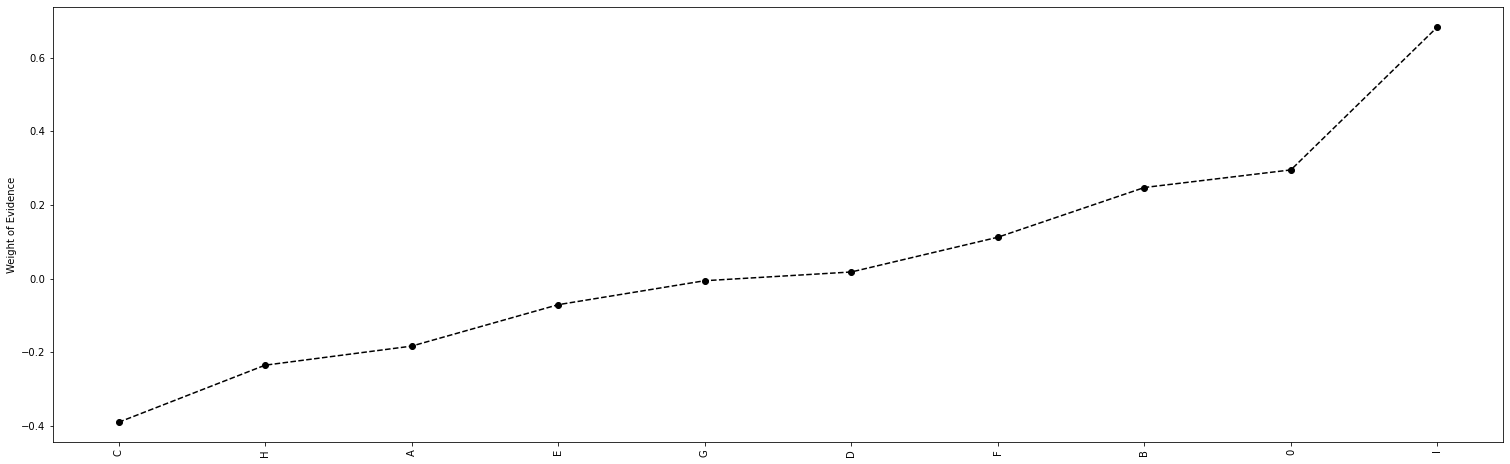

In [586]:
plot_by_woe(woe_cat(Train,'EmployerLGA_Age_grped', 'GBFlag'), 90)


### AddresLGA_Age

In [587]:
woe_cat(Train,'AddresLGA_Age', 'GBFlag')

GBFlag                    Bad  Good  Freq    Proptn    % Good     % Bad  \
AddresLGA_Age                                                             
Lagos Island__[44, 65)      1    21    22  0.007821  0.010244  0.001311   
Lagos Island__[39, 44)      1    21    22  0.007821  0.010244  0.001311   
Rivers__[44, 65)            3    21    24  0.008532  0.010244  0.003932   
FCT__[34, 39)              14    75    89  0.031639  0.036585  0.018349   
Null__[44, 65)              3    16    19  0.006754  0.007805  0.003932   
FCT__[39, 44)              10    52    62  0.022041  0.025366  0.013106   
Lagos Mainland__[44, 65)   18    88   106  0.037682  0.042927  0.023591   
FCT__[44, 65)               6    29    35  0.012442  0.014146  0.007864   
Lagos Mainland__[34, 39)   45   182   227  0.080697  0.088780  0.058978   
Lagos Island__[34, 39)      8    30    38  0.013509  0.014634  0.010485   
Others__[44, 65)           25    91   116  0.041237  0.044390  0.032765   
Rivers__[34, 39)            7    24    31  0.011020  0.011707  0.009174   
Others__[34, 39)           46   155   201  0.071454  0.075610  0.060288   
Null__[34, 39)              7    22    29  0.010309  0.010732  0.009174   
FCT__[26, 34)              41   116   157  0.055812  0.056585  0.053735   
Lagos Mainland__[39, 44)   38   106   144  0.051191  0.051707  0.049803   
Lagos Mainland__[26, 34)  107   285   392  0.139353  0.139024  0.140236   
Lagos Island__[26, 34)     24    57    81  0.028795  0.027805  0.031455   
Others__[39, 44)           37    86   123  0.043726  0.041951  0.048493   
Others__[26, 34)          117   239   356  0.126555  0.116585  0.153342   
Rivers__[39, 44)            9    18    27  0.009598  0.008780  0.011796   
0                           1     2     3  0.001066  0.000976  0.001311   
Rivers__[26, 34)           17    33    50  0.017775  0.016098  0.022280   
Lagos Mainland__[18, 26)   42    81   123  0.043726  0.039512  0.055046   
Null__[26, 34)             21    39    60  0.021330  0.019024  0.027523   
FCT__[18, 26)              17    27    44  0.015642  0.013171  0.022280   
Rivers__[18, 26)            7    11    18  0.006399  0.005366  0.009174   
Others__[18, 26)           61    86   147  0.052257  0.041951  0.079948   
Lagos Island__[18, 26)      9    12    21  0.007465  0.005854  0.011796   
Null__[18, 26)             11    14    25  0.008887  0.006829  0.014417   
Null__[39, 44)             10    11    21  0.007465  0.005366  0.013106   

GBFlag                    Bad Rate  GoodBaddOdds       WOE  class IV  \
AddresLGA_Age                                                          
Lagos Island__[44, 65)    0.045455         21.00 -2.056185  0.018368   
Lagos Island__[39, 44)    0.045455         21.00 -2.056185  0.018368   
Rivers__[44, 65)          0.125000          7.00 -0.957573  0.006044   
FCT__[34, 39)             0.157303          5.36 -0.690094  0.012585   
Null__[44, 65)            0.157895          5.33 -0.685639  0.002656   
FCT__[39, 44)             0.161290          5.20 -0.660322  0.008095   
Lagos Mainland__[44, 65)  0.169811          4.89 -0.598628  0.011575   
FCT__[44, 65)             0.171429          4.83 -0.587199  0.003689   
Lagos Mainland__[34, 39)  0.198238          4.04 -0.409007  0.012190   
Lagos Island__[34, 39)    0.210526          3.75 -0.333419  0.001383   
Others__[44, 65)          0.215517          3.64 -0.303647  0.003530   
Rivers__[34, 39)          0.225806          3.43 -0.243807  0.000618   
Others__[34, 39)          0.228856          3.37 -0.226447  0.003469   
Null__[34, 39)            0.241379          3.14 -0.156795  0.000244   
FCT__[26, 34)             0.261146          2.83 -0.051681  0.000147   
Lagos Mainland__[39, 44)  0.263889          2.79 -0.037516  0.000071   
Lagos Mainland__[26, 34)  0.272959          2.66  0.008677  0.000011   
Lagos Island__[26, 34)    0.296296          2.38  0.123340  0.000450   
Others__[39, 44)          0.300813          2.32  0.144908  0.000948   
Others__[26,

In [588]:
Train['AddresLGA_Age_grped'] = np.where(Train['AddresLGA_Age'].isin(['Null__[44, 65)', 'Null__[18, 26)', 'Rivers__[34, 39)', 'Null__[26, 34)', 'Rivers__[44, 65)', 'Lagos Island__[39, 44)']),                     'A',
                                 np.where(Train['AddresLGA_Age'].isin(['Lagos Mainland__[44, 65)', 'Lagos Mainland__[34, 39)']),                                                                                    'B',
                                 np.where(Train['AddresLGA_Age'].isin(['Null__[34, 39)', 'FCT__[44, 65)', 'Null__[39, 44)', 'Lagos Mainland__[18, 26)','Others__[44, 65)']),                                        'C',
                                 np.where(Train['AddresLGA_Age'].isin(['Lagos Island__[44, 65)', 'Lagos Island__[34, 39)', 'FCT__[39, 44)', 'Lagos Mainland__[26, 34)', 'Rivers__[26, 34)']),                       'D',
                                 np.where(Train['AddresLGA_Age'].isin(['FCT__[34, 39)', 'FCT__[26, 34)']),                                                                                                          'E',
                                 np.where(Train['AddresLGA_Age'].isin([ 'Lagos Island__[26, 34)', 'Lagos Mainland__[39, 44)', 'Others__[34, 39)', 'Others__[39, 44)']),                                             'F',
                                 np.where(Train['AddresLGA_Age'].isin(['Others__[26, 34)', 'FCT__[18, 26)']),                                                                                                       'G','H'     )
                                          ))))))

Train.AddresLGA_Age_grped.value_counts()

D    564
F    549
G    400
B    333
C    324
E    246
H    216
A    181
Name: AddresLGA_Age_grped, dtype: int64

In [589]:
Test['AddresLGA_Age_grped'] = np.where(Test['AddresLGA_Age'].isin(['Null__[44, 65)', 'Null__[18, 26)', 'Rivers__[34, 39)', 'Null__[26, 34)', 'Rivers__[44, 65)', 'Lagos Island__[39, 44)']),                     'A',
                                 np.where(Test['AddresLGA_Age'].isin(['Lagos Mainland__[44, 65)', 'Lagos Mainland__[34, 39)']),                                                                                    'B',
                                 np.where(Test['AddresLGA_Age'].isin(['Null__[34, 39)', 'FCT__[44, 65)', 'Null__[39, 44)', 'Lagos Mainland__[18, 26)','Others__[44, 65)']),                                        'C',
                                 np.where(Test['AddresLGA_Age'].isin(['Lagos Island__[44, 65)', 'Lagos Island__[34, 39)', 'FCT__[39, 44)', 'Lagos Mainland__[26, 34)', 'Rivers__[26, 34)']),                       'D',
                                 np.where(Test['AddresLGA_Age'].isin(['FCT__[34, 39)', 'FCT__[26, 34)']),                                                                                                          'E',
                                 np.where(Test['AddresLGA_Age'].isin([ 'Lagos Island__[26, 34)', 'Lagos Mainland__[39, 44)', 'Others__[34, 39)', 'Others__[39, 44)']),                                             'F',
                                 np.where(Test['AddresLGA_Age'].isin(['Others__[26, 34)', 'FCT__[18, 26)']),                                                                                                       'G','H'     )
                                          ))))))

Test.AddresLGA_Age_grped.value_counts()

D    235
F    225
G    174
B    155
C    148
A    102
E     90
H     77
Name: AddresLGA_Age_grped, dtype: int64

In [590]:
woe_cat(Train,'AddresLGA_Age_grped', 'GBFlag')

GBFlag               Bad  Good  Freq    Proptn    % Good     % Bad  Bad Rate  \
AddresLGA_Age_grped                                                            
B                     63   270   333  0.118379  0.131707  0.082569  0.189189   
E                     55   191   246  0.087451  0.093171  0.072084  0.223577   
D                    143   421   564  0.200498  0.205366  0.187418  0.253546   
A                     46   135   181  0.064344  0.065854  0.060288  0.254144   
F                    145   404   549  0.195165  0.197073  0.190039  0.264117   
C                     90   234   324  0.115180  0.114146  0.117955  0.277778   
G                    134   266   400  0.142197  0.129756  0.175623  0.335000   
H                     87   129   216  0.076786  0.062927  0.114024  0.402778   

GBFlag               GoodBaddOdds       WOE  class IV  Variable IV  
AddresLGA_Age_grped                                                 
B                            4.29 -0.466950  0.022945     0.075126  
E                            3.47 -0.256603  0.005411     0.075126  
D                            2.94 -0.091451  0.001641     0.075126  
A                            2.93 -0.088296  0.000491     0.075126  
F                            2.79 -0.036344  0.000256     0.075126  
C                            2.60  0.032826  0.000125     0.075126  
G                            1.99  0.302681  0.013883     0.075126  
H                            1.48  0.594433  0.030374     0.075126

### AddresLGA_Gender

In [591]:
woe_cat(Train,'AddresLGA_Gender', 'GBFlag')

GBFlag                  Bad  Good  Freq    Proptn    % Good     % Bad  \
AddresLGA_Gender                                                        
FCT__FEMALE              17    88   105  0.037327  0.042927  0.022280   
Rivers__FEMALE            6    27    33  0.011731  0.013171  0.007864   
Lagos Island__MALE       30   111   141  0.050124  0.054146  0.039318   
Lagos Mainland__FEMALE   69   213   282  0.100249  0.103902  0.090433   
FCT__MALE                71   211   282  0.100249  0.102927  0.093054   
Lagos Mainland__MALE    181   530   711  0.252755  0.258537  0.237221   
Others__FEMALE           66   155   221  0.078564  0.075610  0.086501   
Lagos Island__FEMALE     13    30    43  0.015286  0.014634  0.017038   
Others__MALE            221   503   724  0.257376  0.245366  0.289646   
Rivers__MALE             37    80   117  0.041593  0.039024  0.048493   
Null__MALE               39    84   123  0.043726  0.040976  0.051114   
Null__FEMALE             13    18    31  0.011020  0.008780  0.017038   

GBFlag                  Bad Rate  GoodBaddOdds       WOE  class IV  \
AddresLGA_Gender                                                     
FCT__FEMALE             0.161905          5.18 -0.655786  0.013540   
Rivers__FEMALE          0.181818          4.50 -0.515740  0.002737   
Lagos Island__MALE      0.212766          3.70 -0.319996  0.004745   
Lagos Mainland__FEMALE  0.244681          3.09 -0.138849  0.001870   
FCT__MALE               0.251773          2.97 -0.100841  0.000996   
Lagos Mainland__MALE    0.254571          2.93 -0.086043  0.001834   
Others__FEMALE          0.298643          2.35  0.134567  0.001466   
Lagos Island__FEMALE    0.302326          2.31  0.152089  0.000366   
Others__MALE            0.305249          2.28  0.165910  0.007347   
Rivers__MALE            0.316239          2.16  0.217228  0.002057   
Null__MALE              0.317073          2.15  0.221082  0.002241   
Null__FEMALE            0.419355          1.38  0.662915  0.005474   

GBFlag                  Variable IV  
AddresLGA_Gender                     
FCT__FEMALE                0.044671  
Rivers__FEMALE             0.044671  
Lagos Island__MALE         0.044671  
Lagos Mainland__FEMALE     0.044671  
FCT__MALE                  0.044671  
Lagos Mainland__MALE       0.044671  
Others__FEMALE             0.044671  
Lagos Island__FEMALE       0.044671  
Others__MALE               0.044671  
Rivers__MALE               0.044671  
Null__MALE                 0.044671  
Null__FEMALE               0.044671

In [592]:
Train['AddresLGA_Gender_grped'] = np.where(Train['AddresLGA_Gender'].isin(['Null__FEMALE', 'Null__MALE', 'Rivers__FEMALE']), 'A',
                                  np.where(Train['AddresLGA_Gender'].isin(['Lagos Mainland__MALE', 'FCT__FEMALE', 'Rivers__MALE']), 'B',
                                  np.where(Train['AddresLGA_Gender'].isin(['FCT__MALE', 'Lagos Island__MALE', 'Others__FEMALE']), 'C',
                                  np.where(Train['AddresLGA_Gender'].isin(['Lagos Island__FEMALE', 'Others__MALE']), 'D','E'))))

Train.AddresLGA_Gender_grped.value_counts()

B    933
D    767
C    644
E    282
A    187
Name: AddresLGA_Gender_grped, dtype: int64

In [593]:
Test['AddresLGA_Gender_grped'] = np.where(Test['AddresLGA_Gender'].isin(['Null__FEMALE', 'Null__MALE', 'Rivers__FEMALE']), 'A',
                                  np.where(Test['AddresLGA_Gender'].isin(['Lagos Mainland__MALE', 'FCT__FEMALE', 'Rivers__MALE']), 'B',
                                  np.where(Test['AddresLGA_Gender'].isin(['FCT__MALE', 'Lagos Island__MALE', 'Others__FEMALE']), 'C',
                                  np.where(Test['AddresLGA_Gender'].isin(['Lagos Island__FEMALE', 'Others__MALE']), 'D','E'))))

Test.AddresLGA_Gender_grped.value_counts()

B    390
D    309
C    273
E    130
A    104
Name: AddresLGA_Gender_grped, dtype: int64

In [594]:
woe_cat(Train,'AddresLGA_Gender_grped', 'GBFlag')

GBFlag                  Bad  Good  Freq    Proptn    % Good     % Bad  \
AddresLGA_Gender_grped                                                  
E                        69   213   282  0.100249  0.103902  0.090433   
B                       235   698   933  0.331674  0.340488  0.307995   
C                       167   477   644  0.228937  0.232683  0.218873   
D                       234   533   767  0.272663  0.260000  0.306684   
A                        58   129   187  0.066477  0.062927  0.076016   

GBFlag                  Bad Rate  GoodBaddOdds       WOE  class IV  \
AddresLGA_Gender_grped                                               
E                       0.244681          3.09 -0.138849  0.001870   
B                       0.251876          2.97 -0.100297  0.003259   
C                       0.259317          2.86 -0.061186  0.000845   
D                       0.305085          2.28  0.165137  0.007709   
A                       0.310160          2.22  0.188968  0.002473   

GBFlag                  Variable IV  
AddresLGA_Gender_grped               
E                          0.016157  
B                          0.016157  
C                          0.016157  
D                          0.016157  
A                          0.016157

### AddresLGA_Income

In [595]:
woe_cat(Train,'AddresLGA_Income', 'GBFlag')

GBFlag                                   Bad  Good  Freq    Proptn    % Good  \
AddresLGA_Income                                                               
Lagos Island__(300000.0, 500000000.0]      2    25    27  0.009598  0.012195   
FCT__(200000.0, 300000.0]                  6    37    43  0.015286  0.018049   
Rivers__(70000.0, 90000.0]                 2    12    14  0.004977  0.005854   
Rivers__(150000.0, 200000.0]               4    21    25  0.008887  0.010244   
Lagos Island__(50000.0, 70000.0]           3    15    18  0.006399  0.007317   
Lagos Mainland__(300000.0, 500000000.0]   17    82    99  0.035194  0.040000   
FCT__(300000.0, 500000000.0]               8    38    46  0.016353  0.018537   
Rivers__(200000.0, 300000.0]               3    13    16  0.005688  0.006341   
Lagos Island__(150000.0, 200000.0]         4    17    21  0.007465  0.008293   
Lagos Island__(200000.0, 300000.0]         5    21    26  0.009243  0.010244   
Lagos Mainland__(104000.0, 150000.0]      38   157   195  0.069321  0.076585   
FCT__(104000.0, 150000.0]                 15    57    72  0.025595  0.027805   
FCT__(70000.0, 90000.0]                    9    34    43  0.015286  0.016585   
Lagos Mainland__(200000.0, 300000.0]      19    66    85  0.030217  0.032195   
Others__(300000.0, 500000000.0]           17    57    74  0.026306  0.027805   
Rivers__(300000.0, 500000000.0]            3    10    13  0.004621  0.004878   
FCT__(150000.0, 200000.0]                 11    36    47  0.016708  0.017561   
Null__(70000.0, 90000.0]                   5    16    21  0.007465  0.007805   
Lagos Mainland__(150000.0, 200000.0]      26    81   107  0.038038  0.039512   
Lagos Mainland__(50000.0, 70000.0]        28    87   115  0.040882  0.042439   
Rivers__(104000.0, 150000.0]               6    18    24  0.008532  0.008780   
FCT__(50000.0, 70000.0]                    9    27    36  0.012798  0.013171   
Null__(104000.0, 150000.0]                 8    24    32  0.011376  0.011707   
Lagos Mainland__(90000.0, 104000.0]       28    83   111  0.039460  0.040488   
FCT__(90000.0, 104000.0]                  11    32    43  0.015286  0.015610   
Null__(150000.0, 200000.0]                 4    11    15  0.005332  0.005366   
Others__(200000.0, 300000.0]              23    62    85  0.030217  0.030244   
Lagos Island__(90000.0, 104000.0]          3     8    11  0.003910  0.003902   
Others__(70000.0, 90000.0]                31    79   110  0.039104  0.038537   
Lagos Island__(70000.0, 90000.0]           6    15    21  0.007465  0.007317   
Others__(50000.0, 70000.0]                26    64    90  0.031994  0.031220   
Lagos Mainland__(70000.0, 90000.0]        31    74   105  0.037327  0.036098   
Others__(104000.0, 150000.0]              50   115   165  0.058656  0.056098   
Others__(90000.0, 104000.0]               35    80   115  0.040882  0.039024   
Lagos Island__(19999.0, 50000.0]           7    15    22  0.007821  0.007317   
Others__(150000.0, 200000.0]              37    77   114  0.040526  0.037561   
FCT__(19999.0, 50000.0]                   19    38    57  0.020263  0.018537   
Lagos Island__(104000.0, 150000.0]        13    25    38  0.013509  0.012195   
Others__(19999.0, 50000.0]                68   124   192  0.068255  0.060488   
Rivers__(19999.0, 50000.0]                10    18    28  0.009954  0.008780   
Lagos Mainland__(19999.0, 50000.0]        63   113   176  0.062567  0.055122   
Null__(90000.0, 104000.0]                  8    13    21  0.007465  0.006341   
Null__(19999.0, 50000.0]                   9    14    23  0.008176  0.006829   
Null__(50000.0, 70000.0]                   6     9    15  0.005332  0.004390   
Null__(300000.0, 500000000.0]              8    10    18  0.006399  0.004878   
Null__(200000.0, 300000.0]                 4     5     9  0.003199  0.002439   
Rivers__(50000.0, 70000.0]                 5     6    11  0.003910  0.002927   
Rivers__(90000.0, 104000.0]               10     9    19  0.006754  0.004390   


In [596]:
Train['AddresLGA_Income_grped'] = np.where(Train['AddresLGA_Income'].isin(['Rivers__(150000.0, 176250.0]', 'Null__(176250.0, 250000.0]', 'Null__(65000.0, 85000.0]', 'Lagos Island__(150000.0, 176250.0]', 'Null__(250000.0, 200000000.0]', 'Null__(100000.0, 150000.0]', 'Rivers__(19999.0, 50000.0]', 'Lagos Mainland__(150000.0, 176250.0]', 'Lagos Island__(176250.0, 250000.0]', 'Rivers__(50000.0, 65000.0]', 'Lagos Mainland__(100000.0, 150000.0]']),                     'A',
                                 np.where(Train['AddresLGA_Income'].isin(['Null__(19999.0, 50000.0]', 'Rivers__(85000.0, 100000.0]', 'FCT__(85000.0, 100000.0]', 'Lagos Mainland__(50000.0, 65000.0]', 'Rivers__(176250.0, 250000.0]', 'Lagos Island__(250000.0, 200000000.0]', 'FCT__(176250.0, 250000.0]']),                                                                                    'B',
                                 np.where(Train['AddresLGA_Income'].isin(['Lagos Mainland__(176250.0, 250000.0]', 'Null__(50000.0, 65000.0]', 'Lagos Mainland__(65000.0, 85000.0]', 'Rivers__(250000.0, 200000000.0]', 'Lagos Island__(50000.0, 65000.0]']),                                        'C',
                                 np.where(Train['AddresLGA_Income'].isin(['Lagos Mainland__(250000.0, 200000000.0]', 'FCT__(65000.0, 85000.0]', 'Others__(65000.0, 85000.0]', 'Null__(85000.0, 100000.0]', 'FCT__(250000.0, 200000000.0]', 'FCT__(150000.0, 176250.0]', 'Lagos Mainland__(85000.0, 100000.0]', 'FCT__(50000.0, 65000.0]', 'Lagos Island__(85000.0, 100000.0]']),                       'D',
                                 np.where(Train['AddresLGA_Income'].isin(['Others__(85000.0, 100000.0]', 'Lagos Island__(65000.0, 85000.0]', 'Rivers__(65000.0, 85000.0]', 'Lagos Mainland__(19999.0, 50000.0]']),                                                                                                          'E',
                                 np.where(Train['AddresLGA_Income'].isin([ 'Others__(250000.0, 200000000.0]', 'Others__(100000.0, 150000.0]', 'Others__(150000.0, 176250.0]']),                                             'F',
                                 np.where(Train['AddresLGA_Income'].isin(['FCT__(100000.0, 150000.0]', 'Others__(50000.0, 65000.0]', 'Others__(176250.0, 250000.0]', 'Lagos Island__(19999.0, 50000.0]']),                                                                                                       'G','H'     )
                                          ))))))

Train.AddresLGA_Income_grped.value_counts()

H    2564
E     176
A      28
B      23
G      22
Name: AddresLGA_Income_grped, dtype: int64

In [597]:
Test['AddresLGA_Income_grped'] = np.where(Test['AddresLGA_Income'].isin(['Rivers__(150000.0, 176250.0]', 'Null__(176250.0, 250000.0]', 'Null__(65000.0, 85000.0]', 'Lagos Island__(150000.0, 176250.0]', 'Null__(250000.0, 200000000.0]', 'Null__(100000.0, 150000.0]', 'Rivers__(19999.0, 50000.0]', 'Lagos Mainland__(150000.0, 176250.0]', 'Lagos Island__(176250.0, 250000.0]', 'Rivers__(50000.0, 65000.0]', 'Lagos Mainland__(100000.0, 150000.0]']),                     'A',
                                 np.where(Test['AddresLGA_Income'].isin(['Null__(19999.0, 50000.0]', 'Rivers__(85000.0, 100000.0]', 'FCT__(85000.0, 100000.0]', 'Lagos Mainland__(50000.0, 65000.0]', 'Rivers__(176250.0, 250000.0]', 'Lagos Island__(250000.0, 200000000.0]', 'FCT__(176250.0, 250000.0]']),                                                                                    'B',
                                 np.where(Test['AddresLGA_Income'].isin(['Lagos Mainland__(176250.0, 250000.0]', 'Null__(50000.0, 65000.0]', 'Lagos Mainland__(65000.0, 85000.0]', 'Rivers__(250000.0, 200000000.0]', 'Lagos Island__(50000.0, 65000.0]']),                                        'C',
                                 np.where(Test['AddresLGA_Income'].isin(['Lagos Mainland__(250000.0, 200000000.0]', 'FCT__(65000.0, 85000.0]', 'Others__(65000.0, 85000.0]', 'Null__(85000.0, 100000.0]', 'FCT__(250000.0, 200000000.0]', 'FCT__(150000.0, 176250.0]', 'Lagos Mainland__(85000.0, 100000.0]', 'FCT__(50000.0, 65000.0]', 'Lagos Island__(85000.0, 100000.0]']),                       'D',
                                 np.where(Test['AddresLGA_Income'].isin(['Others__(85000.0, 100000.0]', 'Lagos Island__(65000.0, 85000.0]', 'Rivers__(65000.0, 85000.0]', 'Lagos Mainland__(19999.0, 50000.0]']),                                                                                                          'E',
                                 np.where(Test['AddresLGA_Income'].isin([ 'Others__(250000.0, 200000000.0]', 'Others__(100000.0, 150000.0]', 'Others__(150000.0, 176250.0]']),                                             'F',
                                 np.where(Test['AddresLGA_Income'].isin(['FCT__(100000.0, 150000.0]', 'Others__(50000.0, 65000.0]', 'Others__(176250.0, 250000.0]', 'Lagos Island__(19999.0, 50000.0]']),                                                                                                       'G','H'     )
                                          ))))))

Test.AddresLGA_Income_grped.value_counts()

H    1099
E      70
B      15
A      14
G       8
Name: AddresLGA_Income_grped, dtype: int64

In [598]:
woe_cat(Train,'AddresLGA_Income_grped', 'GBFlag')

GBFlag                  Bad  Good  Freq    Proptn    % Good     % Bad  \
AddresLGA_Income_grped                                                  
H                       674  1890  2564  0.911482  0.921951  0.883355   
G                         7    15    22  0.007821  0.007317  0.009174   
A                        10    18    28  0.009954  0.008780  0.013106   
E                        63   113   176  0.062567  0.055122  0.082569   
B                         9    14    23  0.008176  0.006829  0.011796   

GBFlag                  Bad Rate  GoodBaddOdds       WOE  class IV  \
AddresLGA_Income_grped                                               
H                       0.262871          2.80 -0.042765  0.001651   
G                       0.318182          2.14  0.226197  0.000420   
A                       0.357143          1.80  0.400550  0.001733   
E                       0.357955          1.79  0.404084  0.011091   
B                       0.391304          1.56  0.546504  0.002714   

GBFlag                  Variable IV  
AddresLGA_Income_grped               
H                          0.017608  
G                          0.017608  
A                          0.017608  
E                          0.017608  
B                          0.017608

### ResidentialStatus_Age

In [599]:
woe_cat(Train,'ResidentialStatus_Age', 'GBFlag')

GBFlag                        Bad  Good  Freq    Proptn    % Good     % Bad  \
ResidentialStatus_Age                                                         
nan__[39, 44)                   0     1     1  0.000355  0.000488  0.000000   
Commercial Renting__[34, 39)    0     1     1  0.000355  0.000488  0.000000   
Squating__[44, 65)              0     8     8  0.002844  0.003902  0.000000   
nan__[26, 34)                   0     2     2  0.000711  0.000976  0.000000   
Renting__[44, 65)              30   144   174  0.061856  0.070244  0.039318   
Owner__[44, 65)                25   114   139  0.049413  0.055610  0.032765   
Renting__[34, 39)              78   333   411  0.146107  0.162439  0.102228   
Owner__[34, 39)                39   137   176  0.062567  0.066829  0.051114   
Squating__[39, 44)              3    10    13  0.004621  0.004878  0.003932   
Renting__[39, 44)              66   196   262  0.093139  0.095610  0.086501   
Squating__[26, 34)             32    80   112  0.039815  0.039024  0.041940   
Renting__[26, 34)             196   476   672  0.238891  0.232195  0.256881   
Owner__[39, 44)                36    87   123  0.043726  0.042439  0.047182   
Owner__[26, 34)                99   211   310  0.110203  0.102927  0.129751   
0                               1     2     3  0.001066  0.000976  0.001311   
Squating__[34, 39)              9    17    26  0.009243  0.008293  0.011796   
Owner__[18, 26)                44    74   118  0.041948  0.036098  0.057667   
Renting__[18, 26)              62    96   158  0.056168  0.046829  0.081258   
Squating__[18, 26)             40    61   101  0.035905  0.029756  0.052425   
Tenant__[34, 39)                1     0     1  0.000355  0.000000  0.001311   
Tenant__[44, 65)                1     0     1  0.000355  0.000000  0.001311   
With Parents__[18, 26)          1     0     1  0.000355  0.000000  0.001311   

GBFlag                        Bad Rate  GoodBaddOdds       WOE  class IV  \
ResidentialStatus_Age                                                      
nan__[39, 44)                 0.000000           inf      -inf       inf   
Commercial Renting__[34, 39)  0.000000           inf      -inf       inf   
Squating__[44, 65)            0.000000           inf      -inf       inf   
nan__[26, 34)                 0.000000           inf      -inf       inf   
Renting__[44, 65)             0.172414          4.80 -0.580279  0.017945   
Owner__[44, 65)               0.179856          4.56 -0.528986  0.012084   
Renting__[34, 39)             0.189781          4.27 -0.463097  0.027884   
Owner__[34, 39)               0.221591          3.51 -0.268082  0.004213   
Squating__[39, 44)            0.230769          3.33 -0.215636  0.000204   
Renting__[39, 44)             0.251908          2.97 -0.100123  0.000912   
Squating__[26, 34)            0.285714          2.50  0.072046  0.000210   
Renting__[26, 34)             0.291667          2.43  0.101034  0.002494   
Owner__[39, 44)               0.292683          2.42  0.105948  0.000503   
Owner__[26, 34)               0.319355          2.13  0.231599  0.006212   
0                             0.333333          2.00  0.295190  0.000099   
Squating__[34, 39)            0.346154          1.89  0.352348  0.001234   
Owner__[18, 26)               0.372881          1.68  0.468462  0.010105   
Renting__[18, 26)             0.392405          1.55  0.551123  0.018975   
Squating__[18, 26)            0.396040          1.52  0.566343  0.012838   
Tenant__[34, 39)              1.000000          0.00       inf       inf   
Tenant__[44, 65)              1.000000          0.00       inf       inf   
With Parents__[18, 26)        1.000000          0.00       inf       inf   

GBFlag                        Variable IV  
ResidentialStatus_Age                      
nan__[39, 44)                         inf  
Commercial Renting__[34, 39)          inf  
Squating__[44, 65)                    inf  
nan__[26, 34)                         inf  
Renting__[44, 

In [600]:
Train['ResidentialStatus_Age_grped'] = np.where(Train['ResidentialStatus_Age'].isin(['Squating__[44, 65)', 'Owner__[44, 65)', 'Renting__[34, 39)']),                     'A',
                                          np.where(Train['ResidentialStatus_Age'].isin(['Renting__[44, 65)']),                                                                                    'B',
                                          np.where(Train['ResidentialStatus_Age'].isin(['Owner__[26, 34)']),                                        'C',
                                          np.where(Train['ResidentialStatus_Age'].isin(['Owner__[34, 39', 'Owner__[39, 44)', 'Renting__[26, 34)', 'Renting__[39, 44)']),                       'D',
                                          np.where(Train['ResidentialStatus_Age'].isin(['Renting__[18, 26)', 'Owner__[18, 26)']),                                                                                                          'E','F'
                                )))))

Train.ResidentialStatus_Age_grped.value_counts()

D    1057
A     558
F     438
C     310
E     276
B     174
Name: ResidentialStatus_Age_grped, dtype: int64

In [601]:
Test['ResidentialStatus_Age_grped'] = np.where(Test['ResidentialStatus_Age'].isin(['Squating__[44, 65)', 'Owner__[44, 65)', 'Renting__[34, 39)']),                     'A',
                                          np.where(Test['ResidentialStatus_Age'].isin(['Renting__[44, 65)']),                                                                                    'B',
                                          np.where(Test['ResidentialStatus_Age'].isin(['Owner__[26, 34)']),                                        'C',
                                          np.where(Test['ResidentialStatus_Age'].isin(['Owner__[34, 39', 'Owner__[39, 44)', 'Renting__[26, 34)', 'Renting__[39, 44)']),                       'D',
                                          np.where(Test['ResidentialStatus_Age'].isin(['Renting__[18, 26)', 'Owner__[18, 26)']),                                                                                                          'E','F'
                                )))))

Test.ResidentialStatus_Age_grped.value_counts()

D    433
A    232
F    217
E    122
C    121
B     81
Name: ResidentialStatus_Age_grped, dtype: int64

In [602]:
woe_cat(Train,'ResidentialStatus_Age_grped', 'GBFlag')

GBFlag                       Bad  Good  Freq    Proptn    % Good     % Bad  \
ResidentialStatus_Age_grped                                                  
B                             30   144   174  0.061856  0.070244  0.039318   
A                            103   455   558  0.198365  0.221951  0.134993   
D                            298   759  1057  0.375755  0.370244  0.390564   
F                            127   311   438  0.155706  0.151707  0.166448   
C                             99   211   310  0.110203  0.102927  0.129751   
E                            106   170   276  0.098116  0.082927  0.138925   

GBFlag                       Bad Rate  GoodBaddOdds       WOE  class IV  \
ResidentialStatus_Age_grped                                               
B                            0.172414          4.80 -0.580279  0.017945   
A                            0.184588          4.42 -0.497231  0.043238   
D                            0.281930          2.55  0.053429  0.001086   
F                            0.289954          2.45  0.092731  0.001367   
C                            0.319355          2.13  0.231599  0.006212   
E                            0.384058          1.60  0.515978  0.028894   

GBFlag                       Variable IV  
ResidentialStatus_Age_grped               
B                               0.098743  
A                               0.098743  
D                               0.098743  
F                               0.098743  
C                               0.098743  
E                               0.098743

### Residential_Income

In [603]:
woe_cat(Train,'Residential_Income', 'GBFlag')

GBFlag                                    Bad  Good  Freq    Proptn    % Good  \
Residential_Income                                                              
Commercial Renting__(104000.0, 150000.0]    0     1     1  0.000355  0.000488   
nan__(19999.0, 50000.0]                     0     2     2  0.000711  0.000976   
nan__(300000.0, 500000000.0]                0     1     1  0.000355  0.000488   
Squating__(300000.0, 500000000.0]           1    13    14  0.004977  0.006341   
Renting__(200000.0, 300000.0]              31   128   159  0.056523  0.062439   
Renting__(300000.0, 500000000.0]           27   110   137  0.048702  0.053659   
Squating__(70000.0, 90000.0]                6    24    30  0.010665  0.011707   
Owner__(300000.0, 500000000.0]             27    98   125  0.044437  0.047805   
Squating__(90000.0, 104000.0]               7    23    30  0.010665  0.011220   
Renting__(150000.0, 200000.0]              49   160   209  0.074298  0.078049   
Renting__(104000.0, 150000.0]              83   261   344  0.122289  0.127317   
Owner__(104000.0, 150000.0]                38   109   147  0.052257  0.053171   
Renting__(50000.0, 70000.0]                43   120   163  0.057945  0.058537   
Squating__(104000.0, 150000.0]              9    25    34  0.012087  0.012195   
Squating__(200000.0, 300000.0]              4    11    15  0.005332  0.005366   
Renting__(70000.0, 90000.0]                58   157   215  0.076431  0.076585   
Owner__(50000.0, 70000.0]                  23    61    84  0.029861  0.029756   
Renting__(90000.0, 104000.0]               53   138   191  0.067899  0.067317   
Owner__(200000.0, 300000.0]                25    65    90  0.031994  0.031707   
Squating__(50000.0, 70000.0]               11    27    38  0.013509  0.013171   
Owner__(70000.0, 90000.0]                  20    49    69  0.024529  0.023902   
Owner__(19999.0, 50000.0]                  45   105   150  0.053324  0.051220   
Owner__(150000.0, 200000.0]                32    73   105  0.037327  0.035610   
Squating__(150000.0, 200000.0]              5    10    15  0.005332  0.004878   
Renting__(19999.0, 50000.0]                88   171   259  0.092073  0.083415   
Owner__(90000.0, 104000.0]                 34    64    98  0.034838  0.031220   
Squating__(19999.0, 50000.0]               41    44    85  0.030217  0.021463   
Tenant__(19999.0, 50000.0]                  1     0     1  0.000355  0.000000   
Tenant__(90000.0, 104000.0]                 1     0     1  0.000355  0.000000   
With Parents__(19999.0, 50000.0]            1     0     1  0.000355  0.000000   

GBFlag                                       % Bad  Bad Rate  GoodBaddOdds  \
Residential_Income                                                           
Commercial Renting__(104000.0, 150000.0]  0.000000  0.000000           inf   
nan__(19999.0, 50000.0]                   0.000000  0.000000           inf   
nan__(300000.0, 500000000.0]              0.000000  0.000000           inf   
Squating__(300000.0, 500000000.0]         0.001311  0.071429         13.00   
Renting__(200000.0, 300000.0]             0.040629  0.194969          4.13   
Renting__(300000.0, 500000000.0]          0.035387  0.197080          4.07   
Squating__(70000.0, 90000.0]              0.007864  0.200000          4.00   
Owner__(300000.0, 500000000.0]            0.035387  0.216000          3.63   
Squating__(90000.0, 104000.0]             0.009174  0.233333          3.29   
Renting__(150000.0, 200000.0]             0.064220  0.234450          3.27   
Renting__(104000.0, 150000.0]             0.108781  0.241279          3.14   
Owner__(104000.0, 150000.0]               0.049803  0.258503          2.87   
Renting__(50000.0, 70000.0]               0.056356  0.263804          2.79   
Squating__(104000.0, 150000.0]            0.011796  0.264706          2.78   
Squating__(200000.0, 300000.0]            0.005242  0.266667          2.75   
Renting__(70000.0, 90000.0]               0.076016  0.269767          2.71   
Own

In [604]:
Train['Residential_Income_grped'] = np.where(Train['Residential_Income'].isin(['Owner__(150000.0, 176250.0]', 'Squating__(150000.0, 176250.0]', 'Renting__(250000.0, 200000000.0]']),                     'A',
                                          np.where(Train['Residential_Income'].isin(['Squating__(85000.0, 100000.0]', 'Renting__(65000.0, 85000.0]', 'Owner__(100000.0, 150000.0]', 'Owner__(65000.0, 85000.0]', 'Renting__(176250.0, 250000.0]', 'Renting__(50000.0, 65000.0]', 'Owner__(85000.0, 100000.0]']),                                                                                    'B',
                                          np.where(Train['Residential_Income'].isin(['Owner__(50000.0, 65000.0]', 'Renting__(85000.0, 100000.0]']),                                        'C',
                                          np.where(Train['Residential_Income'].isin(['Renting__(100000.0, 150000.0]', 'Owner__(19999.0, 50000.0]', 'Squating__(176250.0, 250000.0]', 'Owner__(176250.0, 250000.0]', 'Renting__(150000.0, 176250.0]'])  ,           'D',
                                          np.where(Train['Residential_Income'].isin(['Owner__(250000.0, 200000000.0]', 'Squating__(250000.0, 200000000.0]', 'Renting__(19999.0, 50000.0]']),                                                                                                          'E','F'
                                )))))

Train.Residential_Income_grped.value_counts()

F    2404
E     259
D     150
Name: Residential_Income_grped, dtype: int64

In [605]:
Test['Residential_Income_grped'] = np.where(Test['Residential_Income'].isin(['Owner__(150000.0, 176250.0]', 'Squating__(150000.0, 176250.0]', 'Renting__(250000.0, 200000000.0]']),                     'A',
                                          np.where(Test['Residential_Income'].isin(['Squating__(85000.0, 100000.0]', 'Renting__(65000.0, 85000.0]', 'Owner__(100000.0, 150000.0]', 'Owner__(65000.0, 85000.0]', 'Renting__(176250.0, 250000.0]', 'Renting__(50000.0, 65000.0]', 'Owner__(85000.0, 100000.0]']),                                                                                    'B',
                                          np.where(Test['Residential_Income'].isin(['Owner__(50000.0, 65000.0]', 'Renting__(85000.0, 100000.0]']),                                        'C',
                                          np.where(Test['Residential_Income'].isin(['Renting__(100000.0, 150000.0]', 'Owner__(19999.0, 50000.0]', 'Squating__(176250.0, 250000.0]', 'Owner__(176250.0, 250000.0]', 'Renting__(150000.0, 176250.0]'])  ,           'D',
                                          np.where(Test['Residential_Income'].isin(['Owner__(250000.0, 200000000.0]', 'Squating__(250000.0, 200000000.0]', 'Renting__(19999.0, 50000.0]']),                                                                                                          'E','F'
                                )))))

Test.Residential_Income_grped.value_counts()

F    1030
E     121
D      55
Name: Residential_Income_grped, dtype: int64

In [606]:
woe_cat(Train,'Residential_Income_grped', 'GBFlag')

GBFlag                    Bad  Good  Freq    Proptn    % Good     % Bad  \
Residential_Income_grped                                                  
F                         630  1774  2404  0.854604  0.865366  0.825688   
D                          45   105   150  0.053324  0.051220  0.058978   
E                          88   171   259  0.092073  0.083415  0.115334   

GBFlag                    Bad Rate  GoodBaddOdds       WOE  class IV  \
Residential_Income_grped                                               
F                         0.262063          2.82 -0.046935  0.001862   
D                         0.300000          2.33  0.141039  0.001094   
E                         0.339768          1.94  0.324010  0.010342   

GBFlag                    Variable IV  
Residential_Income_grped               
F                            0.013299  
D                            0.013299  
E                            0.013299

### Residential_Address

In [607]:
woe_cat(Train,'Residential_Address', 'GBFlag')

GBFlag                      Bad  Good  Freq    Proptn    % Good     % Bad  \
Residential_Address                                                         
Commercial Renting__Others    0     1     1  0.000355  0.000488  0.000000   
nan__FCT                      0     1     1  0.000355  0.000488  0.000000   
nan__Lagos Mainland           0     1     1  0.000355  0.000488  0.000000   
nan__Null                     0     1     1  0.000355  0.000488  0.000000   
Owner__Lagos Island           6    27    33  0.011731  0.013171  0.007864   
Squating__Rivers              2     9    11  0.003910  0.004390  0.002621   
Renting__FCT                 44   163   207  0.073587  0.079512  0.057667   
Renting__Lagos Island        31   104   135  0.047991  0.050732  0.040629   
Renting__Null                22    72    94  0.033416  0.035122  0.028834   
Owner__FCT                   34   109   143  0.050835  0.053171  0.044561   
Renting__Lagos Mainland     155   472   627  0.222894  0.230244  0.203145   
Owner__Lagos Mainland        68   199   267  0.094916  0.097073  0.089122   
Squating__Lagos Mainland     26    71    97  0.034483  0.034634  0.034076   
Squating__FCT                10    26    36  0.012798  0.012683  0.013106   
Owner__Rivers                14    34    48  0.017064  0.016585  0.018349   
Renting__Others             153   370   523  0.185923  0.180488  0.200524   
Renting__Rivers              27    64    91  0.032350  0.031220  0.035387   
Owner__Others               104   230   334  0.118734  0.112195  0.136304   
Squating__Others             30    57    87  0.030928  0.027805  0.039318   
Squating__Lagos Island        6    10    16  0.005688  0.004878  0.007864   
Owner__Null                  18    25    43  0.015286  0.012195  0.023591   
Squating__Null               10     4    14  0.004977  0.001951  0.013106   
Tenant__Null                  1     0     1  0.000355  0.000000  0.001311   
With Parents__Null            1     0     1  0.000355  0.000000  0.001311   
Tenant__Lagos Mainland        1     0     1  0.000355  0.000000  0.001311   

GBFlag                      Bad Rate  GoodBaddOdds       WOE  class IV  \
Residential_Address                                                      
Commercial Renting__Others  0.000000           inf      -inf       inf   
nan__FCT                    0.000000           inf      -inf       inf   
nan__Lagos Mainland         0.000000           inf      -inf       inf   
nan__Null                   0.000000           inf      -inf       inf   
Owner__Lagos Island         0.181818          4.50 -0.515740  0.002737   
Squating__Rivers            0.181818          4.50 -0.515740  0.000912   
Renting__FCT                0.212560          3.70 -0.321224  0.007017   
Renting__Lagos Island       0.229630          3.35 -0.222067  0.002243   
Renting__Null               0.234043          3.27 -0.197287  0.001241   
Owner__FCT                  0.237762          3.21 -0.176650  0.001521   
Renting__Lagos Mainland     0.247209          3.05 -0.125217  0.003393   
Owner__Lagos Mainland       0.254682          2.93 -0.085460  0.000680   
Squating__Lagos Mainland    0.268041          2.73 -0.016246  0.000009   
Squating__FCT               0.277778          2.60  0.032826  0.000014   
Owner__Rivers               0.291667          2.43  0.101034  0.000178   
Renting__Others             0.292543          2.42  0.105272  0.002109   
Renting__Rivers             0.296703          2.37  0.125291  0.000522   
Owner__Others               0.311377          2.21  0.194649  0.004693   
Squating__Others            0.344828          1.90  0.346483  0.003989   
Squating__Lagos Island      0.375000          1.67  0.477511  0.001426   
Owner__Null                 0.418605          1.39  0.659833  0.007519   
Squating__Null              0.714286          0.40  1.904628  0.021246   
Tenant__Null                1.000000          0.00       inf       inf   
With Parents__Null          1.000000          0.00       inf       inf

In [608]:
Train['Residential_Address_grped'] = np.where(Train['Residential_Address'].isin(['Squating__Rivers', 'Owner__Null', 'Renting__Null', 'Owner__Rivers', 'Owner__Lagos Mainland']),                     'A',
                                          np.where(Train['Residential_Address'].isin(['Squating__Null', 'Renting__Lagos Mainland']),                                                                                    'B',
                                          np.where(Train['Residential_Address'].isin(['Renting__Lagos Island', 'Renting__FCT']),                                        'C',
                                          np.where(Train['Residential_Address'].isin(['Owner__FCT', 'Renting__Rivers', 'Renting__Others']),           'D',
                                          np.where(Train['Residential_Address'].isin(['Owner__Others', 'Squating__Lagos Mainland']),                                                                                                          'E','F'
                                )))))

Train.Residential_Address_grped.value_counts()

D    757
B    641
A    463
E    431
C    342
F    179
Name: Residential_Address_grped, dtype: int64

In [609]:
Test['Residential_Address_grped'] = np.where(Test['Residential_Address'].isin(['Squating__Rivers', 'Owner__Null', 'Renting__Null', 'Owner__Rivers', 'Owner__Lagos Mainland']),                     'A',
                                          np.where(Test['Residential_Address'].isin(['Squating__Null', 'Renting__Lagos Mainland']),                                                                                    'B',
                                          np.where(Test['Residential_Address'].isin(['Renting__Lagos Island', 'Renting__FCT']),                                        'C',
                                          np.where(Test['Residential_Address'].isin(['Owner__FCT', 'Renting__Rivers', 'Renting__Others']),           'D',
                                          np.where(Test['Residential_Address'].isin(['Owner__Others', 'Squating__Lagos Mainland']),                                                                                                          'E','F'
                                )))))

Test.Residential_Address_grped.value_counts()

D    322
B    289
A    201
E    183
C    143
F     68
Name: Residential_Address_grped, dtype: int64

In [610]:
woe_cat(Train,'Residential_Address_grped', 'GBFlag')

GBFlag                     Bad  Good  Freq    Proptn    % Good     % Bad  \
Residential_Address_grped                                                  
C                           75   267   342  0.121578  0.130244  0.098296   
B                          165   476   641  0.227871  0.232195  0.216252   
A                          124   339   463  0.164593  0.165366  0.162516   
D                          214   543   757  0.269108  0.264878  0.280472   
E                          130   301   431  0.153217  0.146829  0.170380   
F                           55   124   179  0.063633  0.060488  0.072084   

GBFlag                     Bad Rate  GoodBaddOdds       WOE  class IV  \
Residential_Address_grped                                               
C                          0.219298          3.56 -0.281424  0.008991   
B                          0.257410          2.88 -0.071135  0.001134   
A                          0.267819          2.73 -0.017382  0.000050   
D                          0.282695          2.54  0.057204  0.000892   
E                          0.301624          2.32  0.148761  0.003503   
F                          0.307263          2.25  0.175389  0.002034   

GBFlag                     Variable IV  
Residential_Address_grped               
C                             0.016604  
B                             0.016604  
A                             0.016604  
D                             0.016604  
E                             0.016604  
F                             0.016604

### MaritalStatus_Age

In [611]:
woe_cat(Train,'MaritalStatus_Age', 'GBFlag')

GBFlag             Bad  Good  Freq    Proptn    % Good     % Bad  Bad Rate  \
MaritalStatus_Age                                                            
Other__[44, 65)      1     7     8  0.002844  0.003415  0.001311  0.125000   
Other__[34, 39)      1     5     6  0.002133  0.002439  0.001311  0.166667   
Married__[44, 65)   52   247   299  0.106292  0.120488  0.068152  0.173913   
Married__[34, 39)   85   381   466  0.165659  0.185854  0.111402  0.182403   
Single__[44, 65)     3    12    15  0.005332  0.005854  0.003932  0.200000   
Other__[26, 34)      1     4     5  0.001777  0.001951  0.001311  0.200000   
Other__[39, 44)      2     8    10  0.003555  0.003902  0.002621  0.200000   
Single__[39, 44)    12    39    51  0.018130  0.019024  0.015727  0.235294   
Married__[39, 44)   91   247   338  0.120156  0.120488  0.119266  0.269231   
Single__[34, 39)    41   102   143  0.050835  0.049756  0.053735  0.286713   
Married__[26, 34)  136   335   471  0.167437  0.163415  0.178244  0.288747   
Single__[26, 34)   190   430   620  0.220405  0.209756  0.249017  0.306452   
Married__[18, 26)   20    43    63  0.022396  0.020976  0.026212  0.317460   
0                    1     2     3  0.001066  0.000976  0.001311  0.333333   
Single__[18, 26)   126   188   314  0.111625  0.091707  0.165138  0.401274   
Other__[18, 26)      1     0     1  0.000355  0.000000  0.001311  1.000000   

GBFlag             GoodBaddOdds       WOE  class IV  Variable IV  
MaritalStatus_Age                                                 
Other__[44, 65)            7.00 -0.957573  0.002015          inf  
Other__[34, 39)            5.00 -0.621101  0.000701          inf  
Married__[44, 65)          4.75 -0.569808  0.029821          inf  
Married__[34, 39)          4.48 -0.511811  0.038105          inf  
Single__[44, 65)           4.00 -0.397957  0.000765          inf  
Other__[26, 34)            4.00 -0.397957  0.000255          inf  
Other__[39, 44)            4.00 -0.397957  0.000510          inf  
Single__[39, 44)           3.25 -0.190318  0.000627          inf  
Married__[39, 44)          2.71 -0.010192  0.000012          inf  
Single__[34, 39)           2.49  0.076936  0.000306          inf  
Married__[26, 34)          2.46  0.086861  0.001288          inf  
Single__[26, 34)           2.26  0.171576  0.006736          inf  
Married__[18, 26)          2.15  0.222869  0.001167          inf  
0                          2.00  0.295190  0.000099          inf  
Single__[18, 26)           1.49  0.588177  0.043190          inf  
Other__[18, 26)            0.00       inf       inf          inf

In [612]:
Train['MaritalStatus_Age_grped'] = np.where(Train['MaritalStatus_Age'].isin(['Other__[18, 26)', 'Other__[39, 44)', 'Other__[44, 65)', 'Married__[44, 65)']),                     'A',
                                          np.where(Train['MaritalStatus_Age'].isin(['Married__[34, 39)', 'Single__[34, 39)']),                                                                                    'B',
                                          np.where(Train['MaritalStatus_Age'].isin(['Married__[26, 34)', 'Single__[26, 34)']),                                        'C',
                                          np.where(Train['MaritalStatus_Age'].isin(['Single__[44, 65)', 'Married__[39, 44)']),           'D','E'
                                          ))))

Train.MaritalStatus_Age_grped.value_counts()

C    1091
B     609
E     442
D     353
A     318
Name: MaritalStatus_Age_grped, dtype: int64

In [613]:
Test['MaritalStatus_Age_grped'] = np.where(Test['MaritalStatus_Age'].isin(['Other__[18, 26)', 'Other__[39, 44)', 'Other__[44, 65)', 'Married__[44, 65)']),                     'A',
                                          np.where(Test['MaritalStatus_Age'].isin(['Married__[34, 39)', 'Single__[34, 39)']),                                                                                    'B',
                                          np.where(Test['MaritalStatus_Age'].isin(['Married__[26, 34)', 'Single__[26, 34)']),                                        'C',
                                          np.where(Test['MaritalStatus_Age'].isin(['Single__[44, 65)', 'Married__[39, 44)']),           'D','E'
                                          ))))

Test.MaritalStatus_Age_grped.value_counts()

C    447
B    291
E    185
D    148
A    135
Name: MaritalStatus_Age_grped, dtype: int64

In [614]:
woe_cat(Train,'MaritalStatus_Age_grped', 'GBFlag')

GBFlag                   Bad  Good  Freq    Proptn    % Good     % Bad  \
MaritalStatus_Age_grped                                                  
A                         56   262   318  0.113047  0.127805  0.073394   
B                        126   483   609  0.216495  0.235610  0.165138   
D                         94   259   353  0.125489  0.126341  0.123198   
C                        326   765  1091  0.387842  0.373171  0.427261   
E                        161   281   442  0.157128  0.137073  0.211009   

GBFlag                   Bad Rate  GoodBaddOdds       WOE  class IV  \
MaritalStatus_Age_grped                                               
A                        0.176101          4.68 -0.554656  0.030179   
B                        0.206897          3.83 -0.355398  0.025046   
D                        0.266289          2.76 -0.025196  0.000079   
C                        0.298808          2.35  0.135359  0.007322   
E                        0.364253          1.75  0.431387  0.031895   

GBFlag                   Variable IV  
MaritalStatus_Age_grped               
A                            0.09452  
B                            0.09452  
D                            0.09452  
C                            0.09452  
E                            0.09452

### EducationStatus_Age

In [615]:
woe_cat(Train,'EducationStatus_Age', 'GBFlag')

GBFlag                           Bad  Good  Freq    Proptn    % Good  \
EducationStatus_Age                                                    
Null__[39, 44)                     0     1     1  0.000355  0.000488   
Post Graduate__[44, 65)            3    39    42  0.014931  0.019024   
Graduate__[44, 65)                37   161   198  0.070387  0.078537   
Primary and Secondary__[44, 65)   16    66    82  0.029150  0.032195   
Graduate__[34, 39)                82   335   417  0.148240  0.163415   
Primary and Secondary__[39, 44)   15    57    72  0.025595  0.027805   
Primary and Secondary__[34, 39)   29   100   129  0.045859  0.048780   
Post Graduate__[34, 39)           16    53    69  0.024529  0.025854   
Post Graduate__[39, 44)           16    47    63  0.022396  0.022927   
Graduate__[39, 44)                74   189   263  0.093494  0.092195   
Graduate__[26, 34)               220   561   781  0.277640  0.273659   
Primary and Secondary__[18, 26)   18    40    58  0.020619  0.019512   
0                                  1     2     3  0.001066  0.000976   
Post Graduate__[26, 34)           45    89   134  0.047636  0.043415   
Primary and Secondary__[26, 34)   62   119   181  0.064344  0.058049   
Post Graduate__[18, 26)           19    35    54  0.019197  0.017073   
Graduate__[18, 26)               110   156   266  0.094561  0.076098   

GBFlag                              % Bad  Bad Rate  GoodBaddOdds       WOE  \
EducationStatus_Age                                                           
Null__[39, 44)                   0.000000  0.000000           inf      -inf   
Post Graduate__[44, 65)          0.003932  0.071429         13.00 -1.576612   
Graduate__[44, 65)               0.048493  0.186869          4.35 -0.482149   
Primary and Secondary__[44, 65)  0.020970  0.195122          4.12 -0.428729   
Graduate__[34, 39)               0.107471  0.196643          4.09 -0.419074   
Primary and Secondary__[39, 44)  0.019659  0.208333          3.80 -0.346664   
Primary and Secondary__[34, 39)  0.038008  0.224806          3.45 -0.249537   
Post Graduate__[34, 39)          0.020970  0.231884          3.31 -0.209366   
Post Graduate__[39, 44)          0.020970  0.253968          2.94 -0.089222   
Graduate__[39, 44)               0.096986  0.281369          2.55  0.050655   
Graduate__[26, 34)               0.288336  0.281690          2.55  0.052244   
Primary and Secondary__[18, 26)  0.023591  0.310345          2.22  0.189829   
0                                0.001311  0.333333          2.00  0.295190   
Post Graduate__[26, 34)          0.058978  0.335821          1.98  0.306363   
Primary and Secondary__[26, 34)  0.081258  0.342541          1.92  0.336348   
Post Graduate__[18, 26)          0.024902  0.351852          1.84  0.377428   
Graduate__[18, 26)               0.144168  0.413534          1.42  0.638961   

GBFlag                           class IV  Variable IV  
EducationStatus_Age                                     
Null__[39, 44)                        inf          inf  
Post Graduate__[44, 65)          0.023795          inf  
Graduate__[44, 65)               0.014486          inf  
Primary and Secondary__[44, 65)  0.004813          inf  
Graduate__[34, 39)               0.023445          inf  
Primary and Secondary__[39, 44)  0.002824          inf  
Primary and Secondary__[34, 39)  0.002688          inf  
Post Graduate__[34, 39)          0.001023          inf  
Post Graduate__[39, 44)          0.000175          inf  
Graduate__[39, 44)               0.000243          inf  
Graduate__[26, 34)               0.000767          inf  
Primary and Secondary__[18, 26)  0.000774          inf  
0                                0.000099          inf  
Post Graduate__[26, 34)          0.004768          inf  
Primary and Secondary__[26, 34)  0.007806          inf  
Post Graduate__[18, 26)          0.002955          inf  
Graduate__[18, 26)               0.043494          inf

In [616]:
Train['EducationStatus_Age_grped'] = np.where(Train['EducationStatus_Age'].isin(['Post Graduate__[44, 65)', 'Primary and Secondary__[34, 39)', 'Graduate__[44, 65)']),                     'A',
                                          np.where(Train['EducationStatus_Age'].isin(['Post Graduate__[34, 39)', 'Post Graduate__[39, 44)', 'Graduate__[34, 39)', 'Primary and Secondary__[44, 65)']),                                                                                    'B',
                                          np.where(Train['EducationStatus_Age'].isin(['Graduate__[26, 34)']),                                        'C',
                                          np.where(Train['EducationStatus_Age'].isin(['Graduate__[39, 44)', 'Post Graduate__[18, 26)', 'Post Graduate__[26, 34)', 'Primary and Secondary__[26, 34)']),           'D','E'
                                          ))))

Train.EducationStatus_Age_grped.value_counts()

C    781
D    632
B    631
E    400
A    369
Name: EducationStatus_Age_grped, dtype: int64

In [617]:
Test['EducationStatus_Age_grped'] = np.where(Test['EducationStatus_Age'].isin(['Post Graduate__[44, 65)', 'Primary and Secondary__[34, 39)', 'Graduate__[44, 65)']),                     'A',
                                          np.where(Test['EducationStatus_Age'].isin(['Post Graduate__[34, 39)', 'Post Graduate__[39, 44)', 'Graduate__[34, 39)', 'Primary and Secondary__[44, 65)']),                                                                                    'B',
                                          np.where(Test['EducationStatus_Age'].isin(['Graduate__[26, 34)']),                                        'C',
                                          np.where(Test['EducationStatus_Age'].isin(['Graduate__[39, 44)', 'Post Graduate__[18, 26)', 'Post Graduate__[26, 34)', 'Primary and Secondary__[26, 34)']),           'D','E'
                                          ))))

Test.EducationStatus_Age_grped.value_counts()

C    331
B    277
D    260
A    171
E    167
Name: EducationStatus_Age_grped, dtype: int64

In [618]:
woe_cat(Train,'EducationStatus_Age_grped', 'GBFlag')

GBFlag                     Bad  Good  Freq    Proptn    % Good     % Bad  \
EducationStatus_Age_grped                                                  
A                           69   300   369  0.131177  0.146341  0.090433   
B                          130   501   631  0.224316  0.244390  0.170380   
C                          220   561   781  0.277640  0.273659  0.288336   
D                          200   432   632  0.224671  0.210732  0.262123   
E                          144   256   400  0.142197  0.124878  0.188729   

GBFlag                     Bad Rate  GoodBaddOdds       WOE  class IV  \
EducationStatus_Age_grped                                               
A                          0.186992          4.35 -0.481339  0.026911   
B                          0.206022          3.85 -0.360735  0.026698   
C                          0.281690          2.55  0.052244  0.000767   
D                          0.316456          2.16  0.218229  0.011215   
E                          0.360000          1.78  0.412973  0.026369   

GBFlag                     Variable IV  
EducationStatus_Age_grped               
A                              0.09196  
B                              0.09196  
C                              0.09196  
D                              0.09196  
E                              0.09196

### BusinessSector_Age

In [619]:
woe_cat(Train,'BusinessSector_Age', 'GBFlag')

GBFlag                                              Bad  Good  Freq    Proptn  \
BusinessSector_Age                                                              
Financial Services__[44, 65)                          0     9     9  0.003199   
Education__[39, 44)                                   2    27    29  0.010309   
Financial Services__[34, 39)                          3    25    28  0.009954   
Oil and Gas__[44, 65)                                 2    16    18  0.006399   
Oil and Gas__[18, 26)                                 2    14    16  0.005688   
Consumer Goods__[44, 65)                              2    14    16  0.005688   
Education__[44, 65)                                   4    25    29  0.010309   
Healthcare__[34, 39)                                  3    18    21  0.007465   
Construction/Real Estate__[44, 65)                    6    33    39  0.013864   
Agriculture__[44, 65)                                 6    31    37  0.013153   
Information and Communications Technology__[44,...    4    20    24  0.008532   
Consumer Goods__[34, 39)                              7    34    41  0.014575   
Services__[44, 65)                                   21   100   121  0.043015   
Education__[34, 39)                                   8    38    46  0.016353   
Construction/Real Estate__[39, 44)                    7    33    40  0.014220   
Construction/Real Estate__[34, 39)                   11    47    58  0.020619   
Information and Communications Technology__[34,...   10    42    52  0.018486   
Financial Services__[18, 26)                          4    16    20  0.007110   
Oil and Gas__[39, 44)                                 4    16    20  0.007110   
Services__[34, 39)                                   47   181   228  0.081052   
Education__[18, 26)                                   4    15    19  0.006754   
Oil and Gas__[26, 34)                                12    41    53  0.018841   
Services__[39, 44)                                   37   118   155  0.055101   
Oil and Gas__[34, 39)                                 8    25    33  0.011731   
Information and Communications Technology__[39,...    6    18    24  0.008532   
Industrial Goods__[39, 44)                            1     3     4  0.001422   
Industrial Goods__[34, 39)                            2     6     8  0.002844   
Industrial Goods__[26, 34)                            2     6     8  0.002844   
Education__[26, 34)                                  15    43    58  0.020619   
Financial Services__[26, 34)                         15    43    58  0.020619   
Healthcare__[26, 34)                                 14    40    54  0.019197   
Agriculture__[26, 34)                                31    87   118  0.041948   
Agriculture__[34, 39)                                20    55    75  0.026662   
Construction/Real Estate__[18, 26)                    4    11    15  0.005332   
Consumer Goods__[26, 34)                             25    66    91  0.032350   
Services__[26, 34)                                  121   289   410  0.145752   
Information and Communications Technology__[26,...   24    56    80  0.028439   
Null__[34, 39)                                        8    17    25  0.008887   
Financial Services__[39, 44)                          3     6     9  0.003199   
Healthcare__[44, 65)                                  3     6     9  0.003199   
0                                                     1     2     3  0.001066   
Agriculture__[39, 44)                                16    29    45  0.015997   
Agriculture__[18, 26)                                14    24    38  0.013509   
Null__[39, 44)                                       10    17    27  0.009598   
Construction/Real Estate__[26, 34)                   34    57    91  0.032350   
Services__[18, 26)                                   53    86   139  0.049413   
Consumer Goods__[39, 44)                             14    22    36  0.012798   
Null__[44, 65)                 

In [620]:
Train['BusinessSector_Age_grped'] = np.where(Train['BusinessSector_Age'].isin(['Consumer Goods__[44, 65)', 'Financial Services__[44, 65)', 'Null__[44, 65)', 'Education__[44, 65)', 'Construction/Real Estate__[39, 44)', 'Education__[34, 39)', 'Oil and Gas__[44, 65)', 'Healthcare__[34, 39)', 'Agriculture__[44, 65)']),                     'A',
                                          np.where(Train['BusinessSector_Age'].isin(['Financial Services__[34, 39)','Financial Services__[18, 26)', 'Null__[39, 44)', 'Financial Services__[39, 44)', 'Services__[34, 39)', 'Oil and Gas__[34, 39)', 'Education__[39, 44)', 'Information and Communications Technology__[26, 34)' ]),                                                                                    'B',
                                          np.where(Train['BusinessSector_Age'].isin(['Graduate__[26, 34)']),                                        'C',
                                          np.where(Train['BusinessSector_Age'].isin(['Graduate__[39, 44)', 'Post Graduate__[18, 26)', 'Post Graduate__[26, 34)', 'Primary and Secondary__[26, 34)']),           'D','E'
                                          ))))

Train.BusinessSector_Age_grped.value_counts()

E    2125
B     454
A     234
Name: BusinessSector_Age_grped, dtype: int64

In [621]:
Test['BusinessSector_Age_grped'] = np.where(Test['BusinessSector_Age'].isin(['Consumer Goods__[44, 65)', 'Financial Services__[44, 65)', 'Null__[44, 65)', 'Education__[44, 65)', 'Construction/Real Estate__[39, 44)', 'Education__[34, 39)', 'Oil and Gas__[44, 65)', 'Healthcare__[34, 39)', 'Agriculture__[44, 65)']),                     'A',
                                          np.where(Test['BusinessSector_Age'].isin(['Financial Services__[34, 39)','Financial Services__[18, 26)', 'Null__[39, 44)', 'Financial Services__[39, 44)', 'Services__[34, 39)', 'Oil and Gas__[34, 39)', 'Education__[39, 44)', 'Information and Communications Technology__[26, 34)' ]),                                                                                    'B',
                                          np.where(Test['BusinessSector_Age'].isin(['Graduate__[26, 34)']),                                        'C',
                                          np.where(Test['BusinessSector_Age'].isin(['Graduate__[39, 44)', 'Post Graduate__[18, 26)', 'Post Graduate__[26, 34)', 'Primary and Secondary__[26, 34)']),           'D','E'
                                          ))))

Test.BusinessSector_Age_grped.value_counts()

E    908
B    210
A     88
Name: BusinessSector_Age_grped, dtype: int64

### Income_Age

In [622]:
woe_cat(Train,'Income_Age', 'GBFlag')

GBFlag                             Bad  Good  Freq    Proptn    % Good  \
Income_Age                                                               
(200000.0, 300000.0]__[44, 65)       5    41    46  0.016353  0.020000   
(90000.0, 104000.0]__[44, 65)        4    31    35  0.012442  0.015122   
(200000.0, 300000.0]__[34, 39)      10    62    72  0.025595  0.030244   
(300000.0, 500000000.0]__[44, 65)   10    60    70  0.024884  0.029268   
(300000.0, 500000000.0]__[34, 39)   10    53    63  0.022396  0.025854   
(104000.0, 150000.0]__[44, 65)      12    58    70  0.024884  0.028293   
(150000.0, 200000.0]__[44, 65)       7    32    39  0.013864  0.015610   
(300000.0, 500000000.0]__[39, 44)    9    40    49  0.017419  0.019512   
(70000.0, 90000.0]__[34, 39)        15    66    81  0.028795  0.032195   
(104000.0, 150000.0]__[34, 39)      26   105   131  0.046569  0.051220   
(90000.0, 104000.0]__[34, 39)       13    48    61  0.021685  0.023415   
(50000.0, 70000.0]__[34, 39)        12    44    56  0.019908  0.021463   
(50000.0, 70000.0]__[39, 44)         8    27    35  0.012442  0.013171   
(300000.0, 500000000.0]__[26, 34)   17    55    72  0.025595  0.026829   
(150000.0, 200000.0]__[26, 34)      32   100   132  0.046925  0.048780   
(150000.0, 200000.0]__[39, 44)      16    47    63  0.022396  0.022927   
(50000.0, 70000.0]__[18, 26)        13    37    50  0.017775  0.018049   
(19999.0, 50000.0]__[39, 44)        11    31    42  0.014931  0.015122   
(150000.0, 200000.0]__[34, 39)      18    50    68  0.024173  0.024390   
(70000.0, 90000.0]__[44, 65)         8    22    30  0.010665  0.010732   
(104000.0, 150000.0]__[39, 44)      24    65    89  0.031639  0.031707   
(70000.0, 90000.0]__[26, 34)        33    89   122  0.043370  0.043415   
(104000.0, 150000.0]__[26, 34)      54   141   195  0.069321  0.068780   
(200000.0, 300000.0]__[26, 34)      23    60    83  0.029506  0.029268   
(19999.0, 50000.0]__[34, 39)        23    60    83  0.029506  0.029268   
(19999.0, 50000.0]__[44, 65)         5    12    17  0.006043  0.005854   
(70000.0, 90000.0]__[39, 44)        13    30    43  0.015286  0.014634   
(50000.0, 70000.0]__[26, 34)        39    90   129  0.045859  0.043902   
(90000.0, 104000.0]__[39, 44)       10    23    33  0.011731  0.011220   
(200000.0, 300000.0]__[39, 44)      14    31    45  0.015997  0.015122   
(50000.0, 70000.0]__[44, 65)         5    10    15  0.005332  0.004878   
0                                    1     2     3  0.001066  0.000976   
(104000.0, 150000.0]__[18, 26)      14    27    41  0.014575  0.013171   
(90000.0, 104000.0]__[26, 34)       50    94   144  0.051191  0.045854   
(19999.0, 50000.0]__[26, 34)        79   140   219  0.077853  0.068293   
(90000.0, 104000.0]__[18, 26)       18    29    47  0.016708  0.014146   
(300000.0, 500000000.0]__[18, 26)    9    14    23  0.008176  0.006829   
(70000.0, 90000.0]__[18, 26)        15    23    38  0.013509  0.011220   
(19999.0, 50000.0]__[18, 26)        58    77   135  0.047991  0.037561   
(200000.0, 300000.0]__[18, 26)       8    10    18  0.006399  0.004878   
(150000.0, 200000.0]__[18, 26)      12    14    26  0.009243  0.006829   

GBFlag                                % Bad  Bad Rate  GoodBaddOdds       WOE  \
Income_Age                                                                      
(200000.0, 300000.0]__[44, 65)     0.006553  0.108696          8.20 -1.115797   
(90000.0, 104000.0]__[44, 65)      0.005242  0.114286          7.75 -1.059356   
(200000.0, 300000.0]__[34, 39)     0.013106  0.138889          6.20 -0.836212   
(300000.0, 500000000.0]__[44, 65)  0.013106  0.142857          6.00 -0.803422   
(300000.0, 500000000.0]__[34, 39)  0.013106  0.158730          5.30 -0.679370   
(104000.0, 150000.0]__[44, 65)     0.015727  0.171429          4.83 -0.587199   
(150000.0, 200000.0]__[44, 65)     0.009174  0.179487          4.57 -0.531489   
(300000.0, 500000000.0]__[39, 44)  0.011796  0.183673          4.44 -0.503318   
(70000.

In [623]:
Train['Income_Age_grped'] = np.where(Train['Income_Age'].isin(['(150000.0, 176250.0]__[39, 44)', '(150000.0, 176250.0]__[18, 26)', '(176250.0, 250000.0]__[44, 65)', '(85000.0, 100000.0]__[44, 65)', '(250000.0, 200000000.0]__[44, 65)', '(65000.0, 85000.0]__[34, 39)']),                     'A',
                                          np.where(Train['Income_Age'].isin(['(19999.0, 50000.0]__[44, 65)', '(85000.0, 100000.0]__[34, 39)', '(100000.0, 150000.0]__[44, 65)']),                                                                                    'B',
                                          np.where(Train['Income_Age'].isin(['(176250.0, 250000.0]__[34, 39)', '(50000.0, 65000.0]__[26, 34)', '(150000.0, 176250.0]__[26, 34)', '(50000.0, 65000.0]__[34, 39)', '(250000.0, 200000000.0]__[34, 39)']),                                        'C',
                                          np.where(Train['Income_Age'].isin(['(176250.0, 250000.0]__[26, 34)', '(250000.0, 200000000.0]__[26, 34)', '(100000.0, 150000.0]__[34, 39)']),           'D',
                                          np.where(Train['Income_Age'].isin(['(100000.0, 150000.0]__[34, 39)', '(100000.0, 150000.0]__[39, 44)', '(19999.0, 50000.0]__[34, 39)', '(65000.0, 85000.0]__[26, 34)', '(150000.0, 176250.0]__[34, 39)']), 'E',
                                          np.where(Train['Income_Age'].isin(['(19999.0, 50000.0]__[39, 44)', '(85000.0, 100000.0]__[26, 34)', '(50000.0, 65000.0]__[39, 44)', '(65000.0, 85000.0]__[39, 44)', '(50000.0, 65000.0]__[18, 26)', '(65000.0, 85000.0]__[18, 26)', '(50000.0, 65000.0]__[44, 65)']), 'F',
                                          np.where(Train['Income_Age'].isin(['100000.0, 150000.0]__[26, 34)', '(85000.0, 100000.0]__[39, 44)', '(85000.0, 100000.0]__[18, 26)', '(150000.0, 176250.0]__[44, 65)', '(100000.0, 150000.0]__[18, 26)']), 'G', 'H'
                                          )))))))

Train.Income_Age_grped.value_counts()

H    2671
E      83
F      42
B      17
Name: Income_Age_grped, dtype: int64

In [624]:
Test['Income_Age_grped'] = np.where(Test['Income_Age'].isin(['(150000.0, 176250.0]__[39, 44)', '(150000.0, 176250.0]__[18, 26)', '(176250.0, 250000.0]__[44, 65)', '(85000.0, 100000.0]__[44, 65)', '(250000.0, 200000000.0]__[44, 65)', '(65000.0, 85000.0]__[34, 39)']),                     'A',
                                          np.where(Test['Income_Age'].isin(['(19999.0, 50000.0]__[44, 65)', '(85000.0, 100000.0]__[34, 39)', '(100000.0, 150000.0]__[44, 65)']),                                                                                    'B',
                                          np.where(Test['Income_Age'].isin(['(176250.0, 250000.0]__[34, 39)', '(50000.0, 65000.0]__[26, 34)', '(150000.0, 176250.0]__[26, 34)', '(50000.0, 65000.0]__[34, 39)', '(250000.0, 200000000.0]__[34, 39)']),                                        'C',
                                          np.where(Test['Income_Age'].isin(['(176250.0, 250000.0]__[26, 34)', '(250000.0, 200000000.0]__[26, 34)', '(100000.0, 150000.0]__[34, 39)']),           'D',
                                          np.where(Test['Income_Age'].isin(['(100000.0, 150000.0]__[34, 39)', '(100000.0, 150000.0]__[39, 44)', '(19999.0, 50000.0]__[34, 39)', '(65000.0, 85000.0]__[26, 34)', '(150000.0, 176250.0]__[34, 39)']), 'E',
                                          np.where(Test['Income_Age'].isin(['(19999.0, 50000.0]__[39, 44)', '(85000.0, 100000.0]__[26, 34)', '(50000.0, 65000.0]__[39, 44)', '(65000.0, 85000.0]__[39, 44)', '(50000.0, 65000.0]__[18, 26)', '(65000.0, 85000.0]__[18, 26)', '(50000.0, 65000.0]__[44, 65)']), 'F',
                                          np.where(Test['Income_Age'].isin(['100000.0, 150000.0]__[26, 34)', '(85000.0, 100000.0]__[39, 44)', '(85000.0, 100000.0]__[18, 26)', '(150000.0, 176250.0]__[44, 65)', '(100000.0, 150000.0]__[18, 26)']), 'G', 'H'
                                          )))))))

Test.Income_Age_grped.value_counts()

H    1153
E      31
F      14
B       8
Name: Income_Age_grped, dtype: int64

### Age_Gender

In [625]:
woe_cat(Train,'Age_Gender', 'GBFlag')

GBFlag            Bad  Good  Freq    Proptn    % Good     % Bad  Bad Rate  \
Age_Gender                                                                  
[34, 39)__FEMALE   15   109   124  0.044081  0.053171  0.019659  0.120968   
[44, 65)__FEMALE    9    49    58  0.020619  0.023902  0.011796  0.155172   
[44, 65)__MALE     47   217   264  0.093850  0.105854  0.061599  0.178030   
[39, 44)__FEMALE   20    68    88  0.031283  0.033171  0.026212  0.227273   
[34, 39)__MALE    112   379   491  0.174547  0.184878  0.146789  0.228106   
[39, 44)__MALE     85   226   311  0.110558  0.110244  0.111402  0.273312   
[26, 34)__FEMALE   87   217   304  0.108070  0.105854  0.114024  0.286184   
[26, 34)__MALE    240   552   792  0.281550  0.269268  0.314548  0.303030   
0                   1     2     3  0.001066  0.000976  0.001311  0.333333   
[18, 26)__FEMALE   53    88   141  0.050124  0.042927  0.069463  0.375887   
[18, 26)__MALE     94   143   237  0.084252  0.069756  0.123198  0.396624   

GBFlag            GoodBaddOdds       WOE  class IV  Variable IV  
Age_Gender                                                       
[34, 39)__FEMALE          7.27 -0.994961  0.033343     0.127203  
[44, 65)__FEMALE          5.44 -0.706259  0.008551     0.127203  
[44, 65)__MALE            4.62 -0.541413  0.023960     0.127203  
[39, 44)__FEMALE          3.40 -0.235438  0.001638     0.127203  
[34, 39)__MALE            3.38 -0.230700  0.008787     0.127203  
[39, 44)__MALE            2.66  0.010453  0.000012     0.127203  
[26, 34)__FEMALE          2.49  0.074348  0.000607     0.127203  
[26, 34)__MALE            2.30  0.155428  0.007038     0.127203  
0                         2.00  0.295190  0.000099     0.127203  
[18, 26)__FEMALE          1.66  0.481292  0.012771     0.127203  
[18, 26)__MALE            1.52  0.568787  0.030397     0.127203

In [626]:
Train['Age_Gender_grped'] = np.where(Train['Age_Gender'].isin(['[44, 65)__FEMALE', '[34, 39)__FEMALE']),                     'A',
                                          np.where(Train['Age_Gender'].isin(['[34, 39)__MALE',  '[44, 65)__MALE']),                                                                                    'B',
                                          np.where(Train['Age_Gender'].isin(['[26, 34)__FEMALE']),                                        'C',
                                          np.where(Train['Age_Gender'].isin(['[18, 26)__FEMALE', '[26, 34)__MALE', '[39, 44)__MALE', '[39, 44)__FEMALE']),           'D','E'
                                          ))))

Train.Age_Gender_grped.value_counts()

D    1332
B     755
C     304
E     240
A     182
Name: Age_Gender_grped, dtype: int64

In [627]:
Test['Age_Gender_grped'] = np.where(Test['Age_Gender'].isin(['[44, 65)__FEMALE', '[34, 39)__FEMALE']),                     'A',
                                          np.where(Test['Age_Gender'].isin(['[34, 39)__MALE',  '[44, 65)__MALE']),                                                                                    'B',
                                          np.where(Test['Age_Gender'].isin(['[26, 34)__FEMALE']),                                        'C',
                                          np.where(Test['Age_Gender'].isin(['[18, 26)__FEMALE', '[26, 34)__MALE', '[39, 44)__MALE', '[39, 44)__FEMALE']),           'D','E'
                                          ))))

Test.Age_Gender_grped.value_counts()

D    546
B    323
C    122
E    110
A    105
Name: Age_Gender_grped, dtype: int64

### 

In [628]:
woe_cat(Train,'Age_Gender_grped', 'GBFlag')

GBFlag            Bad  Good  Freq    Proptn    % Good     % Bad  Bad Rate  \
Age_Gender_grped                                                            
A                  24   158   182  0.064700  0.077073  0.031455  0.131868   
B                 159   596   755  0.268397  0.290732  0.208388  0.210596   
C                  87   217   304  0.108070  0.105854  0.114024  0.286184   
D                 398   934  1332  0.473516  0.455610  0.521625  0.298799   
E                  95   145   240  0.085318  0.070732  0.124509  0.395833   

GBFlag            GoodBaddOdds       WOE  class IV  Variable IV  
Age_Gender_grped                                                 
A                         6.58 -0.896204  0.040883     0.108254  
B                         3.75 -0.332999  0.027420     0.108254  
C                         2.49  0.074348  0.000607     0.108254  
D                         2.35  0.135313  0.008933     0.108254  
E                         1.53  0.565480  0.030410     0.108254

### Income_Gender

In [629]:
woe_cat(Train,'Income_Gender', 'GBFlag')

GBFlag                        Bad  Good  Freq    Proptn    % Good     % Bad  \
Income_Gender                                                                 
[150001.0, 176251.0)__FEMALE    1     9    10  0.003555  0.004390  0.001311   
[176251.0, inf)__FEMALE        35   136   171  0.060789  0.066341  0.045872   
[176251.0, inf)__MALE         152   484   636  0.226093  0.236098  0.199214   
[150001.0, 176251.0)__MALE     13    40    53  0.018841  0.019512  0.017038   
[50001.0, 150001.0)__MALE     282   788  1070  0.380377  0.384390  0.369594   
[50001.0, 150001.0)__FEMALE   103   271   374  0.132954  0.132195  0.134993   
[20000.0, 50001.0)__FEMALE     45   115   160  0.056879  0.056098  0.058978   
[20000.0, 50001.0)__MALE      132   207   339  0.120512  0.100976  0.173001   

GBFlag                        Bad Rate  GoodBaddOdds       WOE  class IV  \
Income_Gender                                                              
[150001.0, 176251.0)__FEMALE  0.100000          9.00 -1.208888  0.003723   
[176251.0, inf)__FEMALE       0.204678          3.89 -0.368970  0.007553   
[176251.0, inf)__MALE         0.238994          3.18 -0.169867  0.006265   
[150001.0, 176251.0)__MALE    0.245283          3.08 -0.135593  0.000335   
[50001.0, 150001.0)__MALE     0.263551          2.79 -0.039254  0.000581   
[50001.0, 150001.0)__FEMALE   0.275401          2.63  0.020947  0.000059   
[20000.0, 50001.0)__FEMALE    0.281250          2.56  0.050067  0.000144   
[20000.0, 50001.0)__MALE      0.389381          1.57  0.538420  0.038780   

GBFlag                        Variable IV  
Income_Gender                              
[150001.0, 176251.0)__FEMALE      0.05744  
[176251.0, inf)__FEMALE           0.05744  
[176251.0, inf)__MALE             0.05744  
[150001.0, 176251.0)__MALE        0.05744  
[50001.0, 150001.0)__MALE         0.05744  
[50001.0, 150001.0)__FEMALE       0.05744  
[20000.0, 50001.0)__FEMALE        0.05744  
[20000.0, 50001.0)__MALE          0.05744

In [630]:
Train['Income_Gender_grped'] = np.where(Train['Income_Gender'].isin(['[150001.0, 176251.0)__FEMALE', '[20000.0, 50001.0)__FEMALE', '[150001.0, 176251.0)__MALE']),                     'A',
                                          np.where(Train['Income_Gender'].isin(['[50001.0, 150001.0)__FEMALE',  '[176251.0, inf)__FEMALE']),                                                                                    'B',
                                          np.where(Train['Income_Gender'].isin(['[176251.0, inf)__MALE', '50001.0, 150001.0)__MALE']),                                        'C','D'
                                          )))

Train.Income_Gender_grped.value_counts()

D    1409
C     636
B     545
A     223
Name: Income_Gender_grped, dtype: int64

In [631]:
Test['Income_Gender_grped'] = np.where(Test['Income_Gender'].isin(['[150001.0, 176251.0)__FEMALE', '[20000.0, 50001.0)__FEMALE', '[150001.0, 176251.0)__MALE']),                     'A',
                                          np.where(Test['Income_Gender'].isin(['[50001.0, 150001.0)__FEMALE',  '[176251.0, inf)__FEMALE']),                                                                                    'B',
                                          np.where(Test['Income_Gender'].isin(['[176251.0, inf)__MALE', '50001.0, 150001.0)__MALE']),                                        'C','D'
                                          )))

Test.Income_Gender_grped.value_counts()

D    618
C    260
B    240
A     88
Name: Income_Gender_grped, dtype: int64

### Time at Address and Time in Employment

In [632]:
#woe_cat(Train,'TimeatAddress_Timeinemployment_grped', 'GBFlag')

### TimeatAddress_AddresLGA


In [633]:
woe_cat(Train,'TimeatAddress_AddresLGA', 'GBFlag')

GBFlag                          Bad  Good  Freq    Proptn    % Good     % Bad  \
TimeatAddress_AddresLGA                                                         
[0.0, 33.0)__Lagos Island         5    37    42  0.014931  0.018049  0.006553   
[106.0, 150.0)__Lagos Island      2    13    15  0.005332  0.006341  0.002621   
[33.0, 79.0)__FCT                17    74    91  0.032350  0.036098  0.022280   
[79.0, 106.0)__FCT               11    44    55  0.019552  0.021463  0.014417   
[106.0, 150.0)__FCT              10    39    49  0.017419  0.019024  0.013106   
[0.0, 33.0)__Lagos Mainland      21    80   101  0.035905  0.039024  0.027523   
[106.0, 150.0)__Others           25    94   119  0.042304  0.045854  0.032765   
[0.0, 33.0)__FCT                 11    39    50  0.017775  0.019024  0.014417   
[361.0, inf)__Lagos Mainland     34   120   154  0.054746  0.058537  0.044561   
[150.0, 361.0)__FCT              21    74    95  0.033772  0.036098  0.027523   
[33.0, 79.0)__Rivers              8    28    36  0.012798  0.013659  0.010485   
[0.0, 33.0)__Null                 3     9    12  0.004266  0.004390  0.003932   
[150.0, 361.0)__Rivers           11    33    44  0.015642  0.016098  0.014417   
[33.0, 79.0)__Lagos Mainland     59   177   236  0.083896  0.086341  0.077326   
[150.0, 361.0)__Lagos Mainland   56   165   221  0.078564  0.080488  0.073394   
[150.0, 361.0)__Lagos Island      8    23    31  0.011020  0.011220  0.010485   
[361.0, inf)__Rivers              5    14    19  0.006754  0.006829  0.006553   
[79.0, 106.0)__Lagos Mainland    32    89   121  0.043015  0.043415  0.041940   
[106.0, 150.0)__Lagos Mainland   38   105   143  0.050835  0.051220  0.049803   
[0.0, 33.0)__Others              24    66    90  0.031994  0.032195  0.031455   
[79.0, 106.0)__Lagos Island       7    19    26  0.009243  0.009268  0.009174   
[79.0, 106.0)__Others            32    86   118  0.041948  0.041951  0.041940   
[33.0, 79.0)__Lagos Island       15    40    55  0.019552  0.019512  0.019659   
[150.0, 361.0)__Null             10    25    35  0.012442  0.012195  0.013106   
[33.0, 79.0)__Null               10    25    35  0.012442  0.012195  0.013106   
[106.0, 150.0)__Rivers            5    12    17  0.006043  0.005854  0.006553   
[361.0, inf)__Lagos Island        3     7    10  0.003555  0.003415  0.003932   
[361.0, inf)__Others             30    70   100  0.035549  0.034146  0.039318   
[79.0, 106.0)__Null               4     9    13  0.004621  0.004390  0.005242   
[106.0, 150.0)__Null              5    11    16  0.005688  0.005366  0.006553   
[0.0, 33.0)__Rivers               6    13    19  0.006754  0.006341  0.007864   
[33.0, 79.0)__Others             82   175   257  0.091362  0.085366  0.107471   
[150.0, 361.0)__Others           75   159   234  0.083185  0.077561  0.098296   
[361.0, inf)__FCT                14    24    38  0.013509  0.011707  0.018349   
[361.0, inf)__Null                7     8    15  0.005332  0.003902  0.009174   
[79.0, 106.0)__Rivers             7     6    13  0.004621  0.002927  0.009174   
0                                50    38    88  0.031283  0.018537  0.065531   

GBFlag                          Bad Rate  GoodBaddOdds       WOE  \
TimeatAddress_AddresLGA                                            
[0.0, 33.0)__Lagos Island       0.119048          7.40 -1.013143   
[106.0, 150.0)__Lagos Island    0.133333          6.50 -0.883465   
[33.0, 79.0)__FCT               0.186813          4.35 -0.482515   
[79.0, 106.0)__FCT              0.200000          4.00 -0.397957   
[106.0, 150.0)__FCT             0.204082          3.90 -0.372640   
[0.0, 33.0)__Lagos Mainland     0.207921          3.81 -0.349167   
[106.0, 150.0)__Others          0.210084          3.76 -0.336082   
[0.0, 33.0)__FCT                0.220000          3.55 -0.277329   
[361.0, inf)__Lagos Mainland    0.220779          3.53 -0.272794   
[150.0, 361.0)__FCT             0.221053          3.52 -0.271206   
[33.0, 79.0)__Rivers    

In [634]:
Train['TimeatAddress_AddresLGA_grped'] = np.where(Train['TimeatAddress_AddresLGA'].isin(['[361.0, inf)__Null', '[79.0, 106.0)__Null', '[361.0, inf)__Rivers', '[150.0, 361.0)__Null', '[33.0, 79.0)__Null', '[106.0, 150.0)__Nul', '[0.0, 33.0)__Null', '[361.0, inf)__Lagos Mainland']),                     'A',
                                          np.where(Train['TimeatAddress_AddresLGA'].isin([ '[361.0, inf)__FCT', '[79.0, 106.0)__Others', '[106.0, 150.0)__FCT', '[150.0, 361.0)__Rivers', '[0.0, 33.0)__Rivers']),                                                                                    'B',
                                          np.where(Train['TimeatAddress_AddresLGA'].isin(['[106.0, 150.0)__Lagos Island', '[79.0, 106.0)__Lagos Island', '[33.0, 79.0)__Lagos Mainland']),                                        'C',
                                          np.where(Train['TimeatAddress_AddresLGA'].isin(['[33.0, 79.0)__FCT', '[79.0, 106.0)__Lagos Mainland', '[0.0, 33.0)__Lagos Island', '[150.0, 361.0)__Lagos Mainland', '[0.0, 33.0)__Lagos Mainland', '[79.0, 106.0)__FCT', '[106.0, 150.0)__Lagos Mainland']),           'D',
                                          np.where(Train['TimeatAddress_AddresLGA'].isin(['[79.0, 106.0)__Rivers', '[106.0, 150.0)__Others', '[361.0, inf)__Others', '[33.0, 79.0)__Others']), 'E','F'
                                                )
                                          ))))

Train.TimeatAddress_AddresLGA_grped.value_counts()

D    774
F    722
E    489
A    283
C    277
B    268
Name: TimeatAddress_AddresLGA_grped, dtype: int64

In [635]:
Test['TimeatAddress_AddresLGA_grped'] = np.where(Test['TimeatAddress_AddresLGA'].isin(['[361.0, inf)__Null', '[79.0, 106.0)__Null', '[361.0, inf)__Rivers', '[150.0, 361.0)__Null', '[33.0, 79.0)__Null', '[106.0, 150.0)__Nul', '[0.0, 33.0)__Null', '[361.0, inf)__Lagos Mainland']),                     'A',
                                          np.where(Test['TimeatAddress_AddresLGA'].isin([ '[361.0, inf)__FCT', '[79.0, 106.0)__Others', '[106.0, 150.0)__FCT', '[150.0, 361.0)__Rivers', '[0.0, 33.0)__Rivers']),                                                                                    'B',
                                          np.where(Test['TimeatAddress_AddresLGA'].isin(['[106.0, 150.0)__Lagos Island', '[79.0, 106.0)__Lagos Island', '[33.0, 79.0)__Lagos Mainland']),                                        'C',
                                          np.where(Test['TimeatAddress_AddresLGA'].isin(['[33.0, 79.0)__FCT', '[79.0, 106.0)__Lagos Mainland', '[0.0, 33.0)__Lagos Island', '[150.0, 361.0)__Lagos Mainland', '[0.0, 33.0)__Lagos Mainland', '[79.0, 106.0)__FCT', '[106.0, 150.0)__Lagos Mainland']),           'D',
                                          np.where(Test['TimeatAddress_AddresLGA'].isin(['[79.0, 106.0)__Rivers', '[106.0, 150.0)__Others', '[361.0, inf)__Others', '[33.0, 79.0)__Others']), 'E','F'
                                                )
                                          ))))

Test.TimeatAddress_AddresLGA_grped.value_counts()

D    337
F    290
E    191
C    134
A    131
B    123
Name: TimeatAddress_AddresLGA_grped, dtype: int64

 ### Timeinemployment_EmployerLGA

In [636]:
woe_cat(Train,'Timeinemployment_EmployerLGA', 'GBFlag')

GBFlag                        Bad  Good  Freq    Proptn    % Good     % Bad  \
Timeinemployment_EmployerLGA                                                  
0                               0     2     2  0.000711  0.000976  0.000000   
[0.0, 22.0)__Lagos Island       9    52    61  0.021685  0.025366  0.011796   
[0.0, 22.0)__Lagos Mainland    19   105   124  0.044081  0.051220  0.024902   
[0.0, 22.0)__Rivers             3    16    19  0.006754  0.007805  0.003932   
[22.0, 32.0)__Null              3    14    17  0.006043  0.006829  0.003932   
[0.0, 22.0)__FCT               13    55    68  0.024173  0.026829  0.017038   
[32.0, 43.0)__Lagos Island      7    28    35  0.012442  0.013659  0.009174   
[73.0, inf)__Rivers            12    46    58  0.020619  0.022439  0.015727   
[43.0, 73.0)__Rivers            5    18    23  0.008176  0.008780  0.006553   
[73.0, inf)__Lagos Mainland    66   233   299  0.106292  0.113659  0.086501   
[32.0, 43.0)__Null              5    17    22  0.007821  0.008293  0.006553   
[73.0, inf)__Lagos Island      18    60    78  0.027728  0.029268  0.023591   
[0.0, 22.0)__Others            17    54    71  0.025240  0.026341  0.022280   
[32.0, 43.0)__Lagos Mainland   30    91   121  0.043015  0.044390  0.039318   
[73.0, inf)__FCT               46   138   184  0.065411  0.067317  0.060288   
[43.0, 73.0)__Null              7    21    28  0.009954  0.010244  0.009174   
[73.0, inf)__Others            77   226   303  0.107714  0.110244  0.100917   
[43.0, 73.0)__Lagos Mainland   62   174   236  0.083896  0.084878  0.081258   
[22.0, 32.0)__FCT              17    47    64  0.022752  0.022927  0.022280   
[22.0, 32.0)__Lagos Island     11    27    38  0.013509  0.013171  0.014417   
[32.0, 43.0)__FCT              26    63    89  0.031639  0.030732  0.034076   
[22.0, 32.0)__Rivers            7    16    23  0.008176  0.007805  0.009174   
[22.0, 32.0)__Others           27    61    88  0.031283  0.029756  0.035387   
[43.0, 73.0)__FCT              39    86   125  0.044437  0.041951  0.051114   
[22.0, 32.0)__Lagos Mainland   26    57    83  0.029506  0.027805  0.034076   
[43.0, 73.0)__Lagos Island     17    37    54  0.019197  0.018049  0.022280   
[73.0, inf)__Null              16    34    50  0.017775  0.016585  0.020970   
[43.0, 73.0)__Others           67   138   205  0.072876  0.067317  0.087811   
[32.0, 43.0)__Others           38    73   111  0.039460  0.035610  0.049803   
[32.0, 43.0)__Rivers            7    10    17  0.006043  0.004878  0.009174   
[0.0, 22.0)__Null              66    51   117  0.041593  0.024878  0.086501   

GBFlag                        Bad Rate  GoodBaddOdds       WOE  class IV  \
Timeinemployment_EmployerLGA                                               
0                             0.000000           inf      -inf       inf   
[0.0, 22.0)__Lagos Island     0.147541          5.78 -0.765682  0.010391   
[0.0, 22.0)__Lagos Mainland   0.153226          5.53 -0.721184  0.018980   
[0.0, 22.0)__Rivers           0.157895          5.33 -0.685639  0.002656   
[22.0, 32.0)__Null            0.176471          4.67 -0.552108  0.001600   
[0.0, 22.0)__FCT              0.191176          4.23 -0.454047  0.004446   
[32.0, 43.0)__Lagos Island    0.200000          4.00 -0.397957  0.001785   
[73.0, inf)__Rivers           0.206897          3.83 -0.355398  0.002385   
[43.0, 73.0)__Rivers          0.217391          3.60 -0.292597  0.000652   
[73.0, inf)__Lagos Mainland   0.220736          3.53 -0.273047  0.007415   
[32.0, 43.0)__Null            0.227273          3.40 -0.235438  0.000410   
[73.0, inf)__Lagos Island     0.230769          3.33 -0.215636  0.001224   
[0.0, 22.0)__Others           0.239437          3.18 -0.167434  0.000680   
[32.0, 43.0)__Lagos Mainland  0.247934          3.03 -0.121325  0.000615   
[73.0, inf)__FCT              0.250000          3.00 -0.110275  0.000775   
[43.0, 73.0)__Null            0.250000          3.00 -0.110275  0.000118   
[73.0, inf)__Others     

In [637]:
Train['Timeinemployment_EmployerLGA_grped'] = np.where(Train['Timeinemployment_EmployerLGA'].isin(['[22.0, 32.0)__Null', '[73.0, inf)__Null', '[43.0, 73.0)__Null','[32.0, 43.0)__Null', '[73.0, inf)__Rivers', '[43.0, 73.0)__Lagos Mainland' ]),                     'A',
                                          np.where(Train['Timeinemployment_EmployerLGA'].isin([ '[32.0, 43.0)__FCT', '[0.0, 22.0)__Lagos Island', '[0.0, 22.0)__Null', '[0.0, 22.0)__Rivers', '[73.0, inf)__Lagos Mainland']),                                                                                    'B',
                                          np.where(Train['Timeinemployment_EmployerLGA'].isin(['[0.0, 22.0)__FCT', '[0.0, 22.0)__Others', '[22.0, 32.0)__Lagos Island', '[73.0, inf)__Lagos Island']),                                        'C',
                                          np.where(Train['Timeinemployment_EmployerLGA'].isin(['[22.0, 32.0)__Lagos Mainland', '[22.0, 32.0)__Others', '[0.0, 22.0)__Lagos Mainland', '[43.0, 73.0)__Rivers', '[32.0, 43.0)__Rivers']),           'D',
                                          np.where(Train['Timeinemployment_EmployerLGA'].isin(['[22.0, 32.0)__FCT', '[73.0, inf)__Others', '[32.0, 43.0)__Lagos Island', '[43.0, 73.0)__Lagos Island']), 'E',
                                          np.where(Train['Timeinemployment_EmployerLGA'].isin(['[32.0, 43.0)__Others', '[32.0, 43.0)__Lagos Mainland', '[22.0, 32.0)__Rivers']),'F', 'G'
                                                ))
                                          ))))

Train.Timeinemployment_EmployerLGA_grped.value_counts()

B    585
G    516
E    456
A    411
D    335
F    255
C    255
Name: Timeinemployment_EmployerLGA_grped, dtype: int64

In [638]:
Test['Timeinemployment_EmployerLGA_grped'] = np.where(Test['Timeinemployment_EmployerLGA'].isin(['[22.0, 32.0)__Null', '[73.0, inf)__Null', '[43.0, 73.0)__Null','[32.0, 43.0)__Null', '[73.0, inf)__Rivers', '[43.0, 73.0)__Lagos Mainland' ]),                     'A',
                                          np.where(Test['Timeinemployment_EmployerLGA'].isin([ '[32.0, 43.0)__FCT', '[0.0, 22.0)__Lagos Island', '[0.0, 22.0)__Null', '[0.0, 22.0)__Rivers', '[73.0, inf)__Lagos Mainland']),                                                                                    'B',
                                          np.where(Test['Timeinemployment_EmployerLGA'].isin(['[0.0, 22.0)__FCT', '[0.0, 22.0)__Others', '[22.0, 32.0)__Lagos Island', '[73.0, inf)__Lagos Island']),                                        'C',
                                          np.where(Test['Timeinemployment_EmployerLGA'].isin(['[22.0, 32.0)__Lagos Mainland', '[22.0, 32.0)__Others', '[0.0, 22.0)__Lagos Mainland', '[43.0, 73.0)__Rivers', '[32.0, 43.0)__Rivers']),           'D',
                                          np.where(Test['Timeinemployment_EmployerLGA'].isin(['[22.0, 32.0)__FCT', '[73.0, inf)__Others', '[32.0, 43.0)__Lagos Island', '[43.0, 73.0)__Lagos Island']), 'E',
                                          np.where(Test['Timeinemployment_EmployerLGA'].isin(['[32.0, 43.0)__Others', '[32.0, 43.0)__Lagos Mainland', '[22.0, 32.0)__Rivers']),'F', 'G'
                                                ))
                                          ))))

Test.Timeinemployment_EmployerLGA_grped.value_counts()

G    248
B    226
A    202
E    178
D    161
F    102
C     89
Name: Timeinemployment_EmployerLGA_grped, dtype: int64

 ### Timeinemployment_AddresLGA

In [639]:
woe_cat(Train,'Timeinemployment_AddresLGA', 'GBFlag')

GBFlag                        Bad  Good  Freq    Proptn    % Good     % Bad  \
Timeinemployment_AddresLGA                                                    
0                               0     2     2  0.000711  0.000976  0.000000   
[73.0, inf)__Lagos Island       7    42    49  0.017419  0.020488  0.009174   
[43.0, 73.0)__FCT              14    69    83  0.029506  0.033659  0.018349   
[0.0, 22.0)__Rivers             5    20    25  0.008887  0.009756  0.006553   
[22.0, 32.0)__Lagos Island      6    24    30  0.010665  0.011707  0.007864   
[32.0, 43.0)__Null              4    16    20  0.007110  0.007805  0.005242   
[22.0, 32.0)__FCT              10    38    48  0.017064  0.018537  0.013106   
[73.0, inf)__FCT               29   106   135  0.047991  0.051707  0.038008   
[0.0, 22.0)__Lagos Mainland    35   127   162  0.057590  0.061951  0.045872   
[0.0, 22.0)__Lagos Island       8    29    37  0.013153  0.014146  0.010485   
[73.0, inf)__Lagos Mainland    78   268   346  0.123000  0.130732  0.102228   
[32.0, 43.0)__Lagos Mainland   32   105   137  0.048702  0.051220  0.041940   
[22.0, 32.0)__Null              3     9    12  0.004266  0.004390  0.003932   
[43.0, 73.0)__Rivers            6    18    24  0.008532  0.008780  0.007864   
[43.0, 73.0)__Null              6    17    23  0.008176  0.008293  0.007864   
[73.0, inf)__Rivers            16    44    60  0.021330  0.021463  0.020970   
[73.0, inf)__Others            90   242   332  0.118023  0.118049  0.117955   
[32.0, 43.0)__Lagos Island      6    16    22  0.007821  0.007805  0.007864   
[32.0, 43.0)__FCT              17    45    62  0.022041  0.021951  0.022280   
[43.0, 73.0)__Lagos Mainland   70   176   246  0.087451  0.085854  0.091743   
[0.0, 22.0)__Others            37    91   128  0.045503  0.044390  0.048493   
[22.0, 32.0)__Others           29    70    99  0.035194  0.034146  0.038008   
[73.0, inf)__Null              15    35    50  0.017775  0.017073  0.019659   
[0.0, 22.0)__FCT               18    41    59  0.020974  0.020000  0.023591   
[22.0, 32.0)__Rivers            8    16    24  0.008532  0.007805  0.010485   
[32.0, 43.0)__Others           46    91   137  0.048702  0.044390  0.060288   
[43.0, 73.0)__Others           85   164   249  0.088518  0.080000  0.111402   
[43.0, 73.0)__Lagos Island     16    30    46  0.016353  0.014634  0.020970   
[22.0, 32.0)__Lagos Mainland   35    65   100  0.035549  0.031707  0.045872   
[32.0, 43.0)__Rivers            8     9    17  0.006043  0.004390  0.010485   
[0.0, 22.0)__Null              24    25    49  0.017419  0.012195  0.031455   

GBFlag                        Bad Rate  GoodBaddOdds       WOE      class IV  \
Timeinemployment_AddresLGA                                                     
0                             0.000000           inf      -inf           inf   
[73.0, inf)__Lagos Island     0.142857          6.00 -0.803422  9.089514e-03   
[43.0, 73.0)__FCT             0.168675          4.93 -0.606712  9.288710e-03   
[0.0, 22.0)__Rivers           0.200000          4.00 -0.397957  1.274664e-03   
[22.0, 32.0)__Lagos Island    0.200000          4.00 -0.397957  1.529597e-03   
[32.0, 43.0)__Null            0.200000          4.00 -0.397957  1.019731e-03   
[22.0, 32.0)__FCT             0.208333          3.80 -0.346664  1.882533e-03   
[73.0, inf)__FCT              0.214815          3.66 -0.307806  4.216777e-03   
[0.0, 22.0)__Lagos Mainland   0.216049          3.63 -0.300502  4.831970e-03   
[0.0, 22.0)__Lagos Island     0.216216          3.62 -0.299517  1.096657e-03   
[73.0, inf)__Lagos Mainland   0.225434          3.44 -0.245941  7.010222e-03   
[32.0, 43.0)__Lagos Mainland  0.233577          3.28 -0.199887  1.854915e-03   
[22.0, 32.0)__Null            0.250000          3.00 -0.110275  5.054973e-05   
[43.0, 73.0)__Rivers          0.250000          3.00 -0.110275  1.010995e-04   
[43.0, 73.0)__Null            0.260870          2.83 -0.053117  2.278643e-05   
[73.0, inf)__Rivers           0.

### Day_Time

In [640]:
woe_cat(Train,'Day_Time', 'GBFlag')


GBFlag                Bad  Good  Freq    Proptn    % Good     % Bad  Bad Rate  \
Day_Time                                                                        
Thur-Fri__8pm - 00am   24    88   112  0.039815  0.042927  0.031455  0.214286   
Thur-Fri__Other time  163   486   649  0.230715  0.237073  0.213630  0.251156   
Mon-Wed__8pm - 00am    43   119   162  0.057590  0.058049  0.056356  0.265432   
Mon-Wed__Other time   285   768  1053  0.374333  0.374634  0.373526  0.270655   
Sat-Sun__Other time   137   338   475  0.168859  0.164878  0.179554  0.288421   
Sat-Sun__Before 6am    21    51    72  0.025595  0.024878  0.027523  0.291667   
Sat-Sun__8pm - 00am    24    57    81  0.028795  0.027805  0.031455  0.296296   
Mon-Wed__Before 6am    42    95   137  0.048702  0.046341  0.055046  0.306569   
Thur-Fri__Before 6am   24    48    72  0.025595  0.023415  0.031455  0.333333   

GBFlag                GoodBaddOdds       WOE  class IV  Variable IV  
Day_Time                                                             
Thur-Fri__8pm - 00am          3.67 -0.310946  0.003567     0.011902  
Thur-Fri__Other time          2.98 -0.104121  0.002441     0.011902  
Mon-Wed__8pm - 00am           2.77 -0.029586  0.000050     0.011902  
Mon-Wed__Other time           2.69 -0.002964  0.000003     0.011902  
Sat-Sun__Other time           2.47  0.085272  0.001251     0.011902  
Sat-Sun__Before 6am           2.43  0.101034  0.000267     0.011902  
Sat-Sun__8pm - 00am           2.38  0.123340  0.000450     0.011902  
Mon-Wed__Before 6am           2.26  0.172130  0.001498     0.011902  
Thur-Fri__Before 6am          2.00  0.295190  0.002373     0.011902

In [641]:
Train['Day_Time_grped'] = np.where(Train['Day_Time'].isin(['Sat-Sun__8pm - 00am', 'Mon-Wed__Other time', 'Mon-Wed__8pm - 00am' , 'Thur-Fri__Other time']),                     'A',
                                          np.where(Train['Day_Time'].isin([ 'Thur-Fri__8pm - 00am', 'Sat-Sun__Other time']),                                                         'B','C'

                                          ))

Train.Day_Time_grped.value_counts()

A    1945
B     587
C     281
Name: Day_Time_grped, dtype: int64

In [642]:
Test['Day_Time_grped'] = np.where(Test['Day_Time'].isin(['Sat-Sun__8pm - 00am', 'Mon-Wed__Other time', 'Mon-Wed__8pm - 00am' , 'Thur-Fri__Other time']),                     'A',
                                          np.where(Test['Day_Time'].isin([ 'Thur-Fri__8pm - 00am', 'Sat-Sun__Other time']),                                                         'B','C'

                                          ))

Test.Day_Time_grped.value_counts()

A    827
B    261
C    118
Name: Day_Time_grped, dtype: int64

In [643]:
woe_cat(Train,'Day_Time_grped', 'GBFlag')

GBFlag          Bad  Good  Freq    Proptn    % Good     % Bad  Bad Rate  \
Day_Time_grped                                                            
A               515  1430  1945  0.691433  0.697561  0.674967  0.264781   
B               161   426   587  0.208674  0.207805  0.211009  0.274276   
C                87   194   281  0.099893  0.094634  0.114024  0.309609   

GBFlag          GoodBaddOdds       WOE  class IV  Variable IV  
Day_Time_grped                                                 
A                       2.78 -0.032926  0.000744     0.004407  
B                       2.65  0.015302  0.000049     0.004407  
C                       2.23  0.186387  0.003614     0.004407

### r_avCredit_avDebit

In [644]:
Train['r_avCredit_avDebit_fine'] = pd.qcut(Train['r_avCredit_avDebit'], q=10, duplicates='drop')
woe_num(Train,'r_avCredit_avDebit_fine', 'GBFlag')

GBFlag                   Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
r_avCredit_avDebit_fine                                                         
(-0.001, 3.0]            109   203   312        11.1     9.9   14.3      34.9   
(3.0, 5.0]                72   193   265         9.4     9.4    9.4      27.2   
(5.0, 8.5]                70   198   268         9.5     9.7    9.2      26.1   
(8.5, 12.5]               68   221   289        10.3    10.8    8.9      23.5   
(12.5, 20.0]              82   228   310        11.0    11.1   10.7      26.5   
(20.0, 30.0]              73   187   260         9.2     9.1    9.6      28.1   
(30.0, 50.0]              89   244   333        11.8    11.9   11.7      26.7   
(50.0, 82.8]              57   156   213         7.6     7.6    7.5      26.8   
(82.8, 180.0]             67   219   286        10.2    10.7    8.8      23.4   
(180.0, 12284.4]          76   201   277         9.8     9.8   10.0      27.4   

GBFlag                   GoodBaddOdds       WOE        IV  
r_avCredit_avDebit_fine                                    
(-0.001, 3.0]                    1.86 -0.367725  1.617989  
(3.0, 5.0]                       2.68  0.000000  0.000000  
(5.0, 8.5]                       2.83  0.052922  0.026461  
(8.5, 12.5]                      3.25  0.193495  0.367640  
(12.5, 20.0]                     2.78  0.036701  0.014681  
(20.0, 30.0]                     2.56 -0.053489  0.026744  
(30.0, 50.0]                     2.74  0.016950  0.003390  
(50.0, 82.8]                     2.74  0.013245  0.001325  
(82.8, 180.0]                    3.27  0.195492  0.371435  
(180.0, 12284.4]                 2.64 -0.020203  0.004041

In [646]:
## Coarse classing r_avCredit_avDebit variable
bins = [0, 3.1, 8.6, 12.6, 83, 181,  np.inf]

Train['r_avCredit_avDebit_grped'] = pd.cut(Train['r_avCredit_avDebit'],  bins, precision=0, include_lowest=True, right=False,)

Test['r_avCredit_avDebit_grped'] = pd.cut(Test['r_avCredit_avDebit'], bins, precision=0, include_lowest=True, right=False,)

Train['r_avCredit_avDebit_grped'].value_counts()

[13.0, 83.0)     1116
[3.0, 9.0)        533
[0.0, 3.0)        312
[9.0, 13.0)       289
[83.0, 181.0)     287
[181.0, inf)      276
Name: r_avCredit_avDebit_grped, dtype: int64

### r_CreditLM_avDebitLM

In [647]:
Train['r_CreditLM_avDebitLM_fine'] = pd.qcut(Train['r_CreditLM_avDebitLM'], q=10, duplicates='drop')
woe_num(Train,'r_CreditLM_avDebitLM_fine', 'GBFlag')


GBFlag                     Bad  Good  Freq  Percentage  % Good  % Bad  \
r_CreditLM_avDebitLM_fine                                               
(-0.001, 0.9]               98   272   370        13.2    13.3   12.8   
(0.9, 1.0]                 549  1439  1988        70.7    70.2   72.0   
(1.0, 1.1]                  55   165   220         7.8     8.0    7.2   
(1.1, 34.3]                 61   174   235         8.4     8.5    8.0   

GBFlag                     Bad Rate  GoodBaddOdds       WOE        IV  
r_CreditLM_avDebitLM_fine                                              
(-0.001, 0.9]                  26.5          2.78  0.038319  0.019159  
(0.9, 1.0]                     27.6          2.62 -0.025318  0.045572  
(1.0, 1.1]                     25.0          3.00  0.105361  0.084288  
(1.1, 34.3]                    26.0          2.85  0.060625  0.030312

In [648]:
## Coarse classing r_CreditLM_avDebitLM variable
bins = [0, 1.01,  np.inf]

Train['r_CreditLM_avDebitLM_grped'] = pd.cut(Train['r_CreditLM_avDebitLM'],  bins, precision=0, include_lowest=True, right=False,)

Test['r_CreditLM_avDebitLM_grped'] = pd.cut(Test['r_CreditLM_avDebitLM'], bins, precision=0, include_lowest=True, right=False,)

Train['r_CreditLM_avDebitLM_grped'].value_counts()

[0.0, 1.0)    2358
[1.0, inf)     455
Name: r_CreditLM_avDebitLM_grped, dtype: int64

### r_avNumCrM_avNumDe_M

In [649]:
Train['r_avNumCrM_avNumDe_M_fine'] = pd.qcut(Train['r_avNumCrM_avNumDe_M'], q=10, duplicates='drop')
woe_num(Train,'r_avNumCrM_avNumDe_M_fine', 'GBFlag')



GBFlag                     Bad  Good  Freq  Percentage  % Good  % Bad  \
r_avNumCrM_avNumDe_M_fine                                               
(-0.001, 0.2]              159   516   675        24.0    25.2   20.8   
(0.2, 0.3]                 156   499   655        23.3    24.3   20.4   
(0.3, 0.4]                 141   404   545        19.4    19.7   18.5   
(0.4, 0.5]                 138   256   394        14.0    12.5   18.1   
(0.5, 0.7]                 120   248   368        13.1    12.1   15.7   
(0.7, 6.5]                  49   127   176         6.3     6.2    6.4   

GBFlag                     Bad Rate  GoodBaddOdds       WOE        IV  
r_avNumCrM_avNumDe_M_fine                                              
(-0.001, 0.2]                  23.6          3.25  0.191891  0.844320  
(0.2, 0.3]                     23.8          3.20  0.174941  0.682272  
(0.3, 0.4]                     25.9          2.87  0.062848  0.075417  
(0.4, 0.5]                     35.0          1.86 -0.370183  2.073026  
(0.5, 0.7]                     32.6          2.07 -0.260455  0.937639  
(0.7, 6.5]                     27.8          2.59 -0.031749  0.006350

In [650]:
## Coarse classing r_avNumCrM_avNumDe_M variable
bins = [0, 0.41,  np.inf]

Train['r_avNumCrM_avNumDe_M_grped'] = pd.cut(Train['r_avNumCrM_avNumDe_M'],  bins, precision=0, include_lowest=True, right=False,)

Test['r_avNumCrM_avNumDe_M_grped'] = pd.cut(Test['r_avNumCrM_avNumDe_M'], bins, precision=0, include_lowest=True, right=False,)

Train['r_avNumCrM_avNumDe_M_grped'].value_counts()


[0.0, 0.4)    1875
[0.4, inf)     938
Name: r_avNumCrM_avNumDe_M_grped, dtype: int64

### r_avNumCrW_avNumDe_W

In [651]:
Train['r_avNumCrW_avNumDe_W_fine'] = pd.qcut(Train['r_avNumCrW_avNumDe_W'], q=10, duplicates='drop')
woe_num(Train,'r_avNumCrW_avNumDe_W_fine', 'GBFlag')


GBFlag                     Bad  Good  Freq  Percentage  % Good  % Bad  \
r_avNumCrW_avNumDe_W_fine                                               
(-0.001, 0.1]               87   243   330        11.7    11.9   11.4   
(0.1, 0.2]                 199   662   861        30.6    32.3   26.1   
(0.2, 0.3]                 174   518   692        24.6    25.3   22.8   
(0.3, 0.4]                 162   293   455        16.2    14.3   21.2   
(0.4, 0.5]                  82   159   241         8.6     7.8   10.7   
(0.5, 5.3]                  59   175   234         8.3     8.5    7.7   

GBFlag                     Bad Rate  GoodBaddOdds       WOE        IV  
r_avNumCrW_avNumDe_W_fine                                              
(-0.001, 0.1]                  26.4          2.79  0.042925  0.021463  
(0.1, 0.2]                     23.1          3.33  0.213132  1.321418  
(0.2, 0.3]                     25.1          2.98  0.104044  0.260110  
(0.3, 0.4]                     35.6          1.81 -0.393742  2.716817  
(0.4, 0.5]                     34.0          1.94 -0.316120  0.916748  
(0.5, 5.3]                     25.2          2.97  0.098846  0.079077

In [652]:

## Coarse classing r_avNumCrW_avNumDe_W variable
bins = [0, 0.11, 0.31,0.51,  np.inf]

Train['r_avNumCrW_avNumDe_W_grped'] = pd.cut(Train['r_avNumCrW_avNumDe_W'],  bins, precision=0, include_lowest=True, right=False,)

Test['r_avNumCrW_avNumDe_W_grped'] = pd.cut(Test['r_avNumCrW_avNumDe_W'], bins, precision=0, include_lowest=True, right=False,)

Train['r_avNumCrW_avNumDe_W_grped'].value_counts()


[0.1, 0.3)    1553
[0.3, 0.5)     696
[0.0, 0.1)     330
[0.5, inf)     234
Name: r_avNumCrW_avNumDe_W_grped, dtype: int64

### avLoanRep_L3M

In [653]:
Train['avLoanRep_L3M_fine'] = pd.qcut(Train['avLoanRep_L3M'], q=10, duplicates='drop')
woe_num(Train,'avLoanRep_L3M_fine', 'GBFlag')


GBFlag                  Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
avLoanRep_L3M_fine                                                             
(-0.001, 3500.0]        258   589   847        30.1    28.7   33.8      30.5   
(3500.0, 9097.68]        90   188   278         9.9     9.2   11.8      32.4   
(9097.68, 16820.0]       80   202   282        10.0     9.9   10.5      28.4   
(16820.0, 28496.0]       81   200   281        10.0     9.8   10.6      28.8   
(28496.0, 44442.08]      67   214   281        10.0    10.4    8.8      23.8   
(44442.08, 68823.38]     72   209   281        10.0    10.2    9.4      25.6   
(68823.38, 118387.12]    66   215   281        10.0    10.5    8.7      23.5   
(118387.12, 9994248.2]   49   233   282        10.0    11.4    6.4      17.4   

GBFlag                  GoodBaddOdds       WOE        IV  
avLoanRep_L3M_fine                                        
(-0.001, 3500.0]                2.28 -0.163564  0.834175  
(3500.0, 9097.68]               2.09 -0.248896  0.647130  
(9097.68, 16820.0]              2.52 -0.058841  0.035304  
(16820.0, 28496.0]              2.47 -0.078472  0.062777  
(28496.0, 44442.08]             3.19  0.167054  0.267287  
(44442.08, 68823.38]            2.90  0.081678  0.065342  
(68823.38, 118387.12]           3.26  0.188052  0.338494  
(118387.12, 9994248.2]          4.76  0.577315  2.886577

In [654]:


## Coarse classing avLoanRep_L3M variable
bins = [0,9098, 28497,118388,  np.inf]

Train['avLoanRep_L3M_grped'] = pd.cut(Train['avLoanRep_L3M'],  bins, precision=0, include_lowest=True, right=False,)

Test['avLoanRep_L3M_grped'] = pd.cut(Test['avLoanRep_L3M'], bins, precision=0, include_lowest=True, right=False,)

Train['avLoanRep_L3M_grped'].value_counts()

[0.0, 9098.0)          1125
[28497.0, 118388.0)     843
[9098.0, 28497.0)       563
[118388.0, inf)         282
Name: avLoanRep_L3M_grped, dtype: int64

### r_DebitLM_DebitL3M

In [655]:
Train['r_DebitLM_DebitL3M_fine'] = pd.qcut(Train['r_DebitLM_DebitL3M'], q=10, duplicates='drop')
woe_num(Train,'r_DebitLM_DebitL3M_fine', 'GBFlag')


GBFlag                   Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
r_DebitLM_DebitL3M_fine                                                         
(-0.001, 0.6]             75   221   296        10.5    10.8    9.8      25.3   
(0.6, 1.1]                76   209   285        10.1    10.2   10.0      26.7   
(1.1, 1.5]                71   196   267         9.5     9.6    9.3      26.6   
(1.5, 2.1]                81   233   314        11.2    11.4   10.6      25.8   
(2.1, 2.8]                65   196   261         9.3     9.6    8.5      24.9   
(2.8, 3.9]                71   202   273         9.7     9.9    9.3      26.0   
(3.9, 5.8]                76   204   280        10.0    10.0   10.0      27.1   
(5.8, 9.5]                94   186   280        10.0     9.1   12.3      33.6   
(9.5, 25.12]              69   206   275         9.8    10.0    9.0      25.1   
(25.12, 14745512.0]       85   197   282        10.0     9.6   11.1      30.1   

GBFlag                   GoodBaddOdds       WOE        IV  
r_DebitLM_DebitL3M_fine                                    
(-0.001, 0.6]                    2.95  0.097164  0.097164  
(0.6, 1.1]                       2.75  0.019803  0.003961  
(1.1, 1.5]                       2.76  0.031749  0.009525  
(1.5, 2.1]                       2.88  0.072759  0.058207  
(2.1, 2.8]                       3.02  0.121697  0.133867  
(2.8, 3.9]                       2.85  0.062520  0.037512  
(3.9, 5.8]                       2.68  0.000000  0.000000  
(5.8, 9.5]                       1.98 -0.301325  0.964240  
(9.5, 25.12]                     2.99  0.105361  0.105361  
(25.12, 14745512.0]              2.32 -0.145182  0.217773

In [656]:
## Coarse classing r_DebitLM_DebitL3M variable
bins = [0, 5.9,9.6, 25.2,  np.inf]

Train['r_DebitLM_DebitL3M_grped'] = pd.cut(Train['r_DebitLM_DebitL3M'],  bins, precision=0, include_lowest=True, right=False,)

Test['r_DebitLM_DebitL3M_grped'] = pd.cut(Test['r_DebitLM_DebitL3M'], bins, precision=0, include_lowest=True, right=False,)

Train['r_DebitLM_DebitL3M_grped'].value_counts()

[0.0, 6.0)      1976
[25.0, inf)      282
[6.0, 10.0)      280
[10.0, 25.0)     275
Name: r_DebitLM_DebitL3M_grped, dtype: int64

### DebitLM_DebitL3M_bin

In [657]:
# woe_cat(Train,'DebitLM_DebitL3M_bin', 'GBFlag')


In [658]:
# Train['DebitLM_DebitL3M_grped'] = np.where(Train['DebitLM_DebitL3M_bin'].isin(['[22.0, 32.0)__Null', '[73.0, inf)__Null', '[43.0, 73.0)__Null','[32.0, 43.0)__Null', '[73.0, inf)__Rivers', '[43.0, 73.0)__Lagos Mainland' ]),                     'A',
#                                           np.where(Train['DebitLM_DebitL3M_bin'].isin([ '[32.0, 43.0)__FCT', '[0.0, 22.0)__Lagos Island', '[0.0, 22.0)__Null', '[0.0, 22.0)__Rivers', '[73.0, inf)__Lagos Mainland']),                                                                                    'B',
#                                           np.where(Train['DebitLM_DebitL3M_bin'].isin(['[0.0, 22.0)__FCT', '[0.0, 22.0)__Others', '[22.0, 32.0)__Lagos Island', '[73.0, inf)__Lagos Island']),                                        'C',
#                                           np.where(Train['DebitLM_DebitL3M_bin'].isin(['[22.0, 32.0)__Lagos Mainland', '[22.0, 32.0)__Others', '[0.0, 22.0)__Lagos Mainland', '[43.0, 73.0)__Rivers', '[32.0, 43.0)__Rivers']),           'D',
#                                           np.where(Train['DebitLM_DebitL3M_bin'].isin(['[22.0, 32.0)__FCT', '[73.0, inf)__Others', '[32.0, 43.0)__Lagos Island', '[43.0, 73.0)__Lagos Island']), 'E',
#                                           np.where(Train['DebitLM_DebitL3M_bin'].isin(['[32.0, 43.0)__Others', '[32.0, 43.0)__Lagos Mainland', '[22.0, 32.0)__Rivers']),'F', 'G'
#                                                 ))
#                                           ))))

# Train.DebitLM_DebitL3M_grped.value_counts()

### r_PosVolLM_PosVolBe3M

In [659]:
Train['r_PosVolLM_PosVolBe3M_fine'] = pd.qcut(Train['r_PosVolLM_PosVolBe3M'], q=10, duplicates='drop')
woe_num(Train,'r_PosVolLM_PosVolBe3M_fine', 'GBFlag')

GBFlag                      Bad  Good  Freq  Percentage  % Good  % Bad  \
r_PosVolLM_PosVolBe3M_fine                                               
(-0.001, 0.8]               160   437   597        21.2    21.3   21.0   
(0.8, 1.2]                   68   204   272         9.7    10.0    8.9   
(1.2, 1.6]                   68   203   271         9.6     9.9    8.9   
(1.6, 2.1]                   84   205   289        10.3    10.0   11.0   
(2.1, 2.8]                   70   192   262         9.3     9.4    9.2   
(2.8, 4.0]                   84   221   305        10.8    10.8   11.0   
(4.0, 6.0]                   76   187   263         9.3     9.1   10.0   
(6.0, 11.5]                  75   202   277         9.8     9.9    9.8   
(11.5, 227.0]                78   199   277         9.8     9.7   10.2   

GBFlag                      Bad Rate  GoodBaddOdds       WOE        IV  
r_PosVolLM_PosVolBe3M_fine                                              
(-0.001, 0.8]                   26.8          2.73  0.014185  0.004255  
(0.8, 1.2]                      25.0          3.00  0.116534  0.128187  
(1.2, 1.6]                      25.1          2.99  0.106483  0.106483  
(1.6, 2.1]                      29.1          2.44 -0.095310  0.095310  
(2.1, 2.8]                      26.7          2.74  0.021506  0.004301  
(2.8, 4.0]                      27.5          2.63 -0.018349  0.003670  
(4.0, 6.0]                      28.9          2.46 -0.094311  0.084880  
(6.0, 11.5]                     27.1          2.69  0.010152  0.001015  
(11.5, 227.0]                   28.2          2.55 -0.050262  0.025131

In [660]:

## Coarse classing r_PosVolLM_PosVolBe3M variable
bins = [0, 1.7, 2.2,   np.inf]

Train['r_PosVolLM_PosVolBe3M_grped'] = pd.cut(Train['r_PosVolLM_PosVolBe3M'],  bins, precision=0, include_lowest=True, right=False,)

Test['r_PosVolLM_PosVolBe3M_grped'] = pd.cut(Test['r_PosVolLM_PosVolBe3M'], bins, precision=0, include_lowest=True, right=False,)

Train['r_PosVolLM_PosVolBe3M_grped'].value_counts()

[2.2, inf)    1384
[0.0, 1.7)    1140
[1.7, 2.2)     289
Name: r_PosVolLM_PosVolBe3M_grped, dtype: int64

### r_ATMtrLM_ATMtrBe3M

In [661]:
Train['r_ATMtrLM_ATMtrBe3M_fine'] = pd.qcut(Train['r_ATMtrLM_ATMtrBe3M'], q=10, duplicates='drop')
woe_num(Train,'r_ATMtrLM_ATMtrBe3M_fine', 'GBFlag')


GBFlag                    Bad  Good  Freq  Percentage  % Good  % Bad  \
r_ATMtrLM_ATMtrBe3M_fine                                               
(-0.001, 0.5]             616  1644  2260        80.3    80.2   80.7   
(0.5, 2.0]                 82   203   285        10.1     9.9   10.7   
(2.0, 41.0]                65   203   268         9.5     9.9    8.5   

GBFlag                    Bad Rate  GoodBaddOdds       WOE        IV  
r_ATMtrLM_ATMtrBe3M_fine                                              
(-0.001, 0.5]                 27.3          2.67 -0.006215  0.003108  
(0.5, 2.0]                    28.8          2.48 -0.077709  0.062167  
(2.0, 41.0]                   24.3          3.12  0.152469  0.213456

In [662]:

## Coarse classing r_ATMtrLM_ATMtrBe3M variable
bins = [0, 2.1,np.inf]

Train['r_ATMtrLM_ATMtrBe3M_grped'] = pd.cut(Train['r_ATMtrLM_ATMtrBe3M'],  bins, precision=0, include_lowest=True, right=False,)

Test['r_ATMtrLM_ATMtrBe3M_grped'] = pd.cut(Test['r_ATMtrLM_ATMtrBe3M'], bins, precision=0, include_lowest=True, right=False,)

Train['r_ATMtrLM_ATMtrBe3M_grped'].value_counts()

[0.0, 2.0)    2545
[2.0, inf)     268
Name: r_ATMtrLM_ATMtrBe3M_grped, dtype: int64

### avDebitAmount

In [663]:
Train['avDebitAmount_fine'] = pd.qcut(Train['avDebitAmount'], q=10, duplicates='drop')
woe_num(Train,'avDebitAmount_fine', 'GBFlag')

GBFlag                Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
avDebitAmount_fine                                                           
(617.499, 2585.22]    125   157   282        10.0     7.7   16.4      44.3   
(2585.22, 3387.28]    107   174   281        10.0     8.5   14.0      38.1   
(3387.28, 4108.28]     88   193   281        10.0     9.4   11.5      31.3   
(4108.28, 4986.44]     79   202   281        10.0     9.9   10.4      28.1   
(4986.44, 5902.5]      65   217   282        10.0    10.6    8.5      23.0   
(5902.5, 6951.98]      75   206   281        10.0    10.0    9.8      26.7   
(6951.98, 8455.5]      65   216   281        10.0    10.5    8.5      23.1   
(8455.5, 10872.38]     53   228   281        10.0    11.1    6.9      18.9   
(10872.38, 16201.08]   50   231   281        10.0    11.3    6.6      17.8   
(16201.08, 316094.6]   56   226   282        10.0    11.0    7.3      19.9   

GBFlag                GoodBaddOdds       WOE        IV  
avDebitAmount_fine                                      
(617.499, 2585.22]            1.26 -0.756061  6.577731  
(2585.22, 3387.28]            1.63 -0.498991  2.744451  
(3387.28, 4108.28]            2.19 -0.201637  0.423438  
(4108.28, 4986.44]            2.56 -0.049271  0.024636  
(4986.44, 5902.5]             3.34  0.220788  0.463654  
(5902.5, 6951.98]             2.75  0.020203  0.004041  
(6951.98, 8455.5]             3.32  0.211309  0.422618  
(8455.5, 10872.38]            4.30  0.475424  1.996780  
(10872.38, 16201.08]          4.62  0.537733  2.527345  
(16201.08, 316094.6]          4.04  0.410021  1.517077

In [664]:


## Coarse classing avDebitAmount variable
bins = [0, 2586, 3388, 4109, 4987, 5903, 6952, 8456, np.inf]

Train['avDebitAmount_grped'] = pd.cut(Train['avDebitAmount'],  bins, precision=0, include_lowest=True, right=False,)

Test['avDebitAmount_grped'] = pd.cut(Test['avDebitAmount'], bins, precision=0, include_lowest=True, right=False,)

Train['avDebitAmount_grped'].value_counts()

[8456.0, inf)       844
[0.0, 2586.0)       282
[3388.0, 4109.0)    282
[2586.0, 3388.0)    281
[4109.0, 4987.0)    281
[4987.0, 5903.0)    281
[5903.0, 6952.0)    281
[6952.0, 8456.0)    281
Name: avDebitAmount_grped, dtype: int64

### avCreditAmountMn

In [665]:
Train['avCreditAmountMn_fine'] = pd.qcut(Train['avCreditAmountMn'], q=10, duplicates='drop')
woe_num(Train,'avCreditAmountMn_fine', 'GBFlag')

GBFlag                 Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
avCreditAmountMn_fine                                                         
(1002.399, 6513.92]    129   153   282        10.0     7.5   16.9      45.7   
(6513.92, 9128.18]     117   164   281        10.0     8.0   15.3      41.6   
(9128.18, 10929.92]     82   199   281        10.0     9.7   10.7      29.2   
(10929.92, 13276.8]     66   215   281        10.0    10.5    8.7      23.5   
(13276.8, 15751.6]      80   202   282        10.0     9.9   10.5      28.4   
(15751.6, 19275.98]     80   201   281        10.0     9.8   10.5      28.5   
(19275.98, 23945.5]     54   227   281        10.0    11.1    7.1      19.2   
(23945.5, 31069.8]      55   226   281        10.0    11.0    7.2      19.6   
(31069.8, 49191.38]     53   228   281        10.0    11.1    6.9      18.9   
(49191.38, 981116.6]    47   235   282        10.0    11.5    6.2      16.7   

GBFlag                 GoodBaddOdds       WOE        IV  
avCreditAmountMn_fine                                    
(1002.399, 6513.92]            1.19 -0.812411  7.636660  
(6513.92, 9128.18]             1.40 -0.648411  4.733402  
(9128.18, 10929.92]            2.43 -0.098118  0.098118  
(10929.92, 13276.8]            3.26  0.188052  0.338494  
(13276.8, 15751.6]             2.52 -0.058841  0.035304  
(15751.6, 19275.98]            2.51 -0.068993  0.048295  
(19275.98, 23945.5]            4.20  0.446850  1.787401  
(23945.5, 31069.8]             4.11  0.423814  1.610494  
(31069.8, 49191.38]            4.30  0.475424  1.996780  
(49191.38, 981116.6]           5.00  0.617798  3.274328

In [666]:


## Coarse classing avCreditAmountMn variable
bins = [0, 9129, 10930, 13277, 19276,  np.inf]

Train['avCreditAmountMn_grped'] = pd.cut(Train['avCreditAmountMn'],  bins, precision=0, include_lowest=True, right=False,)

Test['avCreditAmountMn_grped'] = pd.cut(Test['avCreditAmountMn'], bins, precision=0, include_lowest=True, right=False,)

Train['avCreditAmountMn_grped'].value_counts()

[19276.0, inf)        1125
[0.0, 9129.0)          563
[13277.0, 19276.0)     563
[9129.0, 10930.0)      281
[10930.0, 13277.0)     281
Name: avCreditAmountMn_grped, dtype: int64

### HighestSingleDebitL3M

In [667]:
Train['HighestSingleDebitL3M_fine'] = pd.qcut(Train['HighestSingleDebitL3M'], q=10, duplicates='drop')
woe_num(Train,'HighestSingleDebitL3M_fine', 'GBFlag')

GBFlag                      Bad  Good  Freq  Percentage  % Good  % Bad  \
HighestSingleDebitL3M_fine                                               
(854.299, 27720.0]          102   180   282        10.0     8.8   13.4   
(27720.0, 40046.94]          90   191   281        10.0     9.3   11.8   
(40046.94, 54820.0]          93   188   281        10.0     9.2   12.2   
(54820.0, 70053.8]           79   203   282        10.0     9.9   10.4   
(70053.8, 97500.0]           76   205   281        10.0    10.0   10.0   
(97500.0, 110010.76]         84   197   281        10.0     9.6   11.0   
(110010.76, 169021.52]       59   222   281        10.0    10.8    7.7   
(169021.52, 260000.0]        73   213   286        10.2    10.4    9.6   
(260000.0, 500000.0]         52   242   294        10.5    11.8    6.8   
(500000.0, 17670000.0]       55   209   264         9.4    10.2    7.2   

GBFlag                      Bad Rate  GoodBaddOdds       WOE        IV  
HighestSingleDebitL3M_fine                                              
(854.299, 27720.0]              36.2          1.76 -0.420503  1.934314  
(27720.0, 40046.94]             32.0          2.12 -0.238085  0.595213  
(40046.94, 54820.0]             33.1          2.02 -0.282232  0.846697  
(54820.0, 70053.8]              28.0          2.57 -0.049271  0.024636  
(70053.8, 97500.0]              27.0          2.70  0.000000  0.000000  
(97500.0, 110010.76]            29.9          2.35 -0.136132  0.190585  
(110010.76, 169021.52]          21.0          3.76  0.338326  1.048810  
(169021.52, 260000.0]           25.5          2.92  0.080043  0.064034  
(260000.0, 500000.0]            17.7          4.65  0.551177  2.755885  
(500000.0, 17670000.0]          20.8          3.80  0.348307  1.044920

In [668]:

## Coarse classing HighestSingleDebitL3M variable
bins = [0, 27721, 54821, 110011, 169022, 260001,   np.inf]

Train['HighestSingleDebitL3M_grped'] = pd.cut(Train['HighestSingleDebitL3M'],  bins, precision=0, include_lowest=True, right=False,)

Test['HighestSingleDebitL3M_grped'] = pd.cut(Test['HighestSingleDebitL3M'], bins, precision=0, include_lowest=True, right=False,)

Train['HighestSingleDebitL3M_grped'].value_counts()

[54821.0, 110011.0)     844
[27721.0, 54821.0)      562
[260001.0, inf)         558
[169022.0, 260001.0)    286
[0.0, 27721.0)          282
[110011.0, 169022.0)    281
Name: HighestSingleDebitL3M_grped, dtype: int64

### age_DebitAmount

In [669]:

# woe_cat(Train,'age_DebitAmount', 'GBFlag')

In [670]:
Train['age_DebitAmount_grped'] = np.where(Train['age_DebitAmount'].isin(['[44, 65)__846K-High', '[44, 65)__407K-846K', '[34, 39)__846K-High']),                     'A',
                                          np.where(Train['age_DebitAmount'].isin([ '[39, 44)__846K-High', '[39, 44)__Less than 181K', '[44, 65)__181K-407K']),                                 'B',
                                          np.where(Train['age_DebitAmount'].isin(['[26, 34)__407K-846K', '[34, 39)__407K-846K', '[34, 39)__Less than 181K',]),                                 'C',
                                          np.where(Train['age_DebitAmount'].isin(['[26, 34)__846K-High', '[44, 65)__Less than 181K']),           'D',
                                          np.where(Train['age_DebitAmount'].isin(['[39, 44)__181K-407K', '[26, 34)__181K-407K']), 'E',
                                          np.where(Train['age_DebitAmount'].isin(['[26, 34)__Less than 181K', '[18, 26)__181K-407K']),'F', 'G'
                                                ))
                                          ))))

Train.age_DebitAmount_grped.value_counts()

G    2813
Name: age_DebitAmount_grped, dtype: int64

In [671]:
Test['age_DebitAmount_grped'] = np.where(Test['age_DebitAmount'].isin(['[44, 65)__846K-High', '[44, 65)__407K-846K', '[34, 39)__846K-High']),                     'A',
                                          np.where(Test['age_DebitAmount'].isin([ '[39, 44)__846K-High', '[39, 44)__Less than 181K', '[44, 65)__181K-407K']),                                 'B',
                                          np.where(Test['age_DebitAmount'].isin(['[26, 34)__407K-846K', '[34, 39)__407K-846K', '[34, 39)__Less than 181K',]),                                 'C',
                                          np.where(Test['age_DebitAmount'].isin(['[26, 34)__846K-High', '[44, 65)__Less than 181K']),           'D',
                                          np.where(Test['age_DebitAmount'].isin(['[39, 44)__181K-407K', '[26, 34)__181K-407K']), 'E',
                                          np.where(Test['age_DebitAmount'].isin(['[26, 34)__Less than 181K', '[18, 26)__181K-407K']),'F', 'G'
                                                ))
                                          ))))

### AGE_HSD_L3M

In [672]:
# woe_cat(Train,'AGE_HSD_L3M', 'GBFlag')

In [673]:
Train['AGE_HSD_L3M_grped'] = np.where(Train['AGE_HSD_L3M'].isin(['[44, 65)__40K-82K', '[44, 65)__200K-High', '[34, 39)__200K-High', '[44, 65)__82K-200k' ]),                     'A',
                                          np.where(Train['AGE_HSD_L3M'].isin(['[39, 44)__200K-High', '[26, 34)__82K-200k', '[34, 39)__40K-82K']),                                                                                    'B',
                                          np.where(Train['AGE_HSD_L3M'].isin(['[44, 65)__Less than 40K', '[26, 34)__200K-High', '[34, 39)__Less than 40K']),                                        'C',
                                          np.where(Train['AGE_HSD_L3M'].isin(['[18, 26)__40K-82K', '[34, 39)__82K-200k', '[18, 26)__200K-High', '[39, 44)__Less than 40K']),           'D',
                                          np.where(Train['AGE_HSD_L3M'].isin(['[26, 34)__40K-82K', '[39, 44)__82K-200k']), 'E',
                                          np.where(Train['AGE_HSD_L3M'].isin(['[26, 34)__Less than 40K', '[39, 44)__40K-82K']),'F', 'G'
                                                ))
                                          ))))

Train.AGE_HSD_L3M_grped.value_counts()

G    2755
D      58
Name: AGE_HSD_L3M_grped, dtype: int64

In [674]:
Test['AGE_HSD_L3M_grped'] = np.where(Test['AGE_HSD_L3M'].isin(['[44, 65)__40K-82K', '[44, 65)__200K-High', '[34, 39)__200K-High', '[44, 65)__82K-200k' ]),                     'A',
                                          np.where(Test['AGE_HSD_L3M'].isin(['[39, 44)__200K-High', '[26, 34)__82K-200k', '[34, 39)__40K-82K']),                                                                                    'B',
                                          np.where(Test['AGE_HSD_L3M'].isin(['[44, 65)__Less than 40K', '[26, 34)__200K-High', '[34, 39)__Less than 40K']),                                        'C',
                                          np.where(Test['AGE_HSD_L3M'].isin(['[18, 26)__40K-82K', '[34, 39)__82K-200k', '[18, 26)__200K-High', '[39, 44)__Less than 40K']),           'D',
                                          np.where(Test['AGE_HSD_L3M'].isin(['[26, 34)__40K-82K', '[39, 44)__82K-200k']), 'E',
                                          np.where(Test['AGE_HSD_L3M'].isin(['[26, 34)__Less than 40K', '[39, 44)__40K-82K']),'F', 'G'
                                                ))
                                          ))))


### AddressLGA_r_avCredit_avDebit

In [675]:
Train['AddressLGA_r_avCredit_avDebit'] = Train['AddresLGA_grped'].astype(str) +'__'+ Train['r_avCredit_avDebit_grped'].astype(str)
Test['AddressLGA_r_avCredit_avDebit'] = Test['AddresLGA_grped'].astype(str) +'__'+ Test['r_avCredit_avDebit_grped'].astype(str)

In [676]:

woe_cat(Train,'AddressLGA_r_avCredit_avDebit', 'GBFlag')


GBFlag                         Bad  Good  Freq    Proptn    % Good     % Bad  \
AddressLGA_r_avCredit_avDebit                                                  
Lagos Island__[181.0, inf)       0    13    13  0.004621  0.006341  0.000000   
Null__[9.0, 13.0)                1     7     8  0.002844  0.003415  0.001311   
FCT__[3.0, 9.0)                 10    53    63  0.022396  0.025854  0.013106   
Lagos Mainland__[83.0, 181.0)   19    85   104  0.036971  0.041463  0.024902   
Rivers__[9.0, 13.0)              3    13    16  0.005688  0.006341  0.003932   
Rivers__[13.0, 83.0)            14    57    71  0.025240  0.027805  0.018349   
Rivers__[181.0, inf)             2     8    10  0.003555  0.003902  0.002621   
Lagos Island__[83.0, 181.0)      2     8    10  0.003555  0.003902  0.002621   
FCT__[13.0, 83.0)               32   120   152  0.054035  0.058537  0.041940   
FCT__[181.0, inf)               11    41    52  0.018486  0.020000  0.014417   
Lagos Mainland__[9.0, 13.0)     22    75    97  0.034483  0.036585  0.028834   
Lagos Island__[3.0, 9.0)         9    30    39  0.013864  0.014634  0.011796   
Lagos Island__[9.0, 13.0)        7    23    30  0.010665  0.011220  0.009174   
Lagos Mainland__[0.0, 3.0)      25    81   106  0.037682  0.039512  0.032765   
Lagos Island__[13.0, 83.0)      18    57    75  0.026662  0.027805  0.023591   
Others__[83.0, 181.0)           26    80   106  0.037682  0.039024  0.034076   
Others__[9.0, 13.0)             24    72    96  0.034127  0.035122  0.031455   
FCT__[9.0, 13.0)                11    31    42  0.014931  0.015122  0.014417   
Lagos Mainland__[3.0, 9.0)      51   142   193  0.068610  0.069268  0.066841   
Lagos Mainland__[13.0, 83.0)   104   286   390  0.138642  0.139512  0.136304   
Others__[3.0, 9.0)              49   129   178  0.063278  0.062927  0.064220   
Null__[83.0, 181.0)              5    13    18  0.006399  0.006341  0.006553   
Lagos Mainland__[181.0, inf)    29    74   103  0.036616  0.036098  0.038008   
Rivers__[83.0, 181.0)            4    10    14  0.004977  0.004878  0.005242   
Others__[13.0, 83.0)           112   264   376  0.133665  0.128780  0.146789   
FCT__[0.0, 3.0)                 13    30    43  0.015286  0.014634  0.017038   
Null__[0.0, 3.0)                 7    16    23  0.008176  0.007805  0.009174   
Null__[3.0, 9.0)                11    25    36  0.012798  0.012195  0.014417   
FCT__[83.0, 181.0)              11    24    35  0.012442  0.011707  0.014417   
Others__[181.0, inf)            27    54    81  0.028795  0.026341  0.035387   
Null__[13.0, 83.0)              21    31    52  0.018486  0.015122  0.027523   
Null__[181.0, inf)               7    10    17  0.006043  0.004878  0.009174   
Lagos Island__[0.0, 3.0)         7    10    17  0.006043  0.004878  0.009174   
Others__[0.0, 3.0)              49    59   108  0.038393  0.028780  0.064220   
Rivers__[3.0, 9.0)              12    12    24  0.008532  0.005854  0.015727   
Rivers__[0.0, 3.0)               8     7    15  0.005332  0.003415  0.010485   

GBFlag                         Bad Rate  GoodBaddOdds       WOE  class IV  \
AddressLGA_r_avCredit_avDebit                                               
Lagos Island__[181.0, inf)     0.000000           inf      -inf       inf   
Null__[9.0, 13.0)              0.125000          7.00 -0.957573  0.002015   
FCT__[3.0, 9.0)                0.158730          5.30 -0.679370  0.008660   
Lagos Mainland__[83.0, 181.0)  0.182692          4.47 -0.509875  0.008444   
Rivers__[9.0, 13.0)            0.187500          4.33 -0.478000  0.001152   
Rivers__[13.0, 83.0)           0.197183          4.07 -0.415657  0.003931   
Rivers__[181.0, inf)           0.200000          4.00 -0.397957  0.000510   
Lagos Island__[83.0, 181.0)    0.200000          4.00 -0.397957  0.000510   
FCT__[13.0, 83.0)              0.210526          3.75 -0.333419  0.005534   
FCT__[181.0, inf)              0.211538          3.73 -0.327340  0.001828   
Lagos Mainland__[9.0, 13.0)    0.22

In [677]:

Train['AddressLGA_r_avCredit_avDebit_grped'] = np.where(Train['AddressLGA_r_avCredit_avDebit'].isin(['Null__[5.0, 7.0)', 'Rivers__[200.0, inf)', 'Rivers__[11.0, 19.0)', 'Null__[0.0, 3.0)', 'Null__[3.0, 5.0)', 'Null__[200.0, inf)', 'Null__[19.0, 88.0)', 'FCT__[7.0, 11.0)', 'Lagos Island__[88.0, 200.0)', 'Lagos Mainland__[7.0, 11.0)']),                     'A',
                                          np.where(Train['AddressLGA_r_avCredit_avDebit'].isin(['Null__[7.0, 11.0)', 'Lagos Mainland__[0.0, 3.0)', 'Null__[88.0, 200.0)', 'Rivers__[88.0, 200.0)']),                                                                                    'B',
                                          np.where(Train['AddressLGA_r_avCredit_avDebit'].isin(['FCT__[5.0, 7.0)', 'Lagos Island__[7.0, 11.0)', 'Rivers__[19.0, 88.0)', 'Lagos Mainland__[88.0, 200.0)', 'Lagos Island__[200.0, inf)', 'Lagos Island__[3.0, 5.0)', 'Lagos Mainland__[200.0, inf)', 'Lagos Mainland__[5.0, 7.0)', 'Lagos Mainland__[11.0, 19.0)']),                                        'C',
                                          np.where(Train['AddressLGA_r_avCredit_avDebit'].isin(['Others__[7.0, 11.0)', 'Others__[88.0, 200.0)', 'FCT__[3.0, 5.0)', 'Lagos Island__[0.0, 3.0)', 'Lagos Mainland__[19.0, 88.0)']), 'D',
                                          np.where(Train['AddressLGA_r_avCredit_avDebit'].isin(['FCT__[19.0, 88.0)', 'Others__[19.0, 88.0)']),'E', 
                                          np.where(Train['AddressLGA_r_avCredit_avDebit'].isin(['FCT__[200.0, inf)', 'Lagos Island__[11.0, 19.0)', 'FCT__[88.0, 200.0)', 'Others__[3.0, 5.0)', 'Rivers__[0.0, 3.0)']), 'F',
                                          np.where(Train['AddressLGA_r_avCredit_avDebit'].isin(['Others__[0.0, 3.0)' ,'Lagos Mainland__[3.0, 5.0)', 'FCT__[0.0, 3.0)', 'FCT__[11.0, 19.0)', 'Others__[200.0, inf)	']), 'G', 'H'
                                                ))
                                          )))))

Train.AddressLGA_r_avCredit_avDebit_grped.value_counts()

H    2501
G     151
B     106
A      23
D      17
F      15
Name: AddressLGA_r_avCredit_avDebit_grped, dtype: int64

In [678]:

Test['AddressLGA_r_avCredit_avDebit_grped'] = np.where(Test['AddressLGA_r_avCredit_avDebit'].isin(['Null__[5.0, 7.0)', 'Rivers__[200.0, inf)', 'Rivers__[11.0, 19.0)', 'Null__[0.0, 3.0)', 'Null__[3.0, 5.0)', 'Null__[200.0, inf)', 'Null__[19.0, 88.0)', 'FCT__[7.0, 11.0)', 'Lagos Island__[88.0, 200.0)', 'Lagos Mainland__[7.0, 11.0)']),                     'A',
                                          np.where(Test['AddressLGA_r_avCredit_avDebit'].isin(['Null__[7.0, 11.0)', 'Lagos Mainland__[0.0, 3.0)', 'Null__[88.0, 200.0)', 'Rivers__[88.0, 200.0)']),                                                                                    'B',
                                          np.where(Test['AddressLGA_r_avCredit_avDebit'].isin(['FCT__[5.0, 7.0)', 'Lagos Island__[7.0, 11.0)', 'Rivers__[19.0, 88.0)', 'Lagos Mainland__[88.0, 200.0)', 'Lagos Island__[200.0, inf)', 'Lagos Island__[3.0, 5.0)', 'Lagos Mainland__[200.0, inf)', 'Lagos Mainland__[5.0, 7.0)', 'Lagos Mainland__[11.0, 19.0)']),                                        'C',
                                          np.where(Test['AddressLGA_r_avCredit_avDebit'].isin(['Others__[7.0, 11.0)', 'Others__[88.0, 200.0)', 'FCT__[3.0, 5.0)', 'Lagos Island__[0.0, 3.0)', 'Lagos Mainland__[19.0, 88.0)']), 'D',
                                          np.where(Test['AddressLGA_r_avCredit_avDebit'].isin(['FCT__[19.0, 88.0)', 'Others__[19.0, 88.0)']),'E', 
                                          np.where(Test['AddressLGA_r_avCredit_avDebit'].isin(['FCT__[200.0, inf)', 'Lagos Island__[11.0, 19.0)', 'FCT__[88.0, 200.0)', 'Others__[3.0, 5.0)', 'Rivers__[0.0, 3.0)']), 'F',
                                          np.where(Test['AddressLGA_r_avCredit_avDebit'].isin(['Others__[0.0, 3.0)' ,'Lagos Mainland__[3.0, 5.0)', 'FCT__[0.0, 3.0)', 'FCT__[11.0, 19.0)', 'Others__[200.0, inf)	']), 'G', 'H'
                                                ))
                                          )))))

Test.AddressLGA_r_avCredit_avDebit_grped.value_counts()

H    1061
G      62
B      58
A      10
D       9
F       6
Name: AddressLGA_r_avCredit_avDebit_grped, dtype: int64

In [679]:

Test['AddressLGA_r_avCredit_avDebit_grped'] = np.where(Test['AddressLGA_r_avCredit_avDebit'].isin(['Null__[5.0, 7.0)', 'Rivers__[200.0, inf)', 'Rivers__[11.0, 19.0)', 'Null__[0.0, 3.0)', 'Null__[3.0, 5.0)', 'Null__[200.0, inf)', 'Null__[19.0, 88.0)', 'FCT__[7.0, 11.0)', 'Lagos Island__[88.0, 200.0)', 'Lagos Mainland__[7.0, 11.0)']),                     'A',
                                          np.where(Test['AddressLGA_r_avCredit_avDebit'].isin(['Null__[7.0, 11.0)', 'Lagos Mainland__[0.0, 3.0)', 'Null__[88.0, 200.0)', 'Rivers__[88.0, 200.0)']),                                                                                    'B',
                                          np.where(Test['AddressLGA_r_avCredit_avDebit'].isin(['FCT__[5.0, 7.0)', 'Lagos Island__[7.0, 11.0)', 'Rivers__[19.0, 88.0)', 'Lagos Mainland__[88.0, 200.0)', 'Lagos Island__[200.0, inf)', 'Lagos Island__[3.0, 5.0)', 'Lagos Mainland__[200.0, inf)', 'Lagos Mainland__[5.0, 7.0)', 'Lagos Mainland__[11.0, 19.0)']),                                        'C',
                                          np.where(Test['AddressLGA_r_avCredit_avDebit'].isin(['Others__[7.0, 11.0)', 'Others__[88.0, 200.0)', 'FCT__[3.0, 5.0)', 'Lagos Island__[0.0, 3.0)', 'Lagos Mainland__[19.0, 88.0)']), 'D',
                                          np.where(Test['AddressLGA_r_avCredit_avDebit'].isin(['FCT__[19.0, 88.0)', 'Others__[19.0, 88.0)']),'E', 
                                          np.where(Test['AddressLGA_r_avCredit_avDebit'].isin(['FCT__[200.0, inf)', 'Lagos Island__[11.0, 19.0)', 'FCT__[88.0, 200.0)', 'Others__[3.0, 5.0)', 'Rivers__[0.0, 3.0)']), 'F',
                                          np.where(Test['AddressLGA_r_avCredit_avDebit'].isin(['Others__[0.0, 3.0)' ,'Lagos Mainland__[3.0, 5.0)', 'FCT__[0.0, 3.0)', 'FCT__[11.0, 19.0)', 'Others__[200.0, inf)	']), 'G', 'H'
                                                ))
                                          )))))

Test.AddressLGA_r_avCredit_avDebit_grped.value_counts()

H    1061
G      62
B      58
A      10
D       9
F       6
Name: AddressLGA_r_avCredit_avDebit_grped, dtype: int64

In [680]:
Test.columns

Index(['Unnamed: 0.1', 'LoanId', 'AccountState', 'CreationDate',
       'DisbursementDate', 'DisbMonth', 'InitialDecision', 'Age',
       'DocumentType', 'EducationStatus',
       ...
       'avLoanRep_L3M_grped', 'r_DebitLM_DebitL3M_grped',
       'r_PosVolLM_PosVolBe3M_grped', 'r_ATMtrLM_ATMtrBe3M_grped',
       'avDebitAmount_grped', 'avCreditAmountMn_grped',
       'HighestSingleDebitL3M_grped', 'age_DebitAmount_grped',
       'AGE_HSD_L3M_grped', 'AddressLGA_r_avCredit_avDebit_grped'],
      dtype='object', length=643)

In [681]:
Train.columns

Index(['Unnamed: 0.1', 'LoanId', 'AccountState', 'CreationDate',
       'DisbursementDate', 'DisbMonth', 'InitialDecision', 'Age',
       'DocumentType', 'EducationStatus',
       ...
       'r_ATMtrLM_ATMtrBe3M_grped', 'avDebitAmount_fine',
       'avDebitAmount_grped', 'avCreditAmountMn_fine',
       'avCreditAmountMn_grped', 'HighestSingleDebitL3M_fine',
       'HighestSingleDebitL3M_grped', 'age_DebitAmount_grped',
       'AGE_HSD_L3M_grped', 'AddressLGA_r_avCredit_avDebit_grped'],
      dtype='object', length=869)

### AddressLGA_r_CrLM_avDeLM

In [682]:
Train['AddressLGA_r_CrLM_avDeLM'] = Train['AddresLGA_grped'].astype(str) +'__' + Train['r_CreditLM_avDebitLM_grped'].astype(str)
Test['AddressLGA_r_CrLM_avDeLM'] = Test['AddresLGA_grped'].astype(str) +'__' + Test['r_CreditLM_avDebitLM_grped'].astype(str)
woe_cat(Train,'AddressLGA_r_CrLM_avDeLM', 'GBFlag')

GBFlag                      Bad  Good  Freq    Proptn    % Good     % Bad  \
AddressLGA_r_CrLM_avDeLM                                                    
Lagos Island__[1.0, inf)      5    25    30  0.010665  0.012195  0.006553   
FCT__[0.0, 1.0)              69   249   318  0.113047  0.121463  0.090433   
Lagos Mainland__[1.0, inf)   37   130   167  0.059367  0.063415  0.048493   
Lagos Island__[0.0, 1.0)     38   116   154  0.054746  0.056585  0.049803   
Lagos Mainland__[0.0, 1.0)  213   613   826  0.293637  0.299024  0.279161   
FCT__[1.0, inf)              19    50    69  0.024529  0.024390  0.024902   
Others__[1.0, inf)           41   105   146  0.051902  0.051220  0.053735   
Rivers__[0.0, 1.0)           36    92   128  0.045503  0.044878  0.047182   
Others__[0.0, 1.0)          246   553   799  0.284038  0.269756  0.322412   
Rivers__[1.0, inf)            7    15    22  0.007821  0.007317  0.009174   
Null__[1.0, inf)              7    14    21  0.007465  0.006829  0.009174   
Null__[0.0, 1.0)             45    88   133  0.047280  0.042927  0.058978   

GBFlag                      Bad Rate  GoodBaddOdds       WOE  class IV  \
AddressLGA_r_CrLM_avDeLM                                                 
Lagos Island__[1.0, inf)    0.166667          5.00 -0.621101  0.003504   
FCT__[0.0, 1.0)             0.216981          3.61 -0.295009  0.009154   
Lagos Mainland__[1.0, inf)  0.221557          3.51 -0.268279  0.004003   
Lagos Island__[0.0, 1.0)    0.246753          3.05 -0.127667  0.000866   
Lagos Mainland__[0.0, 1.0)  0.257869          2.88 -0.068736  0.001365   
FCT__[1.0, inf)             0.275362          2.63  0.020753  0.000011   
Others__[1.0, inf)          0.280822          2.56  0.047949  0.000121   
Rivers__[0.0, 1.0)          0.281250          2.56  0.050067  0.000115   
Others__[0.0, 1.0)          0.307885          2.25  0.178311  0.009389   
Rivers__[1.0, inf)          0.318182          2.14  0.226197  0.000420   
Null__[1.0, inf)            0.333333          2.00  0.295190  0.000692   
Null__[0.0, 1.0)            0.338346          1.96  0.317663  0.005099   

GBFlag                      Variable IV  
AddressLGA_r_CrLM_avDeLM                 
Lagos Island__[1.0, inf)        0.03474  
FCT__[0.0, 1.0)                 0.03474  
Lagos Mainland__[1.0, inf)      0.03474  
Lagos Island__[0.0, 1.0)        0.03474  
Lagos Mainland__[0.0, 1.0)      0.03474  
FCT__[1.0, inf)                 0.03474  
Others__[1.0, inf)              0.03474  
Rivers__[0.0, 1.0)              0.03474  
Others__[0.0, 1.0)              0.03474  
Rivers__[1.0, inf)              0.03474  
Null__[1.0, inf)                0.03474  
Null__[0.0, 1.0)                0.03474

In [683]:

Train['AddressLGA_r_CrLM_avDeLM_grped'] = np.where(Train['AddressLGA_r_CrLM_avDeLM'].isin(['Null__[1.1, inf)', 'Null__[1.0, 1.1)', 'FCT__[0.0, 0.9)', 'Null__[0.0, 0.9)', 'Null__[0.9, 1.0)', 'Rivers__[1.0, 1.1)' ]),                     'A',
                                          np.where(Train['AddressLGA_r_CrLM_avDeLM'].isin(['Lagos Mainland__[0.0, 0.9)', 'Lagos Mainland__[1.0, 1.1)', 'Rivers__[0.9, 1.0)']),                                                                                    'B',
                                          np.where(Train['AddressLGA_r_CrLM_avDeLM'].isin(['Others__[1.1, inf)', 'Lagos Mainland__[1.1, inf)', 'Lagos Mainland__[0.9, 1.0)']),                                        'C',
                                          np.where(Train['AddressLGA_r_CrLM_avDeLM'].isin(['Lagos Island__[1.1, inf)', 'Others__[1.0, 1.1)', 'FCT__[1.0, 1.1)', 'Lagos Island__[0.0, 0.9)']),           'D', 'E'
                                          
                                          ))))

Train['AddressLGA_r_CrLM_avDeLM_grped'].value_counts()

E    2813
Name: AddressLGA_r_CrLM_avDeLM_grped, dtype: int64

In [684]:

Test['AddressLGA_r_CrLM_avDeLM_grped'] = np.where(Test['AddressLGA_r_CrLM_avDeLM'].isin(['Null__[1.1, inf)', 'Null__[1.0, 1.1)', 'FCT__[0.0, 0.9)', 'Null__[0.0, 0.9)', 'Null__[0.9, 1.0)', 'Rivers__[1.0, 1.1)' ]),                     'A',
                                          np.where(Test['AddressLGA_r_CrLM_avDeLM'].isin(['Lagos Mainland__[0.0, 0.9)', 'Lagos Mainland__[1.0, 1.1)', 'Rivers__[0.9, 1.0)']),                                                                                    'B',
                                          np.where(Test['AddressLGA_r_CrLM_avDeLM'].isin(['Others__[1.1, inf)', 'Lagos Mainland__[1.1, inf)', 'Lagos Mainland__[0.9, 1.0)']),                                        'C',
                                          np.where(Test['AddressLGA_r_CrLM_avDeLM'].isin(['Lagos Island__[1.1, inf)', 'Others__[1.0, 1.1)', 'FCT__[1.0, 1.1)', 'Lagos Island__[0.0, 0.9)']),           'D', 'E'
                                          
                                          ))))

Test['AddressLGA_r_CrLM_avDeLM_grped'].value_counts()

E    1206
Name: AddressLGA_r_CrLM_avDeLM_grped, dtype: int64

### PIR_1

In [685]:
Train['PIR_1_fine'] = pd.qcut(Train['PIR_1'], q=10, duplicates='drop')
woe_num(Train,'PIR_1_fine', 'GBFlag')


GBFlag                     Bad  Good  Freq  Percentage  % Good  % Bad  \
PIR_1_fine                                                              
(-532.0609999999999, 0.0]  229   641   870        30.9    31.3   30.0   
(0.0, 0.325]                80   175   255         9.1     8.5   10.5   
(0.325, 0.693]              70   212   282        10.0    10.3    9.2   
(0.693, 0.88]               64   217   281        10.0    10.6    8.4   
(0.88, 0.966]               72   209   281        10.0    10.2    9.4   
(0.966, 0.999]              88   193   281        10.0     9.4   11.5   
(0.999, 1.076]              86   195   281        10.0     9.5   11.3   
(1.076, 25.775]             74   208   282        10.0    10.1    9.7   

GBFlag                     Bad Rate  GoodBaddOdds       WOE        IV  
PIR_1_fine                                                             
(-532.0609999999999, 0.0]      26.3          2.80  0.042421  0.055147  
(0.0, 0.325]                   31.4          2.19 -0.211309  0.422618  
(0.325, 0.693]                 24.8          3.03  0.112940  0.124234  
(0.693, 0.88]                  22.8          3.39  0.232622  0.511769  
(0.88, 0.966]                  25.6          2.90  0.081678  0.065342  
(0.966, 0.999]                 31.3          2.19 -0.201637  0.423438  
(0.999, 1.076]                 30.6          2.27 -0.173511  0.312320  
(1.076, 25.775]                26.2          2.81  0.040410  0.016164

In [686]:


## Coarse classing PIR_1 variable
bins = [-np.inf, 0.1, 0.308, 0.92,   np.inf]

Train['PIR_1_grped'] = pd.cut(Train['PIR_1'],  bins, precision=0, include_lowest=True, right=False,)

Test['PIR_1_grped'] = pd.cut(Test['PIR_1'], bins, precision=0, include_lowest=True, right=False,)

Train['PIR_1_grped'].value_counts()

[0.9, inf)     1009
[-inf, 0.1)     991
[0.3, 0.9)      693
[0.1, 0.3)      120
Name: PIR_1_grped, dtype: int64

### AddressLGA_HSD_L3M

### avg_Monthly_cash_flow

In [687]:
Train['avg_Monthly_cash_flow_fine'] = pd.qcut(Train['avg_Monthly_cash_flow'], q=10, duplicates='drop')
woe_num(Train,'avg_Monthly_cash_flow_fine', 'GBFlag')

GBFlag                      Bad  Good  Freq  Percentage  % Good  % Bad  \
avg_Monthly_cash_flow_fine                                               
(-1612585.098, -13536.611]   58   224   282        10.0    10.9    7.6   
(-13536.611, -4787.293]      65   216   281        10.0    10.5    8.5   
(-4787.293, -1741.866]       79   202   281        10.0     9.9   10.4   
(-1741.866, -272.479]        85   196   281        10.0     9.6   11.1   
(-272.479, 0.137]            87   195   282        10.0     9.5   11.4   
(0.137, 162.623]             98   183   281        10.0     8.9   12.8   
(162.623, 1354.715]          87   194   281        10.0     9.5   11.4   
(1354.715, 4360.989]         72   209   281        10.0    10.2    9.4   
(4360.989, 11732.173]        76   205   281        10.0    10.0   10.0   
(11732.173, 7038222.443]     56   226   282        10.0    11.0    7.3   

GBFlag                      Bad Rate  GoodBaddOdds       WOE        IV  
avg_Monthly_cash_flow_fine                                              
(-1612585.098, -13536.611]      20.6          3.86  0.360615  1.190028  
(-13536.611, -4787.293]         23.1          3.32  0.211309  0.422618  
(-4787.293, -1741.866]          28.1          2.56 -0.049271  0.024636  
(-1741.866, -272.479]           30.2          2.31 -0.145182  0.217773  
(-272.479, 0.137]               30.9          2.24 -0.182322  0.346411  
(0.137, 162.623]                34.9          1.87 -0.363394  1.417236  
(162.623, 1354.715]             31.0          2.23 -0.182322  0.346411  
(1354.715, 4360.989]            25.6          2.90  0.081678  0.065342  
(4360.989, 11732.173]           27.0          2.70  0.000000  0.000000  
(11732.173, 7038222.443]        19.9          4.04  0.410021  1.517077

In [688]:

## Coarse classing avg_Monthly_cash_flow variable
bins = [-np.inf, -4787, 0.138, 1355, 11733,  np.inf]

Train['avg_Monthly_cash_flow_grped'] = pd.cut(Train['avg_Monthly_cash_flow'],  bins, precision=0, include_lowest=True, right=False,)

Test['avg_Monthly_cash_flow_grped'] = pd.cut(Test['avg_Monthly_cash_flow'], bins, precision=0, include_lowest=True, right=False,)

Train['avg_Monthly_cash_flow_grped'].value_counts()

[-4787.0, 0.0)       844
[-inf, -4787.0)      563
[0.0, 1355.0)        562
[1355.0, 11733.0)    562
[11733.0, inf)       282
Name: avg_Monthly_cash_flow_grped, dtype: int64

### avg_POSVolume

In [689]:

### avg_POSVolume
Train['avg_POSVolume_fine'] = pd.qcut(Train['avg_POSVolume'], q=10, duplicates='drop')
woe_num(Train,'avg_POSVolume_fine', 'GBFlag')

GBFlag              Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
avg_POSVolume_fine                                                         
(-0.001, 7.667]      63   223   286        10.2    10.9    8.3      22.0   
(7.667, 14.4]        74   203   277         9.8     9.9    9.7      26.7   
(14.4, 21.5]         71   211   282        10.0    10.3    9.3      25.2   
(21.5, 29.333]       90   195   285        10.1     9.5   11.8      31.6   
(29.333, 38.0]       79   204   283        10.1    10.0   10.4      27.9   
(38.0, 48.667]       85   206   291        10.3    10.0   11.1      29.2   
(48.667, 62.0]       56   212   268         9.5    10.3    7.3      20.9   
(62.0, 81.333]       77   204   281        10.0    10.0   10.1      27.4   
(81.333, 114.0]      97   185   282        10.0     9.0   12.7      34.4   
(114.0, 823.667]     71   207   278         9.9    10.1    9.3      25.5   

GBFlag              GoodBaddOdds       WOE        IV  
avg_POSVolume_fine                                    
(-0.001, 7.667]             3.54  0.272507  0.708519  
(7.667, 14.4]               2.74  0.020409  0.004082  
(14.4, 21.5]                2.97  0.102129  0.102129  
(21.5, 29.333]              2.17 -0.216808  0.498658  
(29.333, 38.0]              2.58 -0.039221  0.015688  
(38.0, 48.667]              2.42 -0.104360  0.114796  
(48.667, 62.0]              3.79  0.344270  1.032809  
(62.0, 81.333]              2.65 -0.009950  0.000995  
(81.333, 114.0]             1.91 -0.344377  1.274196  
(114.0, 823.667]            2.92  0.082521  0.066017

In [690]:


## Coarse classing avg_POSVolume variable
bins = [0, 7.7, 21.6, 48.7, 62.1, 114.1,   np.inf]

Train['avg_POSVolume_grped'] = pd.cut(Train['avg_POSVolume'],  bins, precision=0, include_lowest=True, right=False,)

Test['avg_POSVolume_grped'] = pd.cut(Test['avg_POSVolume'], bins, precision=0, include_lowest=True, right=False,)

Train['avg_POSVolume_grped'].value_counts()

[22.0, 49.0)     859
[62.0, 114.0)    563
[8.0, 22.0)      559
[0.0, 8.0)       286
[114.0, inf)     278
[49.0, 62.0)     268
Name: avg_POSVolume_grped, dtype: int64

### avg_Banking_Fees_Freq

In [691]:

### avg_Banking_Fees_Freq
Train['avg_Banking_Fees_Freq_fine'] = pd.qcut(Train['avg_Banking_Fees_Freq'], q=10, duplicates='drop')
woe_num(Train,'avg_Banking_Fees_Freq_fine', 'GBFlag')

GBFlag                      Bad  Good  Freq  Percentage  % Good  % Bad  \
avg_Banking_Fees_Freq_fine                                               
(-0.001, 265.392]            67   215   282        10.0    10.5    8.8   
(265.392, 435.164]           83   198   281        10.0     9.7   10.9   
(435.164, 580.908]           74   207   281        10.0    10.1    9.7   
(580.908, 753.56]            85   196   281        10.0     9.6   11.1   
(753.56, 943.903]            86   196   282        10.0     9.6   11.3   
(943.903, 1205.545]          76   205   281        10.0    10.0   10.0   
(1205.545, 1589.147]         76   205   281        10.0    10.0   10.0   
(1589.147, 2109.405]         69   212   281        10.0    10.3    9.0   
(2109.405, 3745.31]          67   214   281        10.0    10.4    8.8   
(3745.31, 963237.687]        80   202   282        10.0     9.9   10.5   

GBFlag                      Bad Rate  GoodBaddOdds       WOE        IV  
avg_Banking_Fees_Freq_fine                                              
(-0.001, 265.392]               23.8          3.21  0.176624  0.300260  
(265.392, 435.164]              29.5          2.39 -0.116637  0.139964  
(435.164, 580.908]              26.3          2.80  0.040410  0.016164  
(580.908, 753.56]               30.2          2.31 -0.145182  0.217773  
(753.56, 943.903]               30.5          2.28 -0.163040  0.277167  
(943.903, 1205.545]             27.0          2.70  0.000000  0.000000  
(1205.545, 1589.147]            27.0          2.70  0.000000  0.000000  
(1589.147, 2109.405]            24.6          3.07  0.134919  0.175395  
(2109.405, 3745.31]             23.8          3.19  0.167054  0.267287  
(3745.31, 963237.687]           28.4          2.52 -0.058841  0.035304

In [692]:

## Coarse classing avg_Banking_Fees_Freq variable
bins = [0, 266, 436, 581, 944, 1590, 3746,   np.inf]

Train['avg_Banking_Fees_Freq_grped'] = pd.cut(Train['avg_Banking_Fees_Freq'],  bins, precision=0, include_lowest=True, right=False,)

Test['avg_Banking_Fees_Freq_grped'] = pd.cut(Test['avg_Banking_Fees_Freq'], bins, precision=0, include_lowest=True, right=False,)

Train['avg_Banking_Fees_Freq_grped'].value_counts()

[581.0, 944.0)      564
[944.0, 1590.0)     562
[1590.0, 3746.0)    561
[266.0, 436.0)      283
[0.0, 266.0)        282
[3746.0, inf)       282
[436.0, 581.0)      279
Name: avg_Banking_Fees_Freq_grped, dtype: int64

### avg_Tv_freq

In [693]:

### avg_Tv_freq
Train['avg_Tv_freq_fine'] = pd.qcut(Train['avg_Tv_freq'], q=10, duplicates='drop')
woe_num(Train,'avg_Tv_freq_fine', 'GBFlag')


GBFlag                     Bad  Good  Freq  Percentage  % Good  % Bad  \
avg_Tv_freq_fine                                                        
(-0.001, 33.667]            59   226   285        10.1    11.0    7.7   
(33.667, 52.467]            65   213   278         9.9    10.4    8.5   
(52.467, 71.0]              57   227   284        10.1    11.1    7.5   
(71.0, 92.667]              74   205   279         9.9    10.0    9.7   
(92.667, 118.0]             70   211   281        10.0    10.3    9.2   
(118.0, 149.0]              78   205   283        10.1    10.0   10.2   
(149.0, 224.133]            75   204   279         9.9    10.0    9.8   
(224.133, 178479.787]       99   182   281        10.0     8.9   13.0   
(178479.787, 569051.204]   112   169   281        10.0     8.2   14.7   
(569051.204, 15637392.52]   74   208   282        10.0    10.1    9.7   

GBFlag                     Bad Rate  GoodBaddOdds       WOE        IV  
avg_Tv_freq_fine                                                       
(-0.001, 33.667]               20.7          3.83  0.356675  1.177027  
(33.667, 52.467]               23.4          3.28  0.201740  0.383305  
(52.467, 71.0]                 20.1          3.98  0.392042  1.411352  
(71.0, 92.667]                 26.5          2.77  0.030459  0.009138  
(92.667, 118.0]                24.9          3.01  0.112940  0.124234  
(118.0, 149.0]                 27.6          2.63 -0.019803  0.003961  
(149.0, 224.133]               26.9          2.72  0.020203  0.004041  
(224.133, 178479.787]          35.2          1.84 -0.378898  1.553482  
(178479.787, 569051.204]       39.9          1.51 -0.583713  3.794137  
(569051.204, 15637392.52]      26.2          2.81  0.040410  0.016164

In [694]:

## Coarse classing avg_Tv_freq variable
bins = [0, 71.1, 118.1, 225, 569052,  np.inf]

Train['avg_Tv_freq_grped'] = pd.cut(Train['avg_Tv_freq'],  bins, precision=0, include_lowest=True, right=False,)

Test['avg_Tv_freq_grped'] = pd.cut(Test['avg_Tv_freq'], bins, precision=0, include_lowest=True, right=False,)

Train['avg_Tv_freq_grped'].value_counts()

[0.0, 71.0)          847
[118.0, 225.0)       563
[225.0, 569052.0)    561
[71.0, 118.0)        560
[569052.0, inf)      282
Name: avg_Tv_freq_grped, dtype: int64

### avg_Tax_Payments_Amnt

In [695]:

### avg_Tax_Payments_Amnt
Train['avg_Tax_Payments_Amnt_fine'] = pd.qcut(Train['avg_Tax_Payments_Amnt'], q=10, duplicates='drop')
woe_num(Train,'avg_Tax_Payments_Amnt_fine', 'GBFlag')

GBFlag                      Bad  Good  Freq  Percentage  % Good  % Bad  \
avg_Tax_Payments_Amnt_fine                                               
(-0.001, 75.0]               73   221   294        10.5    10.8    9.6   
(75.0, 175.0]                77   199   276         9.8     9.7   10.1   
(175.0, 288.973]             82   192   274         9.7     9.4   10.7   
(288.973, 417.045]           87   194   281        10.0     9.5   11.4   
(417.045, 562.913]           76   206   282        10.0    10.0   10.0   
(562.913, 786.95]            76   205   281        10.0    10.0   10.0   
(786.95, 1075.885]           80   201   281        10.0     9.8   10.5   
(1075.885, 1503.665]         64   217   281        10.0    10.6    8.4   
(1503.665, 2697.646]         73   208   281        10.0    10.1    9.6   
(2697.646, 699655.467]       75   207   282        10.0    10.1    9.8   

GBFlag                      Bad Rate  GoodBaddOdds       WOE        IV  
avg_Tax_Payments_Amnt_fine                                              
(-0.001, 75.0]                  24.8          3.03  0.117783  0.141340  
(75.0, 175.0]                   27.9          2.58 -0.040410  0.016164  
(175.0, 288.973]                29.9          2.34 -0.129534  0.168394  
(288.973, 417.045]              31.0          2.23 -0.182322  0.346411  
(417.045, 562.913]              27.0          2.71  0.000000  0.000000  
(562.913, 786.95]               27.0          2.70  0.000000  0.000000  
(786.95, 1075.885]              28.5          2.51 -0.068993  0.048295  
(1075.885, 1503.665]            22.8          3.39  0.232622  0.511769  
(1503.665, 2697.646]            26.0          2.85  0.050772  0.025386  
(2697.646, 699655.467]          26.6          2.76  0.030153  0.009046

In [696]:
## Coarse classing avg_Tax_Payments_Amnt variable
bins = [0, 75.1, 417.1, 1076,1504,   np.inf]

Train['avg_Tax_Payments_Amnt_grped'] = pd.cut(Train['avg_Tax_Payments_Amnt'],  bins, precision=0, include_lowest=True, right=False,)

Test['avg_Tax_Payments_Amnt_grped'] = pd.cut(Test['avg_Tax_Payments_Amnt'], bins, precision=0, include_lowest=True, right=False,)

Train['avg_Tax_Payments_Amnt_grped'].value_counts()

[417.0, 1076.0)     843
[75.0, 417.0)       830
[1504.0, inf)       563
[0.0, 75.0)         296
[1076.0, 1504.0)    281
Name: avg_Tax_Payments_Amnt_grped, dtype: int64

### avg_Tax_Payments_Freq

In [697]:

### avg_Tax_Payments_Freq
Train['avg_Tax_Payments_Freq_fine'] = pd.qcut(Train['avg_Tax_Payments_Freq'], q=10, duplicates='drop')
woe_num(Train,'avg_Tax_Payments_Freq_fine', 'GBFlag')


GBFlag                      Bad  Good  Freq  Percentage  % Good  % Bad  \
avg_Tax_Payments_Freq_fine                                               
(-0.001, 3.0]                86   240   326        11.6    11.7   11.3   
(3.0, 5.0]                   79   191   270         9.6     9.3   10.4   
(5.0, 7.333]                 66   188   254         9.0     9.2    8.7   
(7.333, 11.0]                59   231   290        10.3    11.3    7.7   
(11.0, 15.667]               85   195   280        10.0     9.5   11.1   
(15.667, 20.667]             80   198   278         9.9     9.7   10.5   
(20.667, 26.667]             77   203   280        10.0     9.9   10.1   
(26.667, 34.0]               77   199   276         9.8     9.7   10.1   
(34.0, 49.333]               82   200   282        10.0     9.8   10.7   
(49.333, 204.0]              72   205   277         9.8    10.0    9.4   

GBFlag                      Bad Rate  GoodBaddOdds       WOE        IV  
avg_Tax_Payments_Freq_fine                                              
(-0.001, 3.0]                   26.4          2.79  0.034786  0.013914  
(3.0, 5.0]                      29.3          2.42 -0.111791  0.122971  
(5.0, 7.333]                    26.0          2.85  0.055880  0.027940  
(7.333, 11.0]                   20.3          3.92  0.383582  1.380897  
(11.0, 15.667]                  30.4          2.29 -0.155653  0.249045  
(15.667, 20.667]                28.8          2.48 -0.079249  0.063399  
(20.667, 26.667]                27.5          2.64 -0.020001  0.004000  
(26.667, 34.0]                  27.9          2.58 -0.040410  0.016164  
(34.0, 49.333]                  29.1          2.44 -0.087861  0.079075  
(49.333, 204.0]                 26.0          2.85  0.061875  0.037125

In [698]:
## Coarse classing avg_Tax_Payments_Freq variable
bins = [0, 3.1, 5.1, 7.4, 11.1, 49.4,  np.inf]

Train['avg_Tax_Payments_Freq_grped'] = pd.cut(Train['avg_Tax_Payments_Freq'],  bins, precision=0, include_lowest=True, right=False,)

Test['avg_Tax_Payments_Freq_grped'] = pd.cut(Test['avg_Tax_Payments_Freq'], bins, precision=0, include_lowest=True, right=False,)

Train['avg_Tax_Payments_Freq_grped'].value_counts()

[11.0, 49.0)    1396
[0.0, 3.0)       326
[7.0, 11.0)      290
[49.0, inf)      277
[3.0, 5.0)       270
[5.0, 7.0)       254
Name: avg_Tax_Payments_Freq_grped, dtype: int64

### avg_Vol_gr_eq

In [699]:

### avg_Vol_gr_eq
Train['avg_Vol_gr_eq_fine'] = pd.qcut(Train['avg_Vol_gr_eq'], q=10, duplicates='drop')
woe_num(Train,'avg_Vol_gr_eq_fine', 'GBFlag')


GBFlag                 Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
avg_Vol_gr_eq_fine                                                            
(-0.001, 2.333]         87   234   321        11.4    11.4   11.4      27.1   
(2.333, 3.5]            77   176   253         9.0     8.6   10.1      30.4   
(3.5, 4.667]            81   191   272         9.7     9.3   10.6      29.8   
(4.667, 6.333]         101   197   298        10.6     9.6   13.2      33.9   
(6.333, 8.0]            80   203   283        10.1     9.9   10.5      28.3   
(8.0, 10.333]           70   211   281        10.0    10.3    9.2      24.9   
(10.333, 13.667]        65   202   267         9.5     9.9    8.5      24.3   
(13.667, 18.333]        77   203   280        10.0     9.9   10.1      27.5   
(18.333, 26.333]        69   215   284        10.1    10.5    9.0      24.3   
(26.333, 1316666.667]   56   218   274         9.7    10.6    7.3      20.4   

GBFlag                 GoodBaddOdds       WOE        IV  
avg_Vol_gr_eq_fine                                       
(-0.001, 2.333]                2.69  0.000000  0.000000  
(2.333, 3.5]                   2.29 -0.160773  0.241160  
(3.5, 4.667]                   2.36 -0.130840  0.170091  
(4.667, 6.333]                 1.95 -0.318454  1.146433  
(6.333, 8.0]                   2.54 -0.058841  0.035304  
(8.0, 10.333]                  3.01  0.112940  0.124234  
(10.333, 13.667]               3.11  0.152469  0.213456  
(13.667, 18.333]               2.64 -0.020001  0.004000  
(18.333, 26.333]               3.12  0.154151  0.231226  
(26.333, 1316666.667]          3.89  0.372980  1.230833

In [700]:

## Coarse classing avg_Vol_gr_eq variable
bins = [0, 2.4, 4.7, 6.4, 8.1, 13.7, 18.4, np.inf]

Train['avg_Vol_gr_eq_grped'] = pd.cut(Train['avg_Vol_gr_eq'],  bins, precision=0, include_lowest=True, right=False,)

Test['avg_Vol_gr_eq_grped'] = pd.cut(Test['avg_Vol_gr_eq'], bins, precision=0, include_lowest=True, right=False,)

Train['avg_Vol_gr_eq_grped'].value_counts()

[18.0, inf)     558
[8.0, 14.0)     548
[2.0, 5.0)      525
[0.0, 2.0)      321
[5.0, 6.0)      298
[6.0, 8.0)      283
[14.0, 18.0)    280
Name: avg_Vol_gr_eq_grped, dtype: int64

### avg_Vol_of_cre_amt

In [701]:

### avg_Vol_of_cre_amt
Train['avg_Vol_of_cre_amt_fine'] = pd.qcut(Train['avg_Vol_of_cre_amt'], q=10, duplicates='drop')
woe_num(Train,'avg_Vol_of_cre_amt_fine', 'GBFlag')



GBFlag                   Bad  Good  Freq  Percentage  % Good  % Bad  Bad Rate  \
avg_Vol_of_cre_amt_fine                                                         
(-0.001, 8.0]             62   237   299        10.6    11.6    8.1      20.7   
(8.0, 12.333]             64   210   274         9.7    10.2    8.4      23.4   
(12.333, 16.0]            82   216   298        10.6    10.5   10.7      27.5   
(16.0, 19.667]            70   195   265         9.4     9.5    9.2      26.4   
(19.667, 24.0]            76   219   295        10.5    10.7   10.0      25.8   
(24.0, 28.667]            75   189   264         9.4     9.2    9.8      28.4   
(28.667, 35.333]          75   202   277         9.8     9.9    9.8      27.1   
(35.333, 44.667]          88   193   281        10.0     9.4   11.5      31.3   
(44.667, 62.0]            96   183   279         9.9     8.9   12.6      34.4   
(62.0, 1337166.667]       75   206   281        10.0    10.0    9.8      26.7   

GBFlag                   GoodBaddOdds       WOE        IV  
avg_Vol_of_cre_amt_fine                                    
(-0.001, 8.0]                    3.82  0.359141  1.256994  
(8.0, 12.333]                    3.28  0.194156  0.349481  
(12.333, 16.0]                   2.63 -0.018868  0.003774  
(16.0, 19.667]                   2.79  0.032088  0.009626  
(19.667, 24.0]                   2.88  0.067659  0.047361  
(24.0, 28.667]                   2.52 -0.063179  0.037907  
(28.667, 35.333]                 2.69  0.010152  0.001015  
(35.333, 44.667]                 2.19 -0.201637  0.423438  
(44.667, 62.0]                   1.91 -0.347646  1.286288  
(62.0, 1337166.667]              2.75  0.020203  0.004041

In [702]:

## Coarse classing avg_Vol_of_cre_amt variable
bins = [0, 12.4, 24.1, 36.4, 62.1,   np.inf]

Train['avg_Vol_of_cre_amt_grped'] = pd.cut(Train['avg_Vol_of_cre_amt'],  bins, precision=0, include_lowest=True, right=False,)

Test['avg_Vol_of_cre_amt_grped'] = pd.cut(Test['avg_Vol_of_cre_amt'], bins, precision=0, include_lowest=True, right=False,)

Train['avg_Vol_of_cre_amt_grped'].value_counts()

[12.0, 24.0)    858
[24.0, 36.0)    575
[0.0, 12.0)     573
[36.0, 62.0)    526
[62.0, inf)     281
Name: avg_Vol_of_cre_amt_grped, dtype: int64

In [703]:
Train.columns

Index(['Unnamed: 0.1', 'LoanId', 'AccountState', 'CreationDate',
       'DisbursementDate', 'DisbMonth', 'InitialDecision', 'Age',
       'DocumentType', 'EducationStatus',
       ...
       'avg_Tv_freq_fine', 'avg_Tv_freq_grped', 'avg_Tax_Payments_Amnt_fine',
       'avg_Tax_Payments_Amnt_grped', 'avg_Tax_Payments_Freq_fine',
       'avg_Tax_Payments_Freq_grped', 'avg_Vol_gr_eq_fine',
       'avg_Vol_gr_eq_grped', 'avg_Vol_of_cre_amt_fine',
       'avg_Vol_of_cre_amt_grped'],
      dtype='object', length=888)

### Handle Nulls and create reports


In [704]:
# get derived variables
derived = ['DocumentType_Age', 'ResidentialStatus_Age', 'Residential_Income', 'Residential_Address', 'MaritalStatus_Age', 'EducationStatus_Age', 'BusinessSector_Age', 'Income_Age', 'Age_Gender',
           'Income_Gender', 'TimeatAddress_AddresLGA', 'Timeinemployment_EmployerLGA', 'Timeinemployment_AddresLGA', 'Day_Time', 'r_avCredit_avDebit', 'r_CreditLM_avDebitLM', 'r_avNumCrM_avNumDe_M', 'r_avNumCrW_avNumDe_W',
           'avLoanRep_L3M', 'r_DebitLM_DebitL3M', 'total_debit_2_binned', 'total_debit_4_binned', 'DebitLM_DebitL3M_bin', 'total_debit_2', 'DebitLM_DebitL3M_bin', 'r_PosVolLM_PosVolBe3M', 'r_ATMtrLM_ATMtrBe3M', 'avDebitAmount', 'avCreditAmountMn',
           'HighestSingleDebitL3M', 'age_DebitAmount', 'HighestSingleDebitL3M_binned', 'AGE_HSD_L3M', 'AddressLGA_r_avCredit_avDebit', 'AddressLGA_r_CrLM_avDeLM', 'AddressLGA_HSD_L3M', 'PIR_1', 'avg_Monthly_cash_flow', 
           'avg_POSVolume', 'avg_Banking_Fees_Freq', 'avg_Tv_freq', 'avg_Tax_Payments_Amnt', 'avg_Tax_Payments_Freq', 'avg_Vol_gr_eq', 'avg_Vol_of_cre_amt', 'avg_highest_single_credit_amount', 'avg_highest_single_debit_amount']

len(derived)

47

In [705]:
fine_variables = [col for col in Train.columns if '_fine'  in col]
bin_variables = [col for col in Train.columns if '_binned'  in col]
gp_variables = [col for col in Train.columns if '_grped'  in col]


In [706]:
len(gp_variables)

270

In [707]:
# der = Train[['EmployerLGA_Age',
# 'AddresLGA_Age',
# 'AddresLGA_Gender',
# 'AddresLGA_Income',
# 'ResidentialStatus_Age',
# 'Residential_Income',
# 'Residential_Address',
# 'MaritalStatus_Age',
# 'EducationStatus_Age',
# 'BusinessSector_Age',
# 'Income_Age',
# 'Age_Gender',
# 'Income_Gender',
# 'TimeatAddress_AddresLGA',
# 'Timeinemployment_EmployerLGA',
# 'Day_Time',
# 'age_DebitAmount',
# 'AGE_HSD_L3M',
# 'r_avCredit_avDebit_fine',
# 'r_CreditLM_avDebitLM_fine',
# 'r_avNumCrM_avNumDe_M_fine',
# 'avLoanRep_L3M_fine',
# 'r_DebitLM_DebitL3M_fine',
# 'r_PosVolLM_PosVolBe3M_fine',
# 'r_ATMtrLM_ATMtrBe3M_fine',
# 'avDebitAmount_fine',
# 'avCreditAmountMn_fine',
# 'HighestSingleDebitL3M_fine',
# 'PIR_1_fine',
# 'avg_Monthly_cash_flow_fine',
# 'avg_Banking_Fees_Freq_fine',
# 'avg_Tv_freq_fine',
# 'avg_Tax_Payments_Amnt_fine',
# 'avg_Tax_Payments_Freq_fine',
# 'avg_Vol_gr_eq_fine',
# 'avg_Vol_of_cre_amt_fine',
# 'EmployerLGA_Age_grped',
# 'AddresLGA_Age_grped',
# 'AddresLGA_Gender_grped',
# 'AddresLGA_Income_grped',
# 'ResidentialStatus_Age_grped',
# 'Residential_Income_grped',
# 'Residential_Address_grped',
# 'MaritalStatus_Age_grped',
# 'EducationStatus_Age_grped',
# 'BusinessSector_Age_grped',
# 'Income_Age_grped',
# 'Age_Gender_grped',
# 'Income_Gender_grped',
# 'TimeatAddress_AddresLGA_grped',
# 'Timeinemployment_EmployerLGA_grped',
# 'Day_Time_grped',
# 'r_avCredit_avDebit_grped',
# 'r_CreditLM_avDebitLM_grped',
# 'avLoanRep_L3M_grped',
# 'r_DebitLM_DebitL3M_grped',
# 'DebitLM_DebitL3M_grped',
# 'r_PosVolLM_PosVolBe3M_grped',
# 'r_ATMtrLM_ATMtrBe3M_grped',
# 'avDebitAmount_grped',
# 'avCreditAmountMn_grped',
# 'HighestSingleDebitL3M_grped',
# 'age_DebitAmount_grped',
# 'AGE_HSD_L3M_grped',
# 'AddressLGA_r_avCredit_avDebit_grped',
# 'AddressLGA_r_CrLM_avDeLM_grped',
# 'PIR_1_grped',
# 'avg_Monthly_cash_flow_grped',
# 'avg_POSVolume_grped',
# 'avg_Banking_Fees_Freq_grped',
# 'avg_Tv_freq_grped',
# 'avg_Tax_Payments_Amnt_grped',
# 'avg_Tax_Payments_Freq_grped',
# 'avg_Vol_gr_eq_grped',
# 'avg_Vol_of_cre_amt_grped', 'GBFlag'
# ]]

In [708]:


#Train.columns = Train.columns.str.replace('_Train','fn')
Train.columns = Train.columns.str.replace('_grped','gd')
Train.columns = Train.columns.str.replace('Own_Account_Transfers_CountOwn_Account_Transfers_Count','Own_Account_Transfers_Count')
Train.columns = Train.columns.str.replace('P_of_Inc_left_by_day2_aft_slry','P_of_Inc_leftbyday2_aft_slry')
Train.columns = Train.columns.str.replace('Tym_btw_Slry_pymt_nd_ATM_wtdrl_','Tym_btw_Slry_pymt&ATM_wtdrl')
Train.columns = Train.columns.str.replace('dy_wt_hghst_freq_of_dbt_distr_a','dy_wt_hgst_freqofdbt_dist')
Train.columns = Train.columns.str.replace('dy_wit_hghst_freq_of_dbt_distr_','dy_wit_hgst_freqofdbt_dist')
Train.columns = Train.columns.str.replace('monthly_electricity_spending_','montly_electric_spendg')
Train.columns = Train.columns.str.replace('avg_highest_single_credit_amount','avg_highst_single_crdt_amt')
Train.columns = Train.columns.str.replace('Own_Account_Transfers_Count_','Own_Acct_Transfers_Cnt')
Train.columns = Train.columns.str.replace('Salaries_Payment_Debit_Amnt_','Sal_Paymnt_Debit_Amt')
Train.columns = Train.columns.str.replace('Salaries_Payment_Debit_Freq_','Sal_Paymnt_Debit_Frq')
Train.columns = Train.columns.str.replace('P_of_Inc_leftbyday2_aft_slry_','P_Inc_leftbyday2_aft_slry')
Train.columns = Train.columns.str.replace('highest_single_credit_amount_','highst_single_crdt_amt')
Train.columns = Train.columns.str.replace('highest_single_debit_amount_','highst_single_dbt_amt')

In [709]:


#Test.columns = Test.columns.str.replace('_Test','fn')
Test.columns = Test.columns.str.replace('_grped','gd')
Test.columns = Test.columns.str.replace('Own_Account_Transfers_CountOwn_Account_Transfers_Count','Own_Account_Transfers_Count')
Test.columns = Test.columns.str.replace('P_of_Inc_left_by_day2_aft_slry','P_of_Inc_leftbyday2_aft_slry')
Test.columns = Test.columns.str.replace('Tym_btw_Slry_pymt_nd_ATM_wtdrl_','Tym_btw_Slry_pymt&ATM_wtdrl')
Test.columns = Test.columns.str.replace('dy_wt_hghst_freq_of_dbt_distr_a','dy_wt_hgst_freqofdbt_dist')
Test.columns = Test.columns.str.replace('dy_wit_hghst_freq_of_dbt_distr_','dy_wit_hgst_freqofdbt_dist')
Test.columns = Test.columns.str.replace('monthly_electricity_spending_','montly_electric_spendg')
Test.columns = Test.columns.str.replace('avg_highest_single_credit_amount','avg_highst_single_crdt_amt')
Test.columns = Test.columns.str.replace('Own_Account_Transfers_Count_','Own_Acct_Transfers_Cnt')
Test.columns = Test.columns.str.replace('Salaries_Payment_Debit_Amnt_','Sal_Paymnt_Debit_Amt')
Test.columns = Test.columns.str.replace('Salaries_Payment_Debit_Freq_','Sal_Paymnt_Debit_Frq')
Test.columns = Test.columns.str.replace('P_of_Inc_leftbyday2_aft_slry_','P_Inc_leftbyday2_aft_slry')
Test.columns = Test.columns.str.replace('highest_single_credit_amount_','highst_single_crdt_amt')
Test.columns = Test.columns.str.replace('highest_single_debit_amount_','highst_single_dbt_amt')

In [710]:
yy

NameError: name 'yy' is not defined

In [712]:
cols = [col for col in Train if 'gd' in col]

train= Train[cols +[ 'loanCredit','irregularExpenses',
 'inconsistentSalaryDescription',
 'noSalaryDescription',
 'hugeSumPaid', 'COT_SMS_Charge','Gender', 'GBFlag']]

test= Test[cols +[ 'loanCredit','irregularExpenses',
 'inconsistentSalaryDescription',
 'noSalaryDescription',
 'hugeSumPaid', 'COT_SMS_Charge','Gender', 'GBFlag']]

In [717]:
def Export_CA_Report1(df, variablie_list, GBFlag, fileName='CA_Report'):
    
    # This inner function estimates WoE and IV which represent CA for all the provided variables
    def CA_Report(df, variablie_list, GBFlag):
        # Create a dictionary to track CA iteratively
        output = {}
        for variable in variablie_list:
            # use the function for estimating WoE for categorical variables to 
            var = woe_cat(df, variable, GBFlag)
            # append to dictionary
            output[variable]=var        

        return output
    
    
   # Instatiate above function to CA report for all provided variables
    ca_result = CA_Report(df, variablie_list, GBFlag)
    # save CA report to Excel
    with pd.ExcelWriter(fileName +'.xlsx',mode= 'a', engine="openpyxl", if_sheet_exists='overlay') as writer:
        for variable_name, data in ca_result.items():
            data.to_excel(writer, sheet_name=variable_name, startrow=15)

In [ ]:
%run utils.ipynb

Util Libraries successfully imported


In [ ]:
import pandas as pd
pd.__version__

'1.4.2'

In [718]:
vars =[col for col in train.columns]
Export_CA_Report1(

    Test, 
    vars ,
    'GBFlag',
    'CA_Report'
)

In [719]:
daa = iv(train, vars, 'GBFlag')
daa.to_csv('vif.csv')

In [ ]:
import pandas as pd
pd.__version__

'1.4.2'

In [ ]:
var = [col for col in train.columns]

df =iv(train, var, 'GBFlag')
df.to_csv('iv_derived.csv') 

In [ ]:
Train.to_csv('Train_rf.csv')

In [ ]:
Train.to_csv('\\\\10.0.10.20\\NetworkShare\\1. Active Projects\\Lite loans sc\\data\\processed\\4.0 Training data.csv')
Test.to_csv('\\\\10.0.10.20\\NetworkShare\\1. Active Projects\\Lite loans sc\\data\\processed\\5.0 Test data.csv')